In [1]:
import datetime
import alphalens
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import quandl
from pandas import ExcelWriter
import matplotlib.pyplot as plt
from arch import arch_model
from scipy.stats import t
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats as scipy_stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
#register_matplotlib_converters()
plt.style.use('bmh')

In [2]:
Ticker=['SPY']
print(Ticker,len(Ticker))
mb=pd.DataFrame()
for i in Ticker:
    mb[i]=wb.DataReader(i,'yahoo', start='1995-01-01')['Adj Close']
pct_b_change = mb.pct_change().dropna()

['SPY'] 1


In [3]:
oil = quandl.get("FRED/DCOILWTICO", authtoken="bBxaD71sAGrij1mxHsys")
oil.columns = ["WTI"]
pct_oil_change = oil.pct_change()

In [4]:
Cum_ret_Long_Short_EW= [{"x":946702800,"y":5000000.0},{"x":946789200,"y":5000000.0},{"x":946911600,"y":5000000.0},{"x":946933200,"y":5000000.0},{"x":947019600,"y":4986437.535},{"x":947084400,"y":5022441.375},{"x":947106000,"y":5022441.375},{"x":947192400,"y":4993431.645},{"x":947257200,"y":5053467.535},{"x":947278800,"y":5053467.535},{"x":947307600,"y":5001542.445},{"x":947480400,"y":5001542.445},{"x":947538000,"y":5001542.445},{"x":947624400,"y":4906352.705},{"x":947653200,"y":4981488.005},{"x":947710800,"y":4981488.005},{"x":947797200,"y":4939650.585},{"x":947826000,"y":4993601.555},{"x":947883600,"y":4993601.555},{"x":947912400,"y":4966557.085},{"x":948171600,"y":4966557.085},{"x":948229200,"y":4966557.085},{"x":948315600,"y":5113695.965},{"x":948344400,"y":5159271.925},{"x":948402000,"y":5159271.925},{"x":948488400,"y":5169933.505},{"x":948517200,"y":5256840.865},{"x":948690000,"y":5256840.865},{"x":948747600,"y":5256840.865},{"x":948834000,"y":5242244.115},{"x":948862800,"y":5216278.265},{"x":948920400,"y":5216278.265},{"x":949006800,"y":5087104.735},{"x":949035600,"y":5004362.215},{"x":949093200,"y":5004362.215},{"x":949122000,"y":5035397.845},{"x":949294800,"y":5035397.845},{"x":949352400,"y":5035397.845},{"x":949438800,"y":5048730.975},{"x":949467600,"y":5077737.84},{"x":949525200,"y":5077737.84},{"x":949611600,"y":5055069.07},{"x":949640400,"y":4894811.45},{"x":949698000,"y":4894811.45},{"x":949726800,"y":4913759.36},{"x":949899600,"y":4913759.36},{"x":949957200,"y":4913759.36},{"x":950043600,"y":4992648.6},{"x":950072400,"y":4893305.83},{"x":950130000,"y":4893305.83},{"x":950216400,"y":4841103.21},{"x":950245200,"y":4886204.33},{"x":950302800,"y":4886204.33},{"x":950331600,"y":4915513.25},{"x":950504400,"y":4917168.47},{"x":950562000,"y":4917168.47},{"x":950648400,"y":4828181.27},{"x":950677200,"y":4822468.51},{"x":950734800,"y":4822468.51},{"x":950821200,"y":4899387.76},{"x":950850000,"y":4916755.52},{"x":950907600,"y":4916755.52},{"x":950936400,"y":4883650.67},{"x":951195600,"y":4884276.34},{"x":951253200,"y":4884276.34},{"x":951339600,"y":4740727.86},{"x":951368400,"y":4730952.67},{"x":951426000,"y":4730952.67},{"x":951512400,"y":4662645.56},{"x":951541200,"y":4592995.52},{"x":951714000,"y":4592652.74},{"x":951771600,"y":4592652.74},{"x":951858000,"y":4521203.42},{"x":951886800,"y":4392096.93},{"x":951944400,"y":4392096.93},{"x":952030800,"y":4520955.35},{"x":952059600,"y":4554810.965},{"x":952117200,"y":4554810.965},{"x":952146000,"y":4499434.625},{"x":952318800,"y":4499434.625},{"x":952376400,"y":4499434.625},{"x":952462800,"y":4585772.565},{"x":952491600,"y":4814303.335},{"x":952549200,"y":4814303.335},{"x":952635600,"y":4698365.525},{"x":952664400,"y":4618891.715},{"x":952722000,"y":4618891.715},{"x":952750800,"y":4660993.085},{"x":952923600,"y":4660993.085},{"x":952981200,"y":4660993.085},{"x":953067600,"y":4661822.375},{"x":953096400,"y":4691174.065},{"x":953154000,"y":4691174.065},{"x":953240400,"y":4446054.315},{"x":953269200,"y":4376794.465},{"x":953326800,"y":4376794.465},{"x":953355600,"y":4364864.545},{"x":953528400,"y":4364864.6077},{"x":953586000,"y":4364864.6077},{"x":953672400,"y":4406177.5290},{"x":953701200,"y":4489070.499},{"x":953758800,"y":4489070.4990},{"x":953845200,"y":4465379.9090},{"x":953874000,"y":4412491.349},{"x":953931600,"y":4412491.3490},{"x":953960400,"y":4460458.6290},{"x":954169200,"y":4460458.629},{"x":954190800,"y":4460458.6290},{"x":954277200,"y":4422477.5590},{"x":954342000,"y":4423920.409},{"x":954363600,"y":4423920.4090},{"x":954450000,"y":4470750.7290},{"x":954514800,"y":4464706.809},{"x":954536400,"y":4464706.8090},{"x":954565200,"y":4465356.3590},{"x":954651600,"y":4465356.3590},{"x":954734400,"y":4465356.359},{"x":954792000,"y":4465356.3590},{"x":954878400,"y":4448077.3290},{"x":954907200,"y":4376802.309},{"x":954964800,"y":4376802.3090},{"x":955051200,"y":4233397.5090},{"x":955080000,"y":4288520.289},{"x":955137600,"y":4288520.2890},{"x":955166400,"y":4305156.0090},{"x":955339200,"y":4305156.009},{"x":955396800,"y":4305156.0090},{"x":955483200,"y":4223557.8890},{"x":955512000,"y":4228312.299},{"x":955569600,"y":4228312.2990},{"x":955656000,"y":4294666.0590},{"x":955684800,"y":4287787.569},{"x":955742400,"y":4287787.5690},{"x":955771200,"y":4426911.5990},{"x":955944000,"y":4426911.599},{"x":956001600,"y":4426911.5990},{"x":956088000,"y":4343673.7390},{"x":956116800,"y":4326503.039},{"x":956174400,"y":4326503.0390},{"x":956260800,"y":4372267.3390},{"x":956289600,"y":4344025.099},{"x":956548800,"y":4344025.099},{"x":956606400,"y":4344025.0990},{"x":956692800,"y":4306999.7590},{"x":956721600,"y":4217880.519},{"x":956779200,"y":4217880.5190},{"x":956865600,"y":4286022.2790},{"x":956894400,"y":4348268.029},{"x":956952000,"y":4348268.0290},{"x":956980800,"y":4333035.7790},{"x":957153600,"y":4333035.779},{"x":957211200,"y":4333035.7790},{"x":957297600,"y":4324317.3440},{"x":957326400,"y":4431512.354},{"x":957384000,"y":4431512.3540},{"x":957470400,"y":4456427.5240},{"x":957499200,"y":4488179.434},{"x":957556800,"y":4488179.4340},{"x":957585600,"y":4482901.0340},{"x":957758400,"y":4483926.534},{"x":957816000,"y":4483926.5340},{"x":957902400,"y":4518718.2440},{"x":957931200,"y":4522733.724},{"x":957988800,"y":4522733.7240},{"x":958075200,"y":4520124.0540},{"x":958104000,"y":4493848.384},{"x":958161600,"y":4493848.3840},{"x":958190400,"y":4504001.2140},{"x":958363200,"y":4505553.324},{"x":958420800,"y":4505553.3240},{"x":958507200,"y":4552303.1540},{"x":958536000,"y":4469159.004},{"x":958593600,"y":4469159.0040},{"x":958680000,"y":4541589.3140},{"x":958708800,"y":4493722.094},{"x":958766400,"y":4493722.0940},{"x":958795200,"y":4534502.8040},{"x":958968000,"y":4534502.804},{"x":959025600,"y":4534502.8040},{"x":959112000,"y":4443734.4540},{"x":959140800,"y":4430747.164},{"x":959198400,"y":4430747.1640},{"x":959284800,"y":4394774.9340},{"x":959313600,"y":4369805.984},{"x":959371200,"y":4369805.9840},{"x":959400000,"y":4424404.5440},{"x":959659200,"y":4424912.324},{"x":959716800,"y":4424912.3240},{"x":959803200,"y":4411900.4040},{"x":959832000,"y":4462621.849},{"x":959889600,"y":4462621.8490},{"x":959976000,"y":4409197.1090},{"x":960004800,"y":4262701.869},{"x":960177600,"y":4263392.109},{"x":960235200,"y":4263392.1090},{"x":960321600,"y":4249283.4790},{"x":960350400,"y":4385608.389},{"x":960408000,"y":4385608.3890},{"x":960494400,"y":4332754.4490},{"x":960523200,"y":4401929.549},{"x":960580800,"y":4401929.5490},{"x":960609600,"y":4397981.0690},{"x":960782400,"y":4397981.069},{"x":960840000,"y":4397981.0690},{"x":960926400,"y":4499197.1090},{"x":960955200,"y":4463686.949},{"x":961012800,"y":4463686.9490},{"x":961099200,"y":4454955.7790},{"x":961128000,"y":4405902.589},{"x":961185600,"y":4405902.5890},{"x":961214400,"y":4411670.4990},{"x":961387200,"y":4411670.499},{"x":961444800,"y":4411670.4990},{"x":961531200,"y":4312425.0690},{"x":961560000,"y":4289089.479},{"x":961617600,"y":4289089.4790},{"x":961704000,"y":4406787.7690},{"x":961732800,"y":4385912.989},{"x":961790400,"y":4385912.9890},{"x":961819200,"y":4302037.8790},{"x":961992000,"y":4302037.879},{"x":962049600,"y":4302037.8790},{"x":962136000,"y":4257820.8990},{"x":962164800,"y":4249068.469},{"x":962222400,"y":4249068.4690},{"x":962308800,"y":4227199.8590},{"x":962337600,"y":4238620.499},{"x":962395200,"y":4238620.4990},{"x":962424000,"y":4236569.6690},{"x":962510400,"y":4236569.669},{"x":962647200,"y":4236569.6690},{"x":962683200,"y":4185806.859},{"x":962827200,"y":4185078.1090},{"x":962856000,"y":4097341.409},{"x":962913600,"y":4097341.4090},{"x":963000000,"y":4110438.0890},{"x":963028800,"y":4011965.679},{"x":963237600,"y":4011965.679},{"x":963259200,"y":4011965.6790},{"x":963345600,"y":3951538.9290},{"x":963410400,"y":4112639.209},{"x":963432000,"y":4112639.2090},{"x":963518400,"y":4118305.0190},{"x":963583200,"y":4128377.399},{"x":963604800,"y":4128377.3990},{"x":963633600,"y":4088880.3890},{"x":963842400,"y":4088880.389},{"x":963864000,"y":4088880.3890},{"x":963950400,"y":4067624.9990},{"x":964015200,"y":4110761.149},{"x":964036800,"y":4110761.1490},{"x":964123200,"y":4141391.6090},{"x":964188000,"y":4173833.269},{"x":964209600,"y":4173833.2690},{"x":964238400,"y":4187335.6890},{"x":964411200,"y":4187335.689},{"x":964468800,"y":4187335.6890},{"x":964555200,"y":4133955.1390},{"x":964584000,"y":4112310.319},{"x":964641600,"y":4112310.3190},{"x":964728000,"y":4140000.9690},{"x":964756800,"y":4187021.839},{"x":964814400,"y":4187021.8390},{"x":964843200,"y":4241972.4090},{"x":965016000,"y":4241972.409},{"x":965073600,"y":4241972.4090},{"x":965160000,"y":4256660.2840},{"x":965188800,"y":4271641.094},{"x":965246400,"y":4271641.0940},{"x":965332800,"y":4271377.1840},{"x":965361600,"y":4289774.264},{"x":965419200,"y":4289774.2640},{"x":965448000,"y":4323876.2740},{"x":965656800,"y":4323876.274},{"x":965678400,"y":4323876.2740},{"x":965764800,"y":4299532.4440},{"x":965829600,"y":4294129.544},{"x":965851200,"y":4294129.5440},{"x":965937600,"y":4406221.4640},{"x":966002400,"y":4471174.784},{"x":966024000,"y":4471174.7840},{"x":966052800,"y":4428796.1440},{"x":966225600,"y":4430380.384},{"x":966283200,"y":4430380.3840},{"x":966369600,"y":4448252.1640},{"x":966398400,"y":4457669.964},{"x":966456000,"y":4457669.9640},{"x":966542400,"y":4517411.1540},{"x":966571200,"y":4530970.844},{"x":966628800,"y":4530970.8440},{"x":966657600,"y":4481943.7840},{"x":966830400,"y":4481110.504},{"x":966888000,"y":4481110.5040},{"x":966974400,"y":4433552.5840},{"x":967003200,"y":4407943.644},{"x":967060800,"y":4407943.6440},{"x":967147200,"y":4481261.4140},{"x":967176000,"y":4471685.364},{"x":967233600,"y":4471685.3640},{"x":967262400,"y":4451098.5340},{"x":967435200,"y":4451098.534},{"x":967492800,"y":4451098.5340},{"x":967579200,"y":4510321.5540},{"x":967608000,"y":4522207.184},{"x":967665600,"y":4522207.1840},{"x":967752000,"y":4541646.6040},{"x":967780800,"y":4587811.824},{"x":967838400,"y":4587811.8240},{"x":967867200,"y":4598642.3440},{"x":968126400,"y":4598950.504},{"x":968184000,"y":4598950.5040},{"x":968270400,"y":4630702.5740},{"x":968299200,"y":4713908.494},{"x":968356800,"y":4713908.4940},{"x":968443200,"y":4649578.5340},{"x":968472000,"y":4602246.504},{"x":968644800,"y":4602246.504},{"x":968702400,"y":4602246.5040},{"x":968788800,"y":4621308.2740},{"x":968817600,"y":4604336.934},{"x":968875200,"y":4604336.9340},{"x":968961600,"y":4558839.6240},{"x":968990400,"y":4578090.904},{"x":969048000,"y":4578090.9040},{"x":969076800,"y":4654439.1040},{"x":969249600,"y":4654439.104},{"x":969307200,"y":4654439.1040},{"x":969393600,"y":4688065.4940},{"x":969422400,"y":4634067.584},{"x":969480000,"y":4634067.5840},{"x":969566400,"y":4599251.8040},{"x":969595200,"y":4544794.324},{"x":969652800,"y":4544794.3240},{"x":969681600,"y":4503039.8440},{"x":969854400,"y":4503039.844},{"x":969912000,"y":4503039.8440},{"x":969998400,"y":4541235.9340},{"x":970027200,"y":4635405.924},{"x":970084800,"y":4635405.9240},{"x":970171200,"y":4662110.9740},{"x":970200000,"y":4656911.244},{"x":970257600,"y":4656911.2440},{"x":970286400,"y":4687881.6690},{"x":970372800,"y":4687881.669},{"x":970516800,"y":4687881.6690},{"x":970545600,"y":4722491.329},{"x":970603200,"y":4722491.3290},{"x":970689600,"y":4713585.0590},{"x":970718400,"y":4609712.219},{"x":970776000,"y":4609712.2190},{"x":970862400,"y":4596734.4690},{"x":970891200,"y":4625798.269},{"x":971064000,"y":4625798.269},{"x":971121600,"y":4625798.2690},{"x":971208000,"y":4591759.8390},{"x":971236800,"y":4841994.489},{"x":971294400,"y":4841994.4890},{"x":971380800,"y":4770519.5490},{"x":971409600,"y":4882801.679},{"x":971467200,"y":4882801.6790},{"x":971496000,"y":4716547.2190},{"x":971668800,"y":4716547.219},{"x":971726400,"y":4716547.2190},{"x":971812800,"y":4661058.1690},{"x":971841600,"y":4773465.559},{"x":971899200,"y":4773465.5590},{"x":971985600,"y":4761339.8190},{"x":972014400,"y":4621247.239},{"x":972072000,"y":4621247.2390},{"x":972100800,"y":4713736.2490},{"x":972273600,"y":4713736.249},{"x":972331200,"y":4713736.2490},{"x":972417600,"y":4602571.3090},{"x":972446400,"y":4561717.809},{"x":972504000,"y":4561717.8090},{"x":972590400,"y":4525791.7490},{"x":972619200,"y":4557004.899},{"x":972676800,"y":4557004.8990},{"x":972705600,"y":4507244.8690},{"x":972882000,"y":4506265.429},{"x":972939600,"y":4506265.4290},{"x":973026000,"y":4453163.7090},{"x":973054800,"y":4371980.689},{"x":973112400,"y":4371980.6890},{"x":973198800,"y":4492696.6490},{"x":973227600,"y":4333257.699},{"x":973285200,"y":4333257.6990},{"x":973314000,"y":4335072.4190},{"x":973522800,"y":4335072.419},{"x":973544400,"y":4335072.4190},{"x":973630800,"y":4272244.7190},{"x":973695600,"y":4331130.609},{"x":973717200,"y":4331130.6090},{"x":973803600,"y":4322891.3890},{"x":973868400,"y":4317744.489},{"x":973890000,"y":4317744.4890},{"x":973918800,"y":4341744.2090},{"x":974091600,"y":4340799.319},{"x":974149200,"y":4340799.3190},{"x":974235600,"y":4245608.6490},{"x":974264400,"y":4264770.629},{"x":974322000,"y":4264770.6290},{"x":974408400,"y":4317741.0190},{"x":974437200,"y":4389507.759},{"x":974494800,"y":4389507.7590},{"x":974523600,"y":4302963.3790},{"x":974696400,"y":4301044.329},{"x":974754000,"y":4301044.3290},{"x":974840400,"y":4338315.0490},{"x":974869200,"y":4451255.149},{"x":974926800,"y":4451255.1490},{"x":974955600,"y":4423195.1590},{"x":975042000,"y":4422498.199},{"x":975092400,"y":4422498.1990},{"x":975128400,"y":4445482.2190},{"x":975301200,"y":4445482.219},{"x":975358800,"y":4445482.2190},{"x":975445200,"y":4413955.3490},{"x":975474000,"y":4456934.939},{"x":975531600,"y":4456934.9390},{"x":975618000,"y":4335183.1890},{"x":975646800,"y":4266968.519},{"x":975704400,"y":4266968.5190},{"x":975733200,"y":4283289.4490},{"x":975906000,"y":4283289.449},{"x":975963600,"y":4283289.4490},{"x":976050000,"y":4251244.9590},{"x":976078800,"y":4156284.019},{"x":976136400,"y":4156284.0190},{"x":976222800,"y":4262915.8990},{"x":976251600,"y":4301163.119},{"x":976309200,"y":4301163.1190},{"x":976338000,"y":4215130.9990},{"x":976510800,"y":4215130.999},{"x":976568400,"y":4215130.9990},{"x":976654800,"y":4275247.1690},{"x":976683600,"y":4287906.439},{"x":976741200,"y":4287906.4390},{"x":976827600,"y":4348073.7290},{"x":976856400,"y":4315186.709},{"x":976914000,"y":4315186.7090},{"x":976942800,"y":4379036.4890},{"x":977115600,"y":4379036.489},{"x":977173200,"y":4379036.4890},{"x":977259600,"y":4475887.2690},{"x":977288400,"y":4547295.899},{"x":977346000,"y":4547295.8990},{"x":977432400,"y":4559067.5590},{"x":977461200,"y":4515350.049},{"x":977518800,"y":4515350.0490},{"x":977547600,"y":4440070.2890},{"x":977806800,"y":4440070.289},{"x":977864400,"y":4440070.2890},{"x":977950800,"y":4449003.2190},{"x":977979600,"y":4449003.219},{"x":978037200,"y":4449003.2190},{"x":978123600,"y":4449003.2190},{"x":978152400,"y":4452207.554},{"x":978325200,"y":4452207.554},{"x":978469200,"y":4452207.5540},{"x":978498000,"y":4463847.054},{"x":978555600,"y":4463847.0540},{"x":978642000,"y":4303283.9140},{"x":978670800,"y":4260616.524},{"x":978728400,"y":4260616.5240},{"x":978757200,"y":4262999.9640},{"x":978930000,"y":4262999.964},{"x":978987600,"y":4262999.9640},{"x":979074000,"y":4307650.6040},{"x":979102800,"y":4350065.694},{"x":979160400,"y":4350065.6940},{"x":979246800,"y":4376362.9240},{"x":979275600,"y":4348733.544},{"x":979333200,"y":4348733.5440},{"x":979362000,"y":4320192.6640},{"x":979621200,"y":4320192.664},{"x":979678800,"y":4320192.6640},{"x":979765200,"y":4288554.2040},{"x":979794000,"y":4316315.724},{"x":979851600,"y":4316315.7240},{"x":979938000,"y":4304163.7940},{"x":979966800,"y":4387246.274},{"x":980139600,"y":4387246.274},{"x":980197200,"y":4387246.2740},{"x":980283600,"y":4332164.6940},{"x":980312400,"y":4288632.634},{"x":980370000,"y":4288632.6340},{"x":980456400,"y":4328668.5040},{"x":980485200,"y":4239107.284},{"x":980542800,"y":4239107.2840},{"x":980571600,"y":4219561.2240},{"x":980744400,"y":4219561.224},{"x":980802000,"y":4219561.2240},{"x":980888400,"y":4211055.1640},{"x":980917200,"y":4222678.394},{"x":980974800,"y":4222678.3940},{"x":981061200,"y":4183047.9940},{"x":981090000,"y":4162592.904},{"x":981147600,"y":4162592.9040},{"x":981176400,"y":4171263.9540},{"x":981349200,"y":4171263.954},{"x":981406800,"y":4171263.9540},{"x":981493200,"y":4196144.9640},{"x":981522000,"y":4208043.994},{"x":981579600,"y":4208043.9940},{"x":981666000,"y":4222420.3640},{"x":981694800,"y":4251564.844},{"x":981752400,"y":4251564.8440},{"x":981781200,"y":4288058.1440},{"x":981954000,"y":4288058.144},{"x":982011600,"y":4288058.1440},{"x":982098000,"y":4271297.9440},{"x":982126800,"y":4286794.634},{"x":982184400,"y":4286794.6340},{"x":982270800,"y":4304448.6540},{"x":982299600,"y":4297453.744},{"x":982357200,"y":4297453.7440},{"x":982386000,"y":4291424.0640},{"x":982645200,"y":4291009.674},{"x":982702800,"y":4291009.6740},{"x":982789200,"y":4269280.2140},{"x":982818000,"y":4314890.074},{"x":982875600,"y":4314890.0740},{"x":982962000,"y":4352232.6540},{"x":982990800,"y":4353923.474},{"x":983163600,"y":4353923.474},{"x":983221200,"y":4353923.4740},{"x":983307600,"y":4300546.5740},{"x":983336400,"y":4305574.324},{"x":983394000,"y":4305574.3240},{"x":983480400,"y":4320109.5990},{"x":983509200,"y":4373423.319},{"x":983566800,"y":4373423.3190},{"x":983595600,"y":4357204.4790},{"x":983768400,"y":4357204.479},{"x":983826000,"y":4357204.4790},{"x":983912400,"y":4365904.2690},{"x":983941200,"y":4406353.499},{"x":983998800,"y":4406353.4990},{"x":984085200,"y":4413498.1290},{"x":984114000,"y":4372119.579},{"x":984171600,"y":4372119.5790},{"x":984200400,"y":4382531.5690},{"x":984373200,"y":4382531.569},{"x":984430800,"y":4382531.5690},{"x":984517200,"y":4454974.4690},{"x":984546000,"y":4454212.489},{"x":984603600,"y":4454212.4890},{"x":984690000,"y":4511726.0390},{"x":984718800,"y":4472843.879},{"x":984776400,"y":4472843.8790},{"x":984805200,"y":4501902.5790},{"x":984978000,"y":4501902.579},{"x":985035600,"y":4501902.5790},{"x":985122000,"y":4521725.2390},{"x":985150800,"y":4537411.959},{"x":985208400,"y":4537411.9590},{"x":985294800,"y":4604022.4090},{"x":985323600,"y":4661217.569},{"x":985381200,"y":4661217.5690},{"x":985410000,"y":4641721.7990},{"x":985618800,"y":4641721.799},{"x":985640400,"y":4641721.7990},{"x":985726800,"y":4590871.4690},{"x":985791600,"y":4551674.259},{"x":985813200,"y":4551674.2590},{"x":985899600,"y":4557403.9190},{"x":985964400,"y":4498967.739},{"x":985986000,"y":4498967.7390},{"x":986014800,"y":4527134.1540},{"x":986101200,"y":4527134.1540},{"x":986184000,"y":4527134.154},{"x":986241600,"y":4527134.1540},{"x":986328000,"y":4461737.1940},{"x":986356800,"y":4476481.834},{"x":986414400,"y":4476481.8340},{"x":986500800,"y":4460703.6440},{"x":986529600,"y":4388054.164},{"x":986587200,"y":4388054.1640},{"x":986616000,"y":4408469.9140},{"x":986824800,"y":4408469.914},{"x":986846400,"y":4408469.9140},{"x":986932800,"y":4389719.4540},{"x":986997600,"y":4370987.134},{"x":987019200,"y":4370987.1340},{"x":987105600,"y":4416040.4440},{"x":987134400,"y":4412881.9240},{"x":987429600,"y":4412881.924},{"x":987451200,"y":4412881.9240},{"x":987537600,"y":4428914.9040},{"x":987602400,"y":4369238.184},{"x":987624000,"y":4369238.1840},{"x":987710400,"y":4345545.0540},{"x":987775200,"y":4336715.124},{"x":987796800,"y":4336715.1240},{"x":987825600,"y":4322270.5340},{"x":987998400,"y":4322238.5268},{"x":988056000,"y":4322238.5268},{"x":988142400,"y":4332296.5225},{"x":988171200,"y":4335084.4625},{"x":988228800,"y":4335084.4625},{"x":988315200,"y":4293440.7825},{"x":988344000,"y":4245700.8125},{"x":988401600,"y":4245700.8125},{"x":988430400,"y":4134500.7125},{"x":988603200,"y":4233787.1125},{"x":988660800,"y":4233787.1125},{"x":988747200,"y":4121972.2225},{"x":988776000,"y":4135602.4325},{"x":988833600,"y":4135602.4325},{"x":988920000,"y":4091928.3025},{"x":988948800,"y":4137055.9325},{"x":989006400,"y":4137055.9325},{"x":989035200,"y":4158431.5425},{"x":989208000,"y":4157645.7025},{"x":989265600,"y":4157645.7025},{"x":989352000,"y":4167959.5825},{"x":989380800,"y":4151214.8325},{"x":989438400,"y":4151214.8325},{"x":989524800,"y":4178466.9825},{"x":989553600,"y":4112710.4825},{"x":989611200,"y":4112710.4825},{"x":989640000,"y":4084414.7925},{"x":989812800,"y":4083186.3625},{"x":989870400,"y":4083186.3625},{"x":989956800,"y":4069742.6525},{"x":989985600,"y":4058761.5925},{"x":990043200,"y":4058761.5925},{"x":990129600,"y":4055367.8025},{"x":990158400,"y":4054284.6325},{"x":990216000,"y":4054284.6325},{"x":990244800,"y":4081629.3825},{"x":990417600,"y":4081629.3825},{"x":990475200,"y":4081629.3825},{"x":990561600,"y":4120098.3125},{"x":990590400,"y":4129242.0125},{"x":990648000,"y":4129242.0125},{"x":990734400,"y":4127008.2525},{"x":990763200,"y":4103771.6425},{"x":990820800,"y":4103771.6425},{"x":990849600,"y":4120601.5625},{"x":991108800,"y":4119493.9725},{"x":991166400,"y":4119493.9725},{"x":991252800,"y":4072405.4425},{"x":991281600,"y":4060835.6375},{"x":991339200,"y":4060835.6375},{"x":991425600,"y":4059382.0775},{"x":991454400,"y":4067419.6275},{"x":991627200,"y":4066709.4475},{"x":991684800,"y":4066709.4475},{"x":991771200,"y":4055703.2375},{"x":991800000,"y":4040495.5275},{"x":991857600,"y":4040495.5275},{"x":991944000,"y":4041813.3575},{"x":991972800,"y":4021402.9975},{"x":992030400,"y":4021402.9975},{"x":992059200,"y":4025709.6875},{"x":992232000,"y":4025709.6875},{"x":992289600,"y":4025709.6875},{"x":992376000,"y":4036748.1175},{"x":992404800,"y":4026362.7475},{"x":992462400,"y":4026362.7475},{"x":992548800,"y":4013739.6175},{"x":992577600,"y":4027140.6875},{"x":992635200,"y":4027140.6875},{"x":992664000,"y":4042608.3775},{"x":992836800,"y":4037962.7575},{"x":992894400,"y":4037962.7575},{"x":992980800,"y":4027915.9275},{"x":993009600,"y":4010398.1775},{"x":993067200,"y":4010398.1775},{"x":993153600,"y":3963140.7175},{"x":993182400,"y":3914234.1175},{"x":993240000,"y":3914234.1175},{"x":993268800,"y":3919547.7075},{"x":993441600,"y":3919547.7075},{"x":993499200,"y":3919547.7075},{"x":993585600,"y":3972312.7975},{"x":993614400,"y":3983707.2375},{"x":993672000,"y":3983707.2375},{"x":993758400,"y":3956550.8575},{"x":993787200,"y":3946782.5675},{"x":993844800,"y":3946782.5675},{"x":993873600,"y":3960061.6275},{"x":993960000,"y":3960061.6275},{"x":994104000,"y":3959854.1475},{"x":994132800,"y":3965528.6875},{"x":994183200,"y":3965528.6875},{"x":994219200,"y":3946977.1375},{"x":994305600,"y":3946977.1375},{"x":994363200,"y":3946977.1375},{"x":994449600,"y":3974899.9575},{"x":994478400,"y":4013446.9975},{"x":994687200,"y":4013446.9975},{"x":994708800,"y":4013446.9975},{"x":994795200,"y":4000096.3475},{"x":994860000,"y":4008651.8575},{"x":994881600,"y":4008651.8575},{"x":994968000,"y":4011697.3475},{"x":995032800,"y":3976485.9675},{"x":995054400,"y":3976485.9675},{"x":995083200,"y":3952931.8775},{"x":995292000,"y":3952931.8775},{"x":995313600,"y":3952931.8775},{"x":995400000,"y":3918426.4875},{"x":995464800,"y":3926870.7675},{"x":995486400,"y":3926870.7675},{"x":995572800,"y":3897568.3675},{"x":995637600,"y":3859735.7475},{"x":995659200,"y":3859735.7475},{"x":995688000,"y":3841076.9275},{"x":995860800,"y":3841076.9275},{"x":995918400,"y":3841076.9275},{"x":996004800,"y":3845538.8475},{"x":996033600,"y":3856152.1675},{"x":996091200,"y":3856152.1675},{"x":996177600,"y":3806185.6775},{"x":996206400,"y":3806063.6775},{"x":996264000,"y":3806063.6775},{"x":996292800,"y":3846201.3075},{"x":996465600,"y":3846201.3075},{"x":996523200,"y":3846201.3075},{"x":996609600,"y":3827040.2925},{"x":996638400,"y":3805648.3725},{"x":996696000,"y":3805648.3725},{"x":996782400,"y":3806300.8325},{"x":996811200,"y":3802259.4125},{"x":996868800,"y":3802259.4125},{"x":996897600,"y":3812096.9225},{"x":997106400,"y":3812096.9225},{"x":997128000,"y":3812096.9225},{"x":997214400,"y":3822791.4125},{"x":997279200,"y":3830056.3825},{"x":997300800,"y":3830056.3825},{"x":997387200,"y":3797910.4225},{"x":997452000,"y":3808685.7625},{"x":997473600,"y":3808685.7625},{"x":997502400,"y":3799620.5425},{"x":997675200,"y":3799993.6625},{"x":997732800,"y":3799993.6625},{"x":997819200,"y":3790536.8125},{"x":997848000,"y":3793544.8625},{"x":997905600,"y":3793544.8625},{"x":997992000,"y":3807803.1525},{"x":998020800,"y":3778312.0525},{"x":998078400,"y":3778312.0525},{"x":998107200,"y":3810396.8625},{"x":998280000,"y":3810396.8625},{"x":998337600,"y":3810396.8625},{"x":998424000,"y":3793765.0525},{"x":998452800,"y":3798591.6325},{"x":998510400,"y":3798591.6325},{"x":998596800,"y":3792320.2725},{"x":998625600,"y":3759735.9525},{"x":998683200,"y":3759735.9525},{"x":998712000,"y":3737182.7425},{"x":998920800,"y":3737182.7425},{"x":998942400,"y":3737182.7425},{"x":999028800,"y":3747800.7525},{"x":999093600,"y":3777021.7225},{"x":999115200,"y":3777021.7225},{"x":999201600,"y":3767858.1825},{"x":999266400,"y":3773386.3425},{"x":999288000,"y":3773386.3425},{"x":999316800,"y":3768451.3825},{"x":999576000,"y":3768073.4725},{"x":999633600,"y":3768073.4725},{"x":999720000,"y":3733984.5525},{"x":999748800,"y":3734826.9425},{"x":999806400,"y":3734826.9425},{"x":999892800,"y":3797992.4025},{"x":999921600,"y":3855707.7825},{"x":1000094400,"y":3855707.7825},{"x":1000152000,"y":3855707.7825},{"x":1000180800,"y":3889912.1825},{"x":1000267200,"y":3889912.1825},{"x":1000353600,"y":3889912.1825},{"x":1000440000,"y":3889912.1825},{"x":1000526400,"y":3889912.1825},{"x":1000699200,"y":3889818.0725},{"x":1000756800,"y":3889818.0725},{"x":1000843200,"y":3996958.6425},{"x":1000872000,"y":4006982.4225},{"x":1000929600,"y":4006982.4225},{"x":1001016000,"y":4002678.9725},{"x":1001044800,"y":4093112.2625},{"x":1001102400,"y":4093112.2625},{"x":1001131200,"y":4122131.7225},{"x":1001304000,"y":4122131.7225},{"x":1001361600,"y":4122131.7225},{"x":1001448000,"y":4120332.5725},{"x":1001476800,"y":4121122.3525},{"x":1001534400,"y":4121122.3525},{"x":1001620800,"y":4096051.2425},{"x":1001649600,"y":4063687.0425},{"x":1001707200,"y":4063687.0425},{"x":1001736000,"y":4023274.3925},{"x":1001908800,"y":4023274.3925},{"x":1001966400,"y":4023274.3925},{"x":1002052800,"y":4004664.2725},{"x":1002081600,"y":3972285.6125},{"x":1002139200,"y":3972285.6125},{"x":1002225600,"y":3937114.8325},{"x":1002254400,"y":4007793.7225},{"x":1002312000,"y":4007793.7225},{"x":1002340800,"y":3999862.5625},{"x":1002549600,"y":3999862.5625},{"x":1002571200,"y":3999862.5625},{"x":1002657600,"y":4034391.5125},{"x":1002722400,"y":4014676.7525},{"x":1002744000,"y":4014676.7525},{"x":1002830400,"y":3940321.0825},{"x":1002895200,"y":3943012.2425},{"x":1002916800,"y":3943012.2425},{"x":1002945600,"y":3963921.8125},{"x":1003118400,"y":3963921.8125},{"x":1003176000,"y":3963921.8125},{"x":1003262400,"y":3917571.9925},{"x":1003291200,"y":3893771.9625},{"x":1003348800,"y":3893771.9625},{"x":1003435200,"y":3917525.0625},{"x":1003464000,"y":3909423.7325},{"x":1003521600,"y":3909423.7325},{"x":1003550400,"y":3924209.7025},{"x":1003759200,"y":3924209.7025},{"x":1003780800,"y":3924209.7025},{"x":1003867200,"y":3938939.8825},{"x":1003932000,"y":3972339.4925},{"x":1003953600,"y":3972339.4925},{"x":1004040000,"y":3995888.5925},{"x":1004104800,"y":4018822.4925},{"x":1004126400,"y":4018822.4925},{"x":1004155200,"y":4024046.0025},{"x":1004331600,"y":4022933.9625},{"x":1004389200,"y":4022933.9625},{"x":1004475600,"y":4073649.2625},{"x":1004504400,"y":4112362.1325},{"x":1004562000,"y":4112362.1325},{"x":1004648400,"y":4135654.8025},{"x":1004677200,"y":4138010.2225},{"x":1004734800,"y":4138010.2225},{"x":1004763600,"y":4152572.2525},{"x":1004936400,"y":4152572.2525},{"x":1004994000,"y":4152572.2525},{"x":1005080400,"y":4099654.3425},{"x":1005109200,"y":4081413.8025},{"x":1005166800,"y":4081413.8025},{"x":1005253200,"y":4117509.2825},{"x":1005282000,"y":4113359.5125},{"x":1005339600,"y":4113359.5125},{"x":1005368400,"y":4143160.6025},{"x":1005577200,"y":4143160.6025},{"x":1005598800,"y":4143160.6025},{"x":1005685200,"y":4155653.3425},{"x":1005750000,"y":4105412.9025},{"x":1005771600,"y":4105412.9025},{"x":1005858000,"y":4025194.7925},{"x":1005922800,"y":3974194.1525},{"x":1005944400,"y":3974194.1525},{"x":1005973200,"y":4010366.9825},{"x":1006146000,"y":4009074.6125},{"x":1006203600,"y":4009074.6125},{"x":1006290000,"y":3999314.5625},{"x":1006318800,"y":4013254.2025},{"x":1006376400,"y":4013254.2025},{"x":1006405200,"y":4015839.6625},{"x":1006491600,"y":4015839.6625},{"x":1006545600,"y":4015839.6625},{"x":1006578000,"y":4011571.3625},{"x":1006750800,"y":4010849.8625},{"x":1006808400,"y":4010849.8625},{"x":1006894800,"y":4023934.5725},{"x":1006923600,"y":4051668.6225},{"x":1006981200,"y":4051668.6225},{"x":1007067600,"y":4072719.1725},{"x":1007096400,"y":4095604.4725},{"x":1007154000,"y":4095604.4725},{"x":1007182800,"y":4076825.3325},{"x":1007355600,"y":4076825.3325},{"x":1007413200,"y":4076825.3325},{"x":1007499600,"y":4100742.7625},{"x":1007528400,"y":4113525.4525},{"x":1007586000,"y":4113525.4525},{"x":1007672400,"y":4058872.5425},{"x":1007701200,"y":4049922.3025},{"x":1007758800,"y":4049922.3025},{"x":1007787600,"y":4127114.2525},{"x":1007960400,"y":4127381.7325},{"x":1008018000,"y":4127381.7325},{"x":1008104400,"y":4092978.6625},{"x":1008133200,"y":4112726.9625},{"x":1008190800,"y":4112726.9625},{"x":1008277200,"y":4119262.6125},{"x":1008306000,"y":4139827.6825},{"x":1008363600,"y":4139827.6825},{"x":1008392400,"y":4119925.9525},{"x":1008565200,"y":4119925.9525},{"x":1008622800,"y":4119925.9525},{"x":1008709200,"y":4101389.2825},{"x":1008738000,"y":4086054.4125},{"x":1008795600,"y":4086054.4125},{"x":1008882000,"y":4119107.5225},{"x":1008910800,"y":4111814.5325},{"x":1008968400,"y":4111814.5325},{"x":1008997200,"y":4100663.4925},{"x":1009170000,"y":4100663.4925},{"x":1009220400,"y":4100663.4925},{"x":1009256400,"y":4100663.4925},{"x":1009342800,"y":4100663.4925},{"x":1009400400,"y":4100663.4925},{"x":1009486800,"y":4100663.4925},{"x":1009515600,"y":4100663.4925},{"x":1009573200,"y":4100663.4925},{"x":1009602000,"y":4138276.1025},{"x":1009774800,"y":4138276.1025},{"x":1009832400,"y":4138276.1025},{"x":1009861200,"y":4103483.3225},{"x":1009947600,"y":4102615.8825},{"x":1010005200,"y":4102615.8825},{"x":1010091600,"y":4086704.5025},{"x":1010120400,"y":4084841.8925},{"x":1010178000,"y":4084841.8925},{"x":1010206800,"y":4091925.9925},{"x":1010415600,"y":4091925.9925},{"x":1010437200,"y":4091925.9925},{"x":1010523600,"y":4113926.5825},{"x":1010588400,"y":4117068.6225},{"x":1010610000,"y":4117068.6225},{"x":1010696400,"y":4137283.6725},{"x":1010761200,"y":4110666.6325},{"x":1010782800,"y":4110666.6325},{"x":1010811600,"y":4075439.7525},{"x":1011020400,"y":4075439.7525},{"x":1011042000,"y":4075439.7525},{"x":1011128400,"y":4006906.2025},{"x":1011193200,"y":3995579.3525},{"x":1011214800,"y":3995579.3525},{"x":1011301200,"y":3937319.3725},{"x":1011366000,"y":3991514.8825},{"x":1011387600,"y":3991514.8825},{"x":1011416400,"y":3933173.2625},{"x":1011675600,"y":3933173.2625},{"x":1011733200,"y":3933173.2625},{"x":1011819600,"y":3874572.6625},{"x":1011848400,"y":3924767.9725},{"x":1011906000,"y":3924767.9725},{"x":1011992400,"y":3992517.2625},{"x":1012021200,"y":3998369.2925},{"x":1012194000,"y":3998369.2925},{"x":1012251600,"y":3998369.2925},{"x":1012338000,"y":3903669.3025},{"x":1012366800,"y":3887572.0525},{"x":1012424400,"y":3887572.0525},{"x":1012510800,"y":3876321.2425},{"x":1012539600,"y":3848865.8625},{"x":1012597200,"y":3848865.8625},{"x":1012626000,"y":3870452.9625},{"x":1012798800,"y":3870452.9625},{"x":1012856400,"y":3870452.9625},{"x":1012942800,"y":3796261.2725},{"x":1012971600,"y":3794368.0125},{"x":1013029200,"y":3794368.0125},{"x":1013115600,"y":3785705.5525},{"x":1013144400,"y":3725466.0625},{"x":1013202000,"y":3725466.0625},{"x":1013230800,"y":3796849.5425},{"x":1013403600,"y":3796849.5425},{"x":1013461200,"y":3796849.5425},{"x":1013547600,"y":3805552.8325},{"x":1013576400,"y":3837206.6725},{"x":1013634000,"y":3837206.6725},{"x":1013720400,"y":3802509.2725},{"x":1013749200,"y":3799787.6625},{"x":1013806800,"y":3799787.6625},{"x":1013835600,"y":3777193.2525},{"x":1014094800,"y":3775594.0525},{"x":1014152400,"y":3775594.0525},{"x":1014238800,"y":3714120.9125},{"x":1014267600,"y":3680049.8725},{"x":1014325200,"y":3680049.8725},{"x":1014411600,"y":3631030.5125},{"x":1014440400,"y":3665821.8025},{"x":1014613200,"y":3665821.8025},{"x":1014670800,"y":3665821.8025},{"x":1014757200,"y":3682533.8525},{"x":1014786000,"y":3690055.2625},{"x":1014843600,"y":3690055.2625},{"x":1014930000,"y":3664758.7625},{"x":1014958800,"y":3624618.2425},{"x":1015016400,"y":3624618.2425},{"x":1015045200,"y":3695929.5225},{"x":1015218000,"y":3695929.5225},{"x":1015275600,"y":3695929.5225},{"x":1015362000,"y":3858936.7625},{"x":1015390800,"y":3887229.2525},{"x":1015448400,"y":3887229.2525},{"x":1015534800,"y":3877985.7725},{"x":1015563600,"y":3867750.3925},{"x":1015621200,"y":3867750.3925},{"x":1015650000,"y":3917588.4225},{"x":1015822800,"y":3917588.4225},{"x":1015880400,"y":3917588.4225},{"x":1015966800,"y":3988394.0625},{"x":1015995600,"y":3922320.4825},{"x":1016053200,"y":3922320.4825},{"x":1016139600,"y":3915328.7125},{"x":1016168400,"y":3859223.0925},{"x":1016226000,"y":3859223.0925},{"x":1016254800,"y":3873612.6525},{"x":1016427600,"y":3873612.6525},{"x":1016485200,"y":3873612.6525},{"x":1016571600,"y":3944595.5925},{"x":1016600400,"y":3931553.3325},{"x":1016658000,"y":3931553.3325},{"x":1016744400,"y":3916257.3025},{"x":1016773200,"y":3990585.0525},{"x":1016830800,"y":3990585.0525},{"x":1016859600,"y":3929948.5425},{"x":1017032400,"y":3929948.5425},{"x":1017090000,"y":3929948.5425},{"x":1017176400,"y":3897241.6625},{"x":1017205200,"y":3877430.7425},{"x":1017262800,"y":3877430.7425},{"x":1017349200,"y":3875302.7425},{"x":1017378000,"y":3895306.8625},{"x":1017637200,"y":3892861.8225},{"x":1017694800,"y":3892861.8225},{"x":1017781200,"y":3943557.5725},{"x":1017810000,"y":3939189.2625},{"x":1017867600,"y":3939189.2625},{"x":1017954000,"y":3888800.8225},{"x":1017982800,"y":3905536.2325},{"x":1018040400,"y":3905536.2325},{"x":1018069200,"y":3865084.5725},{"x":1018238400,"y":3865084.5725},{"x":1018296000,"y":3865084.5725},{"x":1018382400,"y":3867453.9025},{"x":1018411200,"y":3800007.0925},{"x":1018468800,"y":3800007.0925},{"x":1018555200,"y":3807042.9625},{"x":1018584000,"y":3807287.7625},{"x":1018641600,"y":3807287.7625},{"x":1018670400,"y":3803055.5625},{"x":1018843200,"y":3803055.5625},{"x":1018900800,"y":3803055.5625},{"x":1018987200,"y":3852655.4616},{"x":1019016000,"y":3926045.54},{"x":1019073600,"y":3926045.5400},{"x":1019160000,"y":4021466.2900},{"x":1019188800,"y":4035633.99},{"x":1019246400,"y":4035633.9900},{"x":1019275200,"y":4021265.9000},{"x":1019448000,"y":4021265.9},{"x":1019505600,"y":4021265.9000},{"x":1019592000,"y":4009769.0200},{"x":1019620800,"y":4013163.01},{"x":1019678400,"y":4013163.0100},{"x":1019764800,"y":3965309.7400},{"x":1019793600,"y":3990791.58},{"x":1019851200,"y":3990791.5800},{"x":1019880000,"y":3963551.7700},{"x":1020052800,"y":3963551.77},{"x":1020110400,"y":3963551.7700},{"x":1020196800,"y":3912477.8650},{"x":1020225600,"y":3945002.405},{"x":1020283200,"y":3945002.4050},{"x":1020369600,"y":3966028.5950},{"x":1020398400,"y":3924413.275},{"x":1020456000,"y":3924413.2750},{"x":1020484800,"y":3874642.5550},{"x":1020657600,"y":3874642.555},{"x":1020715200,"y":3874642.5550},{"x":1020801600,"y":3766763.2550},{"x":1020830400,"y":3745177.645},{"x":1020888000,"y":3745177.6450},{"x":1020974400,"y":3929397.5450},{"x":1021003200,"y":3859009.175},{"x":1021060800,"y":3859009.1750},{"x":1021089600,"y":3848974.5250},{"x":1021262400,"y":3849275.965},{"x":1021320000,"y":3849275.9650},{"x":1021406400,"y":3926782.6050},{"x":1021435200,"y":3975932.915},{"x":1021492800,"y":3975932.9150},{"x":1021579200,"y":3971684.9950},{"x":1021608000,"y":3968085.665},{"x":1021665600,"y":3968085.6650},{"x":1021694400,"y":4022968.9150},{"x":1021867200,"y":4022968.915},{"x":1021924800,"y":4022968.9150},{"x":1022011200,"y":3978556.9650},{"x":1022040000,"y":3954399.925},{"x":1022097600,"y":3954399.9250},{"x":1022184000,"y":3982904.2450},{"x":1022212800,"y":4038380.565},{"x":1022270400,"y":4038380.5650},{"x":1022299200,"y":3995926.0550},{"x":1022558400,"y":3996062.495},{"x":1022616000,"y":3996062.4950},{"x":1022702400,"y":4012073.3250},{"x":1022731200,"y":3945226.395},{"x":1022788800,"y":3945226.3950},{"x":1022875200,"y":3968388.4550},{"x":1022904000,"y":3958156.875},{"x":1023076800,"y":3957575.285},{"x":1023134400,"y":3957575.2850},{"x":1023220800,"y":3881606.7550},{"x":1023249600,"y":3896754.525},{"x":1023307200,"y":3896754.5250},{"x":1023393600,"y":3869997.1250},{"x":1023422400,"y":3832308.895},{"x":1023480000,"y":3832308.8950},{"x":1023508800,"y":3845194.6650},{"x":1023681600,"y":3845194.665},{"x":1023739200,"y":3845194.6650},{"x":1023825600,"y":3795122.0350},{"x":1023854400,"y":3720143.295},{"x":1023912000,"y":3720143.2950},{"x":1023998400,"y":3748624.1050},{"x":1024027200,"y":3777613.985},{"x":1024084800,"y":3777613.9850},{"x":1024113600,"y":3800033.3950},{"x":1024286400,"y":3800033.395},{"x":1024344000,"y":3800033.3950},{"x":1024430400,"y":3849826.3650},{"x":1024459200,"y":3822737.0177},{"x":1024516800,"y":3822737.0177},{"x":1024603200,"y":3754893.8648},{"x":1024632000,"y":3693338.2648},{"x":1024689600,"y":3693338.2648},{"x":1024718400,"y":3713046.3648},{"x":1024891200,"y":3713046.3648},{"x":1024948800,"y":3713046.3648},{"x":1025035200,"y":3727444.8448},{"x":1025064000,"y":3672722.3248},{"x":1025121600,"y":3672722.3248},{"x":1025208000,"y":3675651.1248},{"x":1025236800,"y":3671941.4748},{"x":1025294400,"y":3671941.4748},{"x":1025323200,"y":3698702.0898},{"x":1025496000,"y":3696432.2898},{"x":1025553600,"y":3696432.2898},{"x":1025640000,"y":3621665.5098},{"x":1025668800,"y":3618433.2298},{"x":1025726400,"y":3618433.2298},{"x":1025755200,"y":3685194.0798},{"x":1025841600,"y":3685194.0798},{"x":1025899200,"y":3685194.0798},{"x":1025928000,"y":3729622.8398},{"x":1026100800,"y":3729622.8398},{"x":1026158400,"y":3729622.8398},{"x":1026244800,"y":3652556.7298},{"x":1026273600,"y":3667074.9398},{"x":1026331200,"y":3667074.9398},{"x":1026417600,"y":3623027.0898},{"x":1026446400,"y":3713456.4898},{"x":1026504000,"y":3713456.4898},{"x":1026532800,"y":3755808.0498},{"x":1026705600,"y":3755808.0498},{"x":1026763200,"y":3755808.0498},{"x":1026849600,"y":3761465.3498},{"x":1026878400,"y":3812900.9398},{"x":1026936000,"y":3812900.9398},{"x":1027022400,"y":3836024.0498},{"x":1027051200,"y":3791698.9998},{"x":1027108800,"y":3791698.9998},{"x":1027137600,"y":3794242.3998},{"x":1027346400,"y":3794242.3998},{"x":1027368000,"y":3794242.3998},{"x":1027454400,"y":3778268.0898},{"x":1027519200,"y":3714059.7698},{"x":1027540800,"y":3714059.7698},{"x":1027627200,"y":3749809.0698},{"x":1027692000,"y":3634246.4098},{"x":1027713600,"y":3634246.4098},{"x":1027742400,"y":3580516.9198},{"x":1027915200,"y":3580516.9198},{"x":1027972800,"y":3580516.9198},{"x":1028059200,"y":3597120.3998},{"x":1028088000,"y":3680722.6098},{"x":1028145600,"y":3680722.6098},{"x":1028232000,"y":3639160.7098},{"x":1028260800,"y":3593443.4198},{"x":1028318400,"y":3593443.4198},{"x":1028347200,"y":3556349.8198},{"x":1028520000,"y":3556349.8198},{"x":1028577600,"y":3556349.8198},{"x":1028664000,"y":3482047.8598},{"x":1028692800,"y":3558354.0998},{"x":1028750400,"y":3558354.0998},{"x":1028836800,"y":3507347.1898},{"x":1028865600,"y":3609885.2298},{"x":1028923200,"y":3609885.2298},{"x":1028952000,"y":3632604.1598},{"x":1029124800,"y":3632604.1598},{"x":1029182400,"y":3632604.1598},{"x":1029268800,"y":3694826.7098},{"x":1029297600,"y":3590102.6998},{"x":1029355200,"y":3590102.6998},{"x":1029441600,"y":3639379.6298},{"x":1029470400,"y":3595843.1998},{"x":1029528000,"y":3595843.1998},{"x":1029556800,"y":3671555.0598},{"x":1029729600,"y":3673034.8798},{"x":1029787200,"y":3673034.8798},{"x":1029873600,"y":3669752.8498},{"x":1029902400,"y":3618548.0998},{"x":1029960000,"y":3618548.0998},{"x":1030046400,"y":3675624.1198},{"x":1030075200,"y":3703196.7098},{"x":1030132800,"y":3703196.7098},{"x":1030161600,"y":3649326.7698},{"x":1030370400,"y":3649326.7698},{"x":1030392000,"y":3649326.7698},{"x":1030478400,"y":3660204.5098},{"x":1030543200,"y":3550618.2198},{"x":1030564800,"y":3550618.2198},{"x":1030651200,"y":3489456.0598},{"x":1030716000,"y":3499446.0998},{"x":1030737600,"y":3499446.0998},{"x":1030766400,"y":3463461.5398},{"x":1030852800,"y":3463461.5398},{"x":1031025600,"y":3464671.1898},{"x":1031083200,"y":3464671.1898},{"x":1031169600,"y":3425100.8498},{"x":1031198400,"y":3405915.3698},{"x":1031256000,"y":3405915.3698},{"x":1031342400,"y":3340496.3398},{"x":1031371200,"y":3478002.5298},{"x":1031544000,"y":3478002.5298},{"x":1031601600,"y":3478002.5298},{"x":1031688000,"y":3484134.2898},{"x":1031716800,"y":3479561.0498},{"x":1031774400,"y":3479561.0498},{"x":1031860800,"y":3472627.0498},{"x":1031889600,"y":3439535.8298},{"x":1031947200,"y":3439535.8298},{"x":1031976000,"y":3421181.2698},{"x":1032148800,"y":3421181.2698},{"x":1032206400,"y":3421181.2698},{"x":1032292800,"y":3376724.9498},{"x":1032321600,"y":3380021.0398},{"x":1032379200,"y":3380021.0398},{"x":1032465600,"y":3390427.1898},{"x":1032494400,"y":3336673.8498},{"x":1032552000,"y":3336673.8498},{"x":1032580800,"y":3267141.3998},{"x":1032753600,"y":3267141.3998},{"x":1032811200,"y":3267141.3998},{"x":1032897600,"y":3253697.0998},{"x":1032926400,"y":3278346.3298},{"x":1032984000,"y":3278346.3298},{"x":1033070400,"y":3318332.9298},{"x":1033099200,"y":3284782.5798},{"x":1033156800,"y":3284782.5798},{"x":1033185600,"y":3308122.4598},{"x":1033394400,"y":3308122.4598},{"x":1033416000,"y":3308122.4598},{"x":1033502400,"y":3362264.1398},{"x":1033567200,"y":3319136.9698},{"x":1033588800,"y":3319136.9698},{"x":1033675200,"y":3353447.2898},{"x":1033740000,"y":3295411.8098},{"x":1033761600,"y":3295411.8098},{"x":1033790400,"y":3249760.5498},{"x":1033999200,"y":3249760.5498},{"x":1034020800,"y":3249760.5498},{"x":1034107200,"y":3240082.9298},{"x":1034172000,"y":3225440.0798},{"x":1034193600,"y":3225440.0798},{"x":1034280000,"y":3246645.9098},{"x":1034344800,"y":3254759.8098},{"x":1034366400,"y":3254759.8098},{"x":1034395200,"y":3255375.3298},{"x":1034604000,"y":3255375.3298},{"x":1034625600,"y":3255375.3298},{"x":1034712000,"y":3323382.2398},{"x":1034776800,"y":3366825.0498},{"x":1034798400,"y":3366825.0498},{"x":1034884800,"y":3368462.5598},{"x":1034949600,"y":3421106.8498},{"x":1034971200,"y":3421106.8498},{"x":1035000000,"y":3430452.5798},{"x":1035208800,"y":3430452.5798},{"x":1035230400,"y":3430452.5798},{"x":1035316800,"y":3463427.5598},{"x":1035381600,"y":3422811.4698},{"x":1035403200,"y":3422811.4698},{"x":1035489600,"y":3510138.4198},{"x":1035554400,"y":3455511.6498},{"x":1035576000,"y":3455511.6498},{"x":1035604800,"y":3386305.9598},{"x":1035817200,"y":3386305.9598},{"x":1035838800,"y":3386305.9598},{"x":1035925200,"y":3433397.8998},{"x":1035990000,"y":3420173.2248},{"x":1036011600,"y":3420173.2248},{"x":1036098000,"y":3559516.0248},{"x":1036162800,"y":3530633.6648},{"x":1036184400,"y":3530633.6648},{"x":1036213200,"y":3586237.2548},{"x":1036386000,"y":3586237.2548},{"x":1036443600,"y":3586237.2548},{"x":1036530000,"y":3671080.8648},{"x":1036558800,"y":3640987.8448},{"x":1036616400,"y":3640987.8448},{"x":1036702800,"y":3683216.5348},{"x":1036731600,"y":3606533.2748},{"x":1036789200,"y":3606533.2748},{"x":1036818000,"y":3575593.8248},{"x":1037026800,"y":3575593.8248},{"x":1037048400,"y":3575593.8248},{"x":1037134800,"y":3524921.5648},{"x":1037199600,"y":3554059.8248},{"x":1037221200,"y":3554059.8248},{"x":1037307600,"y":3524168.3748},{"x":1037372400,"y":3601544.3148},{"x":1037394000,"y":3601544.3148},{"x":1037422800,"y":3594780.6148},{"x":1037595600,"y":3596316.5548},{"x":1037653200,"y":3596316.5548},{"x":1037739600,"y":3628662.9448},{"x":1037768400,"y":3568593.6848},{"x":1037826000,"y":3568593.6848},{"x":1037912400,"y":3660349.8648},{"x":1037941200,"y":3739335.2248},{"x":1037998800,"y":3739335.2248},{"x":1038027600,"y":3707678.1048},{"x":1038200400,"y":3708782.4648},{"x":1038258000,"y":3708782.4648},{"x":1038344400,"y":3777776.2748},{"x":1038373200,"y":3737266.4848},{"x":1038430800,"y":3737266.4848},{"x":1038459600,"y":3756631.2448},{"x":1038546000,"y":3756631.2448},{"x":1038600000,"y":3756631.2448},{"x":1038632400,"y":3782389.3948},{"x":1038718800,"y":3782389.3948},{"x":1038862800,"y":3782389.3948},{"x":1038891600,"y":3840046.2948},{"x":1038949200,"y":3840046.2948},{"x":1039035600,"y":3834383.3148},{"x":1039064400,"y":3746010.0948},{"x":1039122000,"y":3746010.0948},{"x":1039208400,"y":3730145.0648},{"x":1039237200,"y":3743663.0248},{"x":1039410000,"y":3743502.4748},{"x":1039467600,"y":3743502.4748},{"x":1039554000,"y":3700173.4048},{"x":1039582800,"y":3736900.9248},{"x":1039640400,"y":3736900.9248},{"x":1039726800,"y":3738055.4348},{"x":1039755600,"y":3813528.9548},{"x":1039813200,"y":3813528.9548},{"x":1039842000,"y":3744729.5148},{"x":1040014800,"y":3744729.5148},{"x":1040072400,"y":3744729.5148},{"x":1040158800,"y":3742452.8398},{"x":1040187600,"y":3742452.8398},{"x":1040245200,"y":3742452.8398},{"x":1040331600,"y":3742452.8398},{"x":1040360400,"y":3742452.8398},{"x":1040418000,"y":3742452.8398},{"x":1040446800,"y":3742452.8398},{"x":1040619600,"y":3742452.8398},{"x":1040677200,"y":3742452.8398},{"x":1040760000,"y":3742452.8398},{"x":1040792400,"y":3742452.8398},{"x":1040936400,"y":3742452.8398},{"x":1040965200,"y":3742452.8398},{"x":1041022800,"y":3742452.8398},{"x":1041051600,"y":3742452.8398},{"x":1041224400,"y":3742452.8398},{"x":1041282000,"y":3742452.8398},{"x":1041368400,"y":3684704.2898},{"x":1041397200,"y":3692983.1998},{"x":1041541200,"y":3692983.1998},{"x":1041570000,"y":3696195.3298},{"x":1041627600,"y":3696195.3298},{"x":1041656400,"y":3708572.6198},{"x":1041865200,"y":3708572.6198},{"x":1041886800,"y":3708572.6198},{"x":1041973200,"y":3666594.7898},{"x":1042038000,"y":3611200.9198},{"x":1042059600,"y":3611200.9198},{"x":1042146000,"y":3620981.4298},{"x":1042210800,"y":3608686.3998},{"x":1042232400,"y":3608686.3998},{"x":1042261200,"y":3618370.1598},{"x":1042434000,"y":3618370.1598},{"x":1042491600,"y":3618370.1598},{"x":1042578000,"y":3623551.4498},{"x":1042606800,"y":3619988.1998},{"x":1042664400,"y":3619988.1998},{"x":1042750800,"y":3699689.3398},{"x":1042779600,"y":3736886.7698},{"x":1042837200,"y":3736886.7698},{"x":1042866000,"y":3711702.5898},{"x":1043125200,"y":3711702.5898},{"x":1043182800,"y":3711702.5898},{"x":1043269200,"y":3714552.5998},{"x":1043298000,"y":3748167.3698},{"x":1043355600,"y":3748167.3698},{"x":1043442000,"y":3790980.9198},{"x":1043470800,"y":3798323.6098},{"x":1043679600,"y":3798323.6098},{"x":1043701200,"y":3798323.6098},{"x":1043787600,"y":3730573.8498},{"x":1043852400,"y":3697637.7398},{"x":1043874000,"y":3697637.7398},{"x":1043960400,"y":3753512.6798},{"x":1044025200,"y":3822773.7698},{"x":1044046800,"y":3822773.7698},{"x":1044075600,"y":3844822.5398},{"x":1044248400,"y":3844822.5398},{"x":1044306000,"y":3844822.5398},{"x":1044392400,"y":3818320.9598},{"x":1044421200,"y":3873155.4798},{"x":1044478800,"y":3873155.4798},{"x":1044565200,"y":3867837.7298},{"x":1044594000,"y":3893203.5398},{"x":1044651600,"y":3893203.5398},{"x":1044680400,"y":3906695.1298},{"x":1044853200,"y":3906695.1298},{"x":1044910800,"y":3906695.1298},{"x":1044997200,"y":3918073.0398},{"x":1045026000,"y":3916571.2298},{"x":1045083600,"y":3916571.2298},{"x":1045170000,"y":3875336.1298},{"x":1045198800,"y":3876006.6498},{"x":1045256400,"y":3876006.6498},{"x":1045285200,"y":3832347.4698},{"x":1045544400,"y":3830252.8998},{"x":1045602000,"y":3830252.8998},{"x":1045688400,"y":3863500.5598},{"x":1045717200,"y":3894322.6898},{"x":1045774800,"y":3894322.6898},{"x":1045861200,"y":3923686.9598},{"x":1045890000,"y":3927064.6798},{"x":1046062800,"y":3926339.4598},{"x":1046120400,"y":3926339.4598},{"x":1046206800,"y":4014536.4598},{"x":1046235600,"y":3985851.5898},{"x":1046293200,"y":3985851.5898},{"x":1046379600,"y":4028089.1598},{"x":1046408400,"y":3939459.6798},{"x":1046466000,"y":3939459.6798},{"x":1046494800,"y":3946333.1498},{"x":1046667600,"y":3946566.7498},{"x":1046725200,"y":3946566.7498},{"x":1046811600,"y":3956573.3398},{"x":1046840400,"y":3975933.0398},{"x":1046898000,"y":3975933.0398},{"x":1046984400,"y":3972083.7098},{"x":1047013200,"y":4002992.0398},{"x":1047070800,"y":4002992.0398},{"x":1047099600,"y":3946604.9498},{"x":1047272400,"y":3946605.2747},{"x":1047330000,"y":3946605.2747},{"x":1047416400,"y":3992352.8914},{"x":1047445200,"y":3970696.8514},{"x":1047502800,"y":3970696.8514},{"x":1047589200,"y":3936376.7014},{"x":1047618000,"y":3884034.9814},{"x":1047675600,"y":3884034.9814},{"x":1047704400,"y":3860873.6214},{"x":1047877200,"y":3860873.6214},{"x":1047934800,"y":3860873.6214},{"x":1048021200,"y":3795124.3014},{"x":1048050000,"y":3852572.4414},{"x":1048107600,"y":3852572.4414},{"x":1048194000,"y":3780723.9914},{"x":1048222800,"y":3803470.7814},{"x":1048280400,"y":3803470.7814},{"x":1048309200,"y":3717403.9514},{"x":1048482000,"y":3716627.5514},{"x":1048539600,"y":3716627.5514},{"x":1048626000,"y":3760406.5714},{"x":1048654800,"y":3758425.4214},{"x":1048712400,"y":3758425.4214},{"x":1048798800,"y":3762062.4914},{"x":1048827600,"y":3805541.1514},{"x":1048885200,"y":3805541.1514},{"x":1048914000,"y":3850492.0914},{"x":1049086800,"y":3850492.0914},{"x":1049144400,"y":3850492.0914},{"x":1049230800,"y":3834805.1814},{"x":1049259600,"y":3835582.6514},{"x":1049317200,"y":3835582.6514},{"x":1049403600,"y":3814495.8014},{"x":1049432400,"y":3823633.5614},{"x":1049490000,"y":3823633.5614},{"x":1049518800,"y":3794466.6214},{"x":1049688000,"y":3794466.6214},{"x":1049745600,"y":3794466.6214},{"x":1049832000,"y":3756566.6014},{"x":1049860800,"y":3752672.6514},{"x":1049918400,"y":3752672.6514},{"x":1050004800,"y":3768118.9214},{"x":1050033600,"y":3763620.2114},{"x":1050091200,"y":3763620.2114},{"x":1050120000,"y":3778495.8614},{"x":1050292800,"y":3778495.8614},{"x":1050350400,"y":3778495.8614},{"x":1050436800,"y":3733743.2614},{"x":1050465600,"y":3680969.6914},{"x":1050523200,"y":3680969.6914},{"x":1050609600,"y":3686153.3214},{"x":1050638400,"y":3692220.4814},{"x":1050933600,"y":3692220.4814},{"x":1050955200,"y":3692220.4814},{"x":1051041600,"y":3726964.2314},{"x":1051106400,"y":3687581.3314},{"x":1051128000,"y":3687581.3314},{"x":1051214400,"y":3674997.1414},{"x":1051279200,"y":3637199.0714},{"x":1051300800,"y":3637199.0714},{"x":1051329600,"y":3638139.2214},{"x":1051502400,"y":3636546.1014},{"x":1051560000,"y":3636546.1014},{"x":1051646400,"y":3584947.0514},{"x":1051675200,"y":3544092.9514},{"x":1051732800,"y":3544092.9514},{"x":1051819200,"y":3577675.5214},{"x":1051848000,"y":3629822.1414},{"x":1051905600,"y":3629822.1414},{"x":1051934400,"y":3618388.2014},{"x":1052107200,"y":3618388.2014},{"x":1052164800,"y":3618388.2014},{"x":1052251200,"y":3635206.8014},{"x":1052280000,"y":3634307.2514},{"x":1052337600,"y":3634307.2514},{"x":1052424000,"y":3658899.6414},{"x":1052452800,"y":3734897.4914},{"x":1052510400,"y":3734897.4914},{"x":1052539200,"y":3739987.5514},{"x":1052712000,"y":3740666.1514},{"x":1052769600,"y":3740666.1514},{"x":1052856000,"y":3717056.8314},{"x":1052884800,"y":3760806.4014},{"x":1052942400,"y":3760806.4014},{"x":1053028800,"y":3803108.7414},{"x":1053057600,"y":3815181.5114},{"x":1053115200,"y":3815181.5114},{"x":1053144000,"y":3808361.2314},{"x":1053316800,"y":3809835.7614},{"x":1053374400,"y":3809835.7614},{"x":1053460800,"y":3802654.4114},{"x":1053489600,"y":3775633.5214},{"x":1053547200,"y":3775633.5214},{"x":1053633600,"y":3832965.7214},{"x":1053662400,"y":3842805.5014},{"x":1053720000,"y":3842805.5014},{"x":1053748800,"y":3888869.3014},{"x":1054008000,"y":3888869.3014},{"x":1054065600,"y":3888869.3014},{"x":1054152000,"y":3908202.1314},{"x":1054180800,"y":3889895.3114},{"x":1054238400,"y":3889895.3114},{"x":1054324800,"y":3878911.8714},{"x":1054353600,"y":3881090.6914},{"x":1054440000,"y":3881090.6914},{"x":1054526400,"y":3880686.5214},{"x":1054584000,"y":3880686.5214},{"x":1054670400,"y":3878610.8314},{"x":1054699200,"y":3873917.2814},{"x":1054756800,"y":3873917.2814},{"x":1054843200,"y":3895861.5814},{"x":1054872000,"y":3926386.3114},{"x":1054929600,"y":3926386.3114},{"x":1054958400,"y":3867454.1914},{"x":1055131200,"y":3867454.1914},{"x":1055188800,"y":3867454.1914},{"x":1055275200,"y":3862485.2214},{"x":1055304000,"y":3841955.0814},{"x":1055361600,"y":3841955.0814},{"x":1055448000,"y":3875764.7214},{"x":1055476800,"y":3833078.7814},{"x":1055534400,"y":3833078.7814},{"x":1055563200,"y":3803051.1714},{"x":1055736000,"y":3803051.1714},{"x":1055793600,"y":3803051.1714},{"x":1055880000,"y":3734159.1114},{"x":1055908800,"y":3708895.1514},{"x":1055966400,"y":3708895.1514},{"x":1056052800,"y":3690003.2914},{"x":1056081600,"y":3706549.2414},{"x":1056139200,"y":3706549.2414},{"x":1056168000,"y":3701242.2414},{"x":1056340800,"y":3701242.2414},{"x":1056398400,"y":3701242.2414},{"x":1056484800,"y":3677209.3914},{"x":1056513600,"y":3629399.7614},{"x":1056571200,"y":3629399.7614},{"x":1056657600,"y":3687276.8514},{"x":1056686400,"y":3662235.6814},{"x":1056744000,"y":3662235.6814},{"x":1056772800,"y":3661082.5364},{"x":1056945600,"y":3661082.5364},{"x":1057003200,"y":3661082.5364},{"x":1057089600,"y":3659666.2664},{"x":1057118400,"y":3642127.9364},{"x":1057176000,"y":3642127.9364},{"x":1057262400,"y":3646449.3464},{"x":1057291200,"y":3642550.0464},{"x":1057550400,"y":3642550.0464},{"x":1057608000,"y":3642550.0464},{"x":1057694400,"y":3615040.9164},{"x":1057723200,"y":3621148.6464},{"x":1057780800,"y":3621148.6464},{"x":1057867200,"y":3665456.1264},{"x":1057896000,"y":3624248.6264},{"x":1057953600,"y":3624248.6264},{"x":1057982400,"y":3603977.9464},{"x":1058155200,"y":3603977.9464},{"x":1058212800,"y":3603977.9464},{"x":1058299200,"y":3589685.6764},{"x":1058328000,"y":3561472.3964},{"x":1058385600,"y":3561472.3964},{"x":1058472000,"y":3551649.0764},{"x":1058500800,"y":3590903.1864},{"x":1058558400,"y":3590903.1864},{"x":1058587200,"y":3633159.2064},{"x":1058796000,"y":3633159.2064},{"x":1058817600,"y":3633159.2064},{"x":1058904000,"y":3657958.7364},{"x":1058968800,"y":3634240.1264},{"x":1058990400,"y":3634240.1264},{"x":1059076800,"y":3647402.9264},{"x":1059141600,"y":3612642.6064},{"x":1059163200,"y":3612642.6064},{"x":1059192000,"y":3612837.0064},{"x":1059400800,"y":3612837.0064},{"x":1059422400,"y":3612837.0064},{"x":1059508800,"y":3611246.4764},{"x":1059573600,"y":3583569.2414},{"x":1059595200,"y":3583569.2414},{"x":1059681600,"y":3585833.1614},{"x":1059746400,"y":3605493.2614},{"x":1059768000,"y":3605493.2614},{"x":1059796800,"y":3611486.9814},{"x":1059969600,"y":3611486.9814},{"x":1060027200,"y":3611486.9814},{"x":1060113600,"y":3581932.6814},{"x":1060142400,"y":3580957.1214},{"x":1060200000,"y":3580957.1214},{"x":1060286400,"y":3582697.1314},{"x":1060315200,"y":3602697.7614},{"x":1060372800,"y":3602697.7614},{"x":1060401600,"y":3581196.3414},{"x":1060574400,"y":3581196.3414},{"x":1060632000,"y":3581196.3414},{"x":1060718400,"y":3628834.6714},{"x":1060747200,"y":3643927.0214},{"x":1060804800,"y":3643927.0214},{"x":1060891200,"y":3668874.0914},{"x":1060920000,"y":3646927.0214},{"x":1060977600,"y":3646927.0214},{"x":1061006400,"y":3647457.1514},{"x":1061179200,"y":3648839.4014},{"x":1061236800,"y":3648839.4014},{"x":1061323200,"y":3660760.7714},{"x":1061352000,"y":3673079.3414},{"x":1061409600,"y":3673079.3414},{"x":1061496000,"y":3699100.5114},{"x":1061524800,"y":3694913.1314},{"x":1061582400,"y":3694913.1314},{"x":1061611200,"y":3674841.5514},{"x":1061784000,"y":3673887.8014},{"x":1061841600,"y":3673887.8014},{"x":1061928000,"y":3651976.0714},{"x":1061956800,"y":3639014.5714},{"x":1062014400,"y":3639014.5714},{"x":1062100800,"y":3645820.8914},{"x":1062129600,"y":3668392.2664},{"x":1062187200,"y":3668392.2664},{"x":1062216000,"y":3647008.4764},{"x":1062388800,"y":3647008.4764},{"x":1062532800,"y":3647825.0064},{"x":1062561600,"y":3603165.4864},{"x":1062619200,"y":3603165.4864},{"x":1062705600,"y":3616360.7464},{"x":1062734400,"y":3639122.8564},{"x":1062792000,"y":3639122.8564},{"x":1062820800,"y":3657559.8864},{"x":1062993600,"y":3657559.8864},{"x":1063051200,"y":3657559.8864},{"x":1063137600,"y":3667400.4864},{"x":1063166400,"y":3694571.2364},{"x":1063224000,"y":3694571.2364},{"x":1063310400,"y":3653427.4664},{"x":1063339200,"y":3638226.8664},{"x":1063396800,"y":3638226.8664},{"x":1063425600,"y":3631443.9264},{"x":1063598400,"y":3631443.9264},{"x":1063656000,"y":3631443.9264},{"x":1063742400,"y":3607013.6364},{"x":1063771200,"y":3598704.1364},{"x":1063828800,"y":3598704.1364},{"x":1063915200,"y":3601357.1164},{"x":1063944000,"y":3595233.5564},{"x":1064001600,"y":3595233.5564},{"x":1064030400,"y":3600011.1264},{"x":1064203200,"y":3600011.1264},{"x":1064260800,"y":3600011.1264},{"x":1064347200,"y":3584274.8864},{"x":1064376000,"y":3570740.2964},{"x":1064433600,"y":3570740.2964},{"x":1064520000,"y":3579390.8464},{"x":1064548800,"y":3563049.5264},{"x":1064606400,"y":3563049.5264},{"x":1064635200,"y":3507026.6864},{"x":1064808000,"y":3507026.6864},{"x":1064865600,"y":3507026.6864},{"x":1064952000,"y":3525044.6114},{"x":1064980800,"y":3539829.1714},{"x":1065038400,"y":3539829.1714},{"x":1065124800,"y":3518574.9614},{"x":1065153600,"y":3531137.9814},{"x":1065211200,"y":3531137.9814},{"x":1065240000,"y":3525383.0614},{"x":1065448800,"y":3525383.0614},{"x":1065470400,"y":3525383.0614},{"x":1065556800,"y":3518510.9014},{"x":1065621600,"y":3528196.9814},{"x":1065643200,"y":3528196.9814},{"x":1065729600,"y":3538964.3914},{"x":1065794400,"y":3542284.8114},{"x":1065816000,"y":3542284.8114},{"x":1065844800,"y":3550634.6714},{"x":1066053600,"y":3550634.6714},{"x":1066075200,"y":3550634.6714},{"x":1066161600,"y":3530119.7314},{"x":1066226400,"y":3516048.1314},{"x":1066248000,"y":3516048.1314},{"x":1066334400,"y":3484056.2014},{"x":1066399200,"y":3504211.7914},{"x":1066420800,"y":3504211.7914},{"x":1066449600,"y":3506693.6714},{"x":1066622400,"y":3506939.4314},{"x":1066680000,"y":3506939.4314},{"x":1066766400,"y":3481462.5114},{"x":1066795200,"y":3548506.4814},{"x":1066852800,"y":3548506.4814},{"x":1066939200,"y":3515240.8514},{"x":1066968000,"y":3484924.9214},{"x":1067025600,"y":3484924.9214},{"x":1067054400,"y":3496746.3114},{"x":1067266800,"y":3496746.3114},{"x":1067288400,"y":3496746.3114},{"x":1067374800,"y":3468579.6614},{"x":1067439600,"y":3462616.7214},{"x":1067461200,"y":3462616.7214},{"x":1067547600,"y":3464166.8114},{"x":1067612400,"y":3441115.7014},{"x":1067634000,"y":3441115.7014},{"x":1067662800,"y":3481407.1414},{"x":1067835600,"y":3481407.1414},{"x":1067893200,"y":3481407.1414},{"x":1067979600,"y":3463248.7114},{"x":1068008400,"y":3450578.8514},{"x":1068066000,"y":3450578.8514},{"x":1068152400,"y":3480895.0914},{"x":1068181200,"y":3478988.9914},{"x":1068238800,"y":3478988.9914},{"x":1068267600,"y":3494795.4414},{"x":1068476400,"y":3494795.4414},{"x":1068498000,"y":3494795.4414},{"x":1068584400,"y":3491752.7814},{"x":1068649200,"y":3423551.6014},{"x":1068670800,"y":3423551.6014},{"x":1068757200,"y":3448659.4014},{"x":1068822000,"y":3468034.0064},{"x":1068843600,"y":3468034.0064},{"x":1068872400,"y":3485179.4164},{"x":1069045200,"y":3486350.4164},{"x":1069102800,"y":3486350.4164},{"x":1069189200,"y":3467254.1864},{"x":1069218000,"y":3482248.4764},{"x":1069275600,"y":3482248.4764},{"x":1069362000,"y":3488486.1364},{"x":1069390800,"y":3472206.9964},{"x":1069448400,"y":3472206.9964},{"x":1069477200,"y":3422243.1064},{"x":1069650000,"y":3421451.1064},{"x":1069707600,"y":3421451.1064},{"x":1069794000,"y":3402067.8464},{"x":1069822800,"y":3396174.9964},{"x":1069880400,"y":3396174.9964},{"x":1069909200,"y":3410693.3364},{"x":1069995600,"y":3411376.1364},{"x":1070053200,"y":3411376.1364},{"x":1070082000,"y":3415944.2864},{"x":1070254800,"y":3415944.2864},{"x":1070312400,"y":3415944.2864},{"x":1070398800,"y":3425696.1964},{"x":1070427600,"y":3432656.5864},{"x":1070485200,"y":3432656.5864},{"x":1070571600,"y":3429800.8664},{"x":1070600400,"y":3462543.4664},{"x":1070658000,"y":3462543.4664},{"x":1070686800,"y":3488020.6264},{"x":1070859600,"y":3488164.2264},{"x":1070917200,"y":3488164.2264},{"x":1071003600,"y":3497300.1264},{"x":1071032400,"y":3464556.9064},{"x":1071090000,"y":3464556.9064},{"x":1071176400,"y":3483678.7764},{"x":1071205200,"y":3485880.2864},{"x":1071262800,"y":3485880.2864},{"x":1071291600,"y":3485880.2864},{"x":1071464400,"y":3485880.2864},{"x":1071522000,"y":3485880.2864},{"x":1071608400,"y":3485880.2864},{"x":1071637200,"y":3485880.2864},{"x":1071694800,"y":3485880.2864},{"x":1071781200,"y":3485880.2864},{"x":1071810000,"y":3485880.2864},{"x":1071867600,"y":3485880.2864},{"x":1071896400,"y":3485880.2864},{"x":1072069200,"y":3485880.2864},{"x":1072126800,"y":3485880.2864},{"x":1072213200,"y":3485880.2864},{"x":1072242000,"y":3485880.2864},{"x":1072299600,"y":3485880.2864},{"x":1072328400,"y":3485880.2864},{"x":1072414800,"y":3485880.2864},{"x":1072468800,"y":3485880.2864},{"x":1072501200,"y":3485880.2864},{"x":1072674000,"y":3485880.2864},{"x":1072731600,"y":3485880.2864},{"x":1072818000,"y":3513893.0864},{"x":1072846800,"y":3500697.8383},{"x":1072904400,"y":3500697.8383},{"x":1072933200,"y":3485653.3375},{"x":1073019600,"y":3485653.3375},{"x":1073077200,"y":3485653.3375},{"x":1073106000,"y":3504571.7272},{"x":1073278800,"y":3504571.7272},{"x":1073336400,"y":3504571.7272},{"x":1073422800,"y":3499869.0988},{"x":1073451600,"y":3468128.317},{"x":1073509200,"y":3468128.3170},{"x":1073595600,"y":3447392.1775},{"x":1073624400,"y":3497566.1852},{"x":1073682000,"y":3497566.1852},{"x":1073710800,"y":3541069.9107},{"x":1073883600,"y":3544529.7907},{"x":1073941200,"y":3544529.7907},{"x":1074027600,"y":3551864.6710},{"x":1074056400,"y":3541609.851},{"x":1074114000,"y":3541609.8510},{"x":1074200400,"y":3499727.4927},{"x":1074229200,"y":3441997.3109},{"x":1074286800,"y":3441997.3109},{"x":1074315600,"y":3468803.6926},{"x":1074574800,"y":3469009.0126},{"x":1074632400,"y":3469009.0126},{"x":1074718800,"y":3561951.4726},{"x":1074747600,"y":3536974.4},{"x":1074805200,"y":3536974.4000},{"x":1074891600,"y":3522681.9069},{"x":1074920400,"y":3531172.3723},{"x":1075093200,"y":3531172.3723},{"x":1075150800,"y":3531172.3723},{"x":1075237200,"y":3516376.4634},{"x":1075266000,"y":3516209.7138},{"x":1075323600,"y":3516209.7138},{"x":1075410000,"y":3525225.5399},{"x":1075438800,"y":3487081.8476},{"x":1075496400,"y":3487081.8476},{"x":1075525200,"y":3504850.7636},{"x":1075611600,"y":3504850.7636},{"x":1075755600,"y":3504850.7636},{"x":1075784400,"y":3493059.4327},{"x":1075842000,"y":3493059.4327},{"x":1075928400,"y":3490973.7774},{"x":1075957200,"y":3466824.1495},{"x":1076014800,"y":3466824.1495},{"x":1076101200,"y":3448482.1894},{"x":1076130000,"y":3465035.1845},{"x":1076302800,"y":3465356.9045},{"x":1076360400,"y":3465356.9045},{"x":1076446800,"y":3494561.6138},{"x":1076475600,"y":3514268.1718},{"x":1076533200,"y":3514268.1718},{"x":1076619600,"y":3530974.9504},{"x":1076648400,"y":3505414.7438},{"x":1076706000,"y":3505414.7438},{"x":1076734800,"y":3509586.6886},{"x":1076994000,"y":3509111.8486},{"x":1077051600,"y":3509111.8486},{"x":1077138000,"y":3568489.3395},{"x":1077166800,"y":3528382.5896},{"x":1077224400,"y":3528382.5896},{"x":1077310800,"y":3491757.5425},{"x":1077339600,"y":3469923.7896},{"x":1077512400,"y":3469329.4896},{"x":1077570000,"y":3469329.4896},{"x":1077656400,"y":3446462.2831},{"x":1077685200,"y":3499707.7933},{"x":1077742800,"y":3499707.7933},{"x":1077829200,"y":3508050.9468},{"x":1077858000,"y":3552037.688},{"x":1077915600,"y":3552037.6880},{"x":1077944400,"y":3556690.6013},{"x":1078117200,"y":3556850.0013},{"x":1078174800,"y":3556850.0013},{"x":1078261200,"y":3575591.2730},{"x":1078290000,"y":3544211.0548},{"x":1078347600,"y":3544211.0548},{"x":1078434000,"y":3550857.3224},{"x":1078462800,"y":3556100.1424},{"x":1078520400,"y":3556100.1424},{"x":1078549200,"y":3558668.5552},{"x":1078722000,"y":3558668.5552},{"x":1078779600,"y":3558668.5552},{"x":1078866000,"y":3548657.8633},{"x":1078894800,"y":3532441.1946},{"x":1078952400,"y":3532441.1946},{"x":1079038800,"y":3503480.7487},{"x":1079067600,"y":3507367.7316},{"x":1079125200,"y":3507367.7316},{"x":1079154000,"y":3527208.7802},{"x":1079326800,"y":3527208.7802},{"x":1079384400,"y":3527208.7802},{"x":1079470800,"y":3561089.0565},{"x":1079499600,"y":3553052.2369},{"x":1079557200,"y":3553052.2369},{"x":1079643600,"y":3572260.5198},{"x":1079672400,"y":3593198.6663},{"x":1079730000,"y":3593198.6663},{"x":1079758800,"y":3565841.9314},{"x":1079931600,"y":3565841.9314},{"x":1079989200,"y":3565841.9314},{"x":1080075600,"y":3557870.4341},{"x":1080104400,"y":3551385.1729},{"x":1080162000,"y":3551385.1729},{"x":1080248400,"y":3503148.5635},{"x":1080277200,"y":3500957.5948},{"x":1080334800,"y":3500957.5948},{"x":1080363600,"y":3547937.1435},{"x":1080536400,"y":3547937.1435},{"x":1080594000,"y":3547937.1435},{"x":1080680400,"y":3563459.5508},{"x":1080709200,"y":3584403.6706},{"x":1080766800,"y":3584403.6706},{"x":1080853200,"y":3598218.4511},{"x":1080882000,"y":3535459.5184},{"x":1080939600,"y":3535459.5184},{"x":1080968400,"y":3535118.5677},{"x":1081137600,"y":3535118.5677},{"x":1081195200,"y":3535118.5677},{"x":1081281600,"y":3540149.6037},{"x":1081310400,"y":3546364.2703},{"x":1081368000,"y":3546364.2703},{"x":1081454400,"y":3550711.5337},{"x":1081483200,"y":3581506.6643},{"x":1081742400,"y":3585588.3643},{"x":1081800000,"y":3585588.3643},{"x":1081886400,"y":3622392.0082},{"x":1081915200,"y":3598993.0252},{"x":1081972800,"y":3598993.0252},{"x":1082059200,"y":3590253.2191},{"x":1082088000,"y":3595873.9292},{"x":1082145600,"y":3595873.9292},{"x":1082174400,"y":3584971.8466},{"x":1082347200,"y":3584971.8466},{"x":1082404800,"y":3584971.8466},{"x":1082491200,"y":3579125.9457},{"x":1082520000,"y":3514705.1296},{"x":1082577600,"y":3514705.1296},{"x":1082664000,"y":3508095.2084},{"x":1082692800,"y":3531831.1266},{"x":1082750400,"y":3531831.1266},{"x":1082779200,"y":3523064.5050},{"x":1082952000,"y":3523064.505},{"x":1083009600,"y":3523064.5050},{"x":1083096000,"y":3533150.6927},{"x":1083124800,"y":3549848.1974},{"x":1083182400,"y":3549848.1974},{"x":1083268800,"y":3487053.7182},{"x":1083297600,"y":3454380.1786},{"x":1083355200,"y":3454380.1786},{"x":1083384000,"y":3450107.7218},{"x":1083556800,"y":3450107.7218},{"x":1083614400,"y":3450107.7218},{"x":1083700800,"y":3459126.0370},{"x":1083729600,"y":3506349.7129},{"x":1083787200,"y":3506349.7129},{"x":1083873600,"y":3492903.3242},{"x":1083902400,"y":3476298.02},{"x":1083960000,"y":3476298.0200},{"x":1083988800,"y":3435114.0957},{"x":1084161600,"y":3435114.0957},{"x":1084219200,"y":3435114.0957},{"x":1084305600,"y":3429219.4365},{"x":1084334400,"y":3497866.5318},{"x":1084392000,"y":3497866.5318},{"x":1084478400,"y":3497535.5460},{"x":1084507200,"y":3493952.4434},{"x":1084564800,"y":3493952.4434},{"x":1084593600,"y":3506567.9725},{"x":1084766400,"y":3507942.8725},{"x":1084824000,"y":3507942.8725},{"x":1084910400,"y":3519683.7372},{"x":1084939200,"y":3486343.7168},{"x":1084996800,"y":3486343.7168},{"x":1085083200,"y":3490331.2476},{"x":1085112000,"y":3471033.4004},{"x":1085169600,"y":3471033.4004},{"x":1085198400,"y":3458830.6198},{"x":1085371200,"y":3458292.4198},{"x":1085428800,"y":3458292.4198},{"x":1085515200,"y":3499451.2142},{"x":1085544000,"y":3505287.3411},{"x":1085601600,"y":3505287.3411},{"x":1085688000,"y":3514915.0572},{"x":1085716800,"y":3486007.2877},{"x":1085774400,"y":3486007.2877},{"x":1085803200,"y":3500472.6298},{"x":1086062400,"y":3501085.7098},{"x":1086120000,"y":3501085.7098},{"x":1086206400,"y":3515138.9734},{"x":1086235200,"y":3481360.8023},{"x":1086292800,"y":3481360.8023},{"x":1086379200,"y":3458320.5444},{"x":1086408000,"y":3423104.6183},{"x":1086580800,"y":3423104.6183},{"x":1086638400,"y":3423104.6183},{"x":1086724800,"y":3452882.9108},{"x":1086753600,"y":3426350.3546},{"x":1086811200,"y":3426350.3546},{"x":1086897600,"y":3410081.5107},{"x":1086926400,"y":3432457.1323},{"x":1087185600,"y":3430233.0723},{"x":1087243200,"y":3430233.0723},{"x":1087329600,"y":3424250.0232},{"x":1087358400,"y":3457516.3159},{"x":1087416000,"y":3457516.3159},{"x":1087502400,"y":3507288.8206},{"x":1087531200,"y":3502348.7251},{"x":1087588800,"y":3502348.7251},{"x":1087617600,"y":3494827.6787},{"x":1087790400,"y":3494827.6787},{"x":1087848000,"y":3494827.6787},{"x":1087934400,"y":3478346.4021},{"x":1087963200,"y":3472302.3454},{"x":1088020800,"y":3472302.3454},{"x":1088107200,"y":3494994.4126},{"x":1088136000,"y":3489031.2834},{"x":1088193600,"y":3489031.2834},{"x":1088222400,"y":3490506.5342},{"x":1088395200,"y":3490506.5342},{"x":1088452800,"y":3490506.5342},{"x":1088539200,"y":3449942.8837},{"x":1088568000,"y":3456063.4544},{"x":1088625600,"y":3456063.4544},{"x":1088712000,"y":3364579.0480},{"x":1088740800,"y":3459522.8236},{"x":1088798400,"y":3459522.8236},{"x":1088827200,"y":3470239.2577},{"x":1089122400,"y":3470239.2577},{"x":1089144000,"y":3470239.2577},{"x":1089230400,"y":3480953.6654},{"x":1089295200,"y":3501161.6072},{"x":1089316800,"y":3501161.6072},{"x":1089403200,"y":3517591.7406},{"x":1089432000,"y":3534992.8048},{"x":1089604800,"y":3539235.8048},{"x":1089662400,"y":3539235.8048},{"x":1089748800,"y":3505711.7707},{"x":1089777600,"y":3502346.8963},{"x":1089835200,"y":3502346.8963},{"x":1089921600,"y":3532093.4089},{"x":1089950400,"y":3565472.7326},{"x":1090008000,"y":3565472.7326},{"x":1090036800,"y":3589704.1261},{"x":1090245600,"y":3589704.1261},{"x":1090267200,"y":3589704.1261},{"x":1090353600,"y":3575884.4181},{"x":1090418400,"y":3563856.7831},{"x":1090440000,"y":3563856.7831},{"x":1090526400,"y":3543026.7094},{"x":1090591200,"y":3578023.1596},{"x":1090612800,"y":3578023.1596},{"x":1090641600,"y":3546295.1679},{"x":1090814400,"y":3546295.1679},{"x":1090872000,"y":3546295.1679},{"x":1090958400,"y":3538508.7704},{"x":1090987200,"y":3555272.1415},{"x":1091044800,"y":3555272.1415},{"x":1091131200,"y":3571841.0153},{"x":1091160000,"y":3602371.767},{"x":1091217600,"y":3602371.7670},{"x":1091246400,"y":3606954.7909},{"x":1091332800,"y":3606954.7909},{"x":1091476800,"y":3606954.7909},{"x":1091505600,"y":3572108.5755},{"x":1091563200,"y":3572108.5755},{"x":1091649600,"y":3599207.4146},{"x":1091678400,"y":3553278.2056},{"x":1091736000,"y":3553278.2056},{"x":1091822400,"y":3553365.3034},{"x":1091851200,"y":3551282.9211},{"x":1092024000,"y":3551570.1711},{"x":1092081600,"y":3551570.1711},{"x":1092168000,"y":3580233.0839},{"x":1092196800,"y":3564781.276},{"x":1092254400,"y":3564781.2760},{"x":1092340800,"y":3495424.5133},{"x":1092369600,"y":3492752.1471},{"x":1092427200,"y":3492752.1471},{"x":1092456000,"y":3510867.7324},{"x":1092628800,"y":3511827.7324},{"x":1092686400,"y":3511827.7324},{"x":1092772800,"y":3500668.6942},{"x":1092801600,"y":3452709.4077},{"x":1092859200,"y":3452709.4077},{"x":1092945600,"y":3461310.5206},{"x":1092974400,"y":3498050.1898},{"x":1093032000,"y":3498050.1898},{"x":1093060800,"y":3520756.1671},{"x":1093233600,"y":3520756.1671},{"x":1093291200,"y":3520756.1671},{"x":1093377600,"y":3510879.3441},{"x":1093406400,"y":3480404.619},{"x":1093464000,"y":3480404.6190},{"x":1093550400,"y":3502076.9446},{"x":1093579200,"y":3509306.1523},{"x":1093636800,"y":3509306.1523},{"x":1093665600,"y":3524789.7107},{"x":1093838400,"y":3524789.7107},{"x":1093896000,"y":3524789.7107},{"x":1093982400,"y":3490782.5383},{"x":1094011200,"y":3519372.9497},{"x":1094068800,"y":3519372.9497},{"x":1094155200,"y":3560481.3582},{"x":1094184000,"y":3552452.8641},{"x":1094241600,"y":3552452.8641},{"x":1094270400,"y":3541170.5866},{"x":1094529600,"y":3541170.5866},{"x":1094587200,"y":3541170.5866},{"x":1094673600,"y":3495564.2184},{"x":1094702400,"y":3500848.1427},{"x":1094760000,"y":3500848.1427},{"x":1094846400,"y":3561176.4511},{"x":1094875200,"y":3560483.6339},{"x":1095048000,"y":3558495.8339},{"x":1095105600,"y":3558495.8339},{"x":1095192000,"y":3587732.0184},{"x":1095220800,"y":3626350.7808},{"x":1095278400,"y":3626350.7808},{"x":1095364800,"y":3612993.5469},{"x":1095393600,"y":3617203.4549},{"x":1095451200,"y":3617203.4549},{"x":1095480000,"y":3636054.9650},{"x":1095652800,"y":3636054.965},{"x":1095710400,"y":3636054.9650},{"x":1095796800,"y":3647992.9985},{"x":1095825600,"y":3691473.9908},{"x":1095883200,"y":3691473.9908},{"x":1095969600,"y":3702454.5137},{"x":1095998400,"y":3702752.7171},{"x":1096056000,"y":3702752.7171},{"x":1096084800,"y":3715070.1407},{"x":1096257600,"y":3715514.8407},{"x":1096315200,"y":3715514.8407},{"x":1096401600,"y":3712016.3449},{"x":1096430400,"y":3745408.6518},{"x":1096488000,"y":3745408.6518},{"x":1096574400,"y":3730645.4467},{"x":1096603200,"y":3739467.0317},{"x":1096660800,"y":3739467.0317},{"x":1096689600,"y":3751262.3407},{"x":1096862400,"y":3751262.3407},{"x":1096920000,"y":3751262.3407},{"x":1097006400,"y":3740139.1491},{"x":1097035200,"y":3801596.6472},{"x":1097092800,"y":3801596.6472},{"x":1097179200,"y":3835296.9106},{"x":1097208000,"y":3851574.266},{"x":1097265600,"y":3851574.2660},{"x":1097294400,"y":3843619.3984},{"x":1097503200,"y":3843619.3984},{"x":1097524800,"y":3843619.3984},{"x":1097611200,"y":3833404.5688},{"x":1097676000,"y":3771154.7659},{"x":1097697600,"y":3771154.7659},{"x":1097784000,"y":3747710.3303},{"x":1097848800,"y":3777561.3744},{"x":1097870400,"y":3777561.3744},{"x":1097899200,"y":3761186.4852},{"x":1098072000,"y":3761186.4852},{"x":1098129600,"y":3761186.4852},{"x":1098216000,"y":3718883.1347},{"x":1098244800,"y":3723357.9093},{"x":1098302400,"y":3723357.9093},{"x":1098388800,"y":3806022.2614},{"x":1098417600,"y":3808817.2296},{"x":1098475200,"y":3808817.2296},{"x":1098504000,"y":3808366.6611},{"x":1098676800,"y":3808366.6611},{"x":1098734400,"y":3808366.6611},{"x":1098820800,"y":3841454.8574},{"x":1098849600,"y":3836680.5112},{"x":1098907200,"y":3836680.5112},{"x":1098993600,"y":3768214.6885},{"x":1099022400,"y":3726320.4093},{"x":1099080000,"y":3726320.4093},{"x":1099108800,"y":3754189.1388},{"x":1099285200,"y":3754189.1388},{"x":1099342800,"y":3754189.1388},{"x":1099429200,"y":3730917.6243},{"x":1099458000,"y":3668233.6247},{"x":1099515600,"y":3668233.6247},{"x":1099602000,"y":3715332.5705},{"x":1099630800,"y":3711056.3966},{"x":1099688400,"y":3711056.3966},{"x":1099717200,"y":3714185.9588},{"x":1099890000,"y":3714469.5588},{"x":1099947600,"y":3714469.5588},{"x":1100034000,"y":3711328.6434},{"x":1100062800,"y":3688535.0786},{"x":1100120400,"y":3688535.0786},{"x":1100206800,"y":3726591.2152},{"x":1100235600,"y":3698389.9139},{"x":1100293200,"y":3698389.9139},{"x":1100322000,"y":3702378.9755},{"x":1100494800,"y":3703434.2955},{"x":1100552400,"y":3703434.2955},{"x":1100638800,"y":3651261.3059},{"x":1100667600,"y":3679591.8623},{"x":1100725200,"y":3679591.8623},{"x":1100811600,"y":3720505.0264},{"x":1100840400,"y":3756387.8529},{"x":1100898000,"y":3756387.8529},{"x":1100926800,"y":3827985.5802},{"x":1101099600,"y":3827157.4802},{"x":1101157200,"y":3827157.4802},{"x":1101243600,"y":3837370.0891},{"x":1101272400,"y":3825736.9405},{"x":1101330000,"y":3825736.9405},{"x":1101358800,"y":3817430.5691},{"x":1101445200,"y":3817430.5691},{"x":1101499200,"y":3817430.5691},{"x":1101531600,"y":3839977.2124},{"x":1101704400,"y":3840744.7524},{"x":1101762000,"y":3840744.7524},{"x":1101848400,"y":3827342.5385},{"x":1101877200,"y":3800920.3426},{"x":1101934800,"y":3800920.3426},{"x":1102021200,"y":3706533.7921},{"x":1102050000,"y":3647901.5385},{"x":1102107600,"y":3647901.5385},{"x":1102136400,"y":3673902.2194},{"x":1102309200,"y":3673902.2194},{"x":1102366800,"y":3673902.2194},{"x":1102453200,"y":3676843.5381},{"x":1102482000,"y":3676843.5381},{"x":1102539600,"y":3676843.5381},{"x":1102626000,"y":3676843.5381},{"x":1102654800,"y":3676843.5381},{"x":1102712400,"y":3676843.5381},{"x":1102741200,"y":3676843.5381},{"x":1102914000,"y":3676843.5381},{"x":1102971600,"y":3676843.5381},{"x":1103058000,"y":3676843.5381},{"x":1103086800,"y":3676843.5381},{"x":1103144400,"y":3676843.5381},{"x":1103230800,"y":3676843.5381},{"x":1103259600,"y":3676843.5381},{"x":1103317200,"y":3676843.5381},{"x":1103346000,"y":3676843.5381},{"x":1103518800,"y":3676843.5381},{"x":1103576400,"y":3676843.5381},{"x":1103662800,"y":3676843.5381},{"x":1103691600,"y":3676843.5381},{"x":1103749200,"y":3676843.5381},{"x":1103835600,"y":3676843.5381},{"x":1103864400,"y":3676843.5381},{"x":1104159600,"y":3676843.5381},{"x":1104181200,"y":3676843.5381},{"x":1104267600,"y":3676110.6115},{"x":1104332400,"y":3648309.9229},{"x":1104354000,"y":3648309.9229},{"x":1104440400,"y":3643536.6034},{"x":1104505200,"y":3644770.938},{"x":1104526800,"y":3644770.9380},{"x":1104555600,"y":3656688.8502},{"x":1104642000,"y":3656688.8502},{"x":1104728400,"y":3656688.8502},{"x":1104786000,"y":3656688.8502},{"x":1104872400,"y":3582395.6423},{"x":1104901200,"y":3604027.743},{"x":1104958800,"y":3604027.7430},{"x":1105045200,"y":3609151.7923},{"x":1105074000,"y":3629477.4975},{"x":1105131600,"y":3629477.4975},{"x":1105160400,"y":3621414.5591},{"x":1105333200,"y":3621414.5591},{"x":1105390800,"y":3621414.5591},{"x":1105477200,"y":3622789.4037},{"x":1105506000,"y":3651926.2781},{"x":1105563600,"y":3651926.2781},{"x":1105650000,"y":3649723.6701},{"x":1105678800,"y":3656385.9577},{"x":1105736400,"y":3656385.9577},{"x":1105765200,"y":3652258.0038},{"x":1106024400,"y":3652258.0038},{"x":1106082000,"y":3652258.0038},{"x":1106168400,"y":3662620.1066},{"x":1106197200,"y":3676542.8009},{"x":1106254800,"y":3676542.8009},{"x":1106341200,"y":3698045.0484},{"x":1106370000,"y":3739978.3159},{"x":1106542800,"y":3740671.4359},{"x":1106600400,"y":3740671.4359},{"x":1106686800,"y":3768057.1821},{"x":1106715600,"y":3725306.3734},{"x":1106773200,"y":3725306.3734},{"x":1106859600,"y":3722841.6419},{"x":1106888400,"y":3752626.8116},{"x":1106946000,"y":3752626.8116},{"x":1106974800,"y":3744095.4849},{"x":1107183600,"y":3744095.4849},{"x":1107205200,"y":3744095.4849},{"x":1107291600,"y":3708108.2982},{"x":1107356400,"y":3746446.5703},{"x":1107378000,"y":3746446.5703},{"x":1107464400,"y":3743771.9926},{"x":1107529200,"y":3753783.9916},{"x":1107550800,"y":3753783.9916},{"x":1107579600,"y":3719749.8325},{"x":1107752400,"y":3719749.8325},{"x":1107810000,"y":3719749.8325},{"x":1107896400,"y":3682624.4656},{"x":1107925200,"y":3698955.9873},{"x":1107982800,"y":3698955.9873},{"x":1108069200,"y":3739701.0399},{"x":1108098000,"y":3838135.19},{"x":1108155600,"y":3838135.1900},{"x":1108184400,"y":3859830.7314},{"x":1108357200,"y":3860927.7714},{"x":1108414800,"y":3860927.7714},{"x":1108501200,"y":3869222.1019},{"x":1108530000,"y":3884349.0428},{"x":1108587600,"y":3884349.0428},{"x":1108674000,"y":3921050.8523},{"x":1108702800,"y":3912553.1949},{"x":1108760400,"y":3912553.1949},{"x":1108789200,"y":3940211.5670},{"x":1109048400,"y":3940211.567},{"x":1109106000,"y":3940211.5670},{"x":1109192400,"y":3978781.2296},{"x":1109221200,"y":3984278.6762},{"x":1109278800,"y":3984278.6762},{"x":1109365200,"y":3994115.5320},{"x":1109394000,"y":4016524.2057},{"x":1109566800,"y":4016524.2057},{"x":1109624400,"y":4016524.2057},{"x":1109710800,"y":4009212.6084},{"x":1109739600,"y":3929819.5896},{"x":1109797200,"y":3929819.5896},{"x":1109883600,"y":3947270.0084},{"x":1109912400,"y":3973615.4408},{"x":1109970000,"y":3973615.4408},{"x":1109998800,"y":4007988.1884},{"x":1110171600,"y":4007988.1884},{"x":1110229200,"y":4007988.1884},{"x":1110315600,"y":3987153.5159},{"x":1110344400,"y":4014342.3134},{"x":1110402000,"y":4014342.3134},{"x":1110488400,"y":4015266.9491},{"x":1110517200,"y":4000012.8566},{"x":1110574800,"y":4000012.8566},{"x":1110603600,"y":4000476.8442},{"x":1110776400,"y":4000476.8442},{"x":1110834000,"y":4000476.8442},{"x":1110920400,"y":4045000.0632},{"x":1110949200,"y":4012711.322},{"x":1111006800,"y":4012711.3220},{"x":1111093200,"y":4051278.9498},{"x":1111122000,"y":4101711.9385},{"x":1111179600,"y":4101711.9385},{"x":1111208400,"y":4150346.5196},{"x":1111381200,"y":4150346.5196},{"x":1111438800,"y":4150346.5196},{"x":1111525200,"y":4126504.3188},{"x":1111554000,"y":4106216.5346},{"x":1111611600,"y":4106216.5346},{"x":1111698000,"y":4072368.8809},{"x":1111726800,"y":4063226.9107},{"x":1111986000,"y":4063226.9107},{"x":1112043600,"y":4063226.9107},{"x":1112130000,"y":4035913.9240},{"x":1112158800,"y":4065384.33},{"x":1112216400,"y":4065384.3300},{"x":1112302800,"y":4062167.0655},{"x":1112331600,"y":4117045.6409},{"x":1112389200,"y":4117045.6409},{"x":1112418000,"y":4174501.7142},{"x":1112587200,"y":4174501.7142},{"x":1112644800,"y":4174501.7142},{"x":1112731200,"y":4160710.3030},{"x":1112760000,"y":4135376.5005},{"x":1112817600,"y":4135376.5005},{"x":1112904000,"y":4169905.0483},{"x":1112932800,"y":4133797.7833},{"x":1112990400,"y":4133797.7833},{"x":1113019200,"y":4133033.7476},{"x":1113192000,"y":4133033.7476},{"x":1113249600,"y":4133033.7476},{"x":1113336000,"y":4158308.7701},{"x":1113364800,"y":4090604.9426},{"x":1113422400,"y":4090604.9426},{"x":1113508800,"y":4055406.1908},{"x":1113537600,"y":4038963.7529},{"x":1113595200,"y":4038963.7529},{"x":1113624000,"y":4003325.9313},{"x":1113796800,"y":4003325.9313},{"x":1113854400,"y":4003325.9313},{"x":1113940800,"y":4035098.4658},{"x":1113969600,"y":4077866.549},{"x":1114027200,"y":4077866.5490},{"x":1114113600,"y":4084528.6692},{"x":1114142400,"y":4059283.4906},{"x":1114200000,"y":4059283.4906},{"x":1114228800,"y":4101252.1989},{"x":1114437600,"y":4101252.1989},{"x":1114459200,"y":4101252.1989},{"x":1114545600,"y":4099628.8042},{"x":1114610400,"y":4077589.3659},{"x":1114632000,"y":4077589.3659},{"x":1114718400,"y":4030672.8037},{"x":1114783200,"y":4044609.4725},{"x":1114804800,"y":4044609.4725},{"x":1114833600,"y":4037750.1782},{"x":1114920000,"y":4037750.1782},{"x":1115006400,"y":4037750.1782},{"x":1115064000,"y":4037750.1782},{"x":1115150400,"y":4043348.1423},{"x":1115179200,"y":4025837.9485},{"x":1115236800,"y":4025837.9485},{"x":1115323200,"y":4013367.8489},{"x":1115352000,"y":4056888.5382},{"x":1115409600,"y":4056888.5382},{"x":1115438400,"y":4034614.0139},{"x":1115611200,"y":4034614.0139},{"x":1115668800,"y":4034614.0139},{"x":1115755200,"y":4028123.7306},{"x":1115784000,"y":4030241.9649},{"x":1115841600,"y":4030241.9649},{"x":1115928000,"y":4026793.3880},{"x":1115956800,"y":3948537.6232},{"x":1116014400,"y":3948537.6232},{"x":1116043200,"y":3899625.6046},{"x":1116216000,"y":3900570.3246},{"x":1116273600,"y":3900570.3246},{"x":1116360000,"y":3841563.0678},{"x":1116388800,"y":3856795.2663},{"x":1116446400,"y":3856795.2663},{"x":1116532800,"y":3797922.0432},{"x":1116561600,"y":3800080.9821},{"x":1116619200,"y":3800080.9821},{"x":1116648000,"y":3795136.0338},{"x":1116820800,"y":3795136.0338},{"x":1116878400,"y":3795136.0338},{"x":1116964800,"y":3831533.5718},{"x":1116993600,"y":3875584.3099},{"x":1117051200,"y":3875584.3099},{"x":1117137600,"y":3902741.8404},{"x":1117166400,"y":3890003.3139},{"x":1117224000,"y":3890003.3139},{"x":1117252800,"y":3932006.6719},{"x":1117512000,"y":3932006.6719},{"x":1117569600,"y":3932006.6719},{"x":1117656000,"y":3940339.9935},{"x":1117684800,"y":3962611.669},{"x":1117742400,"y":3962611.6690},{"x":1117828800,"y":3897126.4381},{"x":1117857600,"y":3921966.5868},{"x":1118030400,"y":3921966.5868},{"x":1118088000,"y":3921966.5868},{"x":1118174400,"y":3920418.4553},{"x":1118203200,"y":3903752.2238},{"x":1118260800,"y":3903752.2238},{"x":1118347200,"y":3935109.8108},{"x":1118376000,"y":3963551.0329},{"x":1118433600,"y":3963551.0329},{"x":1118462400,"y":3986899.9652},{"x":1118635200,"y":3988321.6252},{"x":1118692800,"y":3988321.6252},{"x":1118779200,"y":3991505.7369},{"x":1118808000,"y":3956054.6799},{"x":1118865600,"y":3956054.6799},{"x":1118952000,"y":3968090.2264},{"x":1118980800,"y":3989136.0847},{"x":1119038400,"y":3989136.0847},{"x":1119067200,"y":4023418.8335},{"x":1119240000,"y":4023418.8335},{"x":1119297600,"y":4023418.8335},{"x":1119384000,"y":4030799.8393},{"x":1119412800,"y":3991574.2321},{"x":1119470400,"y":3991574.2321},{"x":1119556800,"y":3994567.8320},{"x":1119585600,"y":4067293.2274},{"x":1119643200,"y":4067293.2274},{"x":1119672000,"y":4089950.8835},{"x":1119844800,"y":4089950.8835},{"x":1119902400,"y":4089950.8835},{"x":1119988800,"y":4123502.6409},{"x":1120017600,"y":4025348.1903},{"x":1120075200,"y":4025348.1903},{"x":1120161600,"y":4052056.5105},{"x":1120190400,"y":4057230.2451},{"x":1120248000,"y":4057230.2451},{"x":1120276800,"y":4094914.7313},{"x":1120536000,"y":4094914.7313},{"x":1120593600,"y":4094914.7313},{"x":1120680000,"y":4091821.1301},{"x":1120708800,"y":4098943.9387},{"x":1120766400,"y":4098943.9387},{"x":1120852800,"y":4115992.5976},{"x":1120881600,"y":4069714.8437},{"x":1121054400,"y":4069714.8437},{"x":1121112000,"y":4069714.8437},{"x":1121198400,"y":4072449.2442},{"x":1121227200,"y":4083737.5301},{"x":1121284800,"y":4083737.5301},{"x":1121371200,"y":4070122.8325},{"x":1121400000,"y":3987132.119},{"x":1121457600,"y":3987132.1190},{"x":1121486400,"y":3974563.7034},{"x":1121695200,"y":3974563.7034},{"x":1121716800,"y":3974563.7034},{"x":1121803200,"y":3974989.7383},{"x":1121868000,"y":3995014.6635},{"x":1121889600,"y":3995014.6635},{"x":1121976000,"y":3985548.0560},{"x":1122040800,"y":3996979.0253},{"x":1122062400,"y":3996979.0253},{"x":1122091200,"y":4053372.2989},{"x":1122300000,"y":4053372.2989},{"x":1122321600,"y":4053372.2989},{"x":1122408000,"y":4079656.4426},{"x":1122472800,"y":4066072.8881},{"x":1122494400,"y":4066072.8881},{"x":1122580800,"y":4060989.6827},{"x":1122645600,"y":4006205.962},{"x":1122667200,"y":4006205.9620},{"x":1122696000,"y":4022712.5182},{"x":1122868800,"y":4022712.5182},{"x":1122926400,"y":4022712.5182},{"x":1123012800,"y":4043118.2020},{"x":1123041600,"y":4076486.3572},{"x":1123099200,"y":4076486.3572},{"x":1123185600,"y":4103145.1056},{"x":1123214400,"y":4135948.2494},{"x":1123272000,"y":4135948.2494},{"x":1123300800,"y":4125947.0427},{"x":1123473600,"y":4125947.0427},{"x":1123531200,"y":4125947.0427},{"x":1123617600,"y":4160488.3198},{"x":1123646400,"y":4173121.5223},{"x":1123704000,"y":4173121.5223},{"x":1123790400,"y":4206396.8168},{"x":1123819200,"y":4243951.811},{"x":1123876800,"y":4243951.8110},{"x":1123905600,"y":4253276.5116},{"x":1124078400,"y":4254202.4916},{"x":1124136000,"y":4254202.4916},{"x":1124222400,"y":4234765.0510},{"x":1124251200,"y":4241542.9141},{"x":1124308800,"y":4241542.9141},{"x":1124395200,"y":4172817.6487},{"x":1124424000,"y":4174878.4537},{"x":1124481600,"y":4174878.4537},{"x":1124510400,"y":4227822.9974},{"x":1124683200,"y":4227822.9974},{"x":1124740800,"y":4227822.9974},{"x":1124827200,"y":4233854.9596},{"x":1124856000,"y":4245284.7167},{"x":1124913600,"y":4245284.7167},{"x":1125000000,"y":4257234.2196},{"x":1125028800,"y":4249573.4529},{"x":1125086400,"y":4249573.4529},{"x":1125115200,"y":4243279.4459},{"x":1125288000,"y":4243279.4459},{"x":1125345600,"y":4243279.4459},{"x":1125432000,"y":4279131.3666},{"x":1125460800,"y":4302230.0118},{"x":1125518400,"y":4302230.0118},{"x":1125604800,"y":4358373.9174},{"x":1125633600,"y":4432502.3788},{"x":1125691200,"y":4432502.3788},{"x":1125720000,"y":4383934.7476},{"x":1125979200,"y":4383934.7476},{"x":1126036800,"y":4383934.7476},{"x":1126123200,"y":4358846.6381},{"x":1126152000,"y":4330189.9977},{"x":1126209600,"y":4330189.9977},{"x":1126296000,"y":4371644.7351},{"x":1126324800,"y":4425964.6391},{"x":1126497600,"y":4425964.6391},{"x":1126555200,"y":4425964.6391},{"x":1126641600,"y":4374880.3634},{"x":1126670400,"y":4363436.9803},{"x":1126728000,"y":4363436.9803},{"x":1126814400,"y":4430543.6082},{"x":1126843200,"y":4443070.0341},{"x":1126900800,"y":4443070.0341},{"x":1126929600,"y":4500247.5189},{"x":1127138400,"y":4500247.5189},{"x":1127160000,"y":4500247.5189},{"x":1127246400,"y":4549621.7826},{"x":1127311200,"y":4555494.2785},{"x":1127332800,"y":4555494.2785},{"x":1127419200,"y":4650026.7152},{"x":1127484000,"y":4579147.3841},{"x":1127505600,"y":4579147.3841},{"x":1127534400,"y":4518851.5009},{"x":1127707200,"y":4518851.5009},{"x":1127764800,"y":4518851.5009},{"x":1127851200,"y":4554778.3370},{"x":1127880000,"y":4541051.7584},{"x":1127937600,"y":4541051.7584},{"x":1128024000,"y":4612028.3632},{"x":1128052800,"y":4603056.2565},{"x":1128110400,"y":4603056.2565},{"x":1128139200,"y":4568840.9171},{"x":1128225600,"y":4568840.9171},{"x":1128369600,"y":4568840.9171},{"x":1128398400,"y":4547195.3396},{"x":1128456000,"y":4547195.3396},{"x":1128542400,"y":4457115.9620},{"x":1128571200,"y":4414244.3913},{"x":1128628800,"y":4414244.3913},{"x":1128715200,"y":4360535.8980},{"x":1128744000,"y":4394526.742},{"x":1128952800,"y":4394526.742},{"x":1128974400,"y":4394526.7420},{"x":1129060800,"y":4408707.9091},{"x":1129125600,"y":4465973.7516},{"x":1129147200,"y":4465973.7516},{"x":1129233600,"y":4436954.0172},{"x":1129298400,"y":4376890.7548},{"x":1129320000,"y":4376890.7548},{"x":1129348800,"y":4383971.0330},{"x":1129521600,"y":4383971.033},{"x":1129579200,"y":4383971.0330},{"x":1129665600,"y":4423188.1831},{"x":1129694400,"y":4386129.3712},{"x":1129752000,"y":4386129.3712},{"x":1129838400,"y":4352047.5437},{"x":1129867200,"y":4269323.4758},{"x":1129924800,"y":4269323.4758},{"x":1129953600,"y":4258278.6899},{"x":1130126400,"y":4259282.0899},{"x":1130184000,"y":4259282.0899},{"x":1130270400,"y":4290228.4743},{"x":1130299200,"y":4373089.87},{"x":1130356800,"y":4373089.8700},{"x":1130443200,"y":4351841.3617},{"x":1130472000,"y":4289415.0498},{"x":1130529600,"y":4289415.0498},{"x":1130558400,"y":4306760.7855},{"x":1130734800,"y":4306760.7855},{"x":1130792400,"y":4306760.7855},{"x":1130878800,"y":4237135.1055},{"x":1130907600,"y":4241239.1955},{"x":1130965200,"y":4241239.1955},{"x":1131051600,"y":4223133.5638},{"x":1131080400,"y":4229096.4143},{"x":1131138000,"y":4229096.4143},{"x":1131166800,"y":4158584.3779},{"x":1131339600,"y":4158584.3779},{"x":1131397200,"y":4158584.3779},{"x":1131483600,"y":4110316.0234},{"x":1131512400,"y":4161284.899},{"x":1131570000,"y":4161284.8990},{"x":1131656400,"y":4175079.7169},{"x":1131685200,"y":4062831.2149},{"x":1131742800,"y":4062831.2149},{"x":1131771600,"y":4065110.2055},{"x":1131944400,"y":4066087.9955},{"x":1132002000,"y":4066087.9955},{"x":1132088400,"y":4043552.4113},{"x":1132117200,"y":4098026.1613},{"x":1132174800,"y":4098026.1613},{"x":1132261200,"y":4180264.1009},{"x":1132290000,"y":4202687.812},{"x":1132347600,"y":4202687.8120},{"x":1132376400,"y":4165410.8980},{"x":1132549200,"y":4167924.058},{"x":1132606800,"y":4167924.0580},{"x":1132693200,"y":4251171.2930},{"x":1132722000,"y":4270574.9978},{"x":1132779600,"y":4270574.9978},{"x":1132808400,"y":4214176.5806},{"x":1132894800,"y":4214176.5806},{"x":1132952400,"y":4214176.5806},{"x":1132981200,"y":4240286.8205},{"x":1133154000,"y":4240286.8205},{"x":1133211600,"y":4240286.8205},{"x":1133298000,"y":4211200.7922},{"x":1133326800,"y":4202529.8241},{"x":1133384400,"y":4202529.8241},{"x":1133470800,"y":4199187.6793},{"x":1133499600,"y":4216329.8781},{"x":1133557200,"y":4216329.8781},{"x":1133586000,"y":4216329.8781},{"x":1133758800,"y":4216329.8781},{"x":1133816400,"y":4216329.8781},{"x":1133902800,"y":4216329.8781},{"x":1133931600,"y":4216329.8781},{"x":1133989200,"y":4216329.8781},{"x":1134075600,"y":4216329.8781},{"x":1134104400,"y":4216329.8781},{"x":1134162000,"y":4216329.8781},{"x":1134190800,"y":4216329.8781},{"x":1134363600,"y":4216329.8781},{"x":1134421200,"y":4216329.8781},{"x":1134507600,"y":4216329.8781},{"x":1134536400,"y":4216329.8781},{"x":1134594000,"y":4216329.8781},{"x":1134680400,"y":4216329.8781},{"x":1134709200,"y":4216329.8781},{"x":1134766800,"y":4216329.8781},{"x":1134795600,"y":4216329.8781},{"x":1135004400,"y":4216329.8781},{"x":1135026000,"y":4216329.8781},{"x":1135112400,"y":4216329.8781},{"x":1135177200,"y":4216329.8781},{"x":1135198800,"y":4216329.8781},{"x":1135285200,"y":4216329.8781},{"x":1135350000,"y":4216329.8781},{"x":1135371600,"y":4216329.8781},{"x":1135400400,"y":4205125.1124},{"x":1135659600,"y":4205125.1124},{"x":1135717200,"y":4205125.1124},{"x":1135803600,"y":4132801.5010},{"x":1135832400,"y":4209273.098},{"x":1135890000,"y":4209273.0980},{"x":1135976400,"y":4185746.4449},{"x":1136005200,"y":4214557.8324},{"x":1136091600,"y":4214557.8324},{"x":1136178000,"y":4214557.8324},{"x":1136322000,"y":4214557.8324},{"x":1136350800,"y":4362084.5431},{"x":1136408400,"y":4362084.5431},{"x":1136494800,"y":4380979.9480},{"x":1136523600,"y":4297332.9006},{"x":1136581200,"y":4297332.9006},{"x":1136610000,"y":4358579.8664},{"x":1136782800,"y":4358579.8664},{"x":1136840400,"y":4358579.8664},{"x":1136926800,"y":4329006.9355},{"x":1136955600,"y":4372334.0524},{"x":1137013200,"y":4372334.0524},{"x":1137099600,"y":4382605.5324},{"x":1137128400,"y":4358253.5688},{"x":1137186000,"y":4358253.5688},{"x":1137214800,"y":4411816.9690},{"x":1137510000,"y":4411816.969},{"x":1137531600,"y":4411816.9690},{"x":1137618000,"y":4504252.0468},{"x":1137682800,"y":4411086.8786},{"x":1137704400,"y":4411086.8786},{"x":1137790800,"y":4506285.1281},{"x":1137819600,"y":4537953.0773},{"x":1138028400,"y":4537953.0773},{"x":1138050000,"y":4537953.0773},{"x":1138136400,"y":4530000.6991},{"x":1138201200,"y":4554607.9143},{"x":1138222800,"y":4554607.9143},{"x":1138309200,"y":4475818.8275},{"x":1138374000,"y":4491377.9542},{"x":1138395600,"y":4491377.9542},{"x":1138424400,"y":4512812.7376},{"x":1138597200,"y":4512812.7376},{"x":1138654800,"y":4512812.7376},{"x":1138741200,"y":4647765.7764},{"x":1138770000,"y":4678096.7754},{"x":1138827600,"y":4678096.7754},{"x":1138914000,"y":4619715.2040},{"x":1138942800,"y":4595371.9805},{"x":1139000400,"y":4595371.9805},{"x":1139029200,"y":4594179.0696},{"x":1139202000,"y":4594179.0696},{"x":1139259600,"y":4594179.0696},{"x":1139346000,"y":4695506.2301},{"x":1139374800,"y":4499701.9507},{"x":1139432400,"y":4499701.9507},{"x":1139518800,"y":4449019.9619},{"x":1139547600,"y":4362911.2707},{"x":1139605200,"y":4362911.2707},{"x":1139634000,"y":4302567.4693},{"x":1139806800,"y":4301043.2293},{"x":1139864400,"y":4301043.2293},{"x":1139950800,"y":4246766.3282},{"x":1139979600,"y":4217921.9012},{"x":1140037200,"y":4217921.9012},{"x":1140123600,"y":4154709.4469},{"x":1140152400,"y":4232113.2494},{"x":1140210000,"y":4232113.2494},{"x":1140238800,"y":4271225.9926},{"x":1140498000,"y":4271225.9926},{"x":1140555600,"y":4271225.9926},{"x":1140642000,"y":4369178.1486},{"x":1140670800,"y":4286001.7902},{"x":1140728400,"y":4286001.7902},{"x":1140814800,"y":4281281.0606},{"x":1140843600,"y":4325169.0841},{"x":1141016400,"y":4324322.9241},{"x":1141074000,"y":4324322.9241},{"x":1141160400,"y":4237026.9179},{"x":1141189200,"y":4247568.3329},{"x":1141246800,"y":4247568.3329},{"x":1141333200,"y":4301382.7911},{"x":1141362000,"y":4393515.911},{"x":1141419600,"y":4393515.9110},{"x":1141448400,"y":4421998.7287},{"x":1141621200,"y":4421714.2487},{"x":1141678800,"y":4421714.2487},{"x":1141765200,"y":4265176.0903},{"x":1141794000,"y":4189750.0873},{"x":1141851600,"y":4189750.0873},{"x":1141938000,"y":4138734.4457},{"x":1141966800,"y":4105771.2557},{"x":1142024400,"y":4105771.2557},{"x":1142053200,"y":4119407.6815},{"x":1142226000,"y":4119858.4715},{"x":1142283600,"y":4119858.4715},{"x":1142370000,"y":4166581.4762},{"x":1142398800,"y":4211321.5498},{"x":1142456400,"y":4211321.5498},{"x":1142542800,"y":4224988.4355},{"x":1142571600,"y":4258695.6224},{"x":1142629200,"y":4258695.6224},{"x":1142658000,"y":4221609.3252},{"x":1142830800,"y":4221609.3252},{"x":1142888400,"y":4221609.3252},{"x":1142974800,"y":4134613.9275},{"x":1143003600,"y":4132478.5533},{"x":1143061200,"y":4132478.5533},{"x":1143147600,"y":4155313.0745},{"x":1143176400,"y":4263701.0268},{"x":1143234000,"y":4263701.0268},{"x":1143262800,"y":4322060.4748},{"x":1143435600,"y":4322539.3948},{"x":1143493200,"y":4322539.3948},{"x":1143579600,"y":4358376.1975},{"x":1143608400,"y":4400810.0945},{"x":1143666000,"y":4400810.0945},{"x":1143752400,"y":4452005.4795},{"x":1143781200,"y":4485346.0047},{"x":1143838800,"y":4485346.0047},{"x":1143867600,"y":4430896.0356},{"x":1143954000,"y":4430896.0356},{"x":1144094400,"y":4430896.0356},{"x":1144123200,"y":4441006.3443},{"x":1144180800,"y":4441006.3443},{"x":1144267200,"y":4461121.0792},{"x":1144296000,"y":4511855.0097},{"x":1144353600,"y":4511855.0097},{"x":1144440000,"y":4540049.4689},{"x":1144468800,"y":4515965.8252},{"x":1144641600,"y":4515965.8252},{"x":1144699200,"y":4515965.8252},{"x":1144785600,"y":4556043.0835},{"x":1144814400,"y":4565174.2306},{"x":1144872000,"y":4565174.2306},{"x":1144958400,"y":4578380.2009},{"x":1144987200,"y":4600572.5092},{"x":1145246400,"y":4600572.5092},{"x":1145304000,"y":4600572.5092},{"x":1145390400,"y":4685539.6668},{"x":1145419200,"y":4768296.5354},{"x":1145476800,"y":4768296.5354},{"x":1145563200,"y":4849396.3249},{"x":1145592000,"y":4754224.7021},{"x":1145649600,"y":4754224.7021},{"x":1145678400,"y":4865568.3609},{"x":1145851200,"y":4865568.3609},{"x":1145908800,"y":4865568.3609},{"x":1145995200,"y":4800489.1729},{"x":1146024000,"y":4751630.1044},{"x":1146081600,"y":4751630.1044},{"x":1146168000,"y":4706768.3163},{"x":1146196800,"y":4630107.2024},{"x":1146254400,"y":4630107.2024},{"x":1146283200,"y":4696320.0417},{"x":1146456000,"y":4696320.0417},{"x":1146513600,"y":4696320.0417},{"x":1146600000,"y":4741182.0414},{"x":1146628800,"y":4819383.2282},{"x":1146686400,"y":4819383.2282},{"x":1146772800,"y":4780505.7247},{"x":1146801600,"y":4715356.4136},{"x":1146859200,"y":4715356.4136},{"x":1146888000,"y":4728190.3569},{"x":1147060800,"y":4728190.3569},{"x":1147118400,"y":4728190.3569},{"x":1147204800,"y":4692078.7268},{"x":1147233600,"y":4767254.449},{"x":1147291200,"y":4767254.4490},{"x":1147377600,"y":4822508.3703},{"x":1147406400,"y":4815830.0015},{"x":1147464000,"y":4815830.0015},{"x":1147492800,"y":4682553.2761},{"x":1147665600,"y":4678824.8761},{"x":1147723200,"y":4678824.8761},{"x":1147809600,"y":4507217.4714},{"x":1147838400,"y":4509898.229},{"x":1147896000,"y":4509898.2290},{"x":1147982400,"y":4480298.1769},{"x":1148011200,"y":4417160.6222},{"x":1148068800,"y":4417160.6222},{"x":1148097600,"y":4412213.5150},{"x":1148270400,"y":4412213.515},{"x":1148328000,"y":4412213.5150},{"x":1148414400,"y":4355204.7632},{"x":1148443200,"y":4378990.4377},{"x":1148500800,"y":4378990.4377},{"x":1148587200,"y":4274610.2911},{"x":1148616000,"y":4358958.1404},{"x":1148673600,"y":4358958.1404},{"x":1148702400,"y":4365951.6924},{"x":1148961600,"y":4365532.0524},{"x":1149019200,"y":4365532.0524},{"x":1149105600,"y":4346300.2289},{"x":1149134400,"y":4444050.8855},{"x":1149192000,"y":4444050.8855},{"x":1149278400,"y":4422236.7571},{"x":1149307200,"y":4477676.79},{"x":1149480000,"y":4477321.24},{"x":1149537600,"y":4477321.2400},{"x":1149624000,"y":4411395.4477},{"x":1149652800,"y":4370488.1568},{"x":1149710400,"y":4370488.1568},{"x":1149796800,"y":4209317.9232},{"x":1149825600,"y":4212441.0755},{"x":1149883200,"y":4212441.0755},{"x":1149912000,"y":4193237.0735},{"x":1150084800,"y":4193237.0735},{"x":1150142400,"y":4193237.0735},{"x":1150228800,"y":4124505.7241},{"x":1150257600,"y":4017549.0646},{"x":1150315200,"y":4017549.0646},{"x":1150401600,"y":4097915.7666},{"x":1150430400,"y":4219915.8088},{"x":1150488000,"y":4219915.8088},{"x":1150516800,"y":4243348.1212},{"x":1150689600,"y":4243348.1212},{"x":1150747200,"y":4243348.1212},{"x":1150833600,"y":4131889.1649},{"x":1150862400,"y":4107316.373},{"x":1150920000,"y":4107316.3730},{"x":1151006400,"y":4208779.6826},{"x":1151035200,"y":4236884.323},{"x":1151092800,"y":4236884.3230},{"x":1151121600,"y":4367399.3731},{"x":1151294400,"y":4367399.3731},{"x":1151352000,"y":4367399.3731},{"x":1151438400,"y":4417060.3524},{"x":1151467200,"y":4422730.5745},{"x":1151524800,"y":4422730.5745},{"x":1151611200,"y":4448510.6137},{"x":1151640000,"y":4532915.4671},{"x":1151697600,"y":4532915.4671},{"x":1151726400,"y":4588740.7524},{"x":1151812800,"y":4588740.7524},{"x":1151953200,"y":4588740.7524},{"x":1151985600,"y":4657907.1217},{"x":1152129600,"y":4658298.8617},{"x":1152158400,"y":4677814.0823},{"x":1152216000,"y":4677814.0823},{"x":1152302400,"y":4649644.0265},{"x":1152331200,"y":4576405.5866},{"x":1152504000,"y":4576405.5866},{"x":1152561600,"y":4576405.5866},{"x":1152648000,"y":4536655.7526},{"x":1152676800,"y":4542099.239},{"x":1152734400,"y":4542099.2390},{"x":1152820800,"y":4560552.6669},{"x":1152849600,"y":4534290.7117},{"x":1152907200,"y":4534290.7117},{"x":1152936000,"y":4589196.0315},{"x":1153108800,"y":4589196.0315},{"x":1153166400,"y":4589196.0315},{"x":1153252800,"y":4482534.7280},{"x":1153281600,"y":4474738.331},{"x":1153339200,"y":4474738.3310},{"x":1153425600,"y":4484311.5472},{"x":1153454400,"y":4384066.2443},{"x":1153512000,"y":4384066.2443},{"x":1153540800,"y":4301675.8614},{"x":1153713600,"y":4300780.1814},{"x":1153771200,"y":4300780.1814},{"x":1153857600,"y":4340727.3220},{"x":1153886400,"y":4439010.407},{"x":1153944000,"y":4439010.4070},{"x":1154030400,"y":4576742.3030},{"x":1154059200,"y":4521464.3898},{"x":1154116800,"y":4521464.3898},{"x":1154145600,"y":4538517.8915},{"x":1154318400,"y":4538517.8915},{"x":1154376000,"y":4538517.8915},{"x":1154462400,"y":4639311.1128},{"x":1154491200,"y":4681945.6442},{"x":1154548800,"y":4681945.6442},{"x":1154635200,"y":4716006.7869},{"x":1154664000,"y":4649381.2741},{"x":1154721600,"y":4649381.2741},{"x":1154750400,"y":4592962.3987},{"x":1154923200,"y":4592962.3987},{"x":1154980800,"y":4592962.3987},{"x":1155067200,"y":4646705.5752},{"x":1155096000,"y":4629587.5068},{"x":1155153600,"y":4629587.5068},{"x":1155240000,"y":4683603.4716},{"x":1155268800,"y":4633789.031},{"x":1155326400,"y":4633789.0310},{"x":1155355200,"y":4606671.0346},{"x":1155528000,"y":4606030.9946},{"x":1155585600,"y":4606030.9946},{"x":1155672000,"y":4502694.7628},{"x":1155700800,"y":4502967.9055},{"x":1155758400,"y":4502967.9055},{"x":1155844800,"y":4492916.4689},{"x":1155873600,"y":4407883.4199},{"x":1155931200,"y":4407883.4199},{"x":1155960000,"y":4442218.8603},{"x":1156168800,"y":4442218.8603},{"x":1156190400,"y":4442218.8603},{"x":1156276800,"y":4515081.0034},{"x":1156341600,"y":4528549.1847},{"x":1156363200,"y":4528549.1847},{"x":1156449600,"y":4472980.3495},{"x":1156514400,"y":4506577.0706},{"x":1156536000,"y":4506577.0706},{"x":1156564800,"y":4541747.7179},{"x":1156737600,"y":4541747.7179},{"x":1156795200,"y":4541747.7179},{"x":1156881600,"y":4441271.1380},{"x":1156910400,"y":4389931.8971},{"x":1156968000,"y":4389931.8971},{"x":1157054400,"y":4326719.5507},{"x":1157083200,"y":4336359.8344},{"x":1157140800,"y":4336359.8344},{"x":1157169600,"y":4390633.1526},{"x":1157428800,"y":4390633.1526},{"x":1157486400,"y":4390633.1526},{"x":1157572800,"y":4446982.2727},{"x":1157601600,"y":4387175.9435},{"x":1157659200,"y":4387175.9435},{"x":1157745600,"y":4377245.4157},{"x":1157774400,"y":4225900.1917},{"x":1157947200,"y":4225900.1917},{"x":1158004800,"y":4225900.1917},{"x":1158091200,"y":4064261.8599},{"x":1158120000,"y":4012242.5073},{"x":1158177600,"y":4012242.5073},{"x":1158264000,"y":4072747.1682},{"x":1158292800,"y":3972842.734},{"x":1158350400,"y":3972842.7340},{"x":1158379200,"y":3967494.1735},{"x":1158552000,"y":3967494.1735},{"x":1158609600,"y":3967494.1735},{"x":1158696000,"y":4057700.1290},{"x":1158724800,"y":3973676.8652},{"x":1158782400,"y":3973676.8652},{"x":1158868800,"y":3883544.4697},{"x":1158897600,"y":3967100.5812},{"x":1158955200,"y":3967100.5812},{"x":1158984000,"y":3910310.8855},{"x":1159156800,"y":3910310.8855},{"x":1159214400,"y":3910310.8855},{"x":1159300800,"y":3878405.7133},{"x":1159329600,"y":3936007.9001},{"x":1159387200,"y":3936007.9001},{"x":1159473600,"y":3992156.4274},{"x":1159502400,"y":3974040.7226},{"x":1159560000,"y":3974040.7226},{"x":1159588800,"y":3979904.4918},{"x":1159675200,"y":3979904.4918},{"x":1159819200,"y":3979904.4918},{"x":1159848000,"y":3947916.0836},{"x":1159905600,"y":3947916.0836},{"x":1159992000,"y":3808783.1833},{"x":1160020800,"y":3818636.742},{"x":1160078400,"y":3818636.7420},{"x":1160164800,"y":3887437.9725},{"x":1160193600,"y":3914845.3774},{"x":1160402400,"y":3914845.3774},{"x":1160424000,"y":3914845.3774},{"x":1160510400,"y":3883812.6236},{"x":1160575200,"y":3968802.5836},{"x":1160596800,"y":3968802.5836},{"x":1160683200,"y":3919943.1625},{"x":1160748000,"y":3982306.7604},{"x":1160769600,"y":3982306.7604},{"x":1160798400,"y":4045748.2370},{"x":1161007200,"y":4045748.237},{"x":1161028800,"y":4045748.2370},{"x":1161115200,"y":4109002.1593},{"x":1161180000,"y":4070899.5863},{"x":1161201600,"y":4070899.5863},{"x":1161288000,"y":4042943.2913},{"x":1161352800,"y":4127847.9629},{"x":1161374400,"y":4127847.9629},{"x":1161403200,"y":4073550.1144},{"x":1161612000,"y":4073550.1144},{"x":1161633600,"y":4073550.1144},{"x":1161720000,"y":4069211.6628},{"x":1161784800,"y":4165028.7461},{"x":1161806400,"y":4165028.7461},{"x":1161892800,"y":4198575.5816},{"x":1161957600,"y":4162967.1356},{"x":1161979200,"y":4162967.1356},{"x":1162008000,"y":4138979.6763},{"x":1162184400,"y":4138979.6763},{"x":1162242000,"y":4138979.6763},{"x":1162328400,"y":4088285.9500},{"x":1162357200,"y":4110999.7929},{"x":1162414800,"y":4110999.7929},{"x":1162501200,"y":4088123.3691},{"x":1162530000,"y":4113652.2368},{"x":1162587600,"y":4113652.2368},{"x":1162616400,"y":4201719.3562},{"x":1162789200,"y":4201970.9562},{"x":1162846800,"y":4201970.9562},{"x":1162933200,"y":4180407.0676},{"x":1162962000,"y":4128688.7671},{"x":1163019600,"y":4128688.7671},{"x":1163106000,"y":4180815.4617},{"x":1163134800,"y":4273187.5795},{"x":1163192400,"y":4273187.5795},{"x":1163221200,"y":4202565.3281},{"x":1163394000,"y":4200677.7081},{"x":1163451600,"y":4200677.7081},{"x":1163538000,"y":4173765.8492},{"x":1163566800,"y":4134034.775},{"x":1163624400,"y":4134034.7750},{"x":1163710800,"y":4164265.9869},{"x":1163739600,"y":4055215.4625},{"x":1163797200,"y":4055215.4625},{"x":1163826000,"y":4089220.3686},{"x":1163998800,"y":4089220.3686},{"x":1164056400,"y":4089220.3686},{"x":1164142800,"y":4079124.7074},{"x":1164171600,"y":4163901.9724},{"x":1164229200,"y":4163901.9724},{"x":1164258000,"y":4148368.7783},{"x":1164344400,"y":4148368.7783},{"x":1164391200,"y":4148368.7783},{"x":1164430800,"y":4175134.2359},{"x":1164639600,"y":4175134.2359},{"x":1164661200,"y":4175134.2359},{"x":1164747600,"y":4215741.2179},{"x":1164812400,"y":4231498.2155},{"x":1164834000,"y":4231498.2155},{"x":1164920400,"y":4231498.2155},{"x":1164985200,"y":4231498.2155},{"x":1165006800,"y":4231498.2155},{"x":1165035600,"y":4231498.2155},{"x":1165208400,"y":4231498.2155},{"x":1165266000,"y":4231498.2155},{"x":1165352400,"y":4231498.2155},{"x":1165381200,"y":4231498.2155},{"x":1165438800,"y":4231498.2155},{"x":1165525200,"y":4231498.2155},{"x":1165554000,"y":4231498.2155},{"x":1165611600,"y":4231498.2155},{"x":1165640400,"y":4231498.2155},{"x":1165813200,"y":4231498.2155},{"x":1165870800,"y":4231498.2155},{"x":1165957200,"y":4231498.2155},{"x":1165986000,"y":4231498.2155},{"x":1166043600,"y":4231498.2155},{"x":1166130000,"y":4231498.2155},{"x":1166158800,"y":4231498.2155},{"x":1166216400,"y":4231498.2155},{"x":1166245200,"y":4231498.2155},{"x":1166418000,"y":4231498.2155},{"x":1166475600,"y":4231498.2155},{"x":1166562000,"y":4231498.2155},{"x":1166590800,"y":4231498.2155},{"x":1166648400,"y":4231498.2155},{"x":1166734800,"y":4231498.2155},{"x":1166763600,"y":4231498.2155},{"x":1166821200,"y":4231498.2155},{"x":1166850000,"y":4231498.2155},{"x":1167109200,"y":4231498.2155},{"x":1167166800,"y":4231498.2155},{"x":1167253200,"y":4181817.8878},{"x":1167282000,"y":4198055.3193},{"x":1167339600,"y":4198055.3193},{"x":1167426000,"y":4201521.9088},{"x":1167454800,"y":4201530.5278},{"x":1167627600,"y":4201530.5278},{"x":1167714000,"y":4201530.5278},{"x":1167800400,"y":4201530.5278},{"x":1167858000,"y":4201530.5278},{"x":1167944400,"y":4024657.0243},{"x":1167973200,"y":3871091.587},{"x":1168030800,"y":3871091.5870},{"x":1168059600,"y":3921814.5214},{"x":1168232400,"y":3920126.4714},{"x":1168290000,"y":3920126.4714},{"x":1168376400,"y":3939882.6230},{"x":1168405200,"y":3891581.64},{"x":1168462800,"y":3891581.6400},{"x":1168549200,"y":3833131.6050},{"x":1168578000,"y":3775392.8545},{"x":1168635600,"y":3775392.8545},{"x":1168664400,"y":3851216.0230},{"x":1168959600,"y":3851216.023},{"x":1168981200,"y":3851216.0230},{"x":1169067600,"y":3791032.0828},{"x":1169132400,"y":3878620.0051},{"x":1169154000,"y":3878620.0051},{"x":1169240400,"y":3866216.3380},{"x":1169269200,"y":3976577.5542},{"x":1169442000,"y":3976577.5542},{"x":1169499600,"y":3976577.5542},{"x":1169586000,"y":4007201.0212},{"x":1169614800,"y":4136785.2265},{"x":1169672400,"y":4136785.2265},{"x":1169758800,"y":4125414.7244},{"x":1169787600,"y":4069235.0272},{"x":1169845200,"y":4069235.0272},{"x":1169874000,"y":4074114.0657},{"x":1170046800,"y":4074114.0657},{"x":1170104400,"y":4074114.0657},{"x":1170190800,"y":4021832.5227},{"x":1170219600,"y":4106008.2229},{"x":1170277200,"y":4106008.2229},{"x":1170363600,"y":4121099.9719},{"x":1170392400,"y":4098987.0498},{"x":1170450000,"y":4098987.0498},{"x":1170478800,"y":4083592.2767},{"x":1170651600,"y":4082754.5167},{"x":1170709200,"y":4082754.5167},{"x":1170795600,"y":4109326.7736},{"x":1170824400,"y":4133888.3415},{"x":1170882000,"y":4133888.3415},{"x":1170968400,"y":4087745.6683},{"x":1170997200,"y":4119125.5638},{"x":1171054800,"y":4119125.5638},{"x":1171083600,"y":4122391.3350},{"x":1171256400,"y":4123993.485},{"x":1171314000,"y":4123993.4850},{"x":1171400400,"y":4078831.3785},{"x":1171429200,"y":4103311.2678},{"x":1171486800,"y":4103311.2678},{"x":1171573200,"y":4053934.8242},{"x":1171602000,"y":4055991.6197},{"x":1171659600,"y":4055991.6197},{"x":1171688400,"y":4068833.2400},{"x":1171983600,"y":4068833.24},{"x":1172005200,"y":4068833.2400},{"x":1172091600,"y":3998881.6371},{"x":1172156400,"y":4062546.3772},{"x":1172178000,"y":4062546.3772},{"x":1172264400,"y":4119682.0699},{"x":1172293200,"y":4135964.6464},{"x":1172466000,"y":4135964.6464},{"x":1172523600,"y":4135964.6464},{"x":1172610000,"y":4174248.4500},{"x":1172638800,"y":4169739.6722},{"x":1172696400,"y":4169739.6722},{"x":1172782800,"y":4173548.5837},{"x":1172811600,"y":4196411.5103},{"x":1172869200,"y":4196411.5103},{"x":1172898000,"y":4165927.8715},{"x":1173070800,"y":4166275.2715},{"x":1173128400,"y":4166275.2715},{"x":1173214800,"y":4157316.1677},{"x":1173243600,"y":4179315.998},{"x":1173301200,"y":4179315.9980},{"x":1173387600,"y":4217072.0992},{"x":1173416400,"y":4210418.0016},{"x":1173474000,"y":4210418.0016},{"x":1173502800,"y":4202144.2980},{"x":1173672000,"y":4201847.898},{"x":1173729600,"y":4201847.8980},{"x":1173816000,"y":4173058.0338},{"x":1173844800,"y":4199574.4342},{"x":1173902400,"y":4199574.4342},{"x":1173988800,"y":4231483.5566},{"x":1174017600,"y":4226775.3132},{"x":1174075200,"y":4226775.3132},{"x":1174104000,"y":4206771.3598},{"x":1174276800,"y":4206771.3598},{"x":1174334400,"y":4206771.3598},{"x":1174420800,"y":4240389.9404},{"x":1174449600,"y":4234797.1663},{"x":1174507200,"y":4234797.1663},{"x":1174593600,"y":4217209.9599},{"x":1174622400,"y":4272083.3037},{"x":1174680000,"y":4272083.3037},{"x":1174708800,"y":4270273.9525},{"x":1174881600,"y":4270273.9525},{"x":1174939200,"y":4270273.9525},{"x":1175025600,"y":4306369.1506},{"x":1175054400,"y":4310304.1408},{"x":1175112000,"y":4310304.1408},{"x":1175198400,"y":4348331.8782},{"x":1175227200,"y":4346472.2074},{"x":1175284800,"y":4346472.2074},{"x":1175313600,"y":4298922.2269},{"x":1175400000,"y":4298922.2269},{"x":1175544000,"y":4298922.2269},{"x":1175572800,"y":4341582.9095},{"x":1175630400,"y":4341582.9095},{"x":1175716800,"y":4312338.0616},{"x":1175745600,"y":4346759.0071},{"x":1175803200,"y":4346759.0071},{"x":1175832000,"y":4337644.5065},{"x":1176091200,"y":4337644.5065},{"x":1176148800,"y":4337644.5065},{"x":1176235200,"y":4343503.6285},{"x":1176264000,"y":4372385.7651},{"x":1176321600,"y":4372385.7651},{"x":1176408000,"y":4353125.0724},{"x":1176436800,"y":4415101.4841},{"x":1176494400,"y":4415101.4841},{"x":1176523200,"y":4410551.9355},{"x":1176732000,"y":4410551.9355},{"x":1176753600,"y":4410551.9355},{"x":1176840000,"y":4386162.1117},{"x":1176904800,"y":4337582.3155},{"x":1176926400,"y":4337582.3155},{"x":1177012800,"y":4293455.8477},{"x":1177077600,"y":4224044.8753},{"x":1177099200,"y":4224044.8753},{"x":1177128000,"y":4271955.4417},{"x":1177300800,"y":4271955.4417},{"x":1177358400,"y":4271955.4417},{"x":1177444800,"y":4322255.6896},{"x":1177473600,"y":4293135.3651},{"x":1177531200,"y":4293135.3651},{"x":1177617600,"y":4276216.1861},{"x":1177646400,"y":4241158.001},{"x":1177704000,"y":4241158.0010},{"x":1177732800,"y":4296504.0331},{"x":1177941600,"y":4296504.0331},{"x":1177963200,"y":4296504.0331},{"x":1178049600,"y":4272590.3475},{"x":1178114400,"y":4289142.4118},{"x":1178136000,"y":4289142.4118},{"x":1178222400,"y":4314582.4424},{"x":1178287200,"y":4340740.6037},{"x":1178308800,"y":4340740.6037},{"x":1178337600,"y":4350023.5960},{"x":1178510400,"y":4350023.596},{"x":1178568000,"y":4350023.5960},{"x":1178654400,"y":4374791.7530},{"x":1178683200,"y":4350077.8241},{"x":1178740800,"y":4350077.8241},{"x":1178827200,"y":4348912.7268},{"x":1178856000,"y":4330916.0995},{"x":1178913600,"y":4330916.0995},{"x":1178942400,"y":4373113.4735},{"x":1179115200,"y":4374235.9535},{"x":1179172800,"y":4374235.9535},{"x":1179259200,"y":4366697.0471},{"x":1179288000,"y":4376525.2624},{"x":1179345600,"y":4376525.2624},{"x":1179432000,"y":4316404.9650},{"x":1179460800,"y":4389491.4832},{"x":1179518400,"y":4389491.4832},{"x":1179547200,"y":4421100.5708},{"x":1179720000,"y":4421100.5708},{"x":1179777600,"y":4421100.5708},{"x":1179864000,"y":4410489.9774},{"x":1179892800,"y":4336289.2036},{"x":1179950400,"y":4336289.2036},{"x":1180036800,"y":4377065.9881},{"x":1180065600,"y":4321881.7547},{"x":1180123200,"y":4321881.7547},{"x":1180152000,"y":4342280.3143},{"x":1180411200,"y":4342280.3143},{"x":1180468800,"y":4342280.3143},{"x":1180555200,"y":4304567.9948},{"x":1180584000,"y":4359926.1707},{"x":1180641600,"y":4359926.1707},{"x":1180728000,"y":4327471.3166},{"x":1180756800,"y":4342380.3718},{"x":1180929600,"y":4342380.3718},{"x":1180987200,"y":4342380.3718},{"x":1181073600,"y":4386099.6483},{"x":1181102400,"y":4377132.1219},{"x":1181160000,"y":4377132.1219},{"x":1181246400,"y":4346497.9038},{"x":1181275200,"y":4327972.8643},{"x":1181332800,"y":4327972.8643},{"x":1181361600,"y":4309197.6824},{"x":1181534400,"y":4308893.9224},{"x":1181592000,"y":4308893.9224},{"x":1181678400,"y":4334923.4164},{"x":1181707200,"y":4340987.76},{"x":1181764800,"y":4340987.7600},{"x":1181851200,"y":4392712.4007},{"x":1181880000,"y":4449226.9559},{"x":1181937600,"y":4449226.9559},{"x":1181966400,"y":4478911.8954},{"x":1182139200,"y":4478911.8954},{"x":1182196800,"y":4478911.8954},{"x":1182283200,"y":4493719.3622},{"x":1182312000,"y":4466849.4938},{"x":1182369600,"y":4466849.4938},{"x":1182456000,"y":4395744.2457},{"x":1182484800,"y":4454027.4941},{"x":1182542400,"y":4454027.4941},{"x":1182571200,"y":4442549.4664},{"x":1182744000,"y":4442549.4664},{"x":1182801600,"y":4442549.4664},{"x":1182888000,"y":4389293.2932},{"x":1182916800,"y":4304256.4548},{"x":1182974400,"y":4304256.4548},{"x":1183060800,"y":4310427.2248},{"x":1183089600,"y":4279041.2856},{"x":1183147200,"y":4279041.2856},{"x":1183176000,"y":4332693.7087},{"x":1183262400,"y":4332693.7087},{"x":1183406400,"y":4332693.7087},{"x":1183435200,"y":4353754.6439},{"x":1183492800,"y":4353754.6439},{"x":1183521600,"y":4338251.2614},{"x":1183608000,"y":4338251.2614},{"x":1183665600,"y":4338251.2614},{"x":1183752000,"y":4334551.8465},{"x":1183780800,"y":4383162.6443},{"x":1183953600,"y":4383162.6443},{"x":1184011200,"y":4383162.6443},{"x":1184097600,"y":4390630.1166},{"x":1184126400,"y":4433572.2725},{"x":1184184000,"y":4433572.2725},{"x":1184270400,"y":4431300.9254},{"x":1184299200,"y":4419148.4258},{"x":1184356800,"y":4419148.4258},{"x":1184385600,"y":4448475.5976},{"x":1184594400,"y":4448475.5976},{"x":1184616000,"y":4448475.5976},{"x":1184702400,"y":4416393.3047},{"x":1184767200,"y":4402298.6858},{"x":1184788800,"y":4402298.6858},{"x":1184875200,"y":4503823.3620},{"x":1184940000,"y":4520638.4259},{"x":1184961600,"y":4520638.4259},{"x":1184990400,"y":4552751.0021},{"x":1185163200,"y":4552751.0021},{"x":1185220800,"y":4552751.0021},{"x":1185307200,"y":4483042.3628},{"x":1185336000,"y":4427719.1418},{"x":1185393600,"y":4427719.1418},{"x":1185480000,"y":4416090.7776},{"x":1185508800,"y":4409460.01},{"x":1185566400,"y":4409460.0100},{"x":1185595200,"y":4414688.5229},{"x":1185768000,"y":4414688.5229},{"x":1185825600,"y":4414688.5229},{"x":1185912000,"y":4424865.6600},{"x":1185940800,"y":4436264.4808},{"x":1185998400,"y":4436264.4808},{"x":1186084800,"y":4401025.6460},{"x":1186113600,"y":4352940.9272},{"x":1186171200,"y":4352940.9272},{"x":1186200000,"y":4348262.2648},{"x":1186372800,"y":4348560.5848},{"x":1186430400,"y":4348560.5848},{"x":1186516800,"y":4225119.9803},{"x":1186545600,"y":4264647.714},{"x":1186603200,"y":4264647.7140},{"x":1186689600,"y":4238570.6235},{"x":1186718400,"y":4248709.868},{"x":1186776000,"y":4248709.8680},{"x":1186804800,"y":4311419.5385},{"x":1186977600,"y":4311419.5385},{"x":1187035200,"y":4311419.5385},{"x":1187121600,"y":4300173.4293},{"x":1187150400,"y":4284799.5173},{"x":1187208000,"y":4284799.5173},{"x":1187294400,"y":4266154.9204},{"x":1187323200,"y":4189298.073},{"x":1187380800,"y":4189298.0730},{"x":1187409600,"y":4198802.7913},{"x":1187582400,"y":4198802.7913},{"x":1187640000,"y":4198802.7913},{"x":1187726400,"y":4195758.1066},{"x":1187755200,"y":4141497.6388},{"x":1187812800,"y":4141497.6388},{"x":1187899200,"y":4134654.6529},{"x":1187928000,"y":4166231.8996},{"x":1187985600,"y":4166231.8996},{"x":1188014400,"y":4215464.7407},{"x":1188187200,"y":4215464.7407},{"x":1188244800,"y":4215464.7407},{"x":1188331200,"y":4214553.4753},{"x":1188360000,"y":4205757.5864},{"x":1188417600,"y":4205757.5864},{"x":1188504000,"y":4215610.0579},{"x":1188532800,"y":4247191.7617},{"x":1188590400,"y":4247191.7617},{"x":1188619200,"y":4244283.1718},{"x":1188878400,"y":4244692.6718},{"x":1188936000,"y":4244692.6718},{"x":1189022400,"y":4302803.7540},{"x":1189051200,"y":4331496.2119},{"x":1189108800,"y":4331496.2119},{"x":1189195200,"y":4386723.9238},{"x":1189224000,"y":4411678.5289},{"x":1189396800,"y":4411391.4089},{"x":1189454400,"y":4411391.4089},{"x":1189540800,"y":4424638.1782},{"x":1189569600,"y":4429392.6772},{"x":1189627200,"y":4429392.6772},{"x":1189713600,"y":4522788.2041},{"x":1189742400,"y":4545306.6954},{"x":1189800000,"y":4545306.6954},{"x":1189828800,"y":4562952.0360},{"x":1190001600,"y":4562952.036},{"x":1190059200,"y":4562952.0360},{"x":1190145600,"y":4576462.7703},{"x":1190174400,"y":4592881.1625},{"x":1190232000,"y":4592881.1625},{"x":1190318400,"y":4548842.6189},{"x":1190347200,"y":4600074.5379},{"x":1190404800,"y":4600074.5379},{"x":1190433600,"y":4645549.0137},{"x":1190642400,"y":4645549.0137},{"x":1190664000,"y":4645549.0137},{"x":1190750400,"y":4652203.8144},{"x":1190815200,"y":4585929.0639},{"x":1190836800,"y":4585929.0639},{"x":1190923200,"y":4569189.5922},{"x":1190988000,"y":4603189.0047},{"x":1191009600,"y":4603189.0047},{"x":1191038400,"y":4603425.7953},{"x":1191211200,"y":4603425.7953},{"x":1191268800,"y":4603425.7953},{"x":1191355200,"y":4614215.1415},{"x":1191384000,"y":4562654.8864},{"x":1191441600,"y":4562654.8864},{"x":1191528000,"y":4516727.7545},{"x":1191556800,"y":4567965.8811},{"x":1191614400,"y":4567965.8811},{"x":1191643200,"y":4576762.0892},{"x":1191852000,"y":4576762.0892},{"x":1191873600,"y":4576762.0892},{"x":1191960000,"y":4535105.2402},{"x":1192024800,"y":4536677.2733},{"x":1192046400,"y":4536677.2733},{"x":1192132800,"y":4566678.5044},{"x":1192197600,"y":4631049.9131},{"x":1192219200,"y":4631049.9131},{"x":1192248000,"y":4665527.9491},{"x":1192420800,"y":4665751.9591},{"x":1192478400,"y":4665751.9591},{"x":1192564800,"y":4758993.5833},{"x":1192593600,"y":4803570.2459},{"x":1192651200,"y":4803570.2459},{"x":1192737600,"y":4788439.9731},{"x":1192766400,"y":4842853.6801},{"x":1192824000,"y":4842853.6801},{"x":1192852800,"y":4777181.4667},{"x":1193025600,"y":4777181.4667},{"x":1193083200,"y":4777181.4667},{"x":1193169600,"y":4662886.4543},{"x":1193198400,"y":4616984.0256},{"x":1193256000,"y":4616984.0256},{"x":1193342400,"y":4681800.3276},{"x":1193371200,"y":4767569.8726},{"x":1193428800,"y":4767569.8726},{"x":1193457600,"y":4787989.3867},{"x":1193630400,"y":4787989.3867},{"x":1193688000,"y":4787989.3867},{"x":1193774400,"y":4830060.2613},{"x":1193803200,"y":4703169.1258},{"x":1193860800,"y":4703169.1258},{"x":1193947200,"y":4825842.7639},{"x":1193976000,"y":4803261.3097},{"x":1194033600,"y":4803261.3097},{"x":1194062400,"y":4886270.0679},{"x":1194238800,"y":4885806.8479},{"x":1194296400,"y":4885806.8479},{"x":1194382800,"y":4878303.0848},{"x":1194411600,"y":4947241.7579},{"x":1194469200,"y":4947241.7579},{"x":1194555600,"y":4962602.0720},{"x":1194584400,"y":5018936.209},{"x":1194642000,"y":5018936.2090},{"x":1194670800,"y":5032024.6891},{"x":1194879600,"y":5032024.6891},{"x":1194901200,"y":5032024.6891},{"x":1194987600,"y":4768774.7972},{"x":1195052400,"y":4688116.4889},{"x":1195074000,"y":4688116.4889},{"x":1195160400,"y":4760930.0667},{"x":1195225200,"y":4705957.6331},{"x":1195246800,"y":4705957.6331},{"x":1195275600,"y":4738365.5115},{"x":1195448400,"y":4739153.4315},{"x":1195506000,"y":4739153.4315},{"x":1195592400,"y":4783604.4883},{"x":1195621200,"y":4881735.0439},{"x":1195678800,"y":4881735.0439},{"x":1195707600,"y":4831083.5834},{"x":1195794000,"y":4831083.5834},{"x":1195840800,"y":4831083.5834},{"x":1195880400,"y":4851187.8098},{"x":1196053200,"y":4851187.8098},{"x":1196110800,"y":4851187.8098},{"x":1196197200,"y":4851187.8098},{"x":1196226000,"y":4851187.8098},{"x":1196283600,"y":4851187.8098},{"x":1196370000,"y":4851187.8098},{"x":1196398800,"y":4851187.8098},{"x":1196456400,"y":4851187.8098},{"x":1196485200,"y":4851187.8098},{"x":1196658000,"y":4851187.8098},{"x":1196715600,"y":4851187.8098},{"x":1196802000,"y":4851187.8098},{"x":1196830800,"y":4851187.8098},{"x":1196888400,"y":4851187.8098},{"x":1196974800,"y":4851187.8098},{"x":1197003600,"y":4851187.8098},{"x":1197061200,"y":4851187.8098},{"x":1197090000,"y":4851187.8098},{"x":1197262800,"y":4851187.8098},{"x":1197320400,"y":4851187.8098},{"x":1197406800,"y":4851187.8098},{"x":1197435600,"y":4851187.8098},{"x":1197493200,"y":4851187.8098},{"x":1197579600,"y":4851187.8098},{"x":1197608400,"y":4851187.8098},{"x":1197666000,"y":4851187.8098},{"x":1197694800,"y":4851187.8098},{"x":1197867600,"y":4851187.8098},{"x":1197925200,"y":4851187.8098},{"x":1198011600,"y":4851187.8098},{"x":1198040400,"y":4851187.8098},{"x":1198098000,"y":4851187.8098},{"x":1198184400,"y":4851187.8098},{"x":1198213200,"y":4851187.8098},{"x":1198270800,"y":4851187.8098},{"x":1198299600,"y":4963940.4817},{"x":1198508400,"y":4963940.4817},{"x":1198530000,"y":4963940.4817},{"x":1198558800,"y":4904269.4373},{"x":1198681200,"y":4903589.6373},{"x":1198702800,"y":4903589.6373},{"x":1198789200,"y":5034784.3441},{"x":1198854000,"y":5073246.1877},{"x":1198875600,"y":5073246.1877},{"x":1198904400,"y":5135812.9777},{"x":1199077200,"y":5135812.9777},{"x":1199134800,"y":5135812.9777},{"x":1199163600,"y":5119906.3804},{"x":1199250000,"y":5119906.3804},{"x":1199307600,"y":5119906.3804},{"x":1199394000,"y":5326407.3072},{"x":1199422800,"y":5450203.5962},{"x":1199480400,"y":5450203.5962},{"x":1199509200,"y":5455150.7119},{"x":1199682000,"y":5455150.7119},{"x":1199739600,"y":5455150.7119},{"x":1199826000,"y":5343482.5948},{"x":1199854800,"y":5429893.6126},{"x":1199912400,"y":5429893.6126},{"x":1199998800,"y":5466361.0075},{"x":1200027600,"y":5368029.5838},{"x":1200085200,"y":5368029.5838},{"x":1200114000,"y":5392908.5937},{"x":1200286800,"y":5392908.5937},{"x":1200344400,"y":5392908.5937},{"x":1200430800,"y":5491900.9380},{"x":1200459600,"y":5350813.9511},{"x":1200517200,"y":5350813.9511},{"x":1200603600,"y":5102440.5374},{"x":1200632400,"y":5029297.0723},{"x":1200690000,"y":5029297.0723},{"x":1200718800,"y":5078639.9494},{"x":1201014000,"y":5078639.9494},{"x":1201035600,"y":5078639.9494},{"x":1201122000,"y":5010137.2173},{"x":1201186800,"y":4798046.831},{"x":1201208400,"y":4798046.8310},{"x":1201294800,"y":5024799.2838},{"x":1201323600,"y":5069626.7418},{"x":1201496400,"y":5069626.7418},{"x":1201554000,"y":5069626.7418},{"x":1201640400,"y":5018440.2900},{"x":1201669200,"y":4957120.063},{"x":1201726800,"y":4957120.0630},{"x":1201813200,"y":4953466.3905},{"x":1201842000,"y":4792129.6039},{"x":1201899600,"y":4792129.6039},{"x":1201928400,"y":4808238.5785},{"x":1202101200,"y":4808238.5785},{"x":1202158800,"y":4808238.5785},{"x":1202245200,"y":4893482.7869},{"x":1202274000,"y":4857465.5979},{"x":1202331600,"y":4857465.5979},{"x":1202418000,"y":4784469.1578},{"x":1202446800,"y":4648634.9449},{"x":1202504400,"y":4648634.9449},{"x":1202533200,"y":4879596.2813},{"x":1202706000,"y":4880048.4413},{"x":1202763600,"y":4880048.4413},{"x":1202850000,"y":4946014.9962},{"x":1202878800,"y":4818651.9332},{"x":1202936400,"y":4818651.9332},{"x":1203022800,"y":4870836.7226},{"x":1203051600,"y":4995198.349},{"x":1203109200,"y":4995198.3490},{"x":1203138000,"y":4990665.1097},{"x":1203397200,"y":4989977.1697},{"x":1203454800,"y":4989977.1697},{"x":1203541200,"y":5186063.2853},{"x":1203570000,"y":5252813.9152},{"x":1203627600,"y":5252813.9152},{"x":1203714000,"y":5233910.2740},{"x":1203742800,"y":5235000.5854},{"x":1203915600,"y":5235000.5854},{"x":1203973200,"y":5235000.5854},{"x":1204059600,"y":5217738.6401},{"x":1204088400,"y":5223073.961},{"x":1204146000,"y":5223073.9610},{"x":1204232400,"y":5255307.5821},{"x":1204261200,"y":5438627.3885},{"x":1204318800,"y":5438627.3885},{"x":1204347600,"y":5446457.0208},{"x":1204520400,"y":5446457.0208},{"x":1204578000,"y":5446457.0208},{"x":1204664400,"y":5536086.4777},{"x":1204693200,"y":5364585.6008},{"x":1204750800,"y":5364585.6008},{"x":1204837200,"y":5517425.5049},{"x":1204866000,"y":5634802.4819},{"x":1204923600,"y":5634802.4819},{"x":1204952400,"y":5553444.0943},{"x":1205121600,"y":5553444.0943},{"x":1205179200,"y":5553444.0943},{"x":1205265600,"y":5509930.0726},{"x":1205294400,"y":5521280.1707},{"x":1205352000,"y":5521280.1707},{"x":1205438400,"y":5506645.7302},{"x":1205467200,"y":5586655.3219},{"x":1205524800,"y":5586655.3219},{"x":1205553600,"y":5663081.5736},{"x":1205726400,"y":5663081.5736},{"x":1205784000,"y":5663081.5736},{"x":1205870400,"y":5560035.0331},{"x":1205899200,"y":5414592.6197},{"x":1205956800,"y":5414592.6197},{"x":1206043200,"y":5170010.0389},{"x":1206072000,"y":4967223.6754},{"x":1206367200,"y":4967223.6754},{"x":1206388800,"y":4967223.6754},{"x":1206475200,"y":4873452.3595},{"x":1206540000,"y":4970112.7443},{"x":1206561600,"y":4970112.7443},{"x":1206648000,"y":5167027.4814},{"x":1206712800,"y":5169183.1653},{"x":1206734400,"y":5169183.1653},{"x":1206763200,"y":5255671.9077},{"x":1206936000,"y":5255671.9077},{"x":1206993600,"y":5255671.9077},{"x":1207080000,"y":5173101.7844},{"x":1207108800,"y":5000954.4344},{"x":1207166400,"y":5000954.4344},{"x":1207252800,"y":5111970.7135},{"x":1207281600,"y":5148580.3708},{"x":1207339200,"y":5148580.3708},{"x":1207368000,"y":5236875.8691},{"x":1207540800,"y":5236875.8691},{"x":1207598400,"y":5236875.8691},{"x":1207684800,"y":5267824.5311},{"x":1207713600,"y":5327503.8554},{"x":1207771200,"y":5327503.8554},{"x":1207857600,"y":5488599.9313},{"x":1207886400,"y":5459811.2224},{"x":1207944000,"y":5459811.2224},{"x":1207972800,"y":5474813.4993},{"x":1208145600,"y":5474813.4993},{"x":1208203200,"y":5474813.4993},{"x":1208289600,"y":5579648.7399},{"x":1208318400,"y":5691829.9237},{"x":1208376000,"y":5691829.9237},{"x":1208462400,"y":5749762.5866},{"x":1208491200,"y":5740453.9377},{"x":1208548800,"y":5740453.9377},{"x":1208577600,"y":5699998.9589},{"x":1208750400,"y":5699998.9589},{"x":1208808000,"y":5699998.9589},{"x":1208894400,"y":5794674.0124},{"x":1208923200,"y":5855116.7352},{"x":1208980800,"y":5855116.7352},{"x":1209067200,"y":5737207.6896},{"x":1209096000,"y":5506433.9907},{"x":1209153600,"y":5506433.9907},{"x":1209182400,"y":5638930.8002},{"x":1209355200,"y":5638930.8002},{"x":1209412800,"y":5638930.8002},{"x":1209499200,"y":5562174.9566},{"x":1209528000,"y":5360021.3603},{"x":1209585600,"y":5360021.3603},{"x":1209672000,"y":5454547.8849},{"x":1209700800,"y":5210539.9791},{"x":1209758400,"y":5210539.9791},{"x":1209787200,"y":5347188.3984},{"x":1209960000,"y":5347188.3984},{"x":1210017600,"y":5347188.3984},{"x":1210104000,"y":5473905.5866},{"x":1210132800,"y":5576678.7002},{"x":1210190400,"y":5576678.7002},{"x":1210276800,"y":5569875.6607},{"x":1210305600,"y":5707893.2543},{"x":1210363200,"y":5707893.2543},{"x":1210392000,"y":5710207.5660},{"x":1210564800,"y":5710207.566},{"x":1210622400,"y":5710207.5660},{"x":1210708800,"y":5575639.7991},{"x":1210737600,"y":5608185.4547},{"x":1210795200,"y":5608185.4547},{"x":1210881600,"y":5467985.5853},{"x":1210910400,"y":5532640.4246},{"x":1210968000,"y":5532640.4246},{"x":1210996800,"y":5705803.3373},{"x":1211169600,"y":5705803.3373},{"x":1211227200,"y":5705803.3373},{"x":1211313600,"y":5770757.3813},{"x":1211342400,"y":5967107.166},{"x":1211400000,"y":5967107.1660},{"x":1211486400,"y":6100487.5130},{"x":1211515200,"y":6066615.9797},{"x":1211572800,"y":6066615.9797},{"x":1211601600,"y":6055533.3432},{"x":1211860800,"y":6055533.3432},{"x":1211918400,"y":6055533.3432},{"x":1212004800,"y":5822066.3404},{"x":1212033600,"y":5855760.1867},{"x":1212091200,"y":5855760.1867},{"x":1212177600,"y":5646275.2993},{"x":1212206400,"y":5754459.0324},{"x":1212292800,"y":5754459.0324},{"x":1212379200,"y":5764908.3324},{"x":1212436800,"y":5764908.3324},{"x":1212523200,"y":5860914.0452},{"x":1212552000,"y":5752464.2902},{"x":1212609600,"y":5752464.2902},{"x":1212696000,"y":5587272.1811},{"x":1212724800,"y":5661150.335},{"x":1212782400,"y":5661150.3350},{"x":1212811200,"y":5886033.3885},{"x":1212984000,"y":5886033.3885},{"x":1213041600,"y":5886033.3885},{"x":1213128000,"y":6028171.9076},{"x":1213156800,"y":5808577.693},{"x":1213214400,"y":5808577.6930},{"x":1213300800,"y":5986023.7366},{"x":1213329600,"y":5846259.0868},{"x":1213387200,"y":5846259.0868},{"x":1213416000,"y":5785519.8826},{"x":1213588800,"y":5785519.8826},{"x":1213646400,"y":5785519.8826},{"x":1213732800,"y":5844216.5283},{"x":1213761600,"y":5994013.7113},{"x":1213819200,"y":5994013.7113},{"x":1213905600,"y":6102228.7924},{"x":1213934400,"y":5866432.3068},{"x":1213992000,"y":5866432.3068},{"x":1214020800,"y":6002168.0414},{"x":1214193600,"y":6002168.0414},{"x":1214251200,"y":6002168.0414},{"x":1214337600,"y":6259964.2074},{"x":1214366400,"y":6176548.4381},{"x":1214424000,"y":6176548.4381},{"x":1214510400,"y":6026430.0749},{"x":1214539200,"y":6256368.1323},{"x":1214596800,"y":6256368.1323},{"x":1214625600,"y":6385436.6663},{"x":1214834400,"y":6385436.6663},{"x":1214856000,"y":6385436.6663},{"x":1214942400,"y":6233738.8178},{"x":1215007200,"y":6486826.8896},{"x":1215028800,"y":6486826.8896},{"x":1215115200,"y":6409728.3267},{"x":1215144000,"y":6298496.5246},{"x":1215403200,"y":6298496.5246},{"x":1215460800,"y":6298496.5246},{"x":1215547200,"y":6193888.8222},{"x":1215576000,"y":5886031.8337},{"x":1215633600,"y":5886031.8337},{"x":1215720000,"y":5992088.4358},{"x":1215748800,"y":6177173.5382},{"x":1215806400,"y":6177173.5382},{"x":1215835200,"y":6322659.0074},{"x":1216044000,"y":6322659.0074},{"x":1216065600,"y":6322659.0074},{"x":1216152000,"y":6489748.5897},{"x":1216216800,"y":6277340.2065},{"x":1216238400,"y":6277340.2065},{"x":1216324800,"y":5892490.4280},{"x":1216389600,"y":5602080.5729},{"x":1216411200,"y":5602080.5729},{"x":1216440000,"y":5628464.7069},{"x":1216648800,"y":5628464.7069},{"x":1216670400,"y":5628464.7069},{"x":1216756800,"y":5815343.0824},{"x":1216821600,"y":5391206.4919},{"x":1216843200,"y":5391206.4919},{"x":1216929600,"y":5073580.9532},{"x":1216994400,"y":5225517.094},{"x":1217016000,"y":5225517.0940},{"x":1217044800,"y":5266305.9332},{"x":1217253600,"y":5266305.9332},{"x":1217275200,"y":5266305.9332},{"x":1217361600,"y":5389222.7642},{"x":1217426400,"y":5149630.7656},{"x":1217448000,"y":5149630.7656},{"x":1217534400,"y":5381382.3267},{"x":1217599200,"y":5261254.8845},{"x":1217620800,"y":5261254.8845},{"x":1217649600,"y":5163770.5174},{"x":1217822400,"y":5164685.6674},{"x":1217880000,"y":5164685.6674},{"x":1217966400,"y":4896822.2696},{"x":1217995200,"y":4593714.8976},{"x":1218052800,"y":4593714.8976},{"x":1218139200,"y":4768438.0168},{"x":1218168000,"y":4895461.0634},{"x":1218225600,"y":4895461.0634},{"x":1218254400,"y":4529405.8905},{"x":1218427200,"y":4529405.8905},{"x":1218484800,"y":4529405.8905},{"x":1218571200,"y":4352379.5018},{"x":1218600000,"y":4446158.9393},{"x":1218657600,"y":4446158.9393},{"x":1218744000,"y":4719234.8632},{"x":1218772800,"y":4559338.7926},{"x":1218830400,"y":4559338.7926},{"x":1218859200,"y":4414039.1404},{"x":1219032000,"y":4413436.6404},{"x":1219089600,"y":4413436.6404},{"x":1219176000,"y":4490513.7507},{"x":1219204800,"y":4765676.2958},{"x":1219262400,"y":4765676.2958},{"x":1219348800,"y":4936734.5033},{"x":1219377600,"y":5116647.3629},{"x":1219435200,"y":5116647.3629},{"x":1219464000,"y":4827698.6502},{"x":1219636800,"y":4827698.6502},{"x":1219694400,"y":4827698.6502},{"x":1219780800,"y":4894371.0811},{"x":1219809600,"y":4958245.0947},{"x":1219867200,"y":4958245.0947},{"x":1219953600,"y":5005342.2774},{"x":1219982400,"y":4831224.8398},{"x":1220040000,"y":4831224.8398},{"x":1220068800,"y":4834971.6949},{"x":1220241600,"y":4834971.6949},{"x":1220385600,"y":4846019.2949},{"x":1220414400,"y":4501354.6118},{"x":1220472000,"y":4501354.6118},{"x":1220558400,"y":4367914.1857},{"x":1220587200,"y":4402302.7543},{"x":1220644800,"y":4402302.7543},{"x":1220673600,"y":4411357.6717},{"x":1220846400,"y":4412137.5117},{"x":1220904000,"y":4412137.5117},{"x":1220990400,"y":4163940.0815},{"x":1221019200,"y":3945127.0859},{"x":1221076800,"y":3945127.0859},{"x":1221163200,"y":4082503.4940},{"x":1221192000,"y":4003636.8448},{"x":1221249600,"y":4003636.8448},{"x":1221278400,"y":4257481.6668},{"x":1221451200,"y":4257481.6668},{"x":1221508800,"y":4257481.6668},{"x":1221595200,"y":4140171.7190},{"x":1221624000,"y":4145423.4811},{"x":1221681600,"y":4145423.4811},{"x":1221768000,"y":4446703.0326},{"x":1221796800,"y":4337211.4773},{"x":1221854400,"y":4337211.4773},{"x":1221883200,"y":4445645.1809},{"x":1222056000,"y":4445645.1809},{"x":1222113600,"y":4445645.1809},{"x":1222200000,"y":4782268.9938},{"x":1222228800,"y":4694894.1697},{"x":1222286400,"y":4694894.1697},{"x":1222372800,"y":4697352.6035},{"x":1222401600,"y":4665537.555},{"x":1222459200,"y":4665537.5550},{"x":1222488000,"y":4558957.5721},{"x":1222660800,"y":4558470.6521},{"x":1222718400,"y":4558470.6521},{"x":1222804800,"y":4387798.0119},{"x":1222833600,"y":4365669.1863},{"x":1222891200,"y":4365669.1863},{"x":1222977600,"y":4275544.1840},{"x":1223006400,"y":4022745.8652},{"x":1223064000,"y":4022745.8652},{"x":1223092800,"y":4078834.7604},{"x":1223265600,"y":4078834.7604},{"x":1223323200,"y":4078834.7604},{"x":1223409600,"y":4050383.4855},{"x":1223438400,"y":4115370.6298},{"x":1223496000,"y":4115370.6298},{"x":1223582400,"y":4329182.6381},{"x":1223611200,"y":4320802.0337},{"x":1223668800,"y":4320802.0337},{"x":1223697600,"y":4117697.8645},{"x":1223906400,"y":4117697.8645},{"x":1223928000,"y":4117697.8645},{"x":1224014400,"y":4147906.8841},{"x":1224079200,"y":4224810.4764},{"x":1224100800,"y":4224810.4764},{"x":1224187200,"y":4076607.0033},{"x":1224252000,"y":3916790.1035},{"x":1224273600,"y":3916790.1035},{"x":1224302400,"y":3912325.3803},{"x":1224475200,"y":3912545.1303},{"x":1224532800,"y":3912545.1303},{"x":1224619200,"y":4078636.2580},{"x":1224648000,"y":4017401.5083},{"x":1224705600,"y":4017401.5083},{"x":1224792000,"y":3754285.7544},{"x":1224820800,"y":3837771.0645},{"x":1224878400,"y":3837771.0645},{"x":1224907200,"y":3852551.0776},{"x":1225116000,"y":3852551.0776},{"x":1225137600,"y":3852551.0776},{"x":1225224000,"y":3741712.6873},{"x":1225288800,"y":3753524.5989},{"x":1225310400,"y":3753524.5989},{"x":1225396800,"y":3976377.6089},{"x":1225461600,"y":4027535.9108},{"x":1225483200,"y":4027535.9108},{"x":1225512000,"y":3911031.1650},{"x":1225688400,"y":3911031.165},{"x":1225746000,"y":3911031.1650},{"x":1225832400,"y":3850295.4325},{"x":1225861200,"y":4145879.0785},{"x":1225918800,"y":4145879.0785},{"x":1226005200,"y":4120472.2514},{"x":1226034000,"y":3966285.9026},{"x":1226091600,"y":3966285.9026},{"x":1226120400,"y":4078201.4554},{"x":1226293200,"y":4078201.4554},{"x":1226350800,"y":4078201.4554},{"x":1226437200,"y":4246412.4345},{"x":1226466000,"y":4160207.9061},{"x":1226523600,"y":4160207.9061},{"x":1226610000,"y":4063565.8928},{"x":1226638800,"y":4133461.8493},{"x":1226696400,"y":4133461.8493},{"x":1226725200,"y":4196673.2949},{"x":1226898000,"y":4196673.2949},{"x":1226955600,"y":4196673.2949},{"x":1227042000,"y":4193202.8227},{"x":1227070800,"y":4193202.8227},{"x":1227128400,"y":4193202.8227},{"x":1227214800,"y":4193202.8227},{"x":1227243600,"y":4193202.8227},{"x":1227301200,"y":4193202.8227},{"x":1227330000,"y":4412159.5335},{"x":1227502800,"y":4414582.9935},{"x":1227560400,"y":4414582.9935},{"x":1227646800,"y":4634250.7038},{"x":1227675600,"y":4697899.7508},{"x":1227733200,"y":4697899.7508},{"x":1227762000,"y":5072434.4317},{"x":1227848400,"y":5072434.4317},{"x":1227895200,"y":5072434.4317},{"x":1227934800,"y":5010442.1266},{"x":1228107600,"y":5011560.1966},{"x":1228165200,"y":5011560.1966},{"x":1228251600,"y":4646239.2741},{"x":1228280400,"y":4598287.1545},{"x":1228338000,"y":4598287.1545},{"x":1228424400,"y":4440335.8957},{"x":1228453200,"y":4241651.7859},{"x":1228510800,"y":4241651.7859},{"x":1228539600,"y":4154201.0934},{"x":1228712400,"y":4154201.0934},{"x":1228770000,"y":4154201.0934},{"x":1228856400,"y":4476334.0269},{"x":1228885200,"y":4601814.3049},{"x":1228942800,"y":4601814.3049},{"x":1229029200,"y":5003683.1827},{"x":1229058000,"y":5054655.1164},{"x":1229115600,"y":5054655.1164},{"x":1229144400,"y":5040514.9548},{"x":1229317200,"y":5040514.9548},{"x":1229374800,"y":5040514.9548},{"x":1229461200,"y":5097759.9222},{"x":1229490000,"y":5280245.1876},{"x":1229547600,"y":5280245.1876},{"x":1229634000,"y":5436222.6149},{"x":1229662800,"y":5021499.1388},{"x":1229720400,"y":5021499.1388},{"x":1229749200,"y":4942787.9011},{"x":1229922000,"y":4942787.9011},{"x":1229979600,"y":4942787.9011},{"x":1230066000,"y":4790752.0781},{"x":1230094800,"y":4853140.6847},{"x":1230152400,"y":4853140.6847},{"x":1230181200,"y":4758148.6917},{"x":1230267600,"y":4758148.6917},{"x":1230325200,"y":4758148.6917},{"x":1230354000,"y":4860212.0416},{"x":1230526800,"y":4860800.7416},{"x":1230584400,"y":4860800.7416},{"x":1230670800,"y":4941488.3899},{"x":1230699600,"y":4921296.1205},{"x":1230757200,"y":4921296.1205},{"x":1230786000,"y":4929627.4054},{"x":1230872400,"y":4929627.4054},{"x":1230930000,"y":4929627.4054},{"x":1230958800,"y":5135488.6162},{"x":1231131600,"y":5135488.6162},{"x":1231189200,"y":5135488.6162},{"x":1231275600,"y":5337680.2889},{"x":1231304400,"y":5552699.9444},{"x":1231362000,"y":5552699.9444},{"x":1231448400,"y":5328643.4790},{"x":1231477200,"y":5471987.0025},{"x":1231534800,"y":5471987.0025},{"x":1231563600,"y":5416402.9457},{"x":1231772400,"y":5416402.9457},{"x":1231794000,"y":5416402.9457},{"x":1231880400,"y":5098731.2671},{"x":1231945200,"y":5147414.057},{"x":1231966800,"y":5147414.0570},{"x":1232053200,"y":4941353.2936},{"x":1232118000,"y":5004173.1614},{"x":1232139600,"y":5004173.1614},{"x":1232168400,"y":5052135.6132},{"x":1232427600,"y":5052135.6132},{"x":1232485200,"y":5052135.6132},{"x":1232571600,"y":4911114.7631},{"x":1232600400,"y":5130352.0736},{"x":1232658000,"y":5130352.0736},{"x":1232744400,"y":5060328.0517},{"x":1232773200,"y":5268110.7427},{"x":1232946000,"y":5266320.8827},{"x":1233003600,"y":5266320.8827},{"x":1233090000,"y":5280251.0882},{"x":1233118800,"y":5303288.3941},{"x":1233176400,"y":5303288.3941},{"x":1233262800,"y":5370182.2093},{"x":1233291600,"y":5369430.5402},{"x":1233349200,"y":5369430.5402},{"x":1233378000,"y":5376083.1681},{"x":1233464400,"y":5376083.1681},{"x":1233608400,"y":5376083.1681},{"x":1233637200,"y":5292587.6151},{"x":1233694800,"y":5292587.6151},{"x":1233781200,"y":5324524.6634},{"x":1233810000,"y":5498509.894},{"x":1233867600,"y":5498509.8940},{"x":1233954000,"y":5592007.1963},{"x":1233982800,"y":5754485.8486},{"x":1234155600,"y":5756445.7486},{"x":1234213200,"y":5756445.7486},{"x":1234299600,"y":5771337.1662},{"x":1234328400,"y":5646787.561},{"x":1234386000,"y":5646787.5610},{"x":1234472400,"y":5652445.2293},{"x":1234501200,"y":5652963.7977},{"x":1234558800,"y":5652963.7977},{"x":1234587600,"y":5720912.4293},{"x":1234846800,"y":5720912.4293},{"x":1234904400,"y":5720912.4293},{"x":1234990800,"y":5440431.5297},{"x":1235019600,"y":5503021.7374},{"x":1235077200,"y":5503021.7374},{"x":1235163600,"y":5541895.5474},{"x":1235192400,"y":5540651.6209},{"x":1235365200,"y":5540651.6209},{"x":1235422800,"y":5540651.6209},{"x":1235509200,"y":5370866.4229},{"x":1235538000,"y":5365935.8824},{"x":1235595600,"y":5365935.8824},{"x":1235682000,"y":5372861.5457},{"x":1235710800,"y":5476001.6702},{"x":1235768400,"y":5476001.6702},{"x":1235797200,"y":5581174.2886},{"x":1235883600,"y":5581174.2886},{"x":1236027600,"y":5581174.2886},{"x":1236056400,"y":5331698.0784},{"x":1236114000,"y":5331698.0784},{"x":1236200400,"y":5521510.8065},{"x":1236229200,"y":5748268.4576},{"x":1236286800,"y":5748268.4576},{"x":1236373200,"y":5846755.5349},{"x":1236402000,"y":5875677.668},{"x":1236571200,"y":5877577.508},{"x":1236628800,"y":5877577.5080},{"x":1236715200,"y":5889278.6594},{"x":1236744000,"y":5957736.5208},{"x":1236801600,"y":5957736.5208},{"x":1236888000,"y":5884972.0901},{"x":1236916800,"y":5866151.4765},{"x":1236974400,"y":5866151.4765},{"x":1237003200,"y":5764252.0830},{"x":1237176000,"y":5764252.083},{"x":1237233600,"y":5764252.0830},{"x":1237320000,"y":5767599.2757},{"x":1237348800,"y":5684374.4039},{"x":1237406400,"y":5684374.4039},{"x":1237492800,"y":5767519.7218},{"x":1237521600,"y":6198075.8667},{"x":1237579200,"y":6198075.8667},{"x":1237608000,"y":6202830.8748},{"x":1237780800,"y":6202830.8748},{"x":1237838400,"y":6202830.8748},{"x":1237924800,"y":6261955.6488},{"x":1237953600,"y":6293314.1841},{"x":1238011200,"y":6293314.1841},{"x":1238097600,"y":6290897.5762},{"x":1238126400,"y":6234474.7976},{"x":1238184000,"y":6234474.7976},{"x":1238212800,"y":6197195.7148},{"x":1238385600,"y":6211741.2348},{"x":1238443200,"y":6211741.2348},{"x":1238529600,"y":6106629.4397},{"x":1238558400,"y":6113546.4789},{"x":1238616000,"y":6113546.4789},{"x":1238702400,"y":6240105.5501},{"x":1238731200,"y":6198186.5339},{"x":1238788800,"y":6198186.5339},{"x":1238817600,"y":6251493.1267},{"x":1238990400,"y":6251493.1267},{"x":1239048000,"y":6251493.1267},{"x":1239134400,"y":6125140.1449},{"x":1239163200,"y":6097824.5171},{"x":1239220800,"y":6097824.5171},{"x":1239307200,"y":6154767.1367},{"x":1239336000,"y":6124619.1288},{"x":1239595200,"y":6124619.1288},{"x":1239652800,"y":6124619.1288},{"x":1239739200,"y":6323381.0559},{"x":1239768000,"y":6432465.4846},{"x":1239825600,"y":6432465.4846},{"x":1239912000,"y":6370735.7317},{"x":1239940800,"y":6228802.4476},{"x":1239998400,"y":6228802.4476},{"x":1240027200,"y":6206164.1070},{"x":1240200000,"y":6206164.107},{"x":1240257600,"y":6206164.1070},{"x":1240344000,"y":6129574.1730},{"x":1240372800,"y":6075548.4477},{"x":1240430400,"y":6075548.4477},{"x":1240516800,"y":6091082.4787},{"x":1240545600,"y":6154142.7054},{"x":1240603200,"y":6154142.7054},{"x":1240632000,"y":6368675.6208},{"x":1240840800,"y":6368675.6208},{"x":1240862400,"y":6368675.6208},{"x":1240948800,"y":6381444.3881},{"x":1241013600,"y":6278745.6581},{"x":1241035200,"y":6278745.6581},{"x":1241121600,"y":6307387.5022},{"x":1241186400,"y":6302490.3941},{"x":1241208000,"y":6302490.3941},{"x":1241236800,"y":6521767.5763},{"x":1241409600,"y":6524050.5063},{"x":1241467200,"y":6524050.5063},{"x":1241553600,"y":6734627.4135},{"x":1241582400,"y":6700118.5191},{"x":1241640000,"y":6700118.5191},{"x":1241726400,"y":6921188.5997},{"x":1241755200,"y":6872999.6961},{"x":1241812800,"y":6872999.6961},{"x":1241841600,"y":6955684.9293},{"x":1242014400,"y":6955200.1993},{"x":1242072000,"y":6955200.1993},{"x":1242158400,"y":6875522.6515},{"x":1242187200,"y":6941197.5612},{"x":1242244800,"y":6941197.5612},{"x":1242331200,"y":6757928.7806},{"x":1242360000,"y":6745900.3174},{"x":1242417600,"y":6745900.3174},{"x":1242446400,"y":6685460.6783},{"x":1242619200,"y":6683076.5783},{"x":1242676800,"y":6683076.5783},{"x":1242763200,"y":6849328.1956},{"x":1242792000,"y":6989711.3073},{"x":1242849600,"y":6989711.3073},{"x":1242936000,"y":7123233.7033},{"x":1242964800,"y":7012582.4535},{"x":1243022400,"y":7012582.4535},{"x":1243051200,"y":7021194.0909},{"x":1243310400,"y":7021194.0909},{"x":1243368000,"y":7021194.0909},{"x":1243454400,"y":7055610.8426},{"x":1243483200,"y":7273713.4894},{"x":1243540800,"y":7273713.4894},{"x":1243627200,"y":7462455.5359},{"x":1243656000,"y":7506123.4403},{"x":1243828800,"y":7506123.4403},{"x":1243886400,"y":7506123.4403},{"x":1243972800,"y":7571236.1466},{"x":1244001600,"y":7513033.5907},{"x":1244059200,"y":7513033.5907},{"x":1244145600,"y":7186456.0601},{"x":1244174400,"y":7386109.5417},{"x":1244232000,"y":7386109.5417},{"x":1244260800,"y":7303911.6204},{"x":1244433600,"y":7303911.6204},{"x":1244491200,"y":7303911.6204},{"x":1244577600,"y":7224183.0800},{"x":1244606400,"y":7368432.0026},{"x":1244664000,"y":7368432.0026},{"x":1244750400,"y":7436376.9762},{"x":1244779200,"y":7559960.7419},{"x":1244836800,"y":7559960.7419},{"x":1244865600,"y":7294163.1836},{"x":1245038400,"y":7294163.1836},{"x":1245096000,"y":7294163.1836},{"x":1245182400,"y":7092801.5316},{"x":1245211200,"y":7013727.3905},{"x":1245268800,"y":7013727.3905},{"x":1245355200,"y":6826593.3792},{"x":1245384000,"y":6719565.0912},{"x":1245441600,"y":6719565.0912},{"x":1245470400,"y":6746623.6953},{"x":1245643200,"y":6752443.0953},{"x":1245700800,"y":6752443.0953},{"x":1245787200,"y":6492823.8793},{"x":1245816000,"y":6677270.9714},{"x":1245873600,"y":6677270.9714},{"x":1245960000,"y":6709432.9963},{"x":1245988800,"y":6783153.7924},{"x":1246046400,"y":6783153.7924},{"x":1246075200,"y":6816065.1560},{"x":1246248000,"y":6816065.156},{"x":1246305600,"y":6816065.1560},{"x":1246392000,"y":6746372.5386},{"x":1246420800,"y":6682143.1231},{"x":1246478400,"y":6682143.1231},{"x":1246564800,"y":6623766.7305},{"x":1246593600,"y":6613373.1922},{"x":1246852800,"y":6613373.1922},{"x":1246910400,"y":6613373.1922},{"x":1246996800,"y":6352022.1231},{"x":1247025600,"y":6395749.7059},{"x":1247083200,"y":6395749.7059},{"x":1247169600,"y":6273967.1621},{"x":1247198400,"y":6364365.8342},{"x":1247256000,"y":6364365.8342},{"x":1247284800,"y":6299920.8513},{"x":1247457600,"y":6299920.8513},{"x":1247515200,"y":6299920.8513},{"x":1247601600,"y":6331119.0915},{"x":1247630400,"y":6352576.6389},{"x":1247688000,"y":6352576.6389},{"x":1247774400,"y":6469860.4069},{"x":1247803200,"y":6633456.2},{"x":1247860800,"y":6633456.2000},{"x":1247889600,"y":6738737.2538},{"x":1248062400,"y":6738737.2538},{"x":1248120000,"y":6738737.2538},{"x":1248206400,"y":6876232.7028},{"x":1248235200,"y":6848856.736},{"x":1248292800,"y":6848856.7360},{"x":1248379200,"y":6765198.7125},{"x":1248408000,"y":6824744.4852},{"x":1248465600,"y":6824744.4852},{"x":1248494400,"y":6826425.3034},{"x":1248703200,"y":6826425.3034},{"x":1248724800,"y":6826425.3034},{"x":1248811200,"y":6825158.6659},{"x":1248876000,"y":6654065.981},{"x":1248897600,"y":6654065.9810},{"x":1248984000,"y":6400359.9523},{"x":1249048800,"y":6528974.5272},{"x":1249070400,"y":6528974.5272},{"x":1249099200,"y":6646643.3899},{"x":1249272000,"y":6646643.3899},{"x":1249329600,"y":6646643.3899},{"x":1249416000,"y":6949574.8735},{"x":1249444800,"y":6850710.5713},{"x":1249502400,"y":6850710.5713},{"x":1249588800,"y":6905173.3852},{"x":1249617600,"y":6812256.511},{"x":1249675200,"y":6812256.5110},{"x":1249704000,"y":6718686.4223},{"x":1249876800,"y":6719037.0223},{"x":1249934400,"y":6719037.0223},{"x":1250020800,"y":6707092.9576},{"x":1250049600,"y":6604861.1599},{"x":1250107200,"y":6604861.1599},{"x":1250193600,"y":6590344.1836},{"x":1250222400,"y":6773938.4845},{"x":1250280000,"y":6773938.4845},{"x":1250308800,"y":6693201.9984},{"x":1250481600,"y":6693201.9984},{"x":1250539200,"y":6693201.9984},{"x":1250625600,"y":6502703.3434},{"x":1250654400,"y":6590547.8909},{"x":1250712000,"y":6590547.8909},{"x":1250798400,"y":6659931.1695},{"x":1250827200,"y":6681994.8776},{"x":1250884800,"y":6681994.8776},{"x":1250913600,"y":6727026.8389},{"x":1251086400,"y":6727026.8389},{"x":1251144000,"y":6727026.8389},{"x":1251230400,"y":6753033.4198},{"x":1251259200,"y":6574263.0886},{"x":1251316800,"y":6574263.0886},{"x":1251403200,"y":6498736.9076},{"x":1251432000,"y":6489976.6494},{"x":1251489600,"y":6489976.6494},{"x":1251518400,"y":6503822.5731},{"x":1251691200,"y":6504809.0631},{"x":1251748800,"y":6504809.0631},{"x":1251835200,"y":6380454.9948},{"x":1251864000,"y":6378332.7909},{"x":1251921600,"y":6378332.7909},{"x":1252008000,"y":6513796.6919},{"x":1252036800,"y":6662549.2095},{"x":1252094400,"y":6662549.2095},{"x":1252123200,"y":6685773.8872},{"x":1252382400,"y":6685773.8872},{"x":1252440000,"y":6685773.8872},{"x":1252526400,"y":6837237.3658},{"x":1252555200,"y":6756977.1146},{"x":1252612800,"y":6756977.1146},{"x":1252699200,"y":6874453.8415},{"x":1252728000,"y":6966028.7025},{"x":1252900800,"y":6966028.7025},{"x":1252958400,"y":6966028.7025},{"x":1253044800,"y":6941482.9001},{"x":1253073600,"y":7119198.3595},{"x":1253131200,"y":7119198.3595},{"x":1253217600,"y":7259750.8881},{"x":1253246400,"y":7154253.9443},{"x":1253304000,"y":7154253.9443},{"x":1253332800,"y":7091131.7554},{"x":1253505600,"y":7091131.7554},{"x":1253563200,"y":7091131.7554},{"x":1253649600,"y":7033652.6694},{"x":1253678400,"y":7161001.8584},{"x":1253736000,"y":7161001.8584},{"x":1253822400,"y":7053332.4190},{"x":1253851200,"y":6923617.5152},{"x":1253908800,"y":6923617.5152},{"x":1253937600,"y":6773598.1923},{"x":1254110400,"y":6774484.5723},{"x":1254168000,"y":6774484.5723},{"x":1254254400,"y":6807974.3306},{"x":1254283200,"y":6840850.3549},{"x":1254340800,"y":6840850.3549},{"x":1254427200,"y":6867454.0365},{"x":1254456000,"y":6758760.6792},{"x":1254513600,"y":6758760.6792},{"x":1254542400,"y":6736416.7370},{"x":1254715200,"y":6736416.737},{"x":1254772800,"y":6736416.7370},{"x":1254859200,"y":6872366.7863},{"x":1254888000,"y":6982776.6575},{"x":1254945600,"y":6982776.6575},{"x":1255032000,"y":7091272.3520},{"x":1255060800,"y":7202648.8689},{"x":1255118400,"y":7202648.8689},{"x":1255147200,"y":7144020.7197},{"x":1255356000,"y":7144020.7197},{"x":1255377600,"y":7144020.7197},{"x":1255464000,"y":7185151.5884},{"x":1255528800,"y":7255137.3133},{"x":1255550400,"y":7255137.3133},{"x":1255636800,"y":7295356.9984},{"x":1255701600,"y":7311146.7021},{"x":1255723200,"y":7311146.7021},{"x":1255752000,"y":7272686.5729},{"x":1255960800,"y":7272686.5729},{"x":1255982400,"y":7272686.5729},{"x":1256068800,"y":7316381.5348},{"x":1256133600,"y":7262821.2873},{"x":1256155200,"y":7262821.2873},{"x":1256241600,"y":7389433.7971},{"x":1256306400,"y":7315161.6446},{"x":1256328000,"y":7315161.6446},{"x":1256356800,"y":7314811.0043},{"x":1256529600,"y":7312317.0043},{"x":1256587200,"y":7312317.0043},{"x":1256673600,"y":7234278.4696},{"x":1256702400,"y":7142750.8594},{"x":1256760000,"y":7142750.8594},{"x":1256846400,"y":6944247.1919},{"x":1256875200,"y":7025909.1343},{"x":1256932800,"y":7025909.1343},{"x":1256961600,"y":6880845.7953},{"x":1257048000,"y":6880845.7953},{"x":1257195600,"y":6880845.7953},{"x":1257224400,"y":6852287.2808},{"x":1257282000,"y":6852287.2808},{"x":1257368400,"y":7033310.9654},{"x":1257397200,"y":7062528.3598},{"x":1257454800,"y":7062528.3598},{"x":1257541200,"y":7007194.7658},{"x":1257570000,"y":6981266.1442},{"x":1257742800,"y":6976182.8042},{"x":1257800400,"y":6976182.8042},{"x":1257886800,"y":7070060.7999},{"x":1257915600,"y":7089525.6695},{"x":1257973200,"y":7089525.6695},{"x":1258059600,"y":7117174.3507},{"x":1258088400,"y":7096244.6495},{"x":1258146000,"y":7096244.6495},{"x":1258174800,"y":7096244.6495},{"x":1258347600,"y":7096244.6495},{"x":1258405200,"y":7096244.6495},{"x":1258491600,"y":7096244.6495},{"x":1258520400,"y":7096244.6495},{"x":1258578000,"y":7096244.6495},{"x":1258664400,"y":7096244.6495},{"x":1258693200,"y":7096244.6495},{"x":1258750800,"y":7096244.6495},{"x":1258779600,"y":7098729.0688},{"x":1258952400,"y":7100515.2688},{"x":1259010000,"y":7100515.2688},{"x":1259096400,"y":7100782.2679},{"x":1259125200,"y":7090807.9879},{"x":1259182800,"y":7090807.9879},{"x":1259211600,"y":7184257.9754},{"x":1259298000,"y":7183718.6954},{"x":1259344800,"y":7183718.6954},{"x":1259384400,"y":7053654.1904},{"x":1259557200,"y":7061474.5104},{"x":1259614800,"y":7061474.5104},{"x":1259701200,"y":7079275.3777},{"x":1259730000,"y":7167813.2631},{"x":1259787600,"y":7167813.2631},{"x":1259874000,"y":7211458.1419},{"x":1259902800,"y":7103402.9896},{"x":1259960400,"y":7103402.9896},{"x":1259989200,"y":6962109.2349},{"x":1260162000,"y":6962109.2349},{"x":1260219600,"y":6962109.2349},{"x":1260306000,"y":6995527.8555},{"x":1260334800,"y":6856111.2586},{"x":1260392400,"y":6856111.2586},{"x":1260478800,"y":6951141.7838},{"x":1260507600,"y":7017687.1757},{"x":1260565200,"y":7017687.1757},{"x":1260594000,"y":6966647.6753},{"x":1260766800,"y":6966647.6753},{"x":1260824400,"y":6966647.6753},{"x":1260910800,"y":7092802.1937},{"x":1260939600,"y":7109984.2935},{"x":1260997200,"y":7109984.2935},{"x":1261083600,"y":7247372.3157},{"x":1261112400,"y":7153903.9829},{"x":1261170000,"y":7153903.9829},{"x":1261198800,"y":7218273.3698},{"x":1261371600,"y":7218273.3698},{"x":1261429200,"y":7218273.3698},{"x":1261515600,"y":7238685.8639},{"x":1261544400,"y":7266198.2644},{"x":1261602000,"y":7266198.2644},{"x":1261677600,"y":7421155.0288},{"x":1261717200,"y":7457916.4188},{"x":1261976400,"y":7457060.2188},{"x":1262034000,"y":7457060.2188},{"x":1262120400,"y":7418908.4283},{"x":1262149200,"y":7335199.9835},{"x":1262206800,"y":7335199.9835},{"x":1262293200,"y":7307056.6748},{"x":1262322000,"y":7299693.925},{"x":1262408400,"y":7299693.9250},{"x":1262581200,"y":7299693.925},{"x":1262638800,"y":7299693.9250},{"x":1262725200,"y":7534333.8419},{"x":1262754000,"y":7657072.7108},{"x":1262811600,"y":7657072.7108},{"x":1262898000,"y":7810583.3133},{"x":1262926800,"y":7751294.7141},{"x":1262984400,"y":7751294.7141},{"x":1263013200,"y":7816047.8308},{"x":1263222000,"y":7816047.8308},{"x":1263243600,"y":7816047.8308},{"x":1263330000,"y":7718270.5001},{"x":1263394800,"y":7500102.9804},{"x":1263416400,"y":7500102.9804},{"x":1263502800,"y":7560045.9425},{"x":1263567600,"y":7578048.1834},{"x":1263589200,"y":7578048.1834},{"x":1263618000,"y":7520788.6156},{"x":1263877200,"y":7520788.6156},{"x":1263934800,"y":7520788.6156},{"x":1264021200,"y":7547293.9602},{"x":1264050000,"y":7414841.2646},{"x":1264107600,"y":7414841.2646},{"x":1264194000,"y":7192335.0846},{"x":1264222800,"y":7118433.4789},{"x":1264431600,"y":7118433.4789},{"x":1264453200,"y":7118433.4789},{"x":1264539600,"y":7104076.0620},{"x":1264604400,"y":6999942.8421},{"x":1264626000,"y":6999942.8421},{"x":1264712400,"y":6968968.5233},{"x":1264777200,"y":6895657.7904},{"x":1264798800,"y":6895657.7904},{"x":1264827600,"y":6757380.5277},{"x":1265000400,"y":6757380.5277},{"x":1265058000,"y":6757380.5277},{"x":1265144400,"y":6979015.5536},{"x":1265173200,"y":6975798.4902},{"x":1265230800,"y":6975798.4902},{"x":1265317200,"y":6956276.8115},{"x":1265346000,"y":6767137.406},{"x":1265403600,"y":6767137.4060},{"x":1265432400,"y":6865641.3361},{"x":1265605200,"y":6862578.4861},{"x":1265662800,"y":6862578.4861},{"x":1265749200,"y":6791043.0562},{"x":1265778000,"y":6922801.0365},{"x":1265835600,"y":6922801.0365},{"x":1265922000,"y":6922121.4781},{"x":1265950800,"y":7104656.1854},{"x":1266008400,"y":7104656.1854},{"x":1266037200,"y":7142282.7615},{"x":1266296400,"y":7142282.7615},{"x":1266354000,"y":7142282.7615},{"x":1266440400,"y":7223868.0258},{"x":1266469200,"y":7131081.1462},{"x":1266526800,"y":7131081.1462},{"x":1266613200,"y":7170772.4409},{"x":1266642000,"y":7193943.618},{"x":1266814800,"y":7192588.758},{"x":1266872400,"y":7192588.7580},{"x":1266958800,"y":7134861.9861},{"x":1266987600,"y":6936655.8922},{"x":1267045200,"y":6936655.8922},{"x":1267131600,"y":6843982.4175},{"x":1267160400,"y":6862544.3072},{"x":1267218000,"y":6862544.3072},{"x":1267246800,"y":6901349.3795},{"x":1267419600,"y":6901349.3795},{"x":1267477200,"y":6901349.3795},{"x":1267563600,"y":6960738.1343},{"x":1267592400,"y":7040150.4142},{"x":1267650000,"y":7040150.4142},{"x":1267736400,"y":7143763.2077},{"x":1267765200,"y":7092337.6718},{"x":1267822800,"y":7092337.6718},{"x":1267851600,"y":7172708.0649},{"x":1268024400,"y":7172708.0649},{"x":1268082000,"y":7172708.0649},{"x":1268168400,"y":7195525.8835},{"x":1268197200,"y":7151950.4592},{"x":1268254800,"y":7151950.4592},{"x":1268341200,"y":7205352.3526},{"x":1268370000,"y":7210618.1572},{"x":1268427600,"y":7210618.1572},{"x":1268456400,"y":7276990.6784},{"x":1268625600,"y":7276990.6784},{"x":1268683200,"y":7276990.6784},{"x":1268769600,"y":7148145.7774},{"x":1268798400,"y":7269128.3659},{"x":1268856000,"y":7269128.3659},{"x":1268942400,"y":7242234.8919},{"x":1268971200,"y":7082713.9007},{"x":1269028800,"y":7082713.9007},{"x":1269057600,"y":6916471.7236},{"x":1269230400,"y":6916471.7236},{"x":1269288000,"y":6916471.7236},{"x":1269374400,"y":6900988.2640},{"x":1269403200,"y":6955742.763},{"x":1269460800,"y":6955742.7630},{"x":1269547200,"y":6957091.0704},{"x":1269576000,"y":6809883.3594},{"x":1269633600,"y":6809883.3594},{"x":1269662400,"y":6838298.7937},{"x":1269835200,"y":6838507.1137},{"x":1269892800,"y":6838507.1137},{"x":1269979200,"y":6951886.1980},{"x":1270008000,"y":6892062.8621},{"x":1270065600,"y":6892062.8621},{"x":1270152000,"y":6956984.8352},{"x":1270180800,"y":7109228.8281},{"x":1270440000,"y":7109228.8281},{"x":1270497600,"y":7109228.8281},{"x":1270584000,"y":7194545.8418},{"x":1270612800,"y":7240973.7222},{"x":1270670400,"y":7240973.7222},{"x":1270756800,"y":7189435.3970},{"x":1270785600,"y":7225231.0045},{"x":1270843200,"y":7225231.0045},{"x":1270872000,"y":7203564.4154},{"x":1271044800,"y":7203564.4154},{"x":1271102400,"y":7203564.4154},{"x":1271188800,"y":7186158.0294},{"x":1271217600,"y":7133894.2},{"x":1271275200,"y":7133894.2000},{"x":1271361600,"y":7109291.6643},{"x":1271390400,"y":7045550.9869},{"x":1271448000,"y":7045550.9869},{"x":1271476800,"y":6907496.0177},{"x":1271649600,"y":6907496.0177},{"x":1271707200,"y":6907496.0177},{"x":1271793600,"y":6842112.9541},{"x":1271822400,"y":6912662.8503},{"x":1271880000,"y":6912662.8503},{"x":1271966400,"y":6874915.3595},{"x":1271995200,"y":6858709.4136},{"x":1272052800,"y":6858709.4136},{"x":1272081600,"y":6912258.7306},{"x":1272254400,"y":6912258.7306},{"x":1272312000,"y":6912258.7306},{"x":1272398400,"y":6887559.0782},{"x":1272427200,"y":6736622.1933},{"x":1272484800,"y":6736622.1933},{"x":1272571200,"y":6757199.6010},{"x":1272600000,"y":6722955.9147},{"x":1272657600,"y":6722955.9147},{"x":1272686400,"y":6687139.2788},{"x":1272859200,"y":6687139.2788},{"x":1272916800,"y":6687139.2788},{"x":1273003200,"y":6640789.8008},{"x":1273032000,"y":6548353.341},{"x":1273089600,"y":6548353.3410},{"x":1273176000,"y":6488278.3602},{"x":1273204800,"y":6432091.8843},{"x":1273262400,"y":6432091.8843},{"x":1273291200,"y":6440136.6902},{"x":1273464000,"y":6444018.3902},{"x":1273521600,"y":6444018.3902},{"x":1273608000,"y":6557497.9713},{"x":1273636800,"y":6505531.2569},{"x":1273694400,"y":6505531.2569},{"x":1273780800,"y":6546395.2141},{"x":1273809600,"y":6556494.5864},{"x":1273867200,"y":6556494.5864},{"x":1273896000,"y":6513213.7288},{"x":1274068800,"y":6513213.7288},{"x":1274126400,"y":6513213.7288},{"x":1274212800,"y":6329474.1583},{"x":1274241600,"y":6291382.2083},{"x":1274299200,"y":6291382.2083},{"x":1274385600,"y":6219373.7088},{"x":1274414400,"y":6090465.8466},{"x":1274472000,"y":6090465.8466},{"x":1274500800,"y":6282480.8295},{"x":1274673600,"y":6281138.7195},{"x":1274731200,"y":6281138.7195},{"x":1274817600,"y":6166268.0632},{"x":1274846400,"y":6237929.2451},{"x":1274904000,"y":6237929.2451},{"x":1274990400,"y":6317497.1081},{"x":1275019200,"y":6522715.1674},{"x":1275076800,"y":6522715.1674},{"x":1275105600,"y":6463075.3794},{"x":1275364800,"y":6461300.5794},{"x":1275422400,"y":6461300.5794},{"x":1275508800,"y":6264895.0703},{"x":1275537600,"y":6407205.6408},{"x":1275595200,"y":6407205.6408},{"x":1275681600,"y":6372924.3549},{"x":1275710400,"y":6278070.3223},{"x":1275883200,"y":6278070.3223},{"x":1275940800,"y":6278070.3223},{"x":1276027200,"y":6239228.7382},{"x":1276056000,"y":6298882.4971},{"x":1276113600,"y":6298882.4971},{"x":1276200000,"y":6274072.0375},{"x":1276228800,"y":6446155.1515},{"x":1276286400,"y":6446155.1515},{"x":1276315200,"y":6499585.1768},{"x":1276488000,"y":6499585.1768},{"x":1276545600,"y":6499585.1768},{"x":1276632000,"y":6470153.7222},{"x":1276660800,"y":6605283.838},{"x":1276718400,"y":6605283.8380},{"x":1276804800,"y":6549704.6852},{"x":1276833600,"y":6507112.4022},{"x":1276891200,"y":6507112.4022},{"x":1276920000,"y":6562236.3244},{"x":1277092800,"y":6565139.3644},{"x":1277150400,"y":6565139.3644},{"x":1277236800,"y":6605258.4605},{"x":1277265600,"y":6519105.3338},{"x":1277323200,"y":6519105.3338},{"x":1277409600,"y":6560531.2749},{"x":1277438400,"y":6486404.6367},{"x":1277496000,"y":6486404.6367},{"x":1277524800,"y":6528837.5070},{"x":1277697600,"y":6528078.957},{"x":1277755200,"y":6528078.9570},{"x":1277841600,"y":6429181.5577},{"x":1277870400,"y":6265301.9138},{"x":1277928000,"y":6265301.9138},{"x":1278014400,"y":6234730.9987},{"x":1278043200,"y":6231273.4659},{"x":1278100800,"y":6231273.4659},{"x":1278129600,"y":6228136.4012},{"x":1278388800,"y":6228136.4012},{"x":1278446400,"y":6228136.4012},{"x":1278532800,"y":6226422.2994},{"x":1278561600,"y":6357975.7728},{"x":1278619200,"y":6357975.7728},{"x":1278705600,"y":6416607.7998},{"x":1278734400,"y":6530661.8457},{"x":1278907200,"y":6530661.8457},{"x":1278964800,"y":6530661.8457},{"x":1279051200,"y":6431133.9389},{"x":1279080000,"y":6398018.2662},{"x":1279137600,"y":6398018.2662},{"x":1279224000,"y":6363030.7641},{"x":1279252800,"y":6353805.2648},{"x":1279310400,"y":6353805.2648},{"x":1279339200,"y":6286566.8413},{"x":1279512000,"y":6286566.8413},{"x":1279569600,"y":6286566.8413},{"x":1279656000,"y":6287143.2614},{"x":1279684800,"y":6441978.1115},{"x":1279742400,"y":6441978.1115},{"x":1279828800,"y":6484630.9101},{"x":1279857600,"y":6584531.6604},{"x":1279915200,"y":6584531.6604},{"x":1279944000,"y":6626644.5850},{"x":1280116800,"y":6626644.585},{"x":1280174400,"y":6626644.5850},{"x":1280260800,"y":6599318.5055},{"x":1280289600,"y":6516025.2972},{"x":1280347200,"y":6516025.2972},{"x":1280433600,"y":6529648.5149},{"x":1280462400,"y":6633651.2069},{"x":1280520000,"y":6633651.2069},{"x":1280548800,"y":6632953.7069},{"x":1280635200,"y":6632953.7069},{"x":1280779200,"y":6632953.7069},{"x":1280808000,"y":6774802.399},{"x":1280865600,"y":6774802.3990},{"x":1280952000,"y":6744426.3167},{"x":1280980800,"y":6819142.377},{"x":1281038400,"y":6819142.3770},{"x":1281124800,"y":6808680.5162},{"x":1281153600,"y":6770488.2321},{"x":1281326400,"y":6770488.2321},{"x":1281384000,"y":6770488.2321},{"x":1281470400,"y":6797571.8013},{"x":1281499200,"y":6726475.8942},{"x":1281556800,"y":6726475.8942},{"x":1281643200,"y":6616848.5558},{"x":1281672000,"y":6613511.366},{"x":1281729600,"y":6613511.3660},{"x":1281758400,"y":6618697.8560},{"x":1281931200,"y":6618697.856},{"x":1281988800,"y":6618697.8560},{"x":1282075200,"y":6637947.1221},{"x":1282104000,"y":6797805.8068},{"x":1282161600,"y":6797805.8068},{"x":1282248000,"y":6820256.5173},{"x":1282276800,"y":6815020.7586},{"x":1282334400,"y":6815020.7586},{"x":1282363200,"y":6771075.0683},{"x":1282536000,"y":6769398.4283},{"x":1282593600,"y":6769398.4283},{"x":1282680000,"y":6754675.0172},{"x":1282708800,"y":6754026.5854},{"x":1282766400,"y":6754026.5854},{"x":1282852800,"y":6712453.7722},{"x":1282881600,"y":6721218.2293},{"x":1282939200,"y":6721218.2293},{"x":1282968000,"y":6852953.9286},{"x":1283140800,"y":6852156.8886},{"x":1283198400,"y":6852156.8886},{"x":1283284800,"y":6857093.4832},{"x":1283313600,"y":6914480.7654},{"x":1283371200,"y":6914480.7654},{"x":1283457600,"y":6986079.4629},{"x":1283486400,"y":6981483.5018},{"x":1283544000,"y":6981483.5018},{"x":1283572800,"y":6993790.5312},{"x":1283832000,"y":6993790.5312},{"x":1283889600,"y":6993790.5312},{"x":1283976000,"y":6989360.4832},{"x":1284004800,"y":7058054.3717},{"x":1284062400,"y":7058054.3717},{"x":1284148800,"y":7018343.2110},{"x":1284177600,"y":7043936.5087},{"x":1284350400,"y":7043936.5087},{"x":1284408000,"y":7043936.5087},{"x":1284494400,"y":7062217.6158},{"x":1284523200,"y":7017283.8895},{"x":1284580800,"y":7017283.8895},{"x":1284667200,"y":6941771.5405},{"x":1284696000,"y":6946401.2582},{"x":1284753600,"y":6946401.2582},{"x":1284782400,"y":6907645.6589},{"x":1284955200,"y":6907645.6589},{"x":1285012800,"y":6907645.6589},{"x":1285099200,"y":6963150.4202},{"x":1285128000,"y":7002250.7106},{"x":1285185600,"y":7002250.7106},{"x":1285272000,"y":7017578.4558},{"x":1285300800,"y":7009373.125},{"x":1285358400,"y":7009373.1250},{"x":1285387200,"y":7032875.4059},{"x":1285560000,"y":7032875.4059},{"x":1285617600,"y":7032875.4059},{"x":1285704000,"y":7051721.7526},{"x":1285732800,"y":7076076.5789},{"x":1285790400,"y":7076076.5789},{"x":1285876800,"y":7148043.2519},{"x":1285905600,"y":7117605.9901},{"x":1285963200,"y":7117605.9901},{"x":1285992000,"y":7210017.4112},{"x":1286164800,"y":7210017.4112},{"x":1286222400,"y":7210017.4112},{"x":1286308800,"y":7129312.1712},{"x":1286337600,"y":7228202.446},{"x":1286395200,"y":7228202.4460},{"x":1286481600,"y":7267277.4169},{"x":1286510400,"y":7203907.9202},{"x":1286568000,"y":7203907.9202},{"x":1286596800,"y":7364263.0140},{"x":1286805600,"y":7364263.014},{"x":1286827200,"y":7364263.0140},{"x":1286913600,"y":7377091.3409},{"x":1286978400,"y":7388336.7945},{"x":1287000000,"y":7388336.7945},{"x":1287086400,"y":7519486.2240},{"x":1287151200,"y":7527914.1948},{"x":1287172800,"y":7527914.1948},{"x":1287201600,"y":7469994.2057},{"x":1287374400,"y":7469994.2057},{"x":1287432000,"y":7469994.2057},{"x":1287518400,"y":7428617.0626},{"x":1287547200,"y":7259281.596},{"x":1287604800,"y":7259281.5960},{"x":1287691200,"y":7314927.1548},{"x":1287720000,"y":7186330.5198},{"x":1287777600,"y":7186330.5198},{"x":1287806400,"y":7184366.8321},{"x":1287979200,"y":7184366.8321},{"x":1288036800,"y":7184366.8321},{"x":1288123200,"y":7257144.7220},{"x":1288152000,"y":7294371.6573},{"x":1288209600,"y":7294371.6573},{"x":1288296000,"y":7283216.7848},{"x":1288324800,"y":7251221.7485},{"x":1288382400,"y":7251221.7485},{"x":1288411200,"y":7275700.3811},{"x":1288584000,"y":7275700.3811},{"x":1288641600,"y":7275700.3811},{"x":1288728000,"y":7308654.0389},{"x":1288756800,"y":7349502.7353},{"x":1288814400,"y":7349502.7353},{"x":1288900800,"y":7378380.1769},{"x":1288929600,"y":7615895.2295},{"x":1288987200,"y":7615895.2295},{"x":1289016000,"y":7669766.9549},{"x":1289192400,"y":7667425.5549},{"x":1289250000,"y":7667425.5549},{"x":1289336400,"y":7667312.5262},{"x":1289365200,"y":7667312.5262},{"x":1289422800,"y":7667312.5262},{"x":1289509200,"y":7667312.5262},{"x":1289538000,"y":7667312.5262},{"x":1289595600,"y":7667312.5262},{"x":1289624400,"y":7667312.5262},{"x":1289797200,"y":7667312.5262},{"x":1289854800,"y":7667312.5262},{"x":1289941200,"y":7667312.5262},{"x":1289970000,"y":7667312.5262},{"x":1290027600,"y":7667312.5262},{"x":1290114000,"y":7667312.5262},{"x":1290142800,"y":7667312.5262},{"x":1290200400,"y":7667312.5262},{"x":1290229200,"y":7763376.9422},{"x":1290402000,"y":7763465.2222},{"x":1290459600,"y":7763465.2222},{"x":1290546000,"y":7767491.9780},{"x":1290574800,"y":7673449.2699},{"x":1290632400,"y":7673449.2699},{"x":1290661200,"y":7728532.6322},{"x":1290747600,"y":7726954.5522},{"x":1290794400,"y":7726954.5522},{"x":1290834000,"y":7684911.2231},{"x":1291006800,"y":7681958.4031},{"x":1291064400,"y":7681958.4031},{"x":1291150800,"y":7725231.1393},{"x":1291179600,"y":7738466.8995},{"x":1291237200,"y":7738466.8995},{"x":1291323600,"y":7791108.0499},{"x":1291352400,"y":7850280.0423},{"x":1291410000,"y":7850280.0423},{"x":1291438800,"y":7965499.7729},{"x":1291611600,"y":7965499.7729},{"x":1291669200,"y":7965499.7729},{"x":1291755600,"y":8078376.9621},{"x":1291784400,"y":8037017.0758},{"x":1291842000,"y":8037017.0758},{"x":1291928400,"y":7906180.2634},{"x":1291957200,"y":7958923.764},{"x":1292014800,"y":7958923.7640},{"x":1292043600,"y":8015926.3317},{"x":1292216400,"y":8015926.3317},{"x":1292274000,"y":8015926.3317},{"x":1292360400,"y":8091696.1289},{"x":1292389200,"y":7989775.307},{"x":1292446800,"y":7989775.3070},{"x":1292533200,"y":7909351.9194},{"x":1292562000,"y":7894100.6221},{"x":1292619600,"y":7894100.6221},{"x":1292648400,"y":7978763.4258},{"x":1292821200,"y":7981829.4258},{"x":1292878800,"y":7981829.4258},{"x":1292965200,"y":8013766.2055},{"x":1292994000,"y":8111325.7963},{"x":1293051600,"y":8111325.7963},{"x":1293138000,"y":8044282.2700},{"x":1293166800,"y":8013426.7129},{"x":1293462000,"y":8013426.7129},{"x":1293483600,"y":8013426.7129},{"x":1293570000,"y":7981668.7615},{"x":1293634800,"y":7957815.7983},{"x":1293656400,"y":7957815.7983},{"x":1293742800,"y":8029674.5269},{"x":1293807600,"y":8043663.8185},{"x":1293829200,"y":8043663.8185},{"x":1293858000,"y":8077346.2027},{"x":1293944400,"y":8077346.2027},{"x":1294030800,"y":8075841.9027},{"x":1294088400,"y":8075841.9027},{"x":1294174800,"y":8120819.7678},{"x":1294203600,"y":8085397.5817},{"x":1294261200,"y":8085397.5817},{"x":1294347600,"y":8113160.3251},{"x":1294376400,"y":7996001.0185},{"x":1294434000,"y":7996001.0185},{"x":1294462800,"y":7963489.5976},{"x":1294671600,"y":7963489.5976},{"x":1294693200,"y":7963489.5976},{"x":1294779600,"y":7962006.2630},{"x":1294844400,"y":8074272.4883},{"x":1294866000,"y":8074272.4883},{"x":1294952400,"y":8098199.7207},{"x":1295017200,"y":7971788.0742},{"x":1295038800,"y":7971788.0742},{"x":1295067600,"y":7936677.6759},{"x":1295326800,"y":7936677.6759},{"x":1295384400,"y":7936677.6759},{"x":1295470800,"y":7953777.8645},{"x":1295499600,"y":7767826.3784},{"x":1295557200,"y":7767826.3784},{"x":1295643600,"y":7620229.7416},{"x":1295672400,"y":7548700.4727},{"x":1295881200,"y":7548700.4727},{"x":1295902800,"y":7548700.4727},{"x":1295989200,"y":7541498.6809},{"x":1296054000,"y":7476150.3705},{"x":1296075600,"y":7476150.3705},{"x":1296162000,"y":7679407.9254},{"x":1296226800,"y":7555186.9795},{"x":1296248400,"y":7555186.9795},{"x":1296277200,"y":7574264.6028},{"x":1296486000,"y":7574264.6028},{"x":1296507600,"y":7574264.6028},{"x":1296594000,"y":7653489.3139},{"x":1296658800,"y":7741092.5995},{"x":1296680400,"y":7741092.5995},{"x":1296766800,"y":7784585.8986},{"x":1296831600,"y":7809355.008},{"x":1296853200,"y":7809355.0080},{"x":1296882000,"y":7713811.5946},{"x":1297054800,"y":7712497.2546},{"x":1297112400,"y":7712497.2546},{"x":1297198800,"y":7736626.4041},{"x":1297227600,"y":7750487.0206},{"x":1297285200,"y":7750487.0206},{"x":1297371600,"y":7637126.5606},{"x":1297400400,"y":7768563.2215},{"x":1297458000,"y":7768563.2215},{"x":1297486800,"y":7750695.8325},{"x":1297659600,"y":7748245.6725},{"x":1297717200,"y":7748245.6725},{"x":1297803600,"y":7840302.3934},{"x":1297832400,"y":7771059.5049},{"x":1297890000,"y":7771059.5049},{"x":1297976400,"y":7872562.4636},{"x":1298005200,"y":7915083.7928},{"x":1298062800,"y":7915083.7928},{"x":1298091600,"y":7771802.7223},{"x":1298350800,"y":7771802.7223},{"x":1298408400,"y":7771802.7223},{"x":1298494800,"y":7591333.2507},{"x":1298523600,"y":7611683.4382},{"x":1298581200,"y":7611683.4382},{"x":1298667600,"y":7582597.4503},{"x":1298696400,"y":7638202.2158},{"x":1298869200,"y":7636854.5758},{"x":1298926800,"y":7636854.5758},{"x":1299013200,"y":7706293.3679},{"x":1299042000,"y":7637785.1515},{"x":1299099600,"y":7637785.1515},{"x":1299186000,"y":7698542.6270},{"x":1299214800,"y":7746267.6259},{"x":1299272400,"y":7746267.6259},{"x":1299301200,"y":7755366.0727},{"x":1299474000,"y":7755366.0727},{"x":1299531600,"y":7755366.0727},{"x":1299618000,"y":7721833.9789},{"x":1299646800,"y":7718693.2977},{"x":1299704400,"y":7718693.2977},{"x":1299790800,"y":7627299.2243},{"x":1299819600,"y":7487846.1488},{"x":1299877200,"y":7487846.1488},{"x":1299906000,"y":7605679.0539},{"x":1300075200,"y":7605679.0539},{"x":1300132800,"y":7605679.0539},{"x":1300219200,"y":7597056.1922},{"x":1300248000,"y":7616834.0139},{"x":1300305600,"y":7616834.0139},{"x":1300392000,"y":7563598.9364},{"x":1300420800,"y":7581265.4429},{"x":1300478400,"y":7581265.4429},{"x":1300507200,"y":7583143.1687},{"x":1300716000,"y":7583143.1687},{"x":1300737600,"y":7583143.1687},{"x":1300824000,"y":7655966.3036},{"x":1300888800,"y":7668050.1385},{"x":1300910400,"y":7668050.1385},{"x":1300996800,"y":7777213.0152},{"x":1301061600,"y":7726744.0032},{"x":1301083200,"y":7726744.0032},{"x":1301112000,"y":7707693.7985},{"x":1301284800,"y":7707693.7985},{"x":1301342400,"y":7707693.7985},{"x":1301428800,"y":7641386.2096},{"x":1301457600,"y":7692077.4537},{"x":1301515200,"y":7692077.4537},{"x":1301601600,"y":7696690.2800},{"x":1301630400,"y":7695725.5154},{"x":1301688000,"y":7695725.5154},{"x":1301716800,"y":7707505.8843},{"x":1301889600,"y":7705970.9443},{"x":1301947200,"y":7705970.9443},{"x":1302033600,"y":7771322.5413},{"x":1302062400,"y":7825065.2946},{"x":1302120000,"y":7825065.2946},{"x":1302206400,"y":7742674.7121},{"x":1302235200,"y":7713494.9665},{"x":1302292800,"y":7713494.9665},{"x":1302321600,"y":7828239.3965},{"x":1302494400,"y":7828239.3965},{"x":1302552000,"y":7828239.3965},{"x":1302638400,"y":7691629.1410},{"x":1302667200,"y":7561522.062},{"x":1302724800,"y":7561522.0620},{"x":1302811200,"y":7539292.9745},{"x":1302840000,"y":7502828.1034},{"x":1302897600,"y":7502828.1034},{"x":1302926400,"y":7467297.5723},{"x":1303099200,"y":7467297.5723},{"x":1303156800,"y":7467297.5723},{"x":1303243200,"y":7416868.1381},{"x":1303272000,"y":7479184.5706},{"x":1303329600,"y":7479184.5706},{"x":1303416000,"y":7483549.5296},{"x":1303444800,"y":7522287.1603},{"x":1303704000,"y":7522287.1603},{"x":1303761600,"y":7522287.1603},{"x":1303848000,"y":7499059.9586},{"x":1303876800,"y":7444204.0857},{"x":1303934400,"y":7444204.0857},{"x":1304020800,"y":7373901.9342},{"x":1304049600,"y":7310076.0506},{"x":1304107200,"y":7310076.0506},{"x":1304136000,"y":7330101.0782},{"x":1304222400,"y":7330101.0782},{"x":1304366400,"y":7334679.6382},{"x":1304395200,"y":7229778.5185},{"x":1304452800,"y":7229778.5185},{"x":1304539200,"y":7089009.0577},{"x":1304568000,"y":6893624.7198},{"x":1304625600,"y":6893624.7198},{"x":1304712000,"y":6798723.0072},{"x":1304740800,"y":6852438.0549},{"x":1304913600,"y":6852721.3049},{"x":1304971200,"y":6852721.3049},{"x":1305057600,"y":6904636.2334},{"x":1305086400,"y":6870794.0172},{"x":1305144000,"y":6870794.0172},{"x":1305230400,"y":6688732.3517},{"x":1305259200,"y":6601373.5893},{"x":1305316800,"y":6601373.5893},{"x":1305345600,"y":6564013.0225},{"x":1305518400,"y":6562222.8425},{"x":1305576000,"y":6562222.8425},{"x":1305662400,"y":6571522.4333},{"x":1305691200,"y":6599123.0412},{"x":1305748800,"y":6599123.0412},{"x":1305835200,"y":6659601.8298},{"x":1305864000,"y":6617602.5838},{"x":1305921600,"y":6617602.5838},{"x":1305950400,"y":6677085.4008},{"x":1306123200,"y":6677085.4008},{"x":1306180800,"y":6677085.4008},{"x":1306267200,"y":6653408.4120},{"x":1306296000,"y":6754202.1213},{"x":1306353600,"y":6754202.1213},{"x":1306440000,"y":6830782.4393},{"x":1306468800,"y":6833149.7777},{"x":1306526400,"y":6833149.7777},{"x":1306555200,"y":6893508.3751},{"x":1306814400,"y":6893508.3751},{"x":1306872000,"y":6893508.3751},{"x":1306958400,"y":6864770.6214},{"x":1306987200,"y":6748897.4335},{"x":1307044800,"y":6748897.4335},{"x":1307131200,"y":6834517.3318},{"x":1307160000,"y":6802621.6499},{"x":1307332800,"y":6802621.6499},{"x":1307390400,"y":6802621.6499},{"x":1307476800,"y":6687042.5787},{"x":1307505600,"y":6692458.7501},{"x":1307563200,"y":6692458.7501},{"x":1307649600,"y":6643108.3902},{"x":1307678400,"y":6680529.6943},{"x":1307736000,"y":6680529.6943},{"x":1307764800,"y":6677717.1029},{"x":1307937600,"y":6675882.2229},{"x":1307995200,"y":6675882.2229},{"x":1308081600,"y":6567806.5128},{"x":1308110400,"y":6651812.0136},{"x":1308168000,"y":6651812.0136},{"x":1308254400,"y":6569446.2991},{"x":1308283200,"y":6481345.5159},{"x":1308340800,"y":6481345.5159},{"x":1308369600,"y":6390113.3962},{"x":1308542400,"y":6392488.0762},{"x":1308600000,"y":6392488.0762},{"x":1308686400,"y":6357112.6330},{"x":1308715200,"y":6505364.4347},{"x":1308772800,"y":6505364.4347},{"x":1308859200,"y":6522366.1062},{"x":1308888000,"y":6557066.4099},{"x":1308945600,"y":6557066.4099},{"x":1308974400,"y":6532345.3312},{"x":1309147200,"y":6532345.3312},{"x":1309204800,"y":6532345.3312},{"x":1309291200,"y":6510185.8873},{"x":1309320000,"y":6598670.0896},{"x":1309377600,"y":6598670.0896},{"x":1309464000,"y":6663907.3935},{"x":1309492800,"y":6637240.4247},{"x":1309550400,"y":6637240.4247},{"x":1309579200,"y":6639642.0934},{"x":1309838400,"y":6638619.2734},{"x":1309896000,"y":6638619.2734},{"x":1309982400,"y":6641647.3602},{"x":1310011200,"y":6601883.6015},{"x":1310068800,"y":6601883.6015},{"x":1310155200,"y":6685547.5022},{"x":1310184000,"y":6698074.4908},{"x":1310356800,"y":6698074.4908},{"x":1310414400,"y":6698074.4908},{"x":1310500800,"y":6551318.2889},{"x":1310529600,"y":6560208.6327},{"x":1310587200,"y":6560208.6327},{"x":1310673600,"y":6636243.1321},{"x":1310702400,"y":6563676.2674},{"x":1310760000,"y":6563676.2674},{"x":1310788800,"y":6687111.9308},{"x":1310961600,"y":6687111.9308},{"x":1311019200,"y":6687111.9308},{"x":1311105600,"y":6636349.3022},{"x":1311134400,"y":6671564.2177},{"x":1311192000,"y":6671564.2177},{"x":1311278400,"y":6684981.3526},{"x":1311307200,"y":6680497.8125},{"x":1311364800,"y":6680497.8125},{"x":1311393600,"y":6711896.9039},{"x":1311566400,"y":6711896.9039},{"x":1311624000,"y":6711896.9039},{"x":1311710400,"y":6716061.8777},{"x":1311739200,"y":6713089.1454},{"x":1311796800,"y":6713089.1454},{"x":1311883200,"y":6670683.8290},{"x":1311912000,"y":6634980.4025},{"x":1311969600,"y":6634980.4025},{"x":1311998400,"y":6653643.4925},{"x":1312171200,"y":6653643.4925},{"x":1312228800,"y":6653643.4925},{"x":1312315200,"y":6631442.9263},{"x":1312344000,"y":6538167.2657},{"x":1312401600,"y":6538167.2657},{"x":1312488000,"y":6499006.4701},{"x":1312516800,"y":6279523.0172},{"x":1312574400,"y":6279523.0172},{"x":1312603200,"y":6152118.7680},{"x":1312776000,"y":6149847.628},{"x":1312833600,"y":6149847.6280},{"x":1312920000,"y":5918657.3352},{"x":1312948800,"y":6095005.789},{"x":1313006400,"y":6095005.7890},{"x":1313092800,"y":6105192.0866},{"x":1313121600,"y":6164896.5272},{"x":1313179200,"y":6164896.5272},{"x":1313208000,"y":6164331.2647},{"x":1313380800,"y":6168857.2647},{"x":1313438400,"y":6168857.2647},{"x":1313524800,"y":6255147.6931},{"x":1313553600,"y":6176348.7254},{"x":1313611200,"y":6176348.7254},{"x":1313697600,"y":6234875.1183},{"x":1313726400,"y":6121052.7964},{"x":1313784000,"y":6121052.7964},{"x":1313812800,"y":6115145.4238},{"x":1314021600,"y":6115145.4238},{"x":1314043200,"y":6115145.4238},{"x":1314129600,"y":6078128.6743},{"x":1314194400,"y":6120452.2328},{"x":1314216000,"y":6120452.2328},{"x":1314302400,"y":6169602.2949},{"x":1314367200,"y":6155703.9621},{"x":1314388800,"y":6155703.9621},{"x":1314417600,"y":6216573.5770},{"x":1314590400,"y":6213257.657},{"x":1314648000,"y":6213257.6570},{"x":1314734400,"y":6330797.0519},{"x":1314763200,"y":6432875.8604},{"x":1314820800,"y":6432875.8604},{"x":1314907200,"y":6455092.1355},{"x":1314936000,"y":6410947.0936},{"x":1314993600,"y":6410947.0936},{"x":1315022400,"y":6308856.5981},{"x":1315281600,"y":6308856.5981},{"x":1315339200,"y":6308856.5981},{"x":1315425600,"y":6305331.2462},{"x":1315454400,"y":6431769.7888},{"x":1315512000,"y":6431769.7888},{"x":1315598400,"y":6406777.2244},{"x":1315627200,"y":6335031.1652},{"x":1315800000,"y":6335031.1652},{"x":1315857600,"y":6335031.1652},{"x":1315944000,"y":6301698.3313},{"x":1315972800,"y":6357757.1915},{"x":1316030400,"y":6357757.1915},{"x":1316116800,"y":6259100.7854},{"x":1316145600,"y":6240562.7392},{"x":1316203200,"y":6240562.7392},{"x":1316232000,"y":6116694.1411},{"x":1316404800,"y":6116694.1411},{"x":1316462400,"y":6116694.1411},{"x":1316548800,"y":5998061.7678},{"x":1316577600,"y":5873751.2183},{"x":1316635200,"y":5873751.2183},{"x":1316721600,"y":5789713.8577},{"x":1316750400,"y":5542066.1154},{"x":1316808000,"y":5542066.1154},{"x":1316836800,"y":5500433.5147},{"x":1317045600,"y":5500433.5147},{"x":1317067200,"y":5500433.5147},{"x":1317153600,"y":5519769.6729},{"x":1317218400,"y":5585706.8728},{"x":1317240000,"y":5585706.8728},{"x":1317326400,"y":5434646.6643},{"x":1317391200,"y":5378280.6214},{"x":1317412800,"y":5378280.6214},{"x":1317441600,"y":5295114.3773},{"x":1317528000,"y":5295114.3773},{"x":1317614400,"y":5295114.3773},{"x":1317672000,"y":5295114.3773},{"x":1317758400,"y":5142437.8685},{"x":1317787200,"y":5225795.2081},{"x":1317844800,"y":5225795.2081},{"x":1317931200,"y":5369155.3596},{"x":1317960000,"y":5496182.6248},{"x":1318017600,"y":5496182.6248},{"x":1318046400,"y":5366767.9271},{"x":1318255200,"y":5366767.9271},{"x":1318276800,"y":5366767.9271},{"x":1318363200,"y":5502323.7682},{"x":1318428000,"y":5585378.439},{"x":1318449600,"y":5585378.4390},{"x":1318536000,"y":5645430.1584},{"x":1318600800,"y":5610801.7156},{"x":1318622400,"y":5610801.7156},{"x":1318651200,"y":5733215.7264},{"x":1318824000,"y":5733215.7264},{"x":1318881600,"y":5733215.7264},{"x":1318968000,"y":5566944.2970},{"x":1318996800,"y":5649314.718},{"x":1319054400,"y":5649314.7180},{"x":1319140800,"y":5471178.6381},{"x":1319169600,"y":5488992.6816},{"x":1319227200,"y":5488992.6816},{"x":1319256000,"y":5584195.2775},{"x":1319428800,"y":5584195.2775},{"x":1319486400,"y":5584195.2775},{"x":1319572800,"y":5818165.2937},{"x":1319601600,"y":5723692.7491},{"x":1319659200,"y":5723692.7491},{"x":1319745600,"y":5763597.4946},{"x":1319774400,"y":6047513.8236},{"x":1319832000,"y":6047513.8236},{"x":1319860800,"y":6128996.3678},{"x":1320033600,"y":6128996.3678},{"x":1320091200,"y":6128996.3678},{"x":1320177600,"y":5919106.6491},{"x":1320206400,"y":5855019.2671},{"x":1320264000,"y":5855019.2671},{"x":1320350400,"y":5979883.3494},{"x":1320379200,"y":6063383.0343},{"x":1320436800,"y":6063383.0343},{"x":1320465600,"y":6063383.0343},{"x":1320642000,"y":6063383.0343},{"x":1320699600,"y":6063383.0343},{"x":1320786000,"y":6063383.0343},{"x":1320814800,"y":6063383.0343},{"x":1320872400,"y":6063383.0343},{"x":1320958800,"y":6063383.0343},{"x":1320987600,"y":6063383.0343},{"x":1321045200,"y":6063383.0343},{"x":1321074000,"y":6063383.0343},{"x":1321246800,"y":6063383.0343},{"x":1321304400,"y":6063383.0343},{"x":1321390800,"y":6063383.0343},{"x":1321419600,"y":6063383.0343},{"x":1321477200,"y":6063383.0343},{"x":1321563600,"y":6063383.0343},{"x":1321592400,"y":6063383.0343},{"x":1321650000,"y":6063383.0343},{"x":1321678800,"y":5981518.9214},{"x":1321851600,"y":5982193.9214},{"x":1321909200,"y":5982193.9214},{"x":1321995600,"y":5909963.0330},{"x":1322024400,"y":5884232.8015},{"x":1322082000,"y":5884232.8015},{"x":1322110800,"y":5727014.0129},{"x":1322197200,"y":5727685.2929},{"x":1322244000,"y":5727685.2929},{"x":1322283600,"y":5684415.9716},{"x":1322456400,"y":5684415.9716},{"x":1322514000,"y":5684415.9716},{"x":1322600400,"y":5827483.8542},{"x":1322629200,"y":5819518.7055},{"x":1322686800,"y":5819518.7055},{"x":1322773200,"y":6114163.3809},{"x":1322802000,"y":6104834.8291},{"x":1322859600,"y":6104834.8291},{"x":1322888400,"y":6047595.6111},{"x":1323061200,"y":6047595.6111},{"x":1323118800,"y":6047595.6111},{"x":1323205200,"y":6098191.8374},{"x":1323234000,"y":6094405.7028},{"x":1323291600,"y":6094405.7028},{"x":1323378000,"y":6042838.5621},{"x":1323406800,"y":5882204.4304},{"x":1323464400,"y":5882204.4304},{"x":1323493200,"y":5939945.2891},{"x":1323666000,"y":5939945.2891},{"x":1323723600,"y":5939945.2891},{"x":1323810000,"y":5805741.8659},{"x":1323838800,"y":5694642.1203},{"x":1323896400,"y":5694642.1203},{"x":1323982800,"y":5609525.0090},{"x":1324011600,"y":5543803.0433},{"x":1324069200,"y":5543803.0433},{"x":1324098000,"y":5600799.0118},{"x":1324270800,"y":5600799.0118},{"x":1324328400,"y":5600799.0118},{"x":1324414800,"y":5481218.5591},{"x":1324443600,"y":5608002.7068},{"x":1324501200,"y":5608002.7068},{"x":1324587600,"y":5669786.0291},{"x":1324616400,"y":5722509.4418},{"x":1324674000,"y":5722509.4418},{"x":1324702800,"y":5706739.5668},{"x":1324962000,"y":5705723.1668},{"x":1325019600,"y":5705723.1668},{"x":1325106000,"y":5679770.3024},{"x":1325134800,"y":5562762.564},{"x":1325192400,"y":5562762.5640},{"x":1325278800,"y":5591886.3247},{"x":1325307600,"y":5665554.1374},{"x":1325394000,"y":5665554.1374},{"x":1325480400,"y":5665554.1374},{"x":1325624400,"y":5664806.5374},{"x":1325653200,"y":5915359.2239},{"x":1325710800,"y":5915359.2239},{"x":1325797200,"y":5921833.8288},{"x":1325826000,"y":5912303.4656},{"x":1325883600,"y":5912303.4656},{"x":1325912400,"y":5881850.0211},{"x":1326085200,"y":5881390.6611},{"x":1326142800,"y":5881390.6611},{"x":1326229200,"y":5883704.0337},{"x":1326258000,"y":6014020.9858},{"x":1326315600,"y":6014020.9858},{"x":1326402000,"y":5944921.5313},{"x":1326430800,"y":6012377.3095},{"x":1326488400,"y":6012377.3095},{"x":1326517200,"y":5943040.8406},{"x":1326776400,"y":5943040.8406},{"x":1326834000,"y":5943040.8406},{"x":1326920400,"y":5975506.8689},{"x":1326949200,"y":6026049.6198},{"x":1327006800,"y":6026049.6198},{"x":1327093200,"y":5994367.6570},{"x":1327122000,"y":5927820.8653},{"x":1327294800,"y":5927820.8653},{"x":1327352400,"y":5927820.8653},{"x":1327438800,"y":6006400.7486},{"x":1327467600,"y":5985903.345},{"x":1327525200,"y":5985903.3450},{"x":1327611600,"y":6144947.1971},{"x":1327640400,"y":6086856.5108},{"x":1327698000,"y":6086856.5108},{"x":1327726800,"y":6176064.1589},{"x":1327899600,"y":6176064.1589},{"x":1327957200,"y":6176064.1589},{"x":1328043600,"y":6128225.2746},{"x":1328072400,"y":6136454.9726},{"x":1328130000,"y":6136454.9726},{"x":1328216400,"y":6239475.8001},{"x":1328245200,"y":6331610.9287},{"x":1328302800,"y":6331610.9287},{"x":1328331600,"y":6388344.9155},{"x":1328504400,"y":6388344.9155},{"x":1328562000,"y":6388344.9155},{"x":1328648400,"y":6410982.3005},{"x":1328677200,"y":6366167.3498},{"x":1328734800,"y":6366167.3498},{"x":1328821200,"y":6369744.0194},{"x":1328850000,"y":6355377.2645},{"x":1328907600,"y":6355377.2645},{"x":1328936400,"y":6242646.2642},{"x":1329109200,"y":6246726.5681},{"x":1329166800,"y":6246726.5681},{"x":1329253200,"y":6250249.6989},{"x":1329282000,"y":6167096.3286},{"x":1329339600,"y":6167096.3286},{"x":1329426000,"y":6165964.8087},{"x":1329454800,"y":6248534.4752},{"x":1329512400,"y":6248534.4752},{"x":1329541200,"y":6224805.4805},{"x":1329800400,"y":6224805.4805},{"x":1329858000,"y":6224805.4805},{"x":1329944400,"y":6317695.4650},{"x":1329973200,"y":6309973.3007},{"x":1330030800,"y":6309973.3007},{"x":1330117200,"y":6319216.5848},{"x":1330146000,"y":6334727.961},{"x":1330318800,"y":6334727.961},{"x":1330376400,"y":6334727.9610},{"x":1330462800,"y":6263690.7883},{"x":1330491600,"y":6293700.5229},{"x":1330549200,"y":6293700.5229},{"x":1330635600,"y":6185127.3184},{"x":1330664400,"y":6221401.4332},{"x":1330722000,"y":6221401.4332},{"x":1330750800,"y":6156473.0559},{"x":1330923600,"y":6156473.0559},{"x":1330981200,"y":6156473.0559},{"x":1331067600,"y":5985439.8029},{"x":1331096400,"y":5857719.9019},{"x":1331154000,"y":5857719.9019},{"x":1331240400,"y":5877194.8517},{"x":1331269200,"y":5938042.9659},{"x":1331326800,"y":5938042.9659},{"x":1331355600,"y":5963837.8318},{"x":1331524800,"y":5963837.8318},{"x":1331582400,"y":5963837.8318},{"x":1331668800,"y":5863839.0835},{"x":1331697600,"y":5941160.5744},{"x":1331755200,"y":5941160.5744},{"x":1331841600,"y":5892276.2664},{"x":1331870400,"y":5912085.9722},{"x":1331928000,"y":5912085.9722},{"x":1331956800,"y":6014293.4966},{"x":1332129600,"y":6014293.4966},{"x":1332187200,"y":6014293.4966},{"x":1332273600,"y":6048767.1325},{"x":1332302400,"y":5927131.6187},{"x":1332360000,"y":5927131.6187},{"x":1332446400,"y":5901601.2887},{"x":1332475200,"y":5775090.237},{"x":1332532800,"y":5775090.2370},{"x":1332561600,"y":5856417.7447},{"x":1332734400,"y":5856417.7447},{"x":1332792000,"y":5856417.7447},{"x":1332878400,"y":5817955.7367},{"x":1332907200,"y":5772606.0148},{"x":1332964800,"y":5772606.0148},{"x":1333051200,"y":5686787.2460},{"x":1333080000,"y":5688012.0824},{"x":1333137600,"y":5688012.0824},{"x":1333166400,"y":5733628.2944},{"x":1333252800,"y":5733628.2944},{"x":1333396800,"y":5734279.2644},{"x":1333425600,"y":5792192.7413},{"x":1333483200,"y":5792192.7413},{"x":1333569600,"y":5720379.9417},{"x":1333598400,"y":5637849.0665},{"x":1333656000,"y":5637849.0665},{"x":1333684800,"y":5570903.7115},{"x":1333944000,"y":5570419.1515},{"x":1334001600,"y":5570419.1515},{"x":1334088000,"y":5591854.3465},{"x":1334116800,"y":5587153.6306},{"x":1334174400,"y":5587153.6306},{"x":1334260800,"y":5551625.3881},{"x":1334289600,"y":5726926.9134},{"x":1334347200,"y":5726926.9134},{"x":1334376000,"y":5650789.1663},{"x":1334548800,"y":5650789.1663},{"x":1334606400,"y":5650789.1663},{"x":1334692800,"y":5581403.0481},{"x":1334721600,"y":5574428.1994},{"x":1334779200,"y":5574428.1994},{"x":1334865600,"y":5570597.9046},{"x":1334894400,"y":5551481.1277},{"x":1334952000,"y":5551481.1277},{"x":1334980800,"y":5525646.4006},{"x":1335153600,"y":5525646.4006},{"x":1335211200,"y":5525646.4006},{"x":1335297600,"y":5471820.5682},{"x":1335326400,"y":5486376.0439},{"x":1335384000,"y":5486376.0439},{"x":1335470400,"y":5590542.5307},{"x":1335499200,"y":5553224.1639},{"x":1335556800,"y":5553224.1639},{"x":1335585600,"y":5522716.5461},{"x":1335758400,"y":5524710.7961},{"x":1335816000,"y":5524710.7961},{"x":1335902400,"y":5510859.5068},{"x":1335931200,"y":5542398.9756},{"x":1335988800,"y":5542398.9756},{"x":1336075200,"y":5435389.1775},{"x":1336104000,"y":5318340.365},{"x":1336161600,"y":5318340.3650},{"x":1336190400,"y":5269698.3122},{"x":1336363200,"y":5270079.1622},{"x":1336420800,"y":5270079.1622},{"x":1336507200,"y":5238370.0308},{"x":1336536000,"y":5199597.243},{"x":1336593600,"y":5199597.2430},{"x":1336680000,"y":5210365.2028},{"x":1336708800,"y":5239915.3968},{"x":1336766400,"y":5239915.3968},{"x":1336795200,"y":5191395.2388},{"x":1336968000,"y":5190205.7988},{"x":1337025600,"y":5190205.7988},{"x":1337112000,"y":5103739.3410},{"x":1337140800,"y":4938353.1625},{"x":1337198400,"y":4938353.1625},{"x":1337284800,"y":4881927.1976},{"x":1337313600,"y":4926716.4924},{"x":1337371200,"y":4926716.4924},{"x":1337400000,"y":4914523.2628},{"x":1337572800,"y":4915244.1628},{"x":1337630400,"y":4915244.1628},{"x":1337716800,"y":5059314.6073},{"x":1337745600,"y":4984316.8371},{"x":1337803200,"y":4984316.8371},{"x":1337889600,"y":5031393.9869},{"x":1337918400,"y":4965651.2715},{"x":1337976000,"y":4965651.2715},{"x":1338004800,"y":4979292.2743},{"x":1338264000,"y":4979292.2743},{"x":1338321600,"y":4979292.2743},{"x":1338408000,"y":5054009.1020},{"x":1338436800,"y":4928986.6617},{"x":1338494400,"y":4928986.6617},{"x":1338580800,"y":4821984.1615},{"x":1338609600,"y":4840806.3643},{"x":1338782400,"y":4840806.3643},{"x":1338840000,"y":4840806.3643},{"x":1338926400,"y":4830241.6805},{"x":1338955200,"y":4878965.8646},{"x":1339012800,"y":4878965.8646},{"x":1339099200,"y":4947332.1071},{"x":1339128000,"y":4942367.5636},{"x":1339185600,"y":4942367.5636},{"x":1339214400,"y":4902888.5322},{"x":1339387200,"y":4902888.5322},{"x":1339444800,"y":4902888.5322},{"x":1339531200,"y":4815680.8117},{"x":1339560000,"y":4868829.0347},{"x":1339617600,"y":4868829.0347},{"x":1339704000,"y":4839759.8057},{"x":1339732800,"y":4845833.6625},{"x":1339790400,"y":4845833.6625},{"x":1339819200,"y":4883241.1189},{"x":1339992000,"y":4884283.3689},{"x":1340049600,"y":4884283.3689},{"x":1340136000,"y":4837193.8523},{"x":1340164800,"y":4946295.5311},{"x":1340222400,"y":4946295.5311},{"x":1340308800,"y":4928390.2126},{"x":1340337600,"y":4770173.5561},{"x":1340395200,"y":4770173.5561},{"x":1340424000,"y":4737537.0696},{"x":1340596800,"y":4737537.0696},{"x":1340654400,"y":4737537.0696},{"x":1340740800,"y":4692659.1645},{"x":1340769600,"y":4701130.0987},{"x":1340827200,"y":4701130.0987},{"x":1340913600,"y":4776231.7580},{"x":1340942400,"y":4783956.1176},{"x":1341000000,"y":4783956.1176},{"x":1341028800,"y":4829138.5368},{"x":1341115200,"y":4829138.5368},{"x":1341259200,"y":4828226.8568},{"x":1341288000,"y":4803383.1775},{"x":1341334800,"y":4803383.1775},{"x":1341374400,"y":4941577.1600},{"x":1341460800,"y":4934449.66},{"x":1341518400,"y":4934449.6600},{"x":1341604800,"y":4928870.3904},{"x":1341633600,"y":4874165.7858},{"x":1341806400,"y":4874165.7858},{"x":1341864000,"y":4874165.7858},{"x":1341950400,"y":4841100.1989},{"x":1341979200,"y":4758087.4054},{"x":1342036800,"y":4758087.4054},{"x":1342123200,"y":4781664.5467},{"x":1342152000,"y":4764782.0243},{"x":1342209600,"y":4764782.0243},{"x":1342238400,"y":4774864.9044},{"x":1342411200,"y":4774864.9044},{"x":1342468800,"y":4774864.9044},{"x":1342555200,"y":4760636.5305},{"x":1342584000,"y":4794167.4398},{"x":1342641600,"y":4794167.4398},{"x":1342728000,"y":4783667.3267},{"x":1342756800,"y":4849649.2217},{"x":1342814400,"y":4849649.2217},{"x":1342843200,"y":4837739.6670},{"x":1343016000,"y":4837739.667},{"x":1343073600,"y":4837739.6670},{"x":1343160000,"y":4775214.6151},{"x":1343188800,"y":4749859.4877},{"x":1343246400,"y":4749859.4877},{"x":1343332800,"y":4709374.9892},{"x":1343361600,"y":4797978.4928},{"x":1343419200,"y":4797978.4928},{"x":1343448000,"y":4867822.7269},{"x":1343620800,"y":4867822.7269},{"x":1343678400,"y":4867822.7269},{"x":1343764800,"y":4880642.7046},{"x":1343793600,"y":4878831.7768},{"x":1343851200,"y":4878831.7768},{"x":1343937600,"y":4913642.6427},{"x":1343966400,"y":4842431.6711},{"x":1344024000,"y":4842431.6711},{"x":1344052800,"y":4928323.6383},{"x":1344225600,"y":4928323.6383},{"x":1344283200,"y":4928323.6383},{"x":1344369600,"y":5027714.0952},{"x":1344398400,"y":5074046.0497},{"x":1344456000,"y":5074046.0497},{"x":1344542400,"y":5099680.1976},{"x":1344571200,"y":5164179.2011},{"x":1344628800,"y":5164179.2011},{"x":1344657600,"y":5185621.1538},{"x":1344830400,"y":5189680.4738},{"x":1344888000,"y":5189680.4738},{"x":1344974400,"y":5129462.1281},{"x":1345003200,"y":5079171.3687},{"x":1345060800,"y":5079171.3687},{"x":1345147200,"y":5080928.6055},{"x":1345176000,"y":5123392.0802},{"x":1345233600,"y":5123392.0802},{"x":1345262400,"y":5111681.2618},{"x":1345435200,"y":5114167.9818},{"x":1345492800,"y":5114167.9818},{"x":1345579200,"y":5097645.9234},{"x":1345608000,"y":5128265.8226},{"x":1345665600,"y":5128265.8226},{"x":1345752000,"y":5151536.9454},{"x":1345780800,"y":5097232.92},{"x":1345838400,"y":5097232.9200},{"x":1345867200,"y":5037741.2193},{"x":1346040000,"y":5037741.2193},{"x":1346097600,"y":5037741.2193},{"x":1346184000,"y":5000893.6796},{"x":1346212800,"y":5005403.5518},{"x":1346270400,"y":5005403.5518},{"x":1346356800,"y":4961219.9281},{"x":1346385600,"y":4906117.8958},{"x":1346443200,"y":4906117.8958},{"x":1346472000,"y":4947310.8206},{"x":1346731200,"y":4947310.8206},{"x":1346788800,"y":4947310.8206},{"x":1346875200,"y":4929695.0972},{"x":1346904000,"y":4934802.7313},{"x":1346961600,"y":4934802.7313},{"x":1347048000,"y":4963370.4591},{"x":1347076800,"y":5202846.0532},{"x":1347249600,"y":5202846.0532},{"x":1347307200,"y":5202846.0532},{"x":1347393600,"y":5151869.2259},{"x":1347422400,"y":5241740.0715},{"x":1347480000,"y":5241740.0715},{"x":1347566400,"y":5237188.1009},{"x":1347595200,"y":5358287.6842},{"x":1347652800,"y":5358287.6842},{"x":1347681600,"y":5500161.7851},{"x":1347854400,"y":5500161.7851},{"x":1347912000,"y":5500161.7851},{"x":1347998400,"y":5392849.5909},{"x":1348027200,"y":5364766.3979},{"x":1348084800,"y":5364766.3979},{"x":1348171200,"y":5347566.1904},{"x":1348200000,"y":5314633.6509},{"x":1348257600,"y":5314633.6509},{"x":1348286400,"y":5276633.2569},{"x":1348459200,"y":5276633.2569},{"x":1348516800,"y":5276633.2569},{"x":1348603200,"y":5193642.6954},{"x":1348632000,"y":5128469.982},{"x":1348689600,"y":5128469.9820},{"x":1348776000,"y":5136005.8527},{"x":1348804800,"y":5172406.1704},{"x":1348862400,"y":5172406.1704},{"x":1348891200,"y":5116318.4749},{"x":1349064000,"y":5116318.4749},{"x":1349121600,"y":5116318.4749},{"x":1349208000,"y":5104366.0027},{"x":1349236800,"y":5086323.7765},{"x":1349294400,"y":5086323.7765},{"x":1349380800,"y":4986383.1448},{"x":1349409600,"y":5049843.5982},{"x":1349467200,"y":5049843.5982},{"x":1349496000,"y":5024039.6763},{"x":1349704800,"y":5024039.6763},{"x":1349726400,"y":5024039.6763},{"x":1349812800,"y":5060498.8766},{"x":1349877600,"y":5103104.0064},{"x":1349899200,"y":5103104.0064},{"x":1349985600,"y":5088180.2548},{"x":1350050400,"y":5185754.4069},{"x":1350072000,"y":5185754.4069},{"x":1350100800,"y":5112391.6593},{"x":1350273600,"y":5112391.6593},{"x":1350331200,"y":5112391.6593},{"x":1350417600,"y":5094901.6961},{"x":1350446400,"y":5170530.329},{"x":1350504000,"y":5170530.3290},{"x":1350590400,"y":5276613.7377},{"x":1350619200,"y":5274521.1728},{"x":1350676800,"y":5274521.1728},{"x":1350705600,"y":5251563.2984},{"x":1350878400,"y":5251563.2984},{"x":1350936000,"y":5251563.2984},{"x":1351022400,"y":5268085.6695},{"x":1351051200,"y":5190203.8527},{"x":1351108800,"y":5190203.8527},{"x":1351195200,"y":5180927.0910},{"x":1351224000,"y":5249514.8015},{"x":1351281600,"y":5249514.8015},{"x":1351310400,"y":5204539.2798},{"x":1351569600,"y":5204539.2798},{"x":1351713600,"y":5203962.2798},{"x":1351742400,"y":5199461.3529},{"x":1351800000,"y":5199461.3529},{"x":1351886400,"y":5199461.3529},{"x":1351915200,"y":5199461.3529},{"x":1352091600,"y":5199461.3529},{"x":1352149200,"y":5199461.3529},{"x":1352235600,"y":5199461.3529},{"x":1352264400,"y":5199461.3529},{"x":1352322000,"y":5199461.3529},{"x":1352408400,"y":5199461.3529},{"x":1352437200,"y":5199461.3529},{"x":1352494800,"y":5199461.3529},{"x":1352523600,"y":5199461.3529},{"x":1352732400,"y":5199461.3529},{"x":1352754000,"y":5199461.3529},{"x":1352840400,"y":5199461.3529},{"x":1352905200,"y":5199461.3529},{"x":1352926800,"y":5199461.3529},{"x":1353013200,"y":5199461.3529},{"x":1353078000,"y":5199461.3529},{"x":1353099600,"y":5199461.3529},{"x":1353128400,"y":5195363.1840},{"x":1353301200,"y":5195581.724},{"x":1353358800,"y":5195581.7240},{"x":1353445200,"y":5264594.6323},{"x":1353474000,"y":5234841.5031},{"x":1353531600,"y":5234841.5031},{"x":1353560400,"y":5249456.7193},{"x":1353646800,"y":5249456.7193},{"x":1353693600,"y":5249456.7193},{"x":1353733200,"y":5276046.6529},{"x":1353906000,"y":5276046.6529},{"x":1353963600,"y":5276046.6529},{"x":1354050000,"y":5282512.9061},{"x":1354078800,"y":5226312.0074},{"x":1354136400,"y":5226312.0074},{"x":1354222800,"y":5206589.6236},{"x":1354251600,"y":5268081.9908},{"x":1354309200,"y":5268081.9908},{"x":1354338000,"y":5240602.0768},{"x":1354510800,"y":5240602.0768},{"x":1354568400,"y":5240602.0768},{"x":1354654800,"y":5243172.0764},{"x":1354683600,"y":5261334.4603},{"x":1354741200,"y":5261334.4603},{"x":1354827600,"y":5291273.6517},{"x":1354856400,"y":5281739.5516},{"x":1354914000,"y":5281739.5516},{"x":1354942800,"y":5283594.0178},{"x":1355115600,"y":5283594.0178},{"x":1355173200,"y":5283594.0178},{"x":1355259600,"y":5310162.3518},{"x":1355288400,"y":5279452.7099},{"x":1355346000,"y":5279452.7099},{"x":1355432400,"y":5299453.5551},{"x":1355461200,"y":5227645.4393},{"x":1355518800,"y":5227645.4393},{"x":1355547600,"y":5291060.6063},{"x":1355720400,"y":5291060.6063},{"x":1355778000,"y":5291060.6063},{"x":1355864400,"y":5280520.7797},{"x":1355893200,"y":5349519.7111},{"x":1355950800,"y":5349519.7111},{"x":1356037200,"y":5362031.8034},{"x":1356066000,"y":5392660.835},{"x":1356123600,"y":5392660.8350},{"x":1356152400,"y":5366380.0493},{"x":1356325200,"y":5366380.0493},{"x":1356372000,"y":5366380.0493},{"x":1356411600,"y":5356934.5035},{"x":1356498000,"y":5356934.5035},{"x":1356555600,"y":5356934.5035},{"x":1356642000,"y":5396438.4355},{"x":1356670800,"y":5403932.1564},{"x":1356728400,"y":5403932.1564},{"x":1356757200,"y":5389347.2017},{"x":1356966000,"y":5389347.2017},{"x":1356987600,"y":5389347.2017},{"x":1357016400,"y":5483398.3360},{"x":1357138800,"y":5481536.616},{"x":1357160400,"y":5481536.6160},{"x":1357246800,"y":5555656.5485},{"x":1357311600,"y":5503409.0146},{"x":1357333200,"y":5503409.0146},{"x":1357362000,"y":5516560.8573},{"x":1357534800,"y":5516560.8573},{"x":1357592400,"y":5516560.8573},{"x":1357678800,"y":5508250.5433},{"x":1357707600,"y":5452384.1402},{"x":1357765200,"y":5452384.1402},{"x":1357851600,"y":5490359.6261},{"x":1357880400,"y":5505374.0211},{"x":1357938000,"y":5505374.0211},{"x":1357966800,"y":5451377.7737},{"x":1358175600,"y":5451377.7737},{"x":1358197200,"y":5451377.7737},{"x":1358283600,"y":5428271.8153},{"x":1358348400,"y":5486824.7938},{"x":1358370000,"y":5486824.7938},{"x":1358456400,"y":5475115.2987},{"x":1358521200,"y":5454131.4928},{"x":1358542800,"y":5454131.4928},{"x":1358571600,"y":5490515.9568},{"x":1358830800,"y":5488283.4468},{"x":1358888400,"y":5488283.4468},{"x":1358974800,"y":5546107.2626},{"x":1359003600,"y":5517695.375},{"x":1359061200,"y":5517695.3750},{"x":1359147600,"y":5490508.5851},{"x":1359176400,"y":5493172.9793},{"x":1359349200,"y":5493172.9793},{"x":1359406800,"y":5493172.9793},{"x":1359493200,"y":5469060.3773},{"x":1359522000,"y":5470639.293},{"x":1359579600,"y":5470639.2930},{"x":1359666000,"y":5430087.6076},{"x":1359694800,"y":5505840.6422},{"x":1359752400,"y":5505840.6422},{"x":1359781200,"y":5485417.6213},{"x":1359954000,"y":5485417.6213},{"x":1360011600,"y":5485417.6213},{"x":1360098000,"y":5443234.7138},{"x":1360126800,"y":5446819.386},{"x":1360184400,"y":5446819.3860},{"x":1360270800,"y":5488173.4257},{"x":1360299600,"y":5460070.863},{"x":1360357200,"y":5460070.8630},{"x":1360386000,"y":5479123.4542},{"x":1360558800,"y":5479211.8242},{"x":1360616400,"y":5479211.8242},{"x":1360702800,"y":5460051.3811},{"x":1360731600,"y":5462613.3356},{"x":1360789200,"y":5462613.3356},{"x":1360875600,"y":5501239.8672},{"x":1360904400,"y":5546868.7834},{"x":1360962000,"y":5546868.7834},{"x":1360990800,"y":5472526.9768},{"x":1361250000,"y":5470450.7768},{"x":1361307600,"y":5470450.7768},{"x":1361394000,"y":5422763.2493},{"x":1361422800,"y":5267777.4179},{"x":1361480400,"y":5267777.4179},{"x":1361566800,"y":5247197.6342},{"x":1361595600,"y":5226716.4788},{"x":1361804400,"y":5226716.4788},{"x":1361826000,"y":5226716.4788},{"x":1361912400,"y":5146971.9455},{"x":1361977200,"y":5192802.939},{"x":1361998800,"y":5192802.9390},{"x":1362085200,"y":5197860.8758},{"x":1362150000,"y":5183592.0297},{"x":1362171600,"y":5183592.0297},{"x":1362200400,"y":5130854.4006},{"x":1362373200,"y":5130854.4006},{"x":1362430800,"y":5130854.4006},{"x":1362517200,"y":5029770.7031},{"x":1362546000,"y":5007702.8996},{"x":1362603600,"y":5007702.8996},{"x":1362690000,"y":5063470.5968},{"x":1362718800,"y":5064462.2118},{"x":1362776400,"y":5064462.2118},{"x":1362805200,"y":5058922.6284},{"x":1362974400,"y":5058922.6284},{"x":1363032000,"y":5058922.6284},{"x":1363118400,"y":5059449.9997},{"x":1363147200,"y":5127233.9701},{"x":1363204800,"y":5127233.9701},{"x":1363291200,"y":5014312.2354},{"x":1363320000,"y":5019852.7245},{"x":1363377600,"y":5019852.7245},{"x":1363406400,"y":5090608.1624},{"x":1363579200,"y":5090608.1624},{"x":1363636800,"y":5090608.1624},{"x":1363723200,"y":5030428.6019},{"x":1363752000,"y":4925171.3648},{"x":1363809600,"y":4925171.3648},{"x":1363896000,"y":4929089.5907},{"x":1363924800,"y":4930201.4781},{"x":1363982400,"y":4930201.4781},{"x":1364011200,"y":4914327.0486},{"x":1364184000,"y":4914327.0486},{"x":1364241600,"y":4914327.0486},{"x":1364328000,"y":4907065.4630},{"x":1364356800,"y":4914438.731},{"x":1364414400,"y":4914438.7310},{"x":1364500800,"y":4953822.0432},{"x":1364529600,"y":4906496.2724},{"x":1364788800,"y":4906496.2724},{"x":1364846400,"y":4906496.2724},{"x":1364932800,"y":4871185.9775},{"x":1364961600,"y":4786711.3022},{"x":1365019200,"y":4786711.3022},{"x":1365105600,"y":4757962.0209},{"x":1365134400,"y":4747899.3754},{"x":1365192000,"y":4747899.3754},{"x":1365220800,"y":4782816.3880},{"x":1365393600,"y":4782816.388},{"x":1365451200,"y":4782816.3880},{"x":1365537600,"y":4763028.9266},{"x":1365566400,"y":4857299.4761},{"x":1365624000,"y":4857299.4761},{"x":1365710400,"y":4810391.4715},{"x":1365739200,"y":4741688.4051},{"x":1365796800,"y":4741688.4051},{"x":1365825600,"y":4651715.2413},{"x":1365998400,"y":4651715.2413},{"x":1366056000,"y":4651715.2413},{"x":1366142400,"y":4489123.6232},{"x":1366171200,"y":4484552.3626},{"x":1366228800,"y":4484552.3626},{"x":1366315200,"y":4383411.5191},{"x":1366344000,"y":4432583.547},{"x":1366401600,"y":4432583.5470},{"x":1366430400,"y":4458148.1602},{"x":1366603200,"y":4458148.1602},{"x":1366660800,"y":4458148.1602},{"x":1366747200,"y":4480205.5295},{"x":1366776000,"y":4466371.1814},{"x":1366833600,"y":4466371.1814},{"x":1366920000,"y":4618342.1895},{"x":1366948800,"y":4652397.88},{"x":1367006400,"y":4652397.8800},{"x":1367035200,"y":4593909.8121},{"x":1367208000,"y":4593909.8121},{"x":1367265600,"y":4593909.8121},{"x":1367352000,"y":4643867.6785},{"x":1367380800,"y":4715401.7098},{"x":1367438400,"y":4715401.7098},{"x":1367524800,"y":4673015.5555},{"x":1367553600,"y":4674583.9922},{"x":1367611200,"y":4674583.9922},{"x":1367640000,"y":4754355.5498},{"x":1367812800,"y":4755446.3498},{"x":1367870400,"y":4755446.3498},{"x":1367956800,"y":4798831.8381},{"x":1367985600,"y":4833389.7088},{"x":1368043200,"y":4833389.7088},{"x":1368129600,"y":4882037.9207},{"x":1368158400,"y":4888884.3042},{"x":1368216000,"y":4888884.3042},{"x":1368244800,"y":4878397.4909},{"x":1368417600,"y":4880321.0509},{"x":1368475200,"y":4880321.0509},{"x":1368561600,"y":4811751.8954},{"x":1368590400,"y":4754554.4428},{"x":1368648000,"y":4754554.4428},{"x":1368734400,"y":4683022.6284},{"x":1368763200,"y":4670039.3643},{"x":1368820800,"y":4670039.3643},{"x":1368849600,"y":4712957.2232},{"x":1369022400,"y":4715542.0232},{"x":1369080000,"y":4715542.0232},{"x":1369166400,"y":4797512.7201},{"x":1369195200,"y":4802825.4035},{"x":1369252800,"y":4802825.4035},{"x":1369339200,"y":4808734.5377},{"x":1369368000,"y":4773261.044},{"x":1369425600,"y":4773261.0440},{"x":1369454400,"y":4739624.6316},{"x":1369713600,"y":4739624.6316},{"x":1369771200,"y":4739624.6316},{"x":1369857600,"y":4753071.8223},{"x":1369886400,"y":4812980.6324},{"x":1369944000,"y":4812980.6324},{"x":1370030400,"y":4813905.3743},{"x":1370059200,"y":4751067.869},{"x":1370232000,"y":4751067.869},{"x":1370289600,"y":4751067.8690},{"x":1370376000,"y":4786042.2797},{"x":1370404800,"y":4779207.3686},{"x":1370462400,"y":4779207.3686},{"x":1370548800,"y":4760267.6239},{"x":1370577600,"y":4794918.7351},{"x":1370635200,"y":4794918.7351},{"x":1370664000,"y":4726511.7476},{"x":1370836800,"y":4726511.7476},{"x":1370894400,"y":4726511.7476},{"x":1370980800,"y":4702924.4291},{"x":1371009600,"y":4648178.2596},{"x":1371067200,"y":4648178.2596},{"x":1371153600,"y":4651701.6183},{"x":1371182400,"y":4682220.4394},{"x":1371240000,"y":4682220.4394},{"x":1371268800,"y":4642271.7675},{"x":1371441600,"y":4642271.7675},{"x":1371499200,"y":4642271.7675},{"x":1371585600,"y":4641493.8900},{"x":1371614400,"y":4651064.6754},{"x":1371672000,"y":4651064.6754},{"x":1371758400,"y":4649605.8444},{"x":1371787200,"y":4591181.8306},{"x":1371844800,"y":4591181.8306},{"x":1371873600,"y":4578671.4440},{"x":1372046400,"y":4578671.444},{"x":1372104000,"y":4578671.4440},{"x":1372190400,"y":4505356.1499},{"x":1372219200,"y":4538517.8594},{"x":1372276800,"y":4538517.8594},{"x":1372363200,"y":4490355.7896},{"x":1372392000,"y":4535650.6918},{"x":1372449600,"y":4535650.6918},{"x":1372478400,"y":4562539.1363},{"x":1372651200,"y":4562539.1363},{"x":1372708800,"y":4562539.1363},{"x":1372795200,"y":4576181.4732},{"x":1372824000,"y":4607205.8252},{"x":1372870800,"y":4607205.8252},{"x":1372910400,"y":4571928.7710},{"x":1372996800,"y":4571928.771},{"x":1373054400,"y":4571928.7710},{"x":1373083200,"y":4552835.6316},{"x":1373256000,"y":4552835.6316},{"x":1373313600,"y":4552835.6316},{"x":1373400000,"y":4558865.3687},{"x":1373428800,"y":4590492.7118},{"x":1373486400,"y":4590492.7118},{"x":1373572800,"y":4535978.1685},{"x":1373601600,"y":4586430.2886},{"x":1373659200,"y":4586430.2886},{"x":1373688000,"y":4524875.3513},{"x":1373860800,"y":4524875.3513},{"x":1373918400,"y":4524875.3513},{"x":1374004800,"y":4519333.7925},{"x":1374033600,"y":4552658.9576},{"x":1374091200,"y":4552658.9576},{"x":1374177600,"y":4546802.8677},{"x":1374206400,"y":4562045.2518},{"x":1374264000,"y":4562045.2518},{"x":1374292800,"y":4534656.7587},{"x":1374465600,"y":4534656.7587},{"x":1374523200,"y":4534656.7587},{"x":1374609600,"y":4540911.8568},{"x":1374638400,"y":4596706.8635},{"x":1374696000,"y":4596706.8635},{"x":1374782400,"y":4521745.0366},{"x":1374811200,"y":4525877.5291},{"x":1374868800,"y":4525877.5291},{"x":1374897600,"y":4507005.8142},{"x":1375070400,"y":4507005.8142},{"x":1375128000,"y":4507005.8142},{"x":1375214400,"y":4478171.7310},{"x":1375243200,"y":4414222.6849},{"x":1375300800,"y":4414222.6849},{"x":1375387200,"y":4404361.9502},{"x":1375416000,"y":4437199.9447},{"x":1375473600,"y":4437199.9447},{"x":1375502400,"y":4438224.0730},{"x":1375675200,"y":4440485.853},{"x":1375732800,"y":4440485.8530},{"x":1375819200,"y":4423625.8932},{"x":1375848000,"y":4377440.519},{"x":1375905600,"y":4377440.5190},{"x":1375992000,"y":4368337.7025},{"x":1376020800,"y":4492291.6592},{"x":1376078400,"y":4492291.6592},{"x":1376107200,"y":4575079.6801},{"x":1376280000,"y":4575591.5801},{"x":1376337600,"y":4575591.5801},{"x":1376424000,"y":4625881.2960},{"x":1376452800,"y":4619200.9532},{"x":1376510400,"y":4619200.9532},{"x":1376596800,"y":4672252.6880},{"x":1376625600,"y":4702460.4928},{"x":1376683200,"y":4702460.4928},{"x":1376712000,"y":4691010.5534},{"x":1376884800,"y":4689344.5534},{"x":1376942400,"y":4689344.5534},{"x":1377028800,"y":4645560.8712},{"x":1377057600,"y":4651821.0842},{"x":1377115200,"y":4651821.0842},{"x":1377201600,"y":4619855.7649},{"x":1377230400,"y":4682347.4727},{"x":1377288000,"y":4682347.4727},{"x":1377316800,"y":4705775.7274},{"x":1377489600,"y":4705775.7274},{"x":1377547200,"y":4705775.7274},{"x":1377633600,"y":4691779.8256},{"x":1377662400,"y":4661168.3846},{"x":1377720000,"y":4661168.3846},{"x":1377806400,"y":4680973.0578},{"x":1377835200,"y":4607068.0797},{"x":1377892800,"y":4607068.0797},{"x":1377921600,"y":4579651.7445},{"x":1378008000,"y":4579651.7445},{"x":1378180800,"y":4579651.7445},{"x":1378238400,"y":4579651.7445},{"x":1378324800,"y":4630080.2257},{"x":1378353600,"y":4646332.3234},{"x":1378411200,"y":4646332.3234},{"x":1378497600,"y":4667248.7701},{"x":1378526400,"y":4698763.3219},{"x":1378699200,"y":4698763.3219},{"x":1378756800,"y":4698763.3219},{"x":1378843200,"y":4719504.4449},{"x":1378872000,"y":4716132.4781},{"x":1378929600,"y":4716132.4781},{"x":1379016000,"y":4722779.2736},{"x":1379044800,"y":4658994.5975},{"x":1379102400,"y":4658994.5975},{"x":1379131200,"y":4631927.6803},{"x":1379304000,"y":4631927.6803},{"x":1379361600,"y":4631927.6803},{"x":1379448000,"y":4611296.2238},{"x":1379476800,"y":4634187.0038},{"x":1379534400,"y":4634187.0038},{"x":1379620800,"y":4694831.5321},{"x":1379649600,"y":4670203.8485},{"x":1379707200,"y":4670203.8485},{"x":1379736000,"y":4601710.1854},{"x":1379908800,"y":4601710.1854},{"x":1379966400,"y":4601710.1854},{"x":1380052800,"y":4579840.4234},{"x":1380081600,"y":4584426.2786},{"x":1380139200,"y":4584426.2786},{"x":1380225600,"y":4650713.0411},{"x":1380254400,"y":4624088.8414},{"x":1380312000,"y":4624088.8414},{"x":1380340800,"y":4618159.8182},{"x":1380513600,"y":4618159.8182},{"x":1380571200,"y":4618159.8182},{"x":1380657600,"y":4615562.4764},{"x":1380686400,"y":4621696.0118},{"x":1380744000,"y":4621696.0118},{"x":1380830400,"y":4708462.1642},{"x":1380859200,"y":4680034.8372},{"x":1380916800,"y":4680034.8372},{"x":1380945600,"y":4696238.6850},{"x":1381118400,"y":4696238.685},{"x":1381176000,"y":4696238.6850},{"x":1381262400,"y":4693859.2801},{"x":1381291200,"y":4672987.5538},{"x":1381348800,"y":4672987.5538},{"x":1381435200,"y":4667904.4583},{"x":1381464000,"y":4684587.3586},{"x":1381521600,"y":4684587.3586},{"x":1381550400,"y":4673232.8247},{"x":1381759200,"y":4673232.8247},{"x":1381780800,"y":4673232.8247},{"x":1381867200,"y":4718996.9485},{"x":1381932000,"y":4780030.3704},{"x":1381953600,"y":4780030.3704},{"x":1382040000,"y":4773597.7663},{"x":1382104800,"y":4755985.7762},{"x":1382126400,"y":4755985.7762},{"x":1382155200,"y":4816507.5512},{"x":1382328000,"y":4816507.5512},{"x":1382385600,"y":4816507.5512},{"x":1382472000,"y":4832677.6836},{"x":1382500800,"y":4830648.7177},{"x":1382558400,"y":4830648.7177},{"x":1382644800,"y":4749007.4879},{"x":1382673600,"y":4749769.1895},{"x":1382731200,"y":4749769.1895},{"x":1382760000,"y":4756903.4826},{"x":1382932800,"y":4756903.4826},{"x":1382990400,"y":4756903.4826},{"x":1383076800,"y":4756903.4826},{"x":1383105600,"y":4756903.4826},{"x":1383163200,"y":4756903.4826},{"x":1383249600,"y":4756903.4826},{"x":1383278400,"y":4756903.4826},{"x":1383336000,"y":4756903.4826},{"x":1383364800,"y":4756903.4826},{"x":1383541200,"y":4756903.4826},{"x":1383598800,"y":4756903.4826},{"x":1383685200,"y":4756903.4826},{"x":1383714000,"y":4756903.4826},{"x":1383771600,"y":4756903.4826},{"x":1383858000,"y":4756903.4826},{"x":1383886800,"y":4756903.4826},{"x":1383944400,"y":4756903.4826},{"x":1383973200,"y":4756903.4826},{"x":1384182000,"y":4756903.4826},{"x":1384203600,"y":4756903.4826},{"x":1384290000,"y":4756903.4826},{"x":1384354800,"y":4756903.4826},{"x":1384376400,"y":4756903.4826},{"x":1384462800,"y":4756903.4826},{"x":1384527600,"y":4756903.4826},{"x":1384549200,"y":4756903.4826},{"x":1384578000,"y":4716491.9903},{"x":1384750800,"y":4716491.9903},{"x":1384808400,"y":4716491.9903},{"x":1384894800,"y":4651901.1046},{"x":1384923600,"y":4606994.6874},{"x":1384981200,"y":4606994.6874},{"x":1385067600,"y":4590189.4678},{"x":1385096400,"y":4628656.4083},{"x":1385154000,"y":4628656.4083},{"x":1385182800,"y":4626127.0161},{"x":1385355600,"y":4626127.0161},{"x":1385413200,"y":4626127.0161},{"x":1385499600,"y":4574570.6125},{"x":1385528400,"y":4613046.6481},{"x":1385586000,"y":4613046.6481},{"x":1385614800,"y":4601837.3068},{"x":1385701200,"y":4601954.8868},{"x":1385748000,"y":4601954.8868},{"x":1385787600,"y":4634165.1034},{"x":1385874000,"y":4634165.1034},{"x":1386018000,"y":4634795.3334},{"x":1386046800,"y":4664853.6792},{"x":1386104400,"y":4664853.6792},{"x":1386190800,"y":4685868.0638},{"x":1386219600,"y":4723314.9151},{"x":1386277200,"y":4723314.9151},{"x":1386363600,"y":4693487.7911},{"x":1386392400,"y":4651161.8562},{"x":1386565200,"y":4651161.8562},{"x":1386622800,"y":4651161.8562},{"x":1386709200,"y":4626174.6924},{"x":1386738000,"y":4665815.7581},{"x":1386795600,"y":4665815.7581},{"x":1386882000,"y":4608709.0513},{"x":1386910800,"y":4632989.3819},{"x":1386968400,"y":4632989.3819},{"x":1386997200,"y":4636399.4682},{"x":1387170000,"y":4636399.4682},{"x":1387227600,"y":4636399.4682},{"x":1387314000,"y":4655671.6861},{"x":1387342800,"y":4686456.8614},{"x":1387400400,"y":4686456.8614},{"x":1387486800,"y":4626115.5363},{"x":1387515600,"y":4596203.0818},{"x":1387573200,"y":4596203.0818},{"x":1387602000,"y":4669374.0369},{"x":1387774800,"y":4666980.7569},{"x":1387832400,"y":4666980.7569},{"x":1387908000,"y":4684157.6887},{"x":1387947600,"y":4706823.9541},{"x":1388091600,"y":4706823.9541},{"x":1388120400,"y":4679705.2303},{"x":1388178000,"y":4679705.2303},{"x":1388206800,"y":4703431.6261},{"x":1388379600,"y":4703431.6261},{"x":1388437200,"y":4703431.6261},{"x":1388523600,"y":4676133.2894},{"x":1388552400,"y":4705514.1253},{"x":1388696400,"y":4705514.1253},{"x":1388725200,"y":4691142.5288},{"x":1388782800,"y":4691142.5288},{"x":1388811600,"y":4666028.9514},{"x":1388984400,"y":4666028.9514},{"x":1389042000,"y":4666028.9514},{"x":1389128400,"y":4674484.7480},{"x":1389157200,"y":4695373.0766},{"x":1389214800,"y":4695373.0766},{"x":1389301200,"y":4742957.4503},{"x":1389330000,"y":4708483.9259},{"x":1389387600,"y":4708483.9259},{"x":1389416400,"y":4708458.7644},{"x":1389589200,"y":4708458.7644},{"x":1389646800,"y":4708458.7644},{"x":1389733200,"y":4644663.8169},{"x":1389762000,"y":4706291.6612},{"x":1389819600,"y":4706291.6612},{"x":1389906000,"y":4706488.0349},{"x":1389934800,"y":4735769.2414},{"x":1389992400,"y":4735769.2414},{"x":1390021200,"y":4728653.9281},{"x":1390280400,"y":4728653.9281},{"x":1390338000,"y":4728653.9281},{"x":1390424400,"y":4711921.3714},{"x":1390453200,"y":4749563.0932},{"x":1390510800,"y":4749563.0932},{"x":1390597200,"y":4699604.3984},{"x":1390626000,"y":4663656.0723},{"x":1390798800,"y":4663656.0723},{"x":1390856400,"y":4663656.0723},{"x":1390942800,"y":4657471.5993},{"x":1390971600,"y":4674218.4081},{"x":1391029200,"y":4674218.4081},{"x":1391115600,"y":4665346.6271},{"x":1391144400,"y":4664396.5333},{"x":1391202000,"y":4664396.5333},{"x":1391230800,"y":4617128.0718},{"x":1391439600,"y":4617128.0718},{"x":1391461200,"y":4617128.0718},{"x":1391547600,"y":4591919.2762},{"x":1391612400,"y":4609152.9529},{"x":1391634000,"y":4609152.9529},{"x":1391720400,"y":4575258.1432},{"x":1391785200,"y":4636158.4611},{"x":1391806800,"y":4636158.4611},{"x":1391835600,"y":4640398.6155},{"x":1392008400,"y":4640398.6155},{"x":1392066000,"y":4640398.6155},{"x":1392152400,"y":4635498.8062},{"x":1392181200,"y":4645934.8757},{"x":1392238800,"y":4645934.8757},{"x":1392325200,"y":4665914.6286},{"x":1392354000,"y":4662549.3471},{"x":1392411600,"y":4662549.3471},{"x":1392440400,"y":4657325.0507},{"x":1392699600,"y":4657325.0507},{"x":1392757200,"y":4657325.0507},{"x":1392843600,"y":4719848.3779},{"x":1392872400,"y":4722931.7459},{"x":1392930000,"y":4722931.7459},{"x":1393016400,"y":4741346.2068},{"x":1393045200,"y":4743307.0926},{"x":1393218000,"y":4743307.0926},{"x":1393275600,"y":4743307.0926},{"x":1393362000,"y":4756262.6372},{"x":1393390800,"y":4761928.1838},{"x":1393448400,"y":4761928.1838},{"x":1393534800,"y":4761029.8981},{"x":1393563600,"y":4776587.6303},{"x":1393621200,"y":4776587.6303},{"x":1393650000,"y":4743429.4805},{"x":1393822800,"y":4743429.4805},{"x":1393880400,"y":4743429.4805},{"x":1393966800,"y":4766501.8488},{"x":1393995600,"y":4763739.1099},{"x":1394053200,"y":4763739.1099},{"x":1394139600,"y":4725967.6695},{"x":1394168400,"y":4700083.3187},{"x":1394226000,"y":4700083.3187},{"x":1394254800,"y":4645028.1819},{"x":1394424000,"y":4645028.1819},{"x":1394481600,"y":4645028.1819},{"x":1394568000,"y":4628414.2646},{"x":1394596800,"y":4563216.1704},{"x":1394654400,"y":4563216.1704},{"x":1394740800,"y":4566300.0653},{"x":1394769600,"y":4547650.0214},{"x":1394827200,"y":4547650.0214},{"x":1394856000,"y":4582421.7678},{"x":1395028800,"y":4582421.7678},{"x":1395086400,"y":4582421.7678},{"x":1395172800,"y":4566236.6165},{"x":1395201600,"y":4598035.7201},{"x":1395259200,"y":4598035.7201},{"x":1395345600,"y":4624044.1145},{"x":1395374400,"y":4623769.0763},{"x":1395432000,"y":4623769.0763},{"x":1395460800,"y":4627266.2041},{"x":1395669600,"y":4627266.2041},{"x":1395691200,"y":4627266.2041},{"x":1395777600,"y":4623650.1030},{"x":1395842400,"y":4654514.7941},{"x":1395864000,"y":4654514.7941},{"x":1395950400,"y":4625251.2113},{"x":1396015200,"y":4644890.3762},{"x":1396036800,"y":4644890.3762},{"x":1396065600,"y":4663345.0578},{"x":1396238400,"y":4663345.0578},{"x":1396296000,"y":4663345.0578},{"x":1396382400,"y":4679707.8714},{"x":1396411200,"y":4682955.4611},{"x":1396468800,"y":4682955.4611},{"x":1396555200,"y":4716591.1681},{"x":1396584000,"y":4698909.2002},{"x":1396641600,"y":4698909.2002},{"x":1396670400,"y":4706563.9214},{"x":1396843200,"y":4706563.9214},{"x":1396900800,"y":4706563.9214},{"x":1396987200,"y":4661317.5082},{"x":1397016000,"y":4736711.3199},{"x":1397073600,"y":4736711.3199},{"x":1397160000,"y":4735184.5659},{"x":1397188800,"y":4718998.7077},{"x":1397246400,"y":4718998.7077},{"x":1397275200,"y":4712716.3380},{"x":1397448000,"y":4712716.338},{"x":1397505600,"y":4712716.3380},{"x":1397592000,"y":4723758.2366},{"x":1397620800,"y":4718155.1484},{"x":1397678400,"y":4718155.1484},{"x":1397764800,"y":4704735.1735},{"x":1397793600,"y":4747831.0593},{"x":1398052800,"y":4747831.0593},{"x":1398110400,"y":4747831.0593},{"x":1398196800,"y":4769367.1109},{"x":1398225600,"y":4804691.0049},{"x":1398283200,"y":4804691.0049},{"x":1398369600,"y":4765605.5070},{"x":1398398400,"y":4797443.4585},{"x":1398456000,"y":4797443.4585},{"x":1398484800,"y":4747352.2885},{"x":1398657600,"y":4747352.2885},{"x":1398715200,"y":4747352.2885},{"x":1398801600,"y":4694844.5689},{"x":1398830400,"y":4685814.7994},{"x":1398888000,"y":4685814.7994},{"x":1398974400,"y":4696336.2177},{"x":1399003200,"y":4720548.8803},{"x":1399060800,"y":4720548.8803},{"x":1399089600,"y":4728387.8804},{"x":1399262400,"y":4728387.8804},{"x":1399320000,"y":4728387.8804},{"x":1399406400,"y":4683864.0243},{"x":1399435200,"y":4695364.2547},{"x":1399492800,"y":4695364.2547},{"x":1399579200,"y":4668008.0411},{"x":1399608000,"y":4614010.9018},{"x":1399665600,"y":4614010.9018},{"x":1399694400,"y":4580808.8336},{"x":1399867200,"y":4583566.4336},{"x":1399924800,"y":4583566.4336},{"x":1400011200,"y":4617359.8747},{"x":1400040000,"y":4623222.724},{"x":1400097600,"y":4623222.7240},{"x":1400184000,"y":4636910.7245},{"x":1400212800,"y":4623171.7969},{"x":1400270400,"y":4623171.7969},{"x":1400299200,"y":4606422.6353},{"x":1400472000,"y":4606422.6353},{"x":1400529600,"y":4606422.6353},{"x":1400616000,"y":4622594.2153},{"x":1400644800,"y":4616804.8655},{"x":1400702400,"y":4616804.8655},{"x":1400788800,"y":4638029.4712},{"x":1400817600,"y":4651796.4811},{"x":1400875200,"y":4651796.4811},{"x":1400904000,"y":4671300.8544},{"x":1401163200,"y":4671300.8544},{"x":1401220800,"y":4671300.8544},{"x":1401307200,"y":4709864.8912},{"x":1401336000,"y":4689469.2757},{"x":1401393600,"y":4689469.2757},{"x":1401480000,"y":4730713.9299},{"x":1401508800,"y":4706292.7422},{"x":1401595200,"y":4706292.7422},{"x":1401681600,"y":4726661.3422},{"x":1401739200,"y":4726661.3422},{"x":1401825600,"y":4688299.3286},{"x":1401854400,"y":4708077.0799},{"x":1401912000,"y":4708077.0799},{"x":1401998400,"y":4704869.2795},{"x":1402027200,"y":4721979.781},{"x":1402084800,"y":4721979.7810},{"x":1402113600,"y":4729298.5367},{"x":1402286400,"y":4729298.5367},{"x":1402344000,"y":4729298.5367},{"x":1402430400,"y":4741699.6134},{"x":1402459200,"y":4731260.283},{"x":1402516800,"y":4731260.2830},{"x":1402603200,"y":4808608.8276},{"x":1402632000,"y":4857620.4443},{"x":1402689600,"y":4857620.4443},{"x":1402718400,"y":4884620.1843},{"x":1402891200,"y":4884620.1843},{"x":1402948800,"y":4884620.1843},{"x":1403035200,"y":4881273.6921},{"x":1403064000,"y":4926016.734},{"x":1403121600,"y":4926016.7340},{"x":1403208000,"y":4944244.6557},{"x":1403236800,"y":4941528.2787},{"x":1403294400,"y":4941528.2787},{"x":1403323200,"y":4975354.1601},{"x":1403532000,"y":4975354.1601},{"x":1403553600,"y":4975354.1601},{"x":1403640000,"y":5001500.4607},{"x":1403704800,"y":4940304.8233},{"x":1403726400,"y":4940304.8233},{"x":1403812800,"y":4991164.4541},{"x":1403877600,"y":5003915.6969},{"x":1403899200,"y":5003915.6969},{"x":1403928000,"y":4999240.9136},{"x":1404100800,"y":4999240.9136},{"x":1404158400,"y":4999240.9136},{"x":1404244800,"y":5061306.4446},{"x":1404273600,"y":5075044.0196},{"x":1404331200,"y":5075044.0196},{"x":1404406800,"y":5097944.7619},{"x":1404446400,"y":5117904.4795},{"x":1404705600,"y":5117904.4795},{"x":1404763200,"y":5117904.4795},{"x":1404849600,"y":5102461.5364},{"x":1404878400,"y":5062103.9566},{"x":1404936000,"y":5062103.9566},{"x":1405022400,"y":5059059.7718},{"x":1405051200,"y":5020806.9316},{"x":1405108800,"y":5020806.9316},{"x":1405137600,"y":5017474.2104},{"x":1405310400,"y":5017474.2104},{"x":1405368000,"y":5017474.2104},{"x":1405454400,"y":5033380.9245},{"x":1405483200,"y":4994858.3429},{"x":1405540800,"y":4994858.3429},{"x":1405627200,"y":5012123.4964},{"x":1405656000,"y":4984492.9667},{"x":1405713600,"y":4984492.9667},{"x":1405742400,"y":4963195.8148},{"x":1405915200,"y":4963195.8148},{"x":1405972800,"y":4963195.8148},{"x":1406059200,"y":4986444.5478},{"x":1406088000,"y":4969136.3897},{"x":1406145600,"y":4969136.3897},{"x":1406232000,"y":4994272.5060},{"x":1406260800,"y":4991655.7743},{"x":1406318400,"y":4991655.7743},{"x":1406347200,"y":4961476.0723},{"x":1406556000,"y":4961476.0723},{"x":1406577600,"y":4961476.0723},{"x":1406664000,"y":4908487.3327},{"x":1406728800,"y":4913473.1201},{"x":1406750400,"y":4913473.1201},{"x":1406836800,"y":4916160.8860},{"x":1406901600,"y":4850264.9598},{"x":1406923200,"y":4850264.9598},{"x":1406952000,"y":4824007.6391},{"x":1407124800,"y":4822810.8091},{"x":1407182400,"y":4822810.8091},{"x":1407268800,"y":4856387.6607},{"x":1407297600,"y":4820321.2382},{"x":1407355200,"y":4820321.2382},{"x":1407441600,"y":4807301.1141},{"x":1407470400,"y":4777593.2145},{"x":1407528000,"y":4777593.2145},{"x":1407556800,"y":4764994.8314},{"x":1407729600,"y":4763652.0914},{"x":1407787200,"y":4763652.0914},{"x":1407873600,"y":4761373.5444},{"x":1407902400,"y":4731972.4859},{"x":1407960000,"y":4731972.4859},{"x":1408046400,"y":4702257.9284},{"x":1408075200,"y":4644938.1928},{"x":1408132800,"y":4644938.1928},{"x":1408161600,"y":4603107.6555},{"x":1408334400,"y":4603107.6555},{"x":1408392000,"y":4603107.6555},{"x":1408478400,"y":4597749.2144},{"x":1408507200,"y":4611159.478},{"x":1408564800,"y":4611159.4780},{"x":1408651200,"y":4614050.7236},{"x":1408680000,"y":4601169.7935},{"x":1408737600,"y":4601169.7935},{"x":1408766400,"y":4596525.9311},{"x":1408939200,"y":4596525.9311},{"x":1408996800,"y":4596525.9311},{"x":1409083200,"y":4615454.1250},{"x":1409112000,"y":4648991.1595},{"x":1409169600,"y":4648991.1595},{"x":1409256000,"y":4658041.3435},{"x":1409284800,"y":4643445.7449},{"x":1409342400,"y":4643445.7449},{"x":1409371200,"y":4680116.4308},{"x":1409544000,"y":4680116.4308},{"x":1409688000,"y":4681465.4708},{"x":1409716800,"y":4639459.4081},{"x":1409774400,"y":4639459.4081},{"x":1409860800,"y":4642621.2073},{"x":1409889600,"y":4593654.6116},{"x":1409947200,"y":4593654.6116},{"x":1409976000,"y":4610033.2757},{"x":1410148800,"y":4610033.2757},{"x":1410206400,"y":4610033.2757},{"x":1410292800,"y":4571397.7166},{"x":1410321600,"y":4564664.8545},{"x":1410379200,"y":4564664.8545},{"x":1410465600,"y":4571264.0274},{"x":1410494400,"y":4603836.5295},{"x":1410552000,"y":4603836.5295},{"x":1410580800,"y":4589088.8755},{"x":1410789600,"y":4589088.8755},{"x":1410811200,"y":4589088.8755},{"x":1410897600,"y":4536722.3122},{"x":1410962400,"y":4551051.0905},{"x":1410984000,"y":4551051.0905},{"x":1411070400,"y":4551567.2115},{"x":1411135200,"y":4494944.3241},{"x":1411156800,"y":4494944.3241},{"x":1411185600,"y":4423903.3726},{"x":1411394400,"y":4423903.3726},{"x":1411416000,"y":4423903.3726},{"x":1411502400,"y":4380164.9690},{"x":1411567200,"y":4416975.2819},{"x":1411588800,"y":4416975.2819},{"x":1411675200,"y":4396187.0593},{"x":1411740000,"y":4366133.8796},{"x":1411761600,"y":4366133.8796},{"x":1411790400,"y":4373368.6268},{"x":1411963200,"y":4373368.6268},{"x":1412020800,"y":4373368.6268},{"x":1412107200,"y":4347006.8757},{"x":1412136000,"y":4289893.6798},{"x":1412193600,"y":4289893.6798},{"x":1412280000,"y":4294989.9440},{"x":1412308800,"y":4262671.6269},{"x":1412366400,"y":4262671.6269},{"x":1412395200,"y":4169001.6204},{"x":1412568000,"y":4169001.6204},{"x":1412625600,"y":4169001.6204},{"x":1412712000,"y":4173687.0178},{"x":1412740800,"y":4145056.682},{"x":1412798400,"y":4145056.6820},{"x":1412884800,"y":4125137.8503},{"x":1412913600,"y":4057137.1169},{"x":1412971200,"y":4057137.1169},{"x":1413000000,"y":4024999.8190},{"x":1413208800,"y":4024999.819},{"x":1413230400,"y":4024999.8190},{"x":1413316800,"y":4033441.2171},{"x":1413381600,"y":4012920.8865},{"x":1413403200,"y":4012920.8865},{"x":1413489600,"y":4072589.0105},{"x":1413554400,"y":4096124.2567},{"x":1413576000,"y":4096124.2567},{"x":1413604800,"y":4070702.5072},{"x":1413777600,"y":4070702.5072},{"x":1413835200,"y":4070702.5072},{"x":1413921600,"y":4077068.5887},{"x":1413950400,"y":4077068.5887},{"x":1414008000,"y":4077068.5887},{"x":1414094400,"y":4077068.5887},{"x":1414123200,"y":4077068.5887},{"x":1414180800,"y":4077068.5887},{"x":1414209600,"y":4077068.5887},{"x":1414382400,"y":4077068.5887},{"x":1414440000,"y":4077068.5887},{"x":1414526400,"y":4077068.5887},{"x":1414555200,"y":4077068.5887},{"x":1414612800,"y":4077068.5887},{"x":1414699200,"y":4077068.5887},{"x":1414728000,"y":4077068.5887},{"x":1414785600,"y":4077068.5887},{"x":1414814400,"y":4077068.5887},{"x":1414990800,"y":4077068.5887},{"x":1415048400,"y":4077068.5887},{"x":1415134800,"y":4077068.5887},{"x":1415163600,"y":4077068.5887},{"x":1415221200,"y":4077068.5887},{"x":1415307600,"y":4077068.5887},{"x":1415336400,"y":4077068.5887},{"x":1415394000,"y":4077068.5887},{"x":1415422800,"y":4077068.5887},{"x":1415595600,"y":4077068.5887},{"x":1415653200,"y":4077068.5887},{"x":1415739600,"y":4077068.5887},{"x":1415768400,"y":4077068.5887},{"x":1415826000,"y":4077068.5887},{"x":1415912400,"y":4077068.5887},{"x":1415941200,"y":4077068.5887},{"x":1415998800,"y":4077068.5887},{"x":1416027600,"y":4077068.5887},{"x":1416200400,"y":4077068.5887},{"x":1416258000,"y":4077068.5887},{"x":1416344400,"y":4043010.9650},{"x":1416373200,"y":4043805.1441},{"x":1416430800,"y":4043805.1441},{"x":1416517200,"y":4048915.1288},{"x":1416546000,"y":4119367.4163},{"x":1416603600,"y":4119367.4163},{"x":1416632400,"y":4150928.9382},{"x":1416805200,"y":4150928.9382},{"x":1416862800,"y":4150928.9382},{"x":1416949200,"y":4146334.9872},{"x":1416978000,"y":4117184.0565},{"x":1417035600,"y":4117184.0565},{"x":1417064400,"y":4040903.0574},{"x":1417150800,"y":4042028.0574},{"x":1417197600,"y":4042028.0574},{"x":1417237200,"y":3815825.3750},{"x":1417410000,"y":3815825.375},{"x":1417467600,"y":3815825.3750},{"x":1417554000,"y":3726380.9876},{"x":1417582800,"y":3730899.7016},{"x":1417640400,"y":3730899.7016},{"x":1417726800,"y":3796851.8433},{"x":1417755600,"y":3766038.8079},{"x":1417813200,"y":3766038.8079},{"x":1417842000,"y":3755581.5998},{"x":1418014800,"y":3755414.7398},{"x":1418072400,"y":3755414.7398},{"x":1418158800,"y":3624656.3988},{"x":1418187600,"y":3706288.9825},{"x":1418245200,"y":3706288.9825},{"x":1418331600,"y":3646076.9079},{"x":1418360400,"y":3613209.7567},{"x":1418418000,"y":3613209.7567},{"x":1418446800,"y":3597632.7561},{"x":1418619600,"y":3597632.7561},{"x":1418677200,"y":3597632.7561},{"x":1418763600,"y":3556192.1663},{"x":1418792400,"y":3585186.9244},{"x":1418850000,"y":3585186.9244},{"x":1418936400,"y":3689874.8576},{"x":1418965200,"y":3702762.7318},{"x":1419022800,"y":3702762.7318},{"x":1419051600,"y":3803764.3141},{"x":1419224400,"y":3803764.3141},{"x":1419282000,"y":3803764.3141},{"x":1419368400,"y":3754051.5381},{"x":1419397200,"y":3803214.4685},{"x":1419444000,"y":3803214.4685},{"x":1419483600,"y":3786692.4983},{"x":1419570000,"y":3786692.4983},{"x":1419627600,"y":3786692.4983},{"x":1419656400,"y":3823666.8270},{"x":1419829200,"y":3817466.477},{"x":1419886800,"y":3817466.4770},{"x":1419973200,"y":3844306.7399},{"x":1420002000,"y":3810668.4032},{"x":1420059600,"y":3810668.4032},{"x":1420088400,"y":3833504.4282},{"x":1420174800,"y":3833504.4282},{"x":1420232400,"y":3833504.4282},{"x":1420261200,"y":3810570.1384},{"x":1420434000,"y":3810570.1384},{"x":1420491600,"y":3810570.1384},{"x":1420578000,"y":3678672.1530},{"x":1420606800,"y":3608065.8392},{"x":1420664400,"y":3608065.8392},{"x":1420750800,"y":3588128.6981},{"x":1420779600,"y":3618106.6555},{"x":1420837200,"y":3618106.6555},{"x":1420866000,"y":3625313.6107},{"x":1421074800,"y":3625313.6107},{"x":1421096400,"y":3625313.6107},{"x":1421182800,"y":3550672.3906},{"x":1421247600,"y":3538527.4338},{"x":1421269200,"y":3538527.4338},{"x":1421355600,"y":3542087.3048},{"x":1421420400,"y":3449695.2621},{"x":1421442000,"y":3449695.2621},{"x":1421470800,"y":3490527.9529},{"x":1421730000,"y":3490020.1029},{"x":1421787600,"y":3490020.1029},{"x":1421874000,"y":3475678.4868},{"x":1421902800,"y":3564976.8345},{"x":1421960400,"y":3564976.8345},{"x":1422046800,"y":3543669.1351},{"x":1422075600,"y":3548184.7811},{"x":1422248400,"y":3548184.7811},{"x":1422306000,"y":3548184.7811},{"x":1422392400,"y":3602503.9291},{"x":1422421200,"y":3601945.5956},{"x":1422478800,"y":3601945.5956},{"x":1422565200,"y":3520230.2805},{"x":1422594000,"y":3532208.1548},{"x":1422651600,"y":3532208.1548},{"x":1422680400,"y":3572473.8108},{"x":1422766800,"y":3572473.8108},{"x":1422910800,"y":3572473.8108},{"x":1422939600,"y":3642811.2037},{"x":1422997200,"y":3642811.2037},{"x":1423083600,"y":3660085.4641},{"x":1423112400,"y":3586854.0011},{"x":1423170000,"y":3586854.0011},{"x":1423256400,"y":3625496.1238},{"x":1423285200,"y":3640663.6317},{"x":1423458000,"y":3640663.6317},{"x":1423515600,"y":3640663.6317},{"x":1423602000,"y":3665075.4373},{"x":1423630800,"y":3611353.7815},{"x":1423688400,"y":3611353.7815},{"x":1423774800,"y":3626436.3542},{"x":1423803600,"y":3673667.2025},{"x":1423861200,"y":3673667.2025},{"x":1423890000,"y":3713660.1059},{"x":1424149200,"y":3713660.1059},{"x":1424206800,"y":3713660.1059},{"x":1424293200,"y":3729158.2814},{"x":1424322000,"y":3701481.0589},{"x":1424379600,"y":3701481.0589},{"x":1424466000,"y":3727080.2280},{"x":1424494800,"y":3737601.6354},{"x":1424667600,"y":3736873.9454},{"x":1424725200,"y":3736873.9454},{"x":1424811600,"y":3684203.9215},{"x":1424840400,"y":3722051.0488},{"x":1424898000,"y":3722051.0488},{"x":1424984400,"y":3742845.4188},{"x":1425013200,"y":3711926.8418},{"x":1425070800,"y":3711926.8418},{"x":1425099600,"y":3696596.6550},{"x":1425186000,"y":3696596.655},{"x":1425330000,"y":3692561.2350},{"x":1425358800,"y":3688227.939},{"x":1425416400,"y":3688227.9390},{"x":1425502800,"y":3702897.4346},{"x":1425531600,"y":3650294.1791},{"x":1425589200,"y":3650294.1791},{"x":1425675600,"y":3638696.6742},{"x":1425704400,"y":3635743.1694},{"x":1425873600,"y":3635743.1694},{"x":1425931200,"y":3635743.1694},{"x":1426017600,"y":3598003.4892},{"x":1426046400,"y":3567890.0022},{"x":1426104000,"y":3567890.0022},{"x":1426190400,"y":3598337.8100},{"x":1426219200,"y":3567303.5305},{"x":1426276800,"y":3567303.5305},{"x":1426305600,"y":3556014.6294},{"x":1426478400,"y":3556014.6294},{"x":1426536000,"y":3556014.6294},{"x":1426622400,"y":3513429.4186},{"x":1426651200,"y":3516601.9614},{"x":1426708800,"y":3516601.9614},{"x":1426795200,"y":3554548.2792},{"x":1426824000,"y":3515131.0185},{"x":1426881600,"y":3515131.0185},{"x":1426910400,"y":3548839.9466},{"x":1427119200,"y":3548839.9466},{"x":1427140800,"y":3548839.9466},{"x":1427227200,"y":3544095.8006},{"x":1427292000,"y":3533619.3617},{"x":1427313600,"y":3533619.3617},{"x":1427400000,"y":3569486.4137},{"x":1427464800,"y":3596936.8076},{"x":1427486400,"y":3596936.8076},{"x":1427515200,"y":3563679.9350},{"x":1427688000,"y":3563679.935},{"x":1427745600,"y":3563679.9350},{"x":1427832000,"y":3569952.8509},{"x":1427860800,"y":3592690.0051},{"x":1427918400,"y":3592690.0051},{"x":1428004800,"y":3614497.6423},{"x":1428033600,"y":3631802.1935},{"x":1428292800,"y":3631066.1335},{"x":1428350400,"y":3631066.1335},{"x":1428436800,"y":3689826.1138},{"x":1428465600,"y":3690744.7688},{"x":1428523200,"y":3690744.7688},{"x":1428609600,"y":3673151.8765},{"x":1428638400,"y":3719171.5818},{"x":1428696000,"y":3719171.5818},{"x":1428724800,"y":3711507.6409},{"x":1428897600,"y":3711507.6409},{"x":1428955200,"y":3711507.6409},{"x":1429041600,"y":3707875.0648},{"x":1429070400,"y":3746734.39},{"x":1429128000,"y":3746734.3900},{"x":1429214400,"y":3848136.3982},{"x":1429243200,"y":3820703.9245},{"x":1429300800,"y":3820703.9245},{"x":1429329600,"y":3795034.6839},{"x":1429502400,"y":3795034.6839},{"x":1429560000,"y":3795034.6839},{"x":1429646400,"y":3806793.2255},{"x":1429675200,"y":3746105.3178},{"x":1429732800,"y":3746105.3178},{"x":1429819200,"y":3757205.7286},{"x":1429848000,"y":3776473.1452},{"x":1429905600,"y":3776473.1452},{"x":1429934400,"y":3728245.2686},{"x":1430107200,"y":3728245.2686},{"x":1430164800,"y":3728245.2686},{"x":1430251200,"y":3751329.3732},{"x":1430280000,"y":3764108.2524},{"x":1430337600,"y":3764108.2524},{"x":1430424000,"y":3777674.5586},{"x":1430452800,"y":3781545.5632},{"x":1430510400,"y":3781545.5632},{"x":1430539200,"y":3759603.1344},{"x":1430712000,"y":3759603.1344},{"x":1430769600,"y":3759603.1344},{"x":1430856000,"y":3762746.8658},{"x":1430884800,"y":3748908.8098},{"x":1430942400,"y":3748908.8098},{"x":1431028800,"y":3752545.6467},{"x":1431057600,"y":3723526.4107},{"x":1431115200,"y":3723526.4107},{"x":1431144000,"y":3734983.2315},{"x":1431316800,"y":3734983.2315},{"x":1431374400,"y":3734983.2315},{"x":1431460800,"y":3762287.4469},{"x":1431489600,"y":3766716.2224},{"x":1431547200,"y":3766716.2224},{"x":1431633600,"y":3758243.4608},{"x":1431662400,"y":3709192.0148},{"x":1431720000,"y":3709192.0148},{"x":1431748800,"y":3703017.5639},{"x":1431921600,"y":3703017.5639},{"x":1431979200,"y":3703017.5639},{"x":1432065600,"y":3722575.4057},{"x":1432094400,"y":3675755.7531},{"x":1432152000,"y":3675755.7531},{"x":1432238400,"y":3690439.0855},{"x":1432267200,"y":3742584.3035},{"x":1432324800,"y":3742584.3035},{"x":1432353600,"y":3723318.9976},{"x":1432612800,"y":3723318.9976},{"x":1432670400,"y":3723318.9976},{"x":1432756800,"y":3689378.4003},{"x":1432785600,"y":3682088.5136},{"x":1432843200,"y":3682088.5136},{"x":1432929600,"y":3673416.5384},{"x":1432958400,"y":3642809.4448},{"x":1433131200,"y":3642809.4448},{"x":1433188800,"y":3642809.4448},{"x":1433275200,"y":3623783.4479},{"x":1433304000,"y":3686993.6118},{"x":1433361600,"y":3686993.6118},{"x":1433448000,"y":3683996.2780},{"x":1433476800,"y":3669967.1856},{"x":1433534400,"y":3669967.1856},{"x":1433563200,"y":3726435.9597},{"x":1433736000,"y":3726435.9597},{"x":1433793600,"y":3726435.9597},{"x":1433880000,"y":3694123.3268},{"x":1433908800,"y":3698860.2866},{"x":1433966400,"y":3698860.2866},{"x":1434052800,"y":3736326.3019},{"x":1434081600,"y":3701080.9442},{"x":1434139200,"y":3701080.9442},{"x":1434168000,"y":3708557.4245},{"x":1434340800,"y":3708557.4245},{"x":1434398400,"y":3708557.4245},{"x":1434484800,"y":3698788.0649},{"x":1434513600,"y":3673017.599},{"x":1434571200,"y":3673017.5990},{"x":1434657600,"y":3676960.5196},{"x":1434686400,"y":3640936.8042},{"x":1434744000,"y":3640936.8042},{"x":1434772800,"y":3622988.2406},{"x":1434981600,"y":3622988.2406},{"x":1435003200,"y":3622988.2406},{"x":1435089600,"y":3633252.0945},{"x":1435154400,"y":3667108.9518},{"x":1435176000,"y":3667108.9518},{"x":1435262400,"y":3654444.5118},{"x":1435327200,"y":3610464.4104},{"x":1435348800,"y":3610464.4104},{"x":1435377600,"y":3578493.8811},{"x":1435550400,"y":3578493.8811},{"x":1435608000,"y":3578493.8811},{"x":1435694400,"y":3541327.1698},{"x":1435723200,"y":3546738.0671},{"x":1435780800,"y":3546738.0671},{"x":1435867200,"y":3463558.1801},{"x":1435896000,"y":3463473.5069},{"x":1436155200,"y":3462704.0069},{"x":1436212800,"y":3462704.0069},{"x":1436299200,"y":3393337.2312},{"x":1436328000,"y":3385723.187},{"x":1436385600,"y":3385723.1870},{"x":1436472000,"y":3340482.5244},{"x":1436500800,"y":3330801.5478},{"x":1436558400,"y":3330801.5478},{"x":1436587200,"y":3299548.7415},{"x":1436760000,"y":3299548.7415},{"x":1436817600,"y":3299548.7415},{"x":1436904000,"y":3330148.0599},{"x":1436932800,"y":3362125.7605},{"x":1436990400,"y":3362125.7605},{"x":1437076800,"y":3304720.2756},{"x":1437105600,"y":3290128.3153},{"x":1437163200,"y":3290128.3153},{"x":1437192000,"y":3260132.5627},{"x":1437364800,"y":3260132.5627},{"x":1437422400,"y":3260132.5627},{"x":1437508800,"y":3199263.2367},{"x":1437537600,"y":3228616.5196},{"x":1437595200,"y":3228616.5196},{"x":1437681600,"y":3207461.0523},{"x":1437710400,"y":3178148.209},{"x":1437768000,"y":3178148.2090},{"x":1437796800,"y":3119928.1637},{"x":1437969600,"y":3119928.1637},{"x":1438027200,"y":3119928.1637},{"x":1438113600,"y":3104405.7902},{"x":1438142400,"y":3131211.3675},{"x":1438200000,"y":3131211.3675},{"x":1438286400,"y":3175441.4786},{"x":1438315200,"y":3157130.6673},{"x":1438372800,"y":3157130.6673},{"x":1438401600,"y":3116377.5978},{"x":1438574400,"y":3116377.5978},{"x":1438632000,"y":3116377.5978},{"x":1438718400,"y":3042723.5189},{"x":1438747200,"y":2993866.2633},{"x":1438804800,"y":2993866.2633},{"x":1438891200,"y":2983002.5266},{"x":1438920000,"y":3100038.6408},{"x":1438977600,"y":3100038.6408},{"x":1439006400,"y":3073603.3298},{"x":1439179200,"y":3073603.3298},{"x":1439236800,"y":3073603.3298},{"x":1439323200,"y":3168712.7848},{"x":1439352000,"y":3160807.3771},{"x":1439409600,"y":3160807.3771},{"x":1439496000,"y":3156758.3195},{"x":1439524800,"y":3103203.5757},{"x":1439582400,"y":3103203.5757},{"x":1439611200,"y":3083010.9213},{"x":1439784000,"y":3083010.9213},{"x":1439841600,"y":3083010.9213},{"x":1439928000,"y":3069958.8613},{"x":1439956800,"y":3039827.6551},{"x":1440014400,"y":3039827.6551},{"x":1440100800,"y":2963779.1537},{"x":1440129600,"y":2920656.9536},{"x":1440187200,"y":2920656.9536},{"x":1440216000,"y":2923842.4440},{"x":1440388800,"y":2923842.444},{"x":1440446400,"y":2923842.4440},{"x":1440532800,"y":2926233.2672},{"x":1440561600,"y":2935836.2645},{"x":1440619200,"y":2935836.2645},{"x":1440705600,"y":2926001.3689},{"x":1440734400,"y":3004963.3262},{"x":1440792000,"y":3004963.3262},{"x":1440820800,"y":3068684.2418},{"x":1440993600,"y":3068684.2418},{"x":1441051200,"y":3068684.2418},{"x":1441137600,"y":3139243.6575},{"x":1441166400,"y":3094988.7449},{"x":1441224000,"y":3094988.7449},{"x":1441310400,"y":3083075.9510},{"x":1441339200,"y":3087712.8576},{"x":1441396800,"y":3087712.8576},{"x":1441425600,"y":3067769.8352},{"x":1441684800,"y":3067769.8352},{"x":1441742400,"y":3067769.8352},{"x":1441828800,"y":3083515.3436},{"x":1441857600,"y":3078739.2917},{"x":1441915200,"y":3078739.2917},{"x":1442001600,"y":3056395.0120},{"x":1442030400,"y":3005535.0464},{"x":1442203200,"y":3005535.0464},{"x":1442260800,"y":3005535.0464},{"x":1442347200,"y":3006581.4449},{"x":1442376000,"y":3019451.8108},{"x":1442433600,"y":3019451.8108},{"x":1442520000,"y":3079457.0906},{"x":1442548800,"y":3034597.7785},{"x":1442606400,"y":3034597.7785},{"x":1442635200,"y":2972822.7955},{"x":1442808000,"y":2972822.7955},{"x":1442865600,"y":2972822.7955},{"x":1442952000,"y":2962969.6896},{"x":1442980800,"y":2946671.8862},{"x":1443038400,"y":2946671.8862},{"x":1443124800,"y":2883309.0982},{"x":1443153600,"y":2899547.9326},{"x":1443211200,"y":2899547.9326},{"x":1443240000,"y":2899374.2847},{"x":1443412800,"y":2898283.4447},{"x":1443470400,"y":2898283.4447},{"x":1443556800,"y":2858173.1133},{"x":1443585600,"y":2858916.7071},{"x":1443643200,"y":2858916.7071},{"x":1443729600,"y":2868126.0239},{"x":1443758400,"y":2841131.1877},{"x":1443816000,"y":2841131.1877},{"x":1443844800,"y":2885827.5394},{"x":1444017600,"y":2885827.5394},{"x":1444075200,"y":2885827.5394},{"x":1444161600,"y":2964283.2087},{"x":1444190400,"y":3060030.7203},{"x":1444248000,"y":3060030.7203},{"x":1444334400,"y":3105309.1093},{"x":1444363200,"y":3165550.3615},{"x":1444420800,"y":3165550.3615},{"x":1444449600,"y":3140268.2672},{"x":1444658400,"y":3140268.2672},{"x":1444680000,"y":3140268.2672},{"x":1444766400,"y":3070851.5755},{"x":1444831200,"y":3061558.256},{"x":1444852800,"y":3061558.2560},{"x":1444939200,"y":3101693.4832},{"x":1445004000,"y":3056270.9743},{"x":1445025600,"y":3056270.9743},{"x":1445054400,"y":3056270.9743},{"x":1445227200,"y":3056270.9743},{"x":1445284800,"y":3056270.9743},{"x":1445371200,"y":3056270.9743},{"x":1445400000,"y":3056270.9743},{"x":1445457600,"y":3056270.9743},{"x":1445544000,"y":3056270.9743},{"x":1445572800,"y":3056270.9743},{"x":1445630400,"y":3056270.9743},{"x":1445659200,"y":3056270.9743},{"x":1445832000,"y":3056270.9743},{"x":1445889600,"y":3056270.9743},{"x":1445976000,"y":3056270.9743},{"x":1446004800,"y":3056270.9743},{"x":1446062400,"y":3056270.9743},{"x":1446148800,"y":3056270.9743},{"x":1446177600,"y":3056270.9743},{"x":1446235200,"y":3056270.9743},{"x":1446264000,"y":3056270.9743},{"x":1446350400,"y":3056270.9743},{"x":1446498000,"y":3056270.9743},{"x":1446526800,"y":3056270.9743},{"x":1446584400,"y":3056270.9743},{"x":1446670800,"y":3056270.9743},{"x":1446699600,"y":3056270.9743},{"x":1446757200,"y":3056270.9743},{"x":1446843600,"y":3056270.9743},{"x":1446872400,"y":3056270.9743},{"x":1447045200,"y":3056270.9743},{"x":1447102800,"y":3056270.9743},{"x":1447189200,"y":3056270.9743},{"x":1447218000,"y":3056270.9743},{"x":1447275600,"y":3056270.9743},{"x":1447362000,"y":3056270.9743},{"x":1447390800,"y":3056270.9743},{"x":1447448400,"y":3056270.9743},{"x":1447477200,"y":3076602.2715},{"x":1447650000,"y":3076956.1715},{"x":1447707600,"y":3076956.1715},{"x":1447794000,"y":3149622.0112},{"x":1447822800,"y":3106924.8262},{"x":1447880400,"y":3106924.8262},{"x":1447966800,"y":3141900.5327},{"x":1447995600,"y":3076636.6753},{"x":1448053200,"y":3076636.6753},{"x":1448082000,"y":3035045.4873},{"x":1448254800,"y":3035045.4873},{"x":1448312400,"y":3035045.4873},{"x":1448398800,"y":3044116.0852},{"x":1448427600,"y":3174325.4752},{"x":1448485200,"y":3174325.4752},{"x":1448514000,"y":3151195.7258},{"x":1448600400,"y":3151195.7258},{"x":1448647200,"y":3151195.7258},{"x":1448686800,"y":3075979.7350},{"x":1448859600,"y":3075979.735},{"x":1448917200,"y":3075979.7350},{"x":1449003600,"y":3126832.4442},{"x":1449032400,"y":3091100.144},{"x":1449090000,"y":3091100.1440},{"x":1449176400,"y":3014377.1340},{"x":1449205200,"y":3043131.9998},{"x":1449262800,"y":3043131.9998},{"x":1449291600,"y":2907002.6068},{"x":1449464400,"y":2907002.6068},{"x":1449522000,"y":2907002.6068},{"x":1449608400,"y":2726938.2413},{"x":1449637200,"y":2738500.6348},{"x":1449694800,"y":2738500.6348},{"x":1449781200,"y":2813214.7046},{"x":1449810000,"y":2830276.8659},{"x":1449867600,"y":2830276.8659},{"x":1449896400,"y":2762773.4252},{"x":1450069200,"y":2761932.5852},{"x":1450126800,"y":2761932.5852},{"x":1450213200,"y":2708623.3067},{"x":1450242000,"y":2742606.7142},{"x":1450299600,"y":2742606.7142},{"x":1450386000,"y":2675279.9369},{"x":1450414800,"y":2590297.8803},{"x":1450472400,"y":2590297.8803},{"x":1450501200,"y":2562128.7994},{"x":1450674000,"y":2562128.7994},{"x":1450731600,"y":2562128.7994},{"x":1450818000,"y":2509741.9140},{"x":1450846800,"y":2559691.6181},{"x":1450904400,"y":2559691.6181},{"x":1450980000,"y":2726240.4986},{"x":1451019600,"y":2707600.832},{"x":1451278800,"y":2707600.832},{"x":1451336400,"y":2707600.8320},{"x":1451422800,"y":2587058.8971},{"x":1451451600,"y":2591513.1527},{"x":1451509200,"y":2591513.1527},{"x":1451595600,"y":2562720.5845},{"x":1451624400,"y":2623377.7476},{"x":1451710800,"y":2623377.7476},{"x":1451883600,"y":2622903.2476},{"x":1451941200,"y":2622903.2476},{"x":1452027600,"y":2667818.5118},{"x":1452056400,"y":2626657.3637},{"x":1452114000,"y":2626657.3637},{"x":1452200400,"y":2502500.2494},{"x":1452229200,"y":2452962.4608},{"x":1452286800,"y":2452962.4608},{"x":1452315600,"y":2451488.7795},{"x":1452524400,"y":2451488.7795},{"x":1452546000,"y":2451488.7795},{"x":1452632400,"y":2365696.5301},{"x":1452697200,"y":2320749.619},{"x":1452718800,"y":2320749.6190},{"x":1452805200,"y":2279374.8056},{"x":1452870000,"y":2362847.4026},{"x":1452891600,"y":2362847.4026},{"x":1452920400,"y":2302212.9705},{"x":1453179600,"y":2302212.9705},{"x":1453237200,"y":2302212.9705},{"x":1453323600,"y":2193193.7016},{"x":1453352400,"y":2173498.9624},{"x":1453410000,"y":2173498.9624},{"x":1453496400,"y":2277855.1330},{"x":1453525200,"y":2327461.1308},{"x":1453698000,"y":2327461.1308},{"x":1453755600,"y":2327461.1308},{"x":1453842000,"y":2213427.7211},{"x":1453870800,"y":2299651.4231},{"x":1453928400,"y":2299651.4231},{"x":1454014800,"y":2357274.3560},{"x":1454043600,"y":2408311.5871},{"x":1454101200,"y":2408311.5871},{"x":1454130000,"y":2458005.4001},{"x":1454302800,"y":2458005.4001},{"x":1454360400,"y":2458005.4001},{"x":1454446800,"y":2361357.3891},{"x":1454475600,"y":2283708.6166},{"x":1454533200,"y":2283708.6166},{"x":1454619600,"y":2405507.7846},{"x":1454648400,"y":2535543.6905},{"x":1454706000,"y":2535543.6905},{"x":1454734800,"y":2492139.7958},{"x":1454907600,"y":2492139.7958},{"x":1454965200,"y":2492139.7958},{"x":1455051600,"y":2428137.9367},{"x":1455080400,"y":2334837.9984},{"x":1455138000,"y":2334837.9984},{"x":1455224400,"y":2310823.7535},{"x":1455253200,"y":2282527.1614},{"x":1455310800,"y":2282527.1614},{"x":1455339600,"y":2345768.8728},{"x":1455598800,"y":2345768.8728},{"x":1455656400,"y":2345768.8728},{"x":1455742800,"y":2359690.7595},{"x":1455771600,"y":2507476.864},{"x":1455829200,"y":2507476.8640},{"x":1455915600,"y":2433702.6230},{"x":1455944400,"y":2375442.1566},{"x":1456117200,"y":2375442.1566},{"x":1456174800,"y":2375442.1566},{"x":1456261200,"y":2500486.7258},{"x":1456290000,"y":2388771.252},{"x":1456347600,"y":2388771.2520},{"x":1456434000,"y":2372744.0195},{"x":1456462800,"y":2374790.2125},{"x":1456520400,"y":2374790.2125},{"x":1456549200,"y":2483562.1324},{"x":1456722000,"y":2484129.6724},{"x":1456779600,"y":2484129.6724},{"x":1456866000,"y":2521574.8906},{"x":1456894800,"y":2519090.0478},{"x":1456952400,"y":2519090.0478},{"x":1457038800,"y":2691176.3755},{"x":1457067600,"y":2821697.1867},{"x":1457125200,"y":2821697.1867},{"x":1457154000,"y":2997523.9236},{"x":1457326800,"y":2996891.9236},{"x":1457384400,"y":2996891.9236},{"x":1457470800,"y":3103072.3828},{"x":1457499600,"y":2896846.6764},{"x":1457557200,"y":2896846.6764},{"x":1457643600,"y":2971273.8136},{"x":1457672400,"y":2978396.9253},{"x":1457730000,"y":2978396.9253},{"x":1457758800,"y":3054442.8620},{"x":1457928000,"y":3054001.822},{"x":1457985600,"y":3054001.8220},{"x":1458072000,"y":3028040.9697},{"x":1458100800,"y":2984661.3282},{"x":1458158400,"y":2984661.3282},{"x":1458244800,"y":3076508.2984},{"x":1458273600,"y":3159113.4218},{"x":1458331200,"y":3159113.4218},{"x":1458360000,"y":3100215.6910},{"x":1458532800,"y":3100215.691},{"x":1458590400,"y":3100215.6910},{"x":1458676800,"y":3109166.0880},{"x":1458705600,"y":3106794.9529},{"x":1458763200,"y":3106794.9529},{"x":1458849600,"y":2944698.0170},{"x":1458878400,"y":2978697.2089},{"x":1459137600,"y":2978697.2089},{"x":1459195200,"y":2978697.2089},{"x":1459281600,"y":2953707.2835},{"x":1459310400,"y":2936547.2628},{"x":1459368000,"y":2936547.2628},{"x":1459454400,"y":2955824.9562},{"x":1459483200,"y":2978620.1852},{"x":1459540800,"y":2978620.1852},{"x":1459569600,"y":2930702.3015},{"x":1459742400,"y":2930147.1815},{"x":1459800000,"y":2930147.1815},{"x":1459886400,"y":2876412.5115},{"x":1459915200,"y":2897019.1354},{"x":1459972800,"y":2897019.1354},{"x":1460059200,"y":2958115.6600},{"x":1460088000,"y":2967269.2105},{"x":1460145600,"y":2967269.2105},{"x":1460174400,"y":3057257.3193},{"x":1460383200,"y":3057257.3193},{"x":1460404800,"y":3057257.3193},{"x":1460491200,"y":3101394.5376},{"x":1460556000,"y":3269916.2847},{"x":1460577600,"y":3269916.2847},{"x":1460664000,"y":3279793.0524},{"x":1460728800,"y":3258146.8522},{"x":1460750400,"y":3258146.8522},{"x":1460779200,"y":3232269.9390},{"x":1460952000,"y":3232269.939},{"x":1461009600,"y":3232269.9390},{"x":1461096000,"y":3263210.6657},{"x":1461124800,"y":3356319.7038},{"x":1461182400,"y":3356319.7038},{"x":1461268800,"y":3442766.7464},{"x":1461297600,"y":3454908.3571},{"x":1461355200,"y":3454908.3571},{"x":1461384000,"y":3532828.9098},{"x":1461556800,"y":3532828.9098},{"x":1461614400,"y":3532828.9098},{"x":1461700800,"y":3449733.6623},{"x":1461729600,"y":3517678.9268},{"x":1461787200,"y":3517678.9268},{"x":1461873600,"y":3642872.4666},{"x":1461902400,"y":3621618.5582},{"x":1461960000,"y":3621618.5582},{"x":1461988800,"y":3641664.7091},{"x":1462075200,"y":3641664.7091},{"x":1462219200,"y":3641664.7091},{"x":1462248000,"y":3567763.3686},{"x":1462305600,"y":3567763.3686},{"x":1462392000,"y":3424380.3500},{"x":1462420800,"y":3370281.1724},{"x":1462478400,"y":3370281.1724},{"x":1462564800,"y":3392337.0053},{"x":1462593600,"y":3398780.2817},{"x":1462766400,"y":3398417.0617},{"x":1462824000,"y":3398417.0617},{"x":1462910400,"y":3275516.6463},{"x":1462939200,"y":3350174.3476},{"x":1462996800,"y":3350174.3476},{"x":1463083200,"y":3408872.5603},{"x":1463112000,"y":3407802.0803},{"x":1463169600,"y":3407802.0803},{"x":1463198400,"y":3344556.1073},{"x":1463371200,"y":3345106.8073},{"x":1463428800,"y":3345106.8073},{"x":1463515200,"y":3404146.0057},{"x":1463544000,"y":3484776.9423},{"x":1463601600,"y":3484776.9423},{"x":1463688000,"y":3402500.5616},{"x":1463716800,"y":3393163.8744},{"x":1463774400,"y":3393163.8744},{"x":1463803200,"y":3424349.5953},{"x":1463976000,"y":3424349.5953},{"x":1464033600,"y":3424349.5953},{"x":1464120000,"y":3422778.6652},{"x":1464148800,"y":3375306.1275},{"x":1464206400,"y":3375306.1275},{"x":1464292800,"y":3500508.3012},{"x":1464321600,"y":3486147.5025},{"x":1464379200,"y":3486147.5025},{"x":1464408000,"y":3440417.5022},{"x":1464667200,"y":3440417.5022},{"x":1464724800,"y":3440417.5022},{"x":1464811200,"y":3441852.0499},{"x":1464840000,"y":3415471.3087},{"x":1464897600,"y":3415471.3087},{"x":1464984000,"y":3426038.7044},{"x":1465012800,"y":3453323.2818},{"x":1465185600,"y":3452993.8818},{"x":1465243200,"y":3452993.8818},{"x":1465329600,"y":3614682.1564},{"x":1465358400,"y":3688293.3996},{"x":1465416000,"y":3688293.3996},{"x":1465502400,"y":3718016.0272},{"x":1465531200,"y":3659606.457},{"x":1465588800,"y":3659606.4570},{"x":1465617600,"y":3526101.2505},{"x":1465790400,"y":3526076.4905},{"x":1465848000,"y":3526076.4905},{"x":1465934400,"y":3537490.6579},{"x":1465963200,"y":3547755.9793},{"x":1466020800,"y":3547755.9793},{"x":1466107200,"y":3571602.1932},{"x":1466136000,"y":3486541.7575},{"x":1466193600,"y":3486541.7575},{"x":1466222400,"y":3609324.2890},{"x":1466395200,"y":3609324.289},{"x":1466452800,"y":3609324.2890},{"x":1466539200,"y":3638749.5869},{"x":1466568000,"y":3653751.0278},{"x":1466625600,"y":3653751.0278},{"x":1466712000,"y":3649508.7766},{"x":1466740800,"y":3727859.3107},{"x":1466798400,"y":3727859.3107},{"x":1466827200,"y":3602891.9424},{"x":1467000000,"y":3602891.9424},{"x":1467057600,"y":3602891.9424},{"x":1467144000,"y":3465153.0340},{"x":1467172800,"y":3530735.809},{"x":1467230400,"y":3530735.8090},{"x":1467316800,"y":3584906.2360},{"x":1467345600,"y":3553769.9601},{"x":1467403200,"y":3553769.9601},{"x":1467432000,"y":3644541.7567},{"x":1467691200,"y":3644541.7567},{"x":1467748800,"y":3644541.7567},{"x":1467835200,"y":3480467.4127},{"x":1467864000,"y":3477669.7965},{"x":1467921600,"y":3477669.7965},{"x":1468008000,"y":3445928.3931},{"x":1468036800,"y":3492055.1766},{"x":1468245600,"y":3492055.1766},{"x":1468267200,"y":3492055.1766},{"x":1468353600,"y":3478075.4546},{"x":1468418400,"y":3615109.8749},{"x":1468440000,"y":3615109.8749},{"x":1468526400,"y":3558615.2373},{"x":1468591200,"y":3570995.4009},{"x":1468612800,"y":3570995.4009},{"x":1468641600,"y":3586637.8806},{"x":1468814400,"y":3586637.8806},{"x":1468872000,"y":3586637.8806},{"x":1468958400,"y":3599130.5318},{"x":1468987200,"y":3513723.6115},{"x":1469044800,"y":3513723.6115},{"x":1469131200,"y":3506099.2622},{"x":1469160000,"y":3539844.9997},{"x":1469217600,"y":3539844.9997},{"x":1469246400,"y":3513022.9596},{"x":1469419200,"y":3513022.9596},{"x":1469476800,"y":3513022.9596},{"x":1469563200,"y":3462395.2449},{"x":1469592000,"y":3516891.3946},{"x":1469649600,"y":3516891.3946},{"x":1469736000,"y":3517489.8487},{"x":1469764800,"y":3491061.6982},{"x":1469822400,"y":3491061.6982},{"x":1469851200,"y":3562464.4734},{"x":1470024000,"y":3562464.4734},{"x":1470081600,"y":3562464.4734},{"x":1470168000,"y":3431746.1841},{"x":1470196800,"y":3502015.1035},{"x":1470254400,"y":3502015.1035},{"x":1470340800,"y":3618256.4099},{"x":1470369600,"y":3620852.0053},{"x":1470427200,"y":3620852.0053},{"x":1470456000,"y":3645800.8420},{"x":1470628800,"y":3645800.842},{"x":1470686400,"y":3645800.8420},{"x":1470772800,"y":3723190.5422},{"x":1470801600,"y":3670073.6302},{"x":1470859200,"y":3670073.6302},{"x":1470945600,"y":3636069.5784},{"x":1470974400,"y":3696110.5048},{"x":1471032000,"y":3696110.5048},{"x":1471060800,"y":3685177.2079},{"x":1471233600,"y":3685687.0079},{"x":1471291200,"y":3685687.0079},{"x":1471377600,"y":3762602.4948},{"x":1471406400,"y":3790641.8499},{"x":1471464000,"y":3790641.8499},{"x":1471550400,"y":3775823.1606},{"x":1471579200,"y":3873555.4456},{"x":1471636800,"y":3873555.4456},{"x":1471665600,"y":3867888.5163},{"x":1471838400,"y":3867888.5163},{"x":1471896000,"y":3867888.5163},{"x":1471982400,"y":3794393.2183},{"x":1472011200,"y":3848983.2951},{"x":1472068800,"y":3848983.2951},{"x":1472155200,"y":3786661.4114},{"x":1472184000,"y":3800431.1296},{"x":1472241600,"y":3800431.1296},{"x":1472270400,"y":3811150.8252},{"x":1472443200,"y":3810544.4352},{"x":1472500800,"y":3810544.4352},{"x":1472587200,"y":3830233.7917},{"x":1472616000,"y":3783957.8913},{"x":1472673600,"y":3783957.8913},{"x":1472760000,"y":3729585.3125},{"x":1472788800,"y":3718311.7422},{"x":1472846400,"y":3718311.7422},{"x":1472875200,"y":3769905.5505},{"x":1473134400,"y":3770056.1305},{"x":1473192000,"y":3770056.1305},{"x":1473278400,"y":3838543.4679},{"x":1473307200,"y":3818695.7603},{"x":1473364800,"y":3818695.7603},{"x":1473451200,"y":3891499.8598},{"x":1473480000,"y":3803737.8617},{"x":1473652800,"y":3804124.8117},{"x":1473710400,"y":3804124.8117},{"x":1473796800,"y":3790660.0697},{"x":1473825600,"y":3674152.3561},{"x":1473883200,"y":3674152.3561},{"x":1473969600,"y":3652461.9996},{"x":1473998400,"y":3680256.4005},{"x":1474056000,"y":3680256.4005},{"x":1474084800,"y":3686011.6054},{"x":1474257600,"y":3686011.6054},{"x":1474315200,"y":3686011.6054},{"x":1474401600,"y":3674983.3287},{"x":1474430400,"y":3634180.8139},{"x":1474488000,"y":3634180.8139},{"x":1474574400,"y":3723910.9363},{"x":1474603200,"y":3722082.3606},{"x":1474660800,"y":3722082.3606},{"x":1474689600,"y":3652008.4782},{"x":1474862400,"y":3652008.4782},{"x":1474920000,"y":3652008.4782},{"x":1475006400,"y":3673706.1446},{"x":1475035200,"y":3608902.003},{"x":1475092800,"y":3608902.0030},{"x":1475179200,"y":3806225.5894},{"x":1475208000,"y":3927243.2578},{"x":1475265600,"y":3927243.2578},{"x":1475294400,"y":3932628.0015},{"x":1475380800,"y":3932628.0015},{"x":1475524800,"y":3931105.5315},{"x":1475553600,"y":3938762.5064},{"x":1475611200,"y":3938762.5064},{"x":1475697600,"y":3897105.5681},{"x":1475726400,"y":4022327.0817},{"x":1475784000,"y":4022327.0817},{"x":1475870400,"y":4043987.3516},{"x":1475899200,"y":4055046.1998},{"x":1476108000,"y":4055046.1998},{"x":1476129600,"y":4055046.1998},{"x":1476216000,"y":4110093.2791},{"x":1476280800,"y":4083973.3179},{"x":1476302400,"y":4083973.3179},{"x":1476388800,"y":4082418.6827},{"x":1476453600,"y":4053644.0753},{"x":1476475200,"y":4053644.0753},{"x":1476504000,"y":4028592.8530},{"x":1476676800,"y":4028592.853},{"x":1476734400,"y":4028592.8530},{"x":1476820800,"y":4015971.4349},{"x":1476849600,"y":4092128.2008},{"x":1476907200,"y":4092128.2008},{"x":1476993600,"y":4149516.1006},{"x":1477022400,"y":4156168.177},{"x":1477080000,"y":4156168.1770},{"x":1477108800,"y":4145213.1248},{"x":1477281600,"y":4145213.1248},{"x":1477339200,"y":4145213.1248},{"x":1477425600,"y":4119071.0510},{"x":1477454400,"y":4097729.3339},{"x":1477512000,"y":4097729.3339},{"x":1477598400,"y":4086663.3261},{"x":1477627200,"y":4122211.7837},{"x":1477684800,"y":4122211.7837},{"x":1477713600,"y":4039638.8500},{"x":1477886400,"y":4039638.85},{"x":1477944000,"y":4039638.8500},{"x":1478030400,"y":3938068.1918},{"x":1478059200,"y":3963828.3108},{"x":1478116800,"y":3963828.3108},{"x":1478203200,"y":3882977.8401},{"x":1478232000,"y":3932577.5233},{"x":1478289600,"y":3932577.5233},{"x":1478318400,"y":3887644.8534},{"x":1478494800,"y":3887644.8534},{"x":1478552400,"y":3887644.8534},{"x":1478638800,"y":3931218.0166},{"x":1478667600,"y":3940213.4365},{"x":1478725200,"y":3940213.4365},{"x":1478811600,"y":4039030.7160},{"x":1478840400,"y":4008834.6976},{"x":1478898000,"y":4008834.6976},{"x":1478926800,"y":3915112.7655},{"x":1479099600,"y":3913435.2655},{"x":1479157200,"y":3913435.2655},{"x":1479243600,"y":3901668.5545},{"x":1479272400,"y":4044605.3621},{"x":1479330000,"y":4044605.3621},{"x":1479416400,"y":4004432.3249},{"x":1479445200,"y":3987985.8749},{"x":1479502800,"y":3987985.8749},{"x":1479531600,"y":4031073.4637},{"x":1479704400,"y":4030054.1837},{"x":1479762000,"y":4030054.1837},{"x":1479848400,"y":4185011.0504},{"x":1479877200,"y":4191021.9093},{"x":1479934800,"y":4191021.9093},{"x":1479963600,"y":4221087.9501},{"x":1480050000,"y":4221087.9501},{"x":1480096800,"y":4221087.9501},{"x":1480136400,"y":4134937.2464},{"x":1480309200,"y":4134937.2464},{"x":1480366800,"y":4134937.2464},{"x":1480453200,"y":4075971.2391},{"x":1480482000,"y":3956408.5102},{"x":1480539600,"y":3956408.5102},{"x":1480626000,"y":4452083.1954},{"x":1480654800,"y":4443448.4798},{"x":1480712400,"y":4443448.4798},{"x":1480741200,"y":4466772.7911},{"x":1480914000,"y":4465775.2911},{"x":1480971600,"y":4465775.2911},{"x":1481058000,"y":4525944.0794},{"x":1481086800,"y":4502934.706},{"x":1481144400,"y":4502934.7060},{"x":1481230800,"y":4432845.8829},{"x":1481259600,"y":4410861.1879},{"x":1481317200,"y":4410861.1879},{"x":1481346000,"y":4382029.7152},{"x":1481518800,"y":4382102.8952},{"x":1481576400,"y":4382102.8952},{"x":1481662800,"y":4389666.3268},{"x":1481691600,"y":4382049.3297},{"x":1481749200,"y":4382049.3297},{"x":1481835600,"y":4285513.8003},{"x":1481864400,"y":4300890.8202},{"x":1481922000,"y":4300890.8202},{"x":1481950800,"y":4264972.1272},{"x":1482123600,"y":4264972.1272},{"x":1482181200,"y":4264972.1272},{"x":1482267600,"y":4223515.0635},{"x":1482296400,"y":4237258.1825},{"x":1482354000,"y":4237258.1825},{"x":1482440400,"y":4244897.9888},{"x":1482469200,"y":4255759.6333},{"x":1482526800,"y":4255759.6333},{"x":1482555600,"y":4250637.1939},{"x":1482850800,"y":4250637.1939},{"x":1482872400,"y":4250637.1939},{"x":1482958800,"y":4279614.2440},{"x":1483023600,"y":4271755.3445},{"x":1483045200,"y":4271755.3445},{"x":1483131600,"y":4233955.3523},{"x":1483160400,"y":4205441.5616},{"x":1483246800,"y":4205441.5616},{"x":1483333200,"y":4205441.5616},{"x":1483419600,"y":4205441.5616},{"x":1483477200,"y":4205441.5616},{"x":1483563600,"y":4302056.1242},{"x":1483592400,"y":4331641.0624},{"x":1483650000,"y":4331641.0624},{"x":1483736400,"y":4397873.7907},{"x":1483765200,"y":4365202.1635},{"x":1483938000,"y":4365202.1635},{"x":1483995600,"y":4365202.1635},{"x":1484082000,"y":4301669.3055},{"x":1484110800,"y":4329469.4427},{"x":1484168400,"y":4329469.4427},{"x":1484254800,"y":4400676.0080},{"x":1484283600,"y":4361025.8992},{"x":1484341200,"y":4361025.8992},{"x":1484370000,"y":4354108.0264},{"x":1484665200,"y":4354108.0264},{"x":1484686800,"y":4354108.0264},{"x":1484773200,"y":4333718.6580},{"x":1484838000,"y":4328560.4968},{"x":1484859600,"y":4328560.4968},{"x":1484946000,"y":4347150.3257},{"x":1484974800,"y":4356818.6414},{"x":1485147600,"y":4356818.6414},{"x":1485205200,"y":4356818.6414},{"x":1485291600,"y":4339239.6976},{"x":1485320400,"y":4409230.7958},{"x":1485378000,"y":4409230.7958},{"x":1485464400,"y":4421187.5495},{"x":1485493200,"y":4396140.2115},{"x":1485550800,"y":4396140.2115},{"x":1485579600,"y":4396864.2892},{"x":1485752400,"y":4396864.2892},{"x":1485810000,"y":4396864.2892},{"x":1485896400,"y":4257085.6811},{"x":1485925200,"y":4264773.1986},{"x":1485982800,"y":4264773.1986},{"x":1486069200,"y":4300642.1809},{"x":1486098000,"y":4259603.6893},{"x":1486155600,"y":4259603.6893},{"x":1486184400,"y":4253915.6030},{"x":1486357200,"y":4253915.603},{"x":1486414800,"y":4253915.6030},{"x":1486501200,"y":4155181.1206},{"x":1486530000,"y":4079337.6044},{"x":1486587600,"y":4079337.6044},{"x":1486674000,"y":4065200.4314},{"x":1486702800,"y":4061100.4793},{"x":1486760400,"y":4061100.4793},{"x":1486789200,"y":4113155.0256},{"x":1486962000,"y":4112296.5956},{"x":1487019600,"y":4112296.5956},{"x":1487106000,"y":4122164.6712},{"x":1487134800,"y":4153036.7596},{"x":1487192400,"y":4153036.7596},{"x":1487278800,"y":4092228.8007},{"x":1487307600,"y":4016762.7758},{"x":1487365200,"y":4016762.7758},{"x":1487394000,"y":3987224.5231},{"x":1487653200,"y":3987224.5231},{"x":1487710800,"y":3987224.5231},{"x":1487797200,"y":4033435.3704},{"x":1487826000,"y":3969477.0555},{"x":1487883600,"y":3969477.0555},{"x":1487970000,"y":3936379.1000},{"x":1487998800,"y":3840410.0675},{"x":1488171600,"y":3839187.1275},{"x":1488229200,"y":3839187.1275},{"x":1488315600,"y":3869816.8262},{"x":1488344400,"y":3859948.8629},{"x":1488402000,"y":3859948.8629},{"x":1488488400,"y":3957504.5319},{"x":1488517200,"y":3863614.7952},{"x":1488574800,"y":3863614.7952},{"x":1488603600,"y":3871377.6549},{"x":1488776400,"y":3871493.9949},{"x":1488834000,"y":3871493.9949},{"x":1488920400,"y":3891441.8450},{"x":1488949200,"y":3870627.0559},{"x":1489006800,"y":3870627.0559},{"x":1489093200,"y":3714696.3669},{"x":1489122000,"y":3734086.9243},{"x":1489179600,"y":3734086.9243},{"x":1489208400,"y":3729996.0337},{"x":1489377600,"y":3729596.4437},{"x":1489435200,"y":3729596.4437},{"x":1489521600,"y":3774057.4148},{"x":1489550400,"y":3723488.1992},{"x":1489608000,"y":3723488.1992},{"x":1489694400,"y":3802327.8138},{"x":1489723200,"y":3778319.8639},{"x":1489780800,"y":3778319.8639},{"x":1489809600,"y":3738605.1294},{"x":1489982400,"y":3738605.1294},{"x":1490040000,"y":3738605.1294},{"x":1490126400,"y":3754230.8857},{"x":1490155200,"y":3679276.0382},{"x":1490212800,"y":3679276.0382},{"x":1490299200,"y":3669793.6570},{"x":1490328000,"y":3644596.2789},{"x":1490385600,"y":3644596.2789},{"x":1490414400,"y":3639638.4182},{"x":1490587200,"y":3639638.4182},{"x":1490644800,"y":3639638.4182},{"x":1490731200,"y":3650230.0600},{"x":1490760000,"y":3694100.5631},{"x":1490817600,"y":3694100.5631},{"x":1490904000,"y":3789460.0205},{"x":1490932800,"y":3787904.9275},{"x":1490990400,"y":3787904.9275},{"x":1491019200,"y":3798553.1297},{"x":1491105600,"y":3798553.1297},{"x":1491249600,"y":3798553.1297},{"x":1491278400,"y":3801316.4864},{"x":1491336000,"y":3801316.4864},{"x":1491422400,"y":3870505.6731},{"x":1491451200,"y":3821278.5601},{"x":1491508800,"y":3821278.5601},{"x":1491595200,"y":3859384.0987},{"x":1491624000,"y":3827414.5649},{"x":1491796800,"y":3827414.5649},{"x":1491854400,"y":3827414.5649},{"x":1491940800,"y":3880532.1960},{"x":1491969600,"y":3865798.9937},{"x":1492027200,"y":3865798.9937},{"x":1492113600,"y":3808357.4068},{"x":1492142400,"y":3736121.5594},{"x":1492401600,"y":3736121.5594},{"x":1492459200,"y":3736121.5594},{"x":1492545600,"y":3741429.1530},{"x":1492574400,"y":3700607.9131},{"x":1492632000,"y":3700607.9131},{"x":1492718400,"y":3597576.6702},{"x":1492747200,"y":3595212.7449},{"x":1492804800,"y":3595212.7449},{"x":1492833600,"y":3608843.1776},{"x":1493006400,"y":3608843.1776},{"x":1493064000,"y":3608843.1776},{"x":1493150400,"y":3593337.0230},{"x":1493179200,"y":3634898.4063},{"x":1493236800,"y":3634898.4063},{"x":1493323200,"y":3632189.8987},{"x":1493352000,"y":3574090.4166},{"x":1493409600,"y":3574090.4166},{"x":1493438400,"y":3570395.5299},{"x":1493611200,"y":3570395.5299},{"x":1493668800,"y":3570395.5299},{"x":1493755200,"y":3571307.4557},{"x":1493784000,"y":3512926.8957},{"x":1493841600,"y":3512926.8957},{"x":1493928000,"y":3496479.7528},{"x":1493956800,"y":3386971.1777},{"x":1494014400,"y":3386971.1777},{"x":1494043200,"y":3475177.4694},{"x":1494216000,"y":3475177.4694},{"x":1494273600,"y":3475177.4694},{"x":1494360000,"y":3503389.8042},{"x":1494388800,"y":3468802.6959},{"x":1494446400,"y":3468802.6959},{"x":1494532800,"y":3527226.4012},{"x":1494561600,"y":3523343.8058},{"x":1494619200,"y":3523343.8058},{"x":1494648000,"y":3541464.4349},{"x":1494820800,"y":3540445.7349},{"x":1494878400,"y":3540445.7349},{"x":1494964800,"y":3584224.1124},{"x":1494993600,"y":3606429.3553},{"x":1495051200,"y":3606429.3553},{"x":1495137600,"y":3556747.5974},{"x":1495166400,"y":3486320.9998},{"x":1495224000,"y":3486320.9998},{"x":1495252800,"y":3566756.2640},{"x":1495425600,"y":3566100.264},{"x":1495483200,"y":3566100.2640},{"x":1495569600,"y":3517061.3409},{"x":1495598400,"y":3508529.8921},{"x":1495656000,"y":3508529.8921},{"x":1495742400,"y":3457132.1272},{"x":1495771200,"y":3334905.1392},{"x":1495828800,"y":3334905.1392},{"x":1495857600,"y":3343621.0820},{"x":1496116800,"y":3343621.082},{"x":1496174400,"y":3343621.0820},{"x":1496260800,"y":3275348.4025},{"x":1496289600,"y":3214365.6915},{"x":1496347200,"y":3214365.6915},{"x":1496433600,"y":3200928.1927},{"x":1496462400,"y":3122433.7644},{"x":1496635200,"y":3121574.2444},{"x":1496692800,"y":3121574.2444},{"x":1496779200,"y":3127225.1518},{"x":1496808000,"y":3198952.1288},{"x":1496865600,"y":3198952.1288},{"x":1496952000,"y":3070072.2989},{"x":1496980800,"y":3062833.0055},{"x":1497038400,"y":3062833.0055},{"x":1497067200,"y":3122526.3468},{"x":1497240000,"y":3121882.0668},{"x":1497297600,"y":3121882.0668},{"x":1497384000,"y":3137152.2023},{"x":1497412800,"y":3217029.2681},{"x":1497470400,"y":3217029.2681},{"x":1497556800,"y":3085823.8735},{"x":1497585600,"y":3024001.5404},{"x":1497643200,"y":3024001.5404},{"x":1497672000,"y":3045340.2453},{"x":1497844800,"y":3045340.2453},{"x":1497902400,"y":3045340.2453},{"x":1497988800,"y":3031658.3973},{"x":1498017600,"y":2995422.2195},{"x":1498075200,"y":2995422.2195},{"x":1498161600,"y":2941626.3620},{"x":1498190400,"y":2955270.0896},{"x":1498248000,"y":2955270.0896},{"x":1498276800,"y":3002824.2643},{"x":1498449600,"y":3002824.2643},{"x":1498507200,"y":3002824.2643},{"x":1498593600,"y":3007144.3930},{"x":1498622400,"y":3014549.9837},{"x":1498680000,"y":3014549.9837},{"x":1498766400,"y":3041905.7145},{"x":1498795200,"y":3086938.9622},{"x":1498852800,"y":3086938.9622},{"x":1498881600,"y":3090773.6260},{"x":1498968000,"y":3090773.626},{"x":1499101200,"y":3090773.6260},{"x":1499140800,"y":3156641.0312},{"x":1499284800,"y":3156641.0312},{"x":1499313600,"y":3067505.3543},{"x":1499371200,"y":3067505.3543},{"x":1499457600,"y":3041466.1315},{"x":1499486400,"y":2997998.9281},{"x":1499695200,"y":2997998.9281},{"x":1499716800,"y":2997998.9281},{"x":1499803200,"y":3075317.5402},{"x":1499868000,"y":3116818.5661},{"x":1499889600,"y":3116818.5661},{"x":1499976000,"y":3115458.9521},{"x":1500040800,"y":3166262.1806},{"x":1500062400,"y":3166262.1806},{"x":1500091200,"y":3170911.4059},{"x":1500264000,"y":3170911.4059},{"x":1500321600,"y":3170911.4059},{"x":1500408000,"y":3156500.5691},{"x":1500436800,"y":3176654.3632},{"x":1500494400,"y":3176654.3632},{"x":1500580800,"y":3278760.4308},{"x":1500609600,"y":3223275.7163},{"x":1500667200,"y":3223275.7163},{"x":1500696000,"y":3174589.8505},{"x":1500868800,"y":3174589.8505},{"x":1500926400,"y":3174589.8505},{"x":1501012800,"y":3191847.5779},{"x":1501041600,"y":3276763.957},{"x":1501099200,"y":3276763.9570},{"x":1501185600,"y":3278622.0708},{"x":1501214400,"y":3278123.616},{"x":1501272000,"y":3278123.6160},{"x":1501300800,"y":3315981.3750},{"x":1501509600,"y":3315981.375},{"x":1501531200,"y":3315981.3750},{"x":1501617600,"y":3299193.4455},{"x":1501682400,"y":3249570.8442},{"x":1501704000,"y":3249570.8442},{"x":1501790400,"y":3236346.8158},{"x":1501855200,"y":3195958.3355},{"x":1501876800,"y":3195958.3355},{"x":1501905600,"y":3244376.8051},{"x":1502078400,"y":3244376.8051},{"x":1502136000,"y":3244376.8051},{"x":1502222400,"y":3192184.8968},{"x":1502251200,"y":3191852.234},{"x":1502308800,"y":3191852.2340},{"x":1502395200,"y":3207280.5778},{"x":1502424000,"y":3182043.4489},{"x":1502481600,"y":3182043.4489},{"x":1502510400,"y":3169640.1997},{"x":1502683200,"y":3168753.3197},{"x":1502740800,"y":3168753.3197},{"x":1502827200,"y":3109759.5978},{"x":1502856000,"y":3109358.5166},{"x":1502913600,"y":3109358.5166},{"x":1503000000,"y":3067780.7982},{"x":1503028800,"y":3054270.4799},{"x":1503086400,"y":3054270.4799},{"x":1503115200,"y":3123221.7976},{"x":1503288000,"y":3121844.4476},{"x":1503345600,"y":3121844.4476},{"x":1503432000,"y":3087366.9181},{"x":1503460800,"y":3103172.5112},{"x":1503518400,"y":3103172.5112},{"x":1503604800,"y":3170795.4150},{"x":1503633600,"y":3191399.1493},{"x":1503691200,"y":3191399.1493},{"x":1503720000,"y":3184504.2024},{"x":1503892800,"y":3184504.2024},{"x":1503950400,"y":3184504.2024},{"x":1504036800,"y":3161829.8078},{"x":1504065600,"y":3157904.6607},{"x":1504123200,"y":3157904.6607},{"x":1504209600,"y":3135215.1837},{"x":1504238400,"y":3156887.2325},{"x":1504296000,"y":3156887.2325},{"x":1504324800,"y":3218575.0363},{"x":1504620000,"y":3218575.0363},{"x":1504641600,"y":3218575.0363},{"x":1504728000,"y":3249822.1378},{"x":1504792800,"y":3319932.7878},{"x":1504814400,"y":3319932.7878},{"x":1504900800,"y":3318446.3150},{"x":1504929600,"y":3182100.6431},{"x":1505102400,"y":3183217.6031},{"x":1505160000,"y":3183217.6031},{"x":1505246400,"y":3211803.0122},{"x":1505275200,"y":3274096.6338},{"x":1505332800,"y":3274096.6338},{"x":1505419200,"y":3334989.9577},{"x":1505448000,"y":3355673.4507},{"x":1505505600,"y":3355673.4507},{"x":1505534400,"y":3344072.8448},{"x":1505707200,"y":3344072.8448},{"x":1505764800,"y":3344072.8448},{"x":1505851200,"y":3391419.7892},{"x":1505880000,"y":3394796.4776},{"x":1505937600,"y":3394796.4776},{"x":1506024000,"y":3454045.1330},{"x":1506052800,"y":3450836.581},{"x":1506110400,"y":3450836.5810},{"x":1506139200,"y":3462884.2630},{"x":1506348000,"y":3462884.263},{"x":1506369600,"y":3462884.2630},{"x":1506456000,"y":3527789.0556},{"x":1506520800,"y":3548501.6464},{"x":1506542400,"y":3548501.6464},{"x":1506628800,"y":3577176.1155},{"x":1506693600,"y":3542062.5829},{"x":1506715200,"y":3542062.5829},{"x":1506744000,"y":3533894.6229},{"x":1506830400,"y":3533894.6229},{"x":1506916800,"y":3533894.6229},{"x":1506974400,"y":3533894.6229},{"x":1507060800,"y":3532542.0865},{"x":1507089600,"y":3537524.1403},{"x":1507147200,"y":3537524.1403},{"x":1507233600,"y":3520891.1063},{"x":1507262400,"y":3561984.9562},{"x":1507320000,"y":3561984.9562},{"x":1507348800,"y":3514358.9307},{"x":1507557600,"y":3514358.9307},{"x":1507579200,"y":3514358.9307},{"x":1507665600,"y":3514358.9307},{"x":1507730400,"y":3514358.9307},{"x":1507752000,"y":3514358.9307},{"x":1507838400,"y":3521713.1380},{"x":1507903200,"y":3497478.0881},{"x":1507924800,"y":3497478.0881},{"x":1507953600,"y":3520681.0128},{"x":1508126400,"y":3520927.0028},{"x":1508184000,"y":3520927.0028},{"x":1508270400,"y":3543189.9406},{"x":1508299200,"y":3514019.5823},{"x":1508356800,"y":3514019.5823},{"x":1508443200,"y":3476240.2905},{"x":1508472000,"y":3455513.9983},{"x":1508529600,"y":3455513.9983},{"x":1508558400,"y":3449726.2240},{"x":1508731200,"y":3449726.224},{"x":1508788800,"y":3449726.2240},{"x":1508875200,"y":3396128.0379},{"x":1508904000,"y":3424922.2207},{"x":1508961600,"y":3424922.2207},{"x":1509048000,"y":3414531.8120},{"x":1509076800,"y":3419657.2487},{"x":1509134400,"y":3419657.2487},{"x":1509163200,"y":3486740.2709},{"x":1509336000,"y":3486740.2709},{"x":1509393600,"y":3486740.2709},{"x":1509480000,"y":3542136.2260},{"x":1509508800,"y":3570274.922},{"x":1509566400,"y":3570274.9220},{"x":1509652800,"y":3655722.1724},{"x":1509681600,"y":3641407.4083},{"x":1509739200,"y":3641407.4083},{"x":1509768000,"y":3666385.2055},{"x":1509944400,"y":3666385.2055},{"x":1510002000,"y":3666385.2055},{"x":1510088400,"y":3816288.4595},{"x":1510117200,"y":3776140.9787},{"x":1510174800,"y":3776140.9787},{"x":1510261200,"y":3738963.4876},{"x":1510290000,"y":3743064.4286},{"x":1510347600,"y":3743064.4286},{"x":1510376400,"y":3699631.8739},{"x":1510549200,"y":3699631.8739},{"x":1510606800,"y":3699631.8739},{"x":1510693200,"y":3660349.1013},{"x":1510722000,"y":3527650.3449},{"x":1510779600,"y":3527650.3449},{"x":1510866000,"y":3499500.7318},{"x":1510894800,"y":3440035.8928},{"x":1510952400,"y":3440035.8928},{"x":1510981200,"y":3491612.6974},{"x":1511154000,"y":3492273.4874},{"x":1511211600,"y":3492273.4874},{"x":1511298000,"y":3482825.4671},{"x":1511326800,"y":3495078.0293},{"x":1511384400,"y":3495078.0293},{"x":1511413200,"y":3544589.3275},{"x":1511499600,"y":3544589.3275},{"x":1511546400,"y":3544589.3275},{"x":1511586000,"y":3555254.6955},{"x":1511758800,"y":3555254.6955},{"x":1511816400,"y":3555254.6955},{"x":1511902800,"y":3498181.4420},{"x":1511931600,"y":3494689.529},{"x":1511989200,"y":3494689.5290},{"x":1512075600,"y":3422341.4156},{"x":1512104400,"y":3458937.7056},{"x":1512162000,"y":3458937.7056},{"x":1512190800,"y":3535726.1227},{"x":1512363600,"y":3535726.1227},{"x":1512421200,"y":3535726.1227},{"x":1512507600,"y":3471232.8350},{"x":1512536400,"y":3432580.3517},{"x":1512594000,"y":3432580.3517},{"x":1512680400,"y":3354963.6300},{"x":1512709200,"y":3383928.1846},{"x":1512766800,"y":3383928.1846},{"x":1512795600,"y":3394097.7845},{"x":1512968400,"y":3394097.7845},{"x":1513026000,"y":3394097.7845},{"x":1513112400,"y":3440835.0551},{"x":1513141200,"y":3416573.6028},{"x":1513198800,"y":3416573.6028},{"x":1513285200,"y":3397646.7633},{"x":1513314000,"y":3384678.0088},{"x":1513371600,"y":3384678.0088},{"x":1513400400,"y":3364879.3950},{"x":1513573200,"y":3364879.395},{"x":1513630800,"y":3364879.3950},{"x":1513717200,"y":3403637.3119},{"x":1513746000,"y":3415434.8553},{"x":1513803600,"y":3415434.8553},{"x":1513890000,"y":3500292.6901},{"x":1513918800,"y":3607239.1616},{"x":1513976400,"y":3607239.1616},{"x":1514005200,"y":3598824.2712},{"x":1514264400,"y":3598824.2712},{"x":1514322000,"y":3598824.2712},{"x":1514408400,"y":3655965.1854},{"x":1514437200,"y":3630511.9227},{"x":1514494800,"y":3630511.9227},{"x":1514581200,"y":3640613.8358},{"x":1514610000,"y":3631133.7338},{"x":1514782800,"y":3631133.7338},{"x":1514926800,"y":3631133.7338},{"x":1514955600,"y":3726487.9801},{"x":1515013200,"y":3726487.9801},{"x":1515099600,"y":3766583.6739},{"x":1515128400,"y":3819555.1978},{"x":1515186000,"y":3819555.1978},{"x":1515214800,"y":3803225.8404},{"x":1515387600,"y":3803225.8404},{"x":1515445200,"y":3803225.8404},{"x":1515531600,"y":3860228.3960},{"x":1515560400,"y":3830794.8407},{"x":1515618000,"y":3830794.8407},{"x":1515704400,"y":3850379.7408},{"x":1515733200,"y":3928678.2597},{"x":1515790800,"y":3928678.2597},{"x":1515819600,"y":3936232.3652},{"x":1516078800,"y":3936464.7552},{"x":1516136400,"y":3936464.7552},{"x":1516222800,"y":3879713.8228},{"x":1516251600,"y":3901689.0164},{"x":1516309200,"y":3901689.0164},{"x":1516395600,"y":3886764.9047},{"x":1516424400,"y":3864792.0359},{"x":1516597200,"y":3864792.0359},{"x":1516654800,"y":3864792.0359},{"x":1516741200,"y":3924657.9804},{"x":1516770000,"y":3919432.8316},{"x":1516827600,"y":3919432.8316},{"x":1516914000,"y":3962218.4477},{"x":1516942800,"y":3929072.5663},{"x":1517000400,"y":3929072.5663},{"x":1517029200,"y":3957641.4385},{"x":1517202000,"y":3957641.4385},{"x":1517259600,"y":3957641.4385},{"x":1517346000,"y":3901691.4808},{"x":1517374800,"y":3830611.692},{"x":1517432400,"y":3830611.6920},{"x":1517518800,"y":3832986.1775},{"x":1517547600,"y":3932006.6611},{"x":1517605200,"y":3932006.6611},{"x":1517634000,"y":3820465.5583},{"x":1517806800,"y":3820465.5583},{"x":1517864400,"y":3820465.5583},{"x":1517950800,"y":3795669.7089},{"x":1517979600,"y":3822453.5393},{"x":1518037200,"y":3822453.5393},{"x":1518123600,"y":3728942.1157},{"x":1518152400,"y":3651876.3908},{"x":1518210000,"y":3651876.3908},{"x":1518238800,"y":3589371.3742},{"x":1518411600,"y":3589371.3742},{"x":1518469200,"y":3589371.3742},{"x":1518555600,"y":3659762.2246},{"x":1518584400,"y":3632788.8301},{"x":1518642000,"y":3632788.8301},{"x":1518728400,"y":3721162.9510},{"x":1518757200,"y":3671333.7702},{"x":1518814800,"y":3671333.7702},{"x":1518843600,"y":3643089.4382},{"x":1519102800,"y":3643553.6382},{"x":1519160400,"y":3643553.6382},{"x":1519246800,"y":3688646.1553},{"x":1519275600,"y":3610666.0784},{"x":1519333200,"y":3610666.0784},{"x":1519419600,"y":3674818.6385},{"x":1519448400,"y":3730501.0161},{"x":1519621200,"y":3730501.0161},{"x":1519678800,"y":3730501.0161},{"x":1519765200,"y":3740153.7693},{"x":1519794000,"y":3737329.0259},{"x":1519851600,"y":3737329.0259},{"x":1519938000,"y":3650391.2059},{"x":1519966800,"y":3692806.3564},{"x":1520024400,"y":3692806.3564},{"x":1520053200,"y":3722226.1695},{"x":1520226000,"y":3722226.1695},{"x":1520283600,"y":3722226.1695},{"x":1520370000,"y":3750742.8421},{"x":1520398800,"y":3733759.2245},{"x":1520456400,"y":3733759.2245},{"x":1520542800,"y":3686033.8442},{"x":1520571600,"y":3641657.6758},{"x":1520629200,"y":3641657.6758},{"x":1520658000,"y":3688920.4840},{"x":1520827200,"y":3688920.484},{"x":1520884800,"y":3688920.4840},{"x":1520971200,"y":3672927.3231},{"x":1521000000,"y":3646749.8685},{"x":1521057600,"y":3646749.8685},{"x":1521144000,"y":3663376.7722},{"x":1521172800,"y":3622433.1689},{"x":1521230400,"y":3622433.1689},{"x":1521259200,"y":3636885.1033},{"x":1521432000,"y":3637506.2433},{"x":1521489600,"y":3637506.2433},{"x":1521576000,"y":3605439.3692},{"x":1521604800,"y":3644054.6895},{"x":1521662400,"y":3644054.6895},{"x":1521748800,"y":3817754.8873},{"x":1521777600,"y":3777322.335},{"x":1521835200,"y":3777322.3350},{"x":1521864000,"y":3818021.9709},{"x":1522036800,"y":3818021.9709},{"x":1522094400,"y":3818021.9709},{"x":1522180800,"y":3806242.8061},{"x":1522209600,"y":3743549.023},{"x":1522267200,"y":3743549.0230},{"x":1522353600,"y":3653854.7590},{"x":1522382400,"y":3732713.4224},{"x":1522555200,"y":3732713.4224},{"x":1522699200,"y":3732713.4224},{"x":1522728000,"y":3689477.8318},{"x":1522785600,"y":3689477.8318},{"x":1522872000,"y":3695528.3727},{"x":1522900800,"y":3630295.347},{"x":1522958400,"y":3630295.3470},{"x":1523044800,"y":3709990.4556},{"x":1523073600,"y":3671637.9183},{"x":1523246400,"y":3670660.1583},{"x":1523304000,"y":3670660.1583},{"x":1523390400,"y":3680075.2949},{"x":1523419200,"y":3831442.0101},{"x":1523476800,"y":3831442.0101},{"x":1523563200,"y":3917348.6243},{"x":1523592000,"y":3914720.6807},{"x":1523649600,"y":3914720.6807},{"x":1523678400,"y":3969627.4536},{"x":1523851200,"y":3969627.4536},{"x":1523908800,"y":3969627.4536},{"x":1523995200,"y":3942142.4956},{"x":1524024000,"y":3959308.8817},{"x":1524081600,"y":3959308.8817},{"x":1524168000,"y":4039513.8711},{"x":1524196800,"y":4070402.131},{"x":1524254400,"y":4070402.1310},{"x":1524283200,"y":4068229.6330},{"x":1524492000,"y":4068229.633},{"x":1524513600,"y":4068229.6330},{"x":1524600000,"y":4068254.7402},{"x":1524664800,"y":4027456.6462},{"x":1524686400,"y":4027456.6462},{"x":1524772800,"y":4021470.8439},{"x":1524837600,"y":4021125.82},{"x":1524859200,"y":4021125.8200},{"x":1524888000,"y":3964911.5213},{"x":1525060800,"y":3964911.5213},{"x":1525118400,"y":3964911.5213},{"x":1525204800,"y":4021229.8707},{"x":1525233600,"y":3987581.2327},{"x":1525291200,"y":3987581.2327},{"x":1525377600,"y":4053230.6924},{"x":1525406400,"y":4014601.2272},{"x":1525464000,"y":4014601.2272},{"x":1525492800,"y":4034854.2515},{"x":1525665600,"y":4034854.2515},{"x":1525723200,"y":4034854.2515},{"x":1525809600,"y":4060280.5992},{"x":1525838400,"y":4109570.0522},{"x":1525896000,"y":4109570.0522},{"x":1525982400,"y":4186724.1628},{"x":1526011200,"y":4209993.5811},{"x":1526068800,"y":4209993.5811},{"x":1526097600,"y":4169052.6992},{"x":1526270400,"y":4169052.6992},{"x":1526328000,"y":4169052.6992},{"x":1526414400,"y":4230512.9625},{"x":1526443200,"y":4261440.3381},{"x":1526500800,"y":4261440.3381},{"x":1526587200,"y":4282712.4438},{"x":1526616000,"y":4349080.3678},{"x":1526673600,"y":4349080.3678},{"x":1526702400,"y":4331478.1525},{"x":1526875200,"y":4332167.6725},{"x":1526932800,"y":4332167.6725},{"x":1527019200,"y":4342793.5183},{"x":1527048000,"y":4268722.582},{"x":1527105600,"y":4268722.5820},{"x":1527192000,"y":4227768.4878},{"x":1527220800,"y":4148971.5036},{"x":1527278400,"y":4148971.5036},{"x":1527307200,"y":4027940.3937},{"x":1527566400,"y":4027940.3937},{"x":1527624000,"y":4027940.3937},{"x":1527710400,"y":4013230.3351},{"x":1527739200,"y":4074430.8577},{"x":1527796800,"y":4074430.8577},{"x":1527883200,"y":4081695.9854},{"x":1527912000,"y":4048035.2368},{"x":1528084800,"y":4048035.2368},{"x":1528142400,"y":4048035.2368},{"x":1528228800,"y":3955500.2669},{"x":1528257600,"y":3963478.4849},{"x":1528315200,"y":3963478.4849},{"x":1528401600,"y":3966801.7710},{"x":1528430400,"y":4040314.7571},{"x":1528488000,"y":4040314.7571},{"x":1528516800,"y":3992827.7921},{"x":1528689600,"y":3992827.7921},{"x":1528747200,"y":3992827.7921},{"x":1528833600,"y":3992522.6643},{"x":1528862400,"y":3963257.3133},{"x":1528920000,"y":3963257.3133},{"x":1529006400,"y":4027883.6658},{"x":1529035200,"y":3976318.8563},{"x":1529092800,"y":3976318.8563},{"x":1529121600,"y":3848856.7464},{"x":1529294400,"y":3848856.7464},{"x":1529352000,"y":3848856.7464},{"x":1529438400,"y":3888257.9874},{"x":1529467200,"y":3905154.2642},{"x":1529524800,"y":3905154.2642},{"x":1529611200,"y":3963653.5009},{"x":1529640000,"y":3832865.1476},{"x":1529697600,"y":3832865.1476},{"x":1529726400,"y":3932657.0014},{"x":1529899200,"y":3932657.0014},{"x":1529956800,"y":3932657.0014},{"x":1530043200,"y":3849170.5960},{"x":1530072000,"y":3930774.2714},{"x":1530129600,"y":3930774.2714},{"x":1530216000,"y":4005304.7096},{"x":1530244800,"y":3984832.8675},{"x":1530302400,"y":3984832.8675},{"x":1530331200,"y":3979222.0384},{"x":1530417600,"y":3979222.0384},{"x":1530561600,"y":3979222.0384},{"x":1530590400,"y":3903327.3603},{"x":1530637200,"y":3903327.3603},{"x":1530676800,"y":3928855.0879},{"x":1530763200,"y":3928855.0879},{"x":1530820800,"y":3928855.0879},{"x":1530907200,"y":3903153.8172},{"x":1530936000,"y":3956513.0104},{"x":1531108800,"y":3955207.2604},{"x":1531166400,"y":3955207.2604},{"x":1531252800,"y":3910499.7290},{"x":1531281600,"y":4047888.1354},{"x":1531339200,"y":4047888.1354},{"x":1531425600,"y":3929639.5490},{"x":1531454400,"y":3906261.671},{"x":1531512000,"y":3906261.6710},{"x":1531540800,"y":3895394.1707},{"x":1531713600,"y":3895635.8507},{"x":1531771200,"y":3895635.8507},{"x":1531857600,"y":3841104.5451},{"x":1531886400,"y":3837634.9899},{"x":1531944000,"y":3837634.9899},{"x":1532030400,"y":3817860.0273},{"x":1532059200,"y":3760521.3197},{"x":1532116800,"y":3760521.3197},{"x":1532145600,"y":3762702.7763},{"x":1532354400,"y":3762702.7763},{"x":1532376000,"y":3762702.7763},{"x":1532462400,"y":3736268.3508},{"x":1532527200,"y":3797650.0482},{"x":1532548800,"y":3797650.0482},{"x":1532635200,"y":3791896.6520},{"x":1532700000,"y":3817743.4359},{"x":1532721600,"y":3817743.4359},{"x":1532750400,"y":3845927.1128},{"x":1532923200,"y":3845927.1128},{"x":1532980800,"y":3845927.1128},{"x":1533067200,"y":3892714.1933},{"x":1533096000,"y":3834361.0493},{"x":1533153600,"y":3834361.0493},{"x":1533240000,"y":3763324.8688},{"x":1533268800,"y":3719417.0172},{"x":1533326400,"y":3719417.0172},{"x":1533355200,"y":3661614.7308},{"x":1533528000,"y":3661614.7308},{"x":1533585600,"y":3661614.7308},{"x":1533672000,"y":3678229.4051},{"x":1533700800,"y":3690792.2409},{"x":1533758400,"y":3690792.2409},{"x":1533844800,"y":3655655.8280},{"x":1533873600,"y":3616309.6754},{"x":1533931200,"y":3616309.6754},{"x":1533960000,"y":3642849.1720},{"x":1534132800,"y":3642849.172},{"x":1534190400,"y":3642849.1720},{"x":1534276800,"y":3587835.5788},{"x":1534305600,"y":3578494.0807},{"x":1534363200,"y":3578494.0807},{"x":1534449600,"y":3397681.3169},{"x":1534478400,"y":3389547.7518},{"x":1534536000,"y":3389547.7518},{"x":1534564800,"y":3397446.6197},{"x":1534737600,"y":3398071.5297},{"x":1534795200,"y":3398071.5297},{"x":1534881600,"y":3406475.9849},{"x":1534910400,"y":3446611.5765},{"x":1534968000,"y":3446611.5765},{"x":1535054400,"y":3523019.7170},{"x":1535083200,"y":3500569.6242},{"x":1535140800,"y":3500569.6242},{"x":1535169600,"y":3540232.3737},{"x":1535342400,"y":3540232.3737},{"x":1535400000,"y":3540232.3737},{"x":1535486400,"y":3584054.7473},{"x":1535515200,"y":3538687.7324},{"x":1535572800,"y":3538687.7324},{"x":1535659200,"y":3563858.8113},{"x":1535688000,"y":3566313.77},{"x":1535745600,"y":3566313.7700},{"x":1535774400,"y":3547709.2047},{"x":1536033600,"y":3548334.3447},{"x":1536091200,"y":3548334.3447},{"x":1536177600,"y":3513462.9620},{"x":1536206400,"y":3473517.6292},{"x":1536264000,"y":3473517.6292},{"x":1536350400,"y":3397483.5783},{"x":1536379200,"y":3401400.898},{"x":1536588000,"y":3401400.898},{"x":1536609600,"y":3401400.8980},{"x":1536696000,"y":3398757.7678},{"x":1536760800,"y":3453512.5739},{"x":1536782400,"y":3453512.5739},{"x":1536868800,"y":3530270.3221},{"x":1536933600,"y":3487977.0219},{"x":1536955200,"y":3487977.0219},{"x":1536984000,"y":3538321.8077},{"x":1537156800,"y":3538321.8077},{"x":1537214400,"y":3538321.8077},{"x":1537300800,"y":3532972.4184},{"x":1537329600,"y":3598059.773},{"x":1537387200,"y":3598059.7730},{"x":1537473600,"y":3660822.9678},{"x":1537502400,"y":3642174.9847},{"x":1537560000,"y":3642174.9847},{"x":1537588800,"y":3677184.1668},{"x":1537761600,"y":3677184.1668},{"x":1537819200,"y":3677184.1668},{"x":1537905600,"y":3748012.6509},{"x":1537934400,"y":3779191.5116},{"x":1537992000,"y":3779191.5116},{"x":1538078400,"y":3727421.2805},{"x":1538107200,"y":3747950.9003},{"x":1538164800,"y":3747950.9003},{"x":1538193600,"y":3744403.8899},{"x":1538366400,"y":3744403.8899},{"x":1538424000,"y":3744403.8899},{"x":1538510400,"y":3747188.9910},{"x":1538539200,"y":3747188.991},{"x":1538596800,"y":3747188.9910},{"x":1538683200,"y":3747188.9910},{"x":1538712000,"y":3747188.991},{"x":1538769600,"y":3747188.9910},{"x":1538798400,"y":3747188.9910},{"x":1539007200,"y":3747188.991},{"x":1539028800,"y":3747188.9910},{"x":1539115200,"y":3747188.9910},{"x":1539180000,"y":3747188.991},{"x":1539201600,"y":3747188.9910},{"x":1539288000,"y":3747188.9910},{"x":1539352800,"y":3780576.9748},{"x":1539374400,"y":3780576.9748},{"x":1539403200,"y":3783290.3284},{"x":1539576000,"y":3783290.3284},{"x":1539633600,"y":3783290.3284},{"x":1539720000,"y":3797837.0269},{"x":1539748800,"y":3755447.8969},{"x":1539806400,"y":3755447.8969},{"x":1539892800,"y":3687190.4229},{"x":1539921600,"y":3633080.1091},{"x":1539979200,"y":3633080.1091},{"x":1540008000,"y":3631632.2235},{"x":1540180800,"y":3631632.2235},{"x":1540238400,"y":3631632.2235},{"x":1540324800,"y":3598139.5763},{"x":1540353600,"y":3496074.8354},{"x":1540411200,"y":3496074.8354},{"x":1540497600,"y":3403941.4011},{"x":1540526400,"y":3413267.0845},{"x":1540584000,"y":3413267.0845},{"x":1540612800,"y":3446296.6251},{"x":1540785600,"y":3446296.6251},{"x":1540843200,"y":3446296.6251},{"x":1540929600,"y":3323515.5944},{"x":1540958400,"y":3366619.1632},{"x":1541016000,"y":3366619.1632},{"x":1541102400,"y":3409362.0509},{"x":1541131200,"y":3420874.2624},{"x":1541188800,"y":3420874.2624},{"x":1541217600,"y":3350130.4943},{"x":1541394000,"y":3350130.4943},{"x":1541451600,"y":3350130.4943},{"x":1541538000,"y":3396692.7640},{"x":1541566800,"y":3358743.1585},{"x":1541624400,"y":3358743.1585},{"x":1541710800,"y":3357087.8837},{"x":1541739600,"y":3244142.4338},{"x":1541797200,"y":3244142.4338},{"x":1541826000,"y":3228746.7455},{"x":1542034800,"y":3228746.7455},{"x":1542056400,"y":3228746.7455},{"x":1542142800,"y":3155544.5464},{"x":1542207600,"y":3060902.7361},{"x":1542229200,"y":3060902.7361},{"x":1542315600,"y":3094937.8617},{"x":1542380400,"y":3169541.1699},{"x":1542402000,"y":3169541.1699},{"x":1542430800,"y":3168423.1589},{"x":1542603600,"y":3169075.1089},{"x":1542661200,"y":3169075.1089},{"x":1542747600,"y":3192169.2013},{"x":1542776400,"y":3084068.3027},{"x":1542834000,"y":3084068.3027},{"x":1542862800,"y":3123291.5465},{"x":1542949200,"y":3123722.1465},{"x":1542996000,"y":3123722.1465},{"x":1543035600,"y":3005602.4652},{"x":1543208400,"y":3005602.4652},{"x":1543266000,"y":3005602.4652},{"x":1543352400,"y":3013020.6482},{"x":1543381200,"y":2990550.706},{"x":1543438800,"y":2990550.7060},{"x":1543525200,"y":3002157.0393},{"x":1543554000,"y":3012147.7163},{"x":1543611600,"y":3012147.7163},{"x":1543640400,"y":2945204.0080},{"x":1543813200,"y":2945204.008},{"x":1543870800,"y":2945204.0080},{"x":1543957200,"y":3048892.3086},{"x":1543986000,"y":3032379.0286},{"x":1544130000,"y":3033359.9286},{"x":1544158800,"y":2908333.0041},{"x":1544216400,"y":2908333.0041},{"x":1544245200,"y":2968195.1408},{"x":1544418000,"y":2968195.1408},{"x":1544475600,"y":2968195.1408},{"x":1544562000,"y":2857878.3667},{"x":1544590800,"y":2859205.6301},{"x":1544648400,"y":2859205.6301},{"x":1544734800,"y":2908709.0614},{"x":1544763600,"y":2905319.1655},{"x":1544821200,"y":2905319.1655},{"x":1544850000,"y":2827381.8820},{"x":1545022800,"y":2827028.602},{"x":1545080400,"y":2827028.6020},{"x":1545166800,"y":2827661.6764},{"x":1545195600,"y":2750458.9153},{"x":1545253200,"y":2750458.9153},{"x":1545339600,"y":2721467.5368},{"x":1545368400,"y":2699903.6928},{"x":1545426000,"y":2699903.6928},{"x":1545454800,"y":2678035.9375},{"x":1545627600,"y":2678035.9375},{"x":1545674400,"y":2678035.9375},{"x":1545714000,"y":2657487.8649},{"x":1545800400,"y":2657487.8649},{"x":1545858000,"y":2657487.8649},{"x":1545944400,"y":2720478.9224},{"x":1545973200,"y":2695220.4486},{"x":1546030800,"y":2695220.4486},{"x":1546059600,"y":2680083.5491},{"x":1546232400,"y":2679192.5491},{"x":1546290000,"y":2679192.5491},{"x":1546318800,"y":2661800.4293},{"x":1546405200,"y":2661800.4293},{"x":1546462800,"y":2661800.4293},{"x":1546549200,"y":2735962.5916},{"x":1546578000,"y":2776918.8282},{"x":1546635600,"y":2776918.8282},{"x":1546664400,"y":2842048.3834},{"x":1546837200,"y":2842048.3834},{"x":1546894800,"y":2842048.3834},{"x":1546981200,"y":2932590.3363},{"x":1547010000,"y":2943114.9034},{"x":1547067600,"y":2943114.9034},{"x":1547154000,"y":3019492.5986},{"x":1547182800,"y":3014518.0422},{"x":1547240400,"y":3014518.0422},{"x":1547269200,"y":2987090.3392},{"x":1547442000,"y":2987613.6892},{"x":1547499600,"y":2987613.6892},{"x":1547586000,"y":3012763.8713},{"x":1547614800,"y":3018822.2877},{"x":1547672400,"y":3018822.2877},{"x":1547758800,"y":3010989.2873},{"x":1547787600,"y":3017543.1308},{"x":1547845200,"y":3017543.1308},{"x":1547874000,"y":3040773.0511},{"x":1548133200,"y":3040773.0511},{"x":1548190800,"y":3040773.0511},{"x":1548277200,"y":2965027.9924},{"x":1548306000,"y":2918681.5674},{"x":1548363600,"y":2918681.5674},{"x":1548450000,"y":2941469.2640},{"x":1548478800,"y":2964456.5194},{"x":1548651600,"y":2964456.5194},{"x":1548709200,"y":2964456.5194},{"x":1548795600,"y":2903631.6451},{"x":1548824400,"y":2909849.9321},{"x":1548882000,"y":2909849.9321},{"x":1548968400,"y":2963477.2920},{"x":1548997200,"y":2920369.0649},{"x":1549054800,"y":2920369.0649},{"x":1549083600,"y":2950494.3073},{"x":1549292400,"y":2950494.3073},{"x":1549314000,"y":2950494.3073},{"x":1549400400,"y":2974969.7082},{"x":1549465200,"y":2943909.3139},{"x":1549486800,"y":2943909.3139},{"x":1549573200,"y":2909641.1038},{"x":1549638000,"y":2816339.4241},{"x":1549659600,"y":2816339.4241},{"x":1549688400,"y":2792874.5009},{"x":1549861200,"y":2792874.5009},{"x":1549918800,"y":2792874.5009},{"x":1550005200,"y":2823921.4873},{"x":1550034000,"y":2862547.9155},{"x":1550091600,"y":2862547.9155},{"x":1550178000,"y":2891382.6137},{"x":1550206800,"y":2927712.7538},{"x":1550264400,"y":2927712.7538},{"x":1550293200,"y":2969889.0680},{"x":1550552400,"y":2970256.318},{"x":1550610000,"y":2970256.3180},{"x":1550696400,"y":2966046.9948},{"x":1550725200,"y":2992745.0924},{"x":1550782800,"y":2992745.0924},{"x":1550869200,"y":2909526.0709},{"x":1550898000,"y":2913201.4848},{"x":1551070800,"y":2913201.4848},{"x":1551128400,"y":2913201.4848},{"x":1551214800,"y":2924374.8035},{"x":1551243600,"y":2899142.0092},{"x":1551301200,"y":2899142.0092},{"x":1551387600,"y":2922569.6101},{"x":1551416400,"y":2891508.9902},{"x":1551474000,"y":2891508.9902},{"x":1551502800,"y":2898246.9471},{"x":1551675600,"y":2898246.9471},{"x":1551733200,"y":2898246.9471},{"x":1551819600,"y":2920574.6735},{"x":1551848400,"y":2904483.5917},{"x":1551906000,"y":2904483.5917},{"x":1551992400,"y":2846127.9267},{"x":1552021200,"y":2824067.5047},{"x":1552078800,"y":2824067.5047},{"x":1552107600,"y":2747295.1866},{"x":1552276800,"y":2747295.1866},{"x":1552334400,"y":2747295.1866},{"x":1552420800,"y":2783715.8815},{"x":1552449600,"y":2844956.9473},{"x":1552507200,"y":2844956.9473},{"x":1552593600,"y":2883642.1133},{"x":1552622400,"y":2884195.8125},{"x":1552680000,"y":2884195.8125},{"x":1552708800,"y":2870455.5456},{"x":1552881600,"y":2870836.2056},{"x":1552939200,"y":2870836.2056},{"x":1553025600,"y":2951665.2574},{"x":1553054400,"y":2942789.1052},{"x":1553112000,"y":2942789.1052},{"x":1553198400,"y":3036389.4624},{"x":1553227200,"y":3041774.6484},{"x":1553284800,"y":3041774.6484},{"x":1553313600,"y":2934096.1916},{"x":1553486400,"y":2934096.1916},{"x":1553544000,"y":2934096.1916},{"x":1553630400,"y":2947321.6172},{"x":1553659200,"y":2975856.4983},{"x":1553716800,"y":2975856.4983},{"x":1553803200,"y":2949013.9372},{"x":1553832000,"y":2978041.2223},{"x":1553889600,"y":2978041.2223},{"x":1553918400,"y":2961135.1195},{"x":1554091200,"y":2961135.1195},{"x":1554148800,"y":2961135.1195},{"x":1554235200,"y":3011258.4561},{"x":1554264000,"y":2958608.3036},{"x":1554321600,"y":2958608.3036},{"x":1554408000,"y":2881698.2033},{"x":1554436800,"y":2920730.7083},{"x":1554494400,"y":2920730.7083},{"x":1554523200,"y":2985140.3343},{"x":1554696000,"y":2985140.3343},{"x":1554753600,"y":2985140.3343},{"x":1554840000,"y":3024339.3534},{"x":1554868800,"y":2996007.0547},{"x":1554926400,"y":2996007.0547},{"x":1555012800,"y":3003302.7356},{"x":1555041600,"y":2976706.8198},{"x":1555099200,"y":2976706.8198},{"x":1555128000,"y":3014880.6649},{"x":1555300800,"y":3015147.0849},{"x":1555358400,"y":3015147.0849},{"x":1555444800,"y":2982918.8678},{"x":1555473600,"y":3040648.4817},{"x":1555531200,"y":3040648.4817},{"x":1555617600,"y":3048367.6185},{"x":1555646400,"y":3029963.1373},{"x":1555905600,"y":3029963.1373},{"x":1555963200,"y":3029963.1373},{"x":1556049600,"y":3129534.9348},{"x":1556078400,"y":3088539.4502},{"x":1556136000,"y":3088539.4502},{"x":1556222400,"y":2997155.8049},{"x":1556251200,"y":2940165.28},{"x":1556308800,"y":2940165.2800},{"x":1556337600,"y":2880488.1410},{"x":1556510400,"y":2880488.141},{"x":1556568000,"y":2880488.1410},{"x":1556654400,"y":2886952.1944},{"x":1556683200,"y":2827701.9593},{"x":1556740800,"y":2827701.9593},{"x":1556827200,"y":2755727.5974},{"x":1556856000,"y":2686577.2681},{"x":1556913600,"y":2686577.2681},{"x":1556942400,"y":2726924.8492},{"x":1557115200,"y":2726924.8492},{"x":1557172800,"y":2726924.8492},{"x":1557259200,"y":2724116.3289},{"x":1557288000,"y":2736564.2746},{"x":1557345600,"y":2736564.2746},{"x":1557432000,"y":2761543.2697},{"x":1557460800,"y":2750325.1565},{"x":1557518400,"y":2750325.1565},{"x":1557547200,"y":2738471.0846},{"x":1557720000,"y":2738471.0846},{"x":1557777600,"y":2738471.0846},{"x":1557864000,"y":2711442.6166},{"x":1557892800,"y":2761993.684},{"x":1557950400,"y":2761993.6840},{"x":1558036800,"y":2768489.5487},{"x":1558065600,"y":2765079.4916},{"x":1558123200,"y":2765079.4916},{"x":1558152000,"y":2715075.0557},{"x":1558324800,"y":2715697.3657},{"x":1558382400,"y":2715697.3657},{"x":1558468800,"y":2711890.7123},{"x":1558497600,"y":2749644.3103},{"x":1558555200,"y":2749644.3103},{"x":1558641600,"y":2677845.9772},{"x":1558670400,"y":2566343.0929},{"x":1558728000,"y":2566343.0929},{"x":1558756800,"y":2546641.2442},{"x":1559016000,"y":2546641.2442},{"x":1559073600,"y":2546641.2442},{"x":1559160000,"y":2568746.4762},{"x":1559188800,"y":2592593.7315},{"x":1559246400,"y":2592593.7315},{"x":1559332800,"y":2537379.2553},{"x":1559361600,"y":2502605.3786},{"x":1559534400,"y":2502605.3786},{"x":1559592000,"y":2502605.3786},{"x":1559678400,"y":2519291.2928},{"x":1559707200,"y":2523872.7557},{"x":1559764800,"y":2523872.7557},{"x":1559851200,"y":2427268.1404},{"x":1559880000,"y":2445985.9435},{"x":1559937600,"y":2445985.9435},{"x":1559966400,"y":2430289.1908},{"x":1560139200,"y":2430289.1908},{"x":1560196800,"y":2430289.1908},{"x":1560283200,"y":2430358.2813},{"x":1560312000,"y":2446625.3987},{"x":1560369600,"y":2446625.3987},{"x":1560456000,"y":2359972.8431},{"x":1560484800,"y":2389844.6366},{"x":1560542400,"y":2389844.6366},{"x":1560571200,"y":2346586.8846},{"x":1560744000,"y":2346362.8646},{"x":1560801600,"y":2346362.8646},{"x":1560888000,"y":2382074.7528},{"x":1560916800,"y":2447379.9545},{"x":1560974400,"y":2447379.9545},{"x":1561060800,"y":2443907.2209},{"x":1561089600,"y":2515808.3404},{"x":1561147200,"y":2515808.3404},{"x":1561176000,"y":2526576.1689},{"x":1561348800,"y":2526576.1689},{"x":1561406400,"y":2526576.1689},{"x":1561492800,"y":2506326.1447},{"x":1561521600,"y":2492185.3605},{"x":1561579200,"y":2492185.3605},{"x":1561665600,"y":2583018.4094},{"x":1561694400,"y":2554853.5631},{"x":1561752000,"y":2554853.5631},{"x":1561780800,"y":2562089.5401},{"x":1561953600,"y":2562089.5401},{"x":1562011200,"y":2562089.5401},{"x":1562097600,"y":2571040.4403},{"x":1562126400,"y":2471751.3023},{"x":1562173200,"y":2471751.3023},{"x":1562212800,"y":2444766.0712},{"x":1562299200,"y":2444149.1912},{"x":1562356800,"y":2444149.1912},{"x":1562385600,"y":2476144.5772},{"x":1562558400,"y":2476144.5772},{"x":1562616000,"y":2476144.5772},{"x":1562702400,"y":2470171.3043},{"x":1562731200,"y":2461422.9274},{"x":1562788800,"y":2461422.9274},{"x":1562875200,"y":2508501.8528},{"x":1562904000,"y":2499859.1307},{"x":1562961600,"y":2499859.1307},{"x":1562990400,"y":2490414.1420},{"x":1563163200,"y":2490414.142},{"x":1563220800,"y":2490414.1420},{"x":1563307200,"y":2432814.8315},{"x":1563336000,"y":2385379.2589},{"x":1563393600,"y":2385379.2589},{"x":1563480000,"y":2339152.6108},{"x":1563508800,"y":2318463.5681},{"x":1563566400,"y":2318463.5681},{"x":1563595200,"y":2355930.4132},{"x":1563768000,"y":2355930.4132},{"x":1563825600,"y":2355930.4132},{"x":1563912000,"y":2374268.6290},{"x":1563940800,"y":2368535.0022},{"x":1563998400,"y":2368535.0022},{"x":1564084800,"y":2373853.5777},{"x":1564113600,"y":2315722.6118},{"x":1564171200,"y":2315722.6118},{"x":1564200000,"y":2274502.9536},{"x":1564372800,"y":2274502.9536},{"x":1564430400,"y":2274502.9536},{"x":1564516800,"y":2239523.3578},{"x":1564545600,"y":2340147.738},{"x":1564603200,"y":2340147.7380},{"x":1564689600,"y":2382939.9922},{"x":1564718400,"y":2236754.6892},{"x":1564776000,"y":2236754.6892},{"x":1564804800,"y":2207854.8708},{"x":1564977600,"y":2207854.8708},{"x":1565035200,"y":2207854.8708},{"x":1565121600,"y":2171803.0385},{"x":1565150400,"y":2119883.8747},{"x":1565208000,"y":2119883.8747},{"x":1565294400,"y":2105327.0600},{"x":1565323200,"y":2124504.5881},{"x":1565380800,"y":2124504.5881},{"x":1565409600,"y":2097371.7836},{"x":1565582400,"y":2097371.7836},{"x":1565640000,"y":2097371.7836},{"x":1565726400,"y":2101196.7722},{"x":1565755200,"y":2097335.5032},{"x":1565812800,"y":2097335.5032},{"x":1565899200,"y":2038733.2087},{"x":1565928000,"y":2009900.279},{"x":1565985600,"y":2009900.2790},{"x":1566014400,"y":2037242.8778},{"x":1566187200,"y":2037677.7278},{"x":1566244800,"y":2037677.7278},{"x":1566331200,"y":2076713.6593},{"x":1566360000,"y":2060860.5302},{"x":1566417600,"y":2060860.5302},{"x":1566504000,"y":2053805.9148},{"x":1566532800,"y":2016770.3465},{"x":1566590400,"y":2016770.3465},{"x":1566619200,"y":1970936.2023},{"x":1566792000,"y":1970936.2023},{"x":1566849600,"y":1970936.2023},{"x":1566936000,"y":1951015.3011},{"x":1566964800,"y":1947202.3471},{"x":1567022400,"y":1947202.3471},{"x":1567108800,"y":1970537.2728},{"x":1567137600,"y":2000900.4402},{"x":1567195200,"y":2000900.4402},{"x":1567224000,"y":1976685.3632},{"x":1567310400,"y":1976685.3632},{"x":1567483200,"y":1977448.2032},{"x":1567540800,"y":1977448.2032},{"x":1567627200,"y":1962664.3530},{"x":1567656000,"y":1998778.9337},{"x":1567713600,"y":1998778.9337},{"x":1567800000,"y":2020180.8611},{"x":1567828800,"y":2005011.0423},{"x":1568001600,"y":2005011.0423},{"x":1568059200,"y":2005011.0423},{"x":1568145600,"y":2112046.2044},{"x":1568174400,"y":2124323.9213},{"x":1568232000,"y":2124323.9213},{"x":1568318400,"y":2133101.5734},{"x":1568347200,"y":2090426.9737},{"x":1568404800,"y":2090426.9737},{"x":1568433600,"y":2121867.8961},{"x":1568606400,"y":2121690.3361},{"x":1568664000,"y":2121690.3361},{"x":1568750400,"y":2358229.2976},{"x":1568779200,"y":2213030.7929},{"x":1568836800,"y":2213030.7929},{"x":1568923200,"y":2181820.7436},{"x":1568952000,"y":2158739.4989},{"x":1569009600,"y":2158739.4989},{"x":1569038400,"y":2178076.3690},{"x":1569247200,"y":2178076.369},{"x":1569268800,"y":2178076.3690},{"x":1569355200,"y":2171059.1711},{"x":1569420000,"y":2096807.8534},{"x":1569441600,"y":2096807.8534},{"x":1569528000,"y":2090370.8303},{"x":1569592800,"y":2067849.1453},{"x":1569614400,"y":2067849.1453},{"x":1569643200,"y":2067849.1453},{"x":1569816000,"y":2067849.1453},{"x":1569873600,"y":2067849.1453},{"x":1569960000,"y":2067849.1453},{"x":1569988800,"y":2067849.1453},{"x":1570046400,"y":2067849.1453},{"x":1570132800,"y":2067849.1453},{"x":1570161600,"y":2067849.1453},{"x":1570219200,"y":2067849.1453},{"x":1570248000,"y":2067849.1453},{"x":1570420800,"y":2067849.1453},{"x":1570478400,"y":2067849.1453},{"x":1570564800,"y":2067849.1453},{"x":1570593600,"y":2067849.1453},{"x":1570651200,"y":2067849.1453},{"x":1570737600,"y":2048910.9695},{"x":1570766400,"y":2067705.2688},{"x":1570824000,"y":2067705.2688},{"x":1570852800,"y":2092859.3373},{"x":1571061600,"y":2092859.3373},{"x":1571083200,"y":2092859.3373},{"x":1571169600,"y":2095343.0289},{"x":1571234400,"y":2077621.6372},{"x":1571256000,"y":2077621.6372},{"x":1571342400,"y":2064128.3443},{"x":1571407200,"y":2058603.3408},{"x":1571428800,"y":2058603.3408},{"x":1571457600,"y":2037857.3827},{"x":1571630400,"y":2037429.8827},{"x":1571688000,"y":2037429.8827},{"x":1571774400,"y":2073644.6889},{"x":1571803200,"y":2142596.9126},{"x":1571860800,"y":2142596.9126},{"x":1571947200,"y":2162173.2137},{"x":1571976000,"y":2121640.118},{"x":1572033600,"y":2121640.1180},{"x":1572062400,"y":2152254.5972},{"x":1572271200,"y":2152254.5972},{"x":1572292800,"y":2152254.5972},{"x":1572379200,"y":2125307.8401},{"x":1572444000,"y":2142495.2404},{"x":1572465600,"y":2142495.2404},{"x":1572552000,"y":2087400.1140},{"x":1572616800,"y":2100002.6721},{"x":1572638400,"y":2100002.6721},{"x":1572667200,"y":2157676.2648},{"x":1572843600,"y":2157676.2648},{"x":1572901200,"y":2157676.2648},{"x":1572987600,"y":2244263.1728},{"x":1573016400,"y":2251151.9912},{"x":1573074000,"y":2251151.9912},{"x":1573160400,"y":2163435.9872},{"x":1573189200,"y":2203191.2983},{"x":1573246800,"y":2203191.2983},{"x":1573275600,"y":2203808.7907},{"x":1573484400,"y":2203808.7907},{"x":1573506000,"y":2203808.7907},{"x":1573592400,"y":2187220.7419},{"x":1573657200,"y":2160023.6389},{"x":1573678800,"y":2160023.6389},{"x":1573765200,"y":2127334.4798},{"x":1573830000,"y":2112397.4525},{"x":1573851600,"y":2112397.4525},{"x":1573880400,"y":2138002.8046},{"x":1574053200,"y":2138558.1646},{"x":1574110800,"y":2138558.1646},{"x":1574197200,"y":2103045.6463},{"x":1574226000,"y":2072987.6717},{"x":1574283600,"y":2072987.6717},{"x":1574370000,"y":2112935.8354},{"x":1574398800,"y":2151235.9771},{"x":1574456400,"y":2151235.9771},{"x":1574485200,"y":2163232.8030},{"x":1574658000,"y":2163232.803},{"x":1574715600,"y":2163232.8030},{"x":1574802000,"y":2174970.1620},{"x":1574830800,"y":2124913.3249},{"x":1574888400,"y":2124913.3249},{"x":1574917200,"y":2139207.6200},{"x":1575003600,"y":2139207.62},{"x":1575050400,"y":2139207.6200},{"x":1575090000,"y":2111596.9788},{"x":1575176400,"y":2111596.9788},{"x":1575320400,"y":2111220.2688},{"x":1575349200,"y":2140328.2625},{"x":1575406800,"y":2140328.2625},{"x":1575493200,"y":2106575.8700},{"x":1575522000,"y":2163823.6431},{"x":1575579600,"y":2163823.6431},{"x":1575666000,"y":2145009.5046},{"x":1575694800,"y":2191113.9673},{"x":1575867600,"y":2191113.9673},{"x":1575925200,"y":2191113.9673},{"x":1576011600,"y":2207614.8606},{"x":1576040400,"y":2226392.775},{"x":1576098000,"y":2226392.7750},{"x":1576184400,"y":2239521.6463},{"x":1576213200,"y":2281716.7314},{"x":1576270800,"y":2281716.7314},{"x":1576299600,"y":2243388.6801},{"x":1576472400,"y":2243169.1901},{"x":1576530000,"y":2243169.1901},{"x":1576616400,"y":2267493.3021},{"x":1576645200,"y":2292795.2467},{"x":1576702800,"y":2292795.2467},{"x":1576789200,"y":2307408.5184},{"x":1576818000,"y":2311505.5026},{"x":1576875600,"y":2311505.5026},{"x":1576904400,"y":2305061.9201},{"x":1577113200,"y":2305061.9201},{"x":1577134800,"y":2305061.9201},{"x":1577210400,"y":2369643.0922},{"x":1577250000,"y":2378526.9123},{"x":1577336400,"y":2378386.0323},{"x":1577394000,"y":2378386.0323},{"x":1577480400,"y":2373305.5815},{"x":1577509200,"y":2350626.3866},{"x":1577682000,"y":2350664.1466},{"x":1577739600,"y":2350664.1466},{"x":1577826000,"y":2366064.2081},{"x":1577854800,"y":2382689.4749},{"x":1577998800,"y":2382689.4749},{"x":1578027600,"y":2373322.527},{"x":1578085200,"y":2373322.5270},{"x":1578114000,"y":2407413.0148},{"x":1578286800,"y":2407413.0148},{"x":1578344400,"y":2407413.0148},{"x":1578430800,"y":2436309.3639},{"x":1578459600,"y":2451772.245},{"x":1578517200,"y":2451772.2450},{"x":1578603600,"y":2378860.7110},{"x":1578632400,"y":2379493.2401},{"x":1578690000,"y":2379493.2401},{"x":1578718800,"y":2354939.7061},{"x":1578891600,"y":2354939.7061},{"x":1578949200,"y":2354939.7061},{"x":1579035600,"y":2344276.5030},{"x":1579064400,"y":2373688.2453},{"x":1579122000,"y":2373688.2453},{"x":1579208400,"y":2346294.3052},{"x":1579237200,"y":2327293.9567},{"x":1579294800,"y":2327293.9567},{"x":1579323600,"y":2301530.4973},{"x":1579582800,"y":2302281.2473},{"x":1579640400,"y":2302281.2473},{"x":1579726800,"y":2258418.7533},{"x":1579755600,"y":2217813.3662},{"x":1579813200,"y":2217813.3662},{"x":1579899600,"y":2199030.1715},{"x":1579928400,"y":2184274.8509},{"x":1580137200,"y":2184274.8509},{"x":1580158800,"y":2184274.8509},{"x":1580245200,"y":2137089.8065},{"x":1580310000,"y":2139362.0321},{"x":1580331600,"y":2139362.0321},{"x":1580418000,"y":2113609.3748},{"x":1580482800,"y":2097683.2847},{"x":1580504400,"y":2097683.2847},{"x":1580533200,"y":2102642.2122},{"x":1580706000,"y":2102642.2122},{"x":1580763600,"y":2102642.2122},{"x":1580850000,"y":2082190.6469},{"x":1580878800,"y":2069960.3907},{"x":1580936400,"y":2069960.3907},{"x":1581022800,"y":2144493.2856},{"x":1581051600,"y":2105177.2103},{"x":1581109200,"y":2105177.2103},{"x":1581138000,"y":2106337.9247},{"x":1581310800,"y":2106337.9247},{"x":1581368400,"y":2106337.9247},{"x":1581454800,"y":2066267.4468},{"x":1581483600,"y":2086852.8458},{"x":1581541200,"y":2086852.8458},{"x":1581627600,"y":2118175.5455},{"x":1581656400,"y":2103458.6157},{"x":1581714000,"y":2103458.6157},{"x":1581742800,"y":2079645.7309},{"x":1582002000,"y":2079996.8809},{"x":1582059600,"y":2079996.8809},{"x":1582146000,"y":2072205.7850},{"x":1582174800,"y":2096146.715},{"x":1582232400,"y":2096146.7150},{"x":1582318800,"y":2108086.9651},{"x":1582347600,"y":2081936.5963},{"x":1582520400,"y":2081936.5963},{"x":1582578000,"y":2081936.5963},{"x":1582664400,"y":2028073.6871},{"x":1582693200,"y":2004889.3289},{"x":1582750800,"y":2004889.3289},{"x":1582837200,"y":1956975.2212},{"x":1582866000,"y":1945894.6005},{"x":1582923600,"y":1945894.6005},{"x":1582952400,"y":2001948.8582},{"x":1583038800,"y":2001948.8582},{"x":1583182800,"y":2002355.1182},{"x":1583211600,"y":1963806.469},{"x":1583269200,"y":1963806.4690},{"x":1583355600,"y":1956074.5854},{"x":1583384400,"y":1900649.9902},{"x":1583442000,"y":1900649.9902},{"x":1583528400,"y":1900813.0628},{"x":1583557200,"y":1773458.1061},{"x":1583726400,"y":1773458.1061},{"x":1583784000,"y":1773458.1061},{"x":1583870400,"y":1473598.2427},{"x":1583899200,"y":1497977.8394},{"x":1583956800,"y":1497977.8394},{"x":1584043200,"y":1452397.5884},{"x":1584072000,"y":1447795.2486},{"x":1584129600,"y":1447795.2486},{"x":1584158400,"y":1467232.9115},{"x":1584331200,"y":1467062.3015},{"x":1584388800,"y":1467062.3015},{"x":1584475200,"y":1483034.6219},{"x":1584504000,"y":1395409.5388},{"x":1584561600,"y":1395409.5388},{"x":1584648000,"y":1361058.7929},{"x":1584676800,"y":1444120.4151},{"x":1584734400,"y":1444120.4151},{"x":1584763200,"y":1507204.6480},{"x":1584936000,"y":1507931.348},{"x":1584993600,"y":1507931.3480},{"x":1585080000,"y":1548785.6692},{"x":1585108800,"y":1551806.6007},{"x":1585166400,"y":1551806.6007},{"x":1585252800,"y":1514182.5267},{"x":1585281600,"y":1455453.1359},{"x":1585339200,"y":1455453.1359},{"x":1585368000,"y":1429119.1124},{"x":1585540800,"y":1429271.5824},{"x":1585598400,"y":1429271.5824},{"x":1585684800,"y":1371216.8310},{"x":1585713600,"y":1436414.8536},{"x":1585771200,"y":1436414.8536},{"x":1585857600,"y":1463460.0257},{"x":1585886400,"y":1516847.8886},{"x":1585944000,"y":1516847.8886},{"x":1585972800,"y":1547674.5570},{"x":1586145600,"y":1547674.557},{"x":1586203200,"y":1547674.5570},{"x":1586289600,"y":1493032.2227},{"x":1586318400,"y":1519331.8947},{"x":1586376000,"y":1519331.8947},{"x":1586462400,"y":1578626.1361},{"x":1586491200,"y":1558191.3944},{"x":1586750400,"y":1558191.3944},{"x":1586808000,"y":1558191.3944},{"x":1586894400,"y":1611857.7692},{"x":1586923200,"y":1561557.1119},{"x":1586980800,"y":1561557.1119},{"x":1587067200,"y":1536275.4892},{"x":1587096000,"y":1454108.0872},{"x":1587153600,"y":1454108.0872},{"x":1587182400,"y":1530454.5824},{"x":1587355200,"y":1530454.5824},{"x":1587412800,"y":1530454.5824},{"x":1587499200,"y":1534488.9975},{"x":1587528000,"y":1564628.9825},{"x":1587585600,"y":1564628.9825},{"x":1587672000,"y":1612554.9571},{"x":1587700800,"y":1686394.0866},{"x":1587758400,"y":1686394.0866},{"x":1587787200,"y":1661079.2536},{"x":1587960000,"y":1661079.2536},{"x":1588017600,"y":1661079.2536},{"x":1588104000,"y":1630558.0890},{"x":1588132800,"y":1657441.4378},{"x":1588190400,"y":1657441.4378},{"x":1588276800,"y":1819806.1843},{"x":1588305600,"y":1838251.4393},{"x":1588363200,"y":1838251.4393},{"x":1588392000,"y":1735760.5548},{"x":1588564800,"y":1735760.5548},{"x":1588622400,"y":1735760.5548},{"x":1588708800,"y":1799589.6733},{"x":1588737600,"y":1750375.7546},{"x":1588795200,"y":1750375.7546},{"x":1588881600,"y":1733090.7918},{"x":1588910400,"y":1757602.9351},{"x":1588968000,"y":1757602.9351},{"x":1588996800,"y":1812974.4008},{"x":1589169600,"y":1812974.4008},{"x":1589227200,"y":1812974.4008},{"x":1589313600,"y":1795528.4710},{"x":1589342400,"y":1845386.4709},{"x":1589400000,"y":1845386.4709},{"x":1589486400,"y":1765763.7714},{"x":1589515200,"y":1769913.738},{"x":1589572800,"y":1769913.7380},{"x":1589601600,"y":1778915.6775},{"x":1589774400,"y":1778915.6775},{"x":1589832000,"y":1778915.6775},{"x":1589918400,"y":1868044.4558},{"x":1589947200,"y":1827428.3038},{"x":1590004800,"y":1827428.3038},{"x":1590091200,"y":1848840.3014},{"x":1590120000,"y":1845054.9646},{"x":1590177600,"y":1845054.9646},{"x":1590206400,"y":1824733.1736},{"x":1590465600,"y":1824733.1736},{"x":1590523200,"y":1824733.1736},{"x":1590609600,"y":1831846.2927},{"x":1590638400,"y":1812075.4035},{"x":1590696000,"y":1812075.4035},{"x":1590782400,"y":1754748.0939},{"x":1590811200,"y":1711215.5532},{"x":1590984000,"y":1711215.5532},{"x":1591041600,"y":1711215.5532},{"x":1591128000,"y":1766038.4377},{"x":1591156800,"y":1810258.1197},{"x":1591214400,"y":1810258.1197},{"x":1591300800,"y":1834603.7876},{"x":1591329600,"y":1863917.7644},{"x":1591387200,"y":1863917.7644},{"x":1591416000,"y":2033366.0646},{"x":1591588800,"y":2033366.0646},{"x":1591646400,"y":2033366.0646},{"x":1591732800,"y":2213734.0864},{"x":1591761600,"y":2109291.1755},{"x":1591819200,"y":2109291.1755},{"x":1591905600,"y":2012431.5313},{"x":1591934400,"y":1944880.8788},{"x":1591992000,"y":1944880.8788},{"x":1592020800,"y":1974469.3901},{"x":1592193600,"y":1974303.4801},{"x":1592251200,"y":1974303.4801},{"x":1592337600,"y":1977098.9546},{"x":1592366400,"y":2002024.6304},{"x":1592424000,"y":2002024.6304},{"x":1592510400,"y":1942139.9687},{"x":1592539200,"y":1955354.9747},{"x":1592596800,"y":1955354.9747},{"x":1592625600,"y":1955082.4560},{"x":1592834400,"y":1955082.456},{"x":1592856000,"y":1955082.4560},{"x":1592942400,"y":1951330.1323},{"x":1593007200,"y":1945292.8114},{"x":1593028800,"y":1945292.8114},{"x":1593115200,"y":1882736.1441},{"x":1593180000,"y":1913224.3925},{"x":1593201600,"y":1913224.3925},{"x":1593230400,"y":1870226.8803},{"x":1593403200,"y":1870401.6303},{"x":1593460800,"y":1870401.6303},{"x":1593547200,"y":1877492.4112},{"x":1593576000,"y":1897257.6135},{"x":1593633600,"y":1897257.6135},{"x":1593720000,"y":1867705.4617},{"x":1593748800,"y":1877956.0688},{"x":1594008000,"y":1877956.0688},{"x":1594065600,"y":1877956.0688},{"x":1594152000,"y":1872214.4907},{"x":1594180800,"y":1830082.884},{"x":1594238400,"y":1830082.8840},{"x":1594324800,"y":1835936.7113},{"x":1594353600,"y":1774016.1115},{"x":1594411200,"y":1774016.1115},{"x":1594440000,"y":1803868.5119},{"x":1594648800,"y":1803868.5119},{"x":1594670400,"y":1803868.5119},{"x":1594756800,"y":1791762.0136},{"x":1594821600,"y":1839676.3628},{"x":1594843200,"y":1839676.3628},{"x":1594929600,"y":1857009.7469},{"x":1594994400,"y":1854931.7884},{"x":1595016000,"y":1854931.7884},{"x":1595044800,"y":1792557.8920},{"x":1595217600,"y":1792557.892},{"x":1595275200,"y":1792557.8920},{"x":1595361600,"y":1795140.9479},{"x":1595390400,"y":1893771.4837},{"x":1595448000,"y":1893771.4837},{"x":1595534400,"y":1863316.7179},{"x":1595563200,"y":1855561.803},{"x":1595620800,"y":1855561.8030},{"x":1595649600,"y":1875148.8958},{"x":1595822400,"y":1875148.8958},{"x":1595880000,"y":1875148.8958},{"x":1595966400,"y":1856755.5243},{"x":1595995200,"y":1819384.2147},{"x":1596052800,"y":1819384.2147},{"x":1596139200,"y":1849473.5774},{"x":1596168000,"y":1846028.0167},{"x":1596225600,"y":1846028.0167},{"x":1596254400,"y":1842863.2204},{"x":1596427200,"y":1842863.2204},{"x":1596484800,"y":1842863.2204},{"x":1596571200,"y":1850315.0453},{"x":1596600000,"y":1886625.1145},{"x":1596657600,"y":1886625.1145},{"x":1596744000,"y":1952388.8497},{"x":1596772800,"y":1922300.6714},{"x":1596830400,"y":1922300.6714},{"x":1596859200,"y":1905163.0412},{"x":1597032000,"y":1905163.0412},{"x":1597089600,"y":1905163.0412},{"x":1597176000,"y":1960735.7283},{"x":1597204800,"y":1941235.9195},{"x":1597262400,"y":1941235.9195},{"x":1597348800,"y":1956088.6552},{"x":1597377600,"y":1922291.9199},{"x":1597435200,"y":1922291.9199},{"x":1597464000,"y":1945052.5129},{"x":1597636800,"y":1945052.5129},{"x":1597694400,"y":1945052.5129},{"x":1597780800,"y":1912185.2473},{"x":1597809600,"y":1887706.8635},{"x":1597867200,"y":1887706.8635},{"x":1597953600,"y":1879870.6875},{"x":1597982400,"y":1821995.9576},{"x":1598040000,"y":1821995.9576},{"x":1598068800,"y":1779933.8802},{"x":1598241600,"y":1779933.8802},{"x":1598299200,"y":1779933.8802},{"x":1598385600,"y":1800535.2581},{"x":1598414400,"y":1794159.2437},{"x":1598472000,"y":1794159.2437},{"x":1598558400,"y":1733731.2600},{"x":1598587200,"y":1735703.6223},{"x":1598644800,"y":1735703.6223},{"x":1598673600,"y":1756596.2772},{"x":1598846400,"y":1756596.2772},{"x":1598904000,"y":1756596.2772},{"x":1598990400,"y":1742234.3491},{"x":1599019200,"y":1738854.6979},{"x":1599076800,"y":1738854.6979},{"x":1599163200,"y":1668497.2904},{"x":1599192000,"y":1697977.6032},{"x":1599249600,"y":1697977.6032},{"x":1599278400,"y":1724455.9664},{"x":1599537600,"y":1724455.9664},{"x":1599595200,"y":1724455.9664},{"x":1599681600,"y":1656000.0550},{"x":1599710400,"y":1650154.7994},{"x":1599768000,"y":1650154.7994},{"x":1599854400,"y":1592641.2502},{"x":1599883200,"y":1593984.6649},{"x":1600056000,"y":1593361.0149},{"x":1600113600,"y":1593361.0149},{"x":1600200000,"y":1595465.7409},{"x":1600228800,"y":1584706.4406},{"x":1600286400,"y":1584706.4406},{"x":1600372800,"y":1649079.7677},{"x":1600401600,"y":1662610.6061},{"x":1600459200,"y":1662610.6061},{"x":1600488000,"y":1666426.5076},{"x":1600660800,"y":1666426.5076},{"x":1600718400,"y":1666426.5076},{"x":1600804800,"y":1644132.3246},{"x":1600833600,"y":1644132.3246},{"x":1600891200,"y":1644132.3246},{"x":1600977600,"y":1644132.3246},{"x":1601006400,"y":1644132.3246},{"x":1601064000,"y":1644132.3246},{"x":1601092800,"y":1644132.3246},{"x":1601301600,"y":1644132.3246},{"x":1601323200,"y":1644132.3246},{"x":1601409600,"y":1644132.3246},{"x":1601474400,"y":1644132.3246},{"x":1601496000,"y":1644132.3246},{"x":1601582400,"y":1644132.3246},{"x":1601647200,"y":1644132.3246},{"x":1601668800,"y":1644132.3246},{"x":1601697600,"y":1644132.3246},{"x":1601870400,"y":1644132.3246},{"x":1601928000,"y":1644132.3246},{"x":1602014400,"y":1644132.3246},{"x":1602043200,"y":1644132.3246},{"x":1602100800,"y":1644132.3246},{"x":1602187200,"y":1644132.3246},{"x":1602216000,"y":1703127.7632},{"x":1602273600,"y":1703127.7632},{"x":1602302400,"y":1668328.5292},{"x":1602511200,"y":1668328.5292},{"x":1602532800,"y":1668328.5292},{"x":1602619200,"y":1643823.4532},{"x":1602684000,"y":1613735.6232},{"x":1602705600,"y":1613735.6232},{"x":1602792000,"y":1633471.9262},{"x":1602856800,"y":1656276.5952},{"x":1602878400,"y":1656276.5952},{"x":1602907200,"y":1611874.9752},{"x":1603116000,"y":1611874.9752},{"x":1603137600,"y":1611874.9752},{"x":1603224000,"y":1616093.5972},{"x":1603288800,"y":1670797.2752},{"x":1603310400,"y":1670797.2752},{"x":1603396800,"y":1660050.6692},{"x":1603461600,"y":1723032.7212},{"x":1603483200,"y":1723032.7212},{"x":1603512000,"y":1726032.2432},{"x":1603684800,"y":1726032.2432},{"x":1603742400,"y":1726032.2432},{"x":1603828800,"y":1664228.1692},{"x":1603857600,"y":1651846.9522},{"x":1603915200,"y":1651846.9522},{"x":1604001600,"y":1615910.8752},{"x":1604030400,"y":1648515.7352},{"x":1604088000,"y":1648515.7352},{"x":1604116800,"y":1670187.5932},{"x":1604203200,"y":1670187.5932},{"x":1604350800,"y":1670187.5932},{"x":1604379600,"y":1695988.6962},{"x":1604437200,"y":1695988.6962},{"x":1604523600,"y":1704071.9392},{"x":1604552400,"y":1700847.6172},{"x":1604610000,"y":1700847.6172},{"x":1604696400,"y":1715512.4032},{"x":1604725200,"y":1673251.8242},{"x":1604934000,"y":1673251.8242},{"x":1604955600,"y":1673251.8242},{"x":1605042000,"y":1950916.3382},{"x":1605106800,"y":1934893.4532},{"x":1605128400,"y":1934893.4532},{"x":1605214800,"y":1885390.7082},{"x":1605279600,"y":1842596.9982},{"x":1605301200,"y":1842596.9982},{"x":1605330000,"y":1895543.8782},{"x":1605538800,"y":1895543.8782},{"x":1605560400,"y":1895543.8782},{"x":1605646800,"y":2004677.7882},{"x":1605711600,"y":2059525.1982},{"x":1605733200,"y":2059525.1982},{"x":1605819600,"y":2062188.9082},{"x":1605884400,"y":2122688.5082},{"x":1605906000,"y":2122688.5082},{"x":1605934800,"y":2103056.0832},{"x":1606143600,"y":2103056.0832},{"x":1606165200,"y":2103056.0832},{"x":1606251600,"y":2299636.1082},{"x":1606316400,"y":2420020.3682},{"x":1606338000,"y":2420020.3682},{"x":1606366800,"y":2413881.7432},{"x":1606489200,"y":2413881.7432},{"x":1606500000,"y":2413881.7432},{"x":1606539600,"y":2378197.2882},{"x":1606748400,"y":2378197.2882},{"x":1606770000,"y":2378197.2882},{"x":1606856400,"y":2245464.9882},{"x":1606921200,"y":2306909.6482},{"x":1606942800,"y":2306909.6482},{"x":1607029200,"y":2401672.8982},{"x":1607094000,"y":2462434.2382},{"x":1607115600,"y":2462434.2382},{"x":1607144400,"y":2612546.6382},{"x":1607353200,"y":2612546.6382},{"x":1607374800,"y":2612546.6382},{"x":1607461200,"y":2548166.2182},{"x":1607526000,"y":2577271.8782},{"x":1607547600,"y":2577271.8782},{"x":1607634000,"y":2568062.5182},{"x":1607698800,"y":2671417.6682},{"x":1607720400,"y":2671417.6682},{"x":1607749200,"y":2623783.3832},{"x":1607958000,"y":2623783.3832},{"x":1607979600,"y":2623783.3832},{"x":1608066000,"y":2544055.5232},{"x":1608130800,"y":2594076.7532},{"x":1608152400,"y":2594076.7532},{"x":1608181200,"y":2567926.8982}]

In [5]:
Cum_ret_Long_Short_RP= [{"x":946702800,"y":5000000.0},{"x":946789200,"y":5000000.0},{"x":946911600,"y":5000000.0},{"x":946933200,"y":5000000.0},{"x":947019600,"y":5001594.605},{"x":947084400,"y":5002929.315},{"x":947106000,"y":5002929.315},{"x":947192400,"y":5003350.295},{"x":947257200,"y":5002926.415},{"x":947278800,"y":5002926.415},{"x":947307600,"y":5002673.025},{"x":947480400,"y":5002673.025},{"x":947538000,"y":5002673.025},{"x":947624400,"y":5002968.485},{"x":947653200,"y":5003908.025},{"x":947710800,"y":5003908.025},{"x":947797200,"y":5005957.115},{"x":947826000,"y":5002832.015},{"x":947883600,"y":5002832.015},{"x":947912400,"y":5002638.565},{"x":948171600,"y":5002638.565},{"x":948229200,"y":5002638.565},{"x":948315600,"y":4998321.125},{"x":948344400,"y":4997224.015},{"x":948402000,"y":4997224.015},{"x":948488400,"y":4995224.805},{"x":948517200,"y":4991912.455},{"x":948690000,"y":4991912.455},{"x":948747600,"y":4991912.455},{"x":948834000,"y":4994987.525},{"x":948862800,"y":4995097.785},{"x":948920400,"y":4995097.785},{"x":949006800,"y":5000838.695},{"x":949035600,"y":5002349.285},{"x":949093200,"y":5002349.285},{"x":949122000,"y":5004099.525},{"x":949294800,"y":5004099.525},{"x":949352400,"y":5004099.525},{"x":949438800,"y":5002157.305},{"x":949467600,"y":4999890.505},{"x":949525200,"y":4999890.505},{"x":949611600,"y":4998092.205},{"x":949640400,"y":4997973.925},{"x":949698000,"y":4997973.925},{"x":949726800,"y":4996917.195},{"x":949899600,"y":4996917.195},{"x":949957200,"y":4996917.195},{"x":950043600,"y":4996290.995},{"x":950072400,"y":4997579.325},{"x":950130000,"y":4997579.325},{"x":950216400,"y":4999349.545},{"x":950245200,"y":4995402.965},{"x":950302800,"y":4995402.965},{"x":950331600,"y":4996408.825},{"x":950504400,"y":4996389.715},{"x":950562000,"y":4996389.715},{"x":950648400,"y":4996301.015},{"x":950677200,"y":4995258.615},{"x":950734800,"y":4995258.615},{"x":950821200,"y":4995224.895},{"x":950850000,"y":4994567.785},{"x":950907600,"y":4994567.785},{"x":950936400,"y":4993906.025},{"x":951195600,"y":4993902.605},{"x":951253200,"y":4993902.605},{"x":951339600,"y":4995902.955},{"x":951368400,"y":4992608.415},{"x":951426000,"y":4992608.415},{"x":951512400,"y":4990688.005},{"x":951541200,"y":4992158.865},{"x":951714000,"y":4992169.755},{"x":951771600,"y":4992169.755},{"x":951858000,"y":4989554.365},{"x":951886800,"y":4986174.775},{"x":951944400,"y":4986174.775},{"x":952030800,"y":4984073.425},{"x":952059600,"y":4984867.855},{"x":952117200,"y":4984867.855},{"x":952146000,"y":4983444.025},{"x":952318800,"y":4983444.025},{"x":952376400,"y":4983444.025},{"x":952462800,"y":4976341.775},{"x":952491600,"y":4969077.235},{"x":952549200,"y":4969077.235},{"x":952635600,"y":4974250.315},{"x":952664400,"y":4974680.685},{"x":952722000,"y":4974680.685},{"x":952750800,"y":4968195.635},{"x":952923600,"y":4968195.635},{"x":952981200,"y":4968195.635},{"x":953067600,"y":4967696.735},{"x":953096400,"y":4969994.645},{"x":953154000,"y":4969994.645},{"x":953240400,"y":4975731.605},{"x":953269200,"y":4976045.685},{"x":953326800,"y":4976045.685},{"x":953355600,"y":4975581.755},{"x":953528400,"y":4975581.7517},{"x":953586000,"y":4975581.7517},{"x":953672400,"y":4983527.1901},{"x":953701200,"y":4983171.0301},{"x":953758800,"y":4983171.0301},{"x":953845200,"y":4975905.3301},{"x":953874000,"y":4976418.2401},{"x":953931600,"y":4976418.2401},{"x":953960400,"y":4975780.5601},{"x":954169200,"y":4975780.5601},{"x":954190800,"y":4975780.5601},{"x":954277200,"y":4974956.1701},{"x":954342000,"y":4977069.7201},{"x":954363600,"y":4977069.7201},{"x":954450000,"y":4979001.4401},{"x":954514800,"y":4983845.4201},{"x":954536400,"y":4983845.4201},{"x":954565200,"y":4982205.6001},{"x":954651600,"y":4982205.6001},{"x":954734400,"y":4982205.6001},{"x":954792000,"y":4982205.6001},{"x":954878400,"y":4986954.2401},{"x":954907200,"y":4994296.6401},{"x":954964800,"y":4994296.6401},{"x":955051200,"y":4996253.7101},{"x":955080000,"y":4995148.4701},{"x":955137600,"y":4995148.4701},{"x":955166400,"y":4992264.9001},{"x":955339200,"y":4992264.9001},{"x":955396800,"y":4992264.9001},{"x":955483200,"y":4995712.9101},{"x":955512000,"y":4995026.8901},{"x":955569600,"y":4995026.8901},{"x":955656000,"y":4996398.3501},{"x":955684800,"y":4997861.6401},{"x":955742400,"y":4997861.6401},{"x":955771200,"y":5003149.0901},{"x":955944000,"y":5003149.0901},{"x":956001600,"y":5003149.0901},{"x":956088000,"y":5004615.0401},{"x":956116800,"y":5003614.7301},{"x":956174400,"y":5003614.7301},{"x":956260800,"y":5001091.8301},{"x":956289600,"y":5001579.2101},{"x":956548800,"y":5001579.2101},{"x":956606400,"y":5001579.2101},{"x":956692800,"y":5004329.8101},{"x":956721600,"y":5002611.6401},{"x":956779200,"y":5002611.6401},{"x":956865600,"y":5002790.5301},{"x":956894400,"y":4999144.5101},{"x":956952000,"y":4999144.5101},{"x":956980800,"y":4996774.7701},{"x":957153600,"y":4996774.7701},{"x":957211200,"y":4996774.7701},{"x":957297600,"y":4997439.3901},{"x":957326400,"y":4997132.7001},{"x":957384000,"y":4997132.7001},{"x":957470400,"y":4999319.1201},{"x":957499200,"y":4997712.4401},{"x":957556800,"y":4997712.4401},{"x":957585600,"y":4997348.2401},{"x":957758400,"y":4997353.8401},{"x":957816000,"y":4997353.8401},{"x":957902400,"y":5000000.0301},{"x":957931200,"y":4999432.1001},{"x":957988800,"y":4999432.1001},{"x":958075200,"y":5001944.0301},{"x":958104000,"y":5000193.2301},{"x":958161600,"y":5000193.2301},{"x":958190400,"y":4999953.8101},{"x":958363200,"y":4999941.0001},{"x":958420800,"y":4999941.0001},{"x":958507200,"y":4996248.6201},{"x":958536000,"y":4997398.7701},{"x":958593600,"y":4997398.7701},{"x":958680000,"y":4998095.4201},{"x":958708800,"y":5002357.5701},{"x":958766400,"y":5002357.5701},{"x":958795200,"y":5004120.4101},{"x":958968000,"y":5004120.4101},{"x":959025600,"y":5004120.4101},{"x":959112000,"y":5007137.0101},{"x":959140800,"y":5010700.0001},{"x":959198400,"y":5010700.0001},{"x":959284800,"y":5011052.4201},{"x":959313600,"y":5012999.9701},{"x":959371200,"y":5012999.9701},{"x":959400000,"y":5013446.4001},{"x":959659200,"y":5013433.1401},{"x":959716800,"y":5013433.1401},{"x":959803200,"y":5008942.8601},{"x":959832000,"y":5009181.2601},{"x":959889600,"y":5009181.2601},{"x":959976000,"y":5008273.5401},{"x":960004800,"y":5008179.4801},{"x":960177600,"y":5008169.8501},{"x":960235200,"y":5008169.8501},{"x":960321600,"y":5012008.8001},{"x":960350400,"y":5010049.7301},{"x":960408000,"y":5010049.7301},{"x":960494400,"y":5007939.2701},{"x":960523200,"y":5004507.8801},{"x":960580800,"y":5004507.8801},{"x":960609600,"y":5003193.9201},{"x":960782400,"y":5003193.9201},{"x":960840000,"y":5003193.9201},{"x":960926400,"y":5003364.9601},{"x":960955200,"y":5000645.5201},{"x":961012800,"y":5000645.5201},{"x":961099200,"y":5007322.8301},{"x":961128000,"y":5009420.1101},{"x":961185600,"y":5009420.1101},{"x":961214400,"y":4995741.6801},{"x":961387200,"y":4995741.6801},{"x":961444800,"y":4995741.6801},{"x":961531200,"y":4993560.2801},{"x":961560000,"y":4992995.1701},{"x":961617600,"y":4992995.1701},{"x":961704000,"y":4991156.1401},{"x":961732800,"y":4988991.1101},{"x":961790400,"y":4988991.1101},{"x":961819200,"y":4983031.4401},{"x":961992000,"y":4983031.4401},{"x":962049600,"y":4983031.4401},{"x":962136000,"y":4982293.8501},{"x":962164800,"y":4986241.3601},{"x":962222400,"y":4986241.3601},{"x":962308800,"y":4989352.9501},{"x":962337600,"y":4990417.0101},{"x":962395200,"y":4990417.0101},{"x":962424000,"y":4988405.0801},{"x":962510400,"y":4988405.0801},{"x":962647200,"y":4988405.0801},{"x":962683200,"y":4987613.2201},{"x":962827200,"y":4987656.9701},{"x":962856000,"y":4994413.4501},{"x":962913600,"y":4994413.4501},{"x":963000000,"y":4993249.2301},{"x":963028800,"y":4995591.6601},{"x":963237600,"y":4995591.6601},{"x":963259200,"y":4995591.6601},{"x":963345600,"y":4997986.2401},{"x":963410400,"y":4997554.8001},{"x":963432000,"y":4997554.8001},{"x":963518400,"y":4993592.4801},{"x":963583200,"y":4992548.5801},{"x":963604800,"y":4992548.5801},{"x":963633600,"y":4989819.9901},{"x":963842400,"y":4989819.9901},{"x":963864000,"y":4989819.9901},{"x":963950400,"y":4989184.3801},{"x":964015200,"y":4990817.5801},{"x":964036800,"y":4990817.5801},{"x":964123200,"y":4993030.3301},{"x":964188000,"y":4992704.9901},{"x":964209600,"y":4992704.9901},{"x":964238400,"y":4994116.4701},{"x":964411200,"y":4994116.4701},{"x":964468800,"y":4994116.4701},{"x":964555200,"y":4996768.3201},{"x":964584000,"y":4996610.1601},{"x":964641600,"y":4996610.1601},{"x":964728000,"y":4997136.2901},{"x":964756800,"y":4999910.0901},{"x":964814400,"y":4999910.0901},{"x":964843200,"y":4999521.6601},{"x":965016000,"y":4999521.6601},{"x":965073600,"y":4999521.6601},{"x":965160000,"y":4998547.5301},{"x":965188800,"y":5000011.0801},{"x":965246400,"y":5000011.0801},{"x":965332800,"y":5000281.4701},{"x":965361600,"y":4998928.4801},{"x":965419200,"y":4998928.4801},{"x":965448000,"y":4997659.5101},{"x":965656800,"y":4997659.5101},{"x":965678400,"y":4997659.5101},{"x":965764800,"y":4996645.0701},{"x":965829600,"y":4996979.3301},{"x":965851200,"y":4996979.3301},{"x":965937600,"y":4991158.7401},{"x":966002400,"y":4992162.7001},{"x":966024000,"y":4992162.7001},{"x":966052800,"y":4992563.9501},{"x":966225600,"y":4992556.5901},{"x":966283200,"y":4992556.5901},{"x":966369600,"y":4987649.6601},{"x":966398400,"y":4986647.1601},{"x":966456000,"y":4986647.1601},{"x":966542400,"y":4986809.4101},{"x":966571200,"y":4985225.4201},{"x":966628800,"y":4985225.4201},{"x":966657600,"y":4984769.0401},{"x":966830400,"y":4984769.0401},{"x":966888000,"y":4984769.0401},{"x":966974400,"y":4985213.3501},{"x":967003200,"y":4983341.0801},{"x":967060800,"y":4983341.0801},{"x":967147200,"y":4982291.2101},{"x":967176000,"y":4981072.3301},{"x":967233600,"y":4981072.3301},{"x":967262400,"y":4983377.8101},{"x":967435200,"y":4983377.8101},{"x":967492800,"y":4983377.8101},{"x":967579200,"y":4982819.3501},{"x":967608000,"y":4983871.8801},{"x":967665600,"y":4983871.8801},{"x":967752000,"y":4987212.5701},{"x":967780800,"y":4984952.5801},{"x":967838400,"y":4984952.5801},{"x":967867200,"y":4984259.6201},{"x":968126400,"y":4984252.2401},{"x":968184000,"y":4984252.2401},{"x":968270400,"y":4984844.7901},{"x":968299200,"y":4980777.4101},{"x":968356800,"y":4980777.4101},{"x":968443200,"y":4980514.3601},{"x":968472000,"y":4982846.1101},{"x":968644800,"y":4982846.1101},{"x":968702400,"y":4982846.1101},{"x":968788800,"y":4981614.9601},{"x":968817600,"y":4983506.1701},{"x":968875200,"y":4983506.1701},{"x":968961600,"y":4982044.1101},{"x":968990400,"y":4982169.7101},{"x":969048000,"y":4982169.7101},{"x":969076800,"y":4981545.0501},{"x":969249600,"y":4981545.0501},{"x":969307200,"y":4981545.0501},{"x":969393600,"y":4983024.5501},{"x":969422400,"y":4979616.8601},{"x":969480000,"y":4979616.8601},{"x":969566400,"y":4981494.2501},{"x":969595200,"y":4984868.6701},{"x":969652800,"y":4984868.6701},{"x":969681600,"y":4984876.4101},{"x":969854400,"y":4984876.4101},{"x":969912000,"y":4984876.4101},{"x":969998400,"y":4986429.4601},{"x":970027200,"y":4983217.7601},{"x":970084800,"y":4983217.7601},{"x":970171200,"y":4982945.8801},{"x":970200000,"y":4981593.6001},{"x":970257600,"y":4981593.6001},{"x":970286400,"y":4982279.8901},{"x":970372800,"y":4982279.8901},{"x":970516800,"y":4982279.8901},{"x":970545600,"y":4980099.9801},{"x":970603200,"y":4980099.9801},{"x":970689600,"y":4980768.7101},{"x":970718400,"y":4981571.2001},{"x":970776000,"y":4981571.2001},{"x":970862400,"y":4981224.0401},{"x":970891200,"y":4984188.3001},{"x":971064000,"y":4984188.3001},{"x":971121600,"y":4984188.3001},{"x":971208000,"y":4986362.8801},{"x":971236800,"y":4984723.1701},{"x":971294400,"y":4984723.1701},{"x":971380800,"y":4989796.6701},{"x":971409600,"y":4989152.2401},{"x":971467200,"y":4989152.2401},{"x":971496000,"y":4987276.4401},{"x":971668800,"y":4987276.4401},{"x":971726400,"y":4987276.4401},{"x":971812800,"y":4989101.0801},{"x":971841600,"y":4989912.2201},{"x":971899200,"y":4989912.2201},{"x":971985600,"y":4989215.1001},{"x":972014400,"y":4986382.0501},{"x":972072000,"y":4986382.0501},{"x":972100800,"y":4986809.9001},{"x":972273600,"y":4986809.9001},{"x":972331200,"y":4986809.9001},{"x":972417600,"y":4989406.2001},{"x":972446400,"y":4992312.1301},{"x":972504000,"y":4992312.1301},{"x":972590400,"y":4996468.2601},{"x":972619200,"y":4993946.7701},{"x":972676800,"y":4993946.7701},{"x":972705600,"y":4996088.4501},{"x":972882000,"y":4996103.0301},{"x":972939600,"y":4996103.0301},{"x":973026000,"y":4999450.8101},{"x":973054800,"y":5003728.0401},{"x":973112400,"y":5003728.0401},{"x":973198800,"y":5000527.5601},{"x":973227600,"y":5000232.4001},{"x":973285200,"y":5000232.4001},{"x":973314000,"y":4992198.4201},{"x":973486800,"y":4992198.4201},{"x":973544400,"y":4992198.4201},{"x":973630800,"y":4991965.1701},{"x":973659600,"y":4989590.5301},{"x":973717200,"y":4989590.5301},{"x":973803600,"y":4993746.9901},{"x":973832400,"y":4992481.2801},{"x":973890000,"y":4992481.2801},{"x":973918800,"y":4996250.9801},{"x":974091600,"y":4996320.6801},{"x":974149200,"y":4996320.6801},{"x":974235600,"y":4996143.6301},{"x":974264400,"y":4993354.9701},{"x":974322000,"y":4993354.9701},{"x":974408400,"y":4989404.2701},{"x":974437200,"y":4989724.0901},{"x":974494800,"y":4989724.0901},{"x":974523600,"y":4993474.1801},{"x":974696400,"y":4993504.7001},{"x":974754000,"y":4993504.7001},{"x":974840400,"y":4996884.4001},{"x":974869200,"y":4998306.0101},{"x":974926800,"y":4998306.0101},{"x":974955600,"y":5002250.6901},{"x":975042000,"y":5002292.2101},{"x":975092400,"y":5002292.2101},{"x":975128400,"y":4996146.4301},{"x":975301200,"y":4996146.4301},{"x":975358800,"y":4996146.4301},{"x":975445200,"y":4998967.9701},{"x":975474000,"y":5004196.3001},{"x":975531600,"y":5004196.3001},{"x":975618000,"y":5009989.4601},{"x":975646800,"y":5015345.3601},{"x":975704400,"y":5015345.3601},{"x":975733200,"y":5011555.1701},{"x":975906000,"y":5011555.1701},{"x":975963600,"y":5011555.1701},{"x":976050000,"y":5009820.4501},{"x":976078800,"y":5006439.5201},{"x":976136400,"y":5006439.5201},{"x":976222800,"y":5005504.8901},{"x":976251600,"y":5003547.9101},{"x":976309200,"y":5003547.9101},{"x":976338000,"y":4999298.5301},{"x":976510800,"y":4999298.5301},{"x":976568400,"y":4999298.5301},{"x":976654800,"y":4996460.2601},{"x":976683600,"y":4999210.9401},{"x":976741200,"y":4999210.9401},{"x":976827600,"y":5002292.4301},{"x":976856400,"y":5004608.7001},{"x":976914000,"y":5004608.7001},{"x":976942800,"y":5005704.6201},{"x":977115600,"y":5005704.6201},{"x":977173200,"y":5005704.6201},{"x":977259600,"y":5002284.0101},{"x":977288400,"y":5002197.4601},{"x":977346000,"y":5002197.4601},{"x":977432400,"y":5006512.5101},{"x":977461200,"y":5007432.7701},{"x":977518800,"y":5007432.7701},{"x":977547600,"y":5003853.9901},{"x":977806800,"y":5003853.9901},{"x":977864400,"y":5003853.9901},{"x":977950800,"y":5003169.9701},{"x":977979600,"y":5003169.9701},{"x":978037200,"y":5003169.9701},{"x":978123600,"y":5003169.9701},{"x":978152400,"y":5004729.0401},{"x":978325200,"y":5004729.0401},{"x":978469200,"y":5004729.0401},{"x":978498000,"y":5004012.1201},{"x":978555600,"y":5004012.1201},{"x":978642000,"y":5012570.6501},{"x":978670800,"y":5015639.6801},{"x":978728400,"y":5015639.6801},{"x":978757200,"y":5012430.1001},{"x":978930000,"y":5012430.1001},{"x":978987600,"y":5012430.1001},{"x":979074000,"y":5010046.9701},{"x":979102800,"y":5008535.3501},{"x":979160400,"y":5008535.3501},{"x":979246800,"y":5006123.4301},{"x":979275600,"y":5005793.4301},{"x":979333200,"y":5005793.4301},{"x":979362000,"y":5007001.3201},{"x":979621200,"y":5007001.3201},{"x":979678800,"y":5007001.3201},{"x":979765200,"y":5006561.2601},{"x":979794000,"y":5008732.6801},{"x":979851600,"y":5008732.6801},{"x":979938000,"y":5012274.1601},{"x":979966800,"y":5009272.1401},{"x":980139600,"y":5009272.1401},{"x":980197200,"y":5009272.1401},{"x":980283600,"y":5010167.7901},{"x":980312400,"y":5008151.9901},{"x":980370000,"y":5008151.9901},{"x":980456400,"y":5005113.0801},{"x":980485200,"y":5004778.8501},{"x":980542800,"y":5004778.8501},{"x":980571600,"y":5006107.2901},{"x":980744400,"y":5006107.2901},{"x":980802000,"y":5006107.2901},{"x":980888400,"y":5006374.9601},{"x":980917200,"y":5005628.2801},{"x":980974800,"y":5005628.2801},{"x":981061200,"y":5007035.2101},{"x":981090000,"y":5007696.4201},{"x":981147600,"y":5007696.4201},{"x":981176400,"y":5007299.9301},{"x":981349200,"y":5007299.9301},{"x":981406800,"y":5007299.9301},{"x":981493200,"y":5005898.8701},{"x":981522000,"y":5002500.6701},{"x":981579600,"y":5002500.6701},{"x":981666000,"y":5000980.0501},{"x":981694800,"y":5000963.4401},{"x":981752400,"y":5000963.4401},{"x":981781200,"y":5000145.8401},{"x":981954000,"y":5000126.8801},{"x":982011600,"y":5000126.8801},{"x":982098000,"y":5003277.6201},{"x":982126800,"y":5003786.1301},{"x":982184400,"y":5003786.1301},{"x":982270800,"y":5001588.3301},{"x":982299600,"y":5004480.7801},{"x":982357200,"y":5004480.7801},{"x":982386000,"y":5005140.2301},{"x":982645200,"y":5005131.4901},{"x":982702800,"y":5005131.4901},{"x":982789200,"y":5004707.9801},{"x":982818000,"y":5004900.1501},{"x":982875600,"y":5004900.1501},{"x":982962000,"y":5006443.7801},{"x":982990800,"y":5006750.8801},{"x":983163600,"y":5006750.8801},{"x":983221200,"y":5006750.8801},{"x":983307600,"y":5004571.1701},{"x":983336400,"y":5005247.8701},{"x":983394000,"y":5005247.8701},{"x":983480400,"y":5008380.8101},{"x":983509200,"y":5005209.0201},{"x":983566800,"y":5005209.0201},{"x":983595600,"y":5003940.6101},{"x":983768400,"y":5003940.6101},{"x":983826000,"y":5003940.6101},{"x":983912400,"y":4998911.6501},{"x":983941200,"y":4996528.8701},{"x":983998800,"y":4996528.8701},{"x":984085200,"y":4994227.1701},{"x":984114000,"y":4995725.6701},{"x":984171600,"y":4995725.6701},{"x":984200400,"y":4998273.4701},{"x":984373200,"y":4998273.4701},{"x":984430800,"y":4998273.4701},{"x":984517200,"y":4999174.4901},{"x":984546000,"y":5000639.6701},{"x":984603600,"y":5000639.6701},{"x":984690000,"y":5001297.5701},{"x":984718800,"y":5005439.8301},{"x":984776400,"y":5005439.8301},{"x":984805200,"y":5005407.9501},{"x":984978000,"y":5005407.9501},{"x":985035600,"y":5005407.9501},{"x":985122000,"y":5002676.1201},{"x":985150800,"y":5000628.4101},{"x":985208400,"y":5000628.4101},{"x":985294800,"y":5002747.8201},{"x":985323600,"y":5003849.6801},{"x":985381200,"y":5003849.6801},{"x":985410000,"y":5002479.9001},{"x":985618800,"y":5002479.9001},{"x":985640400,"y":5002479.9001},{"x":985726800,"y":5003226.7901},{"x":985791600,"y":5006140.1001},{"x":985813200,"y":5006140.1001},{"x":985899600,"y":5008738.2401},{"x":985964400,"y":5014130.0401},{"x":985986000,"y":5014130.0401},{"x":986014800,"y":5010610.9501},{"x":986101200,"y":5010610.9501},{"x":986184000,"y":5010610.9501},{"x":986241600,"y":5010610.9501},{"x":986328000,"y":5018195.0201},{"x":986356800,"y":5020803.3801},{"x":986414400,"y":5020803.3801},{"x":986500800,"y":5017998.7501},{"x":986529600,"y":5014607.1301},{"x":986587200,"y":5014607.1301},{"x":986616000,"y":5014819.5901},{"x":986824800,"y":5014819.5901},{"x":986846400,"y":5014819.5901},{"x":986932800,"y":5011666.7801},{"x":986997600,"y":5009769.8301},{"x":987019200,"y":5009769.8301},{"x":987105600,"y":5010657.1701},{"x":987134400,"y":5008566.4201},{"x":987429600,"y":5008566.4201},{"x":987451200,"y":5008566.4201},{"x":987537600,"y":5005438.9001},{"x":987602400,"y":5005950.6601},{"x":987624000,"y":5005950.6601},{"x":987710400,"y":5006086.9601},{"x":987775200,"y":5006525.8601},{"x":987796800,"y":5006525.8601},{"x":987825600,"y":5006758.0001},{"x":987998400,"y":5006774.0245},{"x":988056000,"y":5006774.0245},{"x":988142400,"y":5003363.7734},{"x":988171200,"y":5003692.7134},{"x":988228800,"y":5003692.7134},{"x":988315200,"y":5002325.0934},{"x":988344000,"y":4997489.4034},{"x":988401600,"y":4997489.4034},{"x":988430400,"y":5001395.6834},{"x":988603200,"y":4998874.8834},{"x":988660800,"y":4998874.8834},{"x":988747200,"y":5000364.2184},{"x":988776000,"y":5002984.9384},{"x":988833600,"y":5002984.9384},{"x":988920000,"y":5007739.5884},{"x":988948800,"y":5005682.8084},{"x":989006400,"y":5005682.8084},{"x":989035200,"y":5002627.0584},{"x":989208000,"y":5002625.5384},{"x":989265600,"y":5002625.5384},{"x":989352000,"y":5004764.3184},{"x":989380800,"y":5003202.0284},{"x":989438400,"y":5003202.0284},{"x":989524800,"y":5000968.2884},{"x":989553600,"y":5003980.3284},{"x":989611200,"y":5003980.3284},{"x":989640000,"y":5006432.9084},{"x":989812800,"y":5006403.4684},{"x":989870400,"y":5006403.4684},{"x":989956800,"y":5005636.5384},{"x":989985600,"y":5004393.7684},{"x":990043200,"y":5004393.7684},{"x":990129600,"y":5004214.4684},{"x":990158400,"y":5000810.1384},{"x":990216000,"y":5000810.1384},{"x":990244800,"y":4997774.7284},{"x":990417600,"y":4997774.7284},{"x":990475200,"y":4997774.7284},{"x":990561600,"y":4992787.9084},{"x":990590400,"y":4994255.8684},{"x":990648000,"y":4994255.8684},{"x":990734400,"y":4996814.5284},{"x":990763200,"y":5000386.3384},{"x":990820800,"y":5000386.3384},{"x":990849600,"y":4999577.9084},{"x":991108800,"y":4999570.6484},{"x":991166400,"y":4999570.6484},{"x":991252800,"y":5003984.8984},{"x":991281600,"y":5007009.6734},{"x":991339200,"y":5007009.6734},{"x":991425600,"y":5006360.5234},{"x":991454400,"y":5005664.8934},{"x":991627200,"y":5005627.4834},{"x":991684800,"y":5005627.4834},{"x":991771200,"y":5004017.0734},{"x":991800000,"y":5004415.4934},{"x":991857600,"y":5004415.4934},{"x":991944000,"y":5008504.9634},{"x":991972800,"y":5011234.9134},{"x":992030400,"y":5011234.9134},{"x":992059200,"y":5009905.3134},{"x":992232000,"y":5009905.3134},{"x":992289600,"y":5009905.3134},{"x":992376000,"y":5011113.6834},{"x":992404800,"y":5010535.7634},{"x":992462400,"y":5010535.7634},{"x":992548800,"y":5012191.3434},{"x":992577600,"y":5014438.1334},{"x":992635200,"y":5014438.1334},{"x":992664000,"y":5012979.6434},{"x":992836800,"y":5013127.0634},{"x":992894400,"y":5013127.0634},{"x":992980800,"y":5016213.4434},{"x":993009600,"y":5017348.5134},{"x":993067200,"y":5017348.5134},{"x":993153600,"y":5020089.3534},{"x":993182400,"y":5024912.6034},{"x":993240000,"y":5024912.6034},{"x":993268800,"y":5023335.2934},{"x":993441600,"y":5023335.2934},{"x":993499200,"y":5023335.2934},{"x":993585600,"y":5021986.4134},{"x":993614400,"y":5017941.9434},{"x":993672000,"y":5017941.9434},{"x":993758400,"y":5021352.3734},{"x":993787200,"y":5024589.0034},{"x":993844800,"y":5024589.0034},{"x":993873600,"y":5021692.0834},{"x":993960000,"y":5021692.0834},{"x":994104000,"y":5021695.4434},{"x":994132800,"y":5026179.1434},{"x":994183200,"y":5026179.1434},{"x":994219200,"y":5025210.3634},{"x":994305600,"y":5025210.3634},{"x":994363200,"y":5025210.3634},{"x":994449600,"y":5022899.4134},{"x":994478400,"y":5022537.2834},{"x":994687200,"y":5022537.2834},{"x":994708800,"y":5022537.2834},{"x":994795200,"y":5027131.6534},{"x":994860000,"y":5028132.0634},{"x":994881600,"y":5028132.0634},{"x":994968000,"y":5028917.1234},{"x":995032800,"y":5032701.2234},{"x":995054400,"y":5032701.2234},{"x":995083200,"y":5032877.7934},{"x":995292000,"y":5032877.7934},{"x":995313600,"y":5032877.7934},{"x":995400000,"y":5038991.2934},{"x":995464800,"y":5036228.0134},{"x":995486400,"y":5036228.0134},{"x":995572800,"y":5038921.3834},{"x":995637600,"y":5037727.7134},{"x":995659200,"y":5037727.7134},{"x":995688000,"y":5033928.5334},{"x":995860800,"y":5033928.5334},{"x":995918400,"y":5033928.5334},{"x":996004800,"y":5031905.9934},{"x":996033600,"y":5035076.3234},{"x":996091200,"y":5035076.3234},{"x":996177600,"y":5032558.9434},{"x":996206400,"y":5029896.1834},{"x":996264000,"y":5029896.1834},{"x":996292800,"y":5026126.8334},{"x":996465600,"y":5026126.8334},{"x":996523200,"y":5026126.8334},{"x":996609600,"y":5027396.0284},{"x":996638400,"y":5030557.2584},{"x":996696000,"y":5030557.2584},{"x":996782400,"y":5032155.9384},{"x":996811200,"y":5032402.4784},{"x":996868800,"y":5032402.4784},{"x":996897600,"y":5033424.2484},{"x":997106400,"y":5033424.2484},{"x":997128000,"y":5033424.2484},{"x":997214400,"y":5033954.7584},{"x":997279200,"y":5034322.0484},{"x":997300800,"y":5034322.0484},{"x":997387200,"y":5037599.9684},{"x":997452000,"y":5037573.3484},{"x":997473600,"y":5037573.3484},{"x":997502400,"y":5037614.1584},{"x":997675200,"y":5037569.2784},{"x":997732800,"y":5037569.2784},{"x":997819200,"y":5036817.5284},{"x":997848000,"y":5035895.9884},{"x":997905600,"y":5035895.9884},{"x":997992000,"y":5029583.6784},{"x":998020800,"y":5031358.9484},{"x":998078400,"y":5031358.9484},{"x":998107200,"y":5031587.6284},{"x":998280000,"y":5031587.6284},{"x":998337600,"y":5031587.6284},{"x":998424000,"y":5034025.8584},{"x":998452800,"y":5033359.3584},{"x":998510400,"y":5033359.3584},{"x":998596800,"y":5033420.4284},{"x":998625600,"y":5036671.8084},{"x":998683200,"y":5036671.8084},{"x":998712000,"y":5036046.7784},{"x":998920800,"y":5036046.7784},{"x":998942400,"y":5036046.7784},{"x":999028800,"y":5035532.1684},{"x":999093600,"y":5036332.0684},{"x":999115200,"y":5036332.0684},{"x":999201600,"y":5035215.3384},{"x":999266400,"y":5038779.8584},{"x":999288000,"y":5038779.8584},{"x":999316800,"y":5038766.0784},{"x":999576000,"y":5038730.4384},{"x":999633600,"y":5038730.4384},{"x":999720000,"y":5039178.2584},{"x":999748800,"y":5040105.2684},{"x":999806400,"y":5040105.2684},{"x":999892800,"y":5034810.4884},{"x":999921600,"y":5033649.1684},{"x":1000094400,"y":5033649.1684},{"x":1000152000,"y":5033649.1684},{"x":1000180800,"y":5033018.3184},{"x":1000267200,"y":5033018.3184},{"x":1000353600,"y":5033018.3184},{"x":1000440000,"y":5033018.3184},{"x":1000526400,"y":5033018.3184},{"x":1000699200,"y":5033020.0284},{"x":1000756800,"y":5033020.0284},{"x":1000843200,"y":5033938.6984},{"x":1000872000,"y":5037690.4184},{"x":1000929600,"y":5037690.4184},{"x":1001016000,"y":5044634.4084},{"x":1001044800,"y":5043087.8884},{"x":1001102400,"y":5043087.8884},{"x":1001131200,"y":5041566.4284},{"x":1001304000,"y":5041566.4284},{"x":1001361600,"y":5041566.4284},{"x":1001448000,"y":5046487.9784},{"x":1001476800,"y":5046704.5984},{"x":1001534400,"y":5046704.5984},{"x":1001620800,"y":5048666.3784},{"x":1001649600,"y":5049566.8984},{"x":1001707200,"y":5049566.8984},{"x":1001736000,"y":5045080.7034},{"x":1001908800,"y":5045080.7034},{"x":1001966400,"y":5045080.7034},{"x":1002052800,"y":5049590.4534},{"x":1002081600,"y":5048735.9534},{"x":1002139200,"y":5048735.9534},{"x":1002225600,"y":5045668.1634},{"x":1002254400,"y":5037423.4234},{"x":1002312000,"y":5037423.4234},{"x":1002340800,"y":5039301.8134},{"x":1002549600,"y":5039301.8134},{"x":1002571200,"y":5039301.8134},{"x":1002657600,"y":5036745.1034},{"x":1002722400,"y":5034848.5834},{"x":1002744000,"y":5034848.5834},{"x":1002830400,"y":5030970.8934},{"x":1002895200,"y":5027659.7634},{"x":1002916800,"y":5027659.7634},{"x":1002945600,"y":5026004.1334},{"x":1003118400,"y":5026004.1334},{"x":1003176000,"y":5026004.1334},{"x":1003262400,"y":5031652.4534},{"x":1003291200,"y":5026783.5034},{"x":1003348800,"y":5026783.5034},{"x":1003435200,"y":5028407.3834},{"x":1003464000,"y":5032158.9034},{"x":1003521600,"y":5032158.9034},{"x":1003550400,"y":5027759.7734},{"x":1003759200,"y":5027759.7734},{"x":1003780800,"y":5027759.7734},{"x":1003867200,"y":5023930.5334},{"x":1003932000,"y":5022771.5434},{"x":1003953600,"y":5022771.5434},{"x":1004040000,"y":5022453.2834},{"x":1004104800,"y":5013921.5034},{"x":1004126400,"y":5013921.5034},{"x":1004155200,"y":5007336.8334},{"x":1004331600,"y":5007350.8734},{"x":1004389200,"y":5007350.8734},{"x":1004475600,"y":5004063.0634},{"x":1004504400,"y":5007640.3334},{"x":1004562000,"y":5007640.3334},{"x":1004648400,"y":5008664.8734},{"x":1004677200,"y":5007905.3534},{"x":1004734800,"y":5007905.3534},{"x":1004763600,"y":5008767.7734},{"x":1004936400,"y":5008767.7734},{"x":1004994000,"y":5008767.7734},{"x":1005080400,"y":5012684.6134},{"x":1005109200,"y":5012327.0834},{"x":1005166800,"y":5012327.0834},{"x":1005253200,"y":5007451.1234},{"x":1005282000,"y":5004952.1134},{"x":1005339600,"y":5004952.1134},{"x":1005368400,"y":5003118.7934},{"x":1005577200,"y":5003118.7934},{"x":1005598800,"y":5003118.7934},{"x":1005685200,"y":5002678.9234},{"x":1005750000,"y":5001975.1334},{"x":1005771600,"y":5001975.1334},{"x":1005858000,"y":5011295.8834},{"x":1005922800,"y":5021664.0134},{"x":1005944400,"y":5021664.0134},{"x":1005973200,"y":5017492.5234},{"x":1006146000,"y":5017467.6834},{"x":1006203600,"y":5017467.6834},{"x":1006290000,"y":5015488.7434},{"x":1006318800,"y":5012796.6534},{"x":1006376400,"y":5012796.6534},{"x":1006405200,"y":5013265.8034},{"x":1006491600,"y":5013265.8034},{"x":1006545600,"y":5013265.8034},{"x":1006578000,"y":5011560.5834},{"x":1006750800,"y":5011630.0834},{"x":1006808400,"y":5011630.0834},{"x":1006894800,"y":5013337.6334},{"x":1006923600,"y":5008152.1034},{"x":1006981200,"y":5008152.1034},{"x":1007067600,"y":5009710.3484},{"x":1007096400,"y":5007588.1684},{"x":1007154000,"y":5007588.1684},{"x":1007182800,"y":5009446.8484},{"x":1007355600,"y":5009446.8484},{"x":1007413200,"y":5009446.8484},{"x":1007499600,"y":5007844.6784},{"x":1007528400,"y":5004800.2684},{"x":1007586000,"y":5004800.2684},{"x":1007672400,"y":5002082.2684},{"x":1007701200,"y":5004781.4984},{"x":1007758800,"y":5004781.4984},{"x":1007787600,"y":5006796.7884},{"x":1007960400,"y":5006810.4084},{"x":1008018000,"y":5006810.4084},{"x":1008104400,"y":5008950.5284},{"x":1008133200,"y":5009284.2684},{"x":1008190800,"y":5009284.2684},{"x":1008277200,"y":5009490.3784},{"x":1008306000,"y":5008703.2884},{"x":1008363600,"y":5008703.2884},{"x":1008392400,"y":5008652.8384},{"x":1008565200,"y":5008652.8384},{"x":1008622800,"y":5008652.8384},{"x":1008709200,"y":5010972.6884},{"x":1008738000,"y":5009194.4584},{"x":1008795600,"y":5009194.4584},{"x":1008882000,"y":5006770.1884},{"x":1008910800,"y":5008972.9684},{"x":1008968400,"y":5008972.9684},{"x":1008997200,"y":5009609.6334},{"x":1009170000,"y":5009609.6334},{"x":1009220400,"y":5009609.6334},{"x":1009256400,"y":5009609.6334},{"x":1009342800,"y":5009609.6334},{"x":1009400400,"y":5009609.6334},{"x":1009486800,"y":5009609.6334},{"x":1009515600,"y":5009609.6334},{"x":1009573200,"y":5009609.6334},{"x":1009602000,"y":5008529.5084},{"x":1009774800,"y":5008529.5084},{"x":1009832400,"y":5008529.5084},{"x":1009861200,"y":5009171.5784},{"x":1009947600,"y":5009221.4184},{"x":1010005200,"y":5009221.4184},{"x":1010091600,"y":5009919.7484},{"x":1010120400,"y":5008345.2884},{"x":1010178000,"y":5008345.2884},{"x":1010206800,"y":5008377.4684},{"x":1010415600,"y":5008377.4684},{"x":1010437200,"y":5008377.4684},{"x":1010523600,"y":5007402.6184},{"x":1010588400,"y":5005415.5884},{"x":1010610000,"y":5005415.5884},{"x":1010696400,"y":5004114.7084},{"x":1010761200,"y":5004330.2684},{"x":1010782800,"y":5004330.2684},{"x":1010811600,"y":5005412.6384},{"x":1011020400,"y":5005412.6384},{"x":1011042000,"y":5005412.6384},{"x":1011128400,"y":5008448.4884},{"x":1011193200,"y":5008868.0784},{"x":1011214800,"y":5008868.0784},{"x":1011301200,"y":5012617.8684},{"x":1011366000,"y":5010664.0984},{"x":1011387600,"y":5010664.0984},{"x":1011416400,"y":5013540.3484},{"x":1011675600,"y":5013540.3484},{"x":1011733200,"y":5013540.3484},{"x":1011819600,"y":5017302.2684},{"x":1011848400,"y":5015215.2884},{"x":1011906000,"y":5015215.2884},{"x":1011992400,"y":5013049.3284},{"x":1012021200,"y":5011239.3484},{"x":1012194000,"y":5011239.3484},{"x":1012251600,"y":5011239.3484},{"x":1012338000,"y":5015043.7284},{"x":1012366800,"y":5015420.6184},{"x":1012424400,"y":5015420.6184},{"x":1012510800,"y":5015321.8784},{"x":1012539600,"y":5014449.8984},{"x":1012597200,"y":5014449.8984},{"x":1012626000,"y":5012457.9184},{"x":1012798800,"y":5012457.9184},{"x":1012856400,"y":5012457.9184},{"x":1012942800,"y":5017012.6184},{"x":1012971600,"y":5018124.9884},{"x":1013029200,"y":5018124.9884},{"x":1013115600,"y":5018087.6884},{"x":1013144400,"y":5020981.1484},{"x":1013202000,"y":5020981.1484},{"x":1013230800,"y":5018135.5784},{"x":1013403600,"y":5018135.5784},{"x":1013461200,"y":5018135.5784},{"x":1013547600,"y":5016370.5584},{"x":1013576400,"y":5015169.6784},{"x":1013634000,"y":5015169.6784},{"x":1013720400,"y":5015999.9684},{"x":1013749200,"y":5016456.8784},{"x":1013806800,"y":5016456.8784},{"x":1013835600,"y":5017760.6684},{"x":1014094800,"y":5017776.7484},{"x":1014152400,"y":5017776.7484},{"x":1014238800,"y":5019307.9684},{"x":1014267600,"y":5021611.5284},{"x":1014325200,"y":5021611.5284},{"x":1014411600,"y":5023660.8484},{"x":1014440400,"y":5022212.9084},{"x":1014613200,"y":5022212.9084},{"x":1014670800,"y":5022212.9084},{"x":1014757200,"y":5020126.4584},{"x":1014786000,"y":5019267.7984},{"x":1014843600,"y":5019267.7984},{"x":1014930000,"y":5021122.2334},{"x":1014958800,"y":5023472.0834},{"x":1015016400,"y":5023472.0834},{"x":1015045200,"y":5019225.4534},{"x":1015218000,"y":5019225.4534},{"x":1015275600,"y":5019225.4534},{"x":1015362000,"y":5007574.5434},{"x":1015390800,"y":5007295.3434},{"x":1015448400,"y":5007295.3434},{"x":1015534800,"y":5007923.6534},{"x":1015563600,"y":5008212.9834},{"x":1015621200,"y":5008212.9834},{"x":1015650000,"y":5005094.8434},{"x":1015822800,"y":5005094.8434},{"x":1015880400,"y":5005094.8434},{"x":1015966800,"y":5002406.1134},{"x":1015995600,"y":5006794.0634},{"x":1016053200,"y":5006794.0634},{"x":1016139600,"y":5009166.7434},{"x":1016168400,"y":5011842.8234},{"x":1016226000,"y":5011842.8234},{"x":1016254800,"y":5008461.4134},{"x":1016427600,"y":5008461.4134},{"x":1016485200,"y":5008461.4134},{"x":1016571600,"y":5004872.5734},{"x":1016600400,"y":5004873.6734},{"x":1016658000,"y":5004873.6734},{"x":1016744400,"y":5005780.1434},{"x":1016773200,"y":5001771.0834},{"x":1016830800,"y":5001771.0834},{"x":1016859600,"y":5004516.8134},{"x":1017032400,"y":5004516.8134},{"x":1017090000,"y":5004516.8134},{"x":1017176400,"y":5006836.7034},{"x":1017205200,"y":5006851.2834},{"x":1017262800,"y":5006851.2834},{"x":1017349200,"y":5005710.4934},{"x":1017378000,"y":5004255.0134},{"x":1017637200,"y":5004377.2134},{"x":1017694800,"y":5004377.2134},{"x":1017781200,"y":5002196.4084},{"x":1017810000,"y":5003302.2984},{"x":1017867600,"y":5003302.2984},{"x":1017954000,"y":5006191.7584},{"x":1017982800,"y":5006088.3384},{"x":1018040400,"y":5006088.3384},{"x":1018069200,"y":5008163.0884},{"x":1018238400,"y":5008163.0884},{"x":1018296000,"y":5008163.0884},{"x":1018382400,"y":5007468.2084},{"x":1018411200,"y":5011450.9684},{"x":1018468800,"y":5011450.9684},{"x":1018555200,"y":5012037.4284},{"x":1018584000,"y":5012493.6784},{"x":1018641600,"y":5012493.6784},{"x":1018670400,"y":5012009.3584},{"x":1018843200,"y":5012009.3584},{"x":1018900800,"y":5012009.3584},{"x":1018987200,"y":5009347.6762},{"x":1019016000,"y":5004550.3517},{"x":1019073600,"y":5004550.3517},{"x":1019160000,"y":5001141.6217},{"x":1019188800,"y":5001950.4117},{"x":1019246400,"y":5001950.4117},{"x":1019275200,"y":5003041.4717},{"x":1019448000,"y":5003041.4717},{"x":1019505600,"y":5003041.4717},{"x":1019592000,"y":5004231.9717},{"x":1019620800,"y":5004779.5917},{"x":1019678400,"y":5004779.5917},{"x":1019764800,"y":5007301.7517},{"x":1019793600,"y":5008394.2917},{"x":1019851200,"y":5008394.2917},{"x":1019880000,"y":5010457.1017},{"x":1020052800,"y":5010457.1017},{"x":1020110400,"y":5010457.1017},{"x":1020196800,"y":5011686.1217},{"x":1020225600,"y":5009981.3117},{"x":1020283200,"y":5009981.3117},{"x":1020369600,"y":5009872.0917},{"x":1020398400,"y":5012065.8417},{"x":1020456000,"y":5012065.8417},{"x":1020484800,"y":5014025.1117},{"x":1020657600,"y":5014025.1117},{"x":1020715200,"y":5014025.1117},{"x":1020801600,"y":5018185.9217},{"x":1020830400,"y":5019641.6817},{"x":1020888000,"y":5019641.6817},{"x":1020974400,"y":5011142.9217},{"x":1021003200,"y":5013904.0617},{"x":1021060800,"y":5013904.0617},{"x":1021089600,"y":5014375.8517},{"x":1021262400,"y":5014369.8517},{"x":1021320000,"y":5014369.8517},{"x":1021406400,"y":5010516.2517},{"x":1021435200,"y":5007378.5817},{"x":1021492800,"y":5007378.5817},{"x":1021579200,"y":5007740.1417},{"x":1021608000,"y":5007550.4217},{"x":1021665600,"y":5007550.4217},{"x":1021694400,"y":5004182.2017},{"x":1021867200,"y":5004182.2017},{"x":1021924800,"y":5004182.2017},{"x":1022011200,"y":5005798.0617},{"x":1022040000,"y":5008130.4217},{"x":1022097600,"y":5008130.4217},{"x":1022184000,"y":5007710.8817},{"x":1022212800,"y":5004657.1517},{"x":1022270400,"y":5004657.1517},{"x":1022299200,"y":5006820.3517},{"x":1022558400,"y":5006813.5417},{"x":1022616000,"y":5006813.5417},{"x":1022702400,"y":5006069.2017},{"x":1022731200,"y":5008704.7167},{"x":1022788800,"y":5008704.7167},{"x":1022875200,"y":5009328.2767},{"x":1022904000,"y":5009627.6467},{"x":1023076800,"y":5009624.0367},{"x":1023134400,"y":5009624.0367},{"x":1023220800,"y":5013531.8667},{"x":1023249600,"y":5012781.5067},{"x":1023307200,"y":5012781.5067},{"x":1023393600,"y":5013379.6567},{"x":1023422400,"y":5015635.4967},{"x":1023480000,"y":5015635.4967},{"x":1023508800,"y":5015893.2467},{"x":1023681600,"y":5015893.2467},{"x":1023739200,"y":5015893.2467},{"x":1023825600,"y":5018389.9267},{"x":1023854400,"y":5022551.2967},{"x":1023912000,"y":5022551.2967},{"x":1023998400,"y":5021711.2767},{"x":1024027200,"y":5020165.2267},{"x":1024084800,"y":5020165.2267},{"x":1024113600,"y":5019302.5767},{"x":1024286400,"y":5019302.5767},{"x":1024344000,"y":5019302.5767},{"x":1024430400,"y":5016814.6467},{"x":1024459200,"y":5018733.9883},{"x":1024516800,"y":5018733.9883},{"x":1024603200,"y":5021655.7445},{"x":1024632000,"y":5024482.6945},{"x":1024689600,"y":5024482.6945},{"x":1024718400,"y":5023726.2445},{"x":1024891200,"y":5023726.2445},{"x":1024948800,"y":5023726.2445},{"x":1025035200,"y":5024458.7345},{"x":1025064000,"y":5025556.2545},{"x":1025121600,"y":5025556.2545},{"x":1025208000,"y":5024385.3145},{"x":1025236800,"y":5025934.8745},{"x":1025294400,"y":5025934.8745},{"x":1025323200,"y":5022049.9995},{"x":1025496000,"y":5022167.5195},{"x":1025553600,"y":5022167.5195},{"x":1025640000,"y":5026277.9895},{"x":1025668800,"y":5028884.7295},{"x":1025726400,"y":5028884.7295},{"x":1025755200,"y":5023663.0595},{"x":1025841600,"y":5023663.0595},{"x":1025899200,"y":5023663.0595},{"x":1025928000,"y":5018551.4795},{"x":1026100800,"y":5018551.4795},{"x":1026158400,"y":5018551.4795},{"x":1026244800,"y":5021686.5395},{"x":1026273600,"y":5020439.2795},{"x":1026331200,"y":5020439.2795},{"x":1026417600,"y":5021687.7095},{"x":1026446400,"y":5018721.8095},{"x":1026504000,"y":5018721.8095},{"x":1026532800,"y":5017764.9695},{"x":1026705600,"y":5017764.9695},{"x":1026763200,"y":5017764.9695},{"x":1026849600,"y":5017945.8295},{"x":1026878400,"y":5015291.8595},{"x":1026936000,"y":5015291.8595},{"x":1027022400,"y":5015539.9495},{"x":1027051200,"y":5016931.4795},{"x":1027108800,"y":5016931.4795},{"x":1027137600,"y":5019368.8695},{"x":1027346400,"y":5019368.8695},{"x":1027368000,"y":5019368.8695},{"x":1027454400,"y":5019151.0195},{"x":1027519200,"y":5019886.4795},{"x":1027540800,"y":5019886.4795},{"x":1027627200,"y":5018241.6095},{"x":1027692000,"y":5025625.1595},{"x":1027713600,"y":5025625.1595},{"x":1027742400,"y":5027506.5195},{"x":1027915200,"y":5027506.5195},{"x":1027972800,"y":5027506.5195},{"x":1028059200,"y":5026558.8195},{"x":1028088000,"y":5020731.9795},{"x":1028145600,"y":5020731.9795},{"x":1028232000,"y":5022558.7695},{"x":1028260800,"y":5025262.0295},{"x":1028318400,"y":5025262.0295},{"x":1028347200,"y":5028646.9795},{"x":1028520000,"y":5028646.9795},{"x":1028577600,"y":5028646.9795},{"x":1028664000,"y":5032776.7595},{"x":1028692800,"y":5027350.1495},{"x":1028750400,"y":5027350.1495},{"x":1028836800,"y":5031193.5695},{"x":1028865600,"y":5025253.2995},{"x":1028923200,"y":5025253.2995},{"x":1028952000,"y":5022930.6095},{"x":1029124800,"y":5022930.6095},{"x":1029182400,"y":5022930.6095},{"x":1029268800,"y":5019441.9395},{"x":1029297600,"y":5026967.0395},{"x":1029355200,"y":5026967.0395},{"x":1029441600,"y":5023464.8895},{"x":1029470400,"y":5017764.1195},{"x":1029528000,"y":5017764.1195},{"x":1029556800,"y":5015089.8495},{"x":1029729600,"y":5015099.0495},{"x":1029787200,"y":5015099.0495},{"x":1029873600,"y":5013051.1195},{"x":1029902400,"y":5015041.4495},{"x":1029960000,"y":5015041.4495},{"x":1030046400,"y":5012869.0495},{"x":1030075200,"y":5011975.0495},{"x":1030132800,"y":5011975.0495},{"x":1030161600,"y":5014626.3695},{"x":1030370400,"y":5014626.3695},{"x":1030392000,"y":5014626.3695},{"x":1030478400,"y":5013745.3495},{"x":1030543200,"y":5019294.4695},{"x":1030564800,"y":5019294.4695},{"x":1030651200,"y":5020112.1595},{"x":1030716000,"y":5020269.1495},{"x":1030737600,"y":5020269.1495},{"x":1030766400,"y":5022321.4495},{"x":1030852800,"y":5022321.4495},{"x":1031025600,"y":5022296.6195},{"x":1031083200,"y":5022296.6195},{"x":1031169600,"y":5026004.9595},{"x":1031198400,"y":5024346.1495},{"x":1031256000,"y":5024346.1495},{"x":1031342400,"y":5027307.9795},{"x":1031371200,"y":5027291.4795},{"x":1031544000,"y":5027291.4795},{"x":1031601600,"y":5027291.4795},{"x":1031688000,"y":5028285.8995},{"x":1031716800,"y":5024415.8495},{"x":1031774400,"y":5024415.8495},{"x":1031860800,"y":5024612.2995},{"x":1031889600,"y":5026139.4195},{"x":1031947200,"y":5026139.4195},{"x":1031976000,"y":5028162.9895},{"x":1032148800,"y":5028162.9895},{"x":1032206400,"y":5028162.9895},{"x":1032292800,"y":5030057.4895},{"x":1032321600,"y":5029787.7295},{"x":1032379200,"y":5029787.7295},{"x":1032465600,"y":5030006.7195},{"x":1032494400,"y":5034040.7495},{"x":1032552000,"y":5034040.7495},{"x":1032580800,"y":5037394.3395},{"x":1032753600,"y":5037394.3395},{"x":1032811200,"y":5037394.3395},{"x":1032897600,"y":5038755.1795},{"x":1032926400,"y":5038269.8095},{"x":1032984000,"y":5038269.8095},{"x":1033070400,"y":5035613.2095},{"x":1033099200,"y":5037081.7695},{"x":1033156800,"y":5037081.7695},{"x":1033185600,"y":5036459.9795},{"x":1033394400,"y":5036459.9795},{"x":1033416000,"y":5036459.9795},{"x":1033502400,"y":5036706.1895},{"x":1033567200,"y":5037149.8095},{"x":1033588800,"y":5037149.8095},{"x":1033675200,"y":5036501.6895},{"x":1033740000,"y":5042471.5495},{"x":1033761600,"y":5042471.5495},{"x":1033790400,"y":5044214.4695},{"x":1033999200,"y":5044214.4695},{"x":1034020800,"y":5044214.4695},{"x":1034107200,"y":5044291.1495},{"x":1034172000,"y":5046649.2095},{"x":1034193600,"y":5046649.2095},{"x":1034280000,"y":5043591.2095},{"x":1034344800,"y":5041744.9895},{"x":1034366400,"y":5041744.9895},{"x":1034395200,"y":5039529.6095},{"x":1034604000,"y":5039529.6095},{"x":1034625600,"y":5039529.6095},{"x":1034712000,"y":5035660.0095},{"x":1034776800,"y":5030475.8695},{"x":1034798400,"y":5030475.8695},{"x":1034884800,"y":5032562.1095},{"x":1034949600,"y":5028166.2095},{"x":1034971200,"y":5028166.2095},{"x":1035000000,"y":5028102.3195},{"x":1035208800,"y":5028102.3195},{"x":1035230400,"y":5028102.3195},{"x":1035316800,"y":5027285.9695},{"x":1035381600,"y":5029492.7695},{"x":1035403200,"y":5029492.7695},{"x":1035489600,"y":5027461.5795},{"x":1035554400,"y":5030005.4895},{"x":1035576000,"y":5030005.4895},{"x":1035604800,"y":5035482.2895},{"x":1035817200,"y":5035482.2895},{"x":1035838800,"y":5035482.2895},{"x":1035925200,"y":5033481.0095},{"x":1035990000,"y":5034662.9245},{"x":1036011600,"y":5034662.9245},{"x":1036098000,"y":5027283.4145},{"x":1036162800,"y":5029403.1445},{"x":1036184400,"y":5029403.1445},{"x":1036213200,"y":5025256.6845},{"x":1036386000,"y":5025256.6845},{"x":1036443600,"y":5025256.6845},{"x":1036530000,"y":5020435.4145},{"x":1036558800,"y":5021177.9245},{"x":1036616400,"y":5021177.9245},{"x":1036702800,"y":5018233.0445},{"x":1036731600,"y":5022877.4945},{"x":1036789200,"y":5022877.4945},{"x":1036818000,"y":5024469.2645},{"x":1037026800,"y":5024469.2645},{"x":1037048400,"y":5024469.2645},{"x":1037134800,"y":5026825.8045},{"x":1037199600,"y":5024719.8245},{"x":1037221200,"y":5024719.8245},{"x":1037307600,"y":5026137.0445},{"x":1037372400,"y":5019337.3645},{"x":1037394000,"y":5019337.3645},{"x":1037422800,"y":5020123.9345},{"x":1037595600,"y":5020135.6645},{"x":1037653200,"y":5020135.6645},{"x":1037739600,"y":5017610.0445},{"x":1037768400,"y":5020448.7445},{"x":1037826000,"y":5020448.7445},{"x":1037912400,"y":5016213.9245},{"x":1037941200,"y":5009344.5645},{"x":1037998800,"y":5009344.5645},{"x":1038027600,"y":5011568.3245},{"x":1038200400,"y":5011544.0845},{"x":1038258000,"y":5011544.0845},{"x":1038344400,"y":5008152.2745},{"x":1038373200,"y":5013110.9945},{"x":1038430800,"y":5013110.9945},{"x":1038459600,"y":5012318.6545},{"x":1038546000,"y":5012318.6545},{"x":1038600000,"y":5012318.6545},{"x":1038632400,"y":5010799.6045},{"x":1038718800,"y":5010799.6045},{"x":1038862800,"y":5010799.6045},{"x":1038891600,"y":5009294.8245},{"x":1038949200,"y":5009294.8245},{"x":1039035600,"y":5012847.8545},{"x":1039064400,"y":5016489.3845},{"x":1039122000,"y":5016489.3845},{"x":1039208400,"y":5018306.3445},{"x":1039237200,"y":5017733.9245},{"x":1039410000,"y":5017738.2745},{"x":1039467600,"y":5017738.2745},{"x":1039554000,"y":5019597.4645},{"x":1039582800,"y":5018722.4245},{"x":1039640400,"y":5018722.4245},{"x":1039726800,"y":5019599.2545},{"x":1039755600,"y":5016854.6345},{"x":1039813200,"y":5016854.6345},{"x":1039842000,"y":5019357.3145},{"x":1040014800,"y":5019357.3145},{"x":1040072400,"y":5019357.3145},{"x":1040158800,"y":5019356.6645},{"x":1040187600,"y":5019356.6645},{"x":1040245200,"y":5019356.6645},{"x":1040331600,"y":5019356.6645},{"x":1040360400,"y":5019356.6645},{"x":1040418000,"y":5019356.6645},{"x":1040446800,"y":5019356.6645},{"x":1040619600,"y":5019356.6645},{"x":1040677200,"y":5019356.6645},{"x":1040760000,"y":5019356.6645},{"x":1040792400,"y":5019356.6645},{"x":1040936400,"y":5019356.6645},{"x":1040965200,"y":5019356.6645},{"x":1041022800,"y":5019356.6645},{"x":1041051600,"y":5019356.6645},{"x":1041224400,"y":5019356.6645},{"x":1041282000,"y":5019356.6645},{"x":1041368400,"y":5022484.8545},{"x":1041397200,"y":5020560.1045},{"x":1041541200,"y":5020560.1045},{"x":1041570000,"y":5019170.0345},{"x":1041627600,"y":5019170.0345},{"x":1041656400,"y":5018981.9845},{"x":1041865200,"y":5018981.9845},{"x":1041886800,"y":5018981.9845},{"x":1041973200,"y":5020468.5945},{"x":1042038000,"y":5022768.2045},{"x":1042059600,"y":5022768.2045},{"x":1042146000,"y":5020879.8645},{"x":1042210800,"y":5019601.2345},{"x":1042232400,"y":5019601.2345},{"x":1042261200,"y":5018303.5445},{"x":1042434000,"y":5018303.5445},{"x":1042491600,"y":5018303.5445},{"x":1042578000,"y":5018010.8845},{"x":1042606800,"y":5018047.7545},{"x":1042664400,"y":5018047.7545},{"x":1042750800,"y":5015406.1245},{"x":1042779600,"y":5014641.6945},{"x":1042837200,"y":5014641.6945},{"x":1042866000,"y":5015389.6145},{"x":1043125200,"y":5015389.6145},{"x":1043182800,"y":5015389.6145},{"x":1043269200,"y":5016845.5945},{"x":1043298000,"y":5015753.5345},{"x":1043355600,"y":5015753.5345},{"x":1043442000,"y":5013083.4445},{"x":1043470800,"y":5015452.1045},{"x":1043679600,"y":5015452.1045},{"x":1043701200,"y":5015452.1045},{"x":1043787600,"y":5019135.1045},{"x":1043852400,"y":5018861.9445},{"x":1043874000,"y":5018861.9445},{"x":1043960400,"y":5018389.3745},{"x":1044025200,"y":5015210.6245},{"x":1044046800,"y":5015210.6245},{"x":1044075600,"y":5014477.9845},{"x":1044248400,"y":5014477.9845},{"x":1044306000,"y":5014477.9845},{"x":1044392400,"y":5015295.9045},{"x":1044421200,"y":5013266.5145},{"x":1044478800,"y":5013266.5145},{"x":1044565200,"y":5013720.6845},{"x":1044594000,"y":5013292.6345},{"x":1044651600,"y":5013292.6345},{"x":1044680400,"y":5013258.0245},{"x":1044853200,"y":5013258.0245},{"x":1044910800,"y":5013258.0245},{"x":1044997200,"y":5012682.4345},{"x":1045026000,"y":5012243.0945},{"x":1045083600,"y":5012243.0945},{"x":1045170000,"y":5013354.1945},{"x":1045198800,"y":5014434.3945},{"x":1045256400,"y":5014434.3945},{"x":1045285200,"y":5016208.0945},{"x":1045544400,"y":5016221.0245},{"x":1045602000,"y":5016221.0245},{"x":1045688400,"y":5013637.9245},{"x":1045717200,"y":5009766.5945},{"x":1045774800,"y":5009766.5945},{"x":1045861200,"y":5007948.6545},{"x":1045890000,"y":5006280.5945},{"x":1046062800,"y":5006319.2045},{"x":1046120400,"y":5006319.2045},{"x":1046206800,"y":5003549.6645},{"x":1046235600,"y":5004957.6645},{"x":1046293200,"y":5004957.6645},{"x":1046379600,"y":5003386.3845},{"x":1046408400,"y":5007568.4645},{"x":1046466000,"y":5007568.4645},{"x":1046494800,"y":5007041.3045},{"x":1046667600,"y":5007041.7845},{"x":1046725200,"y":5007041.7845},{"x":1046811600,"y":5007249.8045},{"x":1046840400,"y":5007288.2645},{"x":1046898000,"y":5007288.2645},{"x":1046984400,"y":5008078.3445},{"x":1047013200,"y":5006145.7445},{"x":1047070800,"y":5006145.7445},{"x":1047099600,"y":5007508.7645},{"x":1047272400,"y":5007506.389},{"x":1047330000,"y":5007506.3890},{"x":1047416400,"y":5006168.2296},{"x":1047445200,"y":5007005.4496},{"x":1047502800,"y":5007005.4496},{"x":1047589200,"y":5008541.6296},{"x":1047618000,"y":5009536.9696},{"x":1047675600,"y":5009536.9696},{"x":1047704400,"y":5011234.0196},{"x":1047877200,"y":5011234.0196},{"x":1047934800,"y":5011234.0196},{"x":1048021200,"y":5012384.1296},{"x":1048050000,"y":5009463.5296},{"x":1048107600,"y":5009463.5296},{"x":1048194000,"y":5011351.3996},{"x":1048222800,"y":5008941.0396},{"x":1048280400,"y":5008941.0396},{"x":1048309200,"y":5012304.5196},{"x":1048482000,"y":5012326.5696},{"x":1048539600,"y":5012326.5696},{"x":1048626000,"y":5011452.9196},{"x":1048654800,"y":5011459.1596},{"x":1048712400,"y":5011459.1596},{"x":1048798800,"y":5010862.3896},{"x":1048827600,"y":5008674.9296},{"x":1048885200,"y":5008674.9296},{"x":1048914000,"y":5006909.9796},{"x":1049086800,"y":5006909.9796},{"x":1049144400,"y":5006909.9796},{"x":1049230800,"y":5008045.0246},{"x":1049259600,"y":5007709.7046},{"x":1049317200,"y":5007709.7046},{"x":1049403600,"y":5007786.9946},{"x":1049432400,"y":5008020.7046},{"x":1049490000,"y":5008020.7046},{"x":1049518800,"y":5009230.6846},{"x":1049688000,"y":5009230.6846},{"x":1049745600,"y":5009230.6846},{"x":1049832000,"y":5009508.5846},{"x":1049860800,"y":5010723.0346},{"x":1049918400,"y":5010723.0346},{"x":1050004800,"y":5009861.9546},{"x":1050033600,"y":5009268.7946},{"x":1050091200,"y":5009268.7946},{"x":1050120000,"y":5009347.6646},{"x":1050292800,"y":5009347.6646},{"x":1050350400,"y":5009347.6646},{"x":1050436800,"y":5011251.1046},{"x":1050465600,"y":5014939.8546},{"x":1050523200,"y":5014939.8546},{"x":1050609600,"y":5015634.8246},{"x":1050638400,"y":5015160.3546},{"x":1050933600,"y":5015160.3546},{"x":1050955200,"y":5015160.3546},{"x":1051041600,"y":5013631.5246},{"x":1051106400,"y":5015245.8946},{"x":1051128000,"y":5015245.8946},{"x":1051214400,"y":5014094.9446},{"x":1051279200,"y":5013785.2546},{"x":1051300800,"y":5013785.2546},{"x":1051329600,"y":5014169.3246},{"x":1051502400,"y":5014195.2446},{"x":1051560000,"y":5014195.2446},{"x":1051646400,"y":5015734.5196},{"x":1051675200,"y":5016626.0996},{"x":1051732800,"y":5016626.0996},{"x":1051819200,"y":5015033.5996},{"x":1051848000,"y":5015088.2996},{"x":1051905600,"y":5015088.2996},{"x":1051934400,"y":5014599.5296},{"x":1052107200,"y":5014599.5296},{"x":1052164800,"y":5014599.5296},{"x":1052251200,"y":5012494.1196},{"x":1052280000,"y":5012373.8296},{"x":1052337600,"y":5012373.8296},{"x":1052424000,"y":5010109.3996},{"x":1052452800,"y":5007874.0196},{"x":1052510400,"y":5007874.0196},{"x":1052539200,"y":5006587.5396},{"x":1052712000,"y":5006576.7396},{"x":1052769600,"y":5006576.7396},{"x":1052856000,"y":5006220.6596},{"x":1052884800,"y":5004468.4896},{"x":1052942400,"y":5004468.4896},{"x":1053028800,"y":5002381.5396},{"x":1053057600,"y":5000393.8796},{"x":1053115200,"y":5000393.8796},{"x":1053144000,"y":4999394.3596},{"x":1053316800,"y":4999398.4996},{"x":1053374400,"y":4999398.4996},{"x":1053460800,"y":4999629.8196},{"x":1053489600,"y":5000791.0296},{"x":1053547200,"y":5000791.0296},{"x":1053633600,"y":4997564.8696},{"x":1053662400,"y":4998227.7396},{"x":1053720000,"y":4998227.7396},{"x":1053748800,"y":4996969.2996},{"x":1054008000,"y":4996969.2996},{"x":1054065600,"y":4996969.2996},{"x":1054152000,"y":4995968.5596},{"x":1054180800,"y":4994435.5796},{"x":1054238400,"y":4994435.5796},{"x":1054324800,"y":4995973.2896},{"x":1054353600,"y":4997122.9096},{"x":1054440000,"y":4997122.9096},{"x":1054526400,"y":4997117.7396},{"x":1054584000,"y":4997117.7396},{"x":1054670400,"y":4997637.8696},{"x":1054699200,"y":4998842.1696},{"x":1054756800,"y":4998842.1696},{"x":1054843200,"y":4999407.3696},{"x":1054872000,"y":5000490.0896},{"x":1054929600,"y":5000490.0896},{"x":1054958400,"y":5005038.0196},{"x":1055131200,"y":5005038.0196},{"x":1055188800,"y":5005038.0196},{"x":1055275200,"y":5003882.7096},{"x":1055304000,"y":5004886.9796},{"x":1055361600,"y":5004886.9796},{"x":1055448000,"y":5003978.6096},{"x":1055476800,"y":5005967.4496},{"x":1055534400,"y":5005967.4496},{"x":1055563200,"y":5007796.5096},{"x":1055736000,"y":5007796.5096},{"x":1055793600,"y":5007796.5096},{"x":1055880000,"y":5010101.8596},{"x":1055908800,"y":5010396.0696},{"x":1055966400,"y":5010396.0696},{"x":1056052800,"y":5010312.4896},{"x":1056081600,"y":5009646.0296},{"x":1056139200,"y":5009646.0296},{"x":1056168000,"y":5008967.8696},{"x":1056340800,"y":5008967.8696},{"x":1056398400,"y":5008967.8696},{"x":1056484800,"y":5009814.4396},{"x":1056513600,"y":5008500.5396},{"x":1056571200,"y":5008500.5396},{"x":1056657600,"y":5006984.7896},{"x":1056686400,"y":5006894.5496},{"x":1056744000,"y":5006894.5496},{"x":1056772800,"y":5007129.5546},{"x":1056945600,"y":5007129.5546},{"x":1057003200,"y":5007129.5546},{"x":1057089600,"y":5006670.3846},{"x":1057118400,"y":5009671.9446},{"x":1057176000,"y":5009671.9446},{"x":1057262400,"y":5009392.0946},{"x":1057291200,"y":5009336.6246},{"x":1057550400,"y":5009336.6246},{"x":1057608000,"y":5009336.6246},{"x":1057694400,"y":5009930.6546},{"x":1057723200,"y":5007372.3346},{"x":1057780800,"y":5007372.3346},{"x":1057867200,"y":5006302.5046},{"x":1057896000,"y":5011172.9246},{"x":1057953600,"y":5011172.9246},{"x":1057982400,"y":5011296.7146},{"x":1058155200,"y":5011296.7146},{"x":1058212800,"y":5011296.7146},{"x":1058299200,"y":5011808.5646},{"x":1058328000,"y":5012734.4846},{"x":1058385600,"y":5012734.4846},{"x":1058472000,"y":5013410.7646},{"x":1058500800,"y":5013518.1346},{"x":1058558400,"y":5013518.1346},{"x":1058587200,"y":5011714.9146},{"x":1058796000,"y":5011714.9146},{"x":1058817600,"y":5011714.9146},{"x":1058904000,"y":5011640.2946},{"x":1058968800,"y":5012694.6746},{"x":1058990400,"y":5012694.6746},{"x":1059076800,"y":5012162.9646},{"x":1059141600,"y":5014754.6646},{"x":1059163200,"y":5014754.6646},{"x":1059192000,"y":5016213.2946},{"x":1059400800,"y":5016213.2946},{"x":1059422400,"y":5016213.2946},{"x":1059508800,"y":5016425.2646},{"x":1059573600,"y":5017556.7546},{"x":1059595200,"y":5017556.7546},{"x":1059681600,"y":5017549.2746},{"x":1059746400,"y":5016834.3146},{"x":1059768000,"y":5016834.3146},{"x":1059796800,"y":5016493.4146},{"x":1059969600,"y":5016493.4146},{"x":1060027200,"y":5016493.4146},{"x":1060113600,"y":5018555.0246},{"x":1060142400,"y":5018977.0946},{"x":1060200000,"y":5018977.0946},{"x":1060286400,"y":5018955.5546},{"x":1060315200,"y":5017607.2746},{"x":1060372800,"y":5017607.2746},{"x":1060401600,"y":5018276.6746},{"x":1060574400,"y":5018276.6746},{"x":1060632000,"y":5018276.6746},{"x":1060718400,"y":5016218.0446},{"x":1060747200,"y":5017190.3146},{"x":1060804800,"y":5017190.3146},{"x":1060891200,"y":5016872.8846},{"x":1060920000,"y":5018243.4846},{"x":1060977600,"y":5018243.4846},{"x":1061006400,"y":5018404.2646},{"x":1061179200,"y":5018402.5146},{"x":1061236800,"y":5018402.5146},{"x":1061323200,"y":5017105.8346},{"x":1061352000,"y":5016775.1846},{"x":1061409600,"y":5016775.1846},{"x":1061496000,"y":5016293.8846},{"x":1061524800,"y":5015570.1946},{"x":1061582400,"y":5015570.1946},{"x":1061611200,"y":5016137.1246},{"x":1061784000,"y":5016179.3746},{"x":1061841600,"y":5016179.3746},{"x":1061928000,"y":5017689.1546},{"x":1061956800,"y":5019381.5846},{"x":1062014400,"y":5019381.5846},{"x":1062100800,"y":5019423.1246},{"x":1062129600,"y":5017637.1346},{"x":1062187200,"y":5017637.1346},{"x":1062216000,"y":5018143.9546},{"x":1062388800,"y":5018143.9546},{"x":1062532800,"y":5018121.5946},{"x":1062561600,"y":5019431.7946},{"x":1062619200,"y":5019431.7946},{"x":1062705600,"y":5018834.1946},{"x":1062734400,"y":5018219.7146},{"x":1062792000,"y":5018219.7146},{"x":1062820800,"y":5018044.4346},{"x":1062993600,"y":5018044.4346},{"x":1063051200,"y":5018044.4346},{"x":1063137600,"y":5017519.6846},{"x":1063166400,"y":5016860.5046},{"x":1063224000,"y":5016860.5046},{"x":1063310400,"y":5018484.3446},{"x":1063339200,"y":5019270.5646},{"x":1063396800,"y":5019270.5646},{"x":1063425600,"y":5019236.5546},{"x":1063598400,"y":5019236.5546},{"x":1063656000,"y":5019236.5546},{"x":1063742400,"y":5019869.9746},{"x":1063771200,"y":5020141.2146},{"x":1063828800,"y":5020141.2146},{"x":1063915200,"y":5020402.1546},{"x":1063944000,"y":5020250.5146},{"x":1064001600,"y":5020250.5146},{"x":1064030400,"y":5019278.6246},{"x":1064203200,"y":5019278.6246},{"x":1064260800,"y":5019278.6246},{"x":1064347200,"y":5021014.3146},{"x":1064376000,"y":5021687.5446},{"x":1064433600,"y":5021687.5446},{"x":1064520000,"y":5020777.8746},{"x":1064548800,"y":5021678.1546},{"x":1064606400,"y":5021678.1546},{"x":1064635200,"y":5023392.6346},{"x":1064808000,"y":5023392.6346},{"x":1064865600,"y":5023392.6346},{"x":1064952000,"y":5022260.8646},{"x":1064980800,"y":5022087.9546},{"x":1065038400,"y":5022087.9546},{"x":1065124800,"y":5022730.9146},{"x":1065153600,"y":5022184.9046},{"x":1065211200,"y":5022184.9046},{"x":1065240000,"y":5021685.8346},{"x":1065448800,"y":5021685.8346},{"x":1065470400,"y":5021685.8346},{"x":1065556800,"y":5022519.8446},{"x":1065621600,"y":5022159.3746},{"x":1065643200,"y":5022159.3746},{"x":1065729600,"y":5021972.8146},{"x":1065794400,"y":5022072.3546},{"x":1065816000,"y":5022072.3546},{"x":1065844800,"y":5022075.8046},{"x":1066053600,"y":5022075.8046},{"x":1066075200,"y":5022075.8046},{"x":1066161600,"y":5022923.5746},{"x":1066226400,"y":5023003.3346},{"x":1066248000,"y":5023003.3346},{"x":1066334400,"y":5023381.4046},{"x":1066399200,"y":5022692.4546},{"x":1066420800,"y":5022692.4546},{"x":1066449600,"y":5022849.2146},{"x":1066622400,"y":5022846.0946},{"x":1066680000,"y":5022846.0946},{"x":1066766400,"y":5023522.4146},{"x":1066795200,"y":5022160.4046},{"x":1066852800,"y":5022160.4046},{"x":1066939200,"y":5022190.4246},{"x":1066968000,"y":5021028.5446},{"x":1067025600,"y":5021028.5446},{"x":1067054400,"y":5020377.6846},{"x":1067266800,"y":5020377.6846},{"x":1067288400,"y":5020377.6846},{"x":1067374800,"y":5019950.7746},{"x":1067439600,"y":5019752.3746},{"x":1067461200,"y":5019752.3746},{"x":1067547600,"y":5019556.6846},{"x":1067612400,"y":5019189.9746},{"x":1067634000,"y":5019189.9746},{"x":1067662800,"y":5018259.0446},{"x":1067835600,"y":5018259.0446},{"x":1067893200,"y":5018259.0446},{"x":1067979600,"y":5019055.1346},{"x":1068008400,"y":5020299.8946},{"x":1068066000,"y":5020299.8946},{"x":1068152400,"y":5019876.9146},{"x":1068181200,"y":5019769.7746},{"x":1068238800,"y":5019769.7746},{"x":1068267600,"y":5019812.8646},{"x":1068476400,"y":5019812.8646},{"x":1068498000,"y":5019812.8646},{"x":1068584400,"y":5019059.9546},{"x":1068649200,"y":5021327.5146},{"x":1068670800,"y":5021327.5146},{"x":1068757200,"y":5021680.7546},{"x":1068822000,"y":5020295.9348},{"x":1068843600,"y":5020295.9348},{"x":1068872400,"y":5020768.5553},{"x":1069045200,"y":5020770.8053},{"x":1069102800,"y":5020770.8053},{"x":1069189200,"y":5021809.4353},{"x":1069218000,"y":5022012.9253},{"x":1069275600,"y":5022012.9253},{"x":1069362000,"y":5022562.3553},{"x":1069390800,"y":5022629.1153},{"x":1069448400,"y":5022629.1153},{"x":1069477200,"y":5024029.5953},{"x":1069650000,"y":5024057.8453},{"x":1069707600,"y":5024057.8453},{"x":1069794000,"y":5025007.2453},{"x":1069822800,"y":5025999.5553},{"x":1069880400,"y":5025999.5553},{"x":1069909200,"y":5025393.6453},{"x":1069995600,"y":5025374.8053},{"x":1070053200,"y":5025374.8053},{"x":1070082000,"y":5025008.7653},{"x":1070254800,"y":5025008.7653},{"x":1070312400,"y":5025008.7653},{"x":1070398800,"y":5025077.9153},{"x":1070427600,"y":5024878.5453},{"x":1070485200,"y":5024878.5453},{"x":1070571600,"y":5025779.4253},{"x":1070600400,"y":5024189.1253},{"x":1070658000,"y":5024189.1253},{"x":1070686800,"y":5023056.4553},{"x":1070859600,"y":5023059.3553},{"x":1070917200,"y":5023059.3553},{"x":1071003600,"y":5022953.2153},{"x":1071032400,"y":5023679.5353},{"x":1071090000,"y":5023679.5353},{"x":1071176400,"y":5023207.8053},{"x":1071205200,"y":5023247.9853},{"x":1071262800,"y":5023247.9853},{"x":1071291600,"y":5023247.9853},{"x":1071464400,"y":5023247.9853},{"x":1071522000,"y":5023247.9853},{"x":1071608400,"y":5023247.9853},{"x":1071637200,"y":5023247.9853},{"x":1071694800,"y":5023247.9853},{"x":1071781200,"y":5023247.9853},{"x":1071810000,"y":5023247.9853},{"x":1071867600,"y":5023247.9853},{"x":1071896400,"y":5023247.9853},{"x":1072069200,"y":5023247.9853},{"x":1072126800,"y":5023247.9853},{"x":1072213200,"y":5023247.9853},{"x":1072242000,"y":5023247.9853},{"x":1072299600,"y":5023247.9853},{"x":1072328400,"y":5023247.9853},{"x":1072414800,"y":5023247.9853},{"x":1072468800,"y":5023247.9853},{"x":1072501200,"y":5023247.9853},{"x":1072674000,"y":5023247.9853},{"x":1072731600,"y":5023247.9853},{"x":1072818000,"y":5021979.4736},{"x":1072846800,"y":5022053.4315},{"x":1072904400,"y":5022053.4315},{"x":1072933200,"y":5022118.9546},{"x":1073019600,"y":5022118.9546},{"x":1073077200,"y":5022118.9546},{"x":1073106000,"y":5021203.9695},{"x":1073278800,"y":5021203.9695},{"x":1073336400,"y":5021203.9695},{"x":1073422800,"y":5022416.2828},{"x":1073451600,"y":5023772.3356},{"x":1073509200,"y":5023772.3356},{"x":1073595600,"y":5023294.9242},{"x":1073624400,"y":5022512.5948},{"x":1073682000,"y":5022512.5948},{"x":1073710800,"y":5021521.9754},{"x":1073883600,"y":5021550.7854},{"x":1073941200,"y":5021550.7854},{"x":1074027600,"y":5021811.2982},{"x":1074056400,"y":5020896.4911},{"x":1074114000,"y":5020896.4911},{"x":1074200400,"y":5021126.8368},{"x":1074229200,"y":5021635.5662},{"x":1074286800,"y":5021635.5662},{"x":1074315600,"y":5020976.2040},{"x":1074574800,"y":5020972.484},{"x":1074632400,"y":5020972.4840},{"x":1074718800,"y":5019688.0775},{"x":1074747600,"y":5020441.1936},{"x":1074805200,"y":5020441.1936},{"x":1074891600,"y":5020756.5716},{"x":1074920400,"y":5019975.7179},{"x":1075093200,"y":5019975.7179},{"x":1075150800,"y":5019975.7179},{"x":1075237200,"y":5020736.9452},{"x":1075266000,"y":5021503.9156},{"x":1075323600,"y":5021503.9156},{"x":1075410000,"y":5020911.7013},{"x":1075438800,"y":5021755.3501},{"x":1075496400,"y":5021755.3501},{"x":1075525200,"y":5021111.8389},{"x":1075611600,"y":5021111.8389},{"x":1075755600,"y":5021111.8389},{"x":1075784400,"y":5021644.3327},{"x":1075842000,"y":5021644.3327},{"x":1075928400,"y":5022824.1482},{"x":1075957200,"y":5021985.7715},{"x":1076014800,"y":5021985.7715},{"x":1076101200,"y":5023791.6725},{"x":1076130000,"y":5024054.0768},{"x":1076302800,"y":5024050.4768},{"x":1076360400,"y":5024050.4768},{"x":1076446800,"y":5023411.0674},{"x":1076475600,"y":5022423.8119},{"x":1076533200,"y":5022423.8119},{"x":1076619600,"y":5021980.1321},{"x":1076648400,"y":5024156.4507},{"x":1076706000,"y":5024156.4507},{"x":1076734800,"y":5024382.1323},{"x":1076994000,"y":5024389.5123},{"x":1077051600,"y":5024389.5123},{"x":1077138000,"y":5023941.4640},{"x":1077166800,"y":5024485.3295},{"x":1077224400,"y":5024485.3295},{"x":1077310800,"y":5026187.7023},{"x":1077339600,"y":5026251.2191},{"x":1077512400,"y":5026271.6191},{"x":1077570000,"y":5026271.6191},{"x":1077656400,"y":5026778.2509},{"x":1077685200,"y":5026498.1693},{"x":1077742800,"y":5026498.1693},{"x":1077829200,"y":5025142.4186},{"x":1077858000,"y":5024516.5271},{"x":1077915600,"y":5024516.5271},{"x":1077944400,"y":5024277.6576},{"x":1078117200,"y":5024277.2076},{"x":1078174800,"y":5024277.2076},{"x":1078261200,"y":5023856.9536},{"x":1078290000,"y":5024090.2345},{"x":1078347600,"y":5024090.2345},{"x":1078434000,"y":5024251.4781},{"x":1078462800,"y":5023989.7398},{"x":1078520400,"y":5023989.7398},{"x":1078549200,"y":5024891.3586},{"x":1078722000,"y":5024902.7586},{"x":1078779600,"y":5024902.7586},{"x":1078866000,"y":5025381.8399},{"x":1078894800,"y":5025826.8631},{"x":1078952400,"y":5025826.8631},{"x":1079038800,"y":5026439.6914},{"x":1079067600,"y":5026376.9899},{"x":1079125200,"y":5026376.9899},{"x":1079154000,"y":5026066.3275},{"x":1079326800,"y":5026066.3275},{"x":1079384400,"y":5026066.3275},{"x":1079470800,"y":5025260.0038},{"x":1079499600,"y":5025866.223},{"x":1079557200,"y":5025866.2230},{"x":1079643600,"y":5025412.6218},{"x":1079672400,"y":5024672.7661},{"x":1079730000,"y":5024672.7661},{"x":1079758800,"y":5025203.5877},{"x":1079931600,"y":5025203.5877},{"x":1079989200,"y":5025203.5877},{"x":1080075600,"y":5026176.2436},{"x":1080104400,"y":5026404.3375},{"x":1080162000,"y":5026404.3375},{"x":1080248400,"y":5027153.5491},{"x":1080277200,"y":5027274.6986},{"x":1080334800,"y":5027274.6986},{"x":1080363600,"y":5026499.5019},{"x":1080536400,"y":5026499.5019},{"x":1080594000,"y":5026499.5019},{"x":1080680400,"y":5026453.2327},{"x":1080709200,"y":5026207.4153},{"x":1080766800,"y":5026207.4153},{"x":1080853200,"y":5026158.1453},{"x":1080882000,"y":5026902.9689},{"x":1080939600,"y":5026902.9689},{"x":1080968400,"y":5026505.6280},{"x":1081137600,"y":5026505.628},{"x":1081195200,"y":5026505.6280},{"x":1081281600,"y":5025674.7249},{"x":1081310400,"y":5025330.9774},{"x":1081368000,"y":5025330.9774},{"x":1081454400,"y":5025470.8269},{"x":1081483200,"y":5024888.5443},{"x":1081742400,"y":5024952.2943},{"x":1081800000,"y":5024952.2943},{"x":1081886400,"y":5024453.9568},{"x":1081915200,"y":5024467.1581},{"x":1081972800,"y":5024467.1581},{"x":1082059200,"y":5024754.5075},{"x":1082088000,"y":5024441.6584},{"x":1082145600,"y":5024441.6584},{"x":1082174400,"y":5025016.3191},{"x":1082347200,"y":5025016.3191},{"x":1082404800,"y":5025016.3191},{"x":1082491200,"y":5024757.4240},{"x":1082520000,"y":5025446.1187},{"x":1082577600,"y":5025446.1187},{"x":1082664000,"y":5024923.6489},{"x":1082692800,"y":5023652.8272},{"x":1082750400,"y":5023652.8272},{"x":1082779200,"y":5024374.3920},{"x":1082952000,"y":5024374.392},{"x":1083009600,"y":5024374.3920},{"x":1083096000,"y":5024090.4372},{"x":1083124800,"y":5023828.1722},{"x":1083182400,"y":5023828.1722},{"x":1083268800,"y":5024536.1513},{"x":1083297600,"y":5025153.3161},{"x":1083355200,"y":5025153.3161},{"x":1083384000,"y":5025723.2210},{"x":1083556800,"y":5025723.221},{"x":1083614400,"y":5025723.2210},{"x":1083700800,"y":5025462.3961},{"x":1083729600,"y":5025120.3634},{"x":1083787200,"y":5025120.3634},{"x":1083873600,"y":5025615.1832},{"x":1083902400,"y":5025920.6577},{"x":1083960000,"y":5025920.6577},{"x":1083988800,"y":5026651.0146},{"x":1084161600,"y":5026651.0146},{"x":1084219200,"y":5026651.0146},{"x":1084305600,"y":5027158.6910},{"x":1084334400,"y":5025522.4063},{"x":1084392000,"y":5025522.4063},{"x":1084478400,"y":5025323.5064},{"x":1084507200,"y":5025084.351},{"x":1084564800,"y":5025084.3510},{"x":1084593600,"y":5025440.1533},{"x":1084766400,"y":5025432.4533},{"x":1084824000,"y":5025432.4533},{"x":1084910400,"y":5025207.7978},{"x":1084939200,"y":5025780.3679},{"x":1084996800,"y":5025780.3679},{"x":1085083200,"y":5026053.6435},{"x":1085112000,"y":5026496.7757},{"x":1085169600,"y":5026496.7757},{"x":1085198400,"y":5026560.1308},{"x":1085371200,"y":5026573.9308},{"x":1085428800,"y":5026573.9308},{"x":1085515200,"y":5025856.0533},{"x":1085544000,"y":5025632.482},{"x":1085601600,"y":5025632.4820},{"x":1085688000,"y":5025366.7234},{"x":1085716800,"y":5026417.9169},{"x":1085774400,"y":5026417.9169},{"x":1085803200,"y":5025776.0476},{"x":1086062400,"y":5025766.5576},{"x":1086120000,"y":5025766.5576},{"x":1086206400,"y":5025357.3123},{"x":1086235200,"y":5026096.3377},{"x":1086292800,"y":5026096.3377},{"x":1086379200,"y":5026384.1033},{"x":1086408000,"y":5026788.7162},{"x":1086580800,"y":5026799.6662},{"x":1086638400,"y":5026799.6662},{"x":1086724800,"y":5026566.4334},{"x":1086753600,"y":5026689.8728},{"x":1086811200,"y":5026689.8728},{"x":1086897600,"y":5026666.4013},{"x":1086926400,"y":5026290.9474},{"x":1087185600,"y":5026341.6874},{"x":1087243200,"y":5026341.6874},{"x":1087329600,"y":5026311.0956},{"x":1087358400,"y":5026021.7058},{"x":1087416000,"y":5026021.7058},{"x":1087502400,"y":5025301.4294},{"x":1087531200,"y":5025357.0541},{"x":1087588800,"y":5025357.0541},{"x":1087617600,"y":5025602.8514},{"x":1087790400,"y":5025602.8514},{"x":1087848000,"y":5025602.8514},{"x":1087934400,"y":5025868.4146},{"x":1087963200,"y":5026068.1403},{"x":1088020800,"y":5026068.1403},{"x":1088107200,"y":5025910.1214},{"x":1088136000,"y":5026423.05},{"x":1088193600,"y":5026423.0500},{"x":1088222400,"y":5026246.8671},{"x":1088395200,"y":5026246.8671},{"x":1088452800,"y":5026246.8671},{"x":1088539200,"y":5026970.2518},{"x":1088568000,"y":5026635.3358},{"x":1088625600,"y":5026635.3358},{"x":1088712000,"y":5026579.0476},{"x":1088740800,"y":5026260.5001},{"x":1088798400,"y":5026260.5001},{"x":1088827200,"y":5026303.7161},{"x":1089122400,"y":5026303.7161},{"x":1089144000,"y":5026303.7161},{"x":1089230400,"y":5026309.6184},{"x":1089295200,"y":5026330.5118},{"x":1089316800,"y":5026330.5118},{"x":1089403200,"y":5027051.5049},{"x":1089432000,"y":5026882.7855},{"x":1089604800,"y":5026938.7855},{"x":1089662400,"y":5026938.7855},{"x":1089748800,"y":5027155.4431},{"x":1089777600,"y":5027503.8699},{"x":1089835200,"y":5027503.8699},{"x":1089921600,"y":5027066.6537},{"x":1089950400,"y":5026746.9951},{"x":1090008000,"y":5026746.9951},{"x":1090036800,"y":5026278.5708},{"x":1090245600,"y":5026278.5708},{"x":1090267200,"y":5026278.5708},{"x":1090353600,"y":5026353.5301},{"x":1090418400,"y":5026997.9115},{"x":1090440000,"y":5026997.9115},{"x":1090526400,"y":5027673.9349},{"x":1090591200,"y":5025120.4363},{"x":1090612800,"y":5025120.4363},{"x":1090641600,"y":5025110.0294},{"x":1090814400,"y":5025110.0294},{"x":1090872000,"y":5025110.0294},{"x":1090958400,"y":5025190.1798},{"x":1090987200,"y":5025425.277},{"x":1091044800,"y":5025425.2770},{"x":1091131200,"y":5025472.4017},{"x":1091160000,"y":5025240.3309},{"x":1091217600,"y":5025240.3309},{"x":1091246400,"y":5025114.0229},{"x":1091332800,"y":5025114.0229},{"x":1091476800,"y":5025114.0229},{"x":1091505600,"y":5026023.9087},{"x":1091563200,"y":5026023.9087},{"x":1091649600,"y":5025683.8290},{"x":1091678400,"y":5026253.7661},{"x":1091736000,"y":5026253.7661},{"x":1091822400,"y":5026199.6788},{"x":1091851200,"y":5026705.7085},{"x":1092024000,"y":5026703.4585},{"x":1092081600,"y":5026703.4585},{"x":1092168000,"y":5026742.8367},{"x":1092196800,"y":5026673.7196},{"x":1092254400,"y":5026673.7196},{"x":1092340800,"y":5028597.8800},{"x":1092369600,"y":5029096.095},{"x":1092427200,"y":5029096.0950},{"x":1092456000,"y":5029880.0748},{"x":1092628800,"y":5029877.3248},{"x":1092686400,"y":5029877.3248},{"x":1092772800,"y":5029392.0214},{"x":1092801600,"y":5029593.952},{"x":1092859200,"y":5029593.9520},{"x":1092945600,"y":5029833.2451},{"x":1092974400,"y":5029473.5943},{"x":1093032000,"y":5029473.5943},{"x":1093060800,"y":5029246.6401},{"x":1093233600,"y":5029246.6401},{"x":1093291200,"y":5029246.6401},{"x":1093377600,"y":5029354.5005},{"x":1093406400,"y":5028997.5996},{"x":1093464000,"y":5028997.5996},{"x":1093550400,"y":5028380.3919},{"x":1093579200,"y":5027731.1224},{"x":1093636800,"y":5027731.1224},{"x":1093665600,"y":5027498.1575},{"x":1093838400,"y":5027498.1575},{"x":1093896000,"y":5027498.1575},{"x":1093982400,"y":5027598.7118},{"x":1094011200,"y":5026788.8322},{"x":1094068800,"y":5026788.8322},{"x":1094155200,"y":5026013.4473},{"x":1094184000,"y":5026289.9379},{"x":1094241600,"y":5026289.9379},{"x":1094270400,"y":5026203.5627},{"x":1094529600,"y":5026213.7627},{"x":1094587200,"y":5026213.7627},{"x":1094673600,"y":5027190.1679},{"x":1094702400,"y":5026646.5824},{"x":1094760000,"y":5026646.5824},{"x":1094846400,"y":5025937.4422},{"x":1094875200,"y":5026174.7928},{"x":1095048000,"y":5026221.4428},{"x":1095105600,"y":5026221.4428},{"x":1095192000,"y":5025244.7983},{"x":1095220800,"y":5024321.8186},{"x":1095278400,"y":5024321.8186},{"x":1095364800,"y":5024509.4186},{"x":1095393600,"y":5023745.6298},{"x":1095451200,"y":5023745.6298},{"x":1095480000,"y":5022760.4251},{"x":1095652800,"y":5022760.4251},{"x":1095710400,"y":5022760.4251},{"x":1095796800,"y":5022169.0248},{"x":1095825600,"y":5021931.1053},{"x":1095883200,"y":5021931.1053},{"x":1095969600,"y":5021151.3790},{"x":1095998400,"y":5020825.4443},{"x":1096056000,"y":5020825.4443},{"x":1096084800,"y":5020693.7227},{"x":1096257600,"y":5020682.4227},{"x":1096315200,"y":5020682.4227},{"x":1096401600,"y":5021123.3204},{"x":1096430400,"y":5020855.1541},{"x":1096488000,"y":5020855.1541},{"x":1096574400,"y":5021247.9347},{"x":1096603200,"y":5021092.1405},{"x":1096660800,"y":5021092.1405},{"x":1096689600,"y":5021105.2827},{"x":1096862400,"y":5021105.2827},{"x":1096920000,"y":5021105.2827},{"x":1097006400,"y":5021222.2204},{"x":1097035200,"y":5021055.4242},{"x":1097092800,"y":5021055.4242},{"x":1097179200,"y":5020440.1706},{"x":1097208000,"y":5019988.834},{"x":1097265600,"y":5019988.8340},{"x":1097294400,"y":5020432.4317},{"x":1097503200,"y":5020432.4317},{"x":1097524800,"y":5020432.4317},{"x":1097611200,"y":5021193.0528},{"x":1097676000,"y":5021598.3143},{"x":1097697600,"y":5021598.3143},{"x":1097784000,"y":5022172.3027},{"x":1097848800,"y":5021930.3881},{"x":1097870400,"y":5021930.3881},{"x":1097899200,"y":5022929.6683},{"x":1098072000,"y":5022929.6683},{"x":1098129600,"y":5022929.6683},{"x":1098216000,"y":5023246.2099},{"x":1098244800,"y":5023182.2287},{"x":1098302400,"y":5023182.2287},{"x":1098388800,"y":5022284.5267},{"x":1098417600,"y":5021027.9728},{"x":1098475200,"y":5021027.9728},{"x":1098504000,"y":5021305.9422},{"x":1098676800,"y":5021305.9422},{"x":1098734400,"y":5021305.9422},{"x":1098820800,"y":5020896.0012},{"x":1098849600,"y":5019998.3553},{"x":1098907200,"y":5019998.3553},{"x":1098993600,"y":5020892.1863},{"x":1099022400,"y":5021488.6045},{"x":1099080000,"y":5021488.6045},{"x":1099108800,"y":5020794.5889},{"x":1099285200,"y":5020794.5889},{"x":1099342800,"y":5020794.5889},{"x":1099429200,"y":5020978.4063},{"x":1099458000,"y":5021245.541},{"x":1099515600,"y":5021245.5410},{"x":1099602000,"y":5021328.3384},{"x":1099630800,"y":5021545.1815},{"x":1099688400,"y":5021545.1815},{"x":1099717200,"y":5021910.3357},{"x":1099890000,"y":5021907.2157},{"x":1099947600,"y":5021907.2157},{"x":1100034000,"y":5021117.9185},{"x":1100062800,"y":5021324.0987},{"x":1100120400,"y":5021324.0987},{"x":1100206800,"y":5020939.0960},{"x":1100235600,"y":5021755.9798},{"x":1100293200,"y":5021755.9798},{"x":1100322000,"y":5021878.5164},{"x":1100494800,"y":5021873.7564},{"x":1100552400,"y":5021873.7564},{"x":1100638800,"y":5022462.4219},{"x":1100667600,"y":5022425.2258},{"x":1100725200,"y":5022425.2258},{"x":1100811600,"y":5021968.7956},{"x":1100840400,"y":5021083.7881},{"x":1100898000,"y":5021083.7881},{"x":1100926800,"y":5020362.8053},{"x":1101099600,"y":5020369.8253},{"x":1101157200,"y":5020369.8253},{"x":1101243600,"y":5019821.7119},{"x":1101272400,"y":5020045.1899},{"x":1101330000,"y":5020045.1899},{"x":1101358800,"y":5019843.9817},{"x":1101445200,"y":5019843.9817},{"x":1101499200,"y":5019843.9817},{"x":1101531600,"y":5019682.9638},{"x":1101704400,"y":5019678.0438},{"x":1101762000,"y":5019678.0438},{"x":1101848400,"y":5019654.1846},{"x":1101877200,"y":5019454.3371},{"x":1101934800,"y":5019454.3371},{"x":1102021200,"y":5020978.6402},{"x":1102050000,"y":5020930.3956},{"x":1102107600,"y":5020930.3956},{"x":1102136400,"y":5020547.8617},{"x":1102309200,"y":5020547.8617},{"x":1102366800,"y":5020547.8617},{"x":1102453200,"y":5019983.0471},{"x":1102482000,"y":5019983.0471},{"x":1102539600,"y":5019983.0471},{"x":1102626000,"y":5019983.0471},{"x":1102654800,"y":5019983.0471},{"x":1102712400,"y":5019983.0471},{"x":1102741200,"y":5019983.0471},{"x":1102914000,"y":5019983.0471},{"x":1102971600,"y":5019983.0471},{"x":1103058000,"y":5019983.0471},{"x":1103086800,"y":5019983.0471},{"x":1103144400,"y":5019983.0471},{"x":1103230800,"y":5019983.0471},{"x":1103259600,"y":5019983.0471},{"x":1103317200,"y":5019983.0471},{"x":1103346000,"y":5019983.0471},{"x":1103518800,"y":5019983.0471},{"x":1103576400,"y":5019983.0471},{"x":1103662800,"y":5019983.0471},{"x":1103691600,"y":5019983.0471},{"x":1103749200,"y":5019983.0471},{"x":1103835600,"y":5019983.0471},{"x":1103864400,"y":5019983.0471},{"x":1104159600,"y":5019983.0471},{"x":1104181200,"y":5019983.0471},{"x":1104267600,"y":5020535.1283},{"x":1104332400,"y":5019339.979},{"x":1104354000,"y":5019339.9790},{"x":1104440400,"y":5019034.4342},{"x":1104505200,"y":5019107.9775},{"x":1104526800,"y":5019107.9775},{"x":1104555600,"y":5019336.5829},{"x":1104642000,"y":5019336.5829},{"x":1104728400,"y":5019336.5829},{"x":1104786000,"y":5019336.5829},{"x":1104872400,"y":5018826.6140},{"x":1104901200,"y":5018816.3978},{"x":1104958800,"y":5018816.3978},{"x":1105045200,"y":5019023.5775},{"x":1105074000,"y":5019512.4647},{"x":1105131600,"y":5019512.4647},{"x":1105160400,"y":5019729.1330},{"x":1105333200,"y":5019729.133},{"x":1105390800,"y":5019729.1330},{"x":1105477200,"y":5019707.8951},{"x":1105506000,"y":5019982.7681},{"x":1105563600,"y":5019982.7681},{"x":1105650000,"y":5019605.9847},{"x":1105678800,"y":5019166.1268},{"x":1105736400,"y":5019166.1268},{"x":1105765200,"y":5018560.4826},{"x":1106024400,"y":5018560.4826},{"x":1106082000,"y":5018560.4826},{"x":1106168400,"y":5018807.7591},{"x":1106197200,"y":5019010.2246},{"x":1106254800,"y":5019010.2246},{"x":1106341200,"y":5019605.3339},{"x":1106370000,"y":5020746.5275},{"x":1106542800,"y":5020767.4075},{"x":1106600400,"y":5020767.4075},{"x":1106686800,"y":5021007.0384},{"x":1106715600,"y":5019674.1486},{"x":1106773200,"y":5019674.1486},{"x":1106859600,"y":5019381.6078},{"x":1106888400,"y":5019558.996},{"x":1106946000,"y":5019558.9960},{"x":1106974800,"y":5019831.7982},{"x":1107183600,"y":5019831.7982},{"x":1107205200,"y":5019831.7982},{"x":1107291600,"y":5018344.2884},{"x":1107356400,"y":5018517.6988},{"x":1107378000,"y":5018517.6988},{"x":1107464400,"y":5018304.3880},{"x":1107529200,"y":5017600.0766},{"x":1107550800,"y":5017600.0766},{"x":1107579600,"y":5016789.4302},{"x":1107752400,"y":5016789.4302},{"x":1107810000,"y":5016789.4302},{"x":1107896400,"y":5016038.1704},{"x":1107925200,"y":5016356.3874},{"x":1107982800,"y":5016356.3874},{"x":1108069200,"y":5016873.2089},{"x":1108098000,"y":5017912.2527},{"x":1108155600,"y":5017912.2527},{"x":1108184400,"y":5017845.9221},{"x":1108357200,"y":5017843.1221},{"x":1108414800,"y":5017843.1221},{"x":1108501200,"y":5018295.7104},{"x":1108530000,"y":5018563.7673},{"x":1108587600,"y":5018563.7673},{"x":1108674000,"y":5018070.8576},{"x":1108702800,"y":5018296.2453},{"x":1108760400,"y":5018296.2453},{"x":1108789200,"y":5018171.6549},{"x":1109048400,"y":5018171.6549},{"x":1109106000,"y":5018171.6549},{"x":1109192400,"y":5019549.3374},{"x":1109221200,"y":5019305.0466},{"x":1109278800,"y":5019305.0466},{"x":1109365200,"y":5019210.9913},{"x":1109394000,"y":5018875.5531},{"x":1109566800,"y":5018875.5531},{"x":1109624400,"y":5018875.5531},{"x":1109710800,"y":5018638.4372},{"x":1109739600,"y":5017751.1793},{"x":1109797200,"y":5017751.1793},{"x":1109883600,"y":5017697.9024},{"x":1109912400,"y":5017833.1873},{"x":1109970000,"y":5017833.1873},{"x":1109998800,"y":5018353.7424},{"x":1110171600,"y":5018353.7424},{"x":1110229200,"y":5018353.7424},{"x":1110315600,"y":5018122.9475},{"x":1110344400,"y":5018681.2524},{"x":1110402000,"y":5018681.2524},{"x":1110488400,"y":5019224.6372},{"x":1110517200,"y":5019785.8726},{"x":1110574800,"y":5019785.8726},{"x":1110603600,"y":5019141.8325},{"x":1110776400,"y":5019141.8325},{"x":1110834000,"y":5019141.8325},{"x":1110920400,"y":5019068.6765},{"x":1110949200,"y":5018593.5071},{"x":1111006800,"y":5018593.5071},{"x":1111093200,"y":5019486.5394},{"x":1111122000,"y":5019956.3475},{"x":1111179600,"y":5019956.3475},{"x":1111208400,"y":5020107.0629},{"x":1111381200,"y":5020107.0629},{"x":1111438800,"y":5020107.0629},{"x":1111525200,"y":5019780.1107},{"x":1111554000,"y":5019306.57},{"x":1111611600,"y":5019306.5700},{"x":1111698000,"y":5019573.7278},{"x":1111726800,"y":5019367.0762},{"x":1111986000,"y":5019367.0762},{"x":1112043600,"y":5019367.0762},{"x":1112130000,"y":5018876.5789},{"x":1112158800,"y":5019502.4717},{"x":1112216400,"y":5019502.4717},{"x":1112302800,"y":5019109.0238},{"x":1112331600,"y":5019036.986},{"x":1112389200,"y":5019036.9860},{"x":1112418000,"y":5019178.9770},{"x":1112587200,"y":5019178.977},{"x":1112644800,"y":5019178.9770},{"x":1112731200,"y":5018975.2971},{"x":1112760000,"y":5019059.7017},{"x":1112817600,"y":5019059.7017},{"x":1112904000,"y":5019065.8474},{"x":1112932800,"y":5019135.3128},{"x":1112990400,"y":5019135.3128},{"x":1113019200,"y":5019597.8615},{"x":1113192000,"y":5019597.8615},{"x":1113249600,"y":5019597.8615},{"x":1113336000,"y":5019764.2350},{"x":1113364800,"y":5019215.9689},{"x":1113422400,"y":5019215.9689},{"x":1113508800,"y":5019152.4716},{"x":1113537600,"y":5019439.111},{"x":1113595200,"y":5019439.1110},{"x":1113624000,"y":5020157.6409},{"x":1113796800,"y":5020157.6409},{"x":1113854400,"y":5020157.6409},{"x":1113940800,"y":5019732.9516},{"x":1113969600,"y":5019386.2049},{"x":1114027200,"y":5019386.2049},{"x":1114113600,"y":5019544.1051},{"x":1114142400,"y":5018576.3008},{"x":1114200000,"y":5018576.3008},{"x":1114228800,"y":5018894.1891},{"x":1114437600,"y":5018894.1891},{"x":1114459200,"y":5018894.1891},{"x":1114545600,"y":5018536.8060},{"x":1114610400,"y":5018567.3047},{"x":1114632000,"y":5018567.3047},{"x":1114718400,"y":5018618.1230},{"x":1114783200,"y":5019024.1825},{"x":1114804800,"y":5019024.1825},{"x":1114833600,"y":5018911.6535},{"x":1114920000,"y":5018911.6535},{"x":1115006400,"y":5018911.6535},{"x":1115064000,"y":5018911.6535},{"x":1115150400,"y":5018766.0851},{"x":1115179200,"y":5019275.7214},{"x":1115236800,"y":5019275.7214},{"x":1115323200,"y":5018666.6162},{"x":1115352000,"y":5018546.5805},{"x":1115409600,"y":5018546.5805},{"x":1115438400,"y":5018278.4016},{"x":1115611200,"y":5018278.4016},{"x":1115668800,"y":5018278.4016},{"x":1115755200,"y":5017779.1132},{"x":1115784000,"y":5018019.6793},{"x":1115841600,"y":5018019.6793},{"x":1115928000,"y":5018181.7713},{"x":1115956800,"y":5017781.8411},{"x":1116014400,"y":5017781.8411},{"x":1116043200,"y":5016988.9274},{"x":1116216000,"y":5016989.2074},{"x":1116273600,"y":5016989.2074},{"x":1116360000,"y":5016385.1108},{"x":1116388800,"y":5016522.1678},{"x":1116446400,"y":5016522.1678},{"x":1116532800,"y":5015774.8628},{"x":1116561600,"y":5015506.6024},{"x":1116619200,"y":5015506.6024},{"x":1116648000,"y":5015376.3909},{"x":1116820800,"y":5015376.3909},{"x":1116878400,"y":5015376.3909},{"x":1116964800,"y":5015662.5400},{"x":1116993600,"y":5015749.0564},{"x":1117051200,"y":5015749.0564},{"x":1117137600,"y":5016186.6844},{"x":1117166400,"y":5015774.7593},{"x":1117224000,"y":5015774.7593},{"x":1117252800,"y":5016049.6628},{"x":1117512000,"y":5016049.6628},{"x":1117569600,"y":5016049.6628},{"x":1117656000,"y":5016123.0863},{"x":1117684800,"y":5016466.1083},{"x":1117742400,"y":5016466.1083},{"x":1117828800,"y":5015658.2501},{"x":1117857600,"y":5016022.7346},{"x":1118030400,"y":5016022.7346},{"x":1118088000,"y":5016022.7346},{"x":1118174400,"y":5015541.6152},{"x":1118203200,"y":5015536.8368},{"x":1118260800,"y":5015536.8368},{"x":1118347200,"y":5015726.3628},{"x":1118376000,"y":5015776.7514},{"x":1118433600,"y":5015776.7514},{"x":1118462400,"y":5016254.0587},{"x":1118635200,"y":5016281.3487},{"x":1118692800,"y":5016281.3487},{"x":1118779200,"y":5016165.2501},{"x":1118808000,"y":5015250.0573},{"x":1118865600,"y":5015250.0573},{"x":1118952000,"y":5015422.2550},{"x":1118980800,"y":5014630.5158},{"x":1119038400,"y":5014630.5158},{"x":1119067200,"y":5015162.4162},{"x":1119240000,"y":5015162.4162},{"x":1119297600,"y":5015162.4162},{"x":1119384000,"y":5015365.9188},{"x":1119412800,"y":5015489.6801},{"x":1119470400,"y":5015489.6801},{"x":1119556800,"y":5015342.1586},{"x":1119585600,"y":5016115.9011},{"x":1119643200,"y":5016115.9011},{"x":1119672000,"y":5016477.5727},{"x":1119844800,"y":5016477.5727},{"x":1119902400,"y":5016477.5727},{"x":1119988800,"y":5016545.2920},{"x":1120017600,"y":5015544.0169},{"x":1120075200,"y":5015544.0169},{"x":1120161600,"y":5015955.1942},{"x":1120190400,"y":5016013.3616},{"x":1120248000,"y":5016013.3616},{"x":1120276800,"y":5015928.0587},{"x":1120536000,"y":5015928.0587},{"x":1120593600,"y":5015928.0587},{"x":1120680000,"y":5015476.2184},{"x":1120708800,"y":5015786.7496},{"x":1120766400,"y":5015786.7496},{"x":1120852800,"y":5015923.9701},{"x":1120881600,"y":5015460.6816},{"x":1121054400,"y":5015460.6816},{"x":1121112000,"y":5015460.6816},{"x":1121198400,"y":5014940.9579},{"x":1121227200,"y":5014913.7384},{"x":1121284800,"y":5014913.7384},{"x":1121371200,"y":5015330.7107},{"x":1121400000,"y":5015191.61},{"x":1121457600,"y":5015191.6100},{"x":1121486400,"y":5014958.2002},{"x":1121695200,"y":5014958.2002},{"x":1121716800,"y":5014958.2002},{"x":1121803200,"y":5014649.2539},{"x":1121868000,"y":5013618.5863},{"x":1121889600,"y":5013618.5863},{"x":1121976000,"y":5013438.3245},{"x":1122040800,"y":5014047.0936},{"x":1122062400,"y":5014047.0936},{"x":1122091200,"y":5013602.7705},{"x":1122300000,"y":5013602.7705},{"x":1122321600,"y":5013602.7705},{"x":1122408000,"y":5013670.0305},{"x":1122472800,"y":5013300.4083},{"x":1122494400,"y":5013300.4083},{"x":1122580800,"y":5013026.3467},{"x":1122645600,"y":5013216.9047},{"x":1122667200,"y":5013216.9047},{"x":1122696000,"y":5013122.7098},{"x":1122868800,"y":5013122.7098},{"x":1122926400,"y":5013122.7098},{"x":1123012800,"y":5013036.0226},{"x":1123041600,"y":5013278.7795},{"x":1123099200,"y":5013278.7795},{"x":1123185600,"y":5014170.9335},{"x":1123214400,"y":5014714.4994},{"x":1123272000,"y":5014714.4994},{"x":1123300800,"y":5015100.1480},{"x":1123473600,"y":5015100.148},{"x":1123531200,"y":5015100.1480},{"x":1123617600,"y":5014882.5640},{"x":1123646400,"y":5015065.3885},{"x":1123704000,"y":5015065.3885},{"x":1123790400,"y":5014945.5507},{"x":1123819200,"y":5015514.6101},{"x":1123876800,"y":5015514.6101},{"x":1123905600,"y":5015756.0010},{"x":1124078400,"y":5015755.011},{"x":1124136000,"y":5015755.0110},{"x":1124222400,"y":5015892.1426},{"x":1124251200,"y":5016441.9996},{"x":1124308800,"y":5016441.9996},{"x":1124395200,"y":5015945.0841},{"x":1124424000,"y":5016117.959},{"x":1124481600,"y":5016117.9590},{"x":1124510400,"y":5016212.4896},{"x":1124683200,"y":5016212.4896},{"x":1124740800,"y":5016212.4896},{"x":1124827200,"y":5016340.7454},{"x":1124856000,"y":5016192.6607},{"x":1124913600,"y":5016192.6607},{"x":1125000000,"y":5016072.5453},{"x":1125028800,"y":5015897.7751},{"x":1125086400,"y":5015897.7751},{"x":1125115200,"y":5016395.5472},{"x":1125288000,"y":5016395.5472},{"x":1125345600,"y":5016395.5472},{"x":1125432000,"y":5016871.5340},{"x":1125460800,"y":5016946.9353},{"x":1125518400,"y":5016946.9353},{"x":1125604800,"y":5017297.0108},{"x":1125633600,"y":5018376.639},{"x":1125691200,"y":5018376.6390},{"x":1125720000,"y":5018067.9812},{"x":1125979200,"y":5018067.9812},{"x":1126036800,"y":5018067.9812},{"x":1126123200,"y":5017451.5924},{"x":1126152000,"y":5017016.7744},{"x":1126209600,"y":5017016.7744},{"x":1126296000,"y":5017497.9533},{"x":1126324800,"y":5017495.4364},{"x":1126497600,"y":5017495.4364},{"x":1126555200,"y":5017495.4364},{"x":1126641600,"y":5017046.3935},{"x":1126670400,"y":5017213.3573},{"x":1126728000,"y":5017213.3573},{"x":1126814400,"y":5017879.0684},{"x":1126843200,"y":5018133.7011},{"x":1126900800,"y":5018133.7011},{"x":1126929600,"y":5018822.1685},{"x":1127138400,"y":5018822.1685},{"x":1127160000,"y":5018822.1685},{"x":1127246400,"y":5019097.5122},{"x":1127311200,"y":5019529.8865},{"x":1127332800,"y":5019529.8865},{"x":1127419200,"y":5019959.0790},{"x":1127484000,"y":5019306.9058},{"x":1127505600,"y":5019306.9058},{"x":1127534400,"y":5018937.3644},{"x":1127707200,"y":5018937.3644},{"x":1127764800,"y":5018937.3644},{"x":1127851200,"y":5018486.5828},{"x":1127880000,"y":5018018.5662},{"x":1127937600,"y":5018018.5662},{"x":1128024000,"y":5018536.6885},{"x":1128052800,"y":5018171.1737},{"x":1128110400,"y":5018171.1737},{"x":1128139200,"y":5018034.1746},{"x":1128225600,"y":5018034.1746},{"x":1128369600,"y":5018034.1746},{"x":1128398400,"y":5017616.8866},{"x":1128456000,"y":5017616.8866},{"x":1128542400,"y":5017664.7245},{"x":1128571200,"y":5018105.6181},{"x":1128628800,"y":5018105.6181},{"x":1128715200,"y":5018112.7301},{"x":1128744000,"y":5018061.601},{"x":1128952800,"y":5018061.601},{"x":1128974400,"y":5018061.6010},{"x":1129060800,"y":5018486.3386},{"x":1129125600,"y":5018812.9308},{"x":1129147200,"y":5018812.9308},{"x":1129233600,"y":5018908.3129},{"x":1129298400,"y":5018544.8725},{"x":1129320000,"y":5018544.8725},{"x":1129348800,"y":5018842.7784},{"x":1129521600,"y":5018842.7784},{"x":1129579200,"y":5018842.7784},{"x":1129665600,"y":5018581.7852},{"x":1129694400,"y":5018990.412},{"x":1129752000,"y":5018990.4120},{"x":1129838400,"y":5018547.2715},{"x":1129867200,"y":5017917.3268},{"x":1129924800,"y":5017917.3268},{"x":1129953600,"y":5017533.7282},{"x":1130126400,"y":5017558.9582},{"x":1130184000,"y":5017558.9582},{"x":1130270400,"y":5017407.3745},{"x":1130299200,"y":5017615.3423},{"x":1130356800,"y":5017615.3423},{"x":1130443200,"y":5017384.5518},{"x":1130472000,"y":5017899.7829},{"x":1130529600,"y":5017899.7829},{"x":1130558400,"y":5017678.2981},{"x":1130734800,"y":5017678.2981},{"x":1130792400,"y":5017678.2981},{"x":1130878800,"y":5016188.0884},{"x":1130907600,"y":5016320.453},{"x":1130965200,"y":5016320.4530},{"x":1131051600,"y":5015676.2177},{"x":1131080400,"y":5014918.904},{"x":1131138000,"y":5014918.9040},{"x":1131166800,"y":5015052.7537},{"x":1131339600,"y":5015052.7537},{"x":1131397200,"y":5015052.7537},{"x":1131483600,"y":5015153.1562},{"x":1131512400,"y":5015416.1241},{"x":1131570000,"y":5015416.1241},{"x":1131656400,"y":5015609.6986},{"x":1131685200,"y":5015088.851},{"x":1131742800,"y":5015088.8510},{"x":1131771600,"y":5014955.5778},{"x":1131944400,"y":5014952.9378},{"x":1132002000,"y":5014952.9378},{"x":1132088400,"y":5013988.4906},{"x":1132117200,"y":5014511.4631},{"x":1132174800,"y":5014511.4631},{"x":1132261200,"y":5015054.3466},{"x":1132290000,"y":5014955.9719},{"x":1132347600,"y":5014955.9719},{"x":1132376400,"y":5014871.7275},{"x":1132549200,"y":5014886.0475},{"x":1132606800,"y":5014886.0475},{"x":1132693200,"y":5014888.1468},{"x":1132722000,"y":5014137.4767},{"x":1132779600,"y":5014137.4767},{"x":1132808400,"y":5013747.8234},{"x":1132894800,"y":5013747.8234},{"x":1132952400,"y":5013747.8234},{"x":1132981200,"y":5013767.3422},{"x":1133154000,"y":5013767.3422},{"x":1133211600,"y":5013767.3422},{"x":1133298000,"y":5014043.8178},{"x":1133326800,"y":5013798.0593},{"x":1133384400,"y":5013798.0593},{"x":1133470800,"y":5014322.1829},{"x":1133499600,"y":5013919.743},{"x":1133557200,"y":5013919.7430},{"x":1133586000,"y":5013919.7430},{"x":1133758800,"y":5013919.743},{"x":1133816400,"y":5013919.7430},{"x":1133902800,"y":5013919.7430},{"x":1133931600,"y":5013919.743},{"x":1133989200,"y":5013919.7430},{"x":1134075600,"y":5013919.7430},{"x":1134104400,"y":5013919.743},{"x":1134162000,"y":5013919.7430},{"x":1134190800,"y":5013919.7430},{"x":1134363600,"y":5013919.743},{"x":1134421200,"y":5013919.7430},{"x":1134507600,"y":5013919.7430},{"x":1134536400,"y":5013919.743},{"x":1134594000,"y":5013919.7430},{"x":1134680400,"y":5013919.7430},{"x":1134709200,"y":5013919.743},{"x":1134766800,"y":5013919.7430},{"x":1134795600,"y":5013919.7430},{"x":1135004400,"y":5013919.743},{"x":1135026000,"y":5013919.7430},{"x":1135112400,"y":5013919.7430},{"x":1135177200,"y":5013919.743},{"x":1135198800,"y":5013919.7430},{"x":1135285200,"y":5013919.7430},{"x":1135350000,"y":5013919.743},{"x":1135371600,"y":5013919.7430},{"x":1135400400,"y":5013944.5430},{"x":1135659600,"y":5013944.543},{"x":1135717200,"y":5013944.5430},{"x":1135803600,"y":5016022.0800},{"x":1135832400,"y":5014598.8948},{"x":1135890000,"y":5014598.8948},{"x":1135976400,"y":5015237.3334},{"x":1136005200,"y":5014572.0608},{"x":1136091600,"y":5014572.0608},{"x":1136178000,"y":5014572.0608},{"x":1136322000,"y":5014572.0608},{"x":1136350800,"y":5011099.5825},{"x":1136408400,"y":5011099.5825},{"x":1136494800,"y":5010792.4991},{"x":1136523600,"y":5012647.2222},{"x":1136581200,"y":5012647.2222},{"x":1136610000,"y":5011235.4437},{"x":1136782800,"y":5011235.4437},{"x":1136840400,"y":5011235.4437},{"x":1136926800,"y":5012551.9488},{"x":1136955600,"y":5011631.29},{"x":1137013200,"y":5011631.2900},{"x":1137099600,"y":5011587.5171},{"x":1137128400,"y":5012288.4101},{"x":1137186000,"y":5012288.4101},{"x":1137214800,"y":5010930.7879},{"x":1137510000,"y":5010930.7879},{"x":1137531600,"y":5010930.7879},{"x":1137618000,"y":5009013.4629},{"x":1137682800,"y":5010848.888},{"x":1137704400,"y":5010848.8880},{"x":1137790800,"y":5008638.3363},{"x":1137819600,"y":5007337.2077},{"x":1138028400,"y":5007337.2077},{"x":1138050000,"y":5007337.2077},{"x":1138136400,"y":5007295.2529},{"x":1138201200,"y":5006992.6172},{"x":1138222800,"y":5006992.6172},{"x":1138309200,"y":5008734.5687},{"x":1138374000,"y":5008714.5628},{"x":1138395600,"y":5008714.5628},{"x":1138424400,"y":5008567.5233},{"x":1138597200,"y":5008567.5233},{"x":1138654800,"y":5008567.5233},{"x":1138741200,"y":5005174.5131},{"x":1138770000,"y":5004881.8998},{"x":1138827600,"y":5004881.8998},{"x":1138914000,"y":5007095.6644},{"x":1138942800,"y":5008178.0736},{"x":1139000400,"y":5008178.0736},{"x":1139029200,"y":5008815.5907},{"x":1139202000,"y":5008815.5907},{"x":1139259600,"y":5008815.5907},{"x":1139346000,"y":5007181.7055},{"x":1139374800,"y":5011835.8385},{"x":1139432400,"y":5011835.8385},{"x":1139518800,"y":5012460.2914},{"x":1139547600,"y":5015114.7429},{"x":1139605200,"y":5015114.7429},{"x":1139634000,"y":5015942.8959},{"x":1139806800,"y":5015994.1959},{"x":1139864400,"y":5015994.1959},{"x":1139950800,"y":5017161.2876},{"x":1139979600,"y":5018761.3879},{"x":1140037200,"y":5018761.3879},{"x":1140123600,"y":5019744.2353},{"x":1140152400,"y":5018311.0192},{"x":1140210000,"y":5018311.0192},{"x":1140238800,"y":5017867.9823},{"x":1140498000,"y":5017867.9823},{"x":1140555600,"y":5017867.9823},{"x":1140642000,"y":5015791.8918},{"x":1140670800,"y":5017516.6574},{"x":1140728400,"y":5017516.6574},{"x":1140814800,"y":5017848.1464},{"x":1140843600,"y":5016991.8072},{"x":1141016400,"y":5017004.0672},{"x":1141074000,"y":5017004.0672},{"x":1141160400,"y":5019896.2389},{"x":1141189200,"y":5019120.6626},{"x":1141246800,"y":5019120.6626},{"x":1141333200,"y":5017876.9860},{"x":1141362000,"y":5015170.6225},{"x":1141419600,"y":5015170.6225},{"x":1141448400,"y":5014010.9428},{"x":1141621200,"y":5014020.3928},{"x":1141678800,"y":5014020.3928},{"x":1141765200,"y":5018010.1711},{"x":1141794000,"y":5019979.308},{"x":1141851600,"y":5019979.3080},{"x":1141938000,"y":5021067.5256},{"x":1141966800,"y":5022320.4087},{"x":1142024400,"y":5022320.4087},{"x":1142053200,"y":5022427.2136},{"x":1142226000,"y":5022422.6836},{"x":1142283600,"y":5022422.6836},{"x":1142370000,"y":5021470.3921},{"x":1142398800,"y":5019935.6907},{"x":1142456400,"y":5019935.6907},{"x":1142542800,"y":5019468.3908},{"x":1142571600,"y":5018004.4233},{"x":1142629200,"y":5018004.4233},{"x":1142658000,"y":5019291.3315},{"x":1142830800,"y":5019291.3315},{"x":1142888400,"y":5019291.3315},{"x":1142974800,"y":5021333.3379},{"x":1143003600,"y":5021419.4542},{"x":1143061200,"y":5021419.4542},{"x":1143147600,"y":5020777.6092},{"x":1143176400,"y":5018112.5346},{"x":1143234000,"y":5018112.5346},{"x":1143262800,"y":5017375.3304},{"x":1143435600,"y":5017366.9304},{"x":1143493200,"y":5017366.9304},{"x":1143579600,"y":5017075.4740},{"x":1143608400,"y":5015838.4972},{"x":1143666000,"y":5015838.4972},{"x":1143752400,"y":5014665.1286},{"x":1143781200,"y":5013555.5019},{"x":1143838800,"y":5013555.5019},{"x":1143867600,"y":5015271.0285},{"x":1143954000,"y":5015271.0285},{"x":1144094400,"y":5015271.0285},{"x":1144123200,"y":5014827.4119},{"x":1144180800,"y":5014827.4119},{"x":1144267200,"y":5014143.5225},{"x":1144296000,"y":5012759.815},{"x":1144353600,"y":5012759.8150},{"x":1144440000,"y":5011777.0868},{"x":1144468800,"y":5012683.4006},{"x":1144641600,"y":5012683.4006},{"x":1144699200,"y":5012683.4006},{"x":1144785600,"y":5011256.0113},{"x":1144814400,"y":5011255.9709},{"x":1144872000,"y":5011255.9709},{"x":1144958400,"y":5011382.0539},{"x":1144987200,"y":5010713.1745},{"x":1145246400,"y":5010713.1745},{"x":1145304000,"y":5010713.1745},{"x":1145390400,"y":5009080.0448},{"x":1145419200,"y":5006530.7758},{"x":1145476800,"y":5006530.7758},{"x":1145563200,"y":5003760.8548},{"x":1145592000,"y":5006158.9091},{"x":1145649600,"y":5006158.9091},{"x":1145678400,"y":5004313.4257},{"x":1145851200,"y":5004313.4257},{"x":1145908800,"y":5004313.4257},{"x":1145995200,"y":5005690.8821},{"x":1146024000,"y":5006914.0927},{"x":1146081600,"y":5006914.0927},{"x":1146168000,"y":5007794.1071},{"x":1146196800,"y":5009169.1328},{"x":1146254400,"y":5009169.1328},{"x":1146283200,"y":5007759.5001},{"x":1146456000,"y":5007759.5001},{"x":1146513600,"y":5007759.5001},{"x":1146600000,"y":5006304.5749},{"x":1146628800,"y":5004113.0426},{"x":1146686400,"y":5004113.0426},{"x":1146772800,"y":5005240.8536},{"x":1146801600,"y":5006055.6595},{"x":1146859200,"y":5006055.6595},{"x":1146888000,"y":5005042.9014},{"x":1147060800,"y":5005042.9014},{"x":1147118400,"y":5005042.9014},{"x":1147204800,"y":5005939.7725},{"x":1147233600,"y":5004810.3765},{"x":1147291200,"y":5004810.3765},{"x":1147377600,"y":5003307.2924},{"x":1147406400,"y":5003793.9417},{"x":1147464000,"y":5003793.9417},{"x":1147492800,"y":5006892.7556},{"x":1147665600,"y":5006932.6356},{"x":1147723200,"y":5006932.6356},{"x":1147809600,"y":5011325.6559},{"x":1147838400,"y":5011139.1911},{"x":1147896000,"y":5011139.1911},{"x":1147982400,"y":5012403.2218},{"x":1148011200,"y":5013958.1021},{"x":1148068800,"y":5013958.1021},{"x":1148097600,"y":5013929.8736},{"x":1148270400,"y":5013929.8736},{"x":1148328000,"y":5013929.8736},{"x":1148414400,"y":5015222.6249},{"x":1148443200,"y":5014642.1153},{"x":1148500800,"y":5014642.1153},{"x":1148587200,"y":5016865.8788},{"x":1148616000,"y":5014771.4843},{"x":1148673600,"y":5014771.4843},{"x":1148702400,"y":5014533.8041},{"x":1148961600,"y":5014550.7241},{"x":1149019200,"y":5014550.7241},{"x":1149105600,"y":5015182.7078},{"x":1149134400,"y":5012118.257},{"x":1149192000,"y":5012118.2570},{"x":1149278400,"y":5012753.7896},{"x":1149307200,"y":5011111.3947},{"x":1149480000,"y":5011104.1147},{"x":1149537600,"y":5011104.1147},{"x":1149624000,"y":5013178.6117},{"x":1149652800,"y":5014384.0114},{"x":1149710400,"y":5014384.0114},{"x":1149796800,"y":5019126.0606},{"x":1149825600,"y":5019107.8999},{"x":1149883200,"y":5019107.8999},{"x":1149912000,"y":5019687.7387},{"x":1150084800,"y":5019687.7387},{"x":1150142400,"y":5019687.7387},{"x":1150228800,"y":5021654.2610},{"x":1150257600,"y":5024104.9473},{"x":1150315200,"y":5024104.9473},{"x":1150401600,"y":5021983.0231},{"x":1150430400,"y":5018526.9194},{"x":1150488000,"y":5018526.9194},{"x":1150516800,"y":5018469.5345},{"x":1150689600,"y":5018469.5345},{"x":1150747200,"y":5018469.5345},{"x":1150833600,"y":5021578.1058},{"x":1150862400,"y":5022770.9177},{"x":1150920000,"y":5022770.9177},{"x":1151006400,"y":5020024.9810},{"x":1151035200,"y":5019080.9604},{"x":1151092800,"y":5019080.9604},{"x":1151121600,"y":5015073.6849},{"x":1151294400,"y":5015073.6849},{"x":1151352000,"y":5015073.6849},{"x":1151438400,"y":5013402.3991},{"x":1151467200,"y":5013176.6837},{"x":1151524800,"y":5013176.6837},{"x":1151611200,"y":5012109.6657},{"x":1151640000,"y":5009878.2785},{"x":1151697600,"y":5009878.2785},{"x":1151726400,"y":5008121.6781},{"x":1151812800,"y":5008121.6781},{"x":1151953200,"y":5008121.6781},{"x":1151985600,"y":5006328.8267},{"x":1152129600,"y":5006318.8667},{"x":1152158400,"y":5005387.1476},{"x":1152216000,"y":5005387.1476},{"x":1152302400,"y":5006550.7407},{"x":1152331200,"y":5008699.9428},{"x":1152504000,"y":5008699.9428},{"x":1152561600,"y":5008699.9428},{"x":1152648000,"y":5009774.8195},{"x":1152676800,"y":5010819.6281},{"x":1152734400,"y":5010819.6281},{"x":1152820800,"y":5010474.7016},{"x":1152849600,"y":5011405.6346},{"x":1152907200,"y":5011405.6346},{"x":1152936000,"y":5009655.4641},{"x":1153108800,"y":5009655.4641},{"x":1153166400,"y":5009655.4641},{"x":1153252800,"y":5012855.8659},{"x":1153281600,"y":5012932.1382},{"x":1153339200,"y":5012932.1382},{"x":1153425600,"y":5011944.4357},{"x":1153454400,"y":5014996.417},{"x":1153512000,"y":5014996.4170},{"x":1153540800,"y":5017068.0730},{"x":1153713600,"y":5017102.953},{"x":1153771200,"y":5017102.9530},{"x":1153857600,"y":5016203.6828},{"x":1153886400,"y":5013521.4868},{"x":1153944000,"y":5013521.4868},{"x":1154030400,"y":5010848.5234},{"x":1154059200,"y":5011960.562},{"x":1154116800,"y":5011960.5620},{"x":1154145600,"y":5011874.0891},{"x":1154318400,"y":5011874.0891},{"x":1154376000,"y":5011874.0891},{"x":1154462400,"y":5008623.4950},{"x":1154491200,"y":5007702.7204},{"x":1154548800,"y":5007702.7204},{"x":1154635200,"y":5007349.4165},{"x":1154664000,"y":5008965.7525},{"x":1154721600,"y":5008965.7525},{"x":1154750400,"y":5010549.5197},{"x":1154923200,"y":5010549.5197},{"x":1154980800,"y":5010549.5197},{"x":1155067200,"y":5008963.5832},{"x":1155096000,"y":5009932.8364},{"x":1155153600,"y":5009932.8364},{"x":1155240000,"y":5008432.4854},{"x":1155268800,"y":5009988.1272},{"x":1155326400,"y":5009988.1272},{"x":1155355200,"y":5010572.6882},{"x":1155528000,"y":5010611.2082},{"x":1155585600,"y":5010611.2082},{"x":1155672000,"y":5013404.4254},{"x":1155700800,"y":5012863.2625},{"x":1155758400,"y":5012863.2625},{"x":1155844800,"y":5012890.5860},{"x":1155873600,"y":5014998.8632},{"x":1155931200,"y":5014998.8632},{"x":1155960000,"y":5013544.0510},{"x":1156168800,"y":5013544.051},{"x":1156190400,"y":5013544.0510},{"x":1156276800,"y":5012021.6538},{"x":1156341600,"y":5011771.2947},{"x":1156363200,"y":5011771.2947},{"x":1156449600,"y":5013115.6322},{"x":1156514400,"y":5012242.1549},{"x":1156536000,"y":5012242.1549},{"x":1156564800,"y":5011270.0882},{"x":1156773600,"y":5011270.0882},{"x":1156795200,"y":5011270.0882},{"x":1156881600,"y":5013803.9709},{"x":1156946400,"y":5014764.7907},{"x":1156968000,"y":5014764.7907},{"x":1157054400,"y":5016244.0682},{"x":1157119200,"y":5016487.7462},{"x":1157140800,"y":5016487.7462},{"x":1157169600,"y":5014955.0671},{"x":1157428800,"y":5014955.0671},{"x":1157486400,"y":5014955.0671},{"x":1157572800,"y":5013879.8888},{"x":1157601600,"y":5015978.2795},{"x":1157659200,"y":5015978.2795},{"x":1157745600,"y":5016300.3491},{"x":1157774400,"y":5019917.5829},{"x":1157947200,"y":5019917.5829},{"x":1158004800,"y":5019917.5829},{"x":1158091200,"y":5023743.9872},{"x":1158120000,"y":5024844.6056},{"x":1158177600,"y":5024844.6056},{"x":1158264000,"y":5023164.6736},{"x":1158292800,"y":5025945.1332},{"x":1158350400,"y":5025945.1332},{"x":1158379200,"y":5025572.0537},{"x":1158552000,"y":5025572.0537},{"x":1158609600,"y":5025572.0537},{"x":1158696000,"y":5023325.5157},{"x":1158724800,"y":5025411.3246},{"x":1158782400,"y":5025411.3246},{"x":1158868800,"y":5027420.8330},{"x":1158897600,"y":5025467.8628},{"x":1158955200,"y":5025467.8628},{"x":1158984000,"y":5026950.2741},{"x":1159156800,"y":5026950.2741},{"x":1159214400,"y":5026950.2741},{"x":1159300800,"y":5027953.9823},{"x":1159329600,"y":5026347.3493},{"x":1159387200,"y":5026347.3493},{"x":1159473600,"y":5024564.2562},{"x":1159502400,"y":5025065.4989},{"x":1159560000,"y":5025065.4989},{"x":1159588800,"y":5024489.6290},{"x":1159675200,"y":5024489.629},{"x":1159819200,"y":5024489.6290},{"x":1159848000,"y":5025580.7839},{"x":1159905600,"y":5025580.7839},{"x":1159992000,"y":5029763.0008},{"x":1160020800,"y":5029683.1775},{"x":1160078400,"y":5029683.1775},{"x":1160164800,"y":5027665.2745},{"x":1160193600,"y":5026776.7271},{"x":1160402400,"y":5026776.7271},{"x":1160424000,"y":5026776.7271},{"x":1160510400,"y":5027724.6585},{"x":1160575200,"y":5025200.1734},{"x":1160596800,"y":5025200.1734},{"x":1160683200,"y":5026654.0172},{"x":1160748000,"y":5024744.1304},{"x":1160769600,"y":5024744.1304},{"x":1160798400,"y":5023148.9040},{"x":1161007200,"y":5023148.904},{"x":1161028800,"y":5023148.9040},{"x":1161115200,"y":5021914.3459},{"x":1161180000,"y":5022878.2925},{"x":1161201600,"y":5022878.2925},{"x":1161288000,"y":5023907.2468},{"x":1161352800,"y":5020988.0903},{"x":1161374400,"y":5020988.0903},{"x":1161403200,"y":5022593.3605},{"x":1161612000,"y":5022593.3605},{"x":1161633600,"y":5022593.3605},{"x":1161720000,"y":5022737.9751},{"x":1161784800,"y":5019931.5366},{"x":1161806400,"y":5019931.5366},{"x":1161892800,"y":5018943.5210},{"x":1161957600,"y":5019895.4748},{"x":1161979200,"y":5019895.4748},{"x":1162008000,"y":5020789.1333},{"x":1162184400,"y":5020789.1333},{"x":1162242000,"y":5020789.1333},{"x":1162328400,"y":5022177.4311},{"x":1162357200,"y":5021209.5589},{"x":1162414800,"y":5021209.5589},{"x":1162501200,"y":5021444.0902},{"x":1162530000,"y":5020992.5569},{"x":1162587600,"y":5020992.5569},{"x":1162616400,"y":5018798.9676},{"x":1162789200,"y":5018793.6076},{"x":1162846800,"y":5018793.6076},{"x":1162933200,"y":5019604.5723},{"x":1162962000,"y":5020974.6218},{"x":1163019600,"y":5020974.6218},{"x":1163106000,"y":5019446.6036},{"x":1163134800,"y":5016866.3141},{"x":1163192400,"y":5016866.3141},{"x":1163221200,"y":5018817.1606},{"x":1163394000,"y":5018858.4606},{"x":1163451600,"y":5018858.4606},{"x":1163538000,"y":5019430.9396},{"x":1163566800,"y":5020613.7528},{"x":1163624400,"y":5020613.7528},{"x":1163710800,"y":5019450.6365},{"x":1163739600,"y":5022824.9053},{"x":1163797200,"y":5022824.9053},{"x":1163826000,"y":5022062.5177},{"x":1163998800,"y":5022062.5177},{"x":1164056400,"y":5022062.5177},{"x":1164142800,"y":5022545.1210},{"x":1164171600,"y":5020136.5194},{"x":1164229200,"y":5020136.5194},{"x":1164258000,"y":5020362.1843},{"x":1164344400,"y":5020362.1843},{"x":1164391200,"y":5020362.1843},{"x":1164430800,"y":5019430.9840},{"x":1164639600,"y":5019430.984},{"x":1164661200,"y":5019430.9840},{"x":1164747600,"y":5018639.2871},{"x":1164812400,"y":5018171.4658},{"x":1164834000,"y":5018171.4658},{"x":1164920400,"y":5018171.4658},{"x":1164985200,"y":5018171.4658},{"x":1165006800,"y":5018171.4658},{"x":1165035600,"y":5018171.4658},{"x":1165208400,"y":5018171.4658},{"x":1165266000,"y":5018171.4658},{"x":1165352400,"y":5018171.4658},{"x":1165381200,"y":5018171.4658},{"x":1165438800,"y":5018171.4658},{"x":1165525200,"y":5018171.4658},{"x":1165554000,"y":5018171.4658},{"x":1165611600,"y":5018171.4658},{"x":1165640400,"y":5018171.4658},{"x":1165813200,"y":5018171.4658},{"x":1165870800,"y":5018171.4658},{"x":1165957200,"y":5018171.4658},{"x":1165986000,"y":5018171.4658},{"x":1166043600,"y":5018171.4658},{"x":1166130000,"y":5018171.4658},{"x":1166158800,"y":5018171.4658},{"x":1166216400,"y":5018171.4658},{"x":1166245200,"y":5018171.4658},{"x":1166418000,"y":5018171.4658},{"x":1166475600,"y":5018171.4658},{"x":1166562000,"y":5018171.4658},{"x":1166590800,"y":5018171.4658},{"x":1166648400,"y":5018171.4658},{"x":1166734800,"y":5018171.4658},{"x":1166763600,"y":5018171.4658},{"x":1166821200,"y":5018171.4658},{"x":1166850000,"y":5018171.4658},{"x":1167109200,"y":5018171.4658},{"x":1167166800,"y":5018171.4658},{"x":1167253200,"y":5018612.3404},{"x":1167282000,"y":5018392.0673},{"x":1167339600,"y":5018392.0673},{"x":1167426000,"y":5018320.8722},{"x":1167454800,"y":5018850.9047},{"x":1167627600,"y":5018850.9047},{"x":1167714000,"y":5018850.9047},{"x":1167800400,"y":5018850.9047},{"x":1167858000,"y":5018850.9047},{"x":1167944400,"y":5019932.9681},{"x":1167973200,"y":5019565.6546},{"x":1168030800,"y":5019565.6546},{"x":1168059600,"y":5018858.5690},{"x":1168232400,"y":5018886.569},{"x":1168290000,"y":5018886.5690},{"x":1168376400,"y":5019888.7358},{"x":1168405200,"y":5019461.1779},{"x":1168462800,"y":5019461.1779},{"x":1168549200,"y":5020034.3811},{"x":1168578000,"y":5020204.9668},{"x":1168635600,"y":5020204.9668},{"x":1168664400,"y":5019701.2887},{"x":1168959600,"y":5019701.2887},{"x":1168981200,"y":5019701.2887},{"x":1169067600,"y":5019698.5368},{"x":1169132400,"y":5019739.8074},{"x":1169154000,"y":5019739.8074},{"x":1169240400,"y":5021227.1131},{"x":1169269200,"y":5020715.5751},{"x":1169442000,"y":5020715.5751},{"x":1169499600,"y":5020715.5751},{"x":1169586000,"y":5020587.7556},{"x":1169614800,"y":5020101.278},{"x":1169672400,"y":5020101.2780},{"x":1169758800,"y":5020033.8112},{"x":1169787600,"y":5020453.5619},{"x":1169845200,"y":5020453.5619},{"x":1169874000,"y":5019340.5071},{"x":1170046800,"y":5019340.5071},{"x":1170104400,"y":5019340.5071},{"x":1170190800,"y":5020612.4422},{"x":1170219600,"y":5019616.8459},{"x":1170277200,"y":5019616.8459},{"x":1170363600,"y":5020350.4185},{"x":1170392400,"y":5020741.4259},{"x":1170450000,"y":5020741.4259},{"x":1170478800,"y":5020908.8799},{"x":1170651600,"y":5020911.2999},{"x":1170709200,"y":5020911.2999},{"x":1170795600,"y":5021389.1338},{"x":1170824400,"y":5021339.0535},{"x":1170882000,"y":5021339.0535},{"x":1170968400,"y":5020910.2847},{"x":1170997200,"y":5019586.3283},{"x":1171054800,"y":5019586.3283},{"x":1171083600,"y":5019801.3743},{"x":1171256400,"y":5019796.9643},{"x":1171314000,"y":5019796.9643},{"x":1171400400,"y":5020251.0546},{"x":1171429200,"y":5020369.2567},{"x":1171486800,"y":5020369.2567},{"x":1171573200,"y":5019581.2159},{"x":1171602000,"y":5018929.0499},{"x":1171659600,"y":5018929.0499},{"x":1171688400,"y":5018338.4549},{"x":1171983600,"y":5018338.4549},{"x":1172005200,"y":5018338.4549},{"x":1172091600,"y":5018099.2106},{"x":1172156400,"y":5018089.5027},{"x":1172178000,"y":5018089.5027},{"x":1172264400,"y":5017425.6944},{"x":1172293200,"y":5016581.5897},{"x":1172466000,"y":5016581.5897},{"x":1172523600,"y":5016581.5897},{"x":1172610000,"y":5017421.4763},{"x":1172638800,"y":5017520.3909},{"x":1172696400,"y":5017520.3909},{"x":1172782800,"y":5016417.0298},{"x":1172811600,"y":5018604.533},{"x":1172869200,"y":5018604.5330},{"x":1172898000,"y":5019385.9133},{"x":1173070800,"y":5019389.9133},{"x":1173128400,"y":5019389.9133},{"x":1173214800,"y":5020426.7784},{"x":1173243600,"y":5020256.1538},{"x":1173301200,"y":5020256.1538},{"x":1173387600,"y":5019623.7784},{"x":1173416400,"y":5019966.2368},{"x":1173474000,"y":5019966.2368},{"x":1173502800,"y":5019939.5652},{"x":1173672000,"y":5019940.4452},{"x":1173729600,"y":5019940.4452},{"x":1173816000,"y":5020346.6200},{"x":1173844800,"y":5020463.0572},{"x":1173902400,"y":5020463.0572},{"x":1173988800,"y":5019971.3491},{"x":1174017600,"y":5020030.9245},{"x":1174075200,"y":5020030.9245},{"x":1174104000,"y":5020459.0986},{"x":1174276800,"y":5020459.0986},{"x":1174334400,"y":5020459.0986},{"x":1174420800,"y":5020065.4463},{"x":1174449600,"y":5020525.5992},{"x":1174507200,"y":5020525.5992},{"x":1174593600,"y":5020021.1128},{"x":1174622400,"y":5019475.7345},{"x":1174680000,"y":5019475.7345},{"x":1174708800,"y":5019091.3302},{"x":1174881600,"y":5019091.3302},{"x":1174939200,"y":5019091.3302},{"x":1175025600,"y":5018029.8516},{"x":1175054400,"y":5018143.0811},{"x":1175112000,"y":5018143.0811},{"x":1175198400,"y":5017288.3967},{"x":1175227200,"y":5018167.6158},{"x":1175284800,"y":5018167.6158},{"x":1175313600,"y":5017953.2627},{"x":1175400000,"y":5017953.2627},{"x":1175544000,"y":5017953.2627},{"x":1175572800,"y":5017049.6634},{"x":1175630400,"y":5017049.6634},{"x":1175716800,"y":5017479.2614},{"x":1175745600,"y":5017038.6289},{"x":1175803200,"y":5017038.6289},{"x":1175832000,"y":5016912.7797},{"x":1176091200,"y":5016912.7797},{"x":1176148800,"y":5016912.7797},{"x":1176235200,"y":5017214.1629},{"x":1176264000,"y":5016618.2059},{"x":1176321600,"y":5016618.2059},{"x":1176408000,"y":5016703.9627},{"x":1176436800,"y":5016354.6996},{"x":1176494400,"y":5016354.6996},{"x":1176523200,"y":5016606.7784},{"x":1176732000,"y":5016606.7784},{"x":1176753600,"y":5016606.7784},{"x":1176840000,"y":5016383.1547},{"x":1176904800,"y":5017340.6851},{"x":1176926400,"y":5017340.6851},{"x":1177012800,"y":5017531.3783},{"x":1177077600,"y":5018334.2115},{"x":1177099200,"y":5018334.2115},{"x":1177128000,"y":5017787.9998},{"x":1177300800,"y":5017787.9998},{"x":1177358400,"y":5017787.9998},{"x":1177444800,"y":5017373.0235},{"x":1177473600,"y":5016932.1414},{"x":1177531200,"y":5016932.1414},{"x":1177617600,"y":5015420.3883},{"x":1177646400,"y":5014946.2965},{"x":1177704000,"y":5014946.2965},{"x":1177732800,"y":5014568.4410},{"x":1177941600,"y":5014568.441},{"x":1177963200,"y":5014568.4410},{"x":1178049600,"y":5015385.5893},{"x":1178114400,"y":5015071.055},{"x":1178136000,"y":5015071.0550},{"x":1178222400,"y":5014494.2979},{"x":1178287200,"y":5014556.0398},{"x":1178308800,"y":5014556.0398},{"x":1178337600,"y":5014770.9329},{"x":1178510400,"y":5014770.9329},{"x":1178568000,"y":5014770.9329},{"x":1178654400,"y":5014392.5737},{"x":1178683200,"y":5014497.5017},{"x":1178740800,"y":5014497.5017},{"x":1178827200,"y":5014558.7643},{"x":1178856000,"y":5015001.5353},{"x":1178913600,"y":5015001.5353},{"x":1178942400,"y":5014368.8585},{"x":1179115200,"y":5014366.6985},{"x":1179172800,"y":5014366.6985},{"x":1179259200,"y":5014574.9193},{"x":1179288000,"y":5015595.7691},{"x":1179345600,"y":5015595.7691},{"x":1179432000,"y":5015573.8605},{"x":1179460800,"y":5015553.0002},{"x":1179518400,"y":5015553.0002},{"x":1179547200,"y":5014866.9425},{"x":1179720000,"y":5014866.9425},{"x":1179777600,"y":5014866.9425},{"x":1179864000,"y":5014244.4561},{"x":1179892800,"y":5014207.7733},{"x":1179950400,"y":5014207.7733},{"x":1180036800,"y":5014177.7374},{"x":1180065600,"y":5014759.022},{"x":1180123200,"y":5014759.0220},{"x":1180152000,"y":5013962.2973},{"x":1180411200,"y":5013962.2973},{"x":1180468800,"y":5013962.2973},{"x":1180555200,"y":5013684.8408},{"x":1180584000,"y":5014014.0869},{"x":1180641600,"y":5014014.0869},{"x":1180728000,"y":5010456.6067},{"x":1180756800,"y":5009802.8891},{"x":1180929600,"y":5009802.8891},{"x":1180987200,"y":5009802.8891},{"x":1181073600,"y":5009745.5263},{"x":1181102400,"y":5011010.8163},{"x":1181160000,"y":5011010.8163},{"x":1181246400,"y":5010949.2496},{"x":1181275200,"y":5010795.8523},{"x":1181332800,"y":5010795.8523},{"x":1181361600,"y":5010037.7837},{"x":1181534400,"y":5010037.3037},{"x":1181592000,"y":5010037.3037},{"x":1181678400,"y":5010655.9081},{"x":1181707200,"y":5010234.5728},{"x":1181764800,"y":5010234.5728},{"x":1181851200,"y":5009834.7054},{"x":1181880000,"y":5009728.8156},{"x":1181937600,"y":5009728.8156},{"x":1181966400,"y":5009944.1476},{"x":1182139200,"y":5009944.1476},{"x":1182196800,"y":5009944.1476},{"x":1182283200,"y":5009906.4246},{"x":1182312000,"y":5009585.3798},{"x":1182369600,"y":5009585.3798},{"x":1182456000,"y":5010122.3345},{"x":1182484800,"y":5008104.1782},{"x":1182542400,"y":5008104.1782},{"x":1182571200,"y":5008150.9168},{"x":1182744000,"y":5008150.9168},{"x":1182801600,"y":5008150.9168},{"x":1182888000,"y":5008606.3345},{"x":1182916800,"y":5008887.4442},{"x":1182974400,"y":5008887.4442},{"x":1183060800,"y":5008578.4433},{"x":1183089600,"y":5008650.229},{"x":1183147200,"y":5008650.2290},{"x":1183176000,"y":5008457.5744},{"x":1183262400,"y":5008457.5744},{"x":1183406400,"y":5008457.5744},{"x":1183435200,"y":5007821.9907},{"x":1183492800,"y":5007821.9907},{"x":1183521600,"y":5007594.9037},{"x":1183608000,"y":5007594.9037},{"x":1183665600,"y":5007594.9037},{"x":1183752000,"y":5008051.0384},{"x":1183780800,"y":5008341.6524},{"x":1183953600,"y":5008341.6524},{"x":1184011200,"y":5008341.6524},{"x":1184097600,"y":5007998.7836},{"x":1184126400,"y":5008315.9256},{"x":1184184000,"y":5008315.9256},{"x":1184270400,"y":5008246.0438},{"x":1184299200,"y":5008286.2736},{"x":1184356800,"y":5008286.2736},{"x":1184385600,"y":5007620.0578},{"x":1184594400,"y":5007620.0578},{"x":1184616000,"y":5007620.0578},{"x":1184702400,"y":5008139.3346},{"x":1184767200,"y":5008514.5281},{"x":1184788800,"y":5008514.5281},{"x":1184875200,"y":5008876.2382},{"x":1184940000,"y":5008148.4807},{"x":1184961600,"y":5008148.4807},{"x":1184990400,"y":5008400.2668},{"x":1185163200,"y":5008400.2668},{"x":1185220800,"y":5008400.2668},{"x":1185307200,"y":5008048.2757},{"x":1185336000,"y":5009155.9678},{"x":1185393600,"y":5009155.9678},{"x":1185480000,"y":5009015.9610},{"x":1185508800,"y":5008792.9464},{"x":1185566400,"y":5008792.9464},{"x":1185595200,"y":5009357.0927},{"x":1185768000,"y":5009357.0927},{"x":1185825600,"y":5009357.0927},{"x":1185912000,"y":5008899.8426},{"x":1185940800,"y":5009459.2333},{"x":1185998400,"y":5009459.2333},{"x":1186084800,"y":5010175.5726},{"x":1186113600,"y":5010058.6193},{"x":1186171200,"y":5010058.6193},{"x":1186200000,"y":5010748.0346},{"x":1186372800,"y":5010747.4346},{"x":1186430400,"y":5010747.4346},{"x":1186516800,"y":5012443.8008},{"x":1186545600,"y":5012655.5191},{"x":1186603200,"y":5012655.5191},{"x":1186689600,"y":5012699.2392},{"x":1186718400,"y":5012420.8779},{"x":1186776000,"y":5012420.8779},{"x":1186804800,"y":5012048.5995},{"x":1186977600,"y":5012044.0495},{"x":1187035200,"y":5012044.0495},{"x":1187121600,"y":5011913.8844},{"x":1187150400,"y":5012468.2197},{"x":1187208000,"y":5012468.2197},{"x":1187294400,"y":5013088.8748},{"x":1187323200,"y":5012556.1257},{"x":1187380800,"y":5012556.1257},{"x":1187409600,"y":5011835.5083},{"x":1187582400,"y":5011835.5083},{"x":1187640000,"y":5011835.5083},{"x":1187726400,"y":5011988.1399},{"x":1187755200,"y":5012474.5975},{"x":1187812800,"y":5012474.5975},{"x":1187899200,"y":5011868.1085},{"x":1187928000,"y":5011638.877},{"x":1187985600,"y":5011638.8770},{"x":1188014400,"y":5011087.6239},{"x":1188187200,"y":5011087.6239},{"x":1188244800,"y":5011087.6239},{"x":1188331200,"y":5011045.6001},{"x":1188360000,"y":5011795.9481},{"x":1188417600,"y":5011795.9481},{"x":1188504000,"y":5011065.3639},{"x":1188532800,"y":5011870.5071},{"x":1188590400,"y":5011870.5071},{"x":1188619200,"y":5011647.6691},{"x":1188878400,"y":5011653.7691},{"x":1188936000,"y":5011653.7691},{"x":1189022400,"y":5011178.1228},{"x":1189051200,"y":5010898.6627},{"x":1189108800,"y":5010898.6627},{"x":1189195200,"y":5010774.9707},{"x":1189224000,"y":5009973.6106},{"x":1189396800,"y":5009973.9306},{"x":1189454400,"y":5009973.9306},{"x":1189540800,"y":5010176.1006},{"x":1189569600,"y":5010555.7907},{"x":1189627200,"y":5010555.7907},{"x":1189713600,"y":5010014.2526},{"x":1189742400,"y":5010253.6004},{"x":1189800000,"y":5010253.6004},{"x":1189828800,"y":5009611.8375},{"x":1190001600,"y":5009611.8375},{"x":1190059200,"y":5009611.8375},{"x":1190145600,"y":5009606.9452},{"x":1190174400,"y":5009530.1743},{"x":1190232000,"y":5009530.1743},{"x":1190318400,"y":5009223.7900},{"x":1190347200,"y":5008821.3885},{"x":1190404800,"y":5008821.3885},{"x":1190433600,"y":5008653.3815},{"x":1190642400,"y":5008653.3815},{"x":1190664000,"y":5008653.3815},{"x":1190750400,"y":5008774.2242},{"x":1190815200,"y":5008683.5083},{"x":1190836800,"y":5008683.5083},{"x":1190923200,"y":5009088.3065},{"x":1190988000,"y":5009137.1847},{"x":1191009600,"y":5009137.1847},{"x":1191038400,"y":5008996.6496},{"x":1191211200,"y":5008996.6496},{"x":1191268800,"y":5008996.6496},{"x":1191355200,"y":5008578.5495},{"x":1191384000,"y":5006705.6295},{"x":1191441600,"y":5006705.6295},{"x":1191528000,"y":5006084.6065},{"x":1191556800,"y":5006016.2631},{"x":1191614400,"y":5006016.2631},{"x":1191643200,"y":5005276.1479},{"x":1191852000,"y":5005276.1479},{"x":1191873600,"y":5005276.1479},{"x":1191960000,"y":5006230.6722},{"x":1192024800,"y":5006556.7307},{"x":1192046400,"y":5006556.7307},{"x":1192132800,"y":5006141.5742},{"x":1192197600,"y":5006832.9668},{"x":1192219200,"y":5006832.9668},{"x":1192248000,"y":5007361.9473},{"x":1192420800,"y":5007357.8073},{"x":1192478400,"y":5007357.8073},{"x":1192564800,"y":5007478.6681},{"x":1192593600,"y":5007299.4078},{"x":1192651200,"y":5007299.4078},{"x":1192737600,"y":5007248.9441},{"x":1192766400,"y":5007380.8723},{"x":1192824000,"y":5007380.8723},{"x":1192852800,"y":5007772.8355},{"x":1193025600,"y":5007772.8355},{"x":1193083200,"y":5007772.8355},{"x":1193169600,"y":5007009.3677},{"x":1193198400,"y":5006634.7331},{"x":1193256000,"y":5006634.7331},{"x":1193342400,"y":5007471.8849},{"x":1193371200,"y":5007423.782},{"x":1193428800,"y":5007423.7820},{"x":1193457600,"y":5007528.7671},{"x":1193630400,"y":5007528.7671},{"x":1193688000,"y":5007528.7671},{"x":1193774400,"y":5006412.0034},{"x":1193803200,"y":5006650.9993},{"x":1193860800,"y":5006650.9993},{"x":1193947200,"y":5006762.2157},{"x":1193976000,"y":5007222.6588},{"x":1194033600,"y":5007222.6588},{"x":1194062400,"y":5007265.1864},{"x":1194238800,"y":5007267.5664},{"x":1194296400,"y":5007267.5664},{"x":1194382800,"y":5007196.1971},{"x":1194411600,"y":5006071.6164},{"x":1194469200,"y":5006071.6164},{"x":1194555600,"y":5005643.4022},{"x":1194584400,"y":5005674.6133},{"x":1194642000,"y":5005674.6133},{"x":1194670800,"y":5006684.1666},{"x":1194879600,"y":5006684.1666},{"x":1194901200,"y":5006684.1666},{"x":1194987600,"y":5007606.2405},{"x":1195052400,"y":5006962.7042},{"x":1195074000,"y":5006962.7042},{"x":1195160400,"y":5007254.3648},{"x":1195225200,"y":5007691.4487},{"x":1195246800,"y":5007691.4487},{"x":1195275600,"y":5007734.2546},{"x":1195448400,"y":5007732.8146},{"x":1195506000,"y":5007732.8146},{"x":1195592400,"y":5008459.7416},{"x":1195621200,"y":5008431.7643},{"x":1195678800,"y":5008431.7643},{"x":1195707600,"y":5008452.0579},{"x":1195794000,"y":5008452.0579},{"x":1195840800,"y":5008452.0579},{"x":1195880400,"y":5008312.4123},{"x":1196053200,"y":5008312.4123},{"x":1196110800,"y":5008312.4123},{"x":1196197200,"y":5008312.4123},{"x":1196226000,"y":5008312.4123},{"x":1196283600,"y":5008312.4123},{"x":1196370000,"y":5008312.4123},{"x":1196398800,"y":5008312.4123},{"x":1196456400,"y":5008312.4123},{"x":1196485200,"y":5008312.4123},{"x":1196658000,"y":5008312.4123},{"x":1196715600,"y":5008312.4123},{"x":1196802000,"y":5008312.4123},{"x":1196830800,"y":5008312.4123},{"x":1196888400,"y":5008312.4123},{"x":1196974800,"y":5008312.4123},{"x":1197003600,"y":5008312.4123},{"x":1197061200,"y":5008312.4123},{"x":1197090000,"y":5008312.4123},{"x":1197262800,"y":5008312.4123},{"x":1197320400,"y":5008312.4123},{"x":1197406800,"y":5008312.4123},{"x":1197435600,"y":5008312.4123},{"x":1197493200,"y":5008312.4123},{"x":1197579600,"y":5008312.4123},{"x":1197608400,"y":5008312.4123},{"x":1197666000,"y":5008312.4123},{"x":1197694800,"y":5008312.4123},{"x":1197867600,"y":5008312.4123},{"x":1197925200,"y":5008312.4123},{"x":1198011600,"y":5008312.4123},{"x":1198040400,"y":5008312.4123},{"x":1198098000,"y":5008312.4123},{"x":1198184400,"y":5008312.4123},{"x":1198213200,"y":5008312.4123},{"x":1198270800,"y":5008312.4123},{"x":1198299600,"y":5008206.6340},{"x":1198508400,"y":5008206.634},{"x":1198530000,"y":5008206.6340},{"x":1198558800,"y":5008639.7128},{"x":1198681200,"y":5008642.5628},{"x":1198702800,"y":5008642.5628},{"x":1198789200,"y":5006829.8820},{"x":1198854000,"y":5006594.9585},{"x":1198875600,"y":5006594.9585},{"x":1198904400,"y":5006415.5309},{"x":1199077200,"y":5006415.5309},{"x":1199134800,"y":5006415.5309},{"x":1199163600,"y":5006198.9652},{"x":1199250000,"y":5006198.9652},{"x":1199307600,"y":5006198.9652},{"x":1199394000,"y":5004439.3999},{"x":1199422800,"y":5003339.9489},{"x":1199480400,"y":5003339.9489},{"x":1199509200,"y":5003240.2294},{"x":1199682000,"y":5003240.2294},{"x":1199739600,"y":5003240.2294},{"x":1199826000,"y":5004180.7117},{"x":1199854800,"y":5001984.8902},{"x":1199912400,"y":5001984.8902},{"x":1199998800,"y":5001990.6613},{"x":1200027600,"y":5001656.3849},{"x":1200085200,"y":5001656.3849},{"x":1200114000,"y":5001461.3466},{"x":1200286800,"y":5001461.3466},{"x":1200344400,"y":5001461.3466},{"x":1200430800,"y":5000275.7007},{"x":1200459600,"y":5001506.0326},{"x":1200517200,"y":5001506.0326},{"x":1200603600,"y":5003777.1857},{"x":1200632400,"y":5004503.7942},{"x":1200690000,"y":5004503.7942},{"x":1200718800,"y":5004299.6288},{"x":1201014000,"y":5004299.6288},{"x":1201035600,"y":5004299.6288},{"x":1201122000,"y":5005074.2381},{"x":1201186800,"y":5007287.156},{"x":1201208400,"y":5007287.1560},{"x":1201294800,"y":5005842.9814},{"x":1201323600,"y":5005393.3528},{"x":1201496400,"y":5005393.3528},{"x":1201554000,"y":5005393.3528},{"x":1201640400,"y":5005847.1476},{"x":1201669200,"y":5006481.4206},{"x":1201726800,"y":5006481.4206},{"x":1201813200,"y":5006939.9697},{"x":1201842000,"y":5007929.3815},{"x":1201899600,"y":5007929.3815},{"x":1201928400,"y":5007473.4556},{"x":1202101200,"y":5007473.4556},{"x":1202158800,"y":5007473.4556},{"x":1202245200,"y":5006816.7740},{"x":1202274000,"y":5006671.2075},{"x":1202331600,"y":5006671.2075},{"x":1202418000,"y":5007534.6198},{"x":1202446800,"y":5008784.6542},{"x":1202504400,"y":5008784.6542},{"x":1202533200,"y":5007451.2371},{"x":1202706000,"y":5007448.8371},{"x":1202763600,"y":5007448.8371},{"x":1202850000,"y":5006769.1130},{"x":1202878800,"y":5007852.1022},{"x":1202936400,"y":5007852.1022},{"x":1203022800,"y":5007323.9311},{"x":1203051600,"y":5006515.5314},{"x":1203109200,"y":5006515.5314},{"x":1203138000,"y":5006564.7061},{"x":1203397200,"y":5006574.7161},{"x":1203454800,"y":5006574.7161},{"x":1203541200,"y":5004431.1757},{"x":1203570000,"y":5004180.9915},{"x":1203627600,"y":5004180.9915},{"x":1203714000,"y":5004914.0896},{"x":1203742800,"y":5004952.458},{"x":1203915600,"y":5004952.458},{"x":1203973200,"y":5004952.4580},{"x":1204059600,"y":5004697.2352},{"x":1204088400,"y":5004529.1781},{"x":1204146000,"y":5004529.1781},{"x":1204232400,"y":5003625.3878},{"x":1204261200,"y":5002718.5493},{"x":1204318800,"y":5002718.5493},{"x":1204347600,"y":5002603.8294},{"x":1204520400,"y":5002603.8294},{"x":1204578000,"y":5002603.8294},{"x":1204664400,"y":5001926.9569},{"x":1204693200,"y":5002925.4477},{"x":1204750800,"y":5002925.4477},{"x":1204837200,"y":5001621.9500},{"x":1204866000,"y":5000939.8884},{"x":1204923600,"y":5000939.8884},{"x":1204952400,"y":5001589.2795},{"x":1205121600,"y":5001589.2795},{"x":1205179200,"y":5001589.2795},{"x":1205265600,"y":5002067.5350},{"x":1205294400,"y":5002758.0486},{"x":1205352000,"y":5002758.0486},{"x":1205438400,"y":5003120.2193},{"x":1205467200,"y":5002456.7625},{"x":1205524800,"y":5002456.7625},{"x":1205553600,"y":5001787.3799},{"x":1205726400,"y":5001787.3799},{"x":1205784000,"y":5001787.3799},{"x":1205870400,"y":5002982.5517},{"x":1205899200,"y":5004526.6572},{"x":1205956800,"y":5004526.6572},{"x":1206043200,"y":5006478.4825},{"x":1206072000,"y":5008424.6351},{"x":1206367200,"y":5008424.6351},{"x":1206388800,"y":5008424.6351},{"x":1206475200,"y":5009099.4675},{"x":1206540000,"y":5007753.9343},{"x":1206561600,"y":5007753.9343},{"x":1206648000,"y":5005603.7003},{"x":1206712800,"y":5005134.5581},{"x":1206734400,"y":5005134.5581},{"x":1206763200,"y":5004431.3640},{"x":1206936000,"y":5004431.364},{"x":1206993600,"y":5004431.3640},{"x":1207080000,"y":5005402.8070},{"x":1207108800,"y":5007487.1444},{"x":1207166400,"y":5007487.1444},{"x":1207252800,"y":5006291.8403},{"x":1207281600,"y":5005841.5852},{"x":1207339200,"y":5005841.5852},{"x":1207368000,"y":5005030.4542},{"x":1207540800,"y":5005030.4542},{"x":1207598400,"y":5005030.4542},{"x":1207684800,"y":5004446.4642},{"x":1207713600,"y":5004038.2266},{"x":1207771200,"y":5004038.2266},{"x":1207857600,"y":5002439.5407},{"x":1207886400,"y":5003146.3702},{"x":1207944000,"y":5003146.3702},{"x":1207972800,"y":5003106.5807},{"x":1208145600,"y":5003106.5807},{"x":1208203200,"y":5003106.5807},{"x":1208289600,"y":5002529.2899},{"x":1208318400,"y":5001749.0246},{"x":1208376000,"y":5001749.0246},{"x":1208462400,"y":5000695.1470},{"x":1208491200,"y":5000876.8921},{"x":1208548800,"y":5000876.8921},{"x":1208577600,"y":5001635.6266},{"x":1208750400,"y":5001635.6266},{"x":1208808000,"y":5001635.6266},{"x":1208894400,"y":5000874.4606},{"x":1208923200,"y":5000273.3405},{"x":1208980800,"y":5000273.3405},{"x":1209067200,"y":5001248.5267},{"x":1209096000,"y":5003402.7624},{"x":1209153600,"y":5003402.7624},{"x":1209182400,"y":5002997.6792},{"x":1209355200,"y":5002997.6792},{"x":1209412800,"y":5002997.6792},{"x":1209499200,"y":5003257.0895},{"x":1209528000,"y":5005118.3474},{"x":1209585600,"y":5005118.3474},{"x":1209672000,"y":5003915.8673},{"x":1209700800,"y":5006078.1273},{"x":1209758400,"y":5006078.1273},{"x":1209787200,"y":5005254.0376},{"x":1209960000,"y":5005254.0376},{"x":1210017600,"y":5005254.0376},{"x":1210104000,"y":5004077.8158},{"x":1210132800,"y":5003542.6872},{"x":1210190400,"y":5003542.6872},{"x":1210276800,"y":5002291.8414},{"x":1210305600,"y":5000823.5513},{"x":1210363200,"y":5000823.5513},{"x":1210392000,"y":5000593.7493},{"x":1210564800,"y":5000593.7493},{"x":1210622400,"y":5000593.7493},{"x":1210708800,"y":5001200.5930},{"x":1210737600,"y":5000383.9585},{"x":1210795200,"y":5000383.9585},{"x":1210881600,"y":5001293.7014},{"x":1210910400,"y":5000118.5421},{"x":1210968000,"y":5000118.5421},{"x":1210996800,"y":4998395.5372},{"x":1211169600,"y":4998395.5372},{"x":1211227200,"y":4998395.5372},{"x":1211313600,"y":4998178.2336},{"x":1211342400,"y":4997660.8288},{"x":1211400000,"y":4997660.8288},{"x":1211486400,"y":4996057.1210},{"x":1211515200,"y":4996457.5666},{"x":1211572800,"y":4996457.5666},{"x":1211601600,"y":4996004.2605},{"x":1211860800,"y":4996004.2605},{"x":1211918400,"y":4996004.2605},{"x":1212004800,"y":4998155.2325},{"x":1212033600,"y":4997839.605},{"x":1212091200,"y":4997839.6050},{"x":1212177600,"y":4999263.9327},{"x":1212206400,"y":4998308.8855},{"x":1212292800,"y":4998308.8855},{"x":1212379200,"y":4998329.8855},{"x":1212436800,"y":4998329.8855},{"x":1212523200,"y":4997184.8804},{"x":1212552000,"y":4997763.8927},{"x":1212609600,"y":4997763.8927},{"x":1212696000,"y":4999074.6391},{"x":1212724800,"y":4998343.1831},{"x":1212782400,"y":4998343.1831},{"x":1212811200,"y":4996250.0946},{"x":1212984000,"y":4996250.0946},{"x":1213041600,"y":4996250.0946},{"x":1213128000,"y":4995524.2703},{"x":1213156800,"y":4997284.3943},{"x":1213214400,"y":4997284.3943},{"x":1213300800,"y":4996561.8077},{"x":1213329600,"y":4997204.6244},{"x":1213387200,"y":4997204.6244},{"x":1213416000,"y":4997736.5085},{"x":1213588800,"y":4997736.5085},{"x":1213646400,"y":4997736.5085},{"x":1213732800,"y":4997339.8877},{"x":1213761600,"y":4996473.4002},{"x":1213819200,"y":4996473.4002},{"x":1213905600,"y":4995329.3144},{"x":1213934400,"y":4997141.3424},{"x":1213992000,"y":4997141.3424},{"x":1214020800,"y":4995832.0874},{"x":1214193600,"y":4995832.0874},{"x":1214251200,"y":4995832.0874},{"x":1214337600,"y":4994378.5760},{"x":1214366400,"y":4995468.4751},{"x":1214424000,"y":4995468.4751},{"x":1214510400,"y":4996324.2923},{"x":1214539200,"y":4994661.707},{"x":1214596800,"y":4994661.7070},{"x":1214625600,"y":4993302.3787},{"x":1214834400,"y":4993302.3787},{"x":1214856000,"y":4993302.3787},{"x":1214942400,"y":4993269.6254},{"x":1215007200,"y":4992914.1456},{"x":1215028800,"y":4992914.1456},{"x":1215115200,"y":4994328.4148},{"x":1215144000,"y":4995311.8238},{"x":1215403200,"y":4995311.8238},{"x":1215460800,"y":4995311.8238},{"x":1215547200,"y":4995328.1278},{"x":1215576000,"y":4997800.1826},{"x":1215633600,"y":4997800.1826},{"x":1215720000,"y":4996950.6604},{"x":1215748800,"y":4995593.6249},{"x":1215806400,"y":4995593.6249},{"x":1215835200,"y":4994033.8576},{"x":1216044000,"y":4994033.8576},{"x":1216065600,"y":4994033.8576},{"x":1216152000,"y":4992853.1842},{"x":1216216800,"y":4994653.7535},{"x":1216238400,"y":4994653.7535},{"x":1216324800,"y":4997699.6339},{"x":1216389600,"y":4999830.4301},{"x":1216411200,"y":4999830.4301},{"x":1216440000,"y":4999779.3275},{"x":1216648800,"y":4999779.3275},{"x":1216670400,"y":4999779.3275},{"x":1216756800,"y":4998123.3273},{"x":1216821600,"y":5002017.5679},{"x":1216843200,"y":5002017.5679},{"x":1216929600,"y":5005253.6617},{"x":1216994400,"y":5003273.9843},{"x":1217016000,"y":5003273.9843},{"x":1217044800,"y":5003340.3231},{"x":1217253600,"y":5003340.3231},{"x":1217275200,"y":5003340.3231},{"x":1217361600,"y":5002467.2638},{"x":1217426400,"y":5004444.6262},{"x":1217448000,"y":5004444.6262},{"x":1217534400,"y":5002375.7746},{"x":1217599200,"y":5003242.1071},{"x":1217620800,"y":5003242.1071},{"x":1217649600,"y":5004459.5912},{"x":1217822400,"y":5004451.6412},{"x":1217880000,"y":5004451.6412},{"x":1217966400,"y":5007137.6485},{"x":1217995200,"y":5010216.0963},{"x":1218052800,"y":5010216.0963},{"x":1218139200,"y":5008452.8668},{"x":1218168000,"y":5008772.5457},{"x":1218225600,"y":5008772.5457},{"x":1218254400,"y":5012810.0027},{"x":1218427200,"y":5012810.0027},{"x":1218484800,"y":5012810.0027},{"x":1218571200,"y":5014619.9250},{"x":1218600000,"y":5013624.432},{"x":1218657600,"y":5013624.4320},{"x":1218744000,"y":5011542.5083},{"x":1218772800,"y":5013047.0108},{"x":1218830400,"y":5013047.0108},{"x":1218859200,"y":5014669.7471},{"x":1219032000,"y":5014671.8471},{"x":1219089600,"y":5014671.8471},{"x":1219176000,"y":5014173.5844},{"x":1219204800,"y":5011959.2416},{"x":1219262400,"y":5011959.2416},{"x":1219348800,"y":5010654.2924},{"x":1219377600,"y":5008570.5939},{"x":1219435200,"y":5008570.5939},{"x":1219464000,"y":5010846.6745},{"x":1219636800,"y":5010846.6745},{"x":1219694400,"y":5010846.6745},{"x":1219780800,"y":5010412.1039},{"x":1219809600,"y":5010124.1801},{"x":1219867200,"y":5010124.1801},{"x":1219953600,"y":5009745.6180},{"x":1219982400,"y":5011267.8421},{"x":1220040000,"y":5011267.8421},{"x":1220068800,"y":5011448.3344},{"x":1220241600,"y":5011448.3344},{"x":1220385600,"y":5011474.7844},{"x":1220414400,"y":5014542.3899},{"x":1220472000,"y":5014542.3899},{"x":1220558400,"y":5015907.8602},{"x":1220587200,"y":5015930.2087},{"x":1220644800,"y":5015930.2087},{"x":1220673600,"y":5015792.5338},{"x":1220846400,"y":5015790.2938},{"x":1220904000,"y":5015790.2938},{"x":1220990400,"y":5017825.0150},{"x":1221019200,"y":5020317.7614},{"x":1221076800,"y":5020317.7614},{"x":1221163200,"y":5019267.3783},{"x":1221192000,"y":5019938.3053},{"x":1221249600,"y":5019938.3053},{"x":1221278400,"y":5017726.4572},{"x":1221451200,"y":5017726.4572},{"x":1221508800,"y":5017726.4572},{"x":1221595200,"y":5019125.6183},{"x":1221624000,"y":5019339.4756},{"x":1221681600,"y":5019339.4756},{"x":1221768000,"y":5016396.2169},{"x":1221796800,"y":5015606.1085},{"x":1221854400,"y":5015606.1085},{"x":1221883200,"y":5014021.0053},{"x":1222056000,"y":5014021.0053},{"x":1222113600,"y":5014021.0053},{"x":1222200000,"y":5009581.0180},{"x":1222228800,"y":5011233.222},{"x":1222286400,"y":5011233.2220},{"x":1222372800,"y":5011652.3100},{"x":1222401600,"y":5011279.8074},{"x":1222459200,"y":5011279.8074},{"x":1222488000,"y":5013062.1581},{"x":1222660800,"y":5013068.1781},{"x":1222718400,"y":5013068.1781},{"x":1222804800,"y":5015990.3088},{"x":1222833600,"y":5015922.6689},{"x":1222891200,"y":5015922.6689},{"x":1222977600,"y":5017129.5324},{"x":1223006400,"y":5019956.2034},{"x":1223064000,"y":5019956.2034},{"x":1223092800,"y":5019581.5603},{"x":1223265600,"y":5019581.5603},{"x":1223323200,"y":5019581.5603},{"x":1223409600,"y":5019983.3229},{"x":1223438400,"y":5019029.9966},{"x":1223496000,"y":5019029.9966},{"x":1223582400,"y":5016283.5982},{"x":1223611200,"y":5017048.1924},{"x":1223668800,"y":5017048.1924},{"x":1223697600,"y":5019395.8737},{"x":1223906400,"y":5019395.8737},{"x":1223928000,"y":5019395.8737},{"x":1224014400,"y":5019030.5852},{"x":1224079200,"y":5018323.1158},{"x":1224100800,"y":5018323.1158},{"x":1224187200,"y":5020239.7367},{"x":1224252000,"y":5022610.5937},{"x":1224273600,"y":5022610.5937},{"x":1224302400,"y":5022512.3467},{"x":1224475200,"y":5022511.2967},{"x":1224532800,"y":5022511.2967},{"x":1224619200,"y":5021326.8198},{"x":1224648000,"y":5022569.1553},{"x":1224705600,"y":5022569.1553},{"x":1224792000,"y":5028371.3948},{"x":1224820800,"y":5028986.8882},{"x":1224878400,"y":5028986.8882},{"x":1224907200,"y":5028799.8965},{"x":1225116000,"y":5028799.8965},{"x":1225137600,"y":5028799.8965},{"x":1225224000,"y":5032241.3258},{"x":1225288800,"y":5032345.8344},{"x":1225310400,"y":5032345.8344},{"x":1225396800,"y":5024502.1867},{"x":1225461600,"y":5021630.1447},{"x":1225483200,"y":5021630.1447},{"x":1225512000,"y":5022773.3749},{"x":1225688400,"y":5022773.3749},{"x":1225746000,"y":5022773.3749},{"x":1225832400,"y":5024674.9769},{"x":1225861200,"y":5019379.0758},{"x":1225918800,"y":5019379.0758},{"x":1226005200,"y":5020048.6192},{"x":1226034000,"y":5024725.3674},{"x":1226091600,"y":5024725.3674},{"x":1226120400,"y":5024031.5764},{"x":1226293200,"y":5024031.5764},{"x":1226350800,"y":5024031.5764},{"x":1226437200,"y":5020848.3828},{"x":1226466000,"y":5023976.5155},{"x":1226523600,"y":5023976.5155},{"x":1226610000,"y":5026245.6495},{"x":1226638800,"y":5025009.9838},{"x":1226696400,"y":5025009.9838},{"x":1226725200,"y":5024680.4501},{"x":1226898000,"y":5024680.4501},{"x":1226955600,"y":5024680.4501},{"x":1227042000,"y":5024433.9347},{"x":1227070800,"y":5024433.9347},{"x":1227128400,"y":5024433.9347},{"x":1227214800,"y":5024433.9347},{"x":1227243600,"y":5024433.9347},{"x":1227301200,"y":5024433.9347},{"x":1227330000,"y":5012378.7969},{"x":1227502800,"y":5012284.4169},{"x":1227560400,"y":5012284.4169},{"x":1227646800,"y":4996685.8544},{"x":1227675600,"y":4991208.5575},{"x":1227733200,"y":4991208.5575},{"x":1227762000,"y":4970551.6655},{"x":1227848400,"y":4970551.6655},{"x":1227895200,"y":4970551.6655},{"x":1227934800,"y":4974404.7378},{"x":1228107600,"y":4974367.2978},{"x":1228165200,"y":4974367.2978},{"x":1228251600,"y":4998322.4294},{"x":1228280400,"y":4997680.3001},{"x":1228338000,"y":4997680.3001},{"x":1228424400,"y":5005351.1335},{"x":1228453200,"y":5013414.9813},{"x":1228510800,"y":5013414.9813},{"x":1228539600,"y":5014138.2047},{"x":1228712400,"y":5014138.2047},{"x":1228770000,"y":5014138.2047},{"x":1228856400,"y":4991857.2488},{"x":1228885200,"y":4988059.0753},{"x":1228942800,"y":4988059.0753},{"x":1229029200,"y":4963938.0124},{"x":1229058000,"y":4968330.1825},{"x":1229115600,"y":4968330.1825},{"x":1229144400,"y":4965562.7521},{"x":1229317200,"y":4965562.7521},{"x":1229374800,"y":4965562.7521},{"x":1229461200,"y":4965286.0783},{"x":1229490000,"y":4953389.2424},{"x":1229547600,"y":4953389.2424},{"x":1229634000,"y":4941274.7705},{"x":1229662800,"y":4961406.1559},{"x":1229720400,"y":4961406.1559},{"x":1229749200,"y":4965210.4038},{"x":1229922000,"y":4965210.4038},{"x":1229979600,"y":4965210.4038},{"x":1230066000,"y":4970243.6890},{"x":1230094800,"y":4968609.6689},{"x":1230152400,"y":4968609.6689},{"x":1230181200,"y":4971714.6528},{"x":1230267600,"y":4971714.6528},{"x":1230325200,"y":4971714.6528},{"x":1230354000,"y":4968088.2934},{"x":1230526800,"y":4968066.6434},{"x":1230584400,"y":4968066.6434},{"x":1230670800,"y":4967414.1300},{"x":1230699600,"y":4967246.554},{"x":1230757200,"y":4967246.5540},{"x":1230786000,"y":4966842.3939},{"x":1230872400,"y":4966842.3939},{"x":1230930000,"y":4966842.3939},{"x":1230958800,"y":4959603.9107},{"x":1231131600,"y":4959603.9107},{"x":1231189200,"y":4959603.9107},{"x":1231275600,"y":4954427.2048},{"x":1231304400,"y":4946599.5555},{"x":1231362000,"y":4946599.5555},{"x":1231448400,"y":4954468.7885},{"x":1231477200,"y":4950585.9299},{"x":1231534800,"y":4950585.9299},{"x":1231563600,"y":4952700.5010},{"x":1231772400,"y":4952700.501},{"x":1231794000,"y":4952700.5010},{"x":1231880400,"y":4963771.0699},{"x":1231945200,"y":4962255.0309},{"x":1231966800,"y":4962255.0309},{"x":1232053200,"y":4969304.4841},{"x":1232118000,"y":4967127.7489},{"x":1232139600,"y":4967127.7489},{"x":1232168400,"y":4966334.5751},{"x":1232427600,"y":4966334.5751},{"x":1232485200,"y":4966334.5751},{"x":1232571600,"y":4971801.0242},{"x":1232600400,"y":4961885.8365},{"x":1232658000,"y":4961885.8365},{"x":1232744400,"y":4966560.3714},{"x":1232773200,"y":4961078.4167},{"x":1232946000,"y":4961175.4767},{"x":1233003600,"y":4961175.4767},{"x":1233090000,"y":4960723.5105},{"x":1233118800,"y":4957296.1546},{"x":1233176400,"y":4957296.1546},{"x":1233262800,"y":4954271.7927},{"x":1233291600,"y":4957916.6374},{"x":1233349200,"y":4957916.6374},{"x":1233378000,"y":4959215.7340},{"x":1233464400,"y":4959215.734},{"x":1233608400,"y":4959215.7340},{"x":1233637200,"y":4962254.468},{"x":1233694800,"y":4962254.4680},{"x":1233781200,"y":4960162.7276},{"x":1233810000,"y":4954952.0075},{"x":1233867600,"y":4954952.0075},{"x":1233954000,"y":4952143.5205},{"x":1233982800,"y":4945957.424},{"x":1234155600,"y":4945842.824},{"x":1234213200,"y":4945842.8240},{"x":1234299600,"y":4945479.4630},{"x":1234328400,"y":4951930.5754},{"x":1234386000,"y":4951930.5754},{"x":1234472400,"y":4950442.4184},{"x":1234501200,"y":4950581.7242},{"x":1234558800,"y":4950581.7242},{"x":1234587600,"y":4948343.6232},{"x":1234846800,"y":4948343.6232},{"x":1234904400,"y":4948343.6232},{"x":1234990800,"y":4958544.6586},{"x":1235019600,"y":4956350.2423},{"x":1235077200,"y":4956350.2423},{"x":1235163600,"y":4955686.0397},{"x":1235192400,"y":4954996.3727},{"x":1235365200,"y":4954996.3727},{"x":1235422800,"y":4954996.3727},{"x":1235509200,"y":4961753.0753},{"x":1235538000,"y":4961182.8792},{"x":1235595600,"y":4961182.8792},{"x":1235682000,"y":4961261.0105},{"x":1235710800,"y":4960193.0716},{"x":1235768400,"y":4960193.0716},{"x":1235797200,"y":4957711.6087},{"x":1235883600,"y":4957711.6087},{"x":1236027600,"y":4957711.6087},{"x":1236056400,"y":4964590.4406},{"x":1236114000,"y":4964590.4406},{"x":1236200400,"y":4959298.8471},{"x":1236229200,"y":4952329.434},{"x":1236286800,"y":4952329.4340},{"x":1236373200,"y":4951268.5872},{"x":1236402000,"y":4951940.8334},{"x":1236571200,"y":4951900.9934},{"x":1236628800,"y":4951900.9934},{"x":1236715200,"y":4951514.8546},{"x":1236744000,"y":4948521.6174},{"x":1236801600,"y":4948521.6174},{"x":1236888000,"y":4950236.8542},{"x":1236916800,"y":4951804.2955},{"x":1236974400,"y":4951804.2955},{"x":1237003200,"y":4955321.7247},{"x":1237176000,"y":4955321.7247},{"x":1237233600,"y":4955321.7247},{"x":1237320000,"y":4954757.4353},{"x":1237348800,"y":4957873.3164},{"x":1237406400,"y":4957873.3164},{"x":1237492800,"y":4954016.4344},{"x":1237521600,"y":4942138.3359},{"x":1237579200,"y":4942138.3359},{"x":1237608000,"y":4943879.8377},{"x":1237780800,"y":4943879.8377},{"x":1237838400,"y":4943879.8377},{"x":1237924800,"y":4939348.0072},{"x":1237953600,"y":4937533.3044},{"x":1238011200,"y":4937533.3044},{"x":1238097600,"y":4938139.3295},{"x":1238126400,"y":4937359.9596},{"x":1238184000,"y":4937359.9596},{"x":1238212800,"y":4939193.3031},{"x":1238385600,"y":4939193.3031},{"x":1238443200,"y":4939193.3031},{"x":1238529600,"y":4944013.9255},{"x":1238558400,"y":4941960.2265},{"x":1238616000,"y":4941960.2265},{"x":1238702400,"y":4937678.8766},{"x":1238731200,"y":4936055.2171},{"x":1238788800,"y":4936055.2171},{"x":1238817600,"y":4933672.9851},{"x":1238990400,"y":4933672.9851},{"x":1239048000,"y":4933672.9851},{"x":1239134400,"y":4937497.5124},{"x":1239163200,"y":4939063.3568},{"x":1239220800,"y":4939063.3568},{"x":1239307200,"y":4936109.6600},{"x":1239336000,"y":4933180.7669},{"x":1239595200,"y":4933180.7669},{"x":1239652800,"y":4933180.7669},{"x":1239739200,"y":4928371.1211},{"x":1239768000,"y":4927847.2566},{"x":1239825600,"y":4927847.2566},{"x":1239912000,"y":4927808.6596},{"x":1239940800,"y":4929606.3093},{"x":1239998400,"y":4929606.3093},{"x":1240027200,"y":4927095.2655},{"x":1240200000,"y":4927095.2655},{"x":1240257600,"y":4927095.2655},{"x":1240344000,"y":4934617.9550},{"x":1240372800,"y":4932491.3501},{"x":1240430400,"y":4932491.3501},{"x":1240516800,"y":4931681.3247},{"x":1240545600,"y":4929711.7906},{"x":1240603200,"y":4929711.7906},{"x":1240632000,"y":4922687.0802},{"x":1240840800,"y":4922687.0802},{"x":1240862400,"y":4922687.0802},{"x":1240948800,"y":4923526.1142},{"x":1241013600,"y":4926100.8493},{"x":1241035200,"y":4926100.8493},{"x":1241121600,"y":4924911.0562},{"x":1241186400,"y":4922955.5797},{"x":1241208000,"y":4922955.5797},{"x":1241236800,"y":4917581.4362},{"x":1241409600,"y":4917581.4362},{"x":1241467200,"y":4917581.4362},{"x":1241553600,"y":4910229.0954},{"x":1241582400,"y":4911838.548},{"x":1241640000,"y":4911838.5480},{"x":1241726400,"y":4905575.2930},{"x":1241755200,"y":4908642.5034},{"x":1241812800,"y":4908642.5034},{"x":1241841600,"y":4904500.6179},{"x":1242014400,"y":4904514.0179},{"x":1242072000,"y":4904514.0179},{"x":1242158400,"y":4909006.0259},{"x":1242187200,"y":4908860.9635},{"x":1242244800,"y":4908860.9635},{"x":1242331200,"y":4918596.0904},{"x":1242360000,"y":4917996.4668},{"x":1242417600,"y":4917996.4668},{"x":1242446400,"y":4919549.7809},{"x":1242619200,"y":4919578.5809},{"x":1242676800,"y":4919578.5809},{"x":1242763200,"y":4913152.0496},{"x":1242792000,"y":4908685.363},{"x":1242849600,"y":4908685.3630},{"x":1242936000,"y":4905802.6131},{"x":1242964800,"y":4909808.491},{"x":1243022400,"y":4909808.4910},{"x":1243051200,"y":4909920.5716},{"x":1243310400,"y":4909920.5716},{"x":1243368000,"y":4909920.5716},{"x":1243454400,"y":4907175.6173},{"x":1243483200,"y":4903006.807},{"x":1243540800,"y":4903006.8070},{"x":1243627200,"y":4898250.2877},{"x":1243656000,"y":4896366.0294},{"x":1243828800,"y":4896366.0294},{"x":1243886400,"y":4896366.0294},{"x":1243972800,"y":4892027.6591},{"x":1244001600,"y":4893824.3933},{"x":1244059200,"y":4893824.3933},{"x":1244145600,"y":4901468.9631},{"x":1244174400,"y":4895752.0696},{"x":1244232000,"y":4895752.0696},{"x":1244260800,"y":4896499.4387},{"x":1244433600,"y":4896499.4387},{"x":1244491200,"y":4896499.4387},{"x":1244577600,"y":4899152.4835},{"x":1244606400,"y":4895596.2543},{"x":1244664000,"y":4895596.2543},{"x":1244750400,"y":4892980.0255},{"x":1244779200,"y":4889638.9997},{"x":1244836800,"y":4889638.9997},{"x":1244865600,"y":4895509.5422},{"x":1245038400,"y":4895509.5422},{"x":1245096000,"y":4895509.5422},{"x":1245182400,"y":4902678.2838},{"x":1245211200,"y":4904327.8062},{"x":1245268800,"y":4904327.8062},{"x":1245355200,"y":4909977.8388},{"x":1245384000,"y":4911856.2796},{"x":1245441600,"y":4911856.2796},{"x":1245470400,"y":4910715.6111},{"x":1245643200,"y":4910551.2111},{"x":1245700800,"y":4910551.2111},{"x":1245787200,"y":4920156.7526},{"x":1245816000,"y":4915982.5473},{"x":1245873600,"y":4915982.5473},{"x":1245960000,"y":4915374.5785},{"x":1245988800,"y":4914438.9322},{"x":1246046400,"y":4914438.9322},{"x":1246075200,"y":4912163.7506},{"x":1246248000,"y":4912163.7506},{"x":1246305600,"y":4912163.7506},{"x":1246392000,"y":4913494.7903},{"x":1246420800,"y":4913890.0928},{"x":1246478400,"y":4913890.0928},{"x":1246564800,"y":4916373.6231},{"x":1246593600,"y":4918567.3986},{"x":1246852800,"y":4918567.3986},{"x":1246910400,"y":4918567.3986},{"x":1246996800,"y":4924356.5231},{"x":1247025600,"y":4925301.5298},{"x":1247083200,"y":4925301.5298},{"x":1247169600,"y":4927432.1080},{"x":1247198400,"y":4924867.4911},{"x":1247256000,"y":4924867.4911},{"x":1247284800,"y":4926202.0096},{"x":1247457600,"y":4926202.0096},{"x":1247515200,"y":4926202.0096},{"x":1247601600,"y":4925028.0714},{"x":1247630400,"y":4923690.0429},{"x":1247688000,"y":4923690.0429},{"x":1247774400,"y":4919702.7886},{"x":1247803200,"y":4915326.5678},{"x":1247860800,"y":4915326.5678},{"x":1247889600,"y":4914073.8822},{"x":1248062400,"y":4914073.8822},{"x":1248120000,"y":4914073.8822},{"x":1248206400,"y":4910818.9267},{"x":1248235200,"y":4910459.3825},{"x":1248292800,"y":4910459.3825},{"x":1248379200,"y":4912058.3671},{"x":1248408000,"y":4909971.8177},{"x":1248465600,"y":4909971.8177},{"x":1248494400,"y":4910174.0996},{"x":1248703200,"y":4910174.0996},{"x":1248724800,"y":4910174.0996},{"x":1248811200,"y":4910137.7599},{"x":1248876000,"y":4913964.3487},{"x":1248897600,"y":4913964.3487},{"x":1248984000,"y":4920104.0152},{"x":1249048800,"y":4916787.9651},{"x":1249070400,"y":4916787.9651},{"x":1249099200,"y":4914391.6473},{"x":1249272000,"y":4914391.6473},{"x":1249329600,"y":4914391.6473},{"x":1249416000,"y":4906686.2926},{"x":1249444800,"y":4908624.1782},{"x":1249502400,"y":4908624.1782},{"x":1249588800,"y":4907703.4336},{"x":1249617600,"y":4908123.5604},{"x":1249675200,"y":4908123.5604},{"x":1249704000,"y":4907536.1443},{"x":1249876800,"y":4907519.9443},{"x":1249934400,"y":4907519.9443},{"x":1250020800,"y":4908774.5006},{"x":1250049600,"y":4911469.9772},{"x":1250107200,"y":4911469.9772},{"x":1250193600,"y":4910992.8853},{"x":1250222400,"y":4905777.7984},{"x":1250280000,"y":4905777.7984},{"x":1250308800,"y":4907558.6070},{"x":1250481600,"y":4907558.607},{"x":1250539200,"y":4907558.6070},{"x":1250625600,"y":4912479.6502},{"x":1250654400,"y":4910032.3661},{"x":1250712000,"y":4910032.3661},{"x":1250798400,"y":4909453.1553},{"x":1250827200,"y":4908216.791},{"x":1250884800,"y":4908216.7910},{"x":1250913600,"y":4906985.8290},{"x":1251086400,"y":4906985.829},{"x":1251144000,"y":4906985.8290},{"x":1251230400,"y":4906372.4766},{"x":1251259200,"y":4910721.2094},{"x":1251316800,"y":4910721.2094},{"x":1251403200,"y":4912426.1931},{"x":1251432000,"y":4912366.3579},{"x":1251489600,"y":4912366.3579},{"x":1251518400,"y":4910662.8875},{"x":1251691200,"y":4910643.7175},{"x":1251748800,"y":4910643.7175},{"x":1251835200,"y":4913802.7557},{"x":1251864000,"y":4914569.2834},{"x":1251921600,"y":4914569.2834},{"x":1252008000,"y":4914851.4369},{"x":1252036800,"y":4912729.7384},{"x":1252094400,"y":4912729.7384},{"x":1252123200,"y":4911933.2240},{"x":1252382400,"y":4911933.224},{"x":1252440000,"y":4911933.2240},{"x":1252526400,"y":4907971.3008},{"x":1252555200,"y":4907885.3062},{"x":1252612800,"y":4907885.3062},{"x":1252699200,"y":4906085.2450},{"x":1252728000,"y":4903648.6749},{"x":1252900800,"y":4903648.6749},{"x":1252958400,"y":4903648.6749},{"x":1253044800,"y":4901169.7603},{"x":1253073600,"y":4896877.438},{"x":1253131200,"y":4896877.4380},{"x":1253217600,"y":4892713.1724},{"x":1253246400,"y":4894265.9247},{"x":1253304000,"y":4894265.9247},{"x":1253332800,"y":4895664.9088},{"x":1253505600,"y":4895664.9088},{"x":1253563200,"y":4895664.9088},{"x":1253649600,"y":4898501.1486},{"x":1253678400,"y":4895477.4612},{"x":1253736000,"y":4895477.4612},{"x":1253822400,"y":4898566.6655},{"x":1253851200,"y":4901338.4919},{"x":1253908800,"y":4901338.4919},{"x":1253937600,"y":4904666.2425},{"x":1254110400,"y":4904645.4025},{"x":1254168000,"y":4904645.4025},{"x":1254254400,"y":4902656.6070},{"x":1254283200,"y":4903027.1903},{"x":1254340800,"y":4903027.1903},{"x":1254427200,"y":4904000.5201},{"x":1254456000,"y":4906590.8006},{"x":1254513600,"y":4906590.8006},{"x":1254542400,"y":4907782.6978},{"x":1254715200,"y":4907782.6978},{"x":1254772800,"y":4907782.6978},{"x":1254859200,"y":4904891.7171},{"x":1254888000,"y":4904666.3082},{"x":1254945600,"y":4904666.3082},{"x":1255032000,"y":4902946.9694},{"x":1255060800,"y":4899692.7555},{"x":1255118400,"y":4899692.7555},{"x":1255147200,"y":4900657.8049},{"x":1255356000,"y":4900657.8049},{"x":1255377600,"y":4900657.8049},{"x":1255464000,"y":4899626.5832},{"x":1255528800,"y":4898816.6314},{"x":1255550400,"y":4898816.6314},{"x":1255636800,"y":4895830.6047},{"x":1255701600,"y":4893905.2061},{"x":1255723200,"y":4893905.2061},{"x":1255752000,"y":4896753.4877},{"x":1255960800,"y":4896753.4877},{"x":1255982400,"y":4896753.4877},{"x":1256068800,"y":4896540.4877},{"x":1256133600,"y":4897906.023},{"x":1256155200,"y":4897906.0230},{"x":1256241600,"y":4895430.9181},{"x":1256306400,"y":4895630.7376},{"x":1256328000,"y":4895630.7376},{"x":1256356800,"y":4896819.1037},{"x":1256529600,"y":4896926.1037},{"x":1256587200,"y":4896926.1037},{"x":1256673600,"y":4897730.9498},{"x":1256702400,"y":4901449.4538},{"x":1256760000,"y":4901449.4538},{"x":1256846400,"y":4905901.0512},{"x":1256875200,"y":4902506.992},{"x":1256932800,"y":4902506.9920},{"x":1256961600,"y":4905696.2307},{"x":1257048000,"y":4905696.2307},{"x":1257195600,"y":4905696.2307},{"x":1257224400,"y":4906948.8344},{"x":1257282000,"y":4906948.8344},{"x":1257368400,"y":4903217.4042},{"x":1257397200,"y":4902634.3186},{"x":1257454800,"y":4902634.3186},{"x":1257541200,"y":4903074.3799},{"x":1257570000,"y":4904739.6215},{"x":1257742800,"y":4904758.3015},{"x":1257800400,"y":4904758.3015},{"x":1257886800,"y":4902102.0676},{"x":1257915600,"y":4902586.0328},{"x":1257973200,"y":4902586.0328},{"x":1258059600,"y":4902081.3118},{"x":1258088400,"y":4902332.7876},{"x":1258146000,"y":4902332.7876},{"x":1258174800,"y":4902332.7876},{"x":1258347600,"y":4902332.7876},{"x":1258405200,"y":4902332.7876},{"x":1258491600,"y":4902332.7876},{"x":1258520400,"y":4902332.7876},{"x":1258578000,"y":4902332.7876},{"x":1258664400,"y":4902332.7876},{"x":1258693200,"y":4902332.7876},{"x":1258750800,"y":4902332.7876},{"x":1258779600,"y":4901769.1998},{"x":1258952400,"y":4901713.0398},{"x":1259010000,"y":4901713.0398},{"x":1259096400,"y":4902254.8865},{"x":1259125200,"y":4902212.2282},{"x":1259182800,"y":4902212.2282},{"x":1259211600,"y":4900420.7581},{"x":1259298000,"y":4900430.7181},{"x":1259344800,"y":4900430.7181},{"x":1259384400,"y":4903453.3879},{"x":1259557200,"y":4903445.8279},{"x":1259614800,"y":4903445.8279},{"x":1259701200,"y":4902849.7145},{"x":1259730000,"y":4900700.672},{"x":1259787600,"y":4900700.6720},{"x":1259874000,"y":4898879.8744},{"x":1259902800,"y":4901123.607},{"x":1259960400,"y":4901123.6070},{"x":1259989200,"y":4902987.8678},{"x":1260162000,"y":4902987.8678},{"x":1260219600,"y":4902987.8678},{"x":1260306000,"y":4901537.5673},{"x":1260334800,"y":4904425.397},{"x":1260392400,"y":4904425.3970},{"x":1260478800,"y":4901433.0514},{"x":1260507600,"y":4899178.7212},{"x":1260565200,"y":4899178.7212},{"x":1260594000,"y":4898556.6132},{"x":1260766800,"y":4898556.6132},{"x":1260824400,"y":4898556.6132},{"x":1260910800,"y":4894818.9568},{"x":1260939600,"y":4894931.1971},{"x":1260997200,"y":4894931.1971},{"x":1261083600,"y":4890263.1883},{"x":1261112400,"y":4891692.5828},{"x":1261170000,"y":4891692.5828},{"x":1261198800,"y":4888725.4905},{"x":1261371600,"y":4888725.4905},{"x":1261429200,"y":4888725.4905},{"x":1261515600,"y":4887612.3385},{"x":1261544400,"y":4887069.7027},{"x":1261602000,"y":4887069.7027},{"x":1261677600,"y":4883870.6734},{"x":1261717200,"y":4883001.6128},{"x":1261976400,"y":4883032.5028},{"x":1262034000,"y":4883032.5028},{"x":1262120400,"y":4883915.6640},{"x":1262149200,"y":4885258.8227},{"x":1262206800,"y":4885258.8227},{"x":1262293200,"y":4885734.1596},{"x":1262322000,"y":4885760.8182},{"x":1262408400,"y":4885760.8182},{"x":1262581200,"y":4885760.8182},{"x":1262638800,"y":4885760.8182},{"x":1262725200,"y":4880326.6064},{"x":1262754000,"y":4878625.2793},{"x":1262811600,"y":4878625.2793},{"x":1262898000,"y":4875626.0868},{"x":1262926800,"y":4877272.8409},{"x":1262984400,"y":4877272.8409},{"x":1263013200,"y":4874874.1768},{"x":1263222000,"y":4874874.1768},{"x":1263243600,"y":4874874.1768},{"x":1263330000,"y":4875864.2833},{"x":1263394800,"y":4881259.1364},{"x":1263416400,"y":4881259.1364},{"x":1263502800,"y":4879442.9224},{"x":1263567600,"y":4878304.8765},{"x":1263589200,"y":4878304.8765},{"x":1263618000,"y":4880204.8540},{"x":1263877200,"y":4880204.854},{"x":1263934800,"y":4880204.8540},{"x":1264021200,"y":4878877.0415},{"x":1264050000,"y":4881544.243},{"x":1264107600,"y":4881544.2430},{"x":1264194000,"y":4887131.3682},{"x":1264222800,"y":4889511.9455},{"x":1264431600,"y":4889511.9455},{"x":1264453200,"y":4889511.9455},{"x":1264539600,"y":4889324.2909},{"x":1264604400,"y":4891235.9943},{"x":1264626000,"y":4891235.9943},{"x":1264712400,"y":4892521.4161},{"x":1264777200,"y":4894618.8647},{"x":1264798800,"y":4894618.8647},{"x":1264827600,"y":4897567.7996},{"x":1265000400,"y":4897567.7996},{"x":1265058000,"y":4897567.7996},{"x":1265144400,"y":4892385.8426},{"x":1265173200,"y":4892100.093},{"x":1265230800,"y":4892100.0930},{"x":1265317200,"y":4893285.1480},{"x":1265346000,"y":4897953.2603},{"x":1265403600,"y":4897953.2603},{"x":1265432400,"y":4896926.1875},{"x":1265605200,"y":4896993.2875},{"x":1265662800,"y":4896993.2875},{"x":1265749200,"y":4897706.1539},{"x":1265778000,"y":4894337.5219},{"x":1265835600,"y":4894337.5219},{"x":1265922000,"y":4894331.5200},{"x":1265950800,"y":4890499.1573},{"x":1266008400,"y":4890499.1573},{"x":1266037200,"y":4889765.2989},{"x":1266296400,"y":4889765.2989},{"x":1266354000,"y":4889765.2989},{"x":1266440400,"y":4887508.0832},{"x":1266469200,"y":4889470.505},{"x":1266526800,"y":4889470.5050},{"x":1266613200,"y":4888422.4095},{"x":1266642000,"y":4887992.1991},{"x":1266814800,"y":4888001.3791},{"x":1266872400,"y":4888001.3791},{"x":1266958800,"y":4888862.8122},{"x":1266987600,"y":4893565.0052},{"x":1267045200,"y":4893565.0052},{"x":1267131600,"y":4896405.1776},{"x":1267160400,"y":4896078.6599},{"x":1267218000,"y":4896078.6599},{"x":1267246800,"y":4894727.5815},{"x":1267419600,"y":4894727.5815},{"x":1267477200,"y":4894727.5815},{"x":1267563600,"y":4892410.3861},{"x":1267592400,"y":4890735.1976},{"x":1267650000,"y":4890735.1976},{"x":1267736400,"y":4888258.1169},{"x":1267765200,"y":4888552.2591},{"x":1267822800,"y":4888552.2591},{"x":1267851600,"y":4886386.8804},{"x":1268024400,"y":4886386.8804},{"x":1268082000,"y":4886386.8804},{"x":1268168400,"y":4886127.4084},{"x":1268197200,"y":4887035.6205},{"x":1268254800,"y":4887035.6205},{"x":1268341200,"y":4885774.3948},{"x":1268370000,"y":4886458.5061},{"x":1268427600,"y":4886458.5061},{"x":1268456400,"y":4885485.3871},{"x":1268625600,"y":4885485.3871},{"x":1268683200,"y":4885485.3871},{"x":1268769600,"y":4887975.4487},{"x":1268798400,"y":4885236.5269},{"x":1268856000,"y":4885236.5269},{"x":1268942400,"y":4885344.6283},{"x":1268971200,"y":4888519.4967},{"x":1269028800,"y":4888519.4967},{"x":1269057600,"y":4892467.5561},{"x":1269230400,"y":4892467.5561},{"x":1269288000,"y":4892467.5561},{"x":1269374400,"y":4892157.3202},{"x":1269403200,"y":4890063.7083},{"x":1269460800,"y":4890063.7083},{"x":1269547200,"y":4889740.0390},{"x":1269576000,"y":4892711.9487},{"x":1269633600,"y":4892711.9487},{"x":1269662400,"y":4892186.7241},{"x":1269835200,"y":4892181.8041},{"x":1269892800,"y":4892181.8041},{"x":1269979200,"y":4889235.3806},{"x":1270008000,"y":4890728.0325},{"x":1270065600,"y":4890728.0325},{"x":1270152000,"y":4890476.9285},{"x":1270180800,"y":4886137.6789},{"x":1270440000,"y":4886137.6789},{"x":1270497600,"y":4886137.6789},{"x":1270584000,"y":4883799.1529},{"x":1270612800,"y":4881610.2892},{"x":1270670400,"y":4881610.2892},{"x":1270756800,"y":4883299.2870},{"x":1270785600,"y":4883694.3447},{"x":1270843200,"y":4883694.3447},{"x":1270872000,"y":4884409.9804},{"x":1271044800,"y":4884409.9804},{"x":1271102400,"y":4884409.9804},{"x":1271188800,"y":4884448.5607},{"x":1271217600,"y":4884911.7516},{"x":1271275200,"y":4884911.7516},{"x":1271361600,"y":4885160.3874},{"x":1271390400,"y":4886597.8456},{"x":1271448000,"y":4886597.8456},{"x":1271476800,"y":4890568.6129},{"x":1271649600,"y":4890568.6129},{"x":1271707200,"y":4890568.6129},{"x":1271793600,"y":4892572.6376},{"x":1271822400,"y":4891060.575},{"x":1271880000,"y":4891060.5750},{"x":1271966400,"y":4892299.0457},{"x":1271995200,"y":4892517.3956},{"x":1272052800,"y":4892517.3956},{"x":1272081600,"y":4891359.7975},{"x":1272254400,"y":4891359.7975},{"x":1272312000,"y":4891359.7975},{"x":1272398400,"y":4891581.3119},{"x":1272427200,"y":4896072.0375},{"x":1272484800,"y":4896072.0375},{"x":1272571200,"y":4894966.9057},{"x":1272600000,"y":4895634.1433},{"x":1272657600,"y":4895634.1433},{"x":1272686400,"y":4897015.8156},{"x":1272859200,"y":4897015.8156},{"x":1272916800,"y":4897015.8156},{"x":1273003200,"y":4898198.5199},{"x":1273032000,"y":4900923.618},{"x":1273089600,"y":4900923.6180},{"x":1273176000,"y":4901989.0416},{"x":1273204800,"y":4903258.6479},{"x":1273262400,"y":4903258.6479},{"x":1273291200,"y":4903683.1775},{"x":1273464000,"y":4903636.3775},{"x":1273521600,"y":4903636.3775},{"x":1273608000,"y":4899702.0234},{"x":1273636800,"y":4901884.3764},{"x":1273694400,"y":4901884.3764},{"x":1273780800,"y":4901092.6581},{"x":1273809600,"y":4900414.5646},{"x":1273867200,"y":4900414.5646},{"x":1273896000,"y":4902332.6628},{"x":1274068800,"y":4902332.6628},{"x":1274126400,"y":4902332.6628},{"x":1274212800,"y":4906054.7742},{"x":1274241600,"y":4907259.3235},{"x":1274299200,"y":4907259.3235},{"x":1274385600,"y":4908469.3775},{"x":1274414400,"y":4911437.7779},{"x":1274472000,"y":4911437.7779},{"x":1274500800,"y":4905465.7424},{"x":1274673600,"y":4905478.9024},{"x":1274731200,"y":4905478.9024},{"x":1274817600,"y":4908565.1701},{"x":1274846400,"y":4907133.7364},{"x":1274904000,"y":4907133.7364},{"x":1274990400,"y":4905584.1436},{"x":1275019200,"y":4899153.1987},{"x":1275076800,"y":4899153.1987},{"x":1275105600,"y":4900881.3541},{"x":1275364800,"y":4900945.1941},{"x":1275422400,"y":4900945.1941},{"x":1275508800,"y":4906185.2647},{"x":1275537600,"y":4902214.8269},{"x":1275595200,"y":4902214.8269},{"x":1275681600,"y":4903996.4652},{"x":1275710400,"y":4907304.0299},{"x":1275883200,"y":4907304.0299},{"x":1275940800,"y":4907304.0299},{"x":1276027200,"y":4909806.1609},{"x":1276056000,"y":4907693.506},{"x":1276113600,"y":4907693.5060},{"x":1276200000,"y":4907481.6504},{"x":1276228800,"y":4902192.711},{"x":1276286400,"y":4902192.7110},{"x":1276315200,"y":4901194.1655},{"x":1276488000,"y":4901194.1655},{"x":1276545600,"y":4901194.1655},{"x":1276632000,"y":4901035.5945},{"x":1276660800,"y":4897361.9644},{"x":1276718400,"y":4897361.9644},{"x":1276804800,"y":4898515.9227},{"x":1276833600,"y":4900379.7538},{"x":1276891200,"y":4900379.7538},{"x":1276920000,"y":4900123.9390},{"x":1277092800,"y":4900041.619},{"x":1277150400,"y":4900041.6190},{"x":1277236800,"y":4896894.1935},{"x":1277265600,"y":4898683.3369},{"x":1277323200,"y":4898683.3369},{"x":1277409600,"y":4897861.4931},{"x":1277438400,"y":4900275.4536},{"x":1277496000,"y":4900275.4536},{"x":1277524800,"y":4898740.3339},{"x":1277697600,"y":4898751.8839},{"x":1277755200,"y":4898751.8839},{"x":1277841600,"y":4901307.5499},{"x":1277870400,"y":4906048.3683},{"x":1277928000,"y":4906048.3683},{"x":1278014400,"y":4907352.6940},{"x":1278043200,"y":4907649.5456},{"x":1278100800,"y":4907649.5456},{"x":1278129600,"y":4907742.1148},{"x":1278388800,"y":4907742.1148},{"x":1278446400,"y":4907742.1148},{"x":1278532800,"y":4907172.5533},{"x":1278561600,"y":4904043.6717},{"x":1278619200,"y":4904043.6717},{"x":1278705600,"y":4902886.7937},{"x":1278734400,"y":4899808.3876},{"x":1278907200,"y":4899808.3876},{"x":1278964800,"y":4899808.3876},{"x":1279051200,"y":4902720.9804},{"x":1279080000,"y":4902533.4679},{"x":1279137600,"y":4902533.4679},{"x":1279224000,"y":4903579.1073},{"x":1279252800,"y":4904755.1649},{"x":1279310400,"y":4904755.1649},{"x":1279339200,"y":4906660.2732},{"x":1279512000,"y":4906660.2732},{"x":1279569600,"y":4906660.2732},{"x":1279656000,"y":4906149.5201},{"x":1279684800,"y":4902280.9847},{"x":1279742400,"y":4902280.9847},{"x":1279828800,"y":4900610.2973},{"x":1279857600,"y":4897350.0219},{"x":1279915200,"y":4897350.0219},{"x":1279944000,"y":4894833.7794},{"x":1280116800,"y":4894833.7794},{"x":1280174400,"y":4894833.7794},{"x":1280260800,"y":4895274.5362},{"x":1280289600,"y":4897390.9779},{"x":1280347200,"y":4897390.9779},{"x":1280433600,"y":4898282.4885},{"x":1280462400,"y":4895902.2165},{"x":1280520000,"y":4895902.2165},{"x":1280548800,"y":4895349.7090},{"x":1280635200,"y":4895349.709},{"x":1280779200,"y":4895349.7090},{"x":1280808000,"y":4891250.4554},{"x":1280865600,"y":4891250.4554},{"x":1280952000,"y":4891537.0115},{"x":1280980800,"y":4890290.3369},{"x":1281038400,"y":4890290.3369},{"x":1281124800,"y":4891394.0799},{"x":1281153600,"y":4891552.7597},{"x":1281326400,"y":4891552.7597},{"x":1281384000,"y":4891552.7597},{"x":1281470400,"y":4890613.5549},{"x":1281499200,"y":4892858.7765},{"x":1281556800,"y":4892858.7765},{"x":1281643200,"y":4896432.3550},{"x":1281672000,"y":4896678.6429},{"x":1281729600,"y":4896678.6429},{"x":1281758400,"y":4896072.6166},{"x":1281931200,"y":4896072.6166},{"x":1281988800,"y":4896072.6166},{"x":1282075200,"y":4895737.4179},{"x":1282104000,"y":4892698.6966},{"x":1282161600,"y":4892698.6966},{"x":1282248000,"y":4892460.4341},{"x":1282276800,"y":4893887.3179},{"x":1282334400,"y":4893887.3179},{"x":1282363200,"y":4895047.9134},{"x":1282536000,"y":4895065.3434},{"x":1282593600,"y":4895065.3434},{"x":1282680000,"y":4895614.2845},{"x":1282708800,"y":4896611.5729},{"x":1282766400,"y":4896611.5729},{"x":1282852800,"y":4897729.1548},{"x":1282881600,"y":4897479.2724},{"x":1282939200,"y":4897479.2724},{"x":1282968000,"y":4894249.9649},{"x":1283140800,"y":4894268.3249},{"x":1283198400,"y":4894268.3249},{"x":1283284800,"y":4894455.2702},{"x":1283313600,"y":4892410.3668},{"x":1283371200,"y":4892410.3668},{"x":1283457600,"y":4890033.9788},{"x":1283486400,"y":4889473.4799},{"x":1283544000,"y":4889473.4799},{"x":1283572800,"y":4889305.8565},{"x":1283832000,"y":4889305.8565},{"x":1283889600,"y":4889305.8565},{"x":1283976000,"y":4889391.3392},{"x":1284004800,"y":4887677.2558},{"x":1284062400,"y":4887677.2558},{"x":1284148800,"y":4888686.8677},{"x":1284177600,"y":4888245.0954},{"x":1284350400,"y":4888245.0954},{"x":1284408000,"y":4888245.0954},{"x":1284494400,"y":4887014.0984},{"x":1284523200,"y":4888468.1084},{"x":1284580800,"y":4888468.1084},{"x":1284667200,"y":4890158.7184},{"x":1284696000,"y":4890026.4818},{"x":1284753600,"y":4890026.4818},{"x":1284782400,"y":4890921.1281},{"x":1284955200,"y":4890921.1281},{"x":1285012800,"y":4890921.1281},{"x":1285099200,"y":4889282.6189},{"x":1285128000,"y":4888431.3542},{"x":1285185600,"y":4888431.3542},{"x":1285272000,"y":4887850.3576},{"x":1285300800,"y":4888301.3118},{"x":1285358400,"y":4888301.3118},{"x":1285387200,"y":4886864.5149},{"x":1285560000,"y":4886888.0349},{"x":1285617600,"y":4886888.0349},{"x":1285704000,"y":4886699.5995},{"x":1285732800,"y":4886287.7616},{"x":1285790400,"y":4886287.7616},{"x":1285876800,"y":4885314.4410},{"x":1285905600,"y":4885000.5577},{"x":1285963200,"y":4885000.5577},{"x":1285992000,"y":4882613.7914},{"x":1286164800,"y":4882613.7914},{"x":1286222400,"y":4882613.7914},{"x":1286308800,"y":4885065.4926},{"x":1286337600,"y":4882290.5981},{"x":1286395200,"y":4882290.5981},{"x":1286481600,"y":4881370.5118},{"x":1286510400,"y":4882624.6665},{"x":1286568000,"y":4882624.6665},{"x":1286596800,"y":4878771.8164},{"x":1286805600,"y":4878771.8164},{"x":1286827200,"y":4878771.8164},{"x":1286913600,"y":4878285.3118},{"x":1286978400,"y":4878159.7149},{"x":1287000000,"y":4878159.7149},{"x":1287086400,"y":4875839.8831},{"x":1287151200,"y":4875510.8827},{"x":1287172800,"y":4875510.8827},{"x":1287201600,"y":4876832.6949},{"x":1287374400,"y":4876832.6949},{"x":1287432000,"y":4876832.6949},{"x":1287518400,"y":4877925.7119},{"x":1287547200,"y":4882939.3636},{"x":1287604800,"y":4882939.3636},{"x":1287691200,"y":4881159.0771},{"x":1287720000,"y":4883959.8606},{"x":1287777600,"y":4883959.8606},{"x":1287806400,"y":4884043.4422},{"x":1287979200,"y":4884043.4422},{"x":1288036800,"y":4884043.4422},{"x":1288123200,"y":4881856.3118},{"x":1288152000,"y":4880804.9822},{"x":1288209600,"y":4880804.9822},{"x":1288296000,"y":4881575.0934},{"x":1288324800,"y":4882103.7965},{"x":1288382400,"y":4882103.7965},{"x":1288411200,"y":4881485.4583},{"x":1288584000,"y":4881485.4583},{"x":1288641600,"y":4881485.4583},{"x":1288728000,"y":4881187.0619},{"x":1288756800,"y":4879958.0892},{"x":1288814400,"y":4879958.0892},{"x":1288900800,"y":4879281.3383},{"x":1288929600,"y":4873618.0951},{"x":1288987200,"y":4873618.0951},{"x":1289016000,"y":4872960.9923},{"x":1289192400,"y":4873010.4423},{"x":1289250000,"y":4873010.4423},{"x":1289336400,"y":4873319.9626},{"x":1289365200,"y":4873319.9626},{"x":1289422800,"y":4873319.9626},{"x":1289509200,"y":4873319.9626},{"x":1289538000,"y":4873319.9626},{"x":1289595600,"y":4873319.9626},{"x":1289624400,"y":4873319.9626},{"x":1289797200,"y":4873319.9626},{"x":1289854800,"y":4873319.9626},{"x":1289941200,"y":4873319.9626},{"x":1289970000,"y":4873319.9626},{"x":1290027600,"y":4873319.9626},{"x":1290114000,"y":4873319.9626},{"x":1290142800,"y":4873319.9626},{"x":1290200400,"y":4873319.9626},{"x":1290229200,"y":4870095.1216},{"x":1290402000,"y":4870087.0216},{"x":1290459600,"y":4870087.0216},{"x":1290546000,"y":4869489.3546},{"x":1290574800,"y":4872326.6733},{"x":1290632400,"y":4872326.6733},{"x":1290661200,"y":4870377.2160},{"x":1290747600,"y":4870390.936},{"x":1290794400,"y":4870390.9360},{"x":1290834000,"y":4871407.7919},{"x":1291006800,"y":4871503.4119},{"x":1291064400,"y":4871503.4119},{"x":1291150800,"y":4870306.2243},{"x":1291179600,"y":4870524.8231},{"x":1291237200,"y":4870524.8231},{"x":1291323600,"y":4869026.2753},{"x":1291352400,"y":4867715.7905},{"x":1291410000,"y":4867715.7905},{"x":1291438800,"y":4865344.2370},{"x":1291611600,"y":4865344.237},{"x":1291669200,"y":4865344.2370},{"x":1291755600,"y":4863296.1408},{"x":1291784400,"y":4864779.2439},{"x":1291842000,"y":4864779.2439},{"x":1291928400,"y":4867833.4411},{"x":1291957200,"y":4866335.1442},{"x":1292014800,"y":4866335.1442},{"x":1292043600,"y":4865223.3487},{"x":1292216400,"y":4865223.3487},{"x":1292274000,"y":4865223.3487},{"x":1292360400,"y":4864178.2306},{"x":1292389200,"y":4867156.5604},{"x":1292446800,"y":4867156.5604},{"x":1292533200,"y":4869090.7387},{"x":1292562000,"y":4867861.4112},{"x":1292619600,"y":4867861.4112},{"x":1292648400,"y":4865962.8497},{"x":1292821200,"y":4865890.8497},{"x":1292878800,"y":4865890.8497},{"x":1292965200,"y":4864389.0647},{"x":1292994000,"y":4862902.0535},{"x":1293051600,"y":4862902.0535},{"x":1293138000,"y":4864494.2473},{"x":1293166800,"y":4865730.7524},{"x":1293462000,"y":4865730.7524},{"x":1293483600,"y":4865730.7524},{"x":1293570000,"y":4866051.3819},{"x":1293634800,"y":4867517.6509},{"x":1293656400,"y":4867517.6509},{"x":1293742800,"y":4866882.5132},{"x":1293807600,"y":4866032.9196},{"x":1293829200,"y":4866032.9196},{"x":1293858000,"y":4864906.7892},{"x":1293944400,"y":4864906.7892},{"x":1294030800,"y":4864930.4892},{"x":1294088400,"y":4864930.4892},{"x":1294174800,"y":4862936.5293},{"x":1294203600,"y":4860986.1354},{"x":1294261200,"y":4860986.1354},{"x":1294347600,"y":4860349.8249},{"x":1294376400,"y":4862513.2469},{"x":1294434000,"y":4862513.2469},{"x":1294462800,"y":4862424.2603},{"x":1294671600,"y":4862424.2603},{"x":1294693200,"y":4862424.2603},{"x":1294779600,"y":4862498.7636},{"x":1294844400,"y":4862153.5904},{"x":1294866000,"y":4862153.5904},{"x":1294952400,"y":4861515.1321},{"x":1295017200,"y":4864395.693},{"x":1295038800,"y":4864395.6930},{"x":1295067600,"y":4865570.8954},{"x":1295326800,"y":4865570.8954},{"x":1295384400,"y":4865570.8954},{"x":1295470800,"y":4865770.8147},{"x":1295499600,"y":4869835.1567},{"x":1295557200,"y":4869835.1567},{"x":1295643600,"y":4872809.5558},{"x":1295672400,"y":4874676.1759},{"x":1295881200,"y":4874676.1759},{"x":1295902800,"y":4874676.1759},{"x":1295989200,"y":4874370.9339},{"x":1296054000,"y":4876141.7265},{"x":1296075600,"y":4876141.7265},{"x":1296162000,"y":4871820.2671},{"x":1296226800,"y":4873790.9781},{"x":1296248400,"y":4873790.9781},{"x":1296277200,"y":4874904.1056},{"x":1296486000,"y":4874904.1056},{"x":1296507600,"y":4874904.1056},{"x":1296594000,"y":4872559.7899},{"x":1296658800,"y":4869363.2421},{"x":1296680400,"y":4869363.2421},{"x":1296766800,"y":4868480.9587},{"x":1296831600,"y":4867798.225},{"x":1296853200,"y":4867798.2250},{"x":1296882000,"y":4871189.3110},{"x":1297054800,"y":4871208.511},{"x":1297112400,"y":4871208.5110},{"x":1297198800,"y":4870463.2567},{"x":1297227600,"y":4870283.6099},{"x":1297285200,"y":4870283.6099},{"x":1297371600,"y":4873047.8274},{"x":1297400400,"y":4870496.1695},{"x":1297458000,"y":4870496.1695},{"x":1297486800,"y":4869688.1737},{"x":1297659600,"y":4869745.0537},{"x":1297717200,"y":4869745.0537},{"x":1297803600,"y":4868114.5525},{"x":1297832400,"y":4869547.2687},{"x":1297890000,"y":4869547.2687},{"x":1297976400,"y":4865671.9367},{"x":1298005200,"y":4864752.4452},{"x":1298062800,"y":4864752.4452},{"x":1298091600,"y":4868575.2816},{"x":1298350800,"y":4868575.2816},{"x":1298408400,"y":4868575.2816},{"x":1298494800,"y":4873565.4235},{"x":1298523600,"y":4874418.6874},{"x":1298581200,"y":4874418.6874},{"x":1298667600,"y":4874169.3539},{"x":1298696400,"y":4873287.4306},{"x":1298869200,"y":4873301.8506},{"x":1298926800,"y":4873301.8506},{"x":1299013200,"y":4872446.2999},{"x":1299042000,"y":4876532.8929},{"x":1299099600,"y":4876532.8929},{"x":1299186000,"y":4875271.9199},{"x":1299214800,"y":4874875.4138},{"x":1299272400,"y":4874875.4138},{"x":1299301200,"y":4874692.0300},{"x":1299474000,"y":4874692.03},{"x":1299531600,"y":4874692.0300},{"x":1299618000,"y":4876054.6542},{"x":1299646800,"y":4876293.6973},{"x":1299704400,"y":4876293.6973},{"x":1299790800,"y":4877796.6561},{"x":1299819600,"y":4880105.246},{"x":1299877200,"y":4880105.2460},{"x":1299906000,"y":4878122.6235},{"x":1300075200,"y":4878122.6235},{"x":1300132800,"y":4878122.6235},{"x":1300219200,"y":4877673.4907},{"x":1300248000,"y":4877662.2634},{"x":1300305600,"y":4877662.2634},{"x":1300392000,"y":4878565.4722},{"x":1300420800,"y":4877583.2163},{"x":1300478400,"y":4877583.2163},{"x":1300507200,"y":4878632.8410},{"x":1300716000,"y":4878632.841},{"x":1300737600,"y":4878632.8410},{"x":1300824000,"y":4877541.6387},{"x":1300888800,"y":4877820.5568},{"x":1300910400,"y":4877820.5568},{"x":1300996800,"y":4874846.7320},{"x":1301061600,"y":4874276.9701},{"x":1301083200,"y":4874276.9701},{"x":1301112000,"y":4874575.5082},{"x":1301284800,"y":4874608.1882},{"x":1301342400,"y":4874608.1882},{"x":1301428800,"y":4875869.1067},{"x":1301457600,"y":4874405.7453},{"x":1301515200,"y":4874405.7453},{"x":1301601600,"y":4874239.0108},{"x":1301630400,"y":4875018.1579},{"x":1301688000,"y":4875018.1579},{"x":1301716800,"y":4874014.9278},{"x":1301889600,"y":4874036.2678},{"x":1301947200,"y":4874036.2678},{"x":1302033600,"y":4873096.5919},{"x":1302062400,"y":4871423.267},{"x":1302120000,"y":4871423.2670},{"x":1302206400,"y":4872295.8324},{"x":1302235200,"y":4872718.8},{"x":1302292800,"y":4872718.8000},{"x":1302321600,"y":4872029.9096},{"x":1302494400,"y":4872029.9096},{"x":1302552000,"y":4872029.9096},{"x":1302638400,"y":4874823.7889},{"x":1302667200,"y":4878325.1703},{"x":1302724800,"y":4878325.1703},{"x":1302811200,"y":4877915.6699},{"x":1302840000,"y":4877908.4357},{"x":1302897600,"y":4877908.4357},{"x":1302926400,"y":4879090.7555},{"x":1303099200,"y":4879090.7555},{"x":1303156800,"y":4879090.7555},{"x":1303243200,"y":4880013.1022},{"x":1303272000,"y":4878974.144},{"x":1303329600,"y":4878974.1440},{"x":1303416000,"y":4878284.1014},{"x":1303444800,"y":4877253.5911},{"x":1303704000,"y":4877253.5911},{"x":1303761600,"y":4877253.5911},{"x":1303848000,"y":4876469.6452},{"x":1303876800,"y":4877692.2956},{"x":1303934400,"y":4877692.2956},{"x":1304020800,"y":4879729.7701},{"x":1304049600,"y":4881162.8478},{"x":1304107200,"y":4881162.8478},{"x":1304136000,"y":4881030.8062},{"x":1304222400,"y":4881030.8062},{"x":1304366400,"y":4880982.6462},{"x":1304395200,"y":4882684.9045},{"x":1304452800,"y":4882684.9045},{"x":1304539200,"y":4885438.0375},{"x":1304568000,"y":4893299.0662},{"x":1304625600,"y":4893299.0662},{"x":1304712000,"y":4894256.3381},{"x":1304740800,"y":4892796.5754},{"x":1304913600,"y":4892787.1754},{"x":1304971200,"y":4892787.1754},{"x":1305057600,"y":4891770.6590},{"x":1305086400,"y":4892399.1576},{"x":1305144000,"y":4892399.1576},{"x":1305230400,"y":4895967.4876},{"x":1305259200,"y":4897960.9773},{"x":1305316800,"y":4897960.9773},{"x":1305345600,"y":4899808.2936},{"x":1305518400,"y":4899841.1636},{"x":1305576000,"y":4899841.1636},{"x":1305662400,"y":4899882.7380},{"x":1305691200,"y":4899587.4859},{"x":1305748800,"y":4899587.4859},{"x":1305835200,"y":4898639.0187},{"x":1305864000,"y":4899441.4704},{"x":1305921600,"y":4899441.4704},{"x":1305950400,"y":4899285.5924},{"x":1306123200,"y":4899285.5924},{"x":1306180800,"y":4899285.5924},{"x":1306267200,"y":4900287.3301},{"x":1306296000,"y":4898951.1021},{"x":1306353600,"y":4898951.1021},{"x":1306440000,"y":4896470.0003},{"x":1306468800,"y":4896003.32},{"x":1306526400,"y":4896003.3200},{"x":1306555200,"y":4894829.2665},{"x":1306814400,"y":4894829.2665},{"x":1306872000,"y":4894829.2665},{"x":1306958400,"y":4894931.5651},{"x":1306987200,"y":4898597.873},{"x":1307044800,"y":4898597.8730},{"x":1307131200,"y":4895975.1709},{"x":1307160000,"y":4896961.8246},{"x":1307332800,"y":4896961.8246},{"x":1307390400,"y":4896961.8246},{"x":1307476800,"y":4899750.2932},{"x":1307505600,"y":4899724.9334},{"x":1307563200,"y":4899724.9334},{"x":1307649600,"y":4901629.3093},{"x":1307678400,"y":4901367.5574},{"x":1307736000,"y":4901367.5574},{"x":1307764800,"y":4900815.4182},{"x":1307937600,"y":4900887.3282},{"x":1307995200,"y":4900887.3282},{"x":1308081600,"y":4903203.2207},{"x":1308110400,"y":4900723.4181},{"x":1308168000,"y":4900723.4181},{"x":1308254400,"y":4902466.1913},{"x":1308283200,"y":4904737.9672},{"x":1308340800,"y":4904737.9672},{"x":1308369600,"y":4906959.8484},{"x":1308542400,"y":4906935.9084},{"x":1308600000,"y":4906935.9084},{"x":1308686400,"y":4908307.1368},{"x":1308715200,"y":4904329.2993},{"x":1308772800,"y":4904329.2993},{"x":1308859200,"y":4903843.6157},{"x":1308888000,"y":4902320.5172},{"x":1308945600,"y":4902320.5172},{"x":1308974400,"y":4903056.2940},{"x":1309147200,"y":4903092.204},{"x":1309204800,"y":4903092.2040},{"x":1309291200,"y":4902848.6015},{"x":1309320000,"y":4899699.8275},{"x":1309377600,"y":4899699.8275},{"x":1309464000,"y":4898527.2580},{"x":1309492800,"y":4898913.1662},{"x":1309550400,"y":4898913.1662},{"x":1309579200,"y":4897217.5109},{"x":1309838400,"y":4897229.9909},{"x":1309896000,"y":4897229.9909},{"x":1309982400,"y":4898227.7569},{"x":1310011200,"y":4899971.6107},{"x":1310068800,"y":4899971.6107},{"x":1310155200,"y":4896498.9474},{"x":1310184000,"y":4896895.8686},{"x":1310356800,"y":4896895.8686},{"x":1310414400,"y":4896895.8686},{"x":1310500800,"y":4901354.8033},{"x":1310529600,"y":4901955.3331},{"x":1310587200,"y":4901955.3331},{"x":1310673600,"y":4900519.5819},{"x":1310702400,"y":4903066.6384},{"x":1310760000,"y":4903066.6384},{"x":1310788800,"y":4900679.2802},{"x":1310961600,"y":4900679.2802},{"x":1311019200,"y":4900679.2802},{"x":1311105600,"y":4902751.1220},{"x":1311134400,"y":4901221.1146},{"x":1311192000,"y":4901221.1146},{"x":1311278400,"y":4900756.0966},{"x":1311307200,"y":4900291.9153},{"x":1311364800,"y":4900291.9153},{"x":1311393600,"y":4899850.3333},{"x":1311566400,"y":4899850.3333},{"x":1311624000,"y":4899850.3333},{"x":1311710400,"y":4900220.6831},{"x":1311739200,"y":4901311.7739},{"x":1311796800,"y":4901311.7739},{"x":1311883200,"y":4902178.7032},{"x":1311912000,"y":4902901.0591},{"x":1311969600,"y":4902901.0591},{"x":1311998400,"y":4902363.4951},{"x":1312171200,"y":4902363.4951},{"x":1312228800,"y":4902363.4951},{"x":1312315200,"y":4903370.6293},{"x":1312344000,"y":4907593.7012},{"x":1312401600,"y":4907593.7012},{"x":1312488000,"y":4907937.2377},{"x":1312516800,"y":4914111.2234},{"x":1312574400,"y":4914111.2234},{"x":1312603200,"y":4917478.1463},{"x":1312776000,"y":4917526.3763},{"x":1312833600,"y":4917526.3763},{"x":1312920000,"y":4924912.7915},{"x":1312948800,"y":4919184.3993},{"x":1313006400,"y":4919184.3993},{"x":1313092800,"y":4919529.5678},{"x":1313121600,"y":4916546.2528},{"x":1313179200,"y":4916546.2528},{"x":1313208000,"y":4916122.0498},{"x":1313380800,"y":4916068.1098},{"x":1313438400,"y":4916068.1098},{"x":1313524800,"y":4914179.2535},{"x":1313553600,"y":4916135.5912},{"x":1313611200,"y":4916135.5912},{"x":1313697600,"y":4914470.4004},{"x":1313726400,"y":4918034.2128},{"x":1313784000,"y":4918034.2128},{"x":1313812800,"y":4918295.4234},{"x":1313985600,"y":4918295.4234},{"x":1314043200,"y":4918295.4234},{"x":1314129600,"y":4920613.9985},{"x":1314158400,"y":4917894.9885},{"x":1314216000,"y":4917894.9885},{"x":1314302400,"y":4916351.5625},{"x":1314331200,"y":4918249.9558},{"x":1314388800,"y":4918249.9558},{"x":1314417600,"y":4915780.3809},{"x":1314590400,"y":4915820.7009},{"x":1314648000,"y":4915820.7009},{"x":1314734400,"y":4910711.6629},{"x":1314763200,"y":4907402.3644},{"x":1314820800,"y":4907402.3644},{"x":1314907200,"y":4906042.6296},{"x":1314936000,"y":4908370.4461},{"x":1314993600,"y":4908370.4461},{"x":1315022400,"y":4913235.2223},{"x":1315281600,"y":4913235.2223},{"x":1315339200,"y":4913235.2223},{"x":1315425600,"y":4913286.2714},{"x":1315454400,"y":4908371.1599},{"x":1315512000,"y":4908371.1599},{"x":1315598400,"y":4909503.7287},{"x":1315627200,"y":4911228.0071},{"x":1315800000,"y":4911228.0071},{"x":1315857600,"y":4911228.0071},{"x":1315944000,"y":4911264.6575},{"x":1315972800,"y":4908695.1741},{"x":1316030400,"y":4908695.1741},{"x":1316116800,"y":4911920.5543},{"x":1316145600,"y":4911822.277},{"x":1316203200,"y":4911822.2770},{"x":1316232000,"y":4916309.5579},{"x":1316404800,"y":4916309.5579},{"x":1316462400,"y":4916309.5579},{"x":1316548800,"y":4918729.9589},{"x":1316577600,"y":4923343.9661},{"x":1316635200,"y":4923343.9661},{"x":1316721600,"y":4926443.4089},{"x":1316750400,"y":4933743.9038},{"x":1316808000,"y":4933743.9038},{"x":1316836800,"y":4933970.0562},{"x":1317009600,"y":4933970.0562},{"x":1317067200,"y":4933970.0562},{"x":1317153600,"y":4934439.1743},{"x":1317182400,"y":4932063.9905},{"x":1317240000,"y":4932063.9905},{"x":1317326400,"y":4936449.4097},{"x":1317355200,"y":4937817.9106},{"x":1317412800,"y":4937817.9106},{"x":1317441600,"y":4941298.7722},{"x":1317528000,"y":4941298.7722},{"x":1317672000,"y":4941298.7722},{"x":1317700800,"y":4947246.3749},{"x":1317758400,"y":4947246.3749},{"x":1317844800,"y":4943208.2731},{"x":1317873600,"y":4939527.1605},{"x":1317931200,"y":4939527.1605},{"x":1318017600,"y":4935463.2731},{"x":1318046400,"y":4939019.6268},{"x":1318255200,"y":4939019.6268},{"x":1318276800,"y":4939019.6268},{"x":1318363200,"y":4934039.6713},{"x":1318428000,"y":4931359.6354},{"x":1318449600,"y":4931359.6354},{"x":1318536000,"y":4929633.1610},{"x":1318600800,"y":4930904.1685},{"x":1318622400,"y":4930904.1685},{"x":1318651200,"y":4927713.7179},{"x":1318824000,"y":4927713.7179},{"x":1318881600,"y":4927713.7179},{"x":1318968000,"y":4932497.0645},{"x":1318996800,"y":4929541.9783},{"x":1319054400,"y":4929541.9783},{"x":1319140800,"y":4936215.8732},{"x":1319169600,"y":4935998.8122},{"x":1319227200,"y":4935998.8122},{"x":1319256000,"y":4934161.6741},{"x":1319428800,"y":4934161.6741},{"x":1319486400,"y":4934161.6741},{"x":1319572800,"y":4924699.6193},{"x":1319601600,"y":4929389.9246},{"x":1319659200,"y":4929389.9246},{"x":1319745600,"y":4928877.4926},{"x":1319774400,"y":4917428.0473},{"x":1319832000,"y":4917428.0473},{"x":1319860800,"y":4912060.7690},{"x":1320033600,"y":4912060.769},{"x":1320091200,"y":4912060.7690},{"x":1320177600,"y":4919908.6650},{"x":1320206400,"y":4922445.4865},{"x":1320264000,"y":4922445.4865},{"x":1320350400,"y":4917829.9776},{"x":1320379200,"y":4915296.3971},{"x":1320436800,"y":4915296.3971},{"x":1320465600,"y":4915296.3971},{"x":1320642000,"y":4915296.3971},{"x":1320699600,"y":4915296.3971},{"x":1320786000,"y":4915296.3971},{"x":1320814800,"y":4915296.3971},{"x":1320872400,"y":4915296.3971},{"x":1320958800,"y":4915296.3971},{"x":1320987600,"y":4915296.3971},{"x":1321045200,"y":4915296.3971},{"x":1321074000,"y":4915296.3971},{"x":1321246800,"y":4915296.3971},{"x":1321304400,"y":4915296.3971},{"x":1321390800,"y":4915296.3971},{"x":1321419600,"y":4915296.3971},{"x":1321477200,"y":4915296.3971},{"x":1321563600,"y":4915296.3971},{"x":1321592400,"y":4915296.3971},{"x":1321650000,"y":4915296.3971},{"x":1321678800,"y":4918258.9538},{"x":1321851600,"y":4918250.6738},{"x":1321909200,"y":4918250.6738},{"x":1321995600,"y":4920770.5021},{"x":1322024400,"y":4922087.7001},{"x":1322082000,"y":4922087.7001},{"x":1322110800,"y":4927377.5497},{"x":1322197200,"y":4927365.5497},{"x":1322244000,"y":4927365.5497},{"x":1322283600,"y":4928441.1131},{"x":1322456400,"y":4928441.1131},{"x":1322514000,"y":4928441.1131},{"x":1322600400,"y":4922817.6927},{"x":1322629200,"y":4924488.1034},{"x":1322686800,"y":4924488.1034},{"x":1322773200,"y":4914438.9263},{"x":1322802000,"y":4914353.4626},{"x":1322859600,"y":4914353.4626},{"x":1322888400,"y":4915491.1901},{"x":1323061200,"y":4915491.1901},{"x":1323118800,"y":4915491.1901},{"x":1323205200,"y":4913274.9753},{"x":1323234000,"y":4913344.9947},{"x":1323291600,"y":4913344.9947},{"x":1323378000,"y":4914708.7935},{"x":1323406800,"y":4921261.3971},{"x":1323464400,"y":4921261.3971},{"x":1323493200,"y":4919414.7347},{"x":1323666000,"y":4919414.7347},{"x":1323723600,"y":4919414.7347},{"x":1323810000,"y":4923018.3176},{"x":1323838800,"y":4926659.992},{"x":1323896400,"y":4926659.9920},{"x":1323982800,"y":4928961.1983},{"x":1324011600,"y":4930966.4859},{"x":1324069200,"y":4930966.4859},{"x":1324098000,"y":4929544.3471},{"x":1324270800,"y":4929544.3471},{"x":1324328400,"y":4929544.3471},{"x":1324414800,"y":4933720.1567},{"x":1324443600,"y":4928896.6673},{"x":1324501200,"y":4928896.6673},{"x":1324587600,"y":4927330.8459},{"x":1324616400,"y":4924774.8077},{"x":1324674000,"y":4924774.8077},{"x":1324702800,"y":4925112.2198},{"x":1324962000,"y":4925139.5198},{"x":1325019600,"y":4925139.5198},{"x":1325106000,"y":4925592.6479},{"x":1325134800,"y":4929540.829},{"x":1325192400,"y":4929540.8290},{"x":1325278800,"y":4929002.6645},{"x":1325307600,"y":4926401.5596},{"x":1325394000,"y":4926401.5596},{"x":1325480400,"y":4926401.5596},{"x":1325624400,"y":4926414.1596},{"x":1325653200,"y":4916940.3885},{"x":1325710800,"y":4916940.3885},{"x":1325797200,"y":4916865.6808},{"x":1325826000,"y":4917987.7727},{"x":1325883600,"y":4917987.7727},{"x":1325912400,"y":4919406.4365},{"x":1326085200,"y":4919415.1965},{"x":1326142800,"y":4919415.1965},{"x":1326229200,"y":4919497.4825},{"x":1326258000,"y":4914631.5644},{"x":1326315600,"y":4914631.5644},{"x":1326402000,"y":4915691.7123},{"x":1326430800,"y":4913084.0313},{"x":1326488400,"y":4913084.0313},{"x":1326517200,"y":4914914.7786},{"x":1326776400,"y":4914914.7786},{"x":1326834000,"y":4914914.7786},{"x":1326920400,"y":4913594.8397},{"x":1326949200,"y":4911786.6248},{"x":1327006800,"y":4911786.6248},{"x":1327093200,"y":4911807.5285},{"x":1327122000,"y":4913962.9971},{"x":1327294800,"y":4913962.9971},{"x":1327352400,"y":4913962.9971},{"x":1327438800,"y":4911656.9490},{"x":1327467600,"y":4911753.6206},{"x":1327525200,"y":4911753.6206},{"x":1327611600,"y":4907606.8052},{"x":1327640400,"y":4909345.781},{"x":1327698000,"y":4909345.7810},{"x":1327726800,"y":4907240.6356},{"x":1327899600,"y":4907240.6356},{"x":1327957200,"y":4907240.6356},{"x":1328043600,"y":4908789.1493},{"x":1328072400,"y":4908309.8594},{"x":1328130000,"y":4908309.8594},{"x":1328216400,"y":4904749.5140},{"x":1328245200,"y":4901653.299},{"x":1328302800,"y":4901653.2990},{"x":1328331600,"y":4898972.4201},{"x":1328504400,"y":4898972.4201},{"x":1328562000,"y":4898972.4201},{"x":1328648400,"y":4898326.1356},{"x":1328677200,"y":4900119.2264},{"x":1328734800,"y":4900119.2264},{"x":1328821200,"y":4899376.0996},{"x":1328850000,"y":4899490.8741},{"x":1328907600,"y":4899490.8741},{"x":1328936400,"y":4903252.2507},{"x":1329109200,"y":4903135.726},{"x":1329166800,"y":4903135.7260},{"x":1329253200,"y":4903835.1717},{"x":1329282000,"y":4906487.319},{"x":1329339600,"y":4906487.3190},{"x":1329426000,"y":4906627.8166},{"x":1329454800,"y":4903872.5341},{"x":1329512400,"y":4903872.5341},{"x":1329541200,"y":4904961.7018},{"x":1329800400,"y":4904961.7018},{"x":1329858000,"y":4904961.7018},{"x":1329944400,"y":4902665.9919},{"x":1329973200,"y":4903510.7659},{"x":1330030800,"y":4903510.7659},{"x":1330117200,"y":4903386.1244},{"x":1330146000,"y":4902881.5155},{"x":1330318800,"y":4902881.5155},{"x":1330376400,"y":4902881.5155},{"x":1330462800,"y":4905170.8010},{"x":1330491600,"y":4904512.8715},{"x":1330549200,"y":4904512.8715},{"x":1330635600,"y":4906905.8578},{"x":1330664400,"y":4905157.3633},{"x":1330722000,"y":4905157.3633},{"x":1330750800,"y":4906459.3976},{"x":1330923600,"y":4906459.3976},{"x":1330981200,"y":4906459.3976},{"x":1331067600,"y":4912503.6693},{"x":1331096400,"y":4916654.2651},{"x":1331154000,"y":4916654.2651},{"x":1331240400,"y":4916018.4835},{"x":1331269200,"y":4913832.841},{"x":1331326800,"y":4913832.8410},{"x":1331355600,"y":4912841.8040},{"x":1331524800,"y":4912841.804},{"x":1331582400,"y":4912841.8040},{"x":1331668800,"y":4915709.5425},{"x":1331697600,"y":4911725.7856},{"x":1331755200,"y":4911725.7856},{"x":1331841600,"y":4912519.4782},{"x":1331870400,"y":4910707.6842},{"x":1331928000,"y":4910707.6842},{"x":1331956800,"y":4908024.3213},{"x":1332129600,"y":4908024.3213},{"x":1332187200,"y":4908024.3213},{"x":1332273600,"y":4905827.6363},{"x":1332302400,"y":4910436.5807},{"x":1332360000,"y":4910436.5807},{"x":1332446400,"y":4911083.6644},{"x":1332475200,"y":4914998.0103},{"x":1332532800,"y":4914998.0103},{"x":1332561600,"y":4912884.3919},{"x":1332734400,"y":4912884.3919},{"x":1332792000,"y":4912884.3919},{"x":1332878400,"y":4913818.4327},{"x":1332907200,"y":4915312.1123},{"x":1332964800,"y":4915312.1123},{"x":1333051200,"y":4918481.5691},{"x":1333080000,"y":4918131.9909},{"x":1333137600,"y":4918131.9909},{"x":1333166400,"y":4916827.5546},{"x":1333252800,"y":4916827.5546},{"x":1333396800,"y":4916818.1946},{"x":1333425600,"y":4914980.3986},{"x":1333483200,"y":4914980.3986},{"x":1333569600,"y":4916485.9955},{"x":1333598400,"y":4919016.2591},{"x":1333656000,"y":4919016.2591},{"x":1333684800,"y":4920865.3593},{"x":1333944000,"y":4920874.5393},{"x":1334001600,"y":4920874.5393},{"x":1334088000,"y":4919879.9962},{"x":1334116800,"y":4920792.2547},{"x":1334174400,"y":4920792.2547},{"x":1334260800,"y":4920737.7066},{"x":1334289600,"y":4915177.8164},{"x":1334347200,"y":4915177.8164},{"x":1334376000,"y":4917339.6971},{"x":1334548800,"y":4917339.6971},{"x":1334606400,"y":4917339.6971},{"x":1334692800,"y":4919319.2412},{"x":1334721600,"y":4919957.0978},{"x":1334779200,"y":4919957.0978},{"x":1334865600,"y":4919296.7460},{"x":1334894400,"y":4920481.7726},{"x":1334952000,"y":4920481.7726},{"x":1334980800,"y":4921357.6334},{"x":1335153600,"y":4921357.6334},{"x":1335211200,"y":4921357.6334},{"x":1335297600,"y":4923413.7895},{"x":1335326400,"y":4922876.3221},{"x":1335384000,"y":4922876.3221},{"x":1335470400,"y":4919591.4386},{"x":1335499200,"y":4921803.1534},{"x":1335556800,"y":4921803.1534},{"x":1335585600,"y":4923255.7734},{"x":1335758400,"y":4923175.0234},{"x":1335816000,"y":4923175.0234},{"x":1335902400,"y":4923729.4616},{"x":1335931200,"y":4922449.0719},{"x":1335988800,"y":4922449.0719},{"x":1336075200,"y":4925608.2618},{"x":1336104000,"y":4929327.4688},{"x":1336161600,"y":4929327.4688},{"x":1336190400,"y":4931185.7812},{"x":1336363200,"y":4931166.2312},{"x":1336420800,"y":4931166.2312},{"x":1336507200,"y":4932286.3315},{"x":1336536000,"y":4934182.9765},{"x":1336593600,"y":4934182.9765},{"x":1336680000,"y":4934456.5383},{"x":1336708800,"y":4933410.4012},{"x":1336766400,"y":4933410.4012},{"x":1336795200,"y":4934808.8060},{"x":1336968000,"y":4934871.446},{"x":1337025600,"y":4934871.4460},{"x":1337112000,"y":4937634.3029},{"x":1337140800,"y":4943346.7627},{"x":1337198400,"y":4943346.7627},{"x":1337284800,"y":4945954.0265},{"x":1337313600,"y":4945330.5592},{"x":1337371200,"y":4945330.5592},{"x":1337400000,"y":4946489.8026},{"x":1337572800,"y":4946475.9426},{"x":1337630400,"y":4946475.9426},{"x":1337716800,"y":4941247.2421},{"x":1337745600,"y":4943767.8753},{"x":1337803200,"y":4943767.8753},{"x":1337889600,"y":4941540.4441},{"x":1337918400,"y":4944525.5296},{"x":1337976000,"y":4944525.5296},{"x":1338004800,"y":4944306.0978},{"x":1338264000,"y":4944306.0978},{"x":1338321600,"y":4944306.0978},{"x":1338408000,"y":4940024.8389},{"x":1338436800,"y":4946119.2016},{"x":1338494400,"y":4946119.2016},{"x":1338580800,"y":4950687.4339},{"x":1338609600,"y":4953205.9939},{"x":1338782400,"y":4953205.9939},{"x":1338840000,"y":4953205.9939},{"x":1338926400,"y":4954733.6276},{"x":1338955200,"y":4951793.7295},{"x":1339012800,"y":4951793.7295},{"x":1339099200,"y":4948483.2940},{"x":1339128000,"y":4948438.3162},{"x":1339185600,"y":4948438.3162},{"x":1339214400,"y":4950466.9778},{"x":1339387200,"y":4950466.9778},{"x":1339444800,"y":4950466.9778},{"x":1339531200,"y":4954458.3792},{"x":1339560000,"y":4952312.839},{"x":1339617600,"y":4952312.8390},{"x":1339704000,"y":4953276.0422},{"x":1339732800,"y":4953433.3366},{"x":1339790400,"y":4953433.3366},{"x":1339819200,"y":4952102.9998},{"x":1339992000,"y":4951968.4998},{"x":1340049600,"y":4951968.4998},{"x":1340136000,"y":4953684.5529},{"x":1340164800,"y":4948492.2725},{"x":1340222400,"y":4948492.2725},{"x":1340308800,"y":4949338.7283},{"x":1340337600,"y":4955020.0134},{"x":1340395200,"y":4955020.0134},{"x":1340424000,"y":4957034.6160},{"x":1340596800,"y":4957034.616},{"x":1340654400,"y":4957034.6160},{"x":1340740800,"y":4960126.6794},{"x":1340769600,"y":4959916.3463},{"x":1340827200,"y":4959916.3463},{"x":1340913600,"y":4956951.1834},{"x":1340942400,"y":4956831.7208},{"x":1341000000,"y":4956831.7208},{"x":1341028800,"y":4954760.3125},{"x":1341115200,"y":4954760.3125},{"x":1341259200,"y":4954775.9925},{"x":1341288000,"y":4956172.4555},{"x":1341334800,"y":4956172.4555},{"x":1341374400,"y":4951060.4235},{"x":1341460800,"y":4951246.4235},{"x":1341518400,"y":4951246.4235},{"x":1341604800,"y":4951611.3231},{"x":1341633600,"y":4953845.0792},{"x":1341806400,"y":4953845.0792},{"x":1341864000,"y":4953845.0792},{"x":1341950400,"y":4955556.0007},{"x":1341979200,"y":4958536.1117},{"x":1342036800,"y":4958536.1117},{"x":1342123200,"y":4958063.1645},{"x":1342152000,"y":4959670.4795},{"x":1342209600,"y":4959670.4795},{"x":1342238400,"y":4958786.8404},{"x":1342411200,"y":4958786.8404},{"x":1342468800,"y":4958786.8404},{"x":1342555200,"y":4959814.2357},{"x":1342584000,"y":4958675.8183},{"x":1342641600,"y":4958675.8183},{"x":1342728000,"y":4958326.1397},{"x":1342756800,"y":4954911.8279},{"x":1342814400,"y":4954911.8279},{"x":1342843200,"y":4956813.0879},{"x":1343016000,"y":4956813.0879},{"x":1343073600,"y":4956813.0879},{"x":1343160000,"y":4959695.8656},{"x":1343188800,"y":4960991.683},{"x":1343246400,"y":4960991.6830},{"x":1343332800,"y":4964621.0564},{"x":1343361600,"y":4961957.6175},{"x":1343419200,"y":4961957.6175},{"x":1343448000,"y":4959104.5164},{"x":1343620800,"y":4959104.5164},{"x":1343678400,"y":4959104.5164},{"x":1343764800,"y":4958648.1903},{"x":1343793600,"y":4958754.7162},{"x":1343851200,"y":4958754.7162},{"x":1343937600,"y":4957138.6704},{"x":1343966400,"y":4960428.5474},{"x":1344024000,"y":4960428.5474},{"x":1344052800,"y":4956289.9022},{"x":1344225600,"y":4956289.9022},{"x":1344283200,"y":4956289.9022},{"x":1344369600,"y":4952535.2563},{"x":1344398400,"y":4950210.0408},{"x":1344456000,"y":4950210.0408},{"x":1344542400,"y":4949784.3916},{"x":1344571200,"y":4947371.4728},{"x":1344628800,"y":4947371.4728},{"x":1344657600,"y":4945963.1806},{"x":1344830400,"y":4945761.8406},{"x":1344888000,"y":4945761.8406},{"x":1344974400,"y":4948179.7008},{"x":1345003200,"y":4951285.2541},{"x":1345060800,"y":4951285.2541},{"x":1345147200,"y":4951133.7927},{"x":1345176000,"y":4948270.8487},{"x":1345233600,"y":4948270.8487},{"x":1345262400,"y":4948354.4397},{"x":1345435200,"y":4948241.3897},{"x":1345492800,"y":4948241.3897},{"x":1345579200,"y":4948136.0089},{"x":1345608000,"y":4947512.173},{"x":1345665600,"y":4947512.1730},{"x":1345752000,"y":4946859.7680},{"x":1345780800,"y":4949609.5893},{"x":1345838400,"y":4949609.5893},{"x":1345867200,"y":4952213.3283},{"x":1346040000,"y":4952213.3283},{"x":1346097600,"y":4952213.3283},{"x":1346184000,"y":4953442.9870},{"x":1346212800,"y":4953202.8084},{"x":1346270400,"y":4953202.8084},{"x":1346356800,"y":4955010.8051},{"x":1346385600,"y":4957536.3021},{"x":1346443200,"y":4957536.3021},{"x":1346472000,"y":4956705.6791},{"x":1346731200,"y":4956705.6791},{"x":1346788800,"y":4956705.6791},{"x":1346875200,"y":4958880.9874},{"x":1346904000,"y":4958857.1245},{"x":1346961600,"y":4958857.1245},{"x":1347048000,"y":4957185.4804},{"x":1347076800,"y":4947044.3777},{"x":1347249600,"y":4947044.3777},{"x":1347307200,"y":4947044.3777},{"x":1347393600,"y":4949171.6112},{"x":1347422400,"y":4944934.5014},{"x":1347480000,"y":4944934.5014},{"x":1347566400,"y":4945289.2277},{"x":1347595200,"y":4941159.0667},{"x":1347652800,"y":4941159.0667},{"x":1347681600,"y":4935153.0263},{"x":1347854400,"y":4935153.0263},{"x":1347912000,"y":4935153.0263},{"x":1347998400,"y":4940726.7278},{"x":1348027200,"y":4941883.1895},{"x":1348084800,"y":4941883.1895},{"x":1348171200,"y":4942047.3473},{"x":1348200000,"y":4944753.9964},{"x":1348257600,"y":4944753.9964},{"x":1348286400,"y":4946896.8985},{"x":1348459200,"y":4946896.8985},{"x":1348516800,"y":4946896.8985},{"x":1348603200,"y":4949008.8118},{"x":1348632000,"y":4951530.4755},{"x":1348689600,"y":4951530.4755},{"x":1348776000,"y":4951095.2241},{"x":1348804800,"y":4950588.6502},{"x":1348862400,"y":4950588.6502},{"x":1348891200,"y":4952581.7216},{"x":1349064000,"y":4952581.7216},{"x":1349121600,"y":4952581.7216},{"x":1349208000,"y":4953021.1699},{"x":1349236800,"y":4953662.0051},{"x":1349294400,"y":4953662.0051},{"x":1349380800,"y":4956131.6850},{"x":1349409600,"y":4955083.3464},{"x":1349467200,"y":4955083.3464},{"x":1349496000,"y":4955799.4911},{"x":1349704800,"y":4955799.4911},{"x":1349726400,"y":4955799.4911},{"x":1349812800,"y":4954241.2698},{"x":1349877600,"y":4952458.102},{"x":1349899200,"y":4952458.1020},{"x":1349985600,"y":4953887.4001},{"x":1350050400,"y":4951109.9957},{"x":1350072000,"y":4951109.9957},{"x":1350100800,"y":4952580.9004},{"x":1350273600,"y":4952580.9004},{"x":1350331200,"y":4952580.9004},{"x":1350417600,"y":4952404.4369},{"x":1350446400,"y":4949273.127},{"x":1350504000,"y":4949273.1270},{"x":1350590400,"y":4945773.8620},{"x":1350619200,"y":4945259.4302},{"x":1350676800,"y":4945259.4302},{"x":1350705600,"y":4946591.4688},{"x":1350878400,"y":4946591.4688},{"x":1350936000,"y":4946591.4688},{"x":1351022400,"y":4946383.8581},{"x":1351051200,"y":4948874.5247},{"x":1351108800,"y":4948874.5247},{"x":1351195200,"y":4949157.1946},{"x":1351224000,"y":4946452.651},{"x":1351281600,"y":4946452.6510},{"x":1351310400,"y":4948542.3296},{"x":1351569600,"y":4948542.3296},{"x":1351713600,"y":4948574.3296},{"x":1351742400,"y":4948444.0161},{"x":1351800000,"y":4948444.0161},{"x":1351886400,"y":4948444.0161},{"x":1351915200,"y":4948444.0161},{"x":1352091600,"y":4948444.0161},{"x":1352149200,"y":4948444.0161},{"x":1352235600,"y":4948444.0161},{"x":1352264400,"y":4948444.0161},{"x":1352322000,"y":4948444.0161},{"x":1352408400,"y":4948444.0161},{"x":1352437200,"y":4948444.0161},{"x":1352494800,"y":4948444.0161},{"x":1352523600,"y":4948444.0161},{"x":1352732400,"y":4948444.0161},{"x":1352754000,"y":4948444.0161},{"x":1352840400,"y":4948444.0161},{"x":1352905200,"y":4948444.0161},{"x":1352926800,"y":4948444.0161},{"x":1353013200,"y":4948444.0161},{"x":1353078000,"y":4948444.0161},{"x":1353099600,"y":4948444.0161},{"x":1353128400,"y":4948681.4937},{"x":1353301200,"y":4948610.6937},{"x":1353358800,"y":4948610.6937},{"x":1353445200,"y":4946986.0990},{"x":1353474000,"y":4947773.1396},{"x":1353531600,"y":4947773.1396},{"x":1353560400,"y":4947764.4602},{"x":1353646800,"y":4947764.4602},{"x":1353693600,"y":4947764.4602},{"x":1353733200,"y":4947183.7967},{"x":1353906000,"y":4947183.7967},{"x":1353963600,"y":4947183.7967},{"x":1354050000,"y":4946707.3510},{"x":1354078800,"y":4947620.6737},{"x":1354136400,"y":4947620.6737},{"x":1354222800,"y":4947965.8187},{"x":1354251600,"y":4945621.6639},{"x":1354309200,"y":4945621.6639},{"x":1354338000,"y":4946207.8119},{"x":1354510800,"y":4946207.8119},{"x":1354568400,"y":4946207.8119},{"x":1354654800,"y":4945862.3997},{"x":1354683600,"y":4945123.432},{"x":1354741200,"y":4945123.4320},{"x":1354827600,"y":4943803.8266},{"x":1354856400,"y":4943685.4732},{"x":1354914000,"y":4943685.4732},{"x":1354942800,"y":4944169.8861},{"x":1355115600,"y":4944169.8861},{"x":1355173200,"y":4944169.8861},{"x":1355259600,"y":4942971.3018},{"x":1355288400,"y":4943538.3771},{"x":1355346000,"y":4943538.3771},{"x":1355432400,"y":4943758.1915},{"x":1355461200,"y":4945585.1467},{"x":1355518800,"y":4945585.1467},{"x":1355547600,"y":4943321.4830},{"x":1355720400,"y":4943321.483},{"x":1355778000,"y":4943321.4830},{"x":1355864400,"y":4943381.3169},{"x":1355893200,"y":4939806.0304},{"x":1355950800,"y":4939806.0304},{"x":1356037200,"y":4938876.6211},{"x":1356066000,"y":4938389.3262},{"x":1356123600,"y":4938389.3262},{"x":1356152400,"y":4938977.6679},{"x":1356325200,"y":4938977.6679},{"x":1356372000,"y":4938977.6679},{"x":1356411600,"y":4939679.0918},{"x":1356498000,"y":4939679.0918},{"x":1356555600,"y":4939679.0918},{"x":1356642000,"y":4938445.8943},{"x":1356670800,"y":4938475.4784},{"x":1356728400,"y":4938475.4784},{"x":1356757200,"y":4938814.6439},{"x":1356966000,"y":4938814.6439},{"x":1356987600,"y":4938814.6439},{"x":1357016400,"y":4935721.5818},{"x":1357138800,"y":4935796.6218},{"x":1357160400,"y":4935796.6218},{"x":1357246800,"y":4932232.3761},{"x":1357311600,"y":4933183.6897},{"x":1357333200,"y":4933183.6897},{"x":1357362000,"y":4933359.6378},{"x":1357534800,"y":4933359.6378},{"x":1357592400,"y":4933359.6378},{"x":1357678800,"y":4933723.0672},{"x":1357707600,"y":4935102.2298},{"x":1357765200,"y":4935102.2298},{"x":1357851600,"y":4933539.6029},{"x":1357880400,"y":4932584.9013},{"x":1357938000,"y":4932584.9013},{"x":1357966800,"y":4935157.1029},{"x":1358175600,"y":4935157.1029},{"x":1358197200,"y":4935157.1029},{"x":1358283600,"y":4936038.8733},{"x":1358348400,"y":4934075.8321},{"x":1358370000,"y":4934075.8321},{"x":1358456400,"y":4935379.0640},{"x":1358521200,"y":4935956.703},{"x":1358542800,"y":4935956.7030},{"x":1358571600,"y":4934901.1902},{"x":1358830800,"y":4935001.2902},{"x":1358888400,"y":4935001.2902},{"x":1358974800,"y":4932568.2182},{"x":1359003600,"y":4933319.6673},{"x":1359061200,"y":4933319.6673},{"x":1359147600,"y":4933379.8563},{"x":1359176400,"y":4932761.4615},{"x":1359349200,"y":4932761.4615},{"x":1359406800,"y":4932761.4615},{"x":1359493200,"y":4933259.6714},{"x":1359522000,"y":4933971.9431},{"x":1359579600,"y":4933971.9431},{"x":1359666000,"y":4935528.1199},{"x":1359694800,"y":4933617.4866},{"x":1359752400,"y":4933617.4866},{"x":1359781200,"y":4934077.4207},{"x":1359954000,"y":4934077.4207},{"x":1360011600,"y":4934077.4207},{"x":1360098000,"y":4935733.1180},{"x":1360126800,"y":4935377.0969},{"x":1360184400,"y":4935377.0969},{"x":1360270800,"y":4934428.2859},{"x":1360299600,"y":4936087.0194},{"x":1360357200,"y":4936087.0194},{"x":1360386000,"y":4935486.2511},{"x":1360558800,"y":4935547.8211},{"x":1360616400,"y":4935547.8211},{"x":1360702800,"y":4935571.3937},{"x":1360731600,"y":4935283.8106},{"x":1360789200,"y":4935283.8106},{"x":1360875600,"y":4933462.9647},{"x":1360904400,"y":4932078.4262},{"x":1360962000,"y":4932078.4262},{"x":1360990800,"y":4934397.7459},{"x":1361250000,"y":4934431.6959},{"x":1361307600,"y":4934431.6959},{"x":1361394000,"y":4935564.7711},{"x":1361422800,"y":4939985.0967},{"x":1361480400,"y":4939985.0967},{"x":1361566800,"y":4941428.8530},{"x":1361595600,"y":4941574.5846},{"x":1361804400,"y":4941574.5846},{"x":1361826000,"y":4941574.5846},{"x":1361912400,"y":4944941.1691},{"x":1361977200,"y":4943804.5625},{"x":1361998800,"y":4943804.5625},{"x":1362085200,"y":4943148.8957},{"x":1362150000,"y":4943801.3958},{"x":1362171600,"y":4943801.3958},{"x":1362200400,"y":4945733.1631},{"x":1362373200,"y":4945733.1631},{"x":1362430800,"y":4945733.1631},{"x":1362517200,"y":4948306.8303},{"x":1362546000,"y":4948824.8834},{"x":1362603600,"y":4948824.8834},{"x":1362690000,"y":4947116.8676},{"x":1362718800,"y":4946722.1379},{"x":1362776400,"y":4946722.1379},{"x":1362805200,"y":4947019.7873},{"x":1362974400,"y":4947019.7873},{"x":1363032000,"y":4947019.7873},{"x":1363118400,"y":4946800.0768},{"x":1363147200,"y":4945077.2443},{"x":1363204800,"y":4945077.2443},{"x":1363291200,"y":4948646.0324},{"x":1363320000,"y":4948458.759},{"x":1363377600,"y":4948458.7590},{"x":1363406400,"y":4946522.8792},{"x":1363579200,"y":4946522.8792},{"x":1363636800,"y":4946522.8792},{"x":1363723200,"y":4948674.8196},{"x":1363752000,"y":4953002.406},{"x":1363809600,"y":4953002.4060},{"x":1363896000,"y":4953185.2127},{"x":1363924800,"y":4953889.2225},{"x":1363982400,"y":4953889.2225},{"x":1364011200,"y":4954249.0494},{"x":1364184000,"y":4954249.0494},{"x":1364241600,"y":4954249.0494},{"x":1364328000,"y":4954748.8067},{"x":1364356800,"y":4954161.1582},{"x":1364414400,"y":4954161.1582},{"x":1364500800,"y":4953392.2586},{"x":1364529600,"y":4955203.1805},{"x":1364788800,"y":4955203.1805},{"x":1364846400,"y":4955203.1805},{"x":1364932800,"y":4956597.5308},{"x":1364961600,"y":4958936.9056},{"x":1365019200,"y":4958936.9056},{"x":1365105600,"y":4959441.6196},{"x":1365134400,"y":4959571.9497},{"x":1365192000,"y":4959571.9497},{"x":1365220800,"y":4958201.2922},{"x":1365393600,"y":4958201.2922},{"x":1365451200,"y":4958201.2922},{"x":1365537600,"y":4958252.7601},{"x":1365566400,"y":4955013.3495},{"x":1365624000,"y":4955013.3495},{"x":1365710400,"y":4956696.1281},{"x":1365739200,"y":4958374.746},{"x":1365796800,"y":4958374.7460},{"x":1365825600,"y":4960623.2030},{"x":1365998400,"y":4960623.203},{"x":1366056000,"y":4960623.2030},{"x":1366142400,"y":4965301.2275},{"x":1366171200,"y":4965289.812},{"x":1366228800,"y":4965289.8120},{"x":1366315200,"y":4968794.6395},{"x":1366344000,"y":4968220.8902},{"x":1366401600,"y":4968220.8902},{"x":1366430400,"y":4966883.4848},{"x":1366603200,"y":4966883.4848},{"x":1366660800,"y":4966883.4848},{"x":1366747200,"y":4965823.5033},{"x":1366776000,"y":4966049.4338},{"x":1366833600,"y":4966049.4338},{"x":1366920000,"y":4960452.0353},{"x":1366948800,"y":4959487.5324},{"x":1367006400,"y":4959487.5324},{"x":1367035200,"y":4961007.8562},{"x":1367208000,"y":4961007.8562},{"x":1367265600,"y":4961007.8562},{"x":1367352000,"y":4959713.0460},{"x":1367380800,"y":4956541.8885},{"x":1367438400,"y":4956541.8885},{"x":1367524800,"y":4957876.3821},{"x":1367553600,"y":4956687.7083},{"x":1367611200,"y":4956687.7083},{"x":1367640000,"y":4952964.6312},{"x":1367812800,"y":4952964.6312},{"x":1367870400,"y":4952964.6312},{"x":1367956800,"y":4950619.7836},{"x":1367985600,"y":4948575.7971},{"x":1368043200,"y":4948575.7971},{"x":1368129600,"y":4946958.4099},{"x":1368158400,"y":4946318.5765},{"x":1368216000,"y":4946318.5765},{"x":1368244800,"y":4946172.2923},{"x":1368417600,"y":4946055.2523},{"x":1368475200,"y":4946055.2523},{"x":1368561600,"y":4948076.6211},{"x":1368590400,"y":4949732.2392},{"x":1368648000,"y":4949732.2392},{"x":1368734400,"y":4951664.9804},{"x":1368763200,"y":4952479.6746},{"x":1368820800,"y":4952479.6746},{"x":1368849600,"y":4949763.2390},{"x":1369022400,"y":4949697.239},{"x":1369080000,"y":4949697.2390},{"x":1369166400,"y":4947104.8131},{"x":1369195200,"y":4946619.2903},{"x":1369252800,"y":4946619.2903},{"x":1369339200,"y":4946334.0098},{"x":1369368000,"y":4948224.3643},{"x":1369425600,"y":4948224.3643},{"x":1369454400,"y":4949163.5072},{"x":1369713600,"y":4949163.5072},{"x":1369771200,"y":4949163.5072},{"x":1369857600,"y":4948807.9845},{"x":1369886400,"y":4947204.0552},{"x":1369944000,"y":4947204.0552},{"x":1370030400,"y":4948005.1636},{"x":1370059200,"y":4948490.2349},{"x":1370232000,"y":4948490.2349},{"x":1370289600,"y":4948490.2349},{"x":1370376000,"y":4947916.5982},{"x":1370404800,"y":4947688.4116},{"x":1370462400,"y":4947688.4116},{"x":1370548800,"y":4948617.1148},{"x":1370577600,"y":4947982.9115},{"x":1370635200,"y":4947982.9115},{"x":1370664000,"y":4950379.1706},{"x":1370836800,"y":4950379.1706},{"x":1370894400,"y":4950379.1706},{"x":1370980800,"y":4951956.0850},{"x":1371009600,"y":4953380.3993},{"x":1371067200,"y":4953380.3993},{"x":1371153600,"y":4954019.3640},{"x":1371182400,"y":4952422.4457},{"x":1371240000,"y":4952422.4457},{"x":1371268800,"y":4953543.8879},{"x":1371441600,"y":4953543.8879},{"x":1371499200,"y":4953543.8879},{"x":1371585600,"y":4954268.4794},{"x":1371614400,"y":4953622.8752},{"x":1371672000,"y":4953622.8752},{"x":1371758400,"y":4953987.7151},{"x":1371787200,"y":4955621.7003},{"x":1371844800,"y":4955621.7003},{"x":1371873600,"y":4957406.2735},{"x":1372046400,"y":4957406.2735},{"x":1372104000,"y":4957406.2735},{"x":1372190400,"y":4960849.0798},{"x":1372219200,"y":4959201.4839},{"x":1372276800,"y":4959201.4839},{"x":1372363200,"y":4959891.9730},{"x":1372392000,"y":4957911.5633},{"x":1372449600,"y":4957911.5633},{"x":1372478400,"y":4958145.7507},{"x":1372651200,"y":4958145.7507},{"x":1372708800,"y":4958145.7507},{"x":1372795200,"y":4957441.7323},{"x":1372824000,"y":4956578.1295},{"x":1372870800,"y":4956578.1295},{"x":1372910400,"y":4958329.1830},{"x":1372996800,"y":4958329.183},{"x":1373054400,"y":4958329.1830},{"x":1373083200,"y":4958527.5865},{"x":1373256000,"y":4958527.5865},{"x":1373313600,"y":4958527.5865},{"x":1373400000,"y":4957818.0555},{"x":1373428800,"y":4956268.3759},{"x":1373486400,"y":4956268.3759},{"x":1373572800,"y":4958665.4060},{"x":1373601600,"y":4956682.6821},{"x":1373659200,"y":4956682.6821},{"x":1373688000,"y":4958621.3543},{"x":1373860800,"y":4958621.3543},{"x":1373918400,"y":4958621.3543},{"x":1374004800,"y":4958645.9602},{"x":1374033600,"y":4957904.0127},{"x":1374091200,"y":4957904.0127},{"x":1374177600,"y":4957448.8312},{"x":1374206400,"y":4956516.7309},{"x":1374264000,"y":4956516.7309},{"x":1374292800,"y":4958871.4150},{"x":1374465600,"y":4958871.415},{"x":1374523200,"y":4958871.4150},{"x":1374609600,"y":4959054.5920},{"x":1374638400,"y":4956774.7028},{"x":1374696000,"y":4956774.7028},{"x":1374782400,"y":4959111.9494},{"x":1374811200,"y":4959951.9303},{"x":1374868800,"y":4959951.9303},{"x":1374897600,"y":4960247.9653},{"x":1375070400,"y":4960247.9653},{"x":1375128000,"y":4960247.9653},{"x":1375214400,"y":4962225.7160},{"x":1375243200,"y":4963391.123},{"x":1375300800,"y":4963391.1230},{"x":1375387200,"y":4963106.7319},{"x":1375416000,"y":4961272.5552},{"x":1375473600,"y":4961272.5552},{"x":1375502400,"y":4960618.1558},{"x":1375675200,"y":4960533.0358},{"x":1375732800,"y":4960533.0358},{"x":1375819200,"y":4961005.9770},{"x":1375848000,"y":4962351.726},{"x":1375905600,"y":4962351.7260},{"x":1375992000,"y":4963130.2434},{"x":1376020800,"y":4959108.516},{"x":1376078400,"y":4959108.5160},{"x":1376107200,"y":4956052.0002},{"x":1376280000,"y":4956021.3002},{"x":1376337600,"y":4956021.3002},{"x":1376424000,"y":4954631.3577},{"x":1376452800,"y":4954564.268},{"x":1376510400,"y":4954564.2680},{"x":1376596800,"y":4952677.1820},{"x":1376625600,"y":4952889.2589},{"x":1376683200,"y":4952889.2589},{"x":1376712000,"y":4953477.3282},{"x":1376884800,"y":4953512.6782},{"x":1376942400,"y":4953512.6782},{"x":1377028800,"y":4954878.1801},{"x":1377057600,"y":4955426.9956},{"x":1377115200,"y":4955426.9956},{"x":1377201600,"y":4955802.4739},{"x":1377230400,"y":4953852.6494},{"x":1377288000,"y":4953852.6494},{"x":1377316800,"y":4953481.4636},{"x":1377489600,"y":4953481.4636},{"x":1377547200,"y":4953481.4636},{"x":1377633600,"y":4954301.0347},{"x":1377662400,"y":4955225.4947},{"x":1377720000,"y":4955225.4947},{"x":1377806400,"y":4953665.1174},{"x":1377835200,"y":4955779.5647},{"x":1377892800,"y":4955779.5647},{"x":1377921600,"y":4956899.6033},{"x":1378008000,"y":4956899.6033},{"x":1378180800,"y":4956899.6033},{"x":1378238400,"y":4956899.6033},{"x":1378324800,"y":4954691.8608},{"x":1378353600,"y":4953804.4867},{"x":1378411200,"y":4953804.4867},{"x":1378497600,"y":4952730.7284},{"x":1378526400,"y":4952454.7681},{"x":1378699200,"y":4952454.7681},{"x":1378756800,"y":4952454.7681},{"x":1378843200,"y":4950996.0486},{"x":1378872000,"y":4950272.4291},{"x":1378929600,"y":4950272.4291},{"x":1379016000,"y":4950448.1673},{"x":1379044800,"y":4952472.3694},{"x":1379102400,"y":4952472.3694},{"x":1379131200,"y":4953951.0177},{"x":1379304000,"y":4953951.0177},{"x":1379361600,"y":4953951.0177},{"x":1379448000,"y":4953673.9083},{"x":1379476800,"y":4952617.6579},{"x":1379534400,"y":4952617.6579},{"x":1379620800,"y":4951607.8099},{"x":1379649600,"y":4951618.871},{"x":1379707200,"y":4951618.8710},{"x":1379736000,"y":4953263.9779},{"x":1379908800,"y":4953263.9779},{"x":1379966400,"y":4953263.9779},{"x":1380052800,"y":4953553.4529},{"x":1380081600,"y":4952845.3547},{"x":1380139200,"y":4952845.3547},{"x":1380225600,"y":4950101.5329},{"x":1380254400,"y":4950231.4421},{"x":1380312000,"y":4950231.4421},{"x":1380340800,"y":4950885.2545},{"x":1380513600,"y":4950885.2545},{"x":1380571200,"y":4950885.2545},{"x":1380657600,"y":4950983.8339},{"x":1380686400,"y":4950450.1169},{"x":1380744000,"y":4950450.1169},{"x":1380830400,"y":4947179.8691},{"x":1380859200,"y":4948526.8732},{"x":1380916800,"y":4948526.8732},{"x":1380945600,"y":4947735.6580},{"x":1381118400,"y":4947735.658},{"x":1381176000,"y":4947735.6580},{"x":1381262400,"y":4948451.4796},{"x":1381291200,"y":4949779.3107},{"x":1381348800,"y":4949779.3107},{"x":1381435200,"y":4949759.9532},{"x":1381464000,"y":4948794.0132},{"x":1381521600,"y":4948794.0132},{"x":1381550400,"y":4948460.3149},{"x":1381759200,"y":4948460.3149},{"x":1381780800,"y":4948460.3149},{"x":1381867200,"y":4947312.5942},{"x":1381932000,"y":4945682.5093},{"x":1381953600,"y":4945682.5093},{"x":1382040000,"y":4945344.4791},{"x":1382104800,"y":4946045.9033},{"x":1382126400,"y":4946045.9033},{"x":1382155200,"y":4944252.5197},{"x":1382328000,"y":4944252.5197},{"x":1382385600,"y":4944252.5197},{"x":1382472000,"y":4943717.6158},{"x":1382500800,"y":4943427.5036},{"x":1382558400,"y":4943427.5036},{"x":1382644800,"y":4945166.0656},{"x":1382673600,"y":4944808.8298},{"x":1382731200,"y":4944808.8298},{"x":1382760000,"y":4944787.6499},{"x":1382932800,"y":4944787.6499},{"x":1382990400,"y":4944787.6499},{"x":1383076800,"y":4944787.6499},{"x":1383105600,"y":4944787.6499},{"x":1383163200,"y":4944787.6499},{"x":1383249600,"y":4944787.6499},{"x":1383278400,"y":4944787.6499},{"x":1383336000,"y":4944787.6499},{"x":1383364800,"y":4944787.6499},{"x":1383541200,"y":4944787.6499},{"x":1383598800,"y":4944787.6499},{"x":1383685200,"y":4944787.6499},{"x":1383714000,"y":4944787.6499},{"x":1383771600,"y":4944787.6499},{"x":1383858000,"y":4944787.6499},{"x":1383886800,"y":4944787.6499},{"x":1383944400,"y":4944787.6499},{"x":1383973200,"y":4944787.6499},{"x":1384182000,"y":4944787.6499},{"x":1384203600,"y":4944787.6499},{"x":1384290000,"y":4944787.6499},{"x":1384354800,"y":4944787.6499},{"x":1384376400,"y":4944787.6499},{"x":1384462800,"y":4944787.6499},{"x":1384527600,"y":4944787.6499},{"x":1384549200,"y":4944787.6499},{"x":1384578000,"y":4945460.8066},{"x":1384750800,"y":4945460.8066},{"x":1384808400,"y":4945460.8066},{"x":1384894800,"y":4947487.7696},{"x":1384923600,"y":4949370.0778},{"x":1384981200,"y":4949370.0778},{"x":1385067600,"y":4949959.6790},{"x":1385096400,"y":4948229.1347},{"x":1385154000,"y":4948229.1347},{"x":1385182800,"y":4948175.4346},{"x":1385355600,"y":4948175.4346},{"x":1385413200,"y":4948175.4346},{"x":1385499600,"y":4949166.6661},{"x":1385528400,"y":4947583.8932},{"x":1385586000,"y":4947583.8932},{"x":1385614800,"y":4947524.4911},{"x":1385701200,"y":4947532.5111},{"x":1385748000,"y":4947532.5111},{"x":1385787600,"y":4945626.1790},{"x":1385874000,"y":4945626.179},{"x":1386018000,"y":4945622.4590},{"x":1386046800,"y":4944550.2867},{"x":1386104400,"y":4944550.2867},{"x":1386190800,"y":4945110.3481},{"x":1386219600,"y":4944147.9471},{"x":1386277200,"y":4944147.9471},{"x":1386363600,"y":4945074.8375},{"x":1386392400,"y":4946210.475},{"x":1386565200,"y":4946210.475},{"x":1386622800,"y":4946210.4750},{"x":1386709200,"y":4947283.0403},{"x":1386738000,"y":4946154.8959},{"x":1386795600,"y":4946154.8959},{"x":1386882000,"y":4948768.0685},{"x":1386910800,"y":4947812.5853},{"x":1386968400,"y":4947812.5853},{"x":1386997200,"y":4947787.4799},{"x":1387170000,"y":4947787.4799},{"x":1387227600,"y":4947787.4799},{"x":1387314000,"y":4947386.8769},{"x":1387342800,"y":4946661.0666},{"x":1387400400,"y":4946661.0666},{"x":1387486800,"y":4948622.0923},{"x":1387515600,"y":4949784.6988},{"x":1387573200,"y":4949784.6988},{"x":1387602000,"y":4947447.7498},{"x":1387774800,"y":4947551.9098},{"x":1387832400,"y":4947551.9098},{"x":1387908000,"y":4946056.5976},{"x":1387947600,"y":4944730.2431},{"x":1388091600,"y":4944730.2431},{"x":1388120400,"y":4945980.1988},{"x":1388178000,"y":4945980.1988},{"x":1388206800,"y":4945873.4422},{"x":1388379600,"y":4945873.4422},{"x":1388437200,"y":4945873.4422},{"x":1388523600,"y":4946483.2531},{"x":1388552400,"y":4945688.3452},{"x":1388696400,"y":4945688.3452},{"x":1388725200,"y":4945290.0729},{"x":1388782800,"y":4945290.0729},{"x":1388811600,"y":4946202.8162},{"x":1388984400,"y":4946202.8162},{"x":1389042000,"y":4946202.8162},{"x":1389128400,"y":4945814.8128},{"x":1389157200,"y":4946536.6564},{"x":1389214800,"y":4946536.6564},{"x":1389301200,"y":4944477.8715},{"x":1389330000,"y":4945257.7516},{"x":1389387600,"y":4945257.7516},{"x":1389416400,"y":4945747.0929},{"x":1389589200,"y":4945747.0929},{"x":1389646800,"y":4945747.0929},{"x":1389733200,"y":4947854.8436},{"x":1389762000,"y":4944758.2873},{"x":1389819600,"y":4944758.2873},{"x":1389906000,"y":4944296.8881},{"x":1389934800,"y":4942983.8839},{"x":1389992400,"y":4942983.8839},{"x":1390021200,"y":4943375.3761},{"x":1390280400,"y":4943375.3761},{"x":1390338000,"y":4943375.3761},{"x":1390424400,"y":4944646.1291},{"x":1390453200,"y":4943883.6433},{"x":1390510800,"y":4943883.6433},{"x":1390597200,"y":4945080.2661},{"x":1390626000,"y":4947460.7894},{"x":1390798800,"y":4947460.7894},{"x":1390856400,"y":4947460.7894},{"x":1390942800,"y":4947985.9943},{"x":1390971600,"y":4946832.4035},{"x":1391029200,"y":4946832.4035},{"x":1391115600,"y":4947254.3604},{"x":1391144400,"y":4947036.1397},{"x":1391202000,"y":4947036.1397},{"x":1391230800,"y":4948861.7649},{"x":1391439600,"y":4948861.7649},{"x":1391461200,"y":4948861.7649},{"x":1391547600,"y":4950094.3313},{"x":1391612400,"y":4949737.4734},{"x":1391634000,"y":4949737.4734},{"x":1391720400,"y":4950681.7144},{"x":1391785200,"y":4948290.8123},{"x":1391806800,"y":4948290.8123},{"x":1391835600,"y":4948066.6735},{"x":1392008400,"y":4948066.6735},{"x":1392066000,"y":4948066.6735},{"x":1392152400,"y":4948213.4892},{"x":1392181200,"y":4947314.9803},{"x":1392238800,"y":4947314.9803},{"x":1392325200,"y":4946913.2980},{"x":1392354000,"y":4947508.786},{"x":1392411600,"y":4947508.7860},{"x":1392440400,"y":4947446.3277},{"x":1392699600,"y":4947446.3277},{"x":1392757200,"y":4947446.3277},{"x":1392843600,"y":4945922.5815},{"x":1392872400,"y":4945607.3388},{"x":1392930000,"y":4945607.3388},{"x":1393016400,"y":4943887.9576},{"x":1393045200,"y":4942205.3745},{"x":1393218000,"y":4942205.3745},{"x":1393275600,"y":4942205.3745},{"x":1393362000,"y":4943008.1078},{"x":1393390800,"y":4942508.6686},{"x":1393448400,"y":4942508.6686},{"x":1393534800,"y":4942290.0092},{"x":1393563600,"y":4941069.6846},{"x":1393621200,"y":4941069.6846},{"x":1393650000,"y":4943010.8235},{"x":1393822800,"y":4943010.8235},{"x":1393880400,"y":4943010.8235},{"x":1393966800,"y":4942277.7354},{"x":1393995600,"y":4941422.2069},{"x":1394053200,"y":4941422.2069},{"x":1394139600,"y":4942340.6498},{"x":1394168400,"y":4942822.4758},{"x":1394226000,"y":4942822.4758},{"x":1394254800,"y":4945141.4852},{"x":1394424000,"y":4945141.4852},{"x":1394481600,"y":4945141.4852},{"x":1394568000,"y":4945849.9885},{"x":1394596800,"y":4947830.0289},{"x":1394654400,"y":4947830.0289},{"x":1394740800,"y":4946735.0414},{"x":1394769600,"y":4947920.0666},{"x":1394827200,"y":4947920.0666},{"x":1394856000,"y":4946688.7585},{"x":1395028800,"y":4946688.7585},{"x":1395086400,"y":4946688.7585},{"x":1395172800,"y":4946385.9290},{"x":1395201600,"y":4945173.9458},{"x":1395259200,"y":4945173.9458},{"x":1395345600,"y":4944053.6637},{"x":1395374400,"y":4944048.6182},{"x":1395432000,"y":4944048.6182},{"x":1395460800,"y":4944413.3503},{"x":1395669600,"y":4944413.3503},{"x":1395691200,"y":4944413.3503},{"x":1395777600,"y":4944895.1001},{"x":1395842400,"y":4944026.5185},{"x":1395864000,"y":4944026.5185},{"x":1395950400,"y":4945499.6683},{"x":1396015200,"y":4945006.5396},{"x":1396036800,"y":4945006.5396},{"x":1396065600,"y":4944213.7847},{"x":1396238400,"y":4944213.7847},{"x":1396296000,"y":4944213.7847},{"x":1396382400,"y":4942840.4925},{"x":1396411200,"y":4942003.4835},{"x":1396468800,"y":4942003.4835},{"x":1396555200,"y":4941551.1110},{"x":1396584000,"y":4942585.1929},{"x":1396641600,"y":4942585.1929},{"x":1396670400,"y":4942764.1552},{"x":1396843200,"y":4942764.1552},{"x":1396900800,"y":4942764.1552},{"x":1396987200,"y":4943920.7963},{"x":1397016000,"y":4941586.7731},{"x":1397073600,"y":4941586.7731},{"x":1397160000,"y":4940769.9255},{"x":1397188800,"y":4941430.2921},{"x":1397246400,"y":4941430.2921},{"x":1397275200,"y":4942258.1086},{"x":1397448000,"y":4942258.1086},{"x":1397505600,"y":4942258.1086},{"x":1397592000,"y":4943180.6013},{"x":1397620800,"y":4944158.7108},{"x":1397678400,"y":4944158.7108},{"x":1397764800,"y":4943601.2548},{"x":1397793600,"y":4942731.6013},{"x":1398052800,"y":4942731.6013},{"x":1398110400,"y":4942731.6013},{"x":1398196800,"y":4942216.9092},{"x":1398225600,"y":4940353.8777},{"x":1398283200,"y":4940353.8777},{"x":1398369600,"y":4941786.3050},{"x":1398398400,"y":4940532.4194},{"x":1398456000,"y":4940532.4194},{"x":1398484800,"y":4943638.3216},{"x":1398657600,"y":4943638.3216},{"x":1398715200,"y":4943638.3216},{"x":1398801600,"y":4945399.4357},{"x":1398830400,"y":4945603.5839},{"x":1398888000,"y":4945603.5839},{"x":1398974400,"y":4945193.7631},{"x":1399003200,"y":4943736.8809},{"x":1399060800,"y":4943736.8809},{"x":1399089600,"y":4943888.2057},{"x":1399262400,"y":4943888.2057},{"x":1399320000,"y":4943888.2057},{"x":1399406400,"y":4945000.9666},{"x":1399435200,"y":4945611.654},{"x":1399492800,"y":4945611.6540},{"x":1399579200,"y":4946431.9200},{"x":1399608000,"y":4948204.9498},{"x":1399665600,"y":4948204.9498},{"x":1399694400,"y":4948814.1299},{"x":1399867200,"y":4948706.7299},{"x":1399924800,"y":4948706.7299},{"x":1400011200,"y":4946640.9085},{"x":1400040000,"y":4946983.9698},{"x":1400097600,"y":4946983.9698},{"x":1400184000,"y":4946492.9626},{"x":1400212800,"y":4946725.4777},{"x":1400270400,"y":4946725.4777},{"x":1400299200,"y":4947145.7697},{"x":1400472000,"y":4947145.7697},{"x":1400529600,"y":4947145.7697},{"x":1400616000,"y":4946567.6705},{"x":1400644800,"y":4946749.9959},{"x":1400702400,"y":4946749.9959},{"x":1400788800,"y":4945623.2502},{"x":1400817600,"y":4945028.0279},{"x":1400875200,"y":4945028.0279},{"x":1400904000,"y":4944428.7896},{"x":1401163200,"y":4944428.7896},{"x":1401220800,"y":4944428.7896},{"x":1401307200,"y":4943391.4197},{"x":1401336000,"y":4944367.2463},{"x":1401393600,"y":4944367.2463},{"x":1401480000,"y":4942979.0527},{"x":1401508800,"y":4942824.9077},{"x":1401595200,"y":4942824.9077},{"x":1401681600,"y":4942819.5777},{"x":1401739200,"y":4942819.5777},{"x":1401825600,"y":4942715.3562},{"x":1401854400,"y":4942550.7486},{"x":1401912000,"y":4942550.7486},{"x":1401998400,"y":4942768.1679},{"x":1402027200,"y":4941853.7257},{"x":1402084800,"y":4941853.7257},{"x":1402113600,"y":4941289.4662},{"x":1402286400,"y":4941289.4662},{"x":1402344000,"y":4941289.4662},{"x":1402430400,"y":4940435.0697},{"x":1402459200,"y":4940564.4311},{"x":1402516800,"y":4940564.4311},{"x":1402603200,"y":4940409.3485},{"x":1402632000,"y":4940531.7664},{"x":1402689600,"y":4940531.7664},{"x":1402718400,"y":4939698.3549},{"x":1402891200,"y":4939698.3549},{"x":1402948800,"y":4939698.3549},{"x":1403035200,"y":4939335.8715},{"x":1403064000,"y":4938104.528},{"x":1403121600,"y":4938104.5280},{"x":1403208000,"y":4937855.1924},{"x":1403236800,"y":4938360.2099},{"x":1403294400,"y":4938360.2099},{"x":1403323200,"y":4938447.1312},{"x":1403532000,"y":4938447.1312},{"x":1403553600,"y":4938447.1312},{"x":1403640000,"y":4937860.7897},{"x":1403704800,"y":4938934.4873},{"x":1403726400,"y":4938934.4873},{"x":1403812800,"y":4938066.1556},{"x":1403877600,"y":4937226.495},{"x":1403899200,"y":4937226.4950},{"x":1403928000,"y":4937208.6186},{"x":1404100800,"y":4937208.6186},{"x":1404158400,"y":4937208.6186},{"x":1404244800,"y":4936001.3794},{"x":1404273600,"y":4934743.4435},{"x":1404331200,"y":4934743.4435},{"x":1404406800,"y":4934451.7030},{"x":1404446400,"y":4934237.2055},{"x":1404705600,"y":4934237.2055},{"x":1404763200,"y":4934237.2055},{"x":1404849600,"y":4934899.2029},{"x":1404878400,"y":4936439.5207},{"x":1404936000,"y":4936439.5207},{"x":1405022400,"y":4936465.9617},{"x":1405051200,"y":4937876.1586},{"x":1405108800,"y":4937876.1586},{"x":1405137600,"y":4937444.9443},{"x":1405310400,"y":4937444.9443},{"x":1405368000,"y":4937444.9443},{"x":1405454400,"y":4936992.5396},{"x":1405483200,"y":4937918.2437},{"x":1405540800,"y":4937918.2437},{"x":1405627200,"y":4937692.6491},{"x":1405656000,"y":4938097.617},{"x":1405713600,"y":4938097.6170},{"x":1405742400,"y":4938286.6524},{"x":1405915200,"y":4938286.6524},{"x":1405972800,"y":4938286.6524},{"x":1406059200,"y":4937817.4062},{"x":1406088000,"y":4938010.4966},{"x":1406145600,"y":4938010.4966},{"x":1406232000,"y":4937273.4460},{"x":1406260800,"y":4937957.2215},{"x":1406318400,"y":4937957.2215},{"x":1406347200,"y":4938070.4540},{"x":1406556000,"y":4938070.454},{"x":1406577600,"y":4938070.4540},{"x":1406664000,"y":4939146.0661},{"x":1406728800,"y":4938987.2059},{"x":1406750400,"y":4938987.2059},{"x":1406836800,"y":4938917.8393},{"x":1406901600,"y":4940677.8827},{"x":1406923200,"y":4940677.8827},{"x":1406952000,"y":4941761.8872},{"x":1407124800,"y":4941769.1372},{"x":1407182400,"y":4941769.1372},{"x":1407268800,"y":4940889.9679},{"x":1407297600,"y":4941426.9411},{"x":1407355200,"y":4941426.9411},{"x":1407441600,"y":4941608.8729},{"x":1407470400,"y":4942014.2522},{"x":1407528000,"y":4942014.2522},{"x":1407556800,"y":4942552.3961},{"x":1407729600,"y":4942581.3761},{"x":1407787200,"y":4942581.3761},{"x":1407873600,"y":4942527.0148},{"x":1407902400,"y":4942899.7441},{"x":1407960000,"y":4942899.7441},{"x":1408046400,"y":4942640.3900},{"x":1408075200,"y":4943318.8062},{"x":1408132800,"y":4943318.8062},{"x":1408161600,"y":4945468.7485},{"x":1408334400,"y":4945468.7485},{"x":1408392000,"y":4945468.7485},{"x":1408478400,"y":4944978.3536},{"x":1408507200,"y":4944890.1438},{"x":1408564800,"y":4944890.1438},{"x":1408651200,"y":4944750.2151},{"x":1408680000,"y":4945081.2264},{"x":1408737600,"y":4945081.2264},{"x":1408766400,"y":4944971.6101},{"x":1408939200,"y":4944971.6101},{"x":1408996800,"y":4944971.6101},{"x":1409083200,"y":4944588.0004},{"x":1409112000,"y":4943984.4621},{"x":1409169600,"y":4943984.4621},{"x":1409256000,"y":4943610.6235},{"x":1409284800,"y":4943905.7308},{"x":1409342400,"y":4943905.7308},{"x":1409371200,"y":4942952.2207},{"x":1409544000,"y":4942952.2207},{"x":1409688000,"y":4942945.2207},{"x":1409716800,"y":4943024.6986},{"x":1409774400,"y":4943024.6986},{"x":1409860800,"y":4942757.0328},{"x":1409889600,"y":4943471.2712},{"x":1409947200,"y":4943471.2712},{"x":1409976000,"y":4943168.0187},{"x":1410148800,"y":4943168.0187},{"x":1410206400,"y":4943168.0187},{"x":1410292800,"y":4943471.0837},{"x":1410321600,"y":4943796.2832},{"x":1410379200,"y":4943796.2832},{"x":1410465600,"y":4943507.0149},{"x":1410494400,"y":4943118.9401},{"x":1410552000,"y":4943118.9401},{"x":1410580800,"y":4943164.5344},{"x":1410789600,"y":4943164.5344},{"x":1410811200,"y":4943164.5344},{"x":1410897600,"y":4944842.8778},{"x":1410962400,"y":4944238.7883},{"x":1410984000,"y":4944238.7883},{"x":1411070400,"y":4944083.4249},{"x":1411135200,"y":4944615.5745},{"x":1411156800,"y":4944615.5745},{"x":1411185600,"y":4946293.2291},{"x":1411394400,"y":4946293.2291},{"x":1411416000,"y":4946293.2291},{"x":1411502400,"y":4947795.5263},{"x":1411567200,"y":4946912.8445},{"x":1411588800,"y":4946912.8445},{"x":1411675200,"y":4947153.4607},{"x":1411740000,"y":4948023.4868},{"x":1411761600,"y":4948023.4868},{"x":1411790400,"y":4948255.3644},{"x":1411963200,"y":4948255.3644},{"x":1412020800,"y":4948255.3644},{"x":1412107200,"y":4948860.5375},{"x":1412136000,"y":4950298.679},{"x":1412193600,"y":4950298.6790},{"x":1412280000,"y":4950308.3425},{"x":1412308800,"y":4950891.5868},{"x":1412366400,"y":4950891.5868},{"x":1412395200,"y":4952321.1593},{"x":1412568000,"y":4952321.1593},{"x":1412625600,"y":4952321.1593},{"x":1412712000,"y":4952200.5768},{"x":1412740800,"y":4953342.6489},{"x":1412798400,"y":4953342.6489},{"x":1412884800,"y":4954358.9224},{"x":1412913600,"y":4956404.9281},{"x":1412971200,"y":4956404.9281},{"x":1413000000,"y":4957161.2934},{"x":1413208800,"y":4957161.2934},{"x":1413230400,"y":4957161.2934},{"x":1413316800,"y":4957263.8001},{"x":1413381600,"y":4957638.5753},{"x":1413403200,"y":4957638.5753},{"x":1413489600,"y":4955714.1740},{"x":1413554400,"y":4954470.5332},{"x":1413576000,"y":4954470.5332},{"x":1413604800,"y":4954751.0374},{"x":1413777600,"y":4954751.0374},{"x":1413835200,"y":4954751.0374},{"x":1413921600,"y":4954550.7399},{"x":1413950400,"y":4954550.7399},{"x":1414008000,"y":4954550.7399},{"x":1414094400,"y":4954550.7399},{"x":1414123200,"y":4954550.7399},{"x":1414180800,"y":4954550.7399},{"x":1414209600,"y":4954550.7399},{"x":1414382400,"y":4954550.7399},{"x":1414440000,"y":4954550.7399},{"x":1414526400,"y":4954550.7399},{"x":1414555200,"y":4954550.7399},{"x":1414612800,"y":4954550.7399},{"x":1414699200,"y":4954550.7399},{"x":1414728000,"y":4954550.7399},{"x":1414785600,"y":4954550.7399},{"x":1414814400,"y":4954550.7399},{"x":1414990800,"y":4954550.7399},{"x":1415048400,"y":4954550.7399},{"x":1415134800,"y":4954550.7399},{"x":1415163600,"y":4954550.7399},{"x":1415221200,"y":4954550.7399},{"x":1415307600,"y":4954550.7399},{"x":1415336400,"y":4954550.7399},{"x":1415394000,"y":4954550.7399},{"x":1415422800,"y":4954550.7399},{"x":1415595600,"y":4954550.7399},{"x":1415653200,"y":4954550.7399},{"x":1415739600,"y":4954550.7399},{"x":1415768400,"y":4954550.7399},{"x":1415826000,"y":4954550.7399},{"x":1415912400,"y":4954550.7399},{"x":1415941200,"y":4954550.7399},{"x":1415998800,"y":4954550.7399},{"x":1416027600,"y":4954550.7399},{"x":1416200400,"y":4954550.7399},{"x":1416258000,"y":4954550.7399},{"x":1416344400,"y":4955284.4137},{"x":1416373200,"y":4954577.4685},{"x":1416430800,"y":4954577.4685},{"x":1416517200,"y":4954585.2882},{"x":1416546000,"y":4952358.2654},{"x":1416603600,"y":4952358.2654},{"x":1416632400,"y":4951443.3134},{"x":1416805200,"y":4951443.3134},{"x":1416862800,"y":4951443.3134},{"x":1416949200,"y":4951244.6674},{"x":1416978000,"y":4952001.8644},{"x":1417035600,"y":4952001.8644},{"x":1417064400,"y":4954793.6892},{"x":1417150800,"y":4954765.6892},{"x":1417197600,"y":4954765.6892},{"x":1417237200,"y":4962374.7604},{"x":1417410000,"y":4962374.7604},{"x":1417467600,"y":4962374.7604},{"x":1417554000,"y":4965581.5845},{"x":1417582800,"y":4965162.9042},{"x":1417640400,"y":4965162.9042},{"x":1417726800,"y":4962705.5029},{"x":1417755600,"y":4963563.149},{"x":1417813200,"y":4963563.1490},{"x":1417842000,"y":4963799.6308},{"x":1418014800,"y":4963797.6508},{"x":1418072400,"y":4963797.6508},{"x":1418158800,"y":4968500.8742},{"x":1418187600,"y":4966395.6067},{"x":1418245200,"y":4966395.6067},{"x":1418331600,"y":4969062.2382},{"x":1418360400,"y":4970126.1648},{"x":1418418000,"y":4970126.1648},{"x":1418446800,"y":4970336.6452},{"x":1418619600,"y":4970336.6452},{"x":1418677200,"y":4970336.6452},{"x":1418763600,"y":4972315.1775},{"x":1418792400,"y":4971530.3785},{"x":1418850000,"y":4971530.3785},{"x":1418936400,"y":4968235.0602},{"x":1418965200,"y":4966147.2558},{"x":1419022800,"y":4966147.2558},{"x":1419051600,"y":4963183.0758},{"x":1419224400,"y":4963183.0758},{"x":1419282000,"y":4963183.0758},{"x":1419368400,"y":4964977.5097},{"x":1419397200,"y":4962698.4319},{"x":1419444000,"y":4962698.4319},{"x":1419483600,"y":4963190.7666},{"x":1419570000,"y":4963190.7666},{"x":1419627600,"y":4963190.7666},{"x":1419656400,"y":4960859.7546},{"x":1419829200,"y":4961064.6546},{"x":1419886800,"y":4961064.6546},{"x":1419973200,"y":4959278.5104},{"x":1420002000,"y":4960776.5335},{"x":1420059600,"y":4960776.5335},{"x":1420088400,"y":4960125.7725},{"x":1420174800,"y":4960125.7725},{"x":1420232400,"y":4960125.7725},{"x":1420261200,"y":4961097.0093},{"x":1420434000,"y":4961097.0093},{"x":1420491600,"y":4961097.0093},{"x":1420578000,"y":4966546.2407},{"x":1420606800,"y":4969627.8637},{"x":1420664400,"y":4969627.8637},{"x":1420750800,"y":4970609.2521},{"x":1420779600,"y":4969698.6031},{"x":1420837200,"y":4969698.6031},{"x":1420866000,"y":4969953.8481},{"x":1421074800,"y":4969953.8481},{"x":1421096400,"y":4969953.8481},{"x":1421182800,"y":4972684.5760},{"x":1421247600,"y":4973086.4356},{"x":1421269200,"y":4973086.4356},{"x":1421355600,"y":4972734.6057},{"x":1421420400,"y":4976597.9445},{"x":1421442000,"y":4976597.9445},{"x":1421470800,"y":4975786.0158},{"x":1421730000,"y":4975802.8158},{"x":1421787600,"y":4975802.8158},{"x":1421874000,"y":4975615.2797},{"x":1421902800,"y":4972979.8971},{"x":1421960400,"y":4972979.8971},{"x":1422046800,"y":4973563.0976},{"x":1422075600,"y":4973350.834},{"x":1422248400,"y":4973350.834},{"x":1422306000,"y":4973350.8340},{"x":1422392400,"y":4971046.9474},{"x":1422421200,"y":4972091.1138},{"x":1422478800,"y":4972091.1138},{"x":1422565200,"y":4974691.2898},{"x":1422594000,"y":4974101.7647},{"x":1422651600,"y":4974101.7647},{"x":1422680400,"y":4973103.7646},{"x":1422766800,"y":4973103.7646},{"x":1422910800,"y":4973103.7646},{"x":1422939600,"y":4970471.8114},{"x":1422997200,"y":4970471.8114},{"x":1423083600,"y":4968641.7146},{"x":1423112400,"y":4971657.3384},{"x":1423170000,"y":4971657.3384},{"x":1423256400,"y":4970098.7279},{"x":1423285200,"y":4969142.68},{"x":1423458000,"y":4969142.68},{"x":1423515600,"y":4969142.6800},{"x":1423602000,"y":4967946.7226},{"x":1423630800,"y":4969471.4952},{"x":1423688400,"y":4969471.4952},{"x":1423774800,"y":4968804.7526},{"x":1423803600,"y":4967342.4902},{"x":1423861200,"y":4967342.4902},{"x":1423890000,"y":4965379.9133},{"x":1424149200,"y":4965379.9133},{"x":1424206800,"y":4965379.9133},{"x":1424293200,"y":4964745.6582},{"x":1424322000,"y":4964819.2461},{"x":1424379600,"y":4964819.2461},{"x":1424466000,"y":4964905.4186},{"x":1424494800,"y":4964238.4389},{"x":1424667600,"y":4964273.9489},{"x":1424725200,"y":4964273.9489},{"x":1424811600,"y":4966190.7995},{"x":1424840400,"y":4963469.0157},{"x":1424898000,"y":4963469.0157},{"x":1424984400,"y":4962382.0243},{"x":1425013200,"y":4963767.4787},{"x":1425070800,"y":4963767.4787},{"x":1425099600,"y":4962747.8217},{"x":1425186000,"y":4962747.8217},{"x":1425330000,"y":4962925.4817},{"x":1425358800,"y":4963344.69},{"x":1425416400,"y":4963344.6900},{"x":1425502800,"y":4962797.9342},{"x":1425531600,"y":4965248.0481},{"x":1425589200,"y":4965248.0481},{"x":1425675600,"y":4965993.9283},{"x":1425704400,"y":4966526.3582},{"x":1425873600,"y":4966526.3582},{"x":1425931200,"y":4966526.3582},{"x":1426017600,"y":4968305.4184},{"x":1426046400,"y":4969548.7385},{"x":1426104000,"y":4969548.7385},{"x":1426190400,"y":4968455.1900},{"x":1426219200,"y":4968689.1121},{"x":1426276800,"y":4968689.1121},{"x":1426305600,"y":4969328.8680},{"x":1426478400,"y":4969328.868},{"x":1426536000,"y":4969328.8680},{"x":1426622400,"y":4970853.6456},{"x":1426651200,"y":4969828.8132},{"x":1426708800,"y":4969828.8132},{"x":1426795200,"y":4968800.2621},{"x":1426824000,"y":4970167.4472},{"x":1426881600,"y":4970167.4472},{"x":1426910400,"y":4969451.3268},{"x":1427119200,"y":4969451.3268},{"x":1427140800,"y":4969451.3268},{"x":1427227200,"y":4970184.1608},{"x":1427292000,"y":4970383.6414},{"x":1427313600,"y":4970383.6414},{"x":1427400000,"y":4969530.8654},{"x":1427464800,"y":4968551.8816},{"x":1427486400,"y":4968551.8816},{"x":1427515200,"y":4970072.0377},{"x":1427688000,"y":4970072.0377},{"x":1427745600,"y":4970072.0377},{"x":1427832000,"y":4969321.8369},{"x":1427860800,"y":4968593.9827},{"x":1427918400,"y":4968593.9827},{"x":1428004800,"y":4968067.7344},{"x":1428033600,"y":4967275.3528},{"x":1428292800,"y":4967306.5128},{"x":1428350400,"y":4967306.5128},{"x":1428436800,"y":4965291.7383},{"x":1428465600,"y":4965747.2721},{"x":1428523200,"y":4965747.2721},{"x":1428609600,"y":4966128.9855},{"x":1428638400,"y":4965032.2939},{"x":1428696000,"y":4965032.2939},{"x":1428724800,"y":4964957.2227},{"x":1428897600,"y":4964957.2227},{"x":1428955200,"y":4964957.2227},{"x":1429041600,"y":4965070.0162},{"x":1429070400,"y":4963778.542},{"x":1429128000,"y":4963778.5420},{"x":1429214400,"y":4960171.9818},{"x":1429243200,"y":4961275.8579},{"x":1429300800,"y":4961275.8579},{"x":1429329600,"y":4962536.7121},{"x":1429502400,"y":4962536.7121},{"x":1429560000,"y":4962536.7121},{"x":1429646400,"y":4962008.3549},{"x":1429675200,"y":4964274.0863},{"x":1429732800,"y":4964274.0863},{"x":1429819200,"y":4963954.1004},{"x":1429848000,"y":4963254.2646},{"x":1429905600,"y":4963254.2646},{"x":1429934400,"y":4965423.9975},{"x":1430107200,"y":4965423.9975},{"x":1430164800,"y":4965423.9975},{"x":1430251200,"y":4964398.4819},{"x":1430280000,"y":4963923.0836},{"x":1430337600,"y":4963923.0836},{"x":1430424000,"y":4963090.0326},{"x":1430452800,"y":4963392.7695},{"x":1430510400,"y":4963392.7695},{"x":1430539200,"y":4963672.6576},{"x":1430712000,"y":4963672.6576},{"x":1430769600,"y":4963672.6576},{"x":1430856000,"y":4963913.5963},{"x":1430884800,"y":4963569.5481},{"x":1430942400,"y":4963569.5481},{"x":1431028800,"y":4964147.4691},{"x":1431057600,"y":4965107.9814},{"x":1431115200,"y":4965107.9814},{"x":1431144000,"y":4964549.7727},{"x":1431316800,"y":4964549.7727},{"x":1431374400,"y":4964549.7727},{"x":1431460800,"y":4962869.9856},{"x":1431489600,"y":4963311.2014},{"x":1431547200,"y":4963311.2014},{"x":1431633600,"y":4963419.3805},{"x":1431662400,"y":4964699.5643},{"x":1431720000,"y":4964699.5643},{"x":1431748800,"y":4965145.9056},{"x":1431921600,"y":4965145.9056},{"x":1431979200,"y":4965145.9056},{"x":1432065600,"y":4964187.8936},{"x":1432094400,"y":4966386.6007},{"x":1432152000,"y":4966386.6007},{"x":1432238400,"y":4965812.4491},{"x":1432267200,"y":4964117.2882},{"x":1432324800,"y":4964117.2882},{"x":1432353600,"y":4964872.5921},{"x":1432612800,"y":4964872.5921},{"x":1432670400,"y":4964872.5921},{"x":1432756800,"y":4966224.1073},{"x":1432785600,"y":4966432.5701},{"x":1432843200,"y":4966432.5701},{"x":1432929600,"y":4967778.1678},{"x":1432958400,"y":4969271.8803},{"x":1433131200,"y":4969271.8803},{"x":1433188800,"y":4969271.8803},{"x":1433275200,"y":4969836.1682},{"x":1433304000,"y":4967841.8354},{"x":1433361600,"y":4967841.8354},{"x":1433448000,"y":4967933.7021},{"x":1433476800,"y":4968597.4581},{"x":1433534400,"y":4968597.4581},{"x":1433563200,"y":4966484.6898},{"x":1433736000,"y":4966484.6898},{"x":1433793600,"y":4966484.6898},{"x":1433880000,"y":4967919.2722},{"x":1433908800,"y":4968218.6287},{"x":1433966400,"y":4968218.6287},{"x":1434052800,"y":4967010.0708},{"x":1434081600,"y":4967808.2104},{"x":1434139200,"y":4967808.2104},{"x":1434168000,"y":4967542.1210},{"x":1434340800,"y":4967542.121},{"x":1434398400,"y":4967542.1210},{"x":1434484800,"y":4967983.0002},{"x":1434513600,"y":4969283.4141},{"x":1434571200,"y":4969283.4141},{"x":1434657600,"y":4969259.0931},{"x":1434686400,"y":4970316.7646},{"x":1434744000,"y":4970316.7646},{"x":1434772800,"y":4970462.2329},{"x":1434981600,"y":4970462.2329},{"x":1435003200,"y":4970462.2329},{"x":1435089600,"y":4970138.5978},{"x":1435154400,"y":4968198.3255},{"x":1435176000,"y":4968198.3255},{"x":1435262400,"y":4968755.6742},{"x":1435327200,"y":4970921.7736},{"x":1435348800,"y":4970921.7736},{"x":1435377600,"y":4971851.2600},{"x":1435550400,"y":4971851.26},{"x":1435608000,"y":4971851.2600},{"x":1435694400,"y":4973143.4513},{"x":1435723200,"y":4973070.8453},{"x":1435780800,"y":4973070.8453},{"x":1435867200,"y":4976214.7064},{"x":1435896000,"y":4976106.0022},{"x":1436155200,"y":4976134.5022},{"x":1436212800,"y":4976134.5022},{"x":1436299200,"y":4978395.9364},{"x":1436328000,"y":4978731.1269},{"x":1436385600,"y":4978731.1269},{"x":1436472000,"y":4980537.1882},{"x":1436500800,"y":4981099.5002},{"x":1436558400,"y":4981099.5002},{"x":1436587200,"y":4982330.1043},{"x":1436760000,"y":4982330.1043},{"x":1436817600,"y":4982330.1043},{"x":1436904000,"y":4980995.4817},{"x":1436932800,"y":4979764.6964},{"x":1436990400,"y":4979764.6964},{"x":1437076800,"y":4982050.0761},{"x":1437105600,"y":4982841.4804},{"x":1437163200,"y":4982841.4804},{"x":1437192000,"y":4983811.0287},{"x":1437364800,"y":4983811.0287},{"x":1437422400,"y":4983811.0287},{"x":1437508800,"y":4985839.7153},{"x":1437537600,"y":4984363.3804},{"x":1437595200,"y":4984363.3804},{"x":1437681600,"y":4985417.9026},{"x":1437710400,"y":4987370.2007},{"x":1437768000,"y":4987370.2007},{"x":1437796800,"y":4989232.5456},{"x":1437969600,"y":4989232.5456},{"x":1438027200,"y":4989232.5456},{"x":1438113600,"y":4990431.8460},{"x":1438142400,"y":4989111.5437},{"x":1438200000,"y":4989111.5437},{"x":1438286400,"y":4986950.6123},{"x":1438315200,"y":4987264.1618},{"x":1438372800,"y":4987264.1618},{"x":1438401600,"y":4988994.6762},{"x":1438574400,"y":4988994.6762},{"x":1438632000,"y":4988994.6762},{"x":1438718400,"y":4992333.4236},{"x":1438747200,"y":4993909.4946},{"x":1438804800,"y":4993909.4946},{"x":1438891200,"y":4994637.3579},{"x":1438920000,"y":4991531.0958},{"x":1438977600,"y":4991531.0958},{"x":1439006400,"y":4992337.6550},{"x":1439179200,"y":4992337.655},{"x":1439236800,"y":4992337.6550},{"x":1439323200,"y":4988612.6513},{"x":1439352000,"y":4987629.701},{"x":1439409600,"y":4987629.7010},{"x":1439496000,"y":4988206.7623},{"x":1439524800,"y":4990128.7735},{"x":1439582400,"y":4990128.7735},{"x":1439611200,"y":4990867.7210},{"x":1439784000,"y":4990867.721},{"x":1439841600,"y":4990867.7210},{"x":1439928000,"y":4991785.8522},{"x":1439956800,"y":4993205.3411},{"x":1440014400,"y":4993205.3411},{"x":1440100800,"y":4996017.4723},{"x":1440129600,"y":4998450.2627},{"x":1440187200,"y":4998450.2627},{"x":1440216000,"y":4998155.2858},{"x":1440388800,"y":4998155.2858},{"x":1440446400,"y":4998155.2858},{"x":1440532800,"y":4997771.7134},{"x":1440561600,"y":4997588.6696},{"x":1440619200,"y":4997588.6696},{"x":1440705600,"y":4997961.3265},{"x":1440734400,"y":4994552.4875},{"x":1440792000,"y":4994552.4875},{"x":1440820800,"y":4991704.6444},{"x":1440993600,"y":4991704.6444},{"x":1441051200,"y":4991704.6444},{"x":1441137600,"y":4989291.2008},{"x":1441166400,"y":4991337.9199},{"x":1441224000,"y":4991337.9199},{"x":1441310400,"y":4992296.8432},{"x":1441339200,"y":4992698.986},{"x":1441396800,"y":4992698.9860},{"x":1441425600,"y":4993707.2082},{"x":1441684800,"y":4993707.2082},{"x":1441742400,"y":4993707.2082},{"x":1441828800,"y":4993015.2036},{"x":1441857600,"y":4993181.9084},{"x":1441915200,"y":4993181.9084},{"x":1442001600,"y":4994639.9642},{"x":1442030400,"y":4996761.6777},{"x":1442203200,"y":4996761.6777},{"x":1442260800,"y":4996761.6777},{"x":1442347200,"y":4996586.3285},{"x":1442376000,"y":4995703.9755},{"x":1442433600,"y":4995703.9755},{"x":1442520000,"y":4993764.2080},{"x":1442548800,"y":4996310.3984},{"x":1442606400,"y":4996310.3984},{"x":1442635200,"y":4998526.4922},{"x":1442808000,"y":4998526.4922},{"x":1442865600,"y":4998526.4922},{"x":1442952000,"y":4999732.2078},{"x":1442980800,"y":5001029.4265},{"x":1443038400,"y":5001029.4265},{"x":1443124800,"y":5003961.6346},{"x":1443153600,"y":5003294.143},{"x":1443211200,"y":5003294.1430},{"x":1443240000,"y":5003214.5136},{"x":1443412800,"y":5003252.3836},{"x":1443470400,"y":5003252.3836},{"x":1443556800,"y":5004594.4260},{"x":1443585600,"y":5004643.6003},{"x":1443643200,"y":5004643.6003},{"x":1443729600,"y":5004533.4834},{"x":1443758400,"y":5005297.3367},{"x":1443816000,"y":5005297.3367},{"x":1443844800,"y":5003780.7551},{"x":1444017600,"y":5003780.7551},{"x":1444075200,"y":5003780.7551},{"x":1444161600,"y":5000427.9064},{"x":1444190400,"y":4996352.4751},{"x":1444248000,"y":4996352.4751},{"x":1444334400,"y":4994098.4721},{"x":1444363200,"y":4991944.8188},{"x":1444420800,"y":4991944.8188},{"x":1444449600,"y":4992900.3986},{"x":1444658400,"y":4992900.3986},{"x":1444680000,"y":4992900.3986},{"x":1444766400,"y":4995945.8853},{"x":1444831200,"y":4996910.0999},{"x":1444852800,"y":4996910.0999},{"x":1444939200,"y":4995785.4131},{"x":1445004000,"y":4998533.934},{"x":1445025600,"y":4998533.9340},{"x":1445054400,"y":4998533.9340},{"x":1445227200,"y":4998533.934},{"x":1445284800,"y":4998533.9340},{"x":1445371200,"y":4998533.9340},{"x":1445400000,"y":4998533.934},{"x":1445457600,"y":4998533.9340},{"x":1445544000,"y":4998533.9340},{"x":1445572800,"y":4998533.934},{"x":1445630400,"y":4998533.9340},{"x":1445659200,"y":4998533.9340},{"x":1445832000,"y":4998533.934},{"x":1445889600,"y":4998533.9340},{"x":1445976000,"y":4998533.9340},{"x":1446004800,"y":4998533.934},{"x":1446062400,"y":4998533.9340},{"x":1446148800,"y":4998533.9340},{"x":1446177600,"y":4998533.934},{"x":1446235200,"y":4998533.9340},{"x":1446264000,"y":4998533.9340},{"x":1446350400,"y":4998533.934},{"x":1446498000,"y":4998533.9340},{"x":1446526800,"y":4998533.934},{"x":1446584400,"y":4998533.9340},{"x":1446670800,"y":4998533.9340},{"x":1446699600,"y":4998533.934},{"x":1446757200,"y":4998533.9340},{"x":1446843600,"y":4998533.9340},{"x":1446872400,"y":4998533.934},{"x":1447045200,"y":4998533.934},{"x":1447102800,"y":4998533.9340},{"x":1447189200,"y":4998533.9340},{"x":1447218000,"y":4998533.934},{"x":1447275600,"y":4998533.9340},{"x":1447362000,"y":4998533.9340},{"x":1447390800,"y":4998533.934},{"x":1447448400,"y":4998533.9340},{"x":1447477200,"y":4997537.8322},{"x":1447650000,"y":4997526.6822},{"x":1447707600,"y":4997526.6822},{"x":1447794000,"y":4993824.9524},{"x":1447822800,"y":4995755.0937},{"x":1447880400,"y":4995755.0937},{"x":1447966800,"y":4994342.9924},{"x":1447995600,"y":4996232.5448},{"x":1448053200,"y":4996232.5448},{"x":1448082000,"y":4996914.3598},{"x":1448254800,"y":4996914.3598},{"x":1448312400,"y":4996914.3598},{"x":1448398800,"y":4996871.3092},{"x":1448427600,"y":4992078.9926},{"x":1448485200,"y":4992078.9926},{"x":1448514000,"y":4992984.2000},{"x":1448600400,"y":4992984.2},{"x":1448647200,"y":4992984.2000},{"x":1448686800,"y":4996017.1320},{"x":1448859600,"y":4996017.132},{"x":1448917200,"y":4996017.1320},{"x":1449003600,"y":4994585.2477},{"x":1449032400,"y":4995872.3171},{"x":1449090000,"y":4995872.3171},{"x":1449176400,"y":4997959.1133},{"x":1449205200,"y":4997460.0217},{"x":1449262800,"y":4997460.0217},{"x":1449291600,"y":5002273.8378},{"x":1449464400,"y":5002273.8378},{"x":1449522000,"y":5002273.8378},{"x":1449608400,"y":5008669.5704},{"x":1449637200,"y":5008290.6928},{"x":1449694800,"y":5008290.6928},{"x":1449781200,"y":5006134.8803},{"x":1449810000,"y":5005158.0189},{"x":1449867600,"y":5005158.0189},{"x":1449896400,"y":5008328.7698},{"x":1450069200,"y":5008344.8898},{"x":1450126800,"y":5008344.8898},{"x":1450213200,"y":5010540.7354},{"x":1450242000,"y":5009307.9962},{"x":1450299600,"y":5009307.9962},{"x":1450386000,"y":5011969.0716},{"x":1450414800,"y":5015378.6982},{"x":1450472400,"y":5015378.6982},{"x":1450501200,"y":5017183.4195},{"x":1450674000,"y":5017183.4195},{"x":1450731600,"y":5017183.4195},{"x":1450818000,"y":5019932.5940},{"x":1450846800,"y":5017684.3113},{"x":1450904400,"y":5017684.3113},{"x":1450980000,"y":5010487.6775},{"x":1451019600,"y":5011639.0139},{"x":1451278800,"y":5011639.0139},{"x":1451336400,"y":5011639.0139},{"x":1451422800,"y":5016816.5533},{"x":1451451600,"y":5016738.5573},{"x":1451509200,"y":5016738.5573},{"x":1451595600,"y":5018046.2063},{"x":1451624400,"y":5015178.4888},{"x":1451710800,"y":5015178.4888},{"x":1451883600,"y":5015190.7388},{"x":1451941200,"y":5015190.7388},{"x":1452027600,"y":5013466.2214},{"x":1452056400,"y":5015272.494},{"x":1452114000,"y":5015272.4940},{"x":1452200400,"y":5020480.5083},{"x":1452229200,"y":5023103.2488},{"x":1452286800,"y":5023103.2488},{"x":1452315600,"y":5023018.5733},{"x":1452524400,"y":5023018.5733},{"x":1452546000,"y":5023018.5733},{"x":1452632400,"y":5026865.2466},{"x":1452697200,"y":5028479.8402},{"x":1452718800,"y":5028479.8402},{"x":1452805200,"y":5032090.4930},{"x":1452870000,"y":5028188.3051},{"x":1452891600,"y":5028188.3051},{"x":1452920400,"y":5032310.1108},{"x":1453179600,"y":5032310.1108},{"x":1453237200,"y":5032310.1108},{"x":1453323600,"y":5039946.1556},{"x":1453352400,"y":5040304.2235},{"x":1453410000,"y":5040304.2235},{"x":1453496400,"y":5034893.6205},{"x":1453525200,"y":5032904.9901},{"x":1453698000,"y":5032904.9901},{"x":1453755600,"y":5032904.9901},{"x":1453842000,"y":5038574.9454},{"x":1453870800,"y":5033809.4639},{"x":1453928400,"y":5033809.4639},{"x":1454014800,"y":5030661.2383},{"x":1454043600,"y":5029148.0813},{"x":1454101200,"y":5029148.0813},{"x":1454130000,"y":5025824.5303},{"x":1454302800,"y":5025824.5303},{"x":1454360400,"y":5025824.5303},{"x":1454446800,"y":5030982.3634},{"x":1454475600,"y":5035862.3917},{"x":1454533200,"y":5035862.3917},{"x":1454619600,"y":5030453.5256},{"x":1454648400,"y":5024552.5968},{"x":1454706000,"y":5024552.5968},{"x":1454734800,"y":5028157.3151},{"x":1454907600,"y":5028157.3151},{"x":1454965200,"y":5028157.3151},{"x":1455051600,"y":5031983.9622},{"x":1455080400,"y":5035454.0595},{"x":1455138000,"y":5035454.0595},{"x":1455224400,"y":5036592.8883},{"x":1455253200,"y":5038352.486},{"x":1455310800,"y":5038352.4860},{"x":1455339600,"y":5036526.8810},{"x":1455598800,"y":5036526.881},{"x":1455656400,"y":5036526.8810},{"x":1455742800,"y":5035241.5692},{"x":1455771600,"y":5027106.1034},{"x":1455829200,"y":5027106.1034},{"x":1455915600,"y":5031057.8318},{"x":1455944400,"y":5034751.9219},{"x":1456117200,"y":5034751.9219},{"x":1456174800,"y":5034751.9219},{"x":1456261200,"y":5028067.5944},{"x":1456290000,"y":5033888.0963},{"x":1456347600,"y":5033888.0963},{"x":1456434000,"y":5033334.6561},{"x":1456462800,"y":5033169.8239},{"x":1456520400,"y":5033169.8239},{"x":1456549200,"y":5026854.8650},{"x":1456722000,"y":5026842.085},{"x":1456779600,"y":5026842.0850},{"x":1456866000,"y":5024692.4550},{"x":1456894800,"y":5025188.3843},{"x":1456952400,"y":5025188.3843},{"x":1457038800,"y":5015085.5797},{"x":1457067600,"y":5005800.497},{"x":1457125200,"y":5005800.4970},{"x":1457154000,"y":4995587.0138},{"x":1457326800,"y":4995604.5138},{"x":1457384400,"y":4995604.5138},{"x":1457470800,"y":4989801.1257},{"x":1457499600,"y":5001876.1661},{"x":1457557200,"y":5001876.1661},{"x":1457643600,"y":4997210.3340},{"x":1457672400,"y":4995895.9171},{"x":1457730000,"y":4995895.9171},{"x":1457758800,"y":4991093.4408},{"x":1457928000,"y":4991111.7208},{"x":1457985600,"y":4991111.7208},{"x":1458072000,"y":4992384.7596},{"x":1458100800,"y":4995128.9957},{"x":1458158400,"y":4995128.9957},{"x":1458244800,"y":4990220.7160},{"x":1458273600,"y":4987303.657},{"x":1458331200,"y":4987303.6570},{"x":1458360000,"y":4990262.3338},{"x":1458532800,"y":4990262.3338},{"x":1458590400,"y":4990262.3338},{"x":1458676800,"y":4989607.2826},{"x":1458705600,"y":4989658.7331},{"x":1458763200,"y":4989658.7331},{"x":1458849600,"y":4996954.8574},{"x":1458878400,"y":4994831.3828},{"x":1459137600,"y":4994831.3828},{"x":1459195200,"y":4994831.3828},{"x":1459281600,"y":4996153.6259},{"x":1459310400,"y":4996387.9071},{"x":1459368000,"y":4996387.9071},{"x":1459454400,"y":4995916.7004},{"x":1459483200,"y":4994053.5423},{"x":1459540800,"y":4994053.5423},{"x":1459569600,"y":4996162.3800},{"x":1459742400,"y":4996178.31},{"x":1459800000,"y":4996178.3100},{"x":1459886400,"y":4998736.2121},{"x":1459915200,"y":4998219.0431},{"x":1459972800,"y":4998219.0431},{"x":1460059200,"y":4994480.5490},{"x":1460088000,"y":4993230.9842},{"x":1460145600,"y":4993230.9842},{"x":1460174400,"y":4988672.8023},{"x":1460383200,"y":4988672.8023},{"x":1460404800,"y":4988672.8023},{"x":1460491200,"y":4987044.0999},{"x":1460556000,"y":4977694.7468},{"x":1460577600,"y":4977694.7468},{"x":1460664000,"y":4977378.9285},{"x":1460728800,"y":4977775.8803},{"x":1460750400,"y":4977775.8803},{"x":1460779200,"y":4978584.9102},{"x":1460952000,"y":4978584.9102},{"x":1461009600,"y":4978584.9102},{"x":1461096000,"y":4977939.5439},{"x":1461124800,"y":4976249.5653},{"x":1461182400,"y":4976249.5653},{"x":1461268800,"y":4972788.2419},{"x":1461297600,"y":4972750.2818},{"x":1461355200,"y":4972750.2818},{"x":1461384000,"y":4968332.0187},{"x":1461556800,"y":4968332.0187},{"x":1461614400,"y":4968332.0187},{"x":1461700800,"y":4971613.6585},{"x":1461729600,"y":4968845.7917},{"x":1461787200,"y":4968845.7917},{"x":1461873600,"y":4963054.9682},{"x":1461902400,"y":4964757.294},{"x":1461960000,"y":4964757.2940},{"x":1461988800,"y":4963124.3228},{"x":1462075200,"y":4963124.3228},{"x":1462219200,"y":4963124.3228},{"x":1462248000,"y":4967573.8766},{"x":1462305600,"y":4967573.8766},{"x":1462392000,"y":4973683.3639},{"x":1462420800,"y":4975808.4652},{"x":1462478400,"y":4975808.4652},{"x":1462564800,"y":4974502.1795},{"x":1462593600,"y":4975077.4972},{"x":1462766400,"y":4975088.1572},{"x":1462824000,"y":4975088.1572},{"x":1462910400,"y":4980944.0386},{"x":1462939200,"y":4976568.3961},{"x":1462996800,"y":4976568.3961},{"x":1463083200,"y":4974180.1449},{"x":1463112000,"y":4974495.5895},{"x":1463169600,"y":4974495.5895},{"x":1463198400,"y":4977254.1758},{"x":1463371200,"y":4977227.8258},{"x":1463428800,"y":4977227.8258},{"x":1463515200,"y":4974110.3340},{"x":1463544000,"y":4970221.1683},{"x":1463601600,"y":4970221.1683},{"x":1463688000,"y":4973770.5767},{"x":1463716800,"y":4974766.0509},{"x":1463774400,"y":4974766.0509},{"x":1463803200,"y":4973373.3743},{"x":1463976000,"y":4973373.3743},{"x":1464033600,"y":4973373.3743},{"x":1464120000,"y":4973298.4026},{"x":1464148800,"y":4975258.3703},{"x":1464206400,"y":4975258.3703},{"x":1464292800,"y":4968843.6702},{"x":1464321600,"y":4969930.7229},{"x":1464379200,"y":4969930.7229},{"x":1464408000,"y":4972239.6742},{"x":1464667200,"y":4972239.6742},{"x":1464724800,"y":4972239.6742},{"x":1464811200,"y":4971460.3827},{"x":1464840000,"y":4972098.1399},{"x":1464897600,"y":4972098.1399},{"x":1464984000,"y":4971264.9783},{"x":1465012800,"y":4971324.7017},{"x":1465185600,"y":4971334.5017},{"x":1465243200,"y":4971334.5017},{"x":1465329600,"y":4964660.3759},{"x":1465358400,"y":4962003.6353},{"x":1465416000,"y":4962003.6353},{"x":1465502400,"y":4961324.1881},{"x":1465531200,"y":4964231.8931},{"x":1465588800,"y":4964231.8931},{"x":1465617600,"y":4971511.8702},{"x":1465790400,"y":4971536.2502},{"x":1465848000,"y":4971536.2502},{"x":1465934400,"y":4971397.9830},{"x":1465963200,"y":4971358.9717},{"x":1466020800,"y":4971358.9717},{"x":1466107200,"y":4969799.6578},{"x":1466136000,"y":4973845.9037},{"x":1466193600,"y":4973845.9037},{"x":1466222400,"y":4967998.6320},{"x":1466395200,"y":4967998.632},{"x":1466452800,"y":4967998.6320},{"x":1466539200,"y":4966465.8348},{"x":1466568000,"y":4965636.5141},{"x":1466625600,"y":4965636.5141},{"x":1466712000,"y":4966416.1746},{"x":1466740800,"y":4964165.9853},{"x":1466798400,"y":4964165.9853},{"x":1466827200,"y":4970661.0738},{"x":1467000000,"y":4970661.0738},{"x":1467057600,"y":4970661.0738},{"x":1467144000,"y":4977074.5153},{"x":1467172800,"y":4973489.0733},{"x":1467230400,"y":4973489.0733},{"x":1467316800,"y":4971205.9866},{"x":1467345600,"y":4972985.9065},{"x":1467403200,"y":4972985.9065},{"x":1467432000,"y":4969385.1401},{"x":1467691200,"y":4969385.1401},{"x":1467748800,"y":4969385.1401},{"x":1467835200,"y":4977198.4075},{"x":1467864000,"y":4976811.8529},{"x":1467921600,"y":4976811.8529},{"x":1468008000,"y":4978291.4125},{"x":1468036800,"y":4976350.2968},{"x":1468245600,"y":4976350.2968},{"x":1468267200,"y":4976350.2968},{"x":1468353600,"y":4977397.3710},{"x":1468418400,"y":4970570.7392},{"x":1468440000,"y":4970570.7392},{"x":1468526400,"y":4972946.0529},{"x":1468591200,"y":4972363.1206},{"x":1468612800,"y":4972363.1206},{"x":1468641600,"y":4971785.9115},{"x":1468814400,"y":4971785.9115},{"x":1468872000,"y":4971785.9115},{"x":1468958400,"y":4970270.7338},{"x":1468987200,"y":4973219.7273},{"x":1469044800,"y":4973219.7273},{"x":1469131200,"y":4973030.0576},{"x":1469160000,"y":4972362.8647},{"x":1469217600,"y":4972362.8647},{"x":1469246400,"y":4973387.6961},{"x":1469419200,"y":4973387.6961},{"x":1469476800,"y":4973387.6961},{"x":1469563200,"y":4976087.4518},{"x":1469592000,"y":4973841.747},{"x":1469649600,"y":4973841.7470},{"x":1469736000,"y":4974510.9154},{"x":1469764800,"y":4976590.1562},{"x":1469822400,"y":4976590.1562},{"x":1469851200,"y":4973257.5348},{"x":1470024000,"y":4973257.5348},{"x":1470081600,"y":4973257.5348},{"x":1470168000,"y":4979613.6161},{"x":1470196800,"y":4976500.8107},{"x":1470254400,"y":4976500.8107},{"x":1470340800,"y":4970974.1268},{"x":1470369600,"y":4971191.1211},{"x":1470427200,"y":4971191.1211},{"x":1470456000,"y":4970256.0942},{"x":1470628800,"y":4970256.0942},{"x":1470686400,"y":4970256.0942},{"x":1470772800,"y":4966695.5018},{"x":1470801600,"y":4968965.1782},{"x":1470859200,"y":4968965.1782},{"x":1470945600,"y":4970723.8385},{"x":1470974400,"y":4967611.0014},{"x":1471032000,"y":4967611.0014},{"x":1471060800,"y":4967467.3722},{"x":1471233600,"y":4967447.4722},{"x":1471291200,"y":4967447.4722},{"x":1471377600,"y":4963548.4729},{"x":1471406400,"y":4962640.2002},{"x":1471464000,"y":4962640.2002},{"x":1471550400,"y":4963198.1841},{"x":1471579200,"y":4959561.0143},{"x":1471636800,"y":4959561.0143},{"x":1471665600,"y":4959885.0124},{"x":1471838400,"y":4959885.0124},{"x":1471896000,"y":4959885.0124},{"x":1471982400,"y":4962986.0783},{"x":1472011200,"y":4960302.0796},{"x":1472068800,"y":4960302.0796},{"x":1472155200,"y":4963554.3642},{"x":1472184000,"y":4963095.9383},{"x":1472241600,"y":4963095.9383},{"x":1472270400,"y":4961935.5281},{"x":1472443200,"y":4961955.6181},{"x":1472500800,"y":4961955.6181},{"x":1472587200,"y":4961553.4098},{"x":1472616000,"y":4963147.6331},{"x":1472673600,"y":4963147.6331},{"x":1472760000,"y":4965397.1965},{"x":1472788800,"y":4965904.6363},{"x":1472846400,"y":4965904.6363},{"x":1472875200,"y":4963828.5458},{"x":1473134400,"y":4963827.1858},{"x":1473192000,"y":4963827.1858},{"x":1473278400,"y":4960951.4019},{"x":1473307200,"y":4961628.2497},{"x":1473364800,"y":4961628.2497},{"x":1473451200,"y":4958809.5966},{"x":1473480000,"y":4961966.8666},{"x":1473652800,"y":4961967.5666},{"x":1473710400,"y":4961967.5666},{"x":1473796800,"y":4962471.7713},{"x":1473825600,"y":4966978.1975},{"x":1473883200,"y":4966978.1975},{"x":1473969600,"y":4968983.2567},{"x":1473998400,"y":4968427.6726},{"x":1474056000,"y":4968427.6726},{"x":1474084800,"y":4968028.2641},{"x":1474257600,"y":4968028.2641},{"x":1474315200,"y":4968028.2641},{"x":1474401600,"y":4968323.8290},{"x":1474430400,"y":4969568.8015},{"x":1474488000,"y":4969568.8015},{"x":1474574400,"y":4965955.3986},{"x":1474603200,"y":4964825.5888},{"x":1474660800,"y":4964825.5888},{"x":1474689600,"y":4968016.7847},{"x":1474862400,"y":4968016.7847},{"x":1474920000,"y":4968016.7847},{"x":1475006400,"y":4967729.5395},{"x":1475035200,"y":4970470.5247},{"x":1475092800,"y":4970470.5247},{"x":1475179200,"y":4963085.1250},{"x":1475208000,"y":4958930.8883},{"x":1475265600,"y":4958930.8883},{"x":1475294400,"y":4958761.1748},{"x":1475380800,"y":4958761.1748},{"x":1475524800,"y":4958793.0348},{"x":1475553600,"y":4957855.714},{"x":1475611200,"y":4957855.7140},{"x":1475697600,"y":4959219.4092},{"x":1475726400,"y":4954970.2363},{"x":1475784000,"y":4954970.2363},{"x":1475870400,"y":4953779.3169},{"x":1475899200,"y":4953821.9882},{"x":1476108000,"y":4953821.9882},{"x":1476129600,"y":4953821.9882},{"x":1476216000,"y":4951973.8858},{"x":1476280800,"y":4952605.5585},{"x":1476302400,"y":4952605.5585},{"x":1476388800,"y":4951978.8961},{"x":1476453600,"y":4952675.0696},{"x":1476475200,"y":4952675.0696},{"x":1476504000,"y":4953067.8886},{"x":1476676800,"y":4953067.8886},{"x":1476734400,"y":4953067.8886},{"x":1476820800,"y":4952861.0567},{"x":1476849600,"y":4949724.1925},{"x":1476907200,"y":4949724.1925},{"x":1476993600,"y":4947394.7709},{"x":1477022400,"y":4946547.1161},{"x":1477080000,"y":4946547.1161},{"x":1477108800,"y":4946574.7824},{"x":1477281600,"y":4946574.7824},{"x":1477339200,"y":4946574.7824},{"x":1477425600,"y":4947239.2676},{"x":1477454400,"y":4948295.092},{"x":1477512000,"y":4948295.0920},{"x":1477598400,"y":4948647.9451},{"x":1477627200,"y":4947445.9458},{"x":1477684800,"y":4947445.9458},{"x":1477713600,"y":4950423.5978},{"x":1477886400,"y":4950423.5978},{"x":1477944000,"y":4950423.5978},{"x":1478030400,"y":4954107.1426},{"x":1478059200,"y":4953699.4399},{"x":1478116800,"y":4953699.4399},{"x":1478203200,"y":4957334.0895},{"x":1478232000,"y":4955525.5808},{"x":1478289600,"y":4955525.5808},{"x":1478318400,"y":4957230.6410},{"x":1478494800,"y":4957230.641},{"x":1478552400,"y":4957230.6410},{"x":1478638800,"y":4954568.8712},{"x":1478667600,"y":4953395.6157},{"x":1478725200,"y":4953395.6157},{"x":1478811600,"y":4950398.5031},{"x":1478840400,"y":4952495.9288},{"x":1478898000,"y":4952495.9288},{"x":1478926800,"y":4956706.6499},{"x":1479099600,"y":4956761.3999},{"x":1479157200,"y":4956761.3999},{"x":1479243600,"y":4957289.3241},{"x":1479272400,"y":4952137.458},{"x":1479330000,"y":4952137.4580},{"x":1479416400,"y":4953260.6563},{"x":1479445200,"y":4954259.9887},{"x":1479502800,"y":4954259.9887},{"x":1479531600,"y":4952526.5477},{"x":1479704400,"y":4952569.3277},{"x":1479762000,"y":4952569.3277},{"x":1479848400,"y":4945200.2401},{"x":1479877200,"y":4944935.2375},{"x":1479934800,"y":4944935.2375},{"x":1479963600,"y":4943732.3840},{"x":1480050000,"y":4943732.384},{"x":1480096800,"y":4943732.3840},{"x":1480136400,"y":4947229.7788},{"x":1480309200,"y":4947229.7788},{"x":1480366800,"y":4947229.7788},{"x":1480453200,"y":4949975.3916},{"x":1480482000,"y":4955259.1256},{"x":1480539600,"y":4955259.1256},{"x":1480626000,"y":4933853.0560},{"x":1480654800,"y":4935506.6272},{"x":1480712400,"y":4935506.6272},{"x":1480741200,"y":4934591.0296},{"x":1480914000,"y":4934609.0296},{"x":1480971600,"y":4934609.0296},{"x":1481058000,"y":4934172.0610},{"x":1481086800,"y":4934550.7385},{"x":1481144400,"y":4934550.7385},{"x":1481230800,"y":4937836.5025},{"x":1481259600,"y":4939183.4435},{"x":1481317200,"y":4939183.4435},{"x":1481346000,"y":4940088.2587},{"x":1481518800,"y":4940098.4887},{"x":1481576400,"y":4940098.4887},{"x":1481662800,"y":4939457.8867},{"x":1481691600,"y":4939853.554},{"x":1481749200,"y":4939853.5540},{"x":1481835600,"y":4944315.3326},{"x":1481864400,"y":4943282.4774},{"x":1481922000,"y":4943282.4774},{"x":1481950800,"y":4944579.6969},{"x":1482123600,"y":4944579.6969},{"x":1482181200,"y":4944579.6969},{"x":1482267600,"y":4945984.6006},{"x":1482296400,"y":4945420.8211},{"x":1482354000,"y":4945420.8211},{"x":1482440400,"y":4945455.8345},{"x":1482469200,"y":4945036.2119},{"x":1482526800,"y":4945036.2119},{"x":1482555600,"y":4944759.4902},{"x":1482850800,"y":4944759.4902},{"x":1482872400,"y":4944759.4902},{"x":1482958800,"y":4943829.2851},{"x":1483023600,"y":4943576.4868},{"x":1483045200,"y":4943576.4868},{"x":1483131600,"y":4945165.9185},{"x":1483160400,"y":4946548.3554},{"x":1483246800,"y":4946548.3554},{"x":1483333200,"y":4946548.3554},{"x":1483419600,"y":4946548.3554},{"x":1483477200,"y":4946548.3554},{"x":1483563600,"y":4941951.9558},{"x":1483592400,"y":4940508.6898},{"x":1483650000,"y":4940508.6898},{"x":1483736400,"y":4938873.3219},{"x":1483765200,"y":4940523.7892},{"x":1483938000,"y":4940523.7892},{"x":1483995600,"y":4940523.7892},{"x":1484082000,"y":4942781.0731},{"x":1484110800,"y":4941202.0641},{"x":1484168400,"y":4941202.0641},{"x":1484254800,"y":4937974.8073},{"x":1484283600,"y":4939455.6569},{"x":1484341200,"y":4939455.6569},{"x":1484370000,"y":4940304.0762},{"x":1484665200,"y":4940304.0762},{"x":1484686800,"y":4940304.0762},{"x":1484773200,"y":4941344.4038},{"x":1484838000,"y":4941635.9005},{"x":1484859600,"y":4941635.9005},{"x":1484946000,"y":4940750.1626},{"x":1484974800,"y":4940043.5734},{"x":1485147600,"y":4940043.5734},{"x":1485205200,"y":4940043.5734},{"x":1485291600,"y":4940213.3278},{"x":1485320400,"y":4938387.1378},{"x":1485378000,"y":4938387.1378},{"x":1485464400,"y":4938645.6746},{"x":1485493200,"y":4939100.5501},{"x":1485550800,"y":4939100.5501},{"x":1485579600,"y":4938949.4396},{"x":1485752400,"y":4938949.4396},{"x":1485810000,"y":4938949.4396},{"x":1485896400,"y":4943390.6682},{"x":1485925200,"y":4944050.3872},{"x":1485982800,"y":4944050.3872},{"x":1486069200,"y":4942938.8282},{"x":1486098000,"y":4944088.673},{"x":1486155600,"y":4944088.6730},{"x":1486184400,"y":4944725.6357},{"x":1486357200,"y":4944725.6357},{"x":1486414800,"y":4944725.6357},{"x":1486501200,"y":4948260.4607},{"x":1486530000,"y":4951056.9202},{"x":1486587600,"y":4951056.9202},{"x":1486674000,"y":4951121.9258},{"x":1486702800,"y":4951397.6156},{"x":1486760400,"y":4951397.6156},{"x":1486789200,"y":4948656.7025},{"x":1486962000,"y":4948686.1025},{"x":1487019600,"y":4948686.1025},{"x":1487106000,"y":4948271.4736},{"x":1487134800,"y":4947069.9025},{"x":1487192400,"y":4947069.9025},{"x":1487278800,"y":4949418.2215},{"x":1487307600,"y":4952609.8701},{"x":1487365200,"y":4952609.8701},{"x":1487394000,"y":4953594.0460},{"x":1487653200,"y":4953594.046},{"x":1487710800,"y":4953594.0460},{"x":1487797200,"y":4951397.0851},{"x":1487826000,"y":4954453.7482},{"x":1487883600,"y":4954453.7482},{"x":1487970000,"y":4955403.0815},{"x":1487998800,"y":4959647.0586},{"x":1488171600,"y":4959680.8986},{"x":1488229200,"y":4959680.8986},{"x":1488315600,"y":4958973.0328},{"x":1488344400,"y":4959370.6876},{"x":1488402000,"y":4959370.6876},{"x":1488488400,"y":4954974.8505},{"x":1488517200,"y":4959587.0517},{"x":1488574800,"y":4959587.0517},{"x":1488603600,"y":4959023.8908},{"x":1488776400,"y":4959022.9508},{"x":1488834000,"y":4959022.9508},{"x":1488920400,"y":4958659.7334},{"x":1488949200,"y":4959069.3025},{"x":1489006800,"y":4959069.3025},{"x":1489093200,"y":4966322.4064},{"x":1489122000,"y":4965717.3519},{"x":1489179600,"y":4965717.3519},{"x":1489208400,"y":4965834.9666},{"x":1489377600,"y":4965857.7566},{"x":1489435200,"y":4965857.7566},{"x":1489521600,"y":4964565.8770},{"x":1489550400,"y":4967411.3751},{"x":1489608000,"y":4967411.3751},{"x":1489694400,"y":4963454.8250},{"x":1489723200,"y":4965279.3476},{"x":1489780800,"y":4965279.3476},{"x":1489809600,"y":4967427.9263},{"x":1489982400,"y":4967427.9263},{"x":1490040000,"y":4967427.9263},{"x":1490126400,"y":4965886.3096},{"x":1490155200,"y":4969714.279},{"x":1490212800,"y":4969714.2790},{"x":1490299200,"y":4969498.4378},{"x":1490328000,"y":4970510.3618},{"x":1490385600,"y":4970510.3618},{"x":1490414400,"y":4970936.9357},{"x":1490623200,"y":4970936.9357},{"x":1490644800,"y":4970936.9357},{"x":1490731200,"y":4969594.6693},{"x":1490796000,"y":4967303.5867},{"x":1490817600,"y":4967303.5867},{"x":1490904000,"y":4963074.0221},{"x":1490968800,"y":4963484.1937},{"x":1490990400,"y":4963484.1937},{"x":1491019200,"y":4962384.1031},{"x":1491105600,"y":4962384.1031},{"x":1491192000,"y":4962384.1031},{"x":1491249600,"y":4962384.1031},{"x":1491336000,"y":4962114.7851},{"x":1491364800,"y":4958894.4195},{"x":1491422400,"y":4958894.4195},{"x":1491508800,"y":4962196.9412},{"x":1491537600,"y":4961205.4952},{"x":1491595200,"y":4961205.4952},{"x":1491624000,"y":4962250.8039},{"x":1491796800,"y":4962250.8039},{"x":1491854400,"y":4962250.8039},{"x":1491940800,"y":4959654.3757},{"x":1491969600,"y":4960431.287},{"x":1492027200,"y":4960431.2870},{"x":1492113600,"y":4963491.5725},{"x":1492142400,"y":4966376.2283},{"x":1492401600,"y":4966376.2283},{"x":1492459200,"y":4966376.2283},{"x":1492545600,"y":4966093.5879},{"x":1492574400,"y":4967722.8098},{"x":1492632000,"y":4967722.8098},{"x":1492718400,"y":4972572.0485},{"x":1492747200,"y":4972807.0018},{"x":1492804800,"y":4972807.0018},{"x":1492833600,"y":4972419.4710},{"x":1493006400,"y":4972419.471},{"x":1493064000,"y":4972419.4710},{"x":1493150400,"y":4972412.7169},{"x":1493179200,"y":4970421.3075},{"x":1493236800,"y":4970421.3075},{"x":1493323200,"y":4971257.0834},{"x":1493352000,"y":4973190.524},{"x":1493409600,"y":4973190.5240},{"x":1493438400,"y":4973104.3344},{"x":1493611200,"y":4973104.3344},{"x":1493668800,"y":4973104.3344},{"x":1493755200,"y":4972809.9196},{"x":1493784000,"y":4975338.4673},{"x":1493841600,"y":4975338.4673},{"x":1493928000,"y":4976340.2143},{"x":1493956800,"y":4981379.1367},{"x":1494014400,"y":4981379.1367},{"x":1494043200,"y":4977719.1396},{"x":1494216000,"y":4977719.1396},{"x":1494273600,"y":4977719.1396},{"x":1494360000,"y":4976281.4399},{"x":1494388800,"y":4977068.8207},{"x":1494446400,"y":4977068.8207},{"x":1494532800,"y":4975054.6469},{"x":1494561600,"y":4975095.8119},{"x":1494619200,"y":4975095.8119},{"x":1494648000,"y":4973392.2035},{"x":1494820800,"y":4973426.1035},{"x":1494878400,"y":4973426.1035},{"x":1494964800,"y":4971573.2882},{"x":1494993600,"y":4971965.4941},{"x":1495051200,"y":4971965.4941},{"x":1495137600,"y":4973690.6216},{"x":1495166400,"y":4980270.9891},{"x":1495224000,"y":4980270.9891},{"x":1495252800,"y":4976146.8202},{"x":1495425600,"y":4976170.8202},{"x":1495483200,"y":4976170.8202},{"x":1495569600,"y":4978646.2858},{"x":1495598400,"y":4978022.8448},{"x":1495656000,"y":4978022.8448},{"x":1495742400,"y":4979292.4608},{"x":1495771200,"y":4984198.6995},{"x":1495828800,"y":4984198.6995},{"x":1495857600,"y":4984262.1237},{"x":1496116800,"y":4984262.1237},{"x":1496174400,"y":4984262.1237},{"x":1496260800,"y":4987669.1075},{"x":1496289600,"y":4990499.6629},{"x":1496347200,"y":4990499.6629},{"x":1496433600,"y":4991690.3802},{"x":1496462400,"y":4994105.396},{"x":1496635200,"y":4994122.776},{"x":1496692800,"y":4994122.7760},{"x":1496779200,"y":4993628.9860},{"x":1496808000,"y":4989794.7017},{"x":1496865600,"y":4989794.7017},{"x":1496952000,"y":4996036.8688},{"x":1496980800,"y":4996404.3398},{"x":1497038400,"y":4996404.3398},{"x":1497067200,"y":4993699.3202},{"x":1497240000,"y":4993739.6102},{"x":1497297600,"y":4993739.6102},{"x":1497384000,"y":4993354.0825},{"x":1497412800,"y":4988480.2234},{"x":1497470400,"y":4988480.2234},{"x":1497556800,"y":4995783.7851},{"x":1497585600,"y":4999623.6909},{"x":1497643200,"y":4999623.6909},{"x":1497672000,"y":4999104.4264},{"x":1497844800,"y":4999104.4264},{"x":1497902400,"y":4999104.4264},{"x":1497988800,"y":4999766.4747},{"x":1498017600,"y":5001636.8638},{"x":1498075200,"y":5001636.8638},{"x":1498161600,"y":5005455.0140},{"x":1498190400,"y":5004468.0063},{"x":1498248000,"y":5004468.0063},{"x":1498276800,"y":5001871.5953},{"x":1498449600,"y":5001871.5953},{"x":1498507200,"y":5001871.5953},{"x":1498593600,"y":5001027.9984},{"x":1498622400,"y":5000509.8182},{"x":1498680000,"y":5000509.8182},{"x":1498766400,"y":4999602.8107},{"x":1498795200,"y":4997388.6425},{"x":1498852800,"y":4997388.6425},{"x":1498881600,"y":4996415.4571},{"x":1498968000,"y":4996415.4571},{"x":1499101200,"y":4996415.4571},{"x":1499140800,"y":4993255.3461},{"x":1499284800,"y":4993255.3461},{"x":1499313600,"y":4997495.4198},{"x":1499371200,"y":4997495.4198},{"x":1499457600,"y":4998649.7806},{"x":1499486400,"y":5001276.4138},{"x":1499695200,"y":5001276.4138},{"x":1499716800,"y":5001276.4138},{"x":1499803200,"y":4997299.1624},{"x":1499868000,"y":4995078.1712},{"x":1499889600,"y":4995078.1712},{"x":1499976000,"y":4994875.7284},{"x":1500040800,"y":4993631.2404},{"x":1500062400,"y":4993631.2404},{"x":1500091200,"y":4993682.1963},{"x":1500264000,"y":4993682.1963},{"x":1500321600,"y":4993682.1963},{"x":1500408000,"y":4993919.3782},{"x":1500436800,"y":4993316.45},{"x":1500494400,"y":4993316.4500},{"x":1500580800,"y":4988641.6091},{"x":1500609600,"y":4991692.7699},{"x":1500667200,"y":4991692.7699},{"x":1500696000,"y":4993807.3828},{"x":1500868800,"y":4993807.3828},{"x":1500926400,"y":4993807.3828},{"x":1501012800,"y":4993490.9807},{"x":1501041600,"y":4988289.6687},{"x":1501099200,"y":4988289.6687},{"x":1501185600,"y":4988101.9673},{"x":1501214400,"y":4988450.776},{"x":1501272000,"y":4988450.7760},{"x":1501300800,"y":4985874.1684},{"x":1501509600,"y":4985874.1684},{"x":1501531200,"y":4985874.1684},{"x":1501617600,"y":4986389.7304},{"x":1501682400,"y":4988749.338},{"x":1501704000,"y":4988749.3380},{"x":1501790400,"y":4988969.8041},{"x":1501855200,"y":4991470.4186},{"x":1501876800,"y":4991470.4186},{"x":1501905600,"y":4988888.2968},{"x":1502078400,"y":4988888.2968},{"x":1502136000,"y":4988888.2968},{"x":1502222400,"y":4991645.0712},{"x":1502251200,"y":4991465.7336},{"x":1502308800,"y":4991465.7336},{"x":1502395200,"y":4991127.3211},{"x":1502424000,"y":4991938.6661},{"x":1502481600,"y":4991938.6661},{"x":1502510400,"y":4992647.7647},{"x":1502683200,"y":4992679.9847},{"x":1502740800,"y":4992679.9847},{"x":1502827200,"y":4995807.8197},{"x":1502856000,"y":4995247.3257},{"x":1502913600,"y":4995247.3257},{"x":1503000000,"y":4997207.1938},{"x":1503028800,"y":4998194.923},{"x":1503086400,"y":4998194.9230},{"x":1503115200,"y":4994385.2555},{"x":1503288000,"y":4994438.0855},{"x":1503345600,"y":4994438.0855},{"x":1503432000,"y":4996430.5500},{"x":1503460800,"y":4995812.9367},{"x":1503518400,"y":4995812.9367},{"x":1503604800,"y":4992481.2486},{"x":1503633600,"y":4991499.0598},{"x":1503691200,"y":4991499.0598},{"x":1503720000,"y":4991742.0600},{"x":1503892800,"y":4991742.06},{"x":1503950400,"y":4991742.0600},{"x":1504036800,"y":4992862.1706},{"x":1504065600,"y":4993209.2717},{"x":1504123200,"y":4993209.2717},{"x":1504209600,"y":4994984.0470},{"x":1504238400,"y":4993219.0603},{"x":1504296000,"y":4993219.0603},{"x":1504324800,"y":4990760.9226},{"x":1504620000,"y":4990760.9226},{"x":1504641600,"y":4990760.9226},{"x":1504728000,"y":4989878.5616},{"x":1504792800,"y":4985848.7726},{"x":1504814400,"y":4985848.7726},{"x":1504900800,"y":4986435.6039},{"x":1504929600,"y":4993106.5826},{"x":1505102400,"y":4993066.8626},{"x":1505160000,"y":4993066.8626},{"x":1505246400,"y":4991858.7646},{"x":1505275200,"y":4988755.4008},{"x":1505332800,"y":4988755.4008},{"x":1505419200,"y":4985659.3170},{"x":1505448000,"y":4984334.2486},{"x":1505505600,"y":4984334.2486},{"x":1505534400,"y":4985311.9683},{"x":1505707200,"y":4985311.9683},{"x":1505764800,"y":4985311.9683},{"x":1505851200,"y":4982785.6044},{"x":1505880000,"y":4982616.1377},{"x":1505937600,"y":4982616.1377},{"x":1506024000,"y":4978820.4825},{"x":1506052800,"y":4979007.776},{"x":1506110400,"y":4979007.7760},{"x":1506139200,"y":4978779.6522},{"x":1506348000,"y":4978779.6522},{"x":1506369600,"y":4978779.6522},{"x":1506456000,"y":4974776.2988},{"x":1506520800,"y":4973318.9053},{"x":1506542400,"y":4973318.9053},{"x":1506628800,"y":4972918.9876},{"x":1506693600,"y":4974884.8816},{"x":1506715200,"y":4974884.8816},{"x":1506744000,"y":4975981.6414},{"x":1506830400,"y":4975981.6414},{"x":1506916800,"y":4975981.6414},{"x":1506974400,"y":4975981.6414},{"x":1507060800,"y":4976017.0224},{"x":1507089600,"y":4974595.8529},{"x":1507147200,"y":4974595.8529},{"x":1507233600,"y":4975625.2882},{"x":1507262400,"y":4973597.0511},{"x":1507320000,"y":4973597.0511},{"x":1507348800,"y":4976095.2533},{"x":1507557600,"y":4976095.2533},{"x":1507579200,"y":4976095.2533},{"x":1507665600,"y":4976095.2533},{"x":1507730400,"y":4976095.2533},{"x":1507752000,"y":4976095.2533},{"x":1507838400,"y":4975941.1957},{"x":1507903200,"y":4976844.231},{"x":1507924800,"y":4976844.2310},{"x":1507953600,"y":4975764.7874},{"x":1508126400,"y":4975763.4274},{"x":1508184000,"y":4975763.4274},{"x":1508270400,"y":4975380.1235},{"x":1508299200,"y":4976021.6727},{"x":1508356800,"y":4976021.6727},{"x":1508443200,"y":4977088.4604},{"x":1508472000,"y":4977745.7106},{"x":1508529600,"y":4977745.7106},{"x":1508558400,"y":4977925.4491},{"x":1508731200,"y":4977925.4491},{"x":1508788800,"y":4977925.4491},{"x":1508875200,"y":4980352.7745},{"x":1508904000,"y":4979125.0988},{"x":1508961600,"y":4979125.0988},{"x":1509048000,"y":4978424.4325},{"x":1509076800,"y":4977093.6297},{"x":1509134400,"y":4977093.6297},{"x":1509163200,"y":4974361.0711},{"x":1509336000,"y":4974361.0711},{"x":1509393600,"y":4974361.0711},{"x":1509480000,"y":4972998.6276},{"x":1509508800,"y":4971985.7573},{"x":1509566400,"y":4971985.7573},{"x":1509652800,"y":4969247.9739},{"x":1509681600,"y":4969489.8698},{"x":1509739200,"y":4969489.8698},{"x":1509768000,"y":4968791.2101},{"x":1509944400,"y":4968791.2101},{"x":1510002000,"y":4968791.2101},{"x":1510088400,"y":4963073.8173},{"x":1510117200,"y":4964866.4072},{"x":1510174800,"y":4964866.4072},{"x":1510261200,"y":4966214.4273},{"x":1510290000,"y":4965439.4842},{"x":1510347600,"y":4965439.4842},{"x":1510376400,"y":4968763.8327},{"x":1510549200,"y":4968763.8327},{"x":1510606800,"y":4968763.8327},{"x":1510693200,"y":4969774.0475},{"x":1510722000,"y":4976605.2154},{"x":1510779600,"y":4976605.2154},{"x":1510866000,"y":4977327.9073},{"x":1510894800,"y":4979197.8248},{"x":1510952400,"y":4979197.8248},{"x":1510981200,"y":4976924.6206},{"x":1511154000,"y":4976923.7106},{"x":1511211600,"y":4976923.7106},{"x":1511298000,"y":4978443.8989},{"x":1511326800,"y":4978379.4214},{"x":1511384400,"y":4978379.4214},{"x":1511413200,"y":4975702.8986},{"x":1511499600,"y":4975702.8986},{"x":1511546400,"y":4975702.8986},{"x":1511586000,"y":4974735.7306},{"x":1511758800,"y":4974735.7306},{"x":1511816400,"y":4974735.7306},{"x":1511902800,"y":4977362.9486},{"x":1511931600,"y":4977260.4782},{"x":1511989200,"y":4977260.4782},{"x":1512075600,"y":4979851.7857},{"x":1512104400,"y":4977907.1157},{"x":1512162000,"y":4977907.1157},{"x":1512190800,"y":4974862.6346},{"x":1512363600,"y":4974862.6346},{"x":1512421200,"y":4974862.6346},{"x":1512507600,"y":4977188.2423},{"x":1512536400,"y":4978672.4494},{"x":1512594000,"y":4978672.4494},{"x":1512680400,"y":4981205.4677},{"x":1512709200,"y":4979930.4008},{"x":1512766800,"y":4979930.4008},{"x":1512795600,"y":4979120.4485},{"x":1512968400,"y":4979120.4485},{"x":1513026000,"y":4979120.4485},{"x":1513112400,"y":4977886.0722},{"x":1513141200,"y":4979482.8276},{"x":1513198800,"y":4979482.8276},{"x":1513285200,"y":4981396.1896},{"x":1513314000,"y":4981729.253},{"x":1513371600,"y":4981729.2530},{"x":1513400400,"y":4982371.4967},{"x":1513573200,"y":4982371.4967},{"x":1513630800,"y":4982371.4967},{"x":1513717200,"y":4980775.9848},{"x":1513746000,"y":4980340.3189},{"x":1513803600,"y":4980340.3189},{"x":1513890000,"y":4977868.3086},{"x":1513918800,"y":4974155.5393},{"x":1513976400,"y":4974155.5393},{"x":1514005200,"y":4974689.3314},{"x":1514264400,"y":4974689.3314},{"x":1514322000,"y":4974689.3314},{"x":1514408400,"y":4971694.8414},{"x":1514437200,"y":4972900.8589},{"x":1514494800,"y":4972900.8589},{"x":1514581200,"y":4972110.9838},{"x":1514610000,"y":4972079.2506},{"x":1514782800,"y":4972079.2506},{"x":1514926800,"y":4972079.2506},{"x":1514955600,"y":4968509.0096},{"x":1515013200,"y":4968509.0096},{"x":1515099600,"y":4966716.5025},{"x":1515128400,"y":4965339.4962},{"x":1515186000,"y":4965339.4962},{"x":1515214800,"y":4966038.0106},{"x":1515387600,"y":4966038.0106},{"x":1515445200,"y":4966038.0106},{"x":1515531600,"y":4964459.0305},{"x":1515560400,"y":4965072.5469},{"x":1515618000,"y":4965072.5469},{"x":1515704400,"y":4964459.3569},{"x":1515733200,"y":4961865.7824},{"x":1515790800,"y":4961865.7824},{"x":1515819600,"y":4961947.9868},{"x":1516078800,"y":4961947.1368},{"x":1516136400,"y":4961947.1368},{"x":1516222800,"y":4962464.3295},{"x":1516251600,"y":4961132.0217},{"x":1516309200,"y":4961132.0217},{"x":1516395600,"y":4961643.2458},{"x":1516424400,"y":4962531.6435},{"x":1516597200,"y":4962531.6435},{"x":1516654800,"y":4962531.6435},{"x":1516741200,"y":4960736.7038},{"x":1516770000,"y":4961714.5117},{"x":1516827600,"y":4961714.5117},{"x":1516914000,"y":4958977.4766},{"x":1516942800,"y":4959851.8646},{"x":1517000400,"y":4959851.8646},{"x":1517029200,"y":4959604.2060},{"x":1517202000,"y":4959604.206},{"x":1517259600,"y":4959604.2060},{"x":1517346000,"y":4961658.8650},{"x":1517374800,"y":4964352.2776},{"x":1517432400,"y":4964352.2776},{"x":1517518800,"y":4963820.3421},{"x":1517547600,"y":4960115.389},{"x":1517605200,"y":4960115.3890},{"x":1517634000,"y":4964178.8357},{"x":1517806800,"y":4964178.8357},{"x":1517864400,"y":4964178.8357},{"x":1517950800,"y":4965317.4263},{"x":1517979600,"y":4963623.6193},{"x":1518037200,"y":4963623.6193},{"x":1518123600,"y":4968027.9100},{"x":1518152400,"y":4970021.9528},{"x":1518210000,"y":4970021.9528},{"x":1518238800,"y":4971548.0268},{"x":1518411600,"y":4971548.0268},{"x":1518469200,"y":4971548.0268},{"x":1518555600,"y":4969382.0772},{"x":1518584400,"y":4971055.3484},{"x":1518642000,"y":4971055.3484},{"x":1518728400,"y":4967952.4551},{"x":1518757200,"y":4969694.227},{"x":1518814800,"y":4969694.2270},{"x":1518843600,"y":4970622.4429},{"x":1519102800,"y":4970602.8429},{"x":1519160400,"y":4970602.8429},{"x":1519246800,"y":4967872.3635},{"x":1519275600,"y":4971332.0},{"x":1519333200,"y":4971332.0000},{"x":1519419600,"y":4964659.6557},{"x":1519448400,"y":4963059.6876},{"x":1519621200,"y":4963059.6876},{"x":1519678800,"y":4963059.6876},{"x":1519765200,"y":4961944.5857},{"x":1519794000,"y":4962216.7911},{"x":1519851600,"y":4962216.7911},{"x":1519938000,"y":4965153.6567},{"x":1519966800,"y":4963577.7467},{"x":1520024400,"y":4963577.7467},{"x":1520053200,"y":4961860.6852},{"x":1520226000,"y":4961860.6852},{"x":1520283600,"y":4961860.6852},{"x":1520370000,"y":4960346.1709},{"x":1520398800,"y":4961002.4073},{"x":1520456400,"y":4961002.4073},{"x":1520542800,"y":4963908.5199},{"x":1520571600,"y":4965002.8684},{"x":1520629200,"y":4965002.8684},{"x":1520658000,"y":4962204.7716},{"x":1520827200,"y":4962204.7716},{"x":1520884800,"y":4962204.7716},{"x":1520971200,"y":4961848.0070},{"x":1521000000,"y":4962672.1329},{"x":1521057600,"y":4962672.1329},{"x":1521144000,"y":4961611.9385},{"x":1521172800,"y":4963406.7304},{"x":1521230400,"y":4963406.7304},{"x":1521259200,"y":4963335.1441},{"x":1521432000,"y":4963335.0141},{"x":1521489600,"y":4963335.0141},{"x":1521576000,"y":4964745.0355},{"x":1521604800,"y":4963282.4164},{"x":1521662400,"y":4963282.4164},{"x":1521748800,"y":4956050.0713},{"x":1521777600,"y":4956873.719},{"x":1521835200,"y":4956873.7190},{"x":1521864000,"y":4955226.1869},{"x":1522036800,"y":4955226.1869},{"x":1522094400,"y":4955226.1869},{"x":1522180800,"y":4955718.1570},{"x":1522209600,"y":4958090.2239},{"x":1522267200,"y":4958090.2239},{"x":1522353600,"y":4960150.4904},{"x":1522382400,"y":4957655.1548},{"x":1522555200,"y":4957655.1548},{"x":1522699200,"y":4957655.1548},{"x":1522728000,"y":4959015.0636},{"x":1522785600,"y":4959015.0636},{"x":1522872000,"y":4959236.2662},{"x":1522900800,"y":4961294.528},{"x":1522958400,"y":4961294.5280},{"x":1523044800,"y":4957783.4202},{"x":1523073600,"y":4959001.2371},{"x":1523246400,"y":4959043.4471},{"x":1523304000,"y":4959043.4471},{"x":1523390400,"y":4959747.1189},{"x":1523419200,"y":4954451.137},{"x":1523476800,"y":4954451.1370},{"x":1523563200,"y":4951499.9182},{"x":1523592000,"y":4951750.7981},{"x":1523649600,"y":4951750.7981},{"x":1523678400,"y":4950129.1602},{"x":1523851200,"y":4950129.1602},{"x":1523908800,"y":4950129.1602},{"x":1523995200,"y":4951654.8221},{"x":1524024000,"y":4951069.6937},{"x":1524081600,"y":4951069.6937},{"x":1524168000,"y":4947887.9252},{"x":1524196800,"y":4946647.3256},{"x":1524254400,"y":4946647.3256},{"x":1524283200,"y":4946321.2902},{"x":1524492000,"y":4946321.2902},{"x":1524513600,"y":4946321.2902},{"x":1524600000,"y":4946565.0263},{"x":1524664800,"y":4947308.2873},{"x":1524686400,"y":4947308.2873},{"x":1524772800,"y":4947718.9766},{"x":1524837600,"y":4947789.4572},{"x":1524859200,"y":4947789.4572},{"x":1524888000,"y":4949281.5879},{"x":1525060800,"y":4949281.5879},{"x":1525118400,"y":4949281.5879},{"x":1525204800,"y":4947754.6966},{"x":1525233600,"y":4948482.8135},{"x":1525291200,"y":4948482.8135},{"x":1525377600,"y":4945692.6925},{"x":1525406400,"y":4946106.2056},{"x":1525464000,"y":4946106.2056},{"x":1525492800,"y":4945904.2552},{"x":1525665600,"y":4945904.2552},{"x":1525723200,"y":4945904.2552},{"x":1525809600,"y":4945179.1391},{"x":1525838400,"y":4943244.0591},{"x":1525896000,"y":4943244.0591},{"x":1525982400,"y":4939542.1083},{"x":1526011200,"y":4937362.3112},{"x":1526068800,"y":4937362.3112},{"x":1526097600,"y":4938597.6221},{"x":1526270400,"y":4938597.6221},{"x":1526328000,"y":4938597.6221},{"x":1526414400,"y":4936229.2730},{"x":1526443200,"y":4934823.1353},{"x":1526500800,"y":4934823.1353},{"x":1526587200,"y":4934020.7099},{"x":1526616000,"y":4932720.7411},{"x":1526673600,"y":4932720.7411},{"x":1526702400,"y":4933132.1632},{"x":1526875200,"y":4933131.7732},{"x":1526932800,"y":4933131.7732},{"x":1527019200,"y":4932960.3386},{"x":1527048000,"y":4935398.9126},{"x":1527105600,"y":4935398.9126},{"x":1527192000,"y":4936747.8370},{"x":1527220800,"y":4940954.2559},{"x":1527278400,"y":4940954.2559},{"x":1527307200,"y":4944537.0215},{"x":1527566400,"y":4944537.0215},{"x":1527624000,"y":4944537.0215},{"x":1527710400,"y":4944779.0613},{"x":1527739200,"y":4943061.0111},{"x":1527796800,"y":4943061.0111},{"x":1527883200,"y":4942713.0106},{"x":1527912000,"y":4945247.154},{"x":1528084800,"y":4945247.154},{"x":1528142400,"y":4945247.1540},{"x":1528228800,"y":4947082.3117},{"x":1528257600,"y":4947793.6949},{"x":1528315200,"y":4947793.6949},{"x":1528401600,"y":4947977.6365},{"x":1528430400,"y":4946467.1809},{"x":1528488000,"y":4946467.1809},{"x":1528516800,"y":4947567.4399},{"x":1528689600,"y":4947567.4399},{"x":1528747200,"y":4947567.4399},{"x":1528833600,"y":4947976.7254},{"x":1528862400,"y":4949150.1083},{"x":1528920000,"y":4949150.1083},{"x":1529006400,"y":4947389.0879},{"x":1529035200,"y":4949366.8952},{"x":1529092800,"y":4949366.8952},{"x":1529121600,"y":4953982.9431},{"x":1529294400,"y":4953982.9431},{"x":1529352000,"y":4953982.9431},{"x":1529438400,"y":4953044.0432},{"x":1529467200,"y":4951746.8382},{"x":1529524800,"y":4951746.8382},{"x":1529611200,"y":4948985.1325},{"x":1529640000,"y":4953218.9666},{"x":1529697600,"y":4953218.9666},{"x":1529726400,"y":4949193.9079},{"x":1529899200,"y":4949193.9079},{"x":1529956800,"y":4949193.9079},{"x":1530043200,"y":4950931.2160},{"x":1530072000,"y":4948885.9214},{"x":1530129600,"y":4948885.9214},{"x":1530216000,"y":4946896.4677},{"x":1530244800,"y":4947730.5467},{"x":1530302400,"y":4947730.5467},{"x":1530331200,"y":4947751.8896},{"x":1530417600,"y":4947751.8896},{"x":1530561600,"y":4947751.8896},{"x":1530590400,"y":4949946.4408},{"x":1530637200,"y":4949946.4408},{"x":1530676800,"y":4948786.9747},{"x":1530763200,"y":4948786.9747},{"x":1530820800,"y":4948786.9747},{"x":1530907200,"y":4949571.3670},{"x":1530936000,"y":4948083.1843},{"x":1531108800,"y":4948134.9343},{"x":1531166400,"y":4948134.9343},{"x":1531252800,"y":4949074.1604},{"x":1531281600,"y":4945137.2239},{"x":1531339200,"y":4945137.2239},{"x":1531425600,"y":4949007.8904},{"x":1531454400,"y":4949461.6834},{"x":1531512000,"y":4949461.6834},{"x":1531540800,"y":4949498.1972},{"x":1531713600,"y":4949497.0572},{"x":1531771200,"y":4949497.0572},{"x":1531857600,"y":4952107.9679},{"x":1531886400,"y":4951475.8505},{"x":1531944000,"y":4951475.8505},{"x":1532030400,"y":4951945.1171},{"x":1532059200,"y":4953265.0283},{"x":1532116800,"y":4953265.0283},{"x":1532145600,"y":4951955.2947},{"x":1532354400,"y":4951955.2947},{"x":1532376000,"y":4951955.2947},{"x":1532462400,"y":4952398.0376},{"x":1532527200,"y":4949649.6158},{"x":1532548800,"y":4949649.6158},{"x":1532635200,"y":4949762.8210},{"x":1532700000,"y":4950751.4185},{"x":1532721600,"y":4950751.4185},{"x":1532750400,"y":4949765.6258},{"x":1532923200,"y":4949765.6258},{"x":1532980800,"y":4949765.6258},{"x":1533067200,"y":4947668.5007},{"x":1533096000,"y":4949500.5913},{"x":1533153600,"y":4949500.5913},{"x":1533240000,"y":4952528.5756},{"x":1533268800,"y":4952558.7318},{"x":1533326400,"y":4952558.7318},{"x":1533355200,"y":4952863.1292},{"x":1533528000,"y":4952863.1292},{"x":1533585600,"y":4952863.1292},{"x":1533672000,"y":4952551.0020},{"x":1533700800,"y":4952826.1299},{"x":1533758400,"y":4952826.1299},{"x":1533844800,"y":4954239.4607},{"x":1533873600,"y":4955111.5647},{"x":1533931200,"y":4955111.5647},{"x":1533960000,"y":4954927.5115},{"x":1534132800,"y":4954927.5115},{"x":1534190400,"y":4954927.5115},{"x":1534276800,"y":4956365.4302},{"x":1534305600,"y":4955985.8769},{"x":1534363200,"y":4955985.8769},{"x":1534449600,"y":4962850.9629},{"x":1534478400,"y":4963130.6176},{"x":1534536000,"y":4963130.6176},{"x":1534564800,"y":4963155.1903},{"x":1534737600,"y":4963153.5003},{"x":1534795200,"y":4963153.5003},{"x":1534881600,"y":4963357.8784},{"x":1534910400,"y":4962782.4463},{"x":1534968000,"y":4962782.4463},{"x":1535054400,"y":4960026.6184},{"x":1535083200,"y":4961159.2694},{"x":1535140800,"y":4961159.2694},{"x":1535169600,"y":4960124.8147},{"x":1535342400,"y":4960124.8147},{"x":1535400000,"y":4960124.8147},{"x":1535486400,"y":4958579.7292},{"x":1535515200,"y":4960497.0205},{"x":1535572800,"y":4960497.0205},{"x":1535659200,"y":4958549.3649},{"x":1535688000,"y":4958764.7347},{"x":1535745600,"y":4958764.7347},{"x":1535774400,"y":4958203.5782},{"x":1536033600,"y":4958196.7382},{"x":1536091200,"y":4958196.7382},{"x":1536177600,"y":4960150.2958},{"x":1536206400,"y":4960426.2347},{"x":1536264000,"y":4960426.2347},{"x":1536350400,"y":4963328.0819},{"x":1536379200,"y":4962607.7613},{"x":1536588000,"y":4962607.7613},{"x":1536609600,"y":4962607.7613},{"x":1536696000,"y":4963176.6925},{"x":1536760800,"y":4962054.009},{"x":1536782400,"y":4962054.0090},{"x":1536868800,"y":4959933.3479},{"x":1536933600,"y":4961842.8816},{"x":1536955200,"y":4961842.8816},{"x":1536984000,"y":4960210.4599},{"x":1537156800,"y":4960210.4599},{"x":1537214400,"y":4960210.4599},{"x":1537300800,"y":4959996.7638},{"x":1537329600,"y":4957521.4572},{"x":1537387200,"y":4957521.4572},{"x":1537473600,"y":4955832.6977},{"x":1537502400,"y":4957171.0114},{"x":1537560000,"y":4957171.0114},{"x":1537588800,"y":4955503.1304},{"x":1537761600,"y":4955503.1304},{"x":1537819200,"y":4955503.1304},{"x":1537905600,"y":4952365.2921},{"x":1537934400,"y":4951130.0359},{"x":1537992000,"y":4951130.0359},{"x":1538078400,"y":4952709.6575},{"x":1538107200,"y":4950736.7808},{"x":1538164800,"y":4950736.7808},{"x":1538193600,"y":4950536.1180},{"x":1538366400,"y":4950536.118},{"x":1538424000,"y":4950536.1180},{"x":1538510400,"y":4950305.3802},{"x":1538539200,"y":4950305.3802},{"x":1538596800,"y":4950305.3802},{"x":1538683200,"y":4950305.3802},{"x":1538712000,"y":4950305.3802},{"x":1538769600,"y":4950305.3802},{"x":1538798400,"y":4950305.3802},{"x":1539007200,"y":4950305.3802},{"x":1539028800,"y":4950305.3802},{"x":1539115200,"y":4950305.3802},{"x":1539180000,"y":4950305.3802},{"x":1539201600,"y":4950305.3802},{"x":1539288000,"y":4950305.3802},{"x":1539352800,"y":4948840.1425},{"x":1539374400,"y":4948840.1425},{"x":1539403200,"y":4947860.8759},{"x":1539576000,"y":4947860.8759},{"x":1539633600,"y":4947860.8759},{"x":1539720000,"y":4947833.1941},{"x":1539748800,"y":4948626.4909},{"x":1539806400,"y":4948626.4909},{"x":1539892800,"y":4951154.5729},{"x":1539921600,"y":4953556.2181},{"x":1539979200,"y":4953556.2181},{"x":1540008000,"y":4953407.7031},{"x":1540180800,"y":4953407.7031},{"x":1540238400,"y":4953407.7031},{"x":1540324800,"y":4953646.3102},{"x":1540353600,"y":4957403.4044},{"x":1540411200,"y":4957403.4044},{"x":1540497600,"y":4960777.4558},{"x":1540526400,"y":4960198.5597},{"x":1540584000,"y":4960198.5597},{"x":1540612800,"y":4957912.8017},{"x":1540785600,"y":4957912.8017},{"x":1540843200,"y":4957912.8017},{"x":1540929600,"y":4962963.3984},{"x":1540958400,"y":4960768.3812},{"x":1541016000,"y":4960768.3812},{"x":1541102400,"y":4958983.4514},{"x":1541131200,"y":4959290.437},{"x":1541188800,"y":4959290.4370},{"x":1541217600,"y":4961916.5322},{"x":1541394000,"y":4961916.5322},{"x":1541451600,"y":4961916.5322},{"x":1541538000,"y":4960670.2113},{"x":1541566800,"y":4962518.7931},{"x":1541624400,"y":4962518.7931},{"x":1541710800,"y":4963540.2408},{"x":1541739600,"y":4967167.2984},{"x":1541797200,"y":4967167.2984},{"x":1541826000,"y":4967671.3229},{"x":1542034800,"y":4967671.3229},{"x":1542056400,"y":4967671.3229},{"x":1542142800,"y":4970865.4963},{"x":1542207600,"y":4975780.5288},{"x":1542229200,"y":4975780.5288},{"x":1542315600,"y":4973760.3586},{"x":1542380400,"y":4969854.6022},{"x":1542402000,"y":4969854.6022},{"x":1542430800,"y":4970105.6550},{"x":1542603600,"y":4970101.365},{"x":1542661200,"y":4970101.3650},{"x":1542747600,"y":4970576.0530},{"x":1542776400,"y":4975973.6994},{"x":1542834000,"y":4975973.6994},{"x":1542862800,"y":4973733.9181},{"x":1542949200,"y":4973703.5681},{"x":1542996000,"y":4973703.5681},{"x":1543035600,"y":4977996.7212},{"x":1543208400,"y":4977996.7212},{"x":1543266000,"y":4977996.7212},{"x":1543352400,"y":4978313.0055},{"x":1543381200,"y":4978334.5332},{"x":1543438800,"y":4978334.5332},{"x":1543525200,"y":4977646.6492},{"x":1543554000,"y":4977828.8065},{"x":1543611600,"y":4977828.8065},{"x":1543640400,"y":4979306.9019},{"x":1543813200,"y":4979306.9019},{"x":1543870800,"y":4979306.9019},{"x":1543957200,"y":4975025.9650},{"x":1543986000,"y":4975656.9153},{"x":1544130000,"y":4975643.1953},{"x":1544158800,"y":4980948.7646},{"x":1544216400,"y":4980948.7646},{"x":1544245200,"y":4978105.3370},{"x":1544418000,"y":4978105.337},{"x":1544475600,"y":4978105.3370},{"x":1544562000,"y":4983254.9508},{"x":1544590800,"y":4982417.4742},{"x":1544648400,"y":4982417.4742},{"x":1544734800,"y":4980197.6082},{"x":1544763600,"y":4980326.2066},{"x":1544821200,"y":4980326.2066},{"x":1544850000,"y":4983772.4238},{"x":1545022800,"y":4983784.3838},{"x":1545080400,"y":4983784.3838},{"x":1545166800,"y":4983903.7833},{"x":1545195600,"y":4988700.2115},{"x":1545253200,"y":4988700.2115},{"x":1545339600,"y":4990062.4320},{"x":1545368400,"y":4990886.9012},{"x":1545426000,"y":4990886.9012},{"x":1545454800,"y":4992610.6547},{"x":1545627600,"y":4992610.6547},{"x":1545674400,"y":4992610.6547},{"x":1545714000,"y":4993156.2995},{"x":1545800400,"y":4993156.2995},{"x":1545858000,"y":4993156.2995},{"x":1545944400,"y":4989785.4703},{"x":1545973200,"y":4990081.9565},{"x":1546030800,"y":4990081.9565},{"x":1546059600,"y":4990534.9706},{"x":1546232400,"y":4990585.7306},{"x":1546290000,"y":4990585.7306},{"x":1546318800,"y":4991123.3530},{"x":1546405200,"y":4991123.353},{"x":1546462800,"y":4991123.3530},{"x":1546549200,"y":4987124.7661},{"x":1546578000,"y":4985241.5779},{"x":1546635600,"y":4985241.5779},{"x":1546664400,"y":4981720.1544},{"x":1546837200,"y":4981720.1544},{"x":1546894800,"y":4981720.1544},{"x":1546981200,"y":4977477.0198},{"x":1547010000,"y":4977075.9616},{"x":1547067600,"y":4977075.9616},{"x":1547154000,"y":4973323.0383},{"x":1547182800,"y":4973572.1536},{"x":1547240400,"y":4973572.1536},{"x":1547269200,"y":4975644.4235},{"x":1547442000,"y":4975611.0735},{"x":1547499600,"y":4975611.0735},{"x":1547586000,"y":4974303.8198},{"x":1547614800,"y":4973496.9054},{"x":1547672400,"y":4973496.9054},{"x":1547758800,"y":4973837.9182},{"x":1547787600,"y":4973340.0752},{"x":1547845200,"y":4973340.0752},{"x":1547874000,"y":4971948.1698},{"x":1548133200,"y":4971948.1698},{"x":1548190800,"y":4971948.1698},{"x":1548277200,"y":4976321.7989},{"x":1548306000,"y":4978709.1364},{"x":1548363600,"y":4978709.1364},{"x":1548450000,"y":4977646.5422},{"x":1548478800,"y":4975969.2409},{"x":1548651600,"y":4975969.2409},{"x":1548709200,"y":4975969.2409},{"x":1548795600,"y":4979665.8750},{"x":1548824400,"y":4979309.801},{"x":1548882000,"y":4979309.8010},{"x":1548968400,"y":4975739.4346},{"x":1548997200,"y":4977491.7071},{"x":1549054800,"y":4977491.7071},{"x":1549083600,"y":4975490.8822},{"x":1549292400,"y":4975490.8822},{"x":1549314000,"y":4975490.8822},{"x":1549400400,"y":4974179.8362},{"x":1549465200,"y":4976725.5312},{"x":1549486800,"y":4976725.5312},{"x":1549573200,"y":4978318.8126},{"x":1549638000,"y":4983672.4286},{"x":1549659600,"y":4983672.4286},{"x":1549688400,"y":4984822.0081},{"x":1549861200,"y":4984822.0081},{"x":1549918800,"y":4984822.0081},{"x":1550005200,"y":4984270.8321},{"x":1550034000,"y":4981320.3294},{"x":1550091600,"y":4981320.3294},{"x":1550178000,"y":4979767.7174},{"x":1550206800,"y":4976789.9888},{"x":1550264400,"y":4976789.9888},{"x":1550293200,"y":4974870.5853},{"x":1550552400,"y":4974846.1353},{"x":1550610000,"y":4974846.1353},{"x":1550696400,"y":4974788.8795},{"x":1550725200,"y":4972654.6887},{"x":1550782800,"y":4972654.6887},{"x":1550869200,"y":4976104.6091},{"x":1550898000,"y":4975928.4154},{"x":1551070800,"y":4975928.4154},{"x":1551128400,"y":4975928.4154},{"x":1551214800,"y":4976197.6065},{"x":1551243600,"y":4977112.4475},{"x":1551301200,"y":4977112.4475},{"x":1551387600,"y":4977262.3957},{"x":1551416400,"y":4979555.191},{"x":1551474000,"y":4979555.1910},{"x":1551502800,"y":4978715.7259},{"x":1551675600,"y":4978715.7259},{"x":1551733200,"y":4978715.7259},{"x":1551819600,"y":4977071.8933},{"x":1551848400,"y":4978077.208},{"x":1551906000,"y":4978077.2080},{"x":1551992400,"y":4981620.7155},{"x":1552021200,"y":4983255.0741},{"x":1552078800,"y":4983255.0741},{"x":1552107600,"y":4987251.9811},{"x":1552276800,"y":4987251.9811},{"x":1552334400,"y":4987251.9811},{"x":1552420800,"y":4984125.8431},{"x":1552449600,"y":4980555.3324},{"x":1552507200,"y":4980555.3324},{"x":1552593600,"y":4977039.7745},{"x":1552622400,"y":4977931.6984},{"x":1552680000,"y":4977931.6984},{"x":1552708800,"y":4977824.9264},{"x":1552881600,"y":4977829.3564},{"x":1552939200,"y":4977829.3564},{"x":1553025600,"y":4974201.9318},{"x":1553054400,"y":4975255.3836},{"x":1553112000,"y":4975255.3836},{"x":1553198400,"y":4969163.3165},{"x":1553227200,"y":4968951.6574},{"x":1553284800,"y":4968951.6574},{"x":1553313600,"y":4976556.2429},{"x":1553486400,"y":4976556.2429},{"x":1553544000,"y":4976556.2429},{"x":1553630400,"y":4975836.8818},{"x":1553659200,"y":4973901.4927},{"x":1553716800,"y":4973901.4927},{"x":1553803200,"y":4976239.0958},{"x":1553832000,"y":4974740.6859},{"x":1553889600,"y":4974740.6859},{"x":1553918400,"y":4975054.4022},{"x":1554091200,"y":4975054.4022},{"x":1554148800,"y":4975054.4022},{"x":1554235200,"y":4971578.4419},{"x":1554264000,"y":4974112.1761},{"x":1554321600,"y":4974112.1761},{"x":1554408000,"y":4978221.9562},{"x":1554436800,"y":4974905.3322},{"x":1554494400,"y":4974905.3322},{"x":1554523200,"y":4970522.4419},{"x":1554696000,"y":4970522.4419},{"x":1554753600,"y":4970522.4419},{"x":1554840000,"y":4968103.0696},{"x":1554868800,"y":4969378.4773},{"x":1554926400,"y":4969378.4773},{"x":1555012800,"y":4968622.4811},{"x":1555041600,"y":4970492.1602},{"x":1555099200,"y":4970492.1602},{"x":1555128000,"y":4970975.4901},{"x":1555300800,"y":4970974.1701},{"x":1555358400,"y":4970974.1701},{"x":1555444800,"y":4972519.6343},{"x":1555473600,"y":4970683.6283},{"x":1555531200,"y":4970683.6283},{"x":1555617600,"y":4971016.1183},{"x":1555646400,"y":4972173.772},{"x":1555905600,"y":4972173.772},{"x":1555963200,"y":4972173.7720},{"x":1556049600,"y":4966689.9075},{"x":1556078400,"y":4968255.8902},{"x":1556136000,"y":4968255.8902},{"x":1556222400,"y":4973308.6591},{"x":1556251200,"y":4975514.1471},{"x":1556308800,"y":4975514.1471},{"x":1556337600,"y":4978007.7534},{"x":1556510400,"y":4978007.7534},{"x":1556568000,"y":4978007.7534},{"x":1556654400,"y":4977172.5508},{"x":1556683200,"y":4980591.6486},{"x":1556740800,"y":4980591.6486},{"x":1556827200,"y":4984001.3100},{"x":1556856000,"y":4989095.9921},{"x":1556913600,"y":4989095.9921},{"x":1556942400,"y":4987113.9372},{"x":1557115200,"y":4987113.9372},{"x":1557172800,"y":4987113.9372},{"x":1557259200,"y":4987102.4970},{"x":1557288000,"y":4986167.9893},{"x":1557345600,"y":4986167.9893},{"x":1557432000,"y":4984799.3363},{"x":1557460800,"y":4986050.8575},{"x":1557518400,"y":4986050.8575},{"x":1557547200,"y":4986710.8247},{"x":1557720000,"y":4986710.8247},{"x":1557777600,"y":4986710.8247},{"x":1557864000,"y":4989437.5128},{"x":1557892800,"y":4985945.1029},{"x":1557950400,"y":4985945.1029},{"x":1558036800,"y":4985482.0708},{"x":1558065600,"y":4986011.3546},{"x":1558123200,"y":4986011.3546},{"x":1558152000,"y":4989817.9388},{"x":1558324800,"y":4989809.8788},{"x":1558382400,"y":4989809.8788},{"x":1558468800,"y":4990155.5122},{"x":1558497600,"y":4987437.2292},{"x":1558555200,"y":4987437.2292},{"x":1558641600,"y":4992445.8595},{"x":1558670400,"y":4998625.4839},{"x":1558728000,"y":4998625.4839},{"x":1558756800,"y":4999257.0971},{"x":1559016000,"y":4999257.0971},{"x":1559073600,"y":4999257.0971},{"x":1559160000,"y":4997621.6650},{"x":1559188800,"y":4995755.5814},{"x":1559246400,"y":4995755.5814},{"x":1559332800,"y":4999607.6919},{"x":1559361600,"y":5001525.4145},{"x":1559534400,"y":5001525.4145},{"x":1559592000,"y":5001525.4145},{"x":1559678400,"y":5000499.8218},{"x":1559707200,"y":4999237.9239},{"x":1559764800,"y":4999237.9239},{"x":1559851200,"y":5005787.0478},{"x":1559880000,"y":5004929.9329},{"x":1559937600,"y":5004929.9329},{"x":1559966400,"y":5005780.2739},{"x":1560139200,"y":5005780.2739},{"x":1560196800,"y":5005780.2739},{"x":1560283200,"y":5005972.3157},{"x":1560312000,"y":5005210.6093},{"x":1560369600,"y":5005210.6093},{"x":1560456000,"y":5011716.8349},{"x":1560484800,"y":5009353.1225},{"x":1560542400,"y":5009353.1225},{"x":1560571200,"y":5012971.1867},{"x":1560744000,"y":5012982.6867},{"x":1560801600,"y":5012982.6867},{"x":1560888000,"y":5010659.0194},{"x":1560916800,"y":5005604.0024},{"x":1560974400,"y":5005604.0024},{"x":1561060800,"y":5006066.8526},{"x":1561089600,"y":5000288.6177},{"x":1561147200,"y":5000288.6177},{"x":1561176000,"y":5000521.0188},{"x":1561348800,"y":5000521.0188},{"x":1561406400,"y":5000521.0188},{"x":1561492800,"y":5001750.4946},{"x":1561521600,"y":5002180.5256},{"x":1561579200,"y":5002180.5256},{"x":1561665600,"y":4995491.0772},{"x":1561694400,"y":4997703.6946},{"x":1561752000,"y":4997703.6946},{"x":1561780800,"y":4996782.3805},{"x":1561953600,"y":4996782.3805},{"x":1562011200,"y":4996782.3805},{"x":1562097600,"y":4996476.8048},{"x":1562126400,"y":5002995.5249},{"x":1562173200,"y":5002995.5249},{"x":1562212800,"y":5004991.6757},{"x":1562299200,"y":5005018.9557},{"x":1562356800,"y":5005018.9557},{"x":1562385600,"y":5003392.0965},{"x":1562558400,"y":5003392.0965},{"x":1562616000,"y":5003392.0965},{"x":1562702400,"y":5004107.9511},{"x":1562731200,"y":5004398.2834},{"x":1562788800,"y":5004398.2834},{"x":1562875200,"y":5000522.5360},{"x":1562904000,"y":5001378.9643},{"x":1562961600,"y":5001378.9643},{"x":1562990400,"y":5001801.7109},{"x":1563163200,"y":5001801.7109},{"x":1563220800,"y":5001801.7109},{"x":1563307200,"y":5006382.4985},{"x":1563336000,"y":5009921.4039},{"x":1563393600,"y":5009921.4039},{"x":1563480000,"y":5012991.1688},{"x":1563508800,"y":5013454.8958},{"x":1563566400,"y":5013454.8958},{"x":1563595200,"y":5011337.6818},{"x":1563768000,"y":5011337.6818},{"x":1563825600,"y":5011337.6818},{"x":1563912000,"y":5010442.7609},{"x":1563940800,"y":5010066.7962},{"x":1563998400,"y":5010066.7962},{"x":1564084800,"y":5009591.6295},{"x":1564113600,"y":5013588.4387},{"x":1564171200,"y":5013588.4387},{"x":1564200000,"y":5016984.7343},{"x":1564372800,"y":5016984.7343},{"x":1564430400,"y":5016984.7343},{"x":1564516800,"y":5018184.0423},{"x":1564545600,"y":5010956.8392},{"x":1564603200,"y":5010956.8392},{"x":1564689600,"y":5007911.6457},{"x":1564718400,"y":5023927.1781},{"x":1564776000,"y":5023927.1781},{"x":1564804800,"y":5024869.0658},{"x":1564977600,"y":5024869.0658},{"x":1565035200,"y":5024869.0658},{"x":1565121600,"y":5026969.9149},{"x":1565150400,"y":5030482.825},{"x":1565208000,"y":5030482.8250},{"x":1565294400,"y":5031688.1165},{"x":1565323200,"y":5030720.4078},{"x":1565380800,"y":5030720.4078},{"x":1565409600,"y":5033272.2035},{"x":1565582400,"y":5033272.2035},{"x":1565640000,"y":5033272.2035},{"x":1565726400,"y":5033895.4969},{"x":1565755200,"y":5033790.9754},{"x":1565812800,"y":5033790.9754},{"x":1565899200,"y":5039370.0218},{"x":1565928000,"y":5042306.2694},{"x":1565985600,"y":5042306.2694},{"x":1566014400,"y":5039969.4822},{"x":1566187200,"y":5039959.9922},{"x":1566244800,"y":5039959.9922},{"x":1566331200,"y":5038297.0896},{"x":1566360000,"y":5039176.006},{"x":1566417600,"y":5039176.0060},{"x":1566504000,"y":5038039.0151},{"x":1566532800,"y":5042418.11},{"x":1566590400,"y":5042418.1100},{"x":1566619200,"y":5047826.4941},{"x":1566792000,"y":5047826.4941},{"x":1566849600,"y":5047826.4941},{"x":1566936000,"y":5050254.9516},{"x":1566964800,"y":5050236.5653},{"x":1567022400,"y":5050236.5653},{"x":1567108800,"y":5048443.9466},{"x":1567137600,"y":5045588.5663},{"x":1567195200,"y":5045588.5663},{"x":1567224000,"y":5048989.1519},{"x":1567310400,"y":5048989.1519},{"x":1567483200,"y":5048969.7119},{"x":1567540800,"y":5048969.7119},{"x":1567627200,"y":5051057.0095},{"x":1567656000,"y":5047524.9814},{"x":1567713600,"y":5047524.9814},{"x":1567800000,"y":5044235.4728},{"x":1567828800,"y":5045492.5239},{"x":1568001600,"y":5045492.5239},{"x":1568059200,"y":5045492.5239},{"x":1568145600,"y":5036118.6212},{"x":1568174400,"y":5034832.4232},{"x":1568232000,"y":5034832.4232},{"x":1568318400,"y":5033935.5804},{"x":1568347200,"y":5038128.6929},{"x":1568404800,"y":5038128.6929},{"x":1568433600,"y":5036231.9539},{"x":1568606400,"y":5036243.4539},{"x":1568664000,"y":5036243.4539},{"x":1568750400,"y":5007335.9736},{"x":1568779200,"y":5024328.3026},{"x":1568836800,"y":5024328.3026},{"x":1568923200,"y":5026352.6459},{"x":1568952000,"y":5029534.0129},{"x":1569009600,"y":5029534.0129},{"x":1569038400,"y":5025743.4867},{"x":1569247200,"y":5025743.4867},{"x":1569268800,"y":5025743.4867},{"x":1569355200,"y":5026441.4807},{"x":1569420000,"y":5034152.0333},{"x":1569441600,"y":5034152.0333},{"x":1569528000,"y":5034196.6236},{"x":1569592800,"y":5036040.0909},{"x":1569614400,"y":5036040.0909},{"x":1569643200,"y":5036040.0909},{"x":1569816000,"y":5036040.0909},{"x":1569873600,"y":5036040.0909},{"x":1569960000,"y":5036040.0909},{"x":1569988800,"y":5036040.0909},{"x":1570046400,"y":5036040.0909},{"x":1570132800,"y":5036040.0909},{"x":1570161600,"y":5036040.0909},{"x":1570219200,"y":5036040.0909},{"x":1570248000,"y":5036040.0909},{"x":1570420800,"y":5036040.0909},{"x":1570478400,"y":5036040.0909},{"x":1570564800,"y":5036040.0909},{"x":1570593600,"y":5036040.0909},{"x":1570651200,"y":5036040.0909},{"x":1570737600,"y":5036927.2769},{"x":1570766400,"y":5035985.8974},{"x":1570824000,"y":5035985.8974},{"x":1570852800,"y":5034164.8360},{"x":1571061600,"y":5034164.836},{"x":1571083200,"y":5034164.8360},{"x":1571169600,"y":5033677.2298},{"x":1571234400,"y":5034144.0895},{"x":1571256000,"y":5034144.0895},{"x":1571342400,"y":5034667.3148},{"x":1571407200,"y":5034826.8413},{"x":1571428800,"y":5034826.8413},{"x":1571457600,"y":5035602.2822},{"x":1571630400,"y":5035587.0822},{"x":1571688000,"y":5035587.0822},{"x":1571774400,"y":5033866.3482},{"x":1571803200,"y":5030729.8417},{"x":1571860800,"y":5030729.8417},{"x":1571947200,"y":5029330.6400},{"x":1571976000,"y":5031320.876},{"x":1572033600,"y":5031320.8760},{"x":1572062400,"y":5029541.2230},{"x":1572271200,"y":5029541.223},{"x":1572292800,"y":5029541.2230},{"x":1572379200,"y":5030278.4337},{"x":1572444000,"y":5029791.9678},{"x":1572465600,"y":5029791.9678},{"x":1572552000,"y":5031960.9467},{"x":1572616800,"y":5031243.2487},{"x":1572638400,"y":5031243.2487},{"x":1572667200,"y":5027637.1746},{"x":1572843600,"y":5027637.1746},{"x":1572901200,"y":5027637.1746},{"x":1572987600,"y":5023186.3545},{"x":1573016400,"y":5022772.4721},{"x":1573074000,"y":5022772.4721},{"x":1573160400,"y":5026928.8287},{"x":1573189200,"y":5024249.5298},{"x":1573246800,"y":5024249.5298},{"x":1573275600,"y":5024368.5552},{"x":1573484400,"y":5024368.5552},{"x":1573506000,"y":5024368.5552},{"x":1573592400,"y":5025361.5930},{"x":1573657200,"y":5026981.2169},{"x":1573678800,"y":5026981.2169},{"x":1573765200,"y":5028424.0351},{"x":1573830000,"y":5028929.6521},{"x":1573851600,"y":5028929.6521},{"x":1573880400,"y":5027575.8121},{"x":1574053200,"y":5027562.5521},{"x":1574110800,"y":5027562.5521},{"x":1574197200,"y":5029162.9158},{"x":1574226000,"y":5030045.9394},{"x":1574283600,"y":5030045.9394},{"x":1574370000,"y":5029065.2992},{"x":1574398800,"y":5027412.5548},{"x":1574456400,"y":5027412.5548},{"x":1574485200,"y":5026404.2413},{"x":1574658000,"y":5026404.2413},{"x":1574715600,"y":5026404.2413},{"x":1574802000,"y":5026298.9942},{"x":1574830800,"y":5028440.3624},{"x":1574888400,"y":5028440.3624},{"x":1574917200,"y":5028074.5422},{"x":1575003600,"y":5028074.5422},{"x":1575050400,"y":5028074.5422},{"x":1575090000,"y":5029271.4511},{"x":1575176400,"y":5029271.4511},{"x":1575320400,"y":5029289.7211},{"x":1575349200,"y":5028537.9032},{"x":1575406800,"y":5028537.9032},{"x":1575493200,"y":5029800.8004},{"x":1575522000,"y":5027477.849},{"x":1575579600,"y":5027477.8490},{"x":1575666000,"y":5027886.2113},{"x":1575694800,"y":5026175.8535},{"x":1575867600,"y":5026175.8535},{"x":1575925200,"y":5026175.8535},{"x":1576011600,"y":5025170.7925},{"x":1576040400,"y":5024198.8211},{"x":1576098000,"y":5024198.8211},{"x":1576184400,"y":5023526.3550},{"x":1576213200,"y":5021461.8015},{"x":1576270800,"y":5021461.8015},{"x":1576299600,"y":5023432.8765},{"x":1576472400,"y":5023443.6865},{"x":1576530000,"y":5023443.6865},{"x":1576616400,"y":5022706.9311},{"x":1576645200,"y":5021813.5457},{"x":1576702800,"y":5021813.5457},{"x":1576789200,"y":5021197.1999},{"x":1576818000,"y":5021356.5189},{"x":1576875600,"y":5021356.5189},{"x":1576904400,"y":5022068.8925},{"x":1577113200,"y":5022068.8925},{"x":1577134800,"y":5022068.8925},{"x":1577210400,"y":5018763.3308},{"x":1577250000,"y":5018264.3923},{"x":1577336400,"y":5018269.1923},{"x":1577394000,"y":5018269.1923},{"x":1577480400,"y":5018469.9934},{"x":1577509200,"y":5019624.1117},{"x":1577682000,"y":5019633.7917},{"x":1577739600,"y":5019633.7917},{"x":1577826000,"y":5019102.8879},{"x":1577854800,"y":5018321.0151},{"x":1577998800,"y":5018320.5351},{"x":1578027600,"y":5018361.1144},{"x":1578085200,"y":5018361.1144},{"x":1578114000,"y":5017335.1291},{"x":1578286800,"y":5017335.1291},{"x":1578344400,"y":5017335.1291},{"x":1578430800,"y":5016393.3426},{"x":1578459600,"y":5015207.9775},{"x":1578517200,"y":5015207.9775},{"x":1578603600,"y":5017853.7447},{"x":1578632400,"y":5018001.6542},{"x":1578690000,"y":5018001.6542},{"x":1578718800,"y":5019035.0502},{"x":1578891600,"y":5019035.0502},{"x":1578949200,"y":5019035.0502},{"x":1579035600,"y":5018592.9717},{"x":1579064400,"y":5017257.8582},{"x":1579122000,"y":5017257.8582},{"x":1579208400,"y":5018167.6190},{"x":1579237200,"y":5019252.4982},{"x":1579294800,"y":5019252.4982},{"x":1579323600,"y":5020458.9975},{"x":1579582800,"y":5020413.9975},{"x":1579640400,"y":5020413.9975},{"x":1579726800,"y":5022387.4666},{"x":1579755600,"y":5024179.0213},{"x":1579813200,"y":5024179.0213},{"x":1579899600,"y":5024958.8800},{"x":1579928400,"y":5025655.5135},{"x":1580137200,"y":5025655.5135},{"x":1580158800,"y":5025655.5135},{"x":1580245200,"y":5027677.0355},{"x":1580310000,"y":5027265.327},{"x":1580331600,"y":5027265.3270},{"x":1580418000,"y":5028005.1802},{"x":1580482800,"y":5028860.4679},{"x":1580504400,"y":5028860.4679},{"x":1580533200,"y":5028953.4275},{"x":1580706000,"y":5028953.4275},{"x":1580763600,"y":5028953.4275},{"x":1580850000,"y":5029393.1407},{"x":1580878800,"y":5029371.066},{"x":1580936400,"y":5029371.0660},{"x":1581022800,"y":5026523.9522},{"x":1581051600,"y":5028049.2783},{"x":1581109200,"y":5028049.2783},{"x":1581138000,"y":5028013.6540},{"x":1581310800,"y":5028013.654},{"x":1581368400,"y":5028013.6540},{"x":1581454800,"y":5029631.9604},{"x":1581483600,"y":5028483.0439},{"x":1581541200,"y":5028483.0439},{"x":1581627600,"y":5026932.7632},{"x":1581656400,"y":5027907.9527},{"x":1581714000,"y":5027907.9527},{"x":1581742800,"y":5029693.9239},{"x":1582002000,"y":5029659.1239},{"x":1582059600,"y":5029659.1239},{"x":1582146000,"y":5030192.4436},{"x":1582174800,"y":5029684.2877},{"x":1582232400,"y":5029684.2877},{"x":1582318800,"y":5029432.6825},{"x":1582347600,"y":5030930.9655},{"x":1582520400,"y":5030930.9655},{"x":1582578000,"y":5030930.9655},{"x":1582664400,"y":5033703.8369},{"x":1582693200,"y":5034849.0094},{"x":1582750800,"y":5034849.0094},{"x":1582837200,"y":5037242.2024},{"x":1582866000,"y":5037918.6363},{"x":1582923600,"y":5037918.6363},{"x":1582952400,"y":5034804.6879},{"x":1583038800,"y":5034804.6879},{"x":1583182800,"y":5034804.6879},{"x":1583211600,"y":5036786.7671},{"x":1583269200,"y":5036786.7671},{"x":1583355600,"y":5037117.0356},{"x":1583384400,"y":5039417.9842},{"x":1583442000,"y":5039417.9842},{"x":1583528400,"y":5039446.5384},{"x":1583557200,"y":5045008.853},{"x":1583726400,"y":5045008.853},{"x":1583784000,"y":5045008.8530},{"x":1583870400,"y":5060618.4277},{"x":1583899200,"y":5057747.379},{"x":1583956800,"y":5057747.3790},{"x":1584043200,"y":5061129.4013},{"x":1584072000,"y":5060818.4685},{"x":1584129600,"y":5060818.4685},{"x":1584158400,"y":5059600.3742},{"x":1584331200,"y":5059613.0642},{"x":1584388800,"y":5059613.0642},{"x":1584475200,"y":5059155.7243},{"x":1584504000,"y":5064217.8207},{"x":1584561600,"y":5064217.8207},{"x":1584648000,"y":5066160.4260},{"x":1584676800,"y":5061523.5606},{"x":1584734400,"y":5061523.5606},{"x":1584763200,"y":5058551.4726},{"x":1584936000,"y":5058529.7626},{"x":1584993600,"y":5058529.7626},{"x":1585080000,"y":5056088.3683},{"x":1585108800,"y":5055168.6745},{"x":1585166400,"y":5055168.6745},{"x":1585252800,"y":5056813.4067},{"x":1585281600,"y":5060690.6704},{"x":1585339200,"y":5060690.6704},{"x":1585368000,"y":5062829.4217},{"x":1585540800,"y":5062835.4217},{"x":1585598400,"y":5062835.4217},{"x":1585684800,"y":5066267.9659},{"x":1585713600,"y":5062669.0376},{"x":1585771200,"y":5062669.0376},{"x":1585857600,"y":5060962.6231},{"x":1585886400,"y":5059145.3008},{"x":1585944000,"y":5059145.3008},{"x":1585972800,"y":5057229.7860},{"x":1586145600,"y":5057229.786},{"x":1586203200,"y":5057229.7860},{"x":1586289600,"y":5059912.5644},{"x":1586318400,"y":5057847.9478},{"x":1586376000,"y":5057847.9478},{"x":1586462400,"y":5050871.0770},{"x":1586491200,"y":5050182.0173},{"x":1586750400,"y":5050182.0173},{"x":1586808000,"y":5050182.0173},{"x":1586894400,"y":5044790.8994},{"x":1586923200,"y":5052487.968},{"x":1586980800,"y":5052487.9680},{"x":1587067200,"y":5056739.3304},{"x":1587096000,"y":5067673.4817},{"x":1587153600,"y":5067673.4817},{"x":1587182400,"y":5057410.8940},{"x":1587355200,"y":5057410.894},{"x":1587412800,"y":5057410.8940},{"x":1587499200,"y":5057720.8151},{"x":1587528000,"y":5054484.351},{"x":1587585600,"y":5054484.3510},{"x":1587672000,"y":5048756.9025},{"x":1587700800,"y":5038032.6772},{"x":1587758400,"y":5038032.6772},{"x":1587787200,"y":5040909.8247},{"x":1587960000,"y":5040909.8247},{"x":1588017600,"y":5040909.8247},{"x":1588104000,"y":5044562.7384},{"x":1588132800,"y":5040059.0779},{"x":1588190400,"y":5040059.0779},{"x":1588276800,"y":5016313.1712},{"x":1588305600,"y":5012796.2099},{"x":1588363200,"y":5012796.2099},{"x":1588392000,"y":5028171.4843},{"x":1588564800,"y":5028171.4843},{"x":1588622400,"y":5028171.4843},{"x":1588708800,"y":5021289.1293},{"x":1588737600,"y":5027670.4747},{"x":1588795200,"y":5027670.4747},{"x":1588881600,"y":5029790.8561},{"x":1588910400,"y":5027490.8847},{"x":1588968000,"y":5027490.8847},{"x":1588996800,"y":5017821.0398},{"x":1589169600,"y":5017821.0398},{"x":1589227200,"y":5017821.0398},{"x":1589313600,"y":5021866.9549},{"x":1589342400,"y":5014382.2059},{"x":1589400000,"y":5014382.2059},{"x":1589486400,"y":5028336.7292},{"x":1589515200,"y":5028867.5578},{"x":1589572800,"y":5028867.5578},{"x":1589601600,"y":5027699.9908},{"x":1589774400,"y":5027699.9908},{"x":1589832000,"y":5027699.9908},{"x":1589918400,"y":5011800.4205},{"x":1589947200,"y":5019406.0781},{"x":1590004800,"y":5019406.0781},{"x":1590091200,"y":5015848.8112},{"x":1590120000,"y":5014791.8403},{"x":1590177600,"y":5014791.8403},{"x":1590206400,"y":5017204.8919},{"x":1590465600,"y":5017204.8919},{"x":1590523200,"y":5017204.8919},{"x":1590609600,"y":5014155.4733},{"x":1590638400,"y":5016056.5851},{"x":1590696000,"y":5016056.5851},{"x":1590782400,"y":5026175.1920},{"x":1590811200,"y":5037614.7095},{"x":1590984000,"y":5037614.7095},{"x":1591041600,"y":5037614.7095},{"x":1591128000,"y":5025437.0604},{"x":1591156800,"y":5017920.4463},{"x":1591214400,"y":5017920.4463},{"x":1591300800,"y":5013173.7574},{"x":1591329600,"y":5006964.9906},{"x":1591387200,"y":5006964.9906},{"x":1591416000,"y":4973822.1015},{"x":1591588800,"y":4973822.1015},{"x":1591646400,"y":4973822.1015},{"x":1591732800,"y":4943552.7568},{"x":1591761600,"y":4961889.4528},{"x":1591819200,"y":4961889.4528},{"x":1591905600,"y":4979103.2611},{"x":1591934400,"y":4990093.764},{"x":1591992000,"y":4990093.7640},{"x":1592020800,"y":4982887.6209},{"x":1592193600,"y":4982905.9509},{"x":1592251200,"y":4982905.9509},{"x":1592337600,"y":4982433.0568},{"x":1592366400,"y":4978270.0792},{"x":1592424000,"y":4978270.0792},{"x":1592510400,"y":4988857.7226},{"x":1592539200,"y":4986291.1355},{"x":1592596800,"y":4986291.1355},{"x":1592625600,"y":4986487.1215},{"x":1592834400,"y":4986487.1215},{"x":1592856000,"y":4986487.1215},{"x":1592942400,"y":4987676.6440},{"x":1593007200,"y":4988961.061},{"x":1593028800,"y":4988961.0610},{"x":1593115200,"y":4999421.7355},{"x":1593180000,"y":4994968.6614},{"x":1593201600,"y":4994968.6614},{"x":1593230400,"y":5000877.7825},{"x":1593403200,"y":5000884.5725},{"x":1593460800,"y":5000884.5725},{"x":1593547200,"y":4998234.3398},{"x":1593576000,"y":4995458.9503},{"x":1593633600,"y":4995458.9503},{"x":1593720000,"y":5001601.6388},{"x":1593748800,"y":4998539.0835},{"x":1594008000,"y":4998539.0835},{"x":1594065600,"y":4998539.0835},{"x":1594152000,"y":5000654.8836},{"x":1594180800,"y":5008609.8383},{"x":1594238400,"y":5008609.8383},{"x":1594324800,"y":5006931.5190},{"x":1594353600,"y":5018301.705},{"x":1594411200,"y":5018301.7050},{"x":1594440000,"y":5013547.1238},{"x":1594648800,"y":5013547.1238},{"x":1594670400,"y":5013547.1238},{"x":1594756800,"y":5015447.9018},{"x":1594821600,"y":5007014.7776},{"x":1594843200,"y":5007014.7776},{"x":1594929600,"y":5003048.9459},{"x":1594994400,"y":5003058.4798},{"x":1595016000,"y":5003058.4798},{"x":1595044800,"y":5011573.6772},{"x":1595217600,"y":5011573.6772},{"x":1595275200,"y":5011573.6772},{"x":1595361600,"y":5012134.7257},{"x":1595390400,"y":4995487.1321},{"x":1595448000,"y":4995487.1321},{"x":1595534400,"y":5000865.1420},{"x":1595563200,"y":5001415.9494},{"x":1595620800,"y":5001415.9494},{"x":1595649600,"y":5001532.8989},{"x":1595822400,"y":5001532.8989},{"x":1595880000,"y":5001532.8989},{"x":1595966400,"y":5005665.2512},{"x":1595995200,"y":5009369.5959},{"x":1596052800,"y":5009369.5959},{"x":1596139200,"y":5006056.3801},{"x":1596168000,"y":5003038.8961},{"x":1596225600,"y":5003038.8961},{"x":1596254400,"y":5005366.0533},{"x":1596427200,"y":5005366.0533},{"x":1596484800,"y":5005366.0533},{"x":1596571200,"y":5003517.5062},{"x":1596600000,"y":4999238.8723},{"x":1596657600,"y":4999238.8723},{"x":1596744000,"y":4990414.0838},{"x":1596772800,"y":4995625.8772},{"x":1596830400,"y":4995625.8772},{"x":1596859200,"y":4996524.2063},{"x":1597032000,"y":4996524.2063},{"x":1597089600,"y":4996524.2063},{"x":1597176000,"y":4986479.7657},{"x":1597204800,"y":4989506.479},{"x":1597262400,"y":4989506.4790},{"x":1597348800,"y":4988176.5738},{"x":1597377600,"y":4992734.1209},{"x":1597435200,"y":4992734.1209},{"x":1597464000,"y":4989103.8221},{"x":1597636800,"y":4989103.8221},{"x":1597694400,"y":4989103.8221},{"x":1597780800,"y":4993725.5078},{"x":1597809600,"y":4996922.5225},{"x":1597867200,"y":4996922.5225},{"x":1597953600,"y":4997367.4462},{"x":1597982400,"y":5006085.1838},{"x":1598040000,"y":5006085.1838},{"x":1598068800,"y":5012449.3422},{"x":1598241600,"y":5012449.3422},{"x":1598299200,"y":5012449.3422},{"x":1598385600,"y":5009047.4869},{"x":1598414400,"y":5008992.2887},{"x":1598472000,"y":5008992.2887},{"x":1598558400,"y":5019546.3619},{"x":1598587200,"y":5017112.2418},{"x":1598644800,"y":5017112.2418},{"x":1598673600,"y":5014462.9301},{"x":1598846400,"y":5014462.9301},{"x":1598904000,"y":5014462.9301},{"x":1598990400,"y":5018008.3560},{"x":1599019200,"y":5018658.724},{"x":1599076800,"y":5018658.7240},{"x":1599163200,"y":5028424.7364},{"x":1599192000,"y":5024018.2026},{"x":1599249600,"y":5024018.2026},{"x":1599278400,"y":5020803.4483},{"x":1599537600,"y":5020803.4483},{"x":1599595200,"y":5020803.4483},{"x":1599681600,"y":5033195.5987},{"x":1599710400,"y":5034571.3647},{"x":1599768000,"y":5034571.3647},{"x":1599854400,"y":5043473.7327},{"x":1599883200,"y":5043216.4909},{"x":1600056000,"y":5043282.0909},{"x":1600113600,"y":5043282.0909},{"x":1600200000,"y":5043462.0570},{"x":1600228800,"y":5045775.3396},{"x":1600286400,"y":5045775.3396},{"x":1600372800,"y":5035263.0002},{"x":1600401600,"y":5032290.328},{"x":1600459200,"y":5032290.3280},{"x":1600488000,"y":5030652.9401},{"x":1600660800,"y":5030652.9401},{"x":1600718400,"y":5030652.9401},{"x":1600804800,"y":5034818.1220},{"x":1600833600,"y":5034818.122},{"x":1600891200,"y":5034818.1220},{"x":1600977600,"y":5034818.1220},{"x":1601006400,"y":5034818.122},{"x":1601064000,"y":5034818.1220},{"x":1601092800,"y":5034818.1220},{"x":1601301600,"y":5034818.122},{"x":1601323200,"y":5034818.1220},{"x":1601409600,"y":5034818.1220},{"x":1601474400,"y":5034818.122},{"x":1601496000,"y":5034818.1220},{"x":1601582400,"y":5034818.1220},{"x":1601647200,"y":5034818.122},{"x":1601668800,"y":5034818.1220},{"x":1601697600,"y":5034818.1220},{"x":1601870400,"y":5034818.122},{"x":1601928000,"y":5034818.1220},{"x":1602014400,"y":5034818.1220},{"x":1602043200,"y":5034818.122},{"x":1602100800,"y":5034818.1220},{"x":1602187200,"y":5034818.1220},{"x":1602216000,"y":5022875.1244},{"x":1602273600,"y":5022875.1244},{"x":1602302400,"y":5030695.1556},{"x":1602511200,"y":5030695.1556},{"x":1602532800,"y":5030695.1556},{"x":1602619200,"y":5035271.3144},{"x":1602684000,"y":5039180.1584},{"x":1602705600,"y":5039180.1584},{"x":1602792000,"y":5035061.0710},{"x":1602856800,"y":5028850.3788},{"x":1602878400,"y":5028850.3788},{"x":1602907200,"y":5037287.8328},{"x":1603116000,"y":5037287.8328},{"x":1603137600,"y":5037287.8328},{"x":1603224000,"y":5037787.8072},{"x":1603288800,"y":5028274.3538},{"x":1603310400,"y":5028274.3538},{"x":1603396800,"y":5032482.1366},{"x":1603461600,"y":5021236.254},{"x":1603483200,"y":5021236.2540},{"x":1603512000,"y":5021667.4394},{"x":1603684800,"y":5021667.4394},{"x":1603742400,"y":5021667.4394},{"x":1603828800,"y":5033317.6006},{"x":1603857600,"y":5034037.3082},{"x":1603915200,"y":5034037.3082},{"x":1604001600,"y":5040804.3978},{"x":1604030400,"y":5034243.9708},{"x":1604088000,"y":5034243.9708},{"x":1604116800,"y":5031493.6154},{"x":1604203200,"y":5031493.6154},{"x":1604350800,"y":5031493.6154},{"x":1604379600,"y":5024665.614},{"x":1604437200,"y":5024665.6140},{"x":1604523600,"y":5026541.6366},{"x":1604552400,"y":5025345.8042},{"x":1604610000,"y":5025345.8042},{"x":1604696400,"y":5024808.2584},{"x":1604725200,"y":5034496.2416},{"x":1604934000,"y":5034496.2416},{"x":1604955600,"y":5034496.2416},{"x":1605042000,"y":4993067.5334},{"x":1605106800,"y":4992455.1834},{"x":1605128400,"y":4992455.1834},{"x":1605214800,"y":4997650.6734},{"x":1605279600,"y":5004060.1634},{"x":1605301200,"y":5004060.1634},{"x":1605330000,"y":4995322.4134},{"x":1605538800,"y":4995322.4134},{"x":1605560400,"y":4995322.4134},{"x":1605646800,"y":4978155.2734},{"x":1605711600,"y":4970361.1734},{"x":1605733200,"y":4970361.1734},{"x":1605819600,"y":4971717.0034},{"x":1605884400,"y":4961389.1234},{"x":1605906000,"y":4961389.1234},{"x":1605934800,"y":4963758.5634},{"x":1606143600,"y":4963758.5634},{"x":1606165200,"y":4963758.5634},{"x":1606251600,"y":4929357.8934},{"x":1606316400,"y":4909163.7934},{"x":1606338000,"y":4909163.7934},{"x":1606366800,"y":4910166.2234},{"x":1606489200,"y":4910166.2234},{"x":1606500000,"y":4910166.2234},{"x":1606539600,"y":4917959.9234},{"x":1606748400,"y":4917959.9234},{"x":1606770000,"y":4917959.9234},{"x":1606856400,"y":4941745.5734},{"x":1606921200,"y":4936703.0934},{"x":1606942800,"y":4936703.0934},{"x":1607029200,"y":4920865.4134},{"x":1607094000,"y":4909507.7134},{"x":1607115600,"y":4909507.7134},{"x":1607144400,"y":4879544.6934},{"x":1607353200,"y":4879544.6934},{"x":1607374800,"y":4879544.6934},{"x":1607461200,"y":4892371.2234},{"x":1607526000,"y":4886711.8384},{"x":1607547600,"y":4886711.8384},{"x":1607634000,"y":4886856.5584},{"x":1607698800,"y":4867155.7984},{"x":1607720400,"y":4867155.7984},{"x":1607749200,"y":4873382.4234},{"x":1607958000,"y":4873382.4234},{"x":1607979600,"y":4873382.4234},{"x":1608066000,"y":4885437.6634},{"x":1608130800,"y":4877716.9434},{"x":1608152400,"y":4877716.9434},{"x":1608181200,"y":4882339.3784}]

In [6]:
Cum_ret_Min_Long_Short_Variance= [{"x":946702800,"y":5000000.0},{"x":946789200,"y":5000000.0},{"x":946911600,"y":5000000.0},{"x":946933200,"y":5000000.0},{"x":947019600,"y":5001861.065},{"x":947084400,"y":5000362.685},{"x":947106000,"y":5000362.685},{"x":947192400,"y":4999241.195},{"x":947257200,"y":4994731.375},{"x":947278800,"y":4994731.375},{"x":947307600,"y":5001108.235},{"x":947480400,"y":5001108.235},{"x":947538000,"y":5001108.235},{"x":947624400,"y":4996249.445},{"x":947653200,"y":4996186.325},{"x":947710800,"y":4996186.325},{"x":947797200,"y":4992890.175},{"x":947826000,"y":4991384.485},{"x":947883600,"y":4991384.485},{"x":947912400,"y":4986007.235},{"x":948171600,"y":4986007.235},{"x":948229200,"y":4986007.235},{"x":948315600,"y":4987133.755},{"x":948344400,"y":4988776.445},{"x":948402000,"y":4988776.445},{"x":948488400,"y":4988580.315},{"x":948517200,"y":4983655.235},{"x":948690000,"y":4983655.235},{"x":948747600,"y":4983655.235},{"x":948834000,"y":4983446.305},{"x":948862800,"y":4987653.485},{"x":948920400,"y":4987653.485},{"x":949006800,"y":4980880.475},{"x":949035600,"y":4982885.755},{"x":949093200,"y":4982885.755},{"x":949122000,"y":4980161.435},{"x":949294800,"y":4980161.435},{"x":949352400,"y":4980161.435},{"x":949438800,"y":4985001.515},{"x":949467600,"y":4982627.745},{"x":949525200,"y":4982627.745},{"x":949611600,"y":4980919.765},{"x":949640400,"y":4966157.675},{"x":949698000,"y":4966157.675},{"x":949726800,"y":4964308.345},{"x":949899600,"y":4964308.345},{"x":949957200,"y":4964308.345},{"x":950043600,"y":4964441.625},{"x":950072400,"y":4965831.385},{"x":950130000,"y":4965831.385},{"x":950216400,"y":4966543.485},{"x":950245200,"y":4957448.155},{"x":950302800,"y":4957448.155},{"x":950331600,"y":4958075.755},{"x":950504400,"y":4957979.365},{"x":950562000,"y":4957979.365},{"x":950648400,"y":4955413.225},{"x":950677200,"y":4947844.675},{"x":950734800,"y":4947844.675},{"x":950821200,"y":4949816.605},{"x":950850000,"y":4957336.885},{"x":950907600,"y":4957336.885},{"x":950936400,"y":4956477.455},{"x":951195600,"y":4956528.185},{"x":951253200,"y":4956528.185},{"x":951339600,"y":4946171.615},{"x":951368400,"y":4950988.005},{"x":951426000,"y":4950988.005},{"x":951512400,"y":4939309.675},{"x":951541200,"y":4936432.175},{"x":951714000,"y":4936496.885},{"x":951771600,"y":4936496.885},{"x":951858000,"y":4922411.825},{"x":951886800,"y":4908038.635},{"x":951944400,"y":4908038.635},{"x":952030800,"y":4915653.815},{"x":952059600,"y":4902452.985},{"x":952117200,"y":4902452.985},{"x":952146000,"y":4903852.345},{"x":952318800,"y":4903852.345},{"x":952376400,"y":4903852.345},{"x":952462800,"y":4901048.305},{"x":952491600,"y":4891082.705},{"x":952549200,"y":4891082.705},{"x":952635600,"y":4897710.845},{"x":952664400,"y":4894714.705},{"x":952722000,"y":4894714.705},{"x":952750800,"y":4895330.895},{"x":952923600,"y":4895330.895},{"x":952981200,"y":4895330.895},{"x":953067600,"y":4894536.985},{"x":953096400,"y":4900159.165},{"x":953154000,"y":4900159.165},{"x":953240400,"y":4899841.905},{"x":953269200,"y":4890470.625},{"x":953326800,"y":4890470.625},{"x":953355600,"y":4900916.815},{"x":953528400,"y":4900916.8201},{"x":953586000,"y":4900916.8201},{"x":953672400,"y":4903382.7727},{"x":953701200,"y":4901941.1627},{"x":953758800,"y":4901941.1627},{"x":953845200,"y":4898282.1127},{"x":953874000,"y":4893258.6027},{"x":953931600,"y":4893258.6027},{"x":953960400,"y":4894244.9827},{"x":954169200,"y":4894244.9827},{"x":954190800,"y":4894244.9827},{"x":954277200,"y":4891541.8127},{"x":954342000,"y":4892083.9527},{"x":954363600,"y":4892083.9527},{"x":954450000,"y":4885263.9427},{"x":954514800,"y":4885382.5027},{"x":954536400,"y":4885382.5027},{"x":954565200,"y":4877006.9827},{"x":954651600,"y":4877006.9827},{"x":954734400,"y":4877006.9827},{"x":954792000,"y":4877006.9827},{"x":954878400,"y":4812372.6377},{"x":954907200,"y":4813782.7977},{"x":954964800,"y":4813782.7977},{"x":955051200,"y":4738462.9077},{"x":955080000,"y":4722944.7177},{"x":955137600,"y":4722944.7177},{"x":955166400,"y":4703539.4477},{"x":955339200,"y":4703539.4477},{"x":955396800,"y":4703539.4477},{"x":955483200,"y":4720559.3977},{"x":955512000,"y":4706718.6277},{"x":955569600,"y":4706718.6277},{"x":955656000,"y":4672167.8977},{"x":955684800,"y":4703764.2977},{"x":955742400,"y":4703764.2977},{"x":955771200,"y":4760452.9377},{"x":955944000,"y":4760452.9377},{"x":956001600,"y":4760452.9377},{"x":956088000,"y":4737645.2477},{"x":956116800,"y":4684304.5677},{"x":956174400,"y":4684304.5677},{"x":956260800,"y":4720827.2177},{"x":956289600,"y":4743094.9477},{"x":956548800,"y":4743094.9477},{"x":956606400,"y":4743094.9477},{"x":956692800,"y":4758691.8977},{"x":956721600,"y":4690197.5077},{"x":956779200,"y":4690197.5077},{"x":956865600,"y":4747105.7577},{"x":956894400,"y":4793785.7177},{"x":956952000,"y":4793785.7177},{"x":956980800,"y":4804199.3677},{"x":957153600,"y":4804199.3677},{"x":957211200,"y":4804199.3677},{"x":957297600,"y":4813882.7627},{"x":957326400,"y":4813067.0327},{"x":957384000,"y":4813067.0327},{"x":957470400,"y":4819180.9027},{"x":957499200,"y":4815568.2227},{"x":957556800,"y":4815568.2227},{"x":957585600,"y":4814485.8827},{"x":957758400,"y":4814439.3327},{"x":957816000,"y":4814439.3327},{"x":957902400,"y":4815065.8327},{"x":957931200,"y":4816945.2727},{"x":957988800,"y":4816945.2727},{"x":958075200,"y":4822309.5627},{"x":958104000,"y":4819998.9027},{"x":958161600,"y":4819998.9027},{"x":958190400,"y":4816393.2427},{"x":958363200,"y":4816158.2527},{"x":958420800,"y":4816158.2527},{"x":958507200,"y":4814048.4527},{"x":958536000,"y":4816073.0727},{"x":958593600,"y":4816073.0727},{"x":958680000,"y":4813536.3727},{"x":958708800,"y":4813152.9527},{"x":958766400,"y":4813152.9527},{"x":958795200,"y":4812646.9227},{"x":958968000,"y":4812646.9227},{"x":959025600,"y":4812646.9227},{"x":959112000,"y":4814849.5427},{"x":959140800,"y":4816616.2027},{"x":959198400,"y":4816616.2027},{"x":959284800,"y":4821922.9227},{"x":959313600,"y":4818505.3027},{"x":959371200,"y":4818505.3027},{"x":959400000,"y":4820995.5427},{"x":959659200,"y":4821049.4927},{"x":959716800,"y":4821049.4927},{"x":959803200,"y":4818910.5327},{"x":959832000,"y":4814019.8677},{"x":959889600,"y":4814019.8677},{"x":959976000,"y":4819587.0177},{"x":960004800,"y":4827123.8877},{"x":960177600,"y":4827203.2977},{"x":960235200,"y":4827203.2977},{"x":960321600,"y":4826057.0077},{"x":960350400,"y":4823405.9877},{"x":960408000,"y":4823405.9877},{"x":960494400,"y":4825611.6977},{"x":960523200,"y":4831625.8777},{"x":960580800,"y":4831625.8777},{"x":960609600,"y":4833000.5877},{"x":960782400,"y":4833000.5877},{"x":960840000,"y":4833000.5877},{"x":960926400,"y":4831401.5477},{"x":960955200,"y":4836616.6277},{"x":961012800,"y":4836616.6277},{"x":961099200,"y":4835537.3877},{"x":961128000,"y":4837228.9577},{"x":961185600,"y":4837228.9577},{"x":961214400,"y":4833240.1877},{"x":961387200,"y":4833240.1877},{"x":961444800,"y":4833240.1877},{"x":961531200,"y":4835968.0377},{"x":961560000,"y":4833056.7177},{"x":961617600,"y":4833056.7177},{"x":961704000,"y":4832556.2077},{"x":961732800,"y":4833917.9177},{"x":961790400,"y":4833917.9177},{"x":961819200,"y":4837624.9777},{"x":961992000,"y":4837624.9777},{"x":962049600,"y":4837624.9777},{"x":962136000,"y":4841749.9277},{"x":962164800,"y":4838820.2177},{"x":962222400,"y":4838820.2177},{"x":962308800,"y":4837938.1577},{"x":962337600,"y":4834112.5377},{"x":962395200,"y":4834112.5377},{"x":962424000,"y":4836638.1427},{"x":962510400,"y":4836638.1427},{"x":962647200,"y":4836638.1427},{"x":962683200,"y":4836011.7227},{"x":962827200,"y":4835897.9727},{"x":962856000,"y":4842849.7327},{"x":962913600,"y":4842849.7327},{"x":963000000,"y":4842925.0427},{"x":963028800,"y":4841474.1927},{"x":963237600,"y":4841474.1927},{"x":963259200,"y":4841474.1927},{"x":963345600,"y":4832946.5727},{"x":963410400,"y":4828888.7027},{"x":963432000,"y":4828888.7027},{"x":963518400,"y":4830784.7327},{"x":963583200,"y":4835689.7727},{"x":963604800,"y":4835689.7727},{"x":963633600,"y":4831877.1227},{"x":963842400,"y":4831877.1227},{"x":963864000,"y":4831877.1227},{"x":963950400,"y":4833563.4427},{"x":964015200,"y":4836478.4227},{"x":964036800,"y":4836478.4227},{"x":964123200,"y":4844028.9727},{"x":964188000,"y":4839278.6727},{"x":964209600,"y":4839278.6727},{"x":964238400,"y":4840042.9627},{"x":964411200,"y":4840042.9627},{"x":964468800,"y":4840042.9627},{"x":964555200,"y":4838148.1627},{"x":964584000,"y":4844141.3027},{"x":964641600,"y":4844141.3027},{"x":964728000,"y":4842129.7827},{"x":964756800,"y":4830919.6927},{"x":964814400,"y":4830919.6927},{"x":964843200,"y":4835134.4627},{"x":965016000,"y":4835134.4627},{"x":965073600,"y":4835134.4627},{"x":965160000,"y":4838154.8577},{"x":965188800,"y":4835492.3277},{"x":965246400,"y":4835492.3277},{"x":965332800,"y":4835909.7477},{"x":965361600,"y":4840283.1477},{"x":965419200,"y":4840283.1477},{"x":965448000,"y":4839070.1577},{"x":965656800,"y":4839070.1577},{"x":965678400,"y":4839070.1577},{"x":965764800,"y":4833262.2377},{"x":965829600,"y":4834295.9477},{"x":965851200,"y":4834295.9477},{"x":965937600,"y":4827896.5077},{"x":966002400,"y":4830282.0277},{"x":966024000,"y":4830282.0277},{"x":966052800,"y":4831679.1577},{"x":966225600,"y":4831357.6177},{"x":966283200,"y":4831357.6177},{"x":966369600,"y":4831981.8477},{"x":966398400,"y":4830766.9277},{"x":966456000,"y":4830766.9277},{"x":966542400,"y":4834338.9177},{"x":966571200,"y":4830562.4377},{"x":966628800,"y":4830562.4377},{"x":966657600,"y":4830150.7977},{"x":966830400,"y":4830150.7977},{"x":966888000,"y":4830150.7977},{"x":966974400,"y":4831041.9577},{"x":967003200,"y":4824877.4177},{"x":967060800,"y":4824877.4177},{"x":967147200,"y":4817765.1777},{"x":967176000,"y":4822819.9177},{"x":967233600,"y":4822819.9177},{"x":967262400,"y":4818765.5977},{"x":967435200,"y":4818765.5977},{"x":967492800,"y":4818765.5977},{"x":967579200,"y":4823636.0677},{"x":967608000,"y":4827293.0677},{"x":967665600,"y":4827293.0677},{"x":967752000,"y":4833028.8977},{"x":967780800,"y":4838786.7677},{"x":967838400,"y":4838786.7677},{"x":967867200,"y":4827012.3077},{"x":968126400,"y":4826980.1477},{"x":968184000,"y":4826980.1477},{"x":968270400,"y":4830745.3577},{"x":968299200,"y":4832842.5377},{"x":968356800,"y":4832842.5377},{"x":968443200,"y":4835149.4677},{"x":968472000,"y":4825962.5277},{"x":968644800,"y":4825962.5277},{"x":968702400,"y":4825962.5277},{"x":968788800,"y":4824866.3077},{"x":968817600,"y":4821063.5177},{"x":968875200,"y":4821063.5177},{"x":968961600,"y":4826703.4577},{"x":968990400,"y":4824352.3277},{"x":969048000,"y":4824352.3277},{"x":969076800,"y":4824934.9477},{"x":969249600,"y":4824934.9477},{"x":969307200,"y":4824934.9477},{"x":969393600,"y":4833212.7877},{"x":969422400,"y":4832649.9177},{"x":969480000,"y":4832649.9177},{"x":969566400,"y":4829431.4677},{"x":969595200,"y":4836402.4677},{"x":969652800,"y":4836402.4677},{"x":969681600,"y":4836369.7377},{"x":969854400,"y":4836369.7377},{"x":969912000,"y":4836369.7377},{"x":969998400,"y":4833681.9377},{"x":970027200,"y":4832668.1977},{"x":970084800,"y":4832668.1977},{"x":970171200,"y":4833204.6877},{"x":970200000,"y":4860193.0377},{"x":970257600,"y":4860193.0377},{"x":970286400,"y":4854483.0877},{"x":970372800,"y":4854483.0877},{"x":970516800,"y":4854483.0877},{"x":970545600,"y":4856274.2477},{"x":970603200,"y":4856274.2477},{"x":970689600,"y":4856999.7577},{"x":970718400,"y":4860285.5377},{"x":970776000,"y":4860285.5377},{"x":970862400,"y":4862703.9177},{"x":970891200,"y":4858758.1177},{"x":971064000,"y":4858758.1177},{"x":971121600,"y":4858758.1177},{"x":971208000,"y":4856174.3777},{"x":971236800,"y":4861724.2677},{"x":971294400,"y":4861724.2677},{"x":971380800,"y":4835681.6377},{"x":971409600,"y":4831822.1477},{"x":971467200,"y":4831822.1477},{"x":971496000,"y":4833862.6377},{"x":971668800,"y":4833862.6377},{"x":971726400,"y":4833862.6377},{"x":971812800,"y":4834413.9377},{"x":971841600,"y":4835781.4077},{"x":971899200,"y":4835781.4077},{"x":971985600,"y":4838715.7677},{"x":972014400,"y":4832682.2977},{"x":972072000,"y":4832682.2977},{"x":972100800,"y":4829312.6377},{"x":972273600,"y":4829312.6377},{"x":972331200,"y":4829312.6377},{"x":972417600,"y":4830072.2577},{"x":972446400,"y":4829455.6477},{"x":972504000,"y":4829455.6477},{"x":972590400,"y":4829961.2677},{"x":972619200,"y":4828835.2977},{"x":972676800,"y":4828835.2977},{"x":972705600,"y":4832023.2977},{"x":972882000,"y":4832069.1377},{"x":972939600,"y":4832069.1377},{"x":973026000,"y":4843096.7977},{"x":973054800,"y":4841479.4477},{"x":973112400,"y":4841479.4477},{"x":973198800,"y":4840047.8677},{"x":973227600,"y":4833270.7777},{"x":973285200,"y":4833270.7777},{"x":973314000,"y":4842617.1177},{"x":973522800,"y":4842617.1177},{"x":973544400,"y":4842617.1177},{"x":973630800,"y":4845532.6977},{"x":973695600,"y":4849976.0577},{"x":973717200,"y":4849976.0577},{"x":973803600,"y":4846989.9377},{"x":973868400,"y":4848481.5377},{"x":973890000,"y":4848481.5377},{"x":973918800,"y":4850389.1777},{"x":974091600,"y":4850592.3777},{"x":974149200,"y":4850592.3777},{"x":974235600,"y":4845715.0177},{"x":974264400,"y":4842451.5377},{"x":974322000,"y":4842451.5377},{"x":974408400,"y":4840791.8577},{"x":974437200,"y":4843468.4677},{"x":974494800,"y":4843468.4677},{"x":974523600,"y":4843265.3277},{"x":974696400,"y":4843505.0077},{"x":974754000,"y":4843505.0077},{"x":974840400,"y":4844979.8177},{"x":974869200,"y":4843456.7977},{"x":974926800,"y":4843456.7977},{"x":974955600,"y":4837665.8077},{"x":975042000,"y":4837624.7677},{"x":975092400,"y":4837624.7677},{"x":975128400,"y":4838974.4277},{"x":975301200,"y":4838974.4277},{"x":975358800,"y":4838974.4277},{"x":975445200,"y":4834046.4777},{"x":975474000,"y":4835931.0577},{"x":975531600,"y":4835931.0577},{"x":975618000,"y":4844497.2127},{"x":975646800,"y":4840430.4927},{"x":975704400,"y":4840430.4927},{"x":975733200,"y":4842659.2027},{"x":975906000,"y":4842659.2027},{"x":975963600,"y":4842659.2027},{"x":976050000,"y":4844478.8327},{"x":976078800,"y":4845434.4927},{"x":976136400,"y":4845434.4927},{"x":976222800,"y":4844617.0727},{"x":976251600,"y":4843738.6427},{"x":976309200,"y":4843738.6427},{"x":976338000,"y":4839836.5227},{"x":976510800,"y":4839836.5227},{"x":976568400,"y":4839836.5227},{"x":976654800,"y":4844059.0527},{"x":976683600,"y":4844957.3227},{"x":976741200,"y":4844957.3227},{"x":976827600,"y":4844153.1827},{"x":976856400,"y":4846097.4627},{"x":976914000,"y":4846097.4627},{"x":976942800,"y":4847451.5627},{"x":977115600,"y":4847451.5627},{"x":977173200,"y":4847451.5627},{"x":977259600,"y":4840480.0527},{"x":977288400,"y":4845448.4727},{"x":977346000,"y":4845448.4727},{"x":977432400,"y":4842078.0727},{"x":977461200,"y":4841028.7327},{"x":977518800,"y":4841028.7327},{"x":977547600,"y":4834464.3627},{"x":977806800,"y":4834464.3627},{"x":977864400,"y":4834464.3627},{"x":977950800,"y":4837067.8927},{"x":977979600,"y":4837067.8927},{"x":978037200,"y":4837067.8927},{"x":978123600,"y":4837067.8927},{"x":978152400,"y":4834150.7127},{"x":978325200,"y":4834150.7127},{"x":978469200,"y":4834150.7127},{"x":978498000,"y":4835589.3127},{"x":978555600,"y":4835589.3127},{"x":978642000,"y":4834797.8627},{"x":978670800,"y":4830541.9127},{"x":978728400,"y":4830541.9127},{"x":978757200,"y":4832038.8827},{"x":978930000,"y":4832038.8827},{"x":978987600,"y":4832038.8827},{"x":979074000,"y":4828759.2027},{"x":979102800,"y":4829735.4327},{"x":979160400,"y":4829735.4327},{"x":979246800,"y":4829206.3627},{"x":979275600,"y":4836960.7727},{"x":979333200,"y":4836960.7727},{"x":979362000,"y":4841009.0827},{"x":979621200,"y":4841009.0827},{"x":979678800,"y":4841009.0827},{"x":979765200,"y":4832172.7427},{"x":979794000,"y":4829651.2227},{"x":979851600,"y":4829651.2227},{"x":979938000,"y":4830125.7227},{"x":979966800,"y":4833021.9027},{"x":980139600,"y":4833021.9027},{"x":980197200,"y":4833021.9027},{"x":980283600,"y":4829009.2327},{"x":980312400,"y":4827116.8527},{"x":980370000,"y":4827116.8527},{"x":980456400,"y":4830010.6027},{"x":980485200,"y":4837731.3327},{"x":980542800,"y":4837731.3327},{"x":980571600,"y":4839399.5927},{"x":980744400,"y":4839399.5927},{"x":980802000,"y":4839399.5927},{"x":980888400,"y":4835490.7627},{"x":980917200,"y":4834843.8527},{"x":980974800,"y":4834843.8527},{"x":981061200,"y":4826985.0927},{"x":981090000,"y":4823552.2827},{"x":981147600,"y":4823552.2827},{"x":981176400,"y":4818569.6127},{"x":981349200,"y":4818569.6127},{"x":981406800,"y":4818569.6127},{"x":981493200,"y":4817175.1827},{"x":981522000,"y":4817030.3127},{"x":981579600,"y":4817030.3127},{"x":981666000,"y":4816437.1827},{"x":981694800,"y":4810774.9627},{"x":981752400,"y":4810774.9627},{"x":981781200,"y":4808751.3527},{"x":981954000,"y":4808751.3527},{"x":982011600,"y":4808751.3527},{"x":982098000,"y":4802497.2227},{"x":982126800,"y":4801277.4727},{"x":982184400,"y":4801277.4727},{"x":982270800,"y":4806276.5027},{"x":982299600,"y":4807859.2227},{"x":982357200,"y":4807859.2227},{"x":982386000,"y":4802146.3227},{"x":982645200,"y":4802256.5227},{"x":982702800,"y":4802256.5227},{"x":982789200,"y":4801733.3727},{"x":982818000,"y":4800322.2027},{"x":982875600,"y":4800322.2027},{"x":982962000,"y":4794219.2627},{"x":982990800,"y":4796567.0127},{"x":983163600,"y":4796567.0127},{"x":983221200,"y":4796567.0127},{"x":983307600,"y":4799232.0627},{"x":983336400,"y":4803979.1627},{"x":983394000,"y":4803979.1627},{"x":983480400,"y":4810379.5327},{"x":983509200,"y":4808061.3727},{"x":983566800,"y":4808061.3727},{"x":983595600,"y":4809800.4627},{"x":983768400,"y":4809800.4627},{"x":983826000,"y":4809800.4627},{"x":983912400,"y":4810799.5027},{"x":983941200,"y":4807508.2827},{"x":983998800,"y":4807508.2827},{"x":984085200,"y":4805698.8727},{"x":984114000,"y":4805393.6527},{"x":984171600,"y":4805393.6527},{"x":984200400,"y":4809750.4827},{"x":984373200,"y":4809750.4827},{"x":984430800,"y":4809750.4827},{"x":984517200,"y":4808638.8427},{"x":984546000,"y":4809430.8327},{"x":984603600,"y":4809430.8327},{"x":984690000,"y":4808818.9627},{"x":984718800,"y":4809348.2127},{"x":984776400,"y":4809348.2127},{"x":984805200,"y":4810778.8227},{"x":984978000,"y":4810778.8227},{"x":985035600,"y":4810778.8227},{"x":985122000,"y":4808724.3227},{"x":985150800,"y":4814409.5927},{"x":985208400,"y":4814409.5927},{"x":985294800,"y":4812022.6027},{"x":985323600,"y":4816750.2127},{"x":985381200,"y":4816750.2127},{"x":985410000,"y":4815807.9327},{"x":985618800,"y":4815807.9327},{"x":985640400,"y":4815807.9327},{"x":985726800,"y":4815196.1427},{"x":985791600,"y":4816382.0227},{"x":985813200,"y":4816382.0227},{"x":985899600,"y":4814919.5427},{"x":985964400,"y":4811447.9227},{"x":985986000,"y":4811447.9227},{"x":986014800,"y":4812962.7477},{"x":986101200,"y":4812962.7477},{"x":986184000,"y":4812962.7477},{"x":986241600,"y":4812962.7477},{"x":986328000,"y":4812833.5177},{"x":986356800,"y":4814579.0477},{"x":986414400,"y":4814579.0477},{"x":986500800,"y":4816608.1477},{"x":986529600,"y":4815288.4177},{"x":986587200,"y":4815288.4177},{"x":986616000,"y":4815277.0677},{"x":986824800,"y":4815277.0677},{"x":986846400,"y":4815277.0677},{"x":986932800,"y":4816508.9177},{"x":986997600,"y":4811620.2877},{"x":987019200,"y":4811620.2877},{"x":987105600,"y":4810200.5377},{"x":987134400,"y":4809583.9677},{"x":987429600,"y":4809583.9677},{"x":987451200,"y":4809583.9677},{"x":987537600,"y":4808321.9677},{"x":987602400,"y":4809358.9777},{"x":987624000,"y":4809358.9777},{"x":987710400,"y":4804219.2177},{"x":987775200,"y":4802957.6377},{"x":987796800,"y":4802957.6377},{"x":987825600,"y":4810323.6377},{"x":987998400,"y":4810355.6858},{"x":988056000,"y":4810355.6858},{"x":988142400,"y":4812786.6321},{"x":988171200,"y":4813686.5421},{"x":988228800,"y":4813686.5421},{"x":988315200,"y":4814132.9521},{"x":988344000,"y":4812877.5421},{"x":988401600,"y":4812877.5421},{"x":988430400,"y":4812438.0821},{"x":988603200,"y":4811343.2821},{"x":988660800,"y":4811343.2821},{"x":988747200,"y":4815436.1471},{"x":988776000,"y":4808571.3971},{"x":988833600,"y":4808571.3971},{"x":988920000,"y":4811612.9471},{"x":988948800,"y":4814566.2571},{"x":989006400,"y":4814566.2571},{"x":989035200,"y":4813824.3871},{"x":989208000,"y":4813892.7871},{"x":989265600,"y":4813892.7871},{"x":989352000,"y":4813789.8571},{"x":989380800,"y":4818275.9071},{"x":989438400,"y":4818275.9071},{"x":989524800,"y":4818539.2771},{"x":989553600,"y":4821505.3471},{"x":989611200,"y":4821505.3471},{"x":989640000,"y":4821431.7871},{"x":989812800,"y":4821285.5071},{"x":989870400,"y":4821285.5071},{"x":989956800,"y":4818457.2871},{"x":989985600,"y":4818217.7371},{"x":990043200,"y":4818217.7371},{"x":990129600,"y":4814284.3071},{"x":990158400,"y":4815558.7271},{"x":990216000,"y":4815558.7271},{"x":990244800,"y":4811180.6271},{"x":990417600,"y":4811180.6271},{"x":990475200,"y":4811180.6271},{"x":990561600,"y":4809937.0971},{"x":990590400,"y":4806200.5071},{"x":990648000,"y":4806200.5071},{"x":990734400,"y":4806601.5471},{"x":990763200,"y":4807120.9171},{"x":990820800,"y":4807120.9171},{"x":990849600,"y":4805251.2871},{"x":991108800,"y":4805213.3371},{"x":991166400,"y":4805213.3371},{"x":991252800,"y":4808539.9771},{"x":991281600,"y":4805000.3721},{"x":991339200,"y":4805000.3721},{"x":991425600,"y":4803594.8721},{"x":991454400,"y":4802855.5321},{"x":991627200,"y":4802973.4021},{"x":991684800,"y":4802973.4021},{"x":991771200,"y":4801985.5421},{"x":991800000,"y":4801643.0321},{"x":991857600,"y":4801643.0321},{"x":991944000,"y":4803112.7621},{"x":991972800,"y":4805237.2521},{"x":992030400,"y":4805237.2521},{"x":992059200,"y":4805989.8721},{"x":992232000,"y":4805989.8721},{"x":992289600,"y":4805989.8721},{"x":992376000,"y":4807025.0221},{"x":992404800,"y":4807717.6121},{"x":992462400,"y":4807717.6121},{"x":992548800,"y":4809715.4321},{"x":992577600,"y":4810728.0421},{"x":992635200,"y":4810728.0421},{"x":992664000,"y":4812089.3421},{"x":992836800,"y":4813077.8121},{"x":992894400,"y":4813077.8121},{"x":992980800,"y":4813561.7821},{"x":993009600,"y":4811569.4021},{"x":993067200,"y":4811569.4021},{"x":993153600,"y":4810585.8421},{"x":993182400,"y":4811804.8321},{"x":993240000,"y":4811804.8321},{"x":993268800,"y":4812916.9721},{"x":993441600,"y":4812916.9721},{"x":993499200,"y":4812916.9721},{"x":993585600,"y":4816516.6221},{"x":993614400,"y":4812124.8621},{"x":993672000,"y":4812124.8621},{"x":993758400,"y":4811174.6921},{"x":993787200,"y":4811208.2921},{"x":993844800,"y":4811208.2921},{"x":993873600,"y":4809068.4171},{"x":993960000,"y":4809068.4171},{"x":994104000,"y":4809028.6971},{"x":994132800,"y":4812372.2171},{"x":994183200,"y":4812372.2171},{"x":994219200,"y":4811928.7971},{"x":994305600,"y":4811928.7971},{"x":994363200,"y":4811928.7971},{"x":994449600,"y":4812212.1671},{"x":994478400,"y":4811813.6471},{"x":994687200,"y":4811813.6471},{"x":994708800,"y":4811813.6471},{"x":994795200,"y":4814200.1971},{"x":994860000,"y":4817915.2871},{"x":994881600,"y":4817915.2871},{"x":994968000,"y":4814674.5571},{"x":995032800,"y":4814469.4971},{"x":995054400,"y":4814469.4971},{"x":995083200,"y":4814833.4971},{"x":995292000,"y":4814833.4971},{"x":995313600,"y":4814833.4971},{"x":995400000,"y":4818137.5971},{"x":995464800,"y":4818980.4571},{"x":995486400,"y":4818980.4571},{"x":995572800,"y":4825010.2471},{"x":995637600,"y":4826438.8771},{"x":995659200,"y":4826438.8771},{"x":995688000,"y":4824751.2871},{"x":995860800,"y":4824751.2871},{"x":995918400,"y":4824751.2871},{"x":996004800,"y":4821819.1871},{"x":996033600,"y":4819892.9171},{"x":996091200,"y":4819892.9171},{"x":996177600,"y":4822529.8971},{"x":996206400,"y":4815671.5971},{"x":996264000,"y":4815671.5971},{"x":996292800,"y":4818053.6171},{"x":996465600,"y":4818053.6171},{"x":996523200,"y":4818053.6171},{"x":996609600,"y":4820446.1471},{"x":996638400,"y":4824387.5871},{"x":996696000,"y":4824387.5871},{"x":996782400,"y":4823346.6071},{"x":996811200,"y":4823503.2271},{"x":996868800,"y":4823503.2271},{"x":996897600,"y":4824917.8371},{"x":997106400,"y":4824917.8371},{"x":997128000,"y":4824917.8371},{"x":997214400,"y":4824229.5471},{"x":997279200,"y":4821879.0771},{"x":997300800,"y":4821879.0771},{"x":997387200,"y":4823097.0571},{"x":997452000,"y":4819113.0771},{"x":997473600,"y":4819113.0771},{"x":997502400,"y":4819065.9171},{"x":997675200,"y":4819064.6371},{"x":997732800,"y":4819064.6371},{"x":997819200,"y":4814350.8971},{"x":997848000,"y":4813025.6471},{"x":997905600,"y":4813025.6471},{"x":997992000,"y":4814314.1771},{"x":998020800,"y":4811487.0571},{"x":998078400,"y":4811487.0571},{"x":998107200,"y":4807418.6871},{"x":998280000,"y":4807418.6871},{"x":998337600,"y":4807418.6871},{"x":998424000,"y":4807438.7171},{"x":998452800,"y":4811261.4471},{"x":998510400,"y":4811261.4471},{"x":998596800,"y":4810300.2571},{"x":998625600,"y":4808369.1671},{"x":998683200,"y":4808369.1671},{"x":998712000,"y":4806831.2071},{"x":998920800,"y":4806831.2071},{"x":998942400,"y":4806831.2071},{"x":999028800,"y":4807610.9871},{"x":999093600,"y":4806570.1371},{"x":999115200,"y":4806570.1371},{"x":999201600,"y":4807543.9921},{"x":999266400,"y":4808813.4721},{"x":999288000,"y":4808813.4721},{"x":999316800,"y":4809149.4521},{"x":999576000,"y":4809171.4421},{"x":999633600,"y":4809171.4421},{"x":999720000,"y":4807392.8421},{"x":999748800,"y":4808929.9221},{"x":999806400,"y":4808929.9221},{"x":999892800,"y":4803347.3021},{"x":999921600,"y":4802716.7321},{"x":1000094400,"y":4802716.7321},{"x":1000152000,"y":4802716.7321},{"x":1000180800,"y":4805127.5421},{"x":1000267200,"y":4805127.5421},{"x":1000353600,"y":4805127.5421},{"x":1000440000,"y":4805127.5421},{"x":1000526400,"y":4805127.5421},{"x":1000699200,"y":4805143.5321},{"x":1000756800,"y":4805143.5321},{"x":1000843200,"y":4810388.8221},{"x":1000872000,"y":4811711.1521},{"x":1000929600,"y":4811711.1521},{"x":1001016000,"y":4810039.7121},{"x":1001044800,"y":4810564.9121},{"x":1001102400,"y":4810564.9121},{"x":1001131200,"y":4810227.3321},{"x":1001304000,"y":4810227.3321},{"x":1001361600,"y":4810227.3321},{"x":1001448000,"y":4814167.7221},{"x":1001476800,"y":4814037.9621},{"x":1001534400,"y":4814037.9621},{"x":1001620800,"y":4817998.4921},{"x":1001649600,"y":4820827.2321},{"x":1001707200,"y":4820827.2321},{"x":1001736000,"y":4817125.5271},{"x":1001908800,"y":4817125.5271},{"x":1001966400,"y":4817125.5271},{"x":1002052800,"y":4820006.1871},{"x":1002081600,"y":4820576.4571},{"x":1002139200,"y":4820576.4571},{"x":1002225600,"y":4814761.4971},{"x":1002254400,"y":4809255.0971},{"x":1002312000,"y":4809255.0971},{"x":1002340800,"y":4810803.7871},{"x":1002549600,"y":4810803.7871},{"x":1002571200,"y":4810803.7871},{"x":1002657600,"y":4813695.1171},{"x":1002722400,"y":4811025.8371},{"x":1002744000,"y":4811025.8371},{"x":1002830400,"y":4808012.1971},{"x":1002895200,"y":4799996.6771},{"x":1002916800,"y":4799996.6771},{"x":1002945600,"y":4802968.5871},{"x":1003118400,"y":4802968.5871},{"x":1003176000,"y":4802968.5871},{"x":1003262400,"y":4806310.0671},{"x":1003291200,"y":4805730.2371},{"x":1003348800,"y":4805730.2371},{"x":1003435200,"y":4810070.7271},{"x":1003464000,"y":4810310.5771},{"x":1003521600,"y":4810310.5771},{"x":1003550400,"y":4811513.0571},{"x":1003759200,"y":4811513.0571},{"x":1003780800,"y":4811513.0571},{"x":1003867200,"y":4808646.4371},{"x":1003932000,"y":4807972.6771},{"x":1003953600,"y":4807972.6771},{"x":1004040000,"y":4806930.3971},{"x":1004104800,"y":4803614.3671},{"x":1004126400,"y":4803614.3671},{"x":1004155200,"y":4801941.3771},{"x":1004331600,"y":4802048.2971},{"x":1004389200,"y":4802048.2971},{"x":1004475600,"y":4806405.3371},{"x":1004504400,"y":4815058.4971},{"x":1004562000,"y":4815058.4971},{"x":1004648400,"y":4814271.5971},{"x":1004677200,"y":4813475.8071},{"x":1004734800,"y":4813475.8071},{"x":1004763600,"y":4810574.9671},{"x":1004936400,"y":4810574.9671},{"x":1004994000,"y":4810574.9671},{"x":1005080400,"y":4810788.2671},{"x":1005109200,"y":4809358.6171},{"x":1005166800,"y":4809358.6171},{"x":1005253200,"y":4807411.4871},{"x":1005282000,"y":4811560.4771},{"x":1005339600,"y":4811560.4771},{"x":1005368400,"y":4811919.8471},{"x":1005577200,"y":4811919.8471},{"x":1005598800,"y":4811919.8471},{"x":1005685200,"y":4812417.9471},{"x":1005750000,"y":4807251.9871},{"x":1005771600,"y":4807251.9871},{"x":1005858000,"y":4803492.7471},{"x":1005922800,"y":4803098.3271},{"x":1005944400,"y":4803098.3271},{"x":1005973200,"y":4806469.1771},{"x":1006146000,"y":4806315.0771},{"x":1006203600,"y":4806315.0771},{"x":1006290000,"y":4803675.3171},{"x":1006318800,"y":4804919.6871},{"x":1006376400,"y":4804919.6871},{"x":1006405200,"y":4808315.9771},{"x":1006491600,"y":4808315.9771},{"x":1006545600,"y":4808315.9771},{"x":1006578000,"y":4805589.3171},{"x":1006750800,"y":4805575.0671},{"x":1006808400,"y":4805575.0671},{"x":1006894800,"y":4805752.6071},{"x":1006923600,"y":4804938.3171},{"x":1006981200,"y":4804938.3171},{"x":1007067600,"y":4807925.6471},{"x":1007096400,"y":4806417.2371},{"x":1007154000,"y":4806417.2371},{"x":1007182800,"y":4803322.5871},{"x":1007355600,"y":4803322.5871},{"x":1007413200,"y":4803322.5871},{"x":1007499600,"y":4804825.2971},{"x":1007528400,"y":4801590.5771},{"x":1007586000,"y":4801590.5771},{"x":1007672400,"y":4798068.4571},{"x":1007701200,"y":4798305.4671},{"x":1007758800,"y":4798305.4671},{"x":1007787600,"y":4800355.8471},{"x":1007960400,"y":4800271.6471},{"x":1008018000,"y":4800271.6471},{"x":1008104400,"y":4798159.6271},{"x":1008133200,"y":4800471.8671},{"x":1008190800,"y":4800471.8671},{"x":1008277200,"y":4805364.3671},{"x":1008306000,"y":4805681.8771},{"x":1008363600,"y":4805681.8771},{"x":1008392400,"y":4805028.9671},{"x":1008565200,"y":4805028.9671},{"x":1008622800,"y":4805028.9671},{"x":1008709200,"y":4807329.2871},{"x":1008738000,"y":4801744.2171},{"x":1008795600,"y":4801744.2171},{"x":1008882000,"y":4801028.3571},{"x":1008910800,"y":4802310.3371},{"x":1008968400,"y":4802310.3371},{"x":1008997200,"y":4801518.3321},{"x":1009170000,"y":4801518.3321},{"x":1009220400,"y":4801518.3321},{"x":1009256400,"y":4801518.3321},{"x":1009342800,"y":4801518.3321},{"x":1009400400,"y":4801518.3321},{"x":1009486800,"y":4801518.3321},{"x":1009515600,"y":4801518.3321},{"x":1009573200,"y":4801518.3321},{"x":1009602000,"y":4800234.5821},{"x":1009774800,"y":4800234.5821},{"x":1009832400,"y":4800234.5821},{"x":1009861200,"y":4799308.5421},{"x":1009947600,"y":4799325.9021},{"x":1010005200,"y":4799325.9021},{"x":1010091600,"y":4799399.1921},{"x":1010120400,"y":4800581.8921},{"x":1010178000,"y":4800581.8921},{"x":1010206800,"y":4802989.0521},{"x":1010415600,"y":4802989.0521},{"x":1010437200,"y":4802989.0521},{"x":1010523600,"y":4800991.9721},{"x":1010588400,"y":4797106.7321},{"x":1010610000,"y":4797106.7321},{"x":1010696400,"y":4793936.8521},{"x":1010761200,"y":4794426.1621},{"x":1010782800,"y":4794426.1621},{"x":1010811600,"y":4793477.3621},{"x":1011020400,"y":4793477.3621},{"x":1011042000,"y":4793477.3621},{"x":1011128400,"y":4794293.5221},{"x":1011193200,"y":4791796.6321},{"x":1011214800,"y":4791796.6321},{"x":1011301200,"y":4792331.0021},{"x":1011366000,"y":4792155.5121},{"x":1011387600,"y":4792155.5121},{"x":1011416400,"y":4792553.2021},{"x":1011675600,"y":4792553.2021},{"x":1011733200,"y":4792553.2021},{"x":1011819600,"y":4795176.2621},{"x":1011848400,"y":4793665.4321},{"x":1011906000,"y":4793665.4321},{"x":1011992400,"y":4790325.4321},{"x":1012021200,"y":4789699.2221},{"x":1012194000,"y":4789699.2221},{"x":1012251600,"y":4789699.2221},{"x":1012338000,"y":4787583.9521},{"x":1012366800,"y":4790979.5621},{"x":1012424400,"y":4790979.5621},{"x":1012510800,"y":4792772.2121},{"x":1012539600,"y":4789972.7921},{"x":1012597200,"y":4789972.7921},{"x":1012626000,"y":4792680.4421},{"x":1012798800,"y":4792680.4421},{"x":1012856400,"y":4792680.4421},{"x":1012942800,"y":4793587.3221},{"x":1012971600,"y":4792425.7121},{"x":1013029200,"y":4792425.7121},{"x":1013115600,"y":4794437.9321},{"x":1013144400,"y":4794886.5521},{"x":1013202000,"y":4794886.5521},{"x":1013230800,"y":4795599.2021},{"x":1013403600,"y":4795599.2021},{"x":1013461200,"y":4795599.2021},{"x":1013547600,"y":4796112.0221},{"x":1013576400,"y":4798341.7521},{"x":1013634000,"y":4798341.7521},{"x":1013720400,"y":4797662.1721},{"x":1013749200,"y":4798259.9621},{"x":1013806800,"y":4798259.9621},{"x":1013835600,"y":4798703.6221},{"x":1014094800,"y":4798716.2021},{"x":1014152400,"y":4798716.2021},{"x":1014238800,"y":4799451.9421},{"x":1014267600,"y":4798088.5621},{"x":1014325200,"y":4798088.5621},{"x":1014411600,"y":4798072.5521},{"x":1014440400,"y":4798771.2921},{"x":1014613200,"y":4798771.2921},{"x":1014670800,"y":4798771.2921},{"x":1014757200,"y":4796852.3621},{"x":1014786000,"y":4801721.1721},{"x":1014843600,"y":4801721.1721},{"x":1014930000,"y":4800219.3571},{"x":1014958800,"y":4801531.6071},{"x":1015016400,"y":4801531.6071},{"x":1015045200,"y":4799886.2071},{"x":1015218000,"y":4799886.2071},{"x":1015275600,"y":4799886.2071},{"x":1015362000,"y":4801276.8971},{"x":1015390800,"y":4803369.8871},{"x":1015448400,"y":4803369.8871},{"x":1015534800,"y":4805150.6771},{"x":1015563600,"y":4805452.1071},{"x":1015621200,"y":4805452.1071},{"x":1015650000,"y":4803701.2871},{"x":1015822800,"y":4803701.2871},{"x":1015880400,"y":4803701.2871},{"x":1015966800,"y":4802224.6971},{"x":1015995600,"y":4803802.9471},{"x":1016053200,"y":4803802.9471},{"x":1016139600,"y":4803822.5571},{"x":1016168400,"y":4803127.9471},{"x":1016226000,"y":4803127.9471},{"x":1016254800,"y":4804379.3071},{"x":1016427600,"y":4804379.3071},{"x":1016485200,"y":4804379.3071},{"x":1016571600,"y":4806036.8971},{"x":1016600400,"y":4803421.9971},{"x":1016658000,"y":4803421.9971},{"x":1016744400,"y":4805009.3171},{"x":1016773200,"y":4805731.7971},{"x":1016830800,"y":4805731.7971},{"x":1016859600,"y":4806441.6071},{"x":1017032400,"y":4806441.6071},{"x":1017090000,"y":4806441.6071},{"x":1017176400,"y":4803849.7571},{"x":1017205200,"y":4803678.5271},{"x":1017262800,"y":4803678.5271},{"x":1017349200,"y":4803304.7471},{"x":1017378000,"y":4804477.0671},{"x":1017637200,"y":4805062.5871},{"x":1017694800,"y":4805062.5871},{"x":1017781200,"y":4805219.0621},{"x":1017810000,"y":4804629.3721},{"x":1017867600,"y":4804629.3721},{"x":1017954000,"y":4804686.2221},{"x":1017982800,"y":4804618.6421},{"x":1018040400,"y":4804618.6421},{"x":1018069200,"y":4803827.9821},{"x":1018238400,"y":4803827.9821},{"x":1018296000,"y":4803827.9821},{"x":1018382400,"y":4800370.0921},{"x":1018411200,"y":4802055.6921},{"x":1018468800,"y":4802055.6921},{"x":1018555200,"y":4803464.0721},{"x":1018584000,"y":4806033.5021},{"x":1018641600,"y":4806033.5021},{"x":1018670400,"y":4805077.4421},{"x":1018843200,"y":4805077.4421},{"x":1018900800,"y":4805077.4421},{"x":1018987200,"y":4805815.8815},{"x":1019016000,"y":4805516.6502},{"x":1019073600,"y":4805516.6502},{"x":1019160000,"y":4804471.4402},{"x":1019188800,"y":4800595.4102},{"x":1019246400,"y":4800595.4102},{"x":1019275200,"y":4798418.9802},{"x":1019448000,"y":4798418.9802},{"x":1019505600,"y":4798418.9802},{"x":1019592000,"y":4799466.8702},{"x":1019620800,"y":4796700.7702},{"x":1019678400,"y":4796700.7702},{"x":1019764800,"y":4796556.1002},{"x":1019793600,"y":4797077.3702},{"x":1019851200,"y":4797077.3702},{"x":1019880000,"y":4799188.5402},{"x":1020052800,"y":4799188.5402},{"x":1020110400,"y":4799188.5402},{"x":1020196800,"y":4797875.3952},{"x":1020225600,"y":4792070.3552},{"x":1020283200,"y":4792070.3552},{"x":1020369600,"y":4793166.6052},{"x":1020398400,"y":4792520.3752},{"x":1020456000,"y":4792520.3752},{"x":1020484800,"y":4791962.4852},{"x":1020657600,"y":4791962.4852},{"x":1020715200,"y":4791962.4852},{"x":1020801600,"y":4791227.5152},{"x":1020830400,"y":4793448.1652},{"x":1020888000,"y":4793448.1652},{"x":1020974400,"y":4789802.2352},{"x":1021003200,"y":4790682.0752},{"x":1021060800,"y":4790682.0752},{"x":1021089600,"y":4790913.4352},{"x":1021262400,"y":4790983.8352},{"x":1021320000,"y":4790983.8352},{"x":1021406400,"y":4786583.2952},{"x":1021435200,"y":4784801.7452},{"x":1021492800,"y":4784801.7452},{"x":1021579200,"y":4781566.5252},{"x":1021608000,"y":4779627.8852},{"x":1021665600,"y":4779627.8852},{"x":1021694400,"y":4776323.7952},{"x":1021867200,"y":4776323.7952},{"x":1021924800,"y":4776323.7952},{"x":1022011200,"y":4778209.7552},{"x":1022040000,"y":4776485.0052},{"x":1022097600,"y":4776485.0052},{"x":1022184000,"y":4775217.6252},{"x":1022212800,"y":4773403.3952},{"x":1022270400,"y":4773403.3952},{"x":1022299200,"y":4774444.6852},{"x":1022558400,"y":4774420.0552},{"x":1022616000,"y":4774420.0552},{"x":1022702400,"y":4776361.6552},{"x":1022731200,"y":4776021.5702},{"x":1022788800,"y":4776021.5702},{"x":1022875200,"y":4774741.9702},{"x":1022904000,"y":4774899.4902},{"x":1023076800,"y":4774905.1902},{"x":1023134400,"y":4774905.1902},{"x":1023220800,"y":4772266.4902},{"x":1023249600,"y":4770910.6602},{"x":1023307200,"y":4770910.6602},{"x":1023393600,"y":4768924.7802},{"x":1023422400,"y":4769862.1002},{"x":1023480000,"y":4769862.1002},{"x":1023508800,"y":4769821.0602},{"x":1023681600,"y":4769821.0602},{"x":1023739200,"y":4769821.0602},{"x":1023825600,"y":4769755.3202},{"x":1023854400,"y":4770123.9302},{"x":1023912000,"y":4770123.9302},{"x":1023998400,"y":4770802.1202},{"x":1024027200,"y":4772085.4002},{"x":1024084800,"y":4772085.4002},{"x":1024113600,"y":4772216.2002},{"x":1024286400,"y":4772216.2002},{"x":1024344000,"y":4772216.2002},{"x":1024430400,"y":4771736.8402},{"x":1024459200,"y":4772531.6819},{"x":1024516800,"y":4772531.6819},{"x":1024603200,"y":4772696.2393},{"x":1024632000,"y":4773246.6693},{"x":1024689600,"y":4773246.6693},{"x":1024718400,"y":4778318.2893},{"x":1024891200,"y":4778318.2893},{"x":1024948800,"y":4778318.2893},{"x":1025035200,"y":4781702.5793},{"x":1025064000,"y":4779131.1193},{"x":1025121600,"y":4779131.1193},{"x":1025208000,"y":4774860.9193},{"x":1025236800,"y":4774502.2693},{"x":1025294400,"y":4774502.2693},{"x":1025323200,"y":4770090.4743},{"x":1025496000,"y":4770712.3943},{"x":1025553600,"y":4770712.3943},{"x":1025640000,"y":4771031.6343},{"x":1025668800,"y":4773589.0743},{"x":1025726400,"y":4773589.0743},{"x":1025755200,"y":4775154.4643},{"x":1025841600,"y":4775154.4643},{"x":1025899200,"y":4775154.4643},{"x":1025928000,"y":4773260.7443},{"x":1026100800,"y":4773260.7443},{"x":1026158400,"y":4773260.7443},{"x":1026244800,"y":4776377.4643},{"x":1026273600,"y":4779196.7343},{"x":1026331200,"y":4779196.7343},{"x":1026417600,"y":4779860.4343},{"x":1026446400,"y":4777435.3243},{"x":1026504000,"y":4777435.3243},{"x":1026532800,"y":4776113.4143},{"x":1026705600,"y":4776113.4143},{"x":1026763200,"y":4776113.4143},{"x":1026849600,"y":4774820.2843},{"x":1026878400,"y":4771301.1243},{"x":1026936000,"y":4771301.1243},{"x":1027022400,"y":4773311.0743},{"x":1027051200,"y":4776892.3943},{"x":1027108800,"y":4776892.3943},{"x":1027137600,"y":4778982.9543},{"x":1027346400,"y":4778982.9543},{"x":1027368000,"y":4778982.9543},{"x":1027454400,"y":4780531.6943},{"x":1027519200,"y":4777331.5243},{"x":1027540800,"y":4777331.5243},{"x":1027627200,"y":4774888.1743},{"x":1027692000,"y":4779700.6743},{"x":1027713600,"y":4779700.6743},{"x":1027742400,"y":4778613.3943},{"x":1027915200,"y":4778613.3943},{"x":1027972800,"y":4778613.3943},{"x":1028059200,"y":4780115.1743},{"x":1028088000,"y":4779962.0443},{"x":1028145600,"y":4779962.0443},{"x":1028232000,"y":4779237.8543},{"x":1028260800,"y":4781077.8043},{"x":1028318400,"y":4781077.8043},{"x":1028347200,"y":4780300.0443},{"x":1028520000,"y":4780300.0443},{"x":1028577600,"y":4780300.0443},{"x":1028664000,"y":4780865.2543},{"x":1028692800,"y":4781457.3443},{"x":1028750400,"y":4781457.3443},{"x":1028836800,"y":4780714.9843},{"x":1028865600,"y":4781906.0243},{"x":1028923200,"y":4781906.0243},{"x":1028952000,"y":4780622.5343},{"x":1029124800,"y":4780622.5343},{"x":1029182400,"y":4780622.5343},{"x":1029268800,"y":4781277.0743},{"x":1029297600,"y":4783489.9743},{"x":1029355200,"y":4783489.9743},{"x":1029441600,"y":4775918.8143},{"x":1029470400,"y":4776385.8943},{"x":1029528000,"y":4776385.8943},{"x":1029556800,"y":4774791.8943},{"x":1029729600,"y":4774635.4943},{"x":1029787200,"y":4774635.4943},{"x":1029873600,"y":4768334.6843},{"x":1029902400,"y":4769021.7843},{"x":1029960000,"y":4769021.7843},{"x":1030046400,"y":4768203.3043},{"x":1030075200,"y":4762182.3543},{"x":1030132800,"y":4762182.3543},{"x":1030161600,"y":4763099.9143},{"x":1030370400,"y":4763099.9143},{"x":1030392000,"y":4763099.9143},{"x":1030478400,"y":4764336.0943},{"x":1030543200,"y":4765112.2243},{"x":1030564800,"y":4765112.2243},{"x":1030651200,"y":4767909.8993},{"x":1030716000,"y":4767809.6793},{"x":1030737600,"y":4767809.6793},{"x":1030766400,"y":4767242.1193},{"x":1030852800,"y":4767242.1193},{"x":1031025600,"y":4767207.6693},{"x":1031083200,"y":4767207.6693},{"x":1031169600,"y":4767004.3393},{"x":1031198400,"y":4764788.6293},{"x":1031256000,"y":4764788.6293},{"x":1031342400,"y":4764840.2793},{"x":1031371200,"y":4766659.3693},{"x":1031544000,"y":4766659.3693},{"x":1031601600,"y":4766659.3693},{"x":1031688000,"y":4767403.4093},{"x":1031716800,"y":4766811.0993},{"x":1031774400,"y":4766811.0993},{"x":1031860800,"y":4768687.2193},{"x":1031889600,"y":4769809.7293},{"x":1031947200,"y":4769809.7293},{"x":1031976000,"y":4768738.6993},{"x":1032148800,"y":4768738.6993},{"x":1032206400,"y":4768738.6993},{"x":1032292800,"y":4767246.2693},{"x":1032321600,"y":4770219.1793},{"x":1032379200,"y":4770219.1793},{"x":1032465600,"y":4770395.4393},{"x":1032494400,"y":4771128.9093},{"x":1032552000,"y":4771128.9093},{"x":1032580800,"y":4770963.9693},{"x":1032753600,"y":4770963.9693},{"x":1032811200,"y":4770963.9693},{"x":1032897600,"y":4769814.4693},{"x":1032926400,"y":4770976.7593},{"x":1032984000,"y":4770976.7593},{"x":1033070400,"y":4772216.5593},{"x":1033099200,"y":4776455.3493},{"x":1033156800,"y":4776455.3493},{"x":1033185600,"y":4777577.3093},{"x":1033394400,"y":4777577.3093},{"x":1033416000,"y":4777577.3093},{"x":1033502400,"y":4789196.6993},{"x":1033567200,"y":4778222.1493},{"x":1033588800,"y":4778222.1493},{"x":1033675200,"y":4782191.8493},{"x":1033740000,"y":4784516.1593},{"x":1033761600,"y":4784516.1593},{"x":1033790400,"y":4784110.6493},{"x":1033999200,"y":4784110.6493},{"x":1034020800,"y":4784110.6493},{"x":1034107200,"y":4785291.9393},{"x":1034172000,"y":4783749.2693},{"x":1034193600,"y":4783749.2693},{"x":1034280000,"y":4783564.6893},{"x":1034344800,"y":4782148.0093},{"x":1034366400,"y":4782148.0093},{"x":1034395200,"y":4779092.7293},{"x":1034604000,"y":4779092.7293},{"x":1034625600,"y":4779092.7293},{"x":1034712000,"y":4777280.8993},{"x":1034776800,"y":4775992.4793},{"x":1034798400,"y":4775992.4793},{"x":1034884800,"y":4778232.2293},{"x":1034949600,"y":4775212.6993},{"x":1034971200,"y":4775212.6993},{"x":1035000000,"y":4776838.7993},{"x":1035208800,"y":4776838.7993},{"x":1035230400,"y":4776838.7993},{"x":1035316800,"y":4774049.3293},{"x":1035381600,"y":4777341.2793},{"x":1035403200,"y":4777341.2793},{"x":1035489600,"y":4775494.9193},{"x":1035554400,"y":4777623.0093},{"x":1035576000,"y":4777623.0093},{"x":1035604800,"y":4779441.1193},{"x":1035817200,"y":4779441.1193},{"x":1035838800,"y":4779441.1193},{"x":1035925200,"y":4780758.0393},{"x":1035990000,"y":4780290.2793},{"x":1036011600,"y":4780290.2793},{"x":1036098000,"y":4776583.3493},{"x":1036162800,"y":4777339.5393},{"x":1036184400,"y":4777339.5393},{"x":1036213200,"y":4776982.8193},{"x":1036386000,"y":4776982.8193},{"x":1036443600,"y":4776982.8193},{"x":1036530000,"y":4775692.2893},{"x":1036558800,"y":4774120.5593},{"x":1036616400,"y":4774120.5593},{"x":1036702800,"y":4770813.1293},{"x":1036731600,"y":4771789.9693},{"x":1036789200,"y":4771789.9693},{"x":1036818000,"y":4777148.5593},{"x":1037026800,"y":4777148.5593},{"x":1037048400,"y":4777148.5593},{"x":1037134800,"y":4777866.3993},{"x":1037199600,"y":4775727.8393},{"x":1037221200,"y":4775727.8393},{"x":1037307600,"y":4777013.8993},{"x":1037372400,"y":4778122.3693},{"x":1037394000,"y":4778122.3693},{"x":1037422800,"y":4777814.4193},{"x":1037595600,"y":4777662.3893},{"x":1037653200,"y":4777662.3893},{"x":1037739600,"y":4776574.5193},{"x":1037768400,"y":4776627.8193},{"x":1037826000,"y":4776627.8193},{"x":1037912400,"y":4774836.0993},{"x":1037941200,"y":4770544.3493},{"x":1037998800,"y":4770544.3493},{"x":1038027600,"y":4769442.8693},{"x":1038200400,"y":4769422.9493},{"x":1038258000,"y":4769422.9493},{"x":1038344400,"y":4768870.4593},{"x":1038373200,"y":4769864.1593},{"x":1038430800,"y":4769864.1593},{"x":1038459600,"y":4770275.4293},{"x":1038546000,"y":4770275.4293},{"x":1038600000,"y":4770275.4293},{"x":1038632400,"y":4769388.4793},{"x":1038718800,"y":4769388.4793},{"x":1038862800,"y":4769388.4793},{"x":1038891600,"y":4772824.7293},{"x":1038949200,"y":4772824.7293},{"x":1039035600,"y":4774266.1993},{"x":1039064400,"y":4773998.2193},{"x":1039122000,"y":4773998.2193},{"x":1039208400,"y":4774003.8693},{"x":1039237200,"y":4773300.6293},{"x":1039410000,"y":4773301.9793},{"x":1039467600,"y":4773301.9793},{"x":1039554000,"y":4775337.3193},{"x":1039582800,"y":4773658.0193},{"x":1039640400,"y":4773658.0193},{"x":1039726800,"y":4774877.0193},{"x":1039755600,"y":4776673.8193},{"x":1039813200,"y":4776673.8193},{"x":1039842000,"y":4779749.9393},{"x":1040014800,"y":4779749.9393},{"x":1040072400,"y":4779749.9393},{"x":1040158800,"y":4781245.4593},{"x":1040187600,"y":4781245.4593},{"x":1040245200,"y":4781245.4593},{"x":1040331600,"y":4781245.4593},{"x":1040360400,"y":4781245.4593},{"x":1040418000,"y":4781245.4593},{"x":1040446800,"y":4781245.4593},{"x":1040619600,"y":4781245.4593},{"x":1040677200,"y":4781245.4593},{"x":1040760000,"y":4781245.4593},{"x":1040792400,"y":4781245.4593},{"x":1040936400,"y":4781245.4593},{"x":1040965200,"y":4781245.4593},{"x":1041022800,"y":4781245.4593},{"x":1041051600,"y":4781245.4593},{"x":1041224400,"y":4781245.4593},{"x":1041282000,"y":4781245.4593},{"x":1041368400,"y":4779792.5643},{"x":1041397200,"y":4780178.1143},{"x":1041541200,"y":4780178.1143},{"x":1041570000,"y":4778009.9343},{"x":1041627600,"y":4778009.9343},{"x":1041656400,"y":4779803.8143},{"x":1041865200,"y":4779803.8143},{"x":1041886800,"y":4779803.8143},{"x":1041973200,"y":4780199.4443},{"x":1042038000,"y":4780944.0143},{"x":1042059600,"y":4780944.0143},{"x":1042146000,"y":4777953.0843},{"x":1042210800,"y":4780271.7843},{"x":1042232400,"y":4780271.7843},{"x":1042261200,"y":4780083.9643},{"x":1042434000,"y":4780083.9643},{"x":1042491600,"y":4780083.9643},{"x":1042578000,"y":4777941.7743},{"x":1042606800,"y":4779225.0943},{"x":1042664400,"y":4779225.0943},{"x":1042750800,"y":4782037.2243},{"x":1042779600,"y":4779828.9043},{"x":1042837200,"y":4779828.9043},{"x":1042866000,"y":4778074.8243},{"x":1043125200,"y":4778074.8243},{"x":1043182800,"y":4778074.8243},{"x":1043269200,"y":4776519.3843},{"x":1043298000,"y":4775460.1643},{"x":1043355600,"y":4775460.1643},{"x":1043442000,"y":4781488.8643},{"x":1043470800,"y":4781145.0943},{"x":1043679600,"y":4781145.0943},{"x":1043701200,"y":4781145.0943},{"x":1043787600,"y":4780103.7043},{"x":1043852400,"y":4784287.4543},{"x":1043874000,"y":4784287.4543},{"x":1043960400,"y":4780829.0343},{"x":1044025200,"y":4786003.9843},{"x":1044046800,"y":4786003.9843},{"x":1044075600,"y":4787605.6943},{"x":1044248400,"y":4787605.6943},{"x":1044306000,"y":4787605.6943},{"x":1044392400,"y":4786445.0743},{"x":1044421200,"y":4787363.7343},{"x":1044478800,"y":4787363.7343},{"x":1044565200,"y":4788655.4243},{"x":1044594000,"y":4789249.8043},{"x":1044651600,"y":4789249.8043},{"x":1044680400,"y":4789392.3743},{"x":1044853200,"y":4789392.3743},{"x":1044910800,"y":4789392.3743},{"x":1044997200,"y":4789880.4443},{"x":1045026000,"y":4787687.8343},{"x":1045083600,"y":4787687.8343},{"x":1045170000,"y":4790077.2443},{"x":1045198800,"y":4790312.1843},{"x":1045256400,"y":4790312.1843},{"x":1045285200,"y":4794097.9343},{"x":1045544400,"y":4794048.4243},{"x":1045602000,"y":4794048.4243},{"x":1045688400,"y":4797864.3043},{"x":1045717200,"y":4798206.0043},{"x":1045774800,"y":4798206.0043},{"x":1045861200,"y":4798689.4743},{"x":1045890000,"y":4800087.2543},{"x":1046062800,"y":4800290.5643},{"x":1046120400,"y":4800290.5643},{"x":1046206800,"y":4799632.1843},{"x":1046235600,"y":4801897.6243},{"x":1046293200,"y":4801897.6243},{"x":1046379600,"y":4802412.2343},{"x":1046408400,"y":4800045.9343},{"x":1046466000,"y":4800045.9343},{"x":1046494800,"y":4799535.5043},{"x":1046667600,"y":4799538.0243},{"x":1046725200,"y":4799538.0243},{"x":1046811600,"y":4796902.3543},{"x":1046840400,"y":4797095.2043},{"x":1046898000,"y":4797095.2043},{"x":1046984400,"y":4798867.5843},{"x":1047013200,"y":4797994.5843},{"x":1047070800,"y":4797994.5843},{"x":1047099600,"y":4794367.3143},{"x":1047272400,"y":4794366.6799},{"x":1047330000,"y":4794366.6799},{"x":1047416400,"y":4794343.8525},{"x":1047445200,"y":4796243.2025},{"x":1047502800,"y":4796243.2025},{"x":1047589200,"y":4798321.3325},{"x":1047618000,"y":4800299.1525},{"x":1047675600,"y":4800299.1525},{"x":1047704400,"y":4799953.9625},{"x":1047877200,"y":4799953.9625},{"x":1047934800,"y":4799953.9625},{"x":1048021200,"y":4801108.6725},{"x":1048050000,"y":4798369.7525},{"x":1048107600,"y":4798369.7525},{"x":1048194000,"y":4797308.2325},{"x":1048222800,"y":4797351.0925},{"x":1048280400,"y":4797351.0925},{"x":1048309200,"y":4798058.4225},{"x":1048482000,"y":4798067.5725},{"x":1048539600,"y":4798067.5725},{"x":1048626000,"y":4796931.6325},{"x":1048654800,"y":4797241.4625},{"x":1048712400,"y":4797241.4625},{"x":1048798800,"y":4796057.0425},{"x":1048827600,"y":4792674.8825},{"x":1048885200,"y":4792674.8825},{"x":1048914000,"y":4791317.8325},{"x":1049086800,"y":4791317.8325},{"x":1049144400,"y":4791317.8325},{"x":1049230800,"y":4792111.3925},{"x":1049259600,"y":4793977.8825},{"x":1049317200,"y":4793977.8825},{"x":1049403600,"y":4796379.8825},{"x":1049432400,"y":4796570.6325},{"x":1049490000,"y":4796570.6325},{"x":1049518800,"y":4795032.2725},{"x":1049688000,"y":4795032.2725},{"x":1049745600,"y":4795032.2725},{"x":1049832000,"y":4794286.3925},{"x":1049860800,"y":4794168.8125},{"x":1049918400,"y":4794168.8125},{"x":1050004800,"y":4794195.2825},{"x":1050033600,"y":4794492.6025},{"x":1050091200,"y":4794492.6025},{"x":1050120000,"y":4794153.1725},{"x":1050292800,"y":4794153.1725},{"x":1050350400,"y":4794153.1725},{"x":1050436800,"y":4793463.5325},{"x":1050465600,"y":4797230.7025},{"x":1050523200,"y":4797230.7025},{"x":1050609600,"y":4797191.0825},{"x":1050638400,"y":4796917.5525},{"x":1050933600,"y":4796917.5525},{"x":1050955200,"y":4796917.5525},{"x":1051041600,"y":4796831.6125},{"x":1051106400,"y":4792718.4625},{"x":1051128000,"y":4792718.4625},{"x":1051214400,"y":4791750.3525},{"x":1051279200,"y":4790396.9125},{"x":1051300800,"y":4790396.9125},{"x":1051329600,"y":4790466.5825},{"x":1051502400,"y":4790421.7825},{"x":1051560000,"y":4790421.7825},{"x":1051646400,"y":4787798.5625},{"x":1051675200,"y":4789437.0525},{"x":1051732800,"y":4789437.0525},{"x":1051819200,"y":4788938.2325},{"x":1051848000,"y":4787411.3825},{"x":1051905600,"y":4787411.3825},{"x":1051934400,"y":4786283.9125},{"x":1052107200,"y":4786283.9125},{"x":1052164800,"y":4786283.9125},{"x":1052251200,"y":4786441.7325},{"x":1052280000,"y":4783223.1025},{"x":1052337600,"y":4783223.1025},{"x":1052424000,"y":4785967.7625},{"x":1052452800,"y":4788497.6025},{"x":1052510400,"y":4788497.6025},{"x":1052539200,"y":4790361.0725},{"x":1052712000,"y":4790170.0725},{"x":1052769600,"y":4790170.0725},{"x":1052856000,"y":4789401.2925},{"x":1052884800,"y":4786854.0225},{"x":1052942400,"y":4786854.0225},{"x":1053028800,"y":4783605.0725},{"x":1053057600,"y":4784053.8125},{"x":1053115200,"y":4784053.8125},{"x":1053144000,"y":4785035.7925},{"x":1053316800,"y":4784813.8425},{"x":1053374400,"y":4784813.8425},{"x":1053460800,"y":4786571.1125},{"x":1053489600,"y":4787756.9425},{"x":1053547200,"y":4787756.9425},{"x":1053633600,"y":4787205.5225},{"x":1053662400,"y":4785042.6125},{"x":1053720000,"y":4785042.6125},{"x":1053748800,"y":4781872.0125},{"x":1054008000,"y":4781872.0125},{"x":1054065600,"y":4781872.0125},{"x":1054152000,"y":4778255.0325},{"x":1054180800,"y":4781213.3925},{"x":1054238400,"y":4781213.3925},{"x":1054324800,"y":4780472.0725},{"x":1054353600,"y":4779816.2025},{"x":1054440000,"y":4779816.2025},{"x":1054526400,"y":4779785.0125},{"x":1054584000,"y":4779785.0125},{"x":1054670400,"y":4780201.0925},{"x":1054699200,"y":4779329.4225},{"x":1054756800,"y":4779329.4225},{"x":1054843200,"y":4777796.6625},{"x":1054872000,"y":4775178.6025},{"x":1054929600,"y":4775178.6025},{"x":1054958400,"y":4771079.4525},{"x":1055131200,"y":4771079.4525},{"x":1055188800,"y":4771079.4525},{"x":1055275200,"y":4771813.5425},{"x":1055304000,"y":4769665.8125},{"x":1055361600,"y":4769665.8125},{"x":1055448000,"y":4768704.3825},{"x":1055476800,"y":4768583.7525},{"x":1055534400,"y":4768583.7525},{"x":1055563200,"y":4767970.3925},{"x":1055736000,"y":4767970.3925},{"x":1055793600,"y":4767970.3925},{"x":1055880000,"y":4764343.2925},{"x":1055908800,"y":4763778.8225},{"x":1055966400,"y":4763778.8225},{"x":1056052800,"y":4765201.4925},{"x":1056081600,"y":4768348.3325},{"x":1056139200,"y":4768348.3325},{"x":1056168000,"y":4763966.7325},{"x":1056340800,"y":4763966.7325},{"x":1056398400,"y":4763966.7325},{"x":1056484800,"y":4763506.5625},{"x":1056513600,"y":4766358.7625},{"x":1056571200,"y":4766358.7625},{"x":1056657600,"y":4765682.7725},{"x":1056686400,"y":4765707.9225},{"x":1056744000,"y":4765707.9225},{"x":1056772800,"y":4768433.7075},{"x":1056945600,"y":4768433.7075},{"x":1057003200,"y":4768433.7075},{"x":1057089600,"y":4766998.9075},{"x":1057118400,"y":4767918.5375},{"x":1057176000,"y":4767918.5375},{"x":1057262400,"y":4770184.8175},{"x":1057291200,"y":4770534.6175},{"x":1057550400,"y":4770534.6175},{"x":1057608000,"y":4770534.6175},{"x":1057694400,"y":4770118.3275},{"x":1057723200,"y":4771080.8775},{"x":1057780800,"y":4771080.8775},{"x":1057867200,"y":4769998.3375},{"x":1057896000,"y":4764170.9975},{"x":1057953600,"y":4764170.9975},{"x":1057982400,"y":4763345.7875},{"x":1058155200,"y":4763345.7875},{"x":1058212800,"y":4763345.7875},{"x":1058299200,"y":4764963.9975},{"x":1058328000,"y":4767007.1575},{"x":1058385600,"y":4767007.1575},{"x":1058472000,"y":4765927.9475},{"x":1058500800,"y":4768454.7275},{"x":1058558400,"y":4768454.7275},{"x":1058587200,"y":4768225.6075},{"x":1058796000,"y":4768225.6075},{"x":1058817600,"y":4768225.6075},{"x":1058904000,"y":4768860.0575},{"x":1058968800,"y":4769569.6275},{"x":1058990400,"y":4769569.6275},{"x":1059076800,"y":4767302.5375},{"x":1059141600,"y":4771884.7875},{"x":1059163200,"y":4771884.7875},{"x":1059192000,"y":4775219.8975},{"x":1059400800,"y":4775219.8975},{"x":1059422400,"y":4775219.8975},{"x":1059508800,"y":4772738.4775},{"x":1059573600,"y":4771651.9175},{"x":1059595200,"y":4771651.9175},{"x":1059681600,"y":4772444.7875},{"x":1059746400,"y":4771825.4675},{"x":1059768000,"y":4771825.4675},{"x":1059796800,"y":4772598.3675},{"x":1059969600,"y":4772598.3675},{"x":1060027200,"y":4772598.3675},{"x":1060113600,"y":4772435.7175},{"x":1060142400,"y":4775817.8775},{"x":1060200000,"y":4775817.8775},{"x":1060286400,"y":4774886.8575},{"x":1060315200,"y":4774098.6275},{"x":1060372800,"y":4774098.6275},{"x":1060401600,"y":4772366.2375},{"x":1060574400,"y":4772366.2375},{"x":1060632000,"y":4772366.2375},{"x":1060718400,"y":4771849.4775},{"x":1060747200,"y":4772971.6375},{"x":1060804800,"y":4772971.6375},{"x":1060891200,"y":4773673.6775},{"x":1060920000,"y":4773338.9175},{"x":1060977600,"y":4773338.9175},{"x":1061006400,"y":4773941.2675},{"x":1061179200,"y":4773753.5175},{"x":1061236800,"y":4773753.5175},{"x":1061323200,"y":4776126.5675},{"x":1061352000,"y":4780453.8875},{"x":1061409600,"y":4780453.8875},{"x":1061496000,"y":4779428.4475},{"x":1061524800,"y":4780435.5275},{"x":1061582400,"y":4780435.5275},{"x":1061611200,"y":4778811.2275},{"x":1061784000,"y":4778919.2275},{"x":1061841600,"y":4778919.2275},{"x":1061928000,"y":4778592.5875},{"x":1061956800,"y":4780452.9475},{"x":1062014400,"y":4780452.9475},{"x":1062100800,"y":4778819.3075},{"x":1062129600,"y":4772432.5525},{"x":1062187200,"y":4772432.5525},{"x":1062216000,"y":4772799.0825},{"x":1062388800,"y":4772799.0825},{"x":1062532800,"y":4772667.5225},{"x":1062561600,"y":4770207.2025},{"x":1062619200,"y":4770207.2025},{"x":1062705600,"y":4770979.3025},{"x":1062734400,"y":4772390.4225},{"x":1062792000,"y":4772390.4225},{"x":1062820800,"y":4769894.6325},{"x":1062993600,"y":4769894.6325},{"x":1063051200,"y":4769894.6325},{"x":1063137600,"y":4768068.9325},{"x":1063166400,"y":4766170.7925},{"x":1063224000,"y":4766170.7925},{"x":1063310400,"y":4766868.7325},{"x":1063339200,"y":4766308.5125},{"x":1063396800,"y":4766308.5125},{"x":1063425600,"y":4766926.9325},{"x":1063598400,"y":4766926.9325},{"x":1063656000,"y":4766926.9325},{"x":1063742400,"y":4767856.9925},{"x":1063771200,"y":4766658.1225},{"x":1063828800,"y":4766658.1225},{"x":1063915200,"y":4764890.6425},{"x":1063944000,"y":4766816.4025},{"x":1064001600,"y":4766816.4025},{"x":1064030400,"y":4763692.7025},{"x":1064203200,"y":4763692.7025},{"x":1064260800,"y":4763692.7025},{"x":1064347200,"y":4764821.4425},{"x":1064376000,"y":4761970.5125},{"x":1064433600,"y":4761970.5125},{"x":1064520000,"y":4761122.8125},{"x":1064548800,"y":4766489.7225},{"x":1064606400,"y":4766489.7225},{"x":1064635200,"y":4766192.8525},{"x":1064808000,"y":4766192.8525},{"x":1064865600,"y":4766192.8525},{"x":1064952000,"y":4767006.5175},{"x":1064980800,"y":4764210.5475},{"x":1065038400,"y":4764210.5475},{"x":1065124800,"y":4761405.4875},{"x":1065153600,"y":4760808.8375},{"x":1065211200,"y":4760808.8375},{"x":1065240000,"y":4759516.2075},{"x":1065448800,"y":4759516.2075},{"x":1065470400,"y":4759516.2075},{"x":1065556800,"y":4759695.8375},{"x":1065621600,"y":4757003.3675},{"x":1065643200,"y":4757003.3675},{"x":1065729600,"y":4758398.4475},{"x":1065794400,"y":4759843.9275},{"x":1065816000,"y":4759843.9275},{"x":1065844800,"y":4759156.5675},{"x":1066053600,"y":4759156.5675},{"x":1066075200,"y":4759156.5675},{"x":1066161600,"y":4757819.9775},{"x":1066226400,"y":4761154.9375},{"x":1066248000,"y":4761154.9375},{"x":1066334400,"y":4761958.9975},{"x":1066399200,"y":4763130.4175},{"x":1066420800,"y":4763130.4175},{"x":1066449600,"y":4763063.3475},{"x":1066622400,"y":4763055.4275},{"x":1066680000,"y":4763055.4275},{"x":1066766400,"y":4764198.8275},{"x":1066795200,"y":4760283.1775},{"x":1066852800,"y":4760283.1775},{"x":1066939200,"y":4758833.5275},{"x":1066968000,"y":4755938.5775},{"x":1067025600,"y":4755938.5775},{"x":1067054400,"y":4753847.5175},{"x":1067266800,"y":4753847.5175},{"x":1067288400,"y":4753847.5175},{"x":1067374800,"y":4755863.3375},{"x":1067439600,"y":4754648.7825},{"x":1067461200,"y":4754648.7825},{"x":1067547600,"y":4756191.0725},{"x":1067612400,"y":4760858.9525},{"x":1067634000,"y":4760858.9525},{"x":1067662800,"y":4761331.3825},{"x":1067835600,"y":4761331.3825},{"x":1067893200,"y":4761331.3825},{"x":1067979600,"y":4761658.0025},{"x":1068008400,"y":4762935.6625},{"x":1068066000,"y":4762935.6625},{"x":1068152400,"y":4761587.2425},{"x":1068181200,"y":4764705.6125},{"x":1068238800,"y":4764705.6125},{"x":1068267600,"y":4764585.9125},{"x":1068476400,"y":4764585.9125},{"x":1068498000,"y":4764585.9125},{"x":1068584400,"y":4766398.2425},{"x":1068649200,"y":4774826.7925},{"x":1068670800,"y":4774826.7925},{"x":1068757200,"y":4774797.7725},{"x":1068822000,"y":4773148.6143},{"x":1068843600,"y":4773148.6143},{"x":1068872400,"y":4770957.6577},{"x":1069045200,"y":4770891.9077},{"x":1069102800,"y":4770891.9077},{"x":1069189200,"y":4775171.9977},{"x":1069218000,"y":4775415.7077},{"x":1069275600,"y":4775415.7077},{"x":1069362000,"y":4773388.6677},{"x":1069390800,"y":4771798.9177},{"x":1069448400,"y":4771798.9177},{"x":1069477200,"y":4766731.2977},{"x":1069650000,"y":4766702.7977},{"x":1069707600,"y":4766702.7977},{"x":1069794000,"y":4769543.4877},{"x":1069822800,"y":4769538.9977},{"x":1069880400,"y":4769538.9977},{"x":1069909200,"y":4768763.6577},{"x":1069995600,"y":4768648.0977},{"x":1070053200,"y":4768648.0977},{"x":1070082000,"y":4767857.9927},{"x":1070254800,"y":4767857.9927},{"x":1070312400,"y":4767857.9927},{"x":1070398800,"y":4766408.8927},{"x":1070427600,"y":4767336.0027},{"x":1070485200,"y":4767336.0027},{"x":1070571600,"y":4769421.7227},{"x":1070600400,"y":4770445.2527},{"x":1070658000,"y":4770445.2527},{"x":1070686800,"y":4769153.7427},{"x":1070859600,"y":4769160.3427},{"x":1070917200,"y":4769160.3427},{"x":1071003600,"y":4769935.8327},{"x":1071032400,"y":4769367.1527},{"x":1071090000,"y":4769367.1527},{"x":1071176400,"y":4769487.5627},{"x":1071205200,"y":4769299.7077},{"x":1071262800,"y":4769299.7077},{"x":1071291600,"y":4769299.7077},{"x":1071464400,"y":4769299.7077},{"x":1071522000,"y":4769299.7077},{"x":1071608400,"y":4769299.7077},{"x":1071637200,"y":4769299.7077},{"x":1071694800,"y":4769299.7077},{"x":1071781200,"y":4769299.7077},{"x":1071810000,"y":4769299.7077},{"x":1071867600,"y":4769299.7077},{"x":1071896400,"y":4769299.7077},{"x":1072069200,"y":4769299.7077},{"x":1072126800,"y":4769299.7077},{"x":1072213200,"y":4769299.7077},{"x":1072242000,"y":4769299.7077},{"x":1072299600,"y":4769299.7077},{"x":1072328400,"y":4769299.7077},{"x":1072414800,"y":4769299.7077},{"x":1072468800,"y":4769299.7077},{"x":1072501200,"y":4769299.7077},{"x":1072674000,"y":4769299.7077},{"x":1072731600,"y":4769299.7077},{"x":1072818000,"y":4769723.7949},{"x":1072846800,"y":4771797.273},{"x":1072904400,"y":4771797.2730},{"x":1072933200,"y":4772207.1555},{"x":1073019600,"y":4772207.1555},{"x":1073077200,"y":4772207.1555},{"x":1073106000,"y":4772071.1088},{"x":1073278800,"y":4772071.1088},{"x":1073336400,"y":4772071.1088},{"x":1073422800,"y":4769999.8669},{"x":1073451600,"y":4769920.4203},{"x":1073509200,"y":4769920.4203},{"x":1073595600,"y":4769050.2456},{"x":1073624400,"y":4771374.8282},{"x":1073682000,"y":4771374.8282},{"x":1073710800,"y":4770537.1734},{"x":1073883600,"y":4771403.4834},{"x":1073941200,"y":4771403.4834},{"x":1074027600,"y":4771452.5858},{"x":1074056400,"y":4771522.1228},{"x":1074114000,"y":4771522.1228},{"x":1074200400,"y":4773522.5770},{"x":1074229200,"y":4773020.29},{"x":1074286800,"y":4773020.2900},{"x":1074315600,"y":4770168.5098},{"x":1074574800,"y":4770159.2698},{"x":1074632400,"y":4770159.2698},{"x":1074718800,"y":4770640.3967},{"x":1074747600,"y":4772558.4643},{"x":1074805200,"y":4772558.4643},{"x":1074891600,"y":4774140.0192},{"x":1074920400,"y":4773654.9864},{"x":1075093200,"y":4773654.9864},{"x":1075150800,"y":4773654.9864},{"x":1075237200,"y":4774662.0918},{"x":1075266000,"y":4778292.0183},{"x":1075323600,"y":4778292.0183},{"x":1075410000,"y":4782493.6598},{"x":1075438800,"y":4782816.1619},{"x":1075496400,"y":4782816.1619},{"x":1075525200,"y":4783942.5157},{"x":1075611600,"y":4783942.5157},{"x":1075755600,"y":4783942.5157},{"x":1075784400,"y":4786169.0071},{"x":1075842000,"y":4786169.0071},{"x":1075928400,"y":4785967.1056},{"x":1075957200,"y":4785021.5561},{"x":1076014800,"y":4785021.5561},{"x":1076101200,"y":4786561.4624},{"x":1076130000,"y":4788734.2519},{"x":1076302800,"y":4788734.2519},{"x":1076360400,"y":4788734.2519},{"x":1076446800,"y":4789343.5921},{"x":1076475600,"y":4789814.9335},{"x":1076533200,"y":4789814.9335},{"x":1076619600,"y":4789884.6115},{"x":1076648400,"y":4785980.8239},{"x":1076706000,"y":4785980.8239},{"x":1076734800,"y":4788726.6501},{"x":1076994000,"y":4788647.2701},{"x":1077051600,"y":4788647.2701},{"x":1077138000,"y":4788099.3380},{"x":1077166800,"y":4788824.8398},{"x":1077224400,"y":4788824.8398},{"x":1077310800,"y":4789398.5305},{"x":1077339600,"y":4790926.8312},{"x":1077512400,"y":4791039.3312},{"x":1077570000,"y":4791039.3312},{"x":1077656400,"y":4791128.8463},{"x":1077685200,"y":4792764.5362},{"x":1077742800,"y":4792764.5362},{"x":1077829200,"y":4793549.1910},{"x":1077858000,"y":4792574.5584},{"x":1077915600,"y":4792574.5584},{"x":1077944400,"y":4792681.0274},{"x":1078117200,"y":4792686.8274},{"x":1078174800,"y":4792686.8274},{"x":1078261200,"y":4793763.6856},{"x":1078290000,"y":4794292.6173},{"x":1078347600,"y":4794292.6173},{"x":1078434000,"y":4792874.8179},{"x":1078462800,"y":4791291.1703},{"x":1078520400,"y":4791291.1703},{"x":1078549200,"y":4792495.4353},{"x":1078722000,"y":4792508.4853},{"x":1078779600,"y":4792508.4853},{"x":1078866000,"y":4792981.0281},{"x":1078894800,"y":4793958.9075},{"x":1078952400,"y":4793958.9075},{"x":1079038800,"y":4795751.2989},{"x":1079067600,"y":4795112.7538},{"x":1079125200,"y":4795112.7538},{"x":1079154000,"y":4792868.3873},{"x":1079326800,"y":4792868.3873},{"x":1079384400,"y":4792868.3873},{"x":1079470800,"y":4793995.7578},{"x":1079499600,"y":4793831.502},{"x":1079557200,"y":4793831.5020},{"x":1079643600,"y":4794235.7142},{"x":1079672400,"y":4794705.6543},{"x":1079730000,"y":4794705.6543},{"x":1079758800,"y":4795989.1738},{"x":1079931600,"y":4795989.1738},{"x":1079989200,"y":4795989.1738},{"x":1080075600,"y":4796813.7107},{"x":1080104400,"y":4797210.8384},{"x":1080162000,"y":4797210.8384},{"x":1080248400,"y":4798885.0243},{"x":1080277200,"y":4797690.947},{"x":1080334800,"y":4797690.9470},{"x":1080363600,"y":4796032.6676},{"x":1080536400,"y":4796032.6676},{"x":1080594000,"y":4796032.6676},{"x":1080680400,"y":4796291.1013},{"x":1080709200,"y":4795883.9951},{"x":1080766800,"y":4795883.9951},{"x":1080853200,"y":4794006.5783},{"x":1080882000,"y":4796891.2829},{"x":1080939600,"y":4796891.2829},{"x":1080968400,"y":4796406.7197},{"x":1081137600,"y":4796406.7197},{"x":1081195200,"y":4796406.7197},{"x":1081281600,"y":4794071.3553},{"x":1081310400,"y":4789591.368},{"x":1081368000,"y":4789591.3680},{"x":1081454400,"y":4792039.0437},{"x":1081483200,"y":4789879.9051},{"x":1081742400,"y":4790757.9551},{"x":1081800000,"y":4790757.9551},{"x":1081886400,"y":4785021.3981},{"x":1081915200,"y":4786703.4203},{"x":1081972800,"y":4786703.4203},{"x":1082059200,"y":4786955.3167},{"x":1082088000,"y":4786350.7711},{"x":1082145600,"y":4786350.7711},{"x":1082174400,"y":4786613.5379},{"x":1082347200,"y":4786613.5379},{"x":1082404800,"y":4786613.5379},{"x":1082491200,"y":4789362.8184},{"x":1082520000,"y":4789123.0769},{"x":1082577600,"y":4789123.0769},{"x":1082664000,"y":4787075.5191},{"x":1082692800,"y":4786112.6282},{"x":1082750400,"y":4786112.6282},{"x":1082779200,"y":4787280.0027},{"x":1082952000,"y":4787280.0027},{"x":1083009600,"y":4787280.0027},{"x":1083096000,"y":4788621.3939},{"x":1083124800,"y":4788331.5649},{"x":1083182400,"y":4788331.5649},{"x":1083268800,"y":4791711.7068},{"x":1083297600,"y":4790754.1623},{"x":1083355200,"y":4790754.1623},{"x":1083384000,"y":4790031.8236},{"x":1083556800,"y":4790031.8236},{"x":1083614400,"y":4790031.8236},{"x":1083700800,"y":4789125.6164},{"x":1083729600,"y":4789130.3564},{"x":1083787200,"y":4789130.3564},{"x":1083873600,"y":4788279.4779},{"x":1083902400,"y":4789143.4744},{"x":1083960000,"y":4789143.4744},{"x":1083988800,"y":4790752.7602},{"x":1084161600,"y":4790752.7602},{"x":1084219200,"y":4790752.7602},{"x":1084305600,"y":4788056.1381},{"x":1084334400,"y":4786486.1161},{"x":1084392000,"y":4786486.1161},{"x":1084478400,"y":4786264.5994},{"x":1084507200,"y":4786470.7737},{"x":1084564800,"y":4786470.7737},{"x":1084593600,"y":4784100.2539},{"x":1084766400,"y":4783903.7539},{"x":1084824000,"y":4783903.7539},{"x":1084910400,"y":4783863.9605},{"x":1084939200,"y":4784721.2812},{"x":1084996800,"y":4784721.2812},{"x":1085083200,"y":4785216.8996},{"x":1085112000,"y":4785376.9657},{"x":1085169600,"y":4785376.9657},{"x":1085198400,"y":4784234.4951},{"x":1085371200,"y":4784327.7951},{"x":1085428800,"y":4784327.7951},{"x":1085515200,"y":4782156.7296},{"x":1085544000,"y":4781498.9264},{"x":1085601600,"y":4781498.9264},{"x":1085688000,"y":4784194.5125},{"x":1085716800,"y":4784651.5894},{"x":1085774400,"y":4784651.5894},{"x":1085803200,"y":4784331.6785},{"x":1086062400,"y":4784313.8685},{"x":1086120000,"y":4784313.8685},{"x":1086206400,"y":4784072.6562},{"x":1086235200,"y":4786742.8258},{"x":1086292800,"y":4786742.8258},{"x":1086379200,"y":4788227.4003},{"x":1086408000,"y":4790213.8043},{"x":1086580800,"y":4790237.8043},{"x":1086638400,"y":4790237.8043},{"x":1086724800,"y":4789828.4700},{"x":1086753600,"y":4790141.3709},{"x":1086811200,"y":4790141.3709},{"x":1086897600,"y":4789384.1160},{"x":1086926400,"y":4788684.6092},{"x":1087185600,"y":4789056.5392},{"x":1087243200,"y":4789056.5392},{"x":1087329600,"y":4788390.0978},{"x":1087358400,"y":4788995.7201},{"x":1087416000,"y":4788995.7201},{"x":1087502400,"y":4787952.2936},{"x":1087531200,"y":4785233.4859},{"x":1087588800,"y":4785233.4859},{"x":1087617600,"y":4785040.0464},{"x":1087790400,"y":4785040.0464},{"x":1087848000,"y":4785040.0464},{"x":1087934400,"y":4786817.8929},{"x":1087963200,"y":4787192.428},{"x":1088020800,"y":4787192.4280},{"x":1088107200,"y":4784835.9206},{"x":1088136000,"y":4784909.7783},{"x":1088193600,"y":4784909.7783},{"x":1088222400,"y":4782402.0380},{"x":1088395200,"y":4782402.038},{"x":1088452800,"y":4782402.0380},{"x":1088539200,"y":4785448.6010},{"x":1088568000,"y":4781327.554},{"x":1088625600,"y":4781327.5540},{"x":1088712000,"y":4779346.7368},{"x":1088740800,"y":4783268.8172},{"x":1088798400,"y":4783268.8172},{"x":1088827200,"y":4784963.1861},{"x":1089122400,"y":4784963.1861},{"x":1089144000,"y":4784963.1861},{"x":1089230400,"y":4786829.0362},{"x":1089295200,"y":4786518.6218},{"x":1089316800,"y":4786518.6218},{"x":1089403200,"y":4785041.2141},{"x":1089432000,"y":4784896.0461},{"x":1089604800,"y":4785957.0461},{"x":1089662400,"y":4785957.0461},{"x":1089748800,"y":4783854.7753},{"x":1089777600,"y":4785562.9227},{"x":1089835200,"y":4785562.9227},{"x":1089921600,"y":4786612.5314},{"x":1089950400,"y":4785924.4644},{"x":1090008000,"y":4785924.4644},{"x":1090036800,"y":4786170.4797},{"x":1090245600,"y":4786170.4797},{"x":1090267200,"y":4786170.4797},{"x":1090353600,"y":4788983.5050},{"x":1090418400,"y":4789026.3986},{"x":1090440000,"y":4789026.3986},{"x":1090526400,"y":4791631.5558},{"x":1090591200,"y":4791462.2376},{"x":1090612800,"y":4791462.2376},{"x":1090641600,"y":4792555.5732},{"x":1090814400,"y":4792555.5732},{"x":1090872000,"y":4792555.5732},{"x":1090958400,"y":4794579.7964},{"x":1090987200,"y":4795529.0261},{"x":1091044800,"y":4795529.0261},{"x":1091131200,"y":4797397.0955},{"x":1091160000,"y":4795561.9639},{"x":1091217600,"y":4795561.9639},{"x":1091246400,"y":4795655.0990},{"x":1091332800,"y":4795655.099},{"x":1091476800,"y":4795655.0990},{"x":1091505600,"y":4799549.4866},{"x":1091563200,"y":4799549.4866},{"x":1091649600,"y":4800067.9609},{"x":1091678400,"y":4800183.9087},{"x":1091736000,"y":4800183.9087},{"x":1091822400,"y":4801982.6035},{"x":1091851200,"y":4801338.4654},{"x":1092024000,"y":4801338.4654},{"x":1092081600,"y":4801338.4654},{"x":1092168000,"y":4801566.3799},{"x":1092196800,"y":4802037.5862},{"x":1092254400,"y":4802037.5862},{"x":1092340800,"y":4800361.9516},{"x":1092369600,"y":4800877.2796},{"x":1092427200,"y":4800877.2796},{"x":1092456000,"y":4799012.0104},{"x":1092628800,"y":4798900.5104},{"x":1092686400,"y":4798900.5104},{"x":1092772800,"y":4799112.2975},{"x":1092801600,"y":4799551.3395},{"x":1092859200,"y":4799551.3395},{"x":1092945600,"y":4799595.2346},{"x":1092974400,"y":4798166.8431},{"x":1093032000,"y":4798166.8431},{"x":1093060800,"y":4796322.9708},{"x":1093233600,"y":4796322.9708},{"x":1093291200,"y":4796322.9708},{"x":1093377600,"y":4796728.1652},{"x":1093406400,"y":4796652.4182},{"x":1093464000,"y":4796652.4182},{"x":1093550400,"y":4793557.0422},{"x":1093579200,"y":4792913.2253},{"x":1093636800,"y":4792913.2253},{"x":1093665600,"y":4793189.5653},{"x":1093838400,"y":4793189.5653},{"x":1093896000,"y":4793189.5653},{"x":1093982400,"y":4793167.8269},{"x":1094011200,"y":4791510.7061},{"x":1094068800,"y":4791510.7061},{"x":1094155200,"y":4791427.4407},{"x":1094184000,"y":4790878.467},{"x":1094241600,"y":4790878.4670},{"x":1094270400,"y":4791862.7875},{"x":1094529600,"y":4791845.6875},{"x":1094587200,"y":4791845.6875},{"x":1094673600,"y":4794760.4993},{"x":1094702400,"y":4794255.4468},{"x":1094760000,"y":4794255.4468},{"x":1094846400,"y":4791391.6779},{"x":1094875200,"y":4790915.8087},{"x":1095048000,"y":4791208.1587},{"x":1095105600,"y":4791208.1587},{"x":1095192000,"y":4792287.0005},{"x":1095220800,"y":4791558.478},{"x":1095278400,"y":4791558.4780},{"x":1095364800,"y":4793220.3387},{"x":1095393600,"y":4791690.5869},{"x":1095451200,"y":4791690.5869},{"x":1095480000,"y":4792525.6817},{"x":1095652800,"y":4792525.6817},{"x":1095710400,"y":4792525.6817},{"x":1095796800,"y":4791863.9305},{"x":1095825600,"y":4788235.0324},{"x":1095883200,"y":4788235.0324},{"x":1095969600,"y":4789273.2056},{"x":1095998400,"y":4789257.8334},{"x":1096056000,"y":4789257.8334},{"x":1096084800,"y":4788376.0448},{"x":1096257600,"y":4788258.1448},{"x":1096315200,"y":4788258.1448},{"x":1096401600,"y":4786413.8434},{"x":1096430400,"y":4785764.3504},{"x":1096488000,"y":4785764.3504},{"x":1096574400,"y":4787102.0089},{"x":1096603200,"y":4786675.0729},{"x":1096660800,"y":4786675.0729},{"x":1096689600,"y":4787292.8157},{"x":1096862400,"y":4787292.8157},{"x":1096920000,"y":4787292.8157},{"x":1097006400,"y":4789980.7446},{"x":1097035200,"y":4790849.9962},{"x":1097092800,"y":4790849.9962},{"x":1097179200,"y":4791486.0457},{"x":1097208000,"y":4791796.8211},{"x":1097265600,"y":4791796.8211},{"x":1097294400,"y":4794689.7429},{"x":1097503200,"y":4794689.7429},{"x":1097524800,"y":4794689.7429},{"x":1097611200,"y":4799714.1445},{"x":1097676000,"y":4796144.1548},{"x":1097697600,"y":4796144.1548},{"x":1097784000,"y":4796687.5478},{"x":1097848800,"y":4796824.0117},{"x":1097870400,"y":4796824.0117},{"x":1097899200,"y":4799906.0309},{"x":1098072000,"y":4799906.0309},{"x":1098129600,"y":4799906.0309},{"x":1098216000,"y":4802025.4121},{"x":1098244800,"y":4803019.2189},{"x":1098302400,"y":4803019.2189},{"x":1098388800,"y":4802293.1924},{"x":1098417600,"y":4801927.2454},{"x":1098475200,"y":4801927.2454},{"x":1098504000,"y":4801677.5074},{"x":1098676800,"y":4801677.5074},{"x":1098734400,"y":4801677.5074},{"x":1098820800,"y":4797337.4222},{"x":1098849600,"y":4796592.2624},{"x":1098907200,"y":4796592.2624},{"x":1098993600,"y":4794591.9547},{"x":1099022400,"y":4796730.9593},{"x":1099080000,"y":4796730.9593},{"x":1099108800,"y":4797775.5576},{"x":1099285200,"y":4797775.5576},{"x":1099342800,"y":4797775.5576},{"x":1099429200,"y":4795671.0598},{"x":1099458000,"y":4794989.9418},{"x":1099515600,"y":4794989.9418},{"x":1099602000,"y":4792856.1711},{"x":1099630800,"y":4792848.8833},{"x":1099688400,"y":4792848.8833},{"x":1099717200,"y":4791084.8890},{"x":1099890000,"y":4791084.889},{"x":1099947600,"y":4791084.8890},{"x":1100034000,"y":4789442.3875},{"x":1100062800,"y":4788910.263},{"x":1100120400,"y":4788910.2630},{"x":1100206800,"y":4787710.8562},{"x":1100235600,"y":4789160.2764},{"x":1100293200,"y":4789160.2764},{"x":1100322000,"y":4790705.0349},{"x":1100494800,"y":4790584.0749},{"x":1100552400,"y":4790584.0749},{"x":1100638800,"y":4790689.6591},{"x":1100667600,"y":4791305.6577},{"x":1100725200,"y":4791305.6577},{"x":1100811600,"y":4788874.1719},{"x":1100840400,"y":4787483.8358},{"x":1100898000,"y":4787483.8358},{"x":1100926800,"y":4787860.9300},{"x":1101099600,"y":4787782.93},{"x":1101157200,"y":4787782.9300},{"x":1101243600,"y":4788276.2797},{"x":1101272400,"y":4790928.3703},{"x":1101330000,"y":4790928.3703},{"x":1101358800,"y":4789638.4142},{"x":1101445200,"y":4789638.4142},{"x":1101499200,"y":4789638.4142},{"x":1101531600,"y":4789260.4489},{"x":1101704400,"y":4789196.5489},{"x":1101762000,"y":4789196.5489},{"x":1101848400,"y":4788792.5390},{"x":1101877200,"y":4788485.0764},{"x":1101934800,"y":4788485.0764},{"x":1102021200,"y":4789158.7270},{"x":1102050000,"y":4785790.733},{"x":1102107600,"y":4785790.7330},{"x":1102136400,"y":4786185.4485},{"x":1102309200,"y":4786185.4485},{"x":1102366800,"y":4786185.4485},{"x":1102453200,"y":4786580.2347},{"x":1102482000,"y":4786580.2347},{"x":1102539600,"y":4786580.2347},{"x":1102626000,"y":4786580.2347},{"x":1102654800,"y":4786580.2347},{"x":1102712400,"y":4786580.2347},{"x":1102741200,"y":4786580.2347},{"x":1102914000,"y":4786580.2347},{"x":1102971600,"y":4786580.2347},{"x":1103058000,"y":4786580.2347},{"x":1103086800,"y":4786580.2347},{"x":1103144400,"y":4786580.2347},{"x":1103230800,"y":4786580.2347},{"x":1103259600,"y":4786580.2347},{"x":1103317200,"y":4786580.2347},{"x":1103346000,"y":4786580.2347},{"x":1103518800,"y":4786580.2347},{"x":1103576400,"y":4786580.2347},{"x":1103662800,"y":4786580.2347},{"x":1103691600,"y":4786580.2347},{"x":1103749200,"y":4786580.2347},{"x":1103835600,"y":4786580.2347},{"x":1103864400,"y":4786580.2347},{"x":1104159600,"y":4786580.2347},{"x":1104181200,"y":4786580.2347},{"x":1104267600,"y":4788557.2401},{"x":1104332400,"y":4785379.1997},{"x":1104354000,"y":4785379.1997},{"x":1104440400,"y":4786015.6781},{"x":1104505200,"y":4786412.5913},{"x":1104526800,"y":4786412.5913},{"x":1104555600,"y":4785265.4639},{"x":1104642000,"y":4785265.4639},{"x":1104728400,"y":4785265.4639},{"x":1104786000,"y":4785265.4639},{"x":1104872400,"y":4786403.6579},{"x":1104901200,"y":4785836.3674},{"x":1104958800,"y":4785836.3674},{"x":1105045200,"y":4784973.1924},{"x":1105074000,"y":4785501.5554},{"x":1105131600,"y":4785501.5554},{"x":1105160400,"y":4785862.6246},{"x":1105333200,"y":4785862.6246},{"x":1105390800,"y":4785862.6246},{"x":1105477200,"y":4785744.1256},{"x":1105506000,"y":4788088.4253},{"x":1105563600,"y":4788088.4253},{"x":1105650000,"y":4786975.7034},{"x":1105678800,"y":4787560.4503},{"x":1105736400,"y":4787560.4503},{"x":1105765200,"y":4787522.8130},{"x":1106024400,"y":4787522.813},{"x":1106082000,"y":4787522.8130},{"x":1106168400,"y":4790446.3379},{"x":1106197200,"y":4792551.0066},{"x":1106254800,"y":4792551.0066},{"x":1106341200,"y":4793424.0357},{"x":1106370000,"y":4794007.1236},{"x":1106542800,"y":4794007.1236},{"x":1106600400,"y":4794007.1236},{"x":1106686800,"y":4794919.5017},{"x":1106715600,"y":4792095.5723},{"x":1106773200,"y":4792095.5723},{"x":1106859600,"y":4789592.3799},{"x":1106888400,"y":4787298.2081},{"x":1106946000,"y":4787298.2081},{"x":1106974800,"y":4787874.2212},{"x":1107183600,"y":4787874.2212},{"x":1107205200,"y":4787874.2212},{"x":1107291600,"y":4785959.4364},{"x":1107356400,"y":4781044.3987},{"x":1107378000,"y":4781044.3987},{"x":1107464400,"y":4780505.9049},{"x":1107529200,"y":4777777.49},{"x":1107550800,"y":4777777.4900},{"x":1107579600,"y":4775578.0154},{"x":1107752400,"y":4775578.0154},{"x":1107810000,"y":4775578.0154},{"x":1107896400,"y":4776528.6094},{"x":1107925200,"y":4776561.5965},{"x":1107982800,"y":4776561.5965},{"x":1108069200,"y":4777251.7808},{"x":1108098000,"y":4776495.5911},{"x":1108155600,"y":4776495.5911},{"x":1108184400,"y":4776195.0875},{"x":1108357200,"y":4776321.0875},{"x":1108414800,"y":4776321.0875},{"x":1108501200,"y":4775802.8562},{"x":1108530000,"y":4777279.5876},{"x":1108587600,"y":4777279.5876},{"x":1108674000,"y":4777761.7706},{"x":1108702800,"y":4777396.7384},{"x":1108760400,"y":4777396.7384},{"x":1108789200,"y":4771935.9760},{"x":1109048400,"y":4771935.976},{"x":1109106000,"y":4771935.9760},{"x":1109192400,"y":4772785.0434},{"x":1109221200,"y":4772825.0359},{"x":1109278800,"y":4772825.0359},{"x":1109365200,"y":4770434.1208},{"x":1109394000,"y":4765798.2857},{"x":1109566800,"y":4765798.2857},{"x":1109624400,"y":4765798.2857},{"x":1109710800,"y":4765296.2192},{"x":1109739600,"y":4768560.3015},{"x":1109797200,"y":4768560.3015},{"x":1109883600,"y":4767704.5237},{"x":1109912400,"y":4766462.1223},{"x":1109970000,"y":4766462.1223},{"x":1109998800,"y":4767028.1547},{"x":1110171600,"y":4767028.1547},{"x":1110229200,"y":4767028.1547},{"x":1110315600,"y":4771936.8120},{"x":1110344400,"y":4772734.5054},{"x":1110402000,"y":4772734.5054},{"x":1110488400,"y":4774211.1249},{"x":1110517200,"y":4774865.5167},{"x":1110574800,"y":4774865.5167},{"x":1110603600,"y":4772707.0806},{"x":1110776400,"y":4772707.0806},{"x":1110834000,"y":4772707.0806},{"x":1110920400,"y":4770830.4107},{"x":1110949200,"y":4772068.37},{"x":1111006800,"y":4772068.3700},{"x":1111093200,"y":4772746.6053},{"x":1111122000,"y":4773642.8526},{"x":1111179600,"y":4773642.8526},{"x":1111208400,"y":4772295.2259},{"x":1111381200,"y":4772295.2259},{"x":1111438800,"y":4772295.2259},{"x":1111525200,"y":4770384.0490},{"x":1111554000,"y":4768505.9405},{"x":1111611600,"y":4768505.9405},{"x":1111698000,"y":4767977.8351},{"x":1111726800,"y":4766807.3431},{"x":1111986000,"y":4766807.3431},{"x":1112043600,"y":4766807.3431},{"x":1112130000,"y":4766442.3366},{"x":1112158800,"y":4768831.983},{"x":1112216400,"y":4768831.9830},{"x":1112302800,"y":4767990.4373},{"x":1112331600,"y":4769562.9194},{"x":1112389200,"y":4769562.9194},{"x":1112418000,"y":4770201.7635},{"x":1112587200,"y":4770201.7635},{"x":1112644800,"y":4770201.7635},{"x":1112731200,"y":4771793.7134},{"x":1112760000,"y":4772315.6185},{"x":1112817600,"y":4772315.6185},{"x":1112904000,"y":4772354.0329},{"x":1112932800,"y":4774024.5619},{"x":1112990400,"y":4774024.5619},{"x":1113019200,"y":4773995.6887},{"x":1113192000,"y":4773995.6887},{"x":1113249600,"y":4773995.6887},{"x":1113336000,"y":4774501.2225},{"x":1113364800,"y":4771459.6835},{"x":1113422400,"y":4771459.6835},{"x":1113508800,"y":4769587.2317},{"x":1113537600,"y":4770303.4222},{"x":1113595200,"y":4770303.4222},{"x":1113624000,"y":4771292.0362},{"x":1113796800,"y":4771292.0362},{"x":1113854400,"y":4771292.0362},{"x":1113940800,"y":4770049.8112},{"x":1113969600,"y":4771909.2921},{"x":1114027200,"y":4771909.2921},{"x":1114113600,"y":4772792.8746},{"x":1114142400,"y":4770368.268},{"x":1114200000,"y":4770368.2680},{"x":1114228800,"y":4768675.2560},{"x":1114437600,"y":4768675.256},{"x":1114459200,"y":4768675.2560},{"x":1114545600,"y":4769325.8647},{"x":1114610400,"y":4770860.2252},{"x":1114632000,"y":4770860.2252},{"x":1114718400,"y":4770017.5993},{"x":1114783200,"y":4769536.3089},{"x":1114804800,"y":4769536.3089},{"x":1114833600,"y":4768239.7005},{"x":1114920000,"y":4768239.7005},{"x":1115006400,"y":4768239.7005},{"x":1115064000,"y":4768239.7005},{"x":1115150400,"y":4767314.4719},{"x":1115179200,"y":4768784.3518},{"x":1115236800,"y":4768784.3518},{"x":1115323200,"y":4770371.4096},{"x":1115352000,"y":4770514.935},{"x":1115409600,"y":4770514.9350},{"x":1115438400,"y":4770623.4065},{"x":1115611200,"y":4770623.4065},{"x":1115668800,"y":4770623.4065},{"x":1115755200,"y":4772337.5963},{"x":1115784000,"y":4774621.9112},{"x":1115841600,"y":4774621.9112},{"x":1115928000,"y":4774511.5018},{"x":1115956800,"y":4775980.5365},{"x":1116014400,"y":4775980.5365},{"x":1116043200,"y":4775965.7137},{"x":1116216000,"y":4776061.1937},{"x":1116273600,"y":4776061.1937},{"x":1116360000,"y":4774808.6873},{"x":1116388800,"y":4774031.4419},{"x":1116446400,"y":4774031.4419},{"x":1116532800,"y":4772556.8307},{"x":1116561600,"y":4772944.2785},{"x":1116619200,"y":4772944.2785},{"x":1116648000,"y":4773793.4046},{"x":1116820800,"y":4773793.4046},{"x":1116878400,"y":4773793.4046},{"x":1116964800,"y":4775127.1508},{"x":1116993600,"y":4774873.4297},{"x":1117051200,"y":4774873.4297},{"x":1117137600,"y":4775044.3947},{"x":1117166400,"y":4771735.7445},{"x":1117224000,"y":4771735.7445},{"x":1117252800,"y":4773804.3220},{"x":1117512000,"y":4773804.322},{"x":1117569600,"y":4773804.3220},{"x":1117656000,"y":4774930.7076},{"x":1117684800,"y":4775088.1259},{"x":1117742400,"y":4775088.1259},{"x":1117828800,"y":4775977.9884},{"x":1117857600,"y":4777770.8932},{"x":1118030400,"y":4777770.8932},{"x":1118088000,"y":4777770.8932},{"x":1118174400,"y":4778154.2359},{"x":1118203200,"y":4779776.8646},{"x":1118260800,"y":4779776.8646},{"x":1118347200,"y":4781482.6156},{"x":1118376000,"y":4782245.5938},{"x":1118433600,"y":4782245.5938},{"x":1118462400,"y":4783907.4113},{"x":1118635200,"y":4784337.2813},{"x":1118692800,"y":4784337.2813},{"x":1118779200,"y":4785310.2522},{"x":1118808000,"y":4787003.4238},{"x":1118865600,"y":4787003.4238},{"x":1118952000,"y":4790940.1061},{"x":1118980800,"y":4792114.3161},{"x":1119038400,"y":4792114.3161},{"x":1119067200,"y":4792940.0297},{"x":1119240000,"y":4792940.0297},{"x":1119297600,"y":4792940.0297},{"x":1119384000,"y":4791354.1897},{"x":1119412800,"y":4790479.5588},{"x":1119470400,"y":4790479.5588},{"x":1119556800,"y":4790921.9095},{"x":1119585600,"y":4790929.7951},{"x":1119643200,"y":4790929.7951},{"x":1119672000,"y":4792749.4861},{"x":1119844800,"y":4792749.4861},{"x":1119902400,"y":4792749.4861},{"x":1119988800,"y":4791391.7455},{"x":1120017600,"y":4790503.8196},{"x":1120075200,"y":4790503.8196},{"x":1120161600,"y":4792039.8925},{"x":1120190400,"y":4789505.4297},{"x":1120248000,"y":4789505.4297},{"x":1120276800,"y":4789647.7233},{"x":1120536000,"y":4789647.7233},{"x":1120593600,"y":4789647.7233},{"x":1120680000,"y":4789206.6747},{"x":1120708800,"y":4791618.2676},{"x":1120766400,"y":4791618.2676},{"x":1120852800,"y":4791141.9041},{"x":1120881600,"y":4791947.4873},{"x":1121054400,"y":4791947.4873},{"x":1121112000,"y":4791947.4873},{"x":1121198400,"y":4793244.1535},{"x":1121227200,"y":4791044.6205},{"x":1121284800,"y":4791044.6205},{"x":1121371200,"y":4791312.0450},{"x":1121400000,"y":4789321.9274},{"x":1121457600,"y":4789321.9274},{"x":1121486400,"y":4789648.0961},{"x":1121695200,"y":4789648.0961},{"x":1121716800,"y":4789648.0961},{"x":1121803200,"y":4789394.2718},{"x":1121868000,"y":4789081.4138},{"x":1121889600,"y":4789081.4138},{"x":1121976000,"y":4787098.3634},{"x":1122040800,"y":4787724.4503},{"x":1122062400,"y":4787724.4503},{"x":1122091200,"y":4785015.1971},{"x":1122300000,"y":4785015.1971},{"x":1122321600,"y":4785015.1971},{"x":1122408000,"y":4785691.7623},{"x":1122472800,"y":4785652.9541},{"x":1122494400,"y":4785652.9541},{"x":1122580800,"y":4787920.0146},{"x":1122645600,"y":4786858.9955},{"x":1122667200,"y":4786858.9955},{"x":1122696000,"y":4785582.0033},{"x":1122868800,"y":4785582.0033},{"x":1122926400,"y":4785582.0033},{"x":1123012800,"y":4785174.9594},{"x":1123041600,"y":4784866.4895},{"x":1123099200,"y":4784866.4895},{"x":1123185600,"y":4786113.6206},{"x":1123214400,"y":4787130.0903},{"x":1123272000,"y":4787130.0903},{"x":1123300800,"y":4785899.8876},{"x":1123473600,"y":4785899.8876},{"x":1123531200,"y":4785899.8876},{"x":1123617600,"y":4783234.5327},{"x":1123646400,"y":4784496.3081},{"x":1123704000,"y":4784496.3081},{"x":1123790400,"y":4782261.2365},{"x":1123819200,"y":4782382.6543},{"x":1123876800,"y":4782382.6543},{"x":1123905600,"y":4782579.1040},{"x":1124078400,"y":4782709.124},{"x":1124136000,"y":4782709.1240},{"x":1124222400,"y":4781416.1032},{"x":1124251200,"y":4785312.4428},{"x":1124308800,"y":4785312.4428},{"x":1124395200,"y":4784067.4300},{"x":1124424000,"y":4782215.476},{"x":1124481600,"y":4782215.4760},{"x":1124510400,"y":4782213.4948},{"x":1124683200,"y":4782213.4948},{"x":1124740800,"y":4782213.4948},{"x":1124827200,"y":4780001.3688},{"x":1124856000,"y":4779852.8285},{"x":1124913600,"y":4779852.8285},{"x":1125000000,"y":4783122.3612},{"x":1125028800,"y":4783413.5192},{"x":1125086400,"y":4783413.5192},{"x":1125115200,"y":4783928.6403},{"x":1125288000,"y":4783928.6403},{"x":1125345600,"y":4783928.6403},{"x":1125432000,"y":4781394.1191},{"x":1125460800,"y":4779029.7451},{"x":1125518400,"y":4779029.7451},{"x":1125604800,"y":4776596.0937},{"x":1125633600,"y":4775271.1549},{"x":1125691200,"y":4775271.1549},{"x":1125720000,"y":4775486.3424},{"x":1125979200,"y":4775486.3424},{"x":1126036800,"y":4775486.3424},{"x":1126123200,"y":4774053.8435},{"x":1126152000,"y":4771009.7181},{"x":1126209600,"y":4771009.7181},{"x":1126296000,"y":4773159.9979},{"x":1126324800,"y":4773663.7482},{"x":1126497600,"y":4773663.7482},{"x":1126555200,"y":4773663.7482},{"x":1126641600,"y":4774913.5571},{"x":1126670400,"y":4772440.2041},{"x":1126728000,"y":4772440.2041},{"x":1126814400,"y":4776199.5387},{"x":1126843200,"y":4776198.7948},{"x":1126900800,"y":4776198.7948},{"x":1126929600,"y":4777275.2574},{"x":1127138400,"y":4777275.2574},{"x":1127160000,"y":4777275.2574},{"x":1127246400,"y":4772528.1396},{"x":1127311200,"y":4772728.6896},{"x":1127332800,"y":4772728.6896},{"x":1127419200,"y":4775758.5653},{"x":1127484000,"y":4775709.4383},{"x":1127505600,"y":4775709.4383},{"x":1127534400,"y":4776346.3882},{"x":1127707200,"y":4776346.3882},{"x":1127764800,"y":4776346.3882},{"x":1127851200,"y":4775072.1428},{"x":1127880000,"y":4770477.9773},{"x":1127937600,"y":4770477.9773},{"x":1128024000,"y":4767308.3263},{"x":1128052800,"y":4769471.3334},{"x":1128110400,"y":4769471.3334},{"x":1128139200,"y":4770391.0496},{"x":1128225600,"y":4770391.0496},{"x":1128369600,"y":4770391.0496},{"x":1128398400,"y":4766234.9368},{"x":1128456000,"y":4766234.9368},{"x":1128542400,"y":4766105.0300},{"x":1128571200,"y":4767145.6941},{"x":1128628800,"y":4767145.6941},{"x":1128715200,"y":4769942.4920},{"x":1128744000,"y":4771307.2253},{"x":1128952800,"y":4771307.2253},{"x":1128974400,"y":4771307.2253},{"x":1129060800,"y":4769415.3995},{"x":1129125600,"y":4768358.0666},{"x":1129147200,"y":4768358.0666},{"x":1129233600,"y":4767777.2031},{"x":1129298400,"y":4769275.1703},{"x":1129320000,"y":4769275.1703},{"x":1129348800,"y":4766299.1933},{"x":1129521600,"y":4766299.1933},{"x":1129579200,"y":4766299.1933},{"x":1129665600,"y":4765982.6707},{"x":1129694400,"y":4766865.3655},{"x":1129752000,"y":4766865.3655},{"x":1129838400,"y":4762316.5274},{"x":1129867200,"y":4763256.055},{"x":1129924800,"y":4763256.0550},{"x":1129953600,"y":4763552.5433},{"x":1130126400,"y":4763552.5433},{"x":1130184000,"y":4763552.5433},{"x":1130270400,"y":4760221.5180},{"x":1130299200,"y":4760994.284},{"x":1130356800,"y":4760994.2840},{"x":1130443200,"y":4760856.1845},{"x":1130472000,"y":4760554.6667},{"x":1130529600,"y":4760554.6667},{"x":1130558400,"y":4759884.9044},{"x":1130734800,"y":4759884.9044},{"x":1130792400,"y":4759884.9044},{"x":1130878800,"y":4757681.8246},{"x":1130907600,"y":4759374.5267},{"x":1130965200,"y":4759374.5267},{"x":1131051600,"y":4759717.4817},{"x":1131080400,"y":4755750.2603},{"x":1131138000,"y":4755750.2603},{"x":1131166800,"y":4757240.9986},{"x":1131339600,"y":4757240.9986},{"x":1131397200,"y":4757240.9986},{"x":1131483600,"y":4756787.9075},{"x":1131512400,"y":4755374.2809},{"x":1131570000,"y":4755374.2809},{"x":1131656400,"y":4757333.8884},{"x":1131685200,"y":4757996.1028},{"x":1131742800,"y":4757996.1028},{"x":1131771600,"y":4757109.6031},{"x":1131944400,"y":4757185.5031},{"x":1132002000,"y":4757185.5031},{"x":1132088400,"y":4756588.3839},{"x":1132117200,"y":4753529.6797},{"x":1132174800,"y":4753529.6797},{"x":1132261200,"y":4754245.1584},{"x":1132290000,"y":4755359.5292},{"x":1132347600,"y":4755359.5292},{"x":1132376400,"y":4755785.3757},{"x":1132549200,"y":4755754.9457},{"x":1132606800,"y":4755754.9457},{"x":1132693200,"y":4759699.9591},{"x":1132722000,"y":4758513.5317},{"x":1132779600,"y":4758513.5317},{"x":1132808400,"y":4756094.2975},{"x":1132894800,"y":4756094.2975},{"x":1132952400,"y":4756094.2975},{"x":1132981200,"y":4756031.5176},{"x":1133154000,"y":4756031.5176},{"x":1133211600,"y":4756031.5176},{"x":1133298000,"y":4758692.7604},{"x":1133326800,"y":4759712.5792},{"x":1133384400,"y":4759712.5792},{"x":1133470800,"y":4758169.4623},{"x":1133499600,"y":4756238.1464},{"x":1133557200,"y":4756238.1464},{"x":1133586000,"y":4756238.1464},{"x":1133758800,"y":4756238.1464},{"x":1133816400,"y":4756238.1464},{"x":1133902800,"y":4756238.1464},{"x":1133931600,"y":4756238.1464},{"x":1133989200,"y":4756238.1464},{"x":1134075600,"y":4756238.1464},{"x":1134104400,"y":4756238.1464},{"x":1134162000,"y":4756238.1464},{"x":1134190800,"y":4756238.1464},{"x":1134363600,"y":4756238.1464},{"x":1134421200,"y":4756238.1464},{"x":1134507600,"y":4756238.1464},{"x":1134536400,"y":4756238.1464},{"x":1134594000,"y":4756238.1464},{"x":1134680400,"y":4756238.1464},{"x":1134709200,"y":4756238.1464},{"x":1134766800,"y":4756238.1464},{"x":1134795600,"y":4756238.1464},{"x":1135004400,"y":4756238.1464},{"x":1135026000,"y":4756238.1464},{"x":1135112400,"y":4756238.1464},{"x":1135177200,"y":4756238.1464},{"x":1135198800,"y":4756238.1464},{"x":1135285200,"y":4756238.1464},{"x":1135350000,"y":4756238.1464},{"x":1135371600,"y":4756238.1464},{"x":1135400400,"y":4753536.6644},{"x":1135659600,"y":4753536.6644},{"x":1135717200,"y":4753536.6644},{"x":1135803600,"y":4755652.6814},{"x":1135832400,"y":4755615.0511},{"x":1135890000,"y":4755615.0511},{"x":1135976400,"y":4754009.4123},{"x":1136005200,"y":4755384.1315},{"x":1136091600,"y":4755384.1315},{"x":1136178000,"y":4755384.1315},{"x":1136322000,"y":4755384.1315},{"x":1136350800,"y":4755690.931},{"x":1136408400,"y":4755690.9310},{"x":1136494800,"y":4753063.0326},{"x":1136523600,"y":4753567.0377},{"x":1136581200,"y":4753567.0377},{"x":1136610000,"y":4753824.7585},{"x":1136782800,"y":4753824.7585},{"x":1136840400,"y":4753824.7585},{"x":1136926800,"y":4753220.2850},{"x":1136955600,"y":4755723.0432},{"x":1137013200,"y":4755723.0432},{"x":1137099600,"y":4754382.6227},{"x":1137128400,"y":4755023.7359},{"x":1137186000,"y":4755023.7359},{"x":1137214800,"y":4752065.9660},{"x":1137510000,"y":4752065.966},{"x":1137531600,"y":4752065.9660},{"x":1137618000,"y":4752708.8247},{"x":1137682800,"y":4751977.0902},{"x":1137704400,"y":4751977.0902},{"x":1137790800,"y":4749967.8500},{"x":1137819600,"y":4748558.6909},{"x":1138028400,"y":4748558.6909},{"x":1138050000,"y":4748558.6909},{"x":1138136400,"y":4748678.6109},{"x":1138201200,"y":4748408.5511},{"x":1138222800,"y":4748408.5511},{"x":1138309200,"y":4749038.3076},{"x":1138374000,"y":4747167.6946},{"x":1138395600,"y":4747167.6946},{"x":1138424400,"y":4746238.2951},{"x":1138597200,"y":4746238.2951},{"x":1138654800,"y":4746238.2951},{"x":1138741200,"y":4741871.1845},{"x":1138770000,"y":4746732.4126},{"x":1138827600,"y":4746732.4126},{"x":1138914000,"y":4747054.9029},{"x":1138942800,"y":4749396.3764},{"x":1139000400,"y":4749396.3764},{"x":1139029200,"y":4745210.5689},{"x":1139202000,"y":4745210.5689},{"x":1139259600,"y":4745210.5689},{"x":1139346000,"y":4744666.2333},{"x":1139374800,"y":4742955.357},{"x":1139432400,"y":4742955.3570},{"x":1139518800,"y":4739891.1469},{"x":1139547600,"y":4740079.5384},{"x":1139605200,"y":4740079.5384},{"x":1139634000,"y":4738980.2686},{"x":1139806800,"y":4739409.6286},{"x":1139864400,"y":4739409.6286},{"x":1139950800,"y":4740012.9881},{"x":1139979600,"y":4742072.2356},{"x":1140037200,"y":4742072.2356},{"x":1140123600,"y":4742076.5460},{"x":1140152400,"y":4742672.579},{"x":1140210000,"y":4742672.5790},{"x":1140238800,"y":4743898.0103},{"x":1140498000,"y":4743898.0103},{"x":1140555600,"y":4743898.0103},{"x":1140642000,"y":4743825.4688},{"x":1140670800,"y":4741695.95},{"x":1140728400,"y":4741695.9500},{"x":1140814800,"y":4742153.5277},{"x":1140843600,"y":4742238.5402},{"x":1141016400,"y":4742334.3802},{"x":1141074000,"y":4742334.3802},{"x":1141160400,"y":4739659.5172},{"x":1141189200,"y":4738351.784},{"x":1141246800,"y":4738351.7840},{"x":1141333200,"y":4738293.0196},{"x":1141362000,"y":4734041.3022},{"x":1141419600,"y":4734041.3022},{"x":1141448400,"y":4731436.4419},{"x":1141621200,"y":4731441.6219},{"x":1141678800,"y":4731441.6219},{"x":1141765200,"y":4731634.3953},{"x":1141794000,"y":4728229.4457},{"x":1141851600,"y":4728229.4457},{"x":1141938000,"y":4729860.1172},{"x":1141966800,"y":4732740.8},{"x":1142024400,"y":4732740.8000},{"x":1142053200,"y":4730874.6347},{"x":1142226000,"y":4730909.8547},{"x":1142283600,"y":4730909.8547},{"x":1142370000,"y":4725904.2294},{"x":1142398800,"y":4724624.6475},{"x":1142456400,"y":4724624.6475},{"x":1142542800,"y":4723049.3661},{"x":1142571600,"y":4723580.6936},{"x":1142629200,"y":4723580.6936},{"x":1142658000,"y":4725041.3202},{"x":1142830800,"y":4725041.3202},{"x":1142888400,"y":4725041.3202},{"x":1142974800,"y":4726173.3819},{"x":1143003600,"y":4726272.7495},{"x":1143061200,"y":4726272.7495},{"x":1143147600,"y":4726338.1664},{"x":1143176400,"y":4726565.4193},{"x":1143234000,"y":4726565.4193},{"x":1143262800,"y":4728929.0820},{"x":1143435600,"y":4729015.482},{"x":1143493200,"y":4729015.4820},{"x":1143579600,"y":4727563.2858},{"x":1143608400,"y":4730037.8245},{"x":1143666000,"y":4730037.8245},{"x":1143752400,"y":4730335.7964},{"x":1143781200,"y":4732546.6577},{"x":1143838800,"y":4732546.6577},{"x":1143867600,"y":4734467.3187},{"x":1143954000,"y":4734467.3187},{"x":1144094400,"y":4734467.3187},{"x":1144123200,"y":4734267.4692},{"x":1144180800,"y":4734267.4692},{"x":1144267200,"y":4731670.5738},{"x":1144296000,"y":4731163.5209},{"x":1144353600,"y":4731163.5209},{"x":1144440000,"y":4731663.4402},{"x":1144468800,"y":4731847.5052},{"x":1144641600,"y":4731847.5052},{"x":1144699200,"y":4731847.5052},{"x":1144785600,"y":4729796.0870},{"x":1144814400,"y":4730284.8942},{"x":1144872000,"y":4730284.8942},{"x":1144958400,"y":4731062.5118},{"x":1144987200,"y":4728569.5741},{"x":1145246400,"y":4728569.5741},{"x":1145304000,"y":4728569.5741},{"x":1145390400,"y":4725444.1957},{"x":1145419200,"y":4726842.3684},{"x":1145476800,"y":4726842.3684},{"x":1145563200,"y":4731616.9651},{"x":1145592000,"y":4731105.7387},{"x":1145649600,"y":4731105.7387},{"x":1145678400,"y":4738110.3644},{"x":1145851200,"y":4738110.3644},{"x":1145908800,"y":4738110.3644},{"x":1145995200,"y":4734005.6843},{"x":1146024000,"y":4737773.2917},{"x":1146081600,"y":4737773.2917},{"x":1146168000,"y":4740194.2557},{"x":1146196800,"y":4742148.881},{"x":1146254400,"y":4742148.8810},{"x":1146283200,"y":4743779.0624},{"x":1146456000,"y":4743779.0624},{"x":1146513600,"y":4743779.0624},{"x":1146600000,"y":4746133.1734},{"x":1146628800,"y":4746438.5154},{"x":1146686400,"y":4746438.5154},{"x":1146772800,"y":4743302.2761},{"x":1146801600,"y":4743546.9896},{"x":1146859200,"y":4743546.9896},{"x":1146888000,"y":4741661.0065},{"x":1147060800,"y":4741661.0065},{"x":1147118400,"y":4741661.0065},{"x":1147204800,"y":4740300.3692},{"x":1147233600,"y":4740799.8017},{"x":1147291200,"y":4740799.8017},{"x":1147377600,"y":4741431.7168},{"x":1147406400,"y":4744229.7751},{"x":1147464000,"y":4744229.7751},{"x":1147492800,"y":4744052.7925},{"x":1147665600,"y":4744555.9725},{"x":1147723200,"y":4744555.9725},{"x":1147809600,"y":4740843.3144},{"x":1147838400,"y":4742129.0187},{"x":1147896000,"y":4742129.0187},{"x":1147982400,"y":4744273.0380},{"x":1148011200,"y":4744837.695},{"x":1148068800,"y":4744837.6950},{"x":1148097600,"y":4748587.3833},{"x":1148270400,"y":4748587.3833},{"x":1148328000,"y":4748587.3833},{"x":1148414400,"y":4753325.0448},{"x":1148443200,"y":4748965.6219},{"x":1148500800,"y":4748965.6219},{"x":1148587200,"y":4746524.9863},{"x":1148616000,"y":4748054.8962},{"x":1148673600,"y":4748054.8962},{"x":1148702400,"y":4747426.2822},{"x":1148961600,"y":4747544.6422},{"x":1149019200,"y":4747544.6422},{"x":1149105600,"y":4750615.3830},{"x":1149134400,"y":4748372.5785},{"x":1149192000,"y":4748372.5785},{"x":1149278400,"y":4747408.2665},{"x":1149307200,"y":4747930.2281},{"x":1149480000,"y":4747918.2681},{"x":1149537600,"y":4747918.2681},{"x":1149624000,"y":4746843.3224},{"x":1149652800,"y":4746407.0314},{"x":1149710400,"y":4746407.0314},{"x":1149796800,"y":4745801.0626},{"x":1149825600,"y":4746109.6733},{"x":1149883200,"y":4746109.6733},{"x":1149912000,"y":4746731.2509},{"x":1150084800,"y":4746731.2509},{"x":1150142400,"y":4746731.2509},{"x":1150228800,"y":4751210.3272},{"x":1150257600,"y":4747646.1723},{"x":1150315200,"y":4747646.1723},{"x":1150401600,"y":4748288.4017},{"x":1150430400,"y":4745345.1298},{"x":1150488000,"y":4745345.1298},{"x":1150516800,"y":4750619.2937},{"x":1150689600,"y":4750619.2937},{"x":1150747200,"y":4750619.2937},{"x":1150833600,"y":4751228.7106},{"x":1150862400,"y":4751887.7465},{"x":1150920000,"y":4751887.7465},{"x":1151006400,"y":4752726.6656},{"x":1151035200,"y":4755503.6459},{"x":1151092800,"y":4755503.6459},{"x":1151121600,"y":4755539.8957},{"x":1151294400,"y":4755539.8957},{"x":1151352000,"y":4755539.8957},{"x":1151438400,"y":4754829.3919},{"x":1151467200,"y":4756586.3884},{"x":1151524800,"y":4756586.3884},{"x":1151611200,"y":4755345.3150},{"x":1151640000,"y":4754905.512},{"x":1151697600,"y":4754905.5120},{"x":1151726400,"y":4757047.3720},{"x":1151812800,"y":4757047.372},{"x":1151953200,"y":4757047.3720},{"x":1151985600,"y":4759384.8806},{"x":1152129600,"y":4759384.4006},{"x":1152158400,"y":4756536.6202},{"x":1152216000,"y":4756536.6202},{"x":1152302400,"y":4757923.3305},{"x":1152331200,"y":4761549.3583},{"x":1152504000,"y":4761549.3583},{"x":1152561600,"y":4761549.3583},{"x":1152648000,"y":4766113.9496},{"x":1152676800,"y":4762214.178},{"x":1152734400,"y":4762214.1780},{"x":1152820800,"y":4760690.4017},{"x":1152849600,"y":4760748.8752},{"x":1152907200,"y":4760748.8752},{"x":1152936000,"y":4760031.2423},{"x":1153108800,"y":4760031.2423},{"x":1153166400,"y":4760031.2423},{"x":1153252800,"y":4760951.7781},{"x":1153281600,"y":4759494.6113},{"x":1153339200,"y":4759494.6113},{"x":1153425600,"y":4759193.4371},{"x":1153454400,"y":4760778.5568},{"x":1153512000,"y":4760778.5568},{"x":1153540800,"y":4756272.0276},{"x":1153713600,"y":4756459.5476},{"x":1153771200,"y":4756459.5476},{"x":1153857600,"y":4752937.8180},{"x":1153886400,"y":4750229.9054},{"x":1153944000,"y":4750229.9054},{"x":1154030400,"y":4752225.0667},{"x":1154059200,"y":4749073.0391},{"x":1154116800,"y":4749073.0391},{"x":1154145600,"y":4748265.7552},{"x":1154318400,"y":4748265.7552},{"x":1154376000,"y":4748265.7552},{"x":1154462400,"y":4747480.0083},{"x":1154491200,"y":4749542.0154},{"x":1154548800,"y":4749542.0154},{"x":1154635200,"y":4749262.4895},{"x":1154664000,"y":4745660.8603},{"x":1154721600,"y":4745660.8603},{"x":1154750400,"y":4746428.1470},{"x":1154923200,"y":4746430.707},{"x":1154980800,"y":4746430.7070},{"x":1155067200,"y":4748073.4616},{"x":1155096000,"y":4753102.1823},{"x":1155153600,"y":4753102.1823},{"x":1155240000,"y":4752294.6232},{"x":1155268800,"y":4754159.0588},{"x":1155326400,"y":4754159.0588},{"x":1155355200,"y":4754322.1892},{"x":1155528000,"y":4754728.3892},{"x":1155585600,"y":4754728.3892},{"x":1155672000,"y":4753555.4899},{"x":1155700800,"y":4750295.8267},{"x":1155758400,"y":4750295.8267},{"x":1155844800,"y":4747492.5060},{"x":1155873600,"y":4746089.9451},{"x":1155931200,"y":4746089.9451},{"x":1155960000,"y":4745546.7151},{"x":1156168800,"y":4745546.7151},{"x":1156190400,"y":4745546.7151},{"x":1156276800,"y":4748697.4972},{"x":1156341600,"y":4749222.3043},{"x":1156363200,"y":4749222.3043},{"x":1156449600,"y":4749126.5348},{"x":1156514400,"y":4750241.5239},{"x":1156536000,"y":4750241.5239},{"x":1156564800,"y":4752101.7041},{"x":1156737600,"y":4752101.7041},{"x":1156795200,"y":4752101.7041},{"x":1156881600,"y":4748443.9542},{"x":1156910400,"y":4750061.7459},{"x":1156968000,"y":4750061.7459},{"x":1157054400,"y":4748569.2512},{"x":1157083200,"y":4748495.698},{"x":1157140800,"y":4748495.6980},{"x":1157169600,"y":4748004.3993},{"x":1157428800,"y":4748004.3993},{"x":1157486400,"y":4748004.3993},{"x":1157572800,"y":4752886.3119},{"x":1157601600,"y":4756516.7827},{"x":1157659200,"y":4756516.7827},{"x":1157745600,"y":4756255.3673},{"x":1157774400,"y":4753120.5394},{"x":1157947200,"y":4753120.5394},{"x":1158004800,"y":4753120.5394},{"x":1158091200,"y":4749364.3930},{"x":1158120000,"y":4747363.6322},{"x":1158177600,"y":4747363.6322},{"x":1158264000,"y":4747021.2597},{"x":1158292800,"y":4746693.4056},{"x":1158350400,"y":4746693.4056},{"x":1158379200,"y":4748735.9920},{"x":1158552000,"y":4748735.992},{"x":1158609600,"y":4748735.9920},{"x":1158696000,"y":4747922.5924},{"x":1158724800,"y":4747936.5085},{"x":1158782400,"y":4747936.5085},{"x":1158868800,"y":4744708.2470},{"x":1158897600,"y":4747538.5105},{"x":1158955200,"y":4747538.5105},{"x":1158984000,"y":4749591.3279},{"x":1159156800,"y":4749591.3279},{"x":1159214400,"y":4749591.3279},{"x":1159300800,"y":4747635.4276},{"x":1159329600,"y":4751136.8238},{"x":1159387200,"y":4751136.8238},{"x":1159473600,"y":4752616.0513},{"x":1159502400,"y":4750871.1061},{"x":1159560000,"y":4750871.1061},{"x":1159588800,"y":4750299.7261},{"x":1159675200,"y":4750299.7261},{"x":1159819200,"y":4750299.7261},{"x":1159848000,"y":4751188.579},{"x":1159905600,"y":4751188.5790},{"x":1159992000,"y":4747201.6379},{"x":1160020800,"y":4746544.8615},{"x":1160078400,"y":4746544.8615},{"x":1160164800,"y":4747698.3440},{"x":1160193600,"y":4747474.7953},{"x":1160402400,"y":4747474.7953},{"x":1160424000,"y":4747474.7953},{"x":1160510400,"y":4747742.6763},{"x":1160575200,"y":4750761.075},{"x":1160596800,"y":4750761.0750},{"x":1160683200,"y":4749908.5452},{"x":1160748000,"y":4745816.5998},{"x":1160769600,"y":4745816.5998},{"x":1160798400,"y":4746194.7966},{"x":1161007200,"y":4746194.7966},{"x":1161028800,"y":4746194.7966},{"x":1161115200,"y":4745118.0297},{"x":1161180000,"y":4748607.6586},{"x":1161201600,"y":4748607.6586},{"x":1161288000,"y":4746990.4678},{"x":1161352800,"y":4747961.7483},{"x":1161374400,"y":4747961.7483},{"x":1161403200,"y":4746615.0576},{"x":1161612000,"y":4746615.0576},{"x":1161633600,"y":4746615.0576},{"x":1161720000,"y":4746502.4318},{"x":1161784800,"y":4746891.2406},{"x":1161806400,"y":4746891.2406},{"x":1161892800,"y":4749249.1166},{"x":1161957600,"y":4745886.6164},{"x":1161979200,"y":4745886.6164},{"x":1162008000,"y":4747693.2353},{"x":1162184400,"y":4747693.2353},{"x":1162242000,"y":4747693.2353},{"x":1162328400,"y":4747775.7908},{"x":1162357200,"y":4750967.3463},{"x":1162414800,"y":4750967.3463},{"x":1162501200,"y":4752270.1289},{"x":1162530000,"y":4750318.3757},{"x":1162587600,"y":4750318.3757},{"x":1162616400,"y":4748410.3843},{"x":1162789200,"y":4748403.8243},{"x":1162846800,"y":4748403.8243},{"x":1162933200,"y":4746038.4792},{"x":1162962000,"y":4743380.7291},{"x":1163019600,"y":4743380.7291},{"x":1163106000,"y":4744493.9565},{"x":1163134800,"y":4750331.3904},{"x":1163192400,"y":4750331.3904},{"x":1163221200,"y":4747080.7136},{"x":1163394000,"y":4747466.4136},{"x":1163451600,"y":4747466.4136},{"x":1163538000,"y":4746667.9691},{"x":1163566800,"y":4746969.1423},{"x":1163624400,"y":4746969.1423},{"x":1163710800,"y":4743567.1964},{"x":1163739600,"y":4744172.1484},{"x":1163797200,"y":4744172.1484},{"x":1163826000,"y":4744960.9879},{"x":1163998800,"y":4744960.9879},{"x":1164056400,"y":4744960.9879},{"x":1164142800,"y":4748748.8882},{"x":1164171600,"y":4755284.8312},{"x":1164229200,"y":4755284.8312},{"x":1164258000,"y":4753882.4156},{"x":1164344400,"y":4753882.4156},{"x":1164391200,"y":4753882.4156},{"x":1164430800,"y":4754406.7979},{"x":1164639600,"y":4754406.7979},{"x":1164661200,"y":4754406.7979},{"x":1164747600,"y":4757960.7992},{"x":1164812400,"y":4759582.164},{"x":1164834000,"y":4759582.1640},{"x":1164920400,"y":4759582.1640},{"x":1164985200,"y":4759582.164},{"x":1165006800,"y":4759582.1640},{"x":1165035600,"y":4759582.1640},{"x":1165208400,"y":4759582.164},{"x":1165266000,"y":4759582.1640},{"x":1165352400,"y":4759582.1640},{"x":1165381200,"y":4759582.164},{"x":1165438800,"y":4759582.1640},{"x":1165525200,"y":4759582.1640},{"x":1165554000,"y":4759582.164},{"x":1165611600,"y":4759582.1640},{"x":1165640400,"y":4759582.1640},{"x":1165813200,"y":4759582.164},{"x":1165870800,"y":4759582.1640},{"x":1165957200,"y":4759582.1640},{"x":1165986000,"y":4759582.164},{"x":1166043600,"y":4759582.1640},{"x":1166130000,"y":4759582.1640},{"x":1166158800,"y":4759582.164},{"x":1166216400,"y":4759582.1640},{"x":1166245200,"y":4759582.1640},{"x":1166418000,"y":4759582.164},{"x":1166475600,"y":4759582.1640},{"x":1166562000,"y":4759582.1640},{"x":1166590800,"y":4759582.164},{"x":1166648400,"y":4759582.1640},{"x":1166734800,"y":4759582.1640},{"x":1166763600,"y":4759582.164},{"x":1166821200,"y":4759582.1640},{"x":1166850000,"y":4759582.1640},{"x":1167109200,"y":4759582.164},{"x":1167166800,"y":4759582.1640},{"x":1167253200,"y":4760417.5735},{"x":1167282000,"y":4760292.575},{"x":1167339600,"y":4760292.5750},{"x":1167426000,"y":4759525.7928},{"x":1167454800,"y":4760763.5867},{"x":1167627600,"y":4760763.5867},{"x":1167714000,"y":4760763.5867},{"x":1167800400,"y":4760763.5867},{"x":1167858000,"y":4760763.5867},{"x":1167944400,"y":4761789.2098},{"x":1167973200,"y":4763636.71},{"x":1168030800,"y":4763636.7100},{"x":1168059600,"y":4763247.0164},{"x":1168232400,"y":4763247.0164},{"x":1168290000,"y":4763247.0164},{"x":1168376400,"y":4762104.9562},{"x":1168405200,"y":4761528.3926},{"x":1168462800,"y":4761528.3926},{"x":1168549200,"y":4762443.5503},{"x":1168578000,"y":4760650.9285},{"x":1168635600,"y":4760650.9285},{"x":1168664400,"y":4759056.5621},{"x":1168959600,"y":4759056.5621},{"x":1168981200,"y":4759056.5621},{"x":1169067600,"y":4758594.9272},{"x":1169132400,"y":4760524.9213},{"x":1169154000,"y":4760524.9213},{"x":1169240400,"y":4763575.0046},{"x":1169269200,"y":4762588.2075},{"x":1169442000,"y":4762588.2075},{"x":1169499600,"y":4762588.2075},{"x":1169586000,"y":4763183.1270},{"x":1169614800,"y":4761188.3033},{"x":1169672400,"y":4761188.3033},{"x":1169758800,"y":4758492.4586},{"x":1169787600,"y":4759793.1741},{"x":1169845200,"y":4759793.1741},{"x":1169874000,"y":4757226.3417},{"x":1170046800,"y":4757226.3417},{"x":1170104400,"y":4757226.3417},{"x":1170190800,"y":4753306.9494},{"x":1170219600,"y":4754076.7144},{"x":1170277200,"y":4754076.7144},{"x":1170363600,"y":4754757.0305},{"x":1170392400,"y":4756365.3982},{"x":1170450000,"y":4756365.3982},{"x":1170478800,"y":4758676.2749},{"x":1170651600,"y":4758730.7249},{"x":1170709200,"y":4758730.7249},{"x":1170795600,"y":4756480.9933},{"x":1170824400,"y":4756781.3865},{"x":1170882000,"y":4756781.3865},{"x":1170968400,"y":4756165.0269},{"x":1170997200,"y":4757519.4497},{"x":1171054800,"y":4757519.4497},{"x":1171083600,"y":4760582.1356},{"x":1171256400,"y":4760514.5456},{"x":1171314000,"y":4760514.5456},{"x":1171400400,"y":4760744.7095},{"x":1171429200,"y":4757071.102},{"x":1171486800,"y":4757071.1020},{"x":1171573200,"y":4749671.8436},{"x":1171602000,"y":4755901.1091},{"x":1171659600,"y":4755901.1091},{"x":1171688400,"y":4754595.3822},{"x":1171983600,"y":4754595.3822},{"x":1172005200,"y":4754595.3822},{"x":1172091600,"y":4757905.0884},{"x":1172156400,"y":4759523.4146},{"x":1172178000,"y":4759523.4146},{"x":1172264400,"y":4762069.8920},{"x":1172293200,"y":4762733.7891},{"x":1172466000,"y":4762733.7891},{"x":1172523600,"y":4762733.7891},{"x":1172610000,"y":4762647.5696},{"x":1172638800,"y":4763768.7035},{"x":1172696400,"y":4763768.7035},{"x":1172782800,"y":4766436.2136},{"x":1172811600,"y":4761708.7231},{"x":1172869200,"y":4761708.7231},{"x":1172898000,"y":4761998.9384},{"x":1173070800,"y":4762042.4384},{"x":1173128400,"y":4762042.4384},{"x":1173214800,"y":4764234.5129},{"x":1173243600,"y":4758967.7814},{"x":1173301200,"y":4758967.7814},{"x":1173387600,"y":4756708.4934},{"x":1173416400,"y":4755882.5411},{"x":1173474000,"y":4755882.5411},{"x":1173502800,"y":4753390.2067},{"x":1173672000,"y":4753339.1667},{"x":1173729600,"y":4753339.1667},{"x":1173816000,"y":4755937.0726},{"x":1173844800,"y":4758730.439},{"x":1173902400,"y":4758730.4390},{"x":1173988800,"y":4759223.2602},{"x":1174017600,"y":4759795.0428},{"x":1174075200,"y":4759795.0428},{"x":1174104000,"y":4758770.4318},{"x":1174276800,"y":4758770.4318},{"x":1174334400,"y":4758770.4318},{"x":1174420800,"y":4757989.0198},{"x":1174449600,"y":4757558.9464},{"x":1174507200,"y":4757558.9464},{"x":1174593600,"y":4755009.5332},{"x":1174622400,"y":4755172.0435},{"x":1174680000,"y":4755172.0435},{"x":1174708800,"y":4753141.5989},{"x":1174881600,"y":4753141.5989},{"x":1174939200,"y":4753141.5989},{"x":1175025600,"y":4754732.7588},{"x":1175054400,"y":4754755.9822},{"x":1175112000,"y":4754755.9822},{"x":1175198400,"y":4755494.0616},{"x":1175227200,"y":4752421.7393},{"x":1175284800,"y":4752421.7393},{"x":1175313600,"y":4754984.9496},{"x":1175400000,"y":4754984.9496},{"x":1175544000,"y":4754984.9496},{"x":1175572800,"y":4755524.1902},{"x":1175630400,"y":4755524.1902},{"x":1175716800,"y":4753239.7604},{"x":1175745600,"y":4753528.8135},{"x":1175803200,"y":4753528.8135},{"x":1175832000,"y":4752841.4201},{"x":1176091200,"y":4752841.4201},{"x":1176148800,"y":4752841.4201},{"x":1176235200,"y":4755878.2740},{"x":1176264000,"y":4756345.3209},{"x":1176321600,"y":4756345.3209},{"x":1176408000,"y":4753829.3141},{"x":1176436800,"y":4754391.5093},{"x":1176494400,"y":4754391.5093},{"x":1176523200,"y":4755182.6452},{"x":1176732000,"y":4755182.6452},{"x":1176753600,"y":4755182.6452},{"x":1176840000,"y":4752612.1978},{"x":1176904800,"y":4755082.9286},{"x":1176926400,"y":4755082.9286},{"x":1177012800,"y":4752646.0005},{"x":1177077600,"y":4758123.3294},{"x":1177099200,"y":4758123.3294},{"x":1177128000,"y":4754098.9247},{"x":1177300800,"y":4754098.9247},{"x":1177358400,"y":4754098.9247},{"x":1177444800,"y":4756066.1693},{"x":1177473600,"y":4754603.1505},{"x":1177531200,"y":4754603.1505},{"x":1177617600,"y":4746704.1116},{"x":1177646400,"y":4751707.9655},{"x":1177704000,"y":4751707.9655},{"x":1177732800,"y":4751658.8075},{"x":1177941600,"y":4751658.8075},{"x":1177963200,"y":4751658.8075},{"x":1178049600,"y":4754650.1240},{"x":1178114400,"y":4754062.4173},{"x":1178136000,"y":4754062.4173},{"x":1178222400,"y":4756572.3421},{"x":1178287200,"y":4756554.8072},{"x":1178308800,"y":4756554.8072},{"x":1178337600,"y":4757527.0220},{"x":1178510400,"y":4757527.022},{"x":1178568000,"y":4757527.0220},{"x":1178654400,"y":4758258.7479},{"x":1178683200,"y":4758370.4127},{"x":1178740800,"y":4758370.4127},{"x":1178827200,"y":4757152.6250},{"x":1178856000,"y":4755844.4771},{"x":1178913600,"y":4755844.4771},{"x":1178942400,"y":4756105.4280},{"x":1179115200,"y":4756097.418},{"x":1179172800,"y":4756097.4180},{"x":1179259200,"y":4755646.1644},{"x":1179288000,"y":4758535.0078},{"x":1179345600,"y":4758535.0078},{"x":1179432000,"y":4753563.6480},{"x":1179460800,"y":4752167.5488},{"x":1179518400,"y":4752167.5488},{"x":1179547200,"y":4750156.4757},{"x":1179720000,"y":4750156.4757},{"x":1179777600,"y":4750156.4757},{"x":1179864000,"y":4749914.2942},{"x":1179892800,"y":4751480.7452},{"x":1179950400,"y":4751480.7452},{"x":1180036800,"y":4756088.7435},{"x":1180065600,"y":4755771.7922},{"x":1180123200,"y":4755771.7922},{"x":1180152000,"y":4755199.2879},{"x":1180411200,"y":4755199.2879},{"x":1180468800,"y":4755199.2879},{"x":1180555200,"y":4753678.8401},{"x":1180584000,"y":4751740.2199},{"x":1180641600,"y":4751740.2199},{"x":1180728000,"y":4751688.7592},{"x":1180756800,"y":4752661.0648},{"x":1180929600,"y":4752661.0648},{"x":1180987200,"y":4752661.0648},{"x":1181073600,"y":4753583.9805},{"x":1181102400,"y":4753407.5914},{"x":1181160000,"y":4753407.5914},{"x":1181246400,"y":4754089.3245},{"x":1181275200,"y":4754052.3585},{"x":1181332800,"y":4754052.3585},{"x":1181361600,"y":4754331.9066},{"x":1181534400,"y":4754231.2666},{"x":1181592000,"y":4754231.2666},{"x":1181678400,"y":4757649.1400},{"x":1181707200,"y":4758442.7234},{"x":1181764800,"y":4758442.7234},{"x":1181851200,"y":4758441.9645},{"x":1181880000,"y":4758810.4447},{"x":1181937600,"y":4758810.4447},{"x":1181966400,"y":4761657.2647},{"x":1182139200,"y":4761657.2647},{"x":1182196800,"y":4761657.2647},{"x":1182283200,"y":4757382.2546},{"x":1182312000,"y":4758393.1537},{"x":1182369600,"y":4758393.1537},{"x":1182456000,"y":4760762.6908},{"x":1182484800,"y":4761305.1822},{"x":1182542400,"y":4761305.1822},{"x":1182571200,"y":4761317.3588},{"x":1182744000,"y":4761317.3588},{"x":1182801600,"y":4761317.3588},{"x":1182888000,"y":4761871.4690},{"x":1182916800,"y":4763833.2948},{"x":1182974400,"y":4763833.2948},{"x":1183060800,"y":4757329.0023},{"x":1183089600,"y":4756548.8547},{"x":1183147200,"y":4756548.8547},{"x":1183176000,"y":4756875.6533},{"x":1183262400,"y":4756875.6533},{"x":1183406400,"y":4756875.6533},{"x":1183435200,"y":4755518.0339},{"x":1183492800,"y":4755518.0339},{"x":1183521600,"y":4757517.6683},{"x":1183608000,"y":4757517.6683},{"x":1183665600,"y":4757517.6683},{"x":1183752000,"y":4758019.5539},{"x":1183780800,"y":4758939.9987},{"x":1183953600,"y":4758939.9987},{"x":1184011200,"y":4758939.9987},{"x":1184097600,"y":4758820.1815},{"x":1184126400,"y":4759859.7103},{"x":1184184000,"y":4759859.7103},{"x":1184270400,"y":4758850.4393},{"x":1184299200,"y":4758080.0238},{"x":1184356800,"y":4758080.0238},{"x":1184385600,"y":4755920.2194},{"x":1184594400,"y":4755920.2194},{"x":1184616000,"y":4755920.2194},{"x":1184702400,"y":4759279.9210},{"x":1184767200,"y":4764032.6105},{"x":1184788800,"y":4764032.6105},{"x":1184875200,"y":4765782.5451},{"x":1184940000,"y":4764546.2412},{"x":1184961600,"y":4764546.2412},{"x":1184990400,"y":4763276.9581},{"x":1185163200,"y":4763276.9581},{"x":1185220800,"y":4763276.9581},{"x":1185307200,"y":4763629.7835},{"x":1185336000,"y":4766449.7948},{"x":1185393600,"y":4766449.7948},{"x":1185480000,"y":4758465.5046},{"x":1185508800,"y":4757083.1531},{"x":1185566400,"y":4757083.1531},{"x":1185595200,"y":4753824.3332},{"x":1185768000,"y":4753824.3332},{"x":1185825600,"y":4753824.3332},{"x":1185912000,"y":4753230.6806},{"x":1185940800,"y":4753879.633},{"x":1185998400,"y":4753879.6330},{"x":1186084800,"y":4755084.0801},{"x":1186113600,"y":4763430.034},{"x":1186171200,"y":4763430.0340},{"x":1186200000,"y":4764826.8285},{"x":1186372800,"y":4764838.8285},{"x":1186430400,"y":4764838.8285},{"x":1186516800,"y":4767278.9847},{"x":1186545600,"y":4763458.1605},{"x":1186603200,"y":4763458.1605},{"x":1186689600,"y":4758715.1133},{"x":1186718400,"y":4758856.6392},{"x":1186776000,"y":4758856.6392},{"x":1186804800,"y":4759694.6332},{"x":1186977600,"y":4759716.2832},{"x":1187035200,"y":4759716.2832},{"x":1187121600,"y":4758378.8296},{"x":1187150400,"y":4759899.4148},{"x":1187208000,"y":4759899.4148},{"x":1187294400,"y":4761334.1572},{"x":1187323200,"y":4757357.1004},{"x":1187380800,"y":4757357.1004},{"x":1187409600,"y":4756281.6490},{"x":1187582400,"y":4756281.649},{"x":1187640000,"y":4756281.6490},{"x":1187726400,"y":4755889.2479},{"x":1187755200,"y":4756083.9135},{"x":1187812800,"y":4756083.9135},{"x":1187899200,"y":4755802.4586},{"x":1187928000,"y":4752597.8816},{"x":1187985600,"y":4752597.8816},{"x":1188014400,"y":4751483.8120},{"x":1188187200,"y":4751483.812},{"x":1188244800,"y":4751483.8120},{"x":1188331200,"y":4751226.1136},{"x":1188360000,"y":4753570.615},{"x":1188417600,"y":4753570.6150},{"x":1188504000,"y":4752303.9406},{"x":1188532800,"y":4753771.6999},{"x":1188590400,"y":4753771.6999},{"x":1188619200,"y":4752164.9209},{"x":1188878400,"y":4752210.3209},{"x":1188936000,"y":4752210.3209},{"x":1189022400,"y":4749922.0659},{"x":1189051200,"y":4751528.7821},{"x":1189108800,"y":4751528.7821},{"x":1189195200,"y":4750241.6806},{"x":1189224000,"y":4751900.1366},{"x":1189396800,"y":4751808.3766},{"x":1189454400,"y":4751808.3766},{"x":1189540800,"y":4752680.8205},{"x":1189569600,"y":4753776.143},{"x":1189627200,"y":4753776.1430},{"x":1189713600,"y":4754610.3767},{"x":1189742400,"y":4755919.6832},{"x":1189800000,"y":4755919.6832},{"x":1189828800,"y":4756597.2908},{"x":1190001600,"y":4756597.2908},{"x":1190059200,"y":4756597.2908},{"x":1190145600,"y":4756764.9162},{"x":1190174400,"y":4752968.9169},{"x":1190232000,"y":4752968.9169},{"x":1190318400,"y":4750145.9995},{"x":1190347200,"y":4748829.794},{"x":1190404800,"y":4748829.7940},{"x":1190433600,"y":4745093.3882},{"x":1190642400,"y":4745093.3882},{"x":1190664000,"y":4745093.3882},{"x":1190750400,"y":4741770.2005},{"x":1190815200,"y":4738252.6748},{"x":1190836800,"y":4738252.6748},{"x":1190923200,"y":4736921.4637},{"x":1190988000,"y":4736376.2219},{"x":1191009600,"y":4736376.2219},{"x":1191038400,"y":4739219.9498},{"x":1191211200,"y":4739219.9498},{"x":1191268800,"y":4739219.9498},{"x":1191355200,"y":4735830.9604},{"x":1191384000,"y":4735547.8696},{"x":1191441600,"y":4735547.8696},{"x":1191528000,"y":4736077.0719},{"x":1191556800,"y":4733061.1934},{"x":1191614400,"y":4733061.1934},{"x":1191643200,"y":4731784.8906},{"x":1191852000,"y":4731784.8906},{"x":1191873600,"y":4731784.8906},{"x":1191960000,"y":4727958.3807},{"x":1192024800,"y":4730196.3128},{"x":1192046400,"y":4730196.3128},{"x":1192132800,"y":4730086.5695},{"x":1192197600,"y":4728995.8976},{"x":1192219200,"y":4728995.8976},{"x":1192248000,"y":4727415.6921},{"x":1192420800,"y":4727387.7021},{"x":1192478400,"y":4727387.7021},{"x":1192564800,"y":4728884.6106},{"x":1192593600,"y":4726253.386},{"x":1192651200,"y":4726253.3860},{"x":1192737600,"y":4720142.4717},{"x":1192766400,"y":4719681.6155},{"x":1192824000,"y":4719681.6155},{"x":1192852800,"y":4723989.4082},{"x":1193025600,"y":4723989.4082},{"x":1193083200,"y":4723989.4082},{"x":1193169600,"y":4724256.2103},{"x":1193198400,"y":4721613.529},{"x":1193256000,"y":4721613.5290},{"x":1193342400,"y":4724351.9853},{"x":1193371200,"y":4719246.8857},{"x":1193428800,"y":4719246.8857},{"x":1193457600,"y":4719638.0451},{"x":1193630400,"y":4719638.0451},{"x":1193688000,"y":4719638.0451},{"x":1193774400,"y":4719344.5346},{"x":1193803200,"y":4719213.07},{"x":1193860800,"y":4719213.0700},{"x":1193947200,"y":4717683.5803},{"x":1193976000,"y":4716718.759},{"x":1194033600,"y":4716718.7590},{"x":1194062400,"y":4715615.5041},{"x":1194238800,"y":4715593.2341},{"x":1194296400,"y":4715593.2341},{"x":1194382800,"y":4716398.8266},{"x":1194411600,"y":4718817.5805},{"x":1194469200,"y":4718817.5805},{"x":1194555600,"y":4716163.5621},{"x":1194584400,"y":4717016.4009},{"x":1194642000,"y":4717016.4009},{"x":1194670800,"y":4718579.0137},{"x":1194879600,"y":4718579.0137},{"x":1194901200,"y":4718579.0137},{"x":1194987600,"y":4720858.5423},{"x":1195052400,"y":4718583.5752},{"x":1195074000,"y":4718583.5752},{"x":1195160400,"y":4720541.0562},{"x":1195225200,"y":4719169.3777},{"x":1195246800,"y":4719169.3777},{"x":1195275600,"y":4716444.3963},{"x":1195448400,"y":4716368.0763},{"x":1195506000,"y":4716368.0763},{"x":1195592400,"y":4718163.7810},{"x":1195621200,"y":4717616.5768},{"x":1195678800,"y":4717616.5768},{"x":1195707600,"y":4719070.6979},{"x":1195794000,"y":4719070.6979},{"x":1195840800,"y":4719070.6979},{"x":1195880400,"y":4718573.1734},{"x":1196053200,"y":4718573.1734},{"x":1196110800,"y":4718573.1734},{"x":1196197200,"y":4718573.1734},{"x":1196226000,"y":4718573.1734},{"x":1196283600,"y":4718573.1734},{"x":1196370000,"y":4718573.1734},{"x":1196398800,"y":4718573.1734},{"x":1196456400,"y":4718573.1734},{"x":1196485200,"y":4718573.1734},{"x":1196658000,"y":4718573.1734},{"x":1196715600,"y":4718573.1734},{"x":1196802000,"y":4718573.1734},{"x":1196830800,"y":4718573.1734},{"x":1196888400,"y":4718573.1734},{"x":1196974800,"y":4718573.1734},{"x":1197003600,"y":4718573.1734},{"x":1197061200,"y":4718573.1734},{"x":1197090000,"y":4718573.1734},{"x":1197262800,"y":4718573.1734},{"x":1197320400,"y":4718573.1734},{"x":1197406800,"y":4718573.1734},{"x":1197435600,"y":4718573.1734},{"x":1197493200,"y":4718573.1734},{"x":1197579600,"y":4718573.1734},{"x":1197608400,"y":4718573.1734},{"x":1197666000,"y":4718573.1734},{"x":1197694800,"y":4718573.1734},{"x":1197867600,"y":4718573.1734},{"x":1197925200,"y":4718573.1734},{"x":1198011600,"y":4718573.1734},{"x":1198040400,"y":4718573.1734},{"x":1198098000,"y":4718573.1734},{"x":1198184400,"y":4718573.1734},{"x":1198213200,"y":4718573.1734},{"x":1198270800,"y":4718573.1734},{"x":1198299600,"y":4720203.0941},{"x":1198508400,"y":4720203.0941},{"x":1198530000,"y":4720203.0941},{"x":1198558800,"y":4721579.1497},{"x":1198681200,"y":4721586.0497},{"x":1198702800,"y":4721586.0497},{"x":1198789200,"y":4719487.7444},{"x":1198854000,"y":4719440.9697},{"x":1198875600,"y":4719440.9697},{"x":1198904400,"y":4722618.9325},{"x":1199077200,"y":4722618.9325},{"x":1199134800,"y":4722618.9325},{"x":1199163600,"y":4721863.4231},{"x":1199250000,"y":4721863.4231},{"x":1199307600,"y":4721863.4231},{"x":1199394000,"y":4727452.2303},{"x":1199422800,"y":4725481.8155},{"x":1199480400,"y":4725481.8155},{"x":1199509200,"y":4725146.5928},{"x":1199682000,"y":4725146.5928},{"x":1199739600,"y":4725146.5928},{"x":1199826000,"y":4725807.9246},{"x":1199854800,"y":4727177.4773},{"x":1199912400,"y":4727177.4773},{"x":1199998800,"y":4725914.6658},{"x":1200027600,"y":4721527.8493},{"x":1200085200,"y":4721527.8493},{"x":1200114000,"y":4725832.4782},{"x":1200286800,"y":4725832.4782},{"x":1200344400,"y":4725832.4782},{"x":1200430800,"y":4724640.8841},{"x":1200459600,"y":4725478.8371},{"x":1200517200,"y":4725478.8371},{"x":1200603600,"y":4724810.7811},{"x":1200632400,"y":4728677.0386},{"x":1200690000,"y":4728677.0386},{"x":1200718800,"y":4724918.2304},{"x":1201014000,"y":4724918.2304},{"x":1201035600,"y":4724918.2304},{"x":1201122000,"y":4727502.8897},{"x":1201186800,"y":4724089.2388},{"x":1201208400,"y":4724089.2388},{"x":1201294800,"y":4724845.0556},{"x":1201323600,"y":4727283.9243},{"x":1201496400,"y":4727283.9243},{"x":1201554000,"y":4727283.9243},{"x":1201640400,"y":4727537.5955},{"x":1201669200,"y":4726880.6139},{"x":1201726800,"y":4726880.6139},{"x":1201813200,"y":4726579.6924},{"x":1201842000,"y":4726250.3139},{"x":1201899600,"y":4726250.3139},{"x":1201928400,"y":4723179.0948},{"x":1202101200,"y":4723179.0948},{"x":1202158800,"y":4723179.0948},{"x":1202245200,"y":4718110.8013},{"x":1202274000,"y":4717198.5936},{"x":1202331600,"y":4717198.5936},{"x":1202418000,"y":4724849.3059},{"x":1202446800,"y":4721763.9328},{"x":1202504400,"y":4721763.9328},{"x":1202533200,"y":4720623.9487},{"x":1202706000,"y":4720695.3487},{"x":1202763600,"y":4720695.3487},{"x":1202850000,"y":4718278.0989},{"x":1202878800,"y":4715932.5874},{"x":1202936400,"y":4715932.5874},{"x":1203022800,"y":4717251.5866},{"x":1203051600,"y":4716463.528},{"x":1203109200,"y":4716463.5280},{"x":1203138000,"y":4720054.0475},{"x":1203397200,"y":4720178.2375},{"x":1203454800,"y":4720178.2375},{"x":1203541200,"y":4715794.9046},{"x":1203570000,"y":4719073.186},{"x":1203627600,"y":4719073.1860},{"x":1203714000,"y":4718817.7060},{"x":1203742800,"y":4716455.9375},{"x":1203915600,"y":4716455.9375},{"x":1203973200,"y":4716455.9375},{"x":1204059600,"y":4714471.1978},{"x":1204088400,"y":4718045.9002},{"x":1204146000,"y":4718045.9002},{"x":1204232400,"y":4719934.7277},{"x":1204261200,"y":4723743.6375},{"x":1204318800,"y":4723743.6375},{"x":1204347600,"y":4725729.5312},{"x":1204520400,"y":4725729.5312},{"x":1204578000,"y":4725729.5312},{"x":1204664400,"y":4727978.1939},{"x":1204693200,"y":4729274.0995},{"x":1204750800,"y":4729274.0995},{"x":1204837200,"y":4727189.9416},{"x":1204866000,"y":4725356.7708},{"x":1204923600,"y":4725356.7708},{"x":1204952400,"y":4728058.2144},{"x":1205121600,"y":4728058.2144},{"x":1205179200,"y":4728058.2144},{"x":1205265600,"y":4728319.5464},{"x":1205294400,"y":4730569.7461},{"x":1205352000,"y":4730569.7461},{"x":1205438400,"y":4730083.3388},{"x":1205467200,"y":4730857.1693},{"x":1205524800,"y":4730857.1693},{"x":1205553600,"y":4731494.0321},{"x":1205726400,"y":4731494.0321},{"x":1205784000,"y":4731494.0321},{"x":1205870400,"y":4736219.5079},{"x":1205899200,"y":4731907.843},{"x":1205956800,"y":4731907.8430},{"x":1206043200,"y":4733341.5202},{"x":1206072000,"y":4732021.2825},{"x":1206367200,"y":4732021.2825},{"x":1206388800,"y":4732021.2825},{"x":1206475200,"y":4725895.4249},{"x":1206540000,"y":4725024.23},{"x":1206561600,"y":4725024.2300},{"x":1206648000,"y":4723079.6348},{"x":1206712800,"y":4722346.2154},{"x":1206734400,"y":4722346.2154},{"x":1206763200,"y":4718494.9711},{"x":1206936000,"y":4718494.9711},{"x":1206993600,"y":4718494.9711},{"x":1207080000,"y":4717091.2419},{"x":1207108800,"y":4713529.6937},{"x":1207166400,"y":4713529.6937},{"x":1207252800,"y":4714936.0317},{"x":1207281600,"y":4712227.871},{"x":1207339200,"y":4712227.8710},{"x":1207368000,"y":4711301.9046},{"x":1207540800,"y":4711301.9046},{"x":1207598400,"y":4711301.9046},{"x":1207684800,"y":4711917.4877},{"x":1207713600,"y":4709458.1628},{"x":1207771200,"y":4709458.1628},{"x":1207857600,"y":4714100.5052},{"x":1207886400,"y":4712635.8428},{"x":1207944000,"y":4712635.8428},{"x":1207972800,"y":4711542.3574},{"x":1208145600,"y":4711542.3574},{"x":1208203200,"y":4711542.3574},{"x":1208289600,"y":4712301.9090},{"x":1208318400,"y":4713438.5531},{"x":1208376000,"y":4713438.5531},{"x":1208462400,"y":4715503.5511},{"x":1208491200,"y":4718247.2351},{"x":1208548800,"y":4718247.2351},{"x":1208577600,"y":4714522.6916},{"x":1208750400,"y":4714522.6916},{"x":1208808000,"y":4714522.6916},{"x":1208894400,"y":4713533.9263},{"x":1208923200,"y":4713718.9881},{"x":1208980800,"y":4713718.9881},{"x":1209067200,"y":4709312.0395},{"x":1209096000,"y":4707035.5398},{"x":1209153600,"y":4707035.5398},{"x":1209182400,"y":4703654.3136},{"x":1209355200,"y":4703654.3136},{"x":1209412800,"y":4703654.3136},{"x":1209499200,"y":4699356.9132},{"x":1209528000,"y":4696763.0561},{"x":1209585600,"y":4696763.0561},{"x":1209672000,"y":4695978.6887},{"x":1209700800,"y":4695819.3978},{"x":1209758400,"y":4695819.3978},{"x":1209787200,"y":4695814.2052},{"x":1209960000,"y":4695814.2052},{"x":1210017600,"y":4695814.2052},{"x":1210104000,"y":4695697.6108},{"x":1210132800,"y":4693525.0917},{"x":1210190400,"y":4693525.0917},{"x":1210276800,"y":4697794.4150},{"x":1210305600,"y":4700873.6485},{"x":1210363200,"y":4700873.6485},{"x":1210392000,"y":4700942.2213},{"x":1210564800,"y":4700942.2213},{"x":1210622400,"y":4700942.2213},{"x":1210708800,"y":4701423.2070},{"x":1210737600,"y":4694352.0046},{"x":1210795200,"y":4694352.0046},{"x":1210881600,"y":4694215.4673},{"x":1210910400,"y":4693449.3236},{"x":1210968000,"y":4693449.3236},{"x":1210996800,"y":4695423.9172},{"x":1211169600,"y":4695423.9172},{"x":1211227200,"y":4695423.9172},{"x":1211313600,"y":4698115.9527},{"x":1211342400,"y":4702410.9059},{"x":1211400000,"y":4702410.9059},{"x":1211486400,"y":4702920.7083},{"x":1211515200,"y":4702652.412},{"x":1211572800,"y":4702652.4120},{"x":1211601600,"y":4700845.5774},{"x":1211860800,"y":4700845.5774},{"x":1211918400,"y":4700845.5774},{"x":1212004800,"y":4700318.8814},{"x":1212033600,"y":4703331.25},{"x":1212091200,"y":4703331.2500},{"x":1212177600,"y":4700159.0193},{"x":1212206400,"y":4698457.9028},{"x":1212292800,"y":4698457.9028},{"x":1212379200,"y":4698467.3028},{"x":1212436800,"y":4698467.3028},{"x":1212523200,"y":4698673.5623},{"x":1212552000,"y":4697309.4691},{"x":1212609600,"y":4697309.4691},{"x":1212696000,"y":4695111.5404},{"x":1212724800,"y":4692442.0347},{"x":1212782400,"y":4692442.0347},{"x":1212811200,"y":4697137.7407},{"x":1212984000,"y":4697137.7407},{"x":1213041600,"y":4697137.7407},{"x":1213128000,"y":4695756.2530},{"x":1213156800,"y":4699365.166},{"x":1213214400,"y":4699365.1660},{"x":1213300800,"y":4699452.8341},{"x":1213329600,"y":4699470.6826},{"x":1213387200,"y":4699470.6826},{"x":1213416000,"y":4700427.1268},{"x":1213588800,"y":4700427.1268},{"x":1213646400,"y":4700427.1268},{"x":1213732800,"y":4696684.1777},{"x":1213761600,"y":4697901.7695},{"x":1213819200,"y":4697901.7695},{"x":1213905600,"y":4697697.0265},{"x":1213934400,"y":4694630.9133},{"x":1213992000,"y":4694630.9133},{"x":1214020800,"y":4698607.9519},{"x":1214193600,"y":4698607.9519},{"x":1214251200,"y":4698607.9519},{"x":1214337600,"y":4699666.0024},{"x":1214366400,"y":4697518.3061},{"x":1214424000,"y":4697518.3061},{"x":1214510400,"y":4695119.7132},{"x":1214539200,"y":4697723.6721},{"x":1214596800,"y":4697723.6721},{"x":1214625600,"y":4694372.1378},{"x":1214834400,"y":4694372.1378},{"x":1214856000,"y":4694372.1378},{"x":1214942400,"y":4691607.5478},{"x":1215007200,"y":4692892.1693},{"x":1215028800,"y":4692892.1693},{"x":1215115200,"y":4694088.0188},{"x":1215144000,"y":4694423.4873},{"x":1215403200,"y":4694423.4873},{"x":1215460800,"y":4694423.4873},{"x":1215547200,"y":4694001.0055},{"x":1215576000,"y":4693722.943},{"x":1215633600,"y":4693722.9430},{"x":1215720000,"y":4690059.9734},{"x":1215748800,"y":4690266.0298},{"x":1215806400,"y":4690266.0298},{"x":1215835200,"y":4691253.0532},{"x":1216044000,"y":4691253.0532},{"x":1216065600,"y":4691253.0532},{"x":1216152000,"y":4695164.8184},{"x":1216216800,"y":4694562.3304},{"x":1216238400,"y":4694562.3304},{"x":1216324800,"y":4692326.5070},{"x":1216389600,"y":4693451.168},{"x":1216411200,"y":4693451.1680},{"x":1216440000,"y":4692639.3536},{"x":1216648800,"y":4692639.3536},{"x":1216670400,"y":4692639.3536},{"x":1216756800,"y":4690584.2763},{"x":1216821600,"y":4694646.9142},{"x":1216843200,"y":4694646.9142},{"x":1216929600,"y":4696756.5549},{"x":1216994400,"y":4692139.2472},{"x":1217016000,"y":4692139.2472},{"x":1217044800,"y":4692183.8596},{"x":1217253600,"y":4692183.8596},{"x":1217275200,"y":4692183.8596},{"x":1217361600,"y":4688642.2201},{"x":1217426400,"y":4688363.0461},{"x":1217448000,"y":4688363.0461},{"x":1217534400,"y":4686666.6664},{"x":1217599200,"y":4684872.0917},{"x":1217620800,"y":4684872.0917},{"x":1217649600,"y":4687418.3234},{"x":1217822400,"y":4687456.7234},{"x":1217880000,"y":4687456.7234},{"x":1217966400,"y":4687899.7872},{"x":1217995200,"y":4687253.018},{"x":1218052800,"y":4687253.0180},{"x":1218139200,"y":4687456.8427},{"x":1218168000,"y":4687648.3136},{"x":1218225600,"y":4687648.3136},{"x":1218254400,"y":4688002.9409},{"x":1218427200,"y":4688002.9409},{"x":1218484800,"y":4688002.9409},{"x":1218571200,"y":4684903.0940},{"x":1218600000,"y":4686556.0167},{"x":1218657600,"y":4686556.0167},{"x":1218744000,"y":4688212.9570},{"x":1218772800,"y":4687454.185},{"x":1218830400,"y":4687454.1850},{"x":1218859200,"y":4686818.3708},{"x":1219032000,"y":4686808.0708},{"x":1219089600,"y":4686808.0708},{"x":1219176000,"y":4690168.5403},{"x":1219204800,"y":4688944.0973},{"x":1219262400,"y":4688944.0973},{"x":1219348800,"y":4687767.6328},{"x":1219377600,"y":4688172.9517},{"x":1219435200,"y":4688172.9517},{"x":1219464000,"y":4687639.5338},{"x":1219636800,"y":4687639.5338},{"x":1219694400,"y":4687639.5338},{"x":1219780800,"y":4688528.4501},{"x":1219809600,"y":4687389.173},{"x":1219867200,"y":4687389.1730},{"x":1219953600,"y":4689555.1573},{"x":1219982400,"y":4691618.7877},{"x":1220040000,"y":4691618.7877},{"x":1220068800,"y":4692298.3977},{"x":1220241600,"y":4692298.3977},{"x":1220385600,"y":4692302.2977},{"x":1220414400,"y":4695221.5609},{"x":1220472000,"y":4695221.5609},{"x":1220558400,"y":4697845.5788},{"x":1220587200,"y":4696839.6958},{"x":1220644800,"y":4696839.6958},{"x":1220673600,"y":4696316.6826},{"x":1220846400,"y":4696274.7626},{"x":1220904000,"y":4696274.7626},{"x":1220990400,"y":4697266.1069},{"x":1221019200,"y":4697964.7955},{"x":1221076800,"y":4697964.7955},{"x":1221163200,"y":4698555.3332},{"x":1221192000,"y":4698089.3334},{"x":1221249600,"y":4698089.3334},{"x":1221278400,"y":4699053.2005},{"x":1221451200,"y":4699053.2005},{"x":1221508800,"y":4699053.2005},{"x":1221595200,"y":4698037.0930},{"x":1221624000,"y":4693381.8731},{"x":1221681600,"y":4693381.8731},{"x":1221768000,"y":4699525.8984},{"x":1221796800,"y":4698000.2907},{"x":1221854400,"y":4698000.2907},{"x":1221883200,"y":4704652.2714},{"x":1222056000,"y":4704652.2714},{"x":1222113600,"y":4704652.2714},{"x":1222200000,"y":4699678.3822},{"x":1222228800,"y":4703400.6828},{"x":1222286400,"y":4703400.6828},{"x":1222372800,"y":4704960.2175},{"x":1222401600,"y":4704080.1097},{"x":1222459200,"y":4704080.1097},{"x":1222488000,"y":4708390.5046},{"x":1222660800,"y":4708327.5046},{"x":1222718400,"y":4708327.5046},{"x":1222804800,"y":4715758.5800},{"x":1222833600,"y":4707352.6178},{"x":1222891200,"y":4707352.6178},{"x":1222977600,"y":4707652.7177},{"x":1223006400,"y":4708000.8274},{"x":1223064000,"y":4708000.8274},{"x":1223092800,"y":4710424.5651},{"x":1223265600,"y":4710424.5651},{"x":1223323200,"y":4710424.5651},{"x":1223409600,"y":4711181.9108},{"x":1223438400,"y":4711780.739},{"x":1223496000,"y":4711780.7390},{"x":1223582400,"y":4708313.1430},{"x":1223611200,"y":4714762.8969},{"x":1223668800,"y":4714762.8969},{"x":1223697600,"y":4714014.8554},{"x":1223906400,"y":4714014.8554},{"x":1223928000,"y":4714014.8554},{"x":1224014400,"y":4711443.0410},{"x":1224079200,"y":4710900.9217},{"x":1224100800,"y":4710900.9217},{"x":1224187200,"y":4714509.0314},{"x":1224252000,"y":4710142.3459},{"x":1224273600,"y":4710142.3459},{"x":1224302400,"y":4713050.1973},{"x":1224475200,"y":4713052.1473},{"x":1224532800,"y":4713052.1473},{"x":1224619200,"y":4715782.1850},{"x":1224648000,"y":4715417.9759},{"x":1224705600,"y":4715417.9759},{"x":1224792000,"y":4712035.9699},{"x":1224820800,"y":4716352.5319},{"x":1224878400,"y":4716352.5319},{"x":1224907200,"y":4717954.8336},{"x":1225116000,"y":4717954.8336},{"x":1225137600,"y":4717954.8336},{"x":1225224000,"y":4718598.2163},{"x":1225288800,"y":4716011.7804},{"x":1225310400,"y":4716011.7804},{"x":1225396800,"y":4710458.4058},{"x":1225461600,"y":4703334.5393},{"x":1225483200,"y":4703334.5393},{"x":1225512000,"y":4693442.7554},{"x":1225688400,"y":4693442.7554},{"x":1225746000,"y":4693442.7554},{"x":1225832400,"y":4686203.7768},{"x":1225861200,"y":4687086.1829},{"x":1225918800,"y":4687086.1829},{"x":1226005200,"y":4690941.9779},{"x":1226034000,"y":4690579.0893},{"x":1226091600,"y":4690579.0893},{"x":1226120400,"y":4686679.2193},{"x":1226293200,"y":4686679.2193},{"x":1226350800,"y":4686679.2193},{"x":1226437200,"y":4679478.5271},{"x":1226466000,"y":4684086.8978},{"x":1226523600,"y":4684086.8978},{"x":1226610000,"y":4691853.2471},{"x":1226638800,"y":4687265.0523},{"x":1226696400,"y":4687265.0523},{"x":1226725200,"y":4693607.5934},{"x":1226898000,"y":4693607.5934},{"x":1226955600,"y":4693607.5934},{"x":1227042000,"y":4692724.9680},{"x":1227070800,"y":4692724.968},{"x":1227128400,"y":4692724.9680},{"x":1227214800,"y":4692724.9680},{"x":1227243600,"y":4692724.968},{"x":1227301200,"y":4692724.9680},{"x":1227330000,"y":4701919.9227},{"x":1227502800,"y":4701884.8227},{"x":1227560400,"y":4701884.8227},{"x":1227646800,"y":4681866.3385},{"x":1227675600,"y":4671734.3782},{"x":1227733200,"y":4671734.3782},{"x":1227762000,"y":4669818.2349},{"x":1227848400,"y":4669818.2349},{"x":1227895200,"y":4669818.2349},{"x":1227934800,"y":4665780.7030},{"x":1228107600,"y":4665778.903},{"x":1228165200,"y":4665778.9030},{"x":1228251600,"y":4678642.1740},{"x":1228280400,"y":4675530.885},{"x":1228338000,"y":4675530.8850},{"x":1228424400,"y":4667607.1843},{"x":1228453200,"y":4670580.0796},{"x":1228510800,"y":4670580.0796},{"x":1228539600,"y":4662470.0004},{"x":1228712400,"y":4662470.0004},{"x":1228770000,"y":4662470.0004},{"x":1228856400,"y":4648955.7686},{"x":1228885200,"y":4650326.966},{"x":1228942800,"y":4650326.9660},{"x":1229029200,"y":4646561.1087},{"x":1229058000,"y":4662920.4652},{"x":1229115600,"y":4662920.4652},{"x":1229144400,"y":4650267.6136},{"x":1229317200,"y":4650267.6136},{"x":1229374800,"y":4650267.6136},{"x":1229461200,"y":4648615.8281},{"x":1229490000,"y":4634091.8523},{"x":1229547600,"y":4634091.8523},{"x":1229634000,"y":4622515.6903},{"x":1229662800,"y":4623828.028},{"x":1229720400,"y":4623828.0280},{"x":1229749200,"y":4624957.5569},{"x":1229922000,"y":4624957.5569},{"x":1229979600,"y":4624957.5569},{"x":1230066000,"y":4619570.4035},{"x":1230094800,"y":4621576.9991},{"x":1230152400,"y":4621576.9991},{"x":1230181200,"y":4619716.5542},{"x":1230267600,"y":4619716.5542},{"x":1230325200,"y":4619716.5542},{"x":1230354000,"y":4620721.5466},{"x":1230526800,"y":4620727.3466},{"x":1230584400,"y":4620727.3466},{"x":1230670800,"y":4622595.5787},{"x":1230699600,"y":4620964.1059},{"x":1230757200,"y":4620964.1059},{"x":1230786000,"y":4619805.8763},{"x":1230872400,"y":4619805.8763},{"x":1230930000,"y":4619805.8763},{"x":1230958800,"y":4622805.4808},{"x":1231131600,"y":4622805.4808},{"x":1231189200,"y":4622805.4808},{"x":1231275600,"y":4626023.3732},{"x":1231304400,"y":4623005.539},{"x":1231362000,"y":4623005.5390},{"x":1231448400,"y":4617931.2272},{"x":1231477200,"y":4615019.4899},{"x":1231534800,"y":4615019.4899},{"x":1231563600,"y":4620119.0654},{"x":1231772400,"y":4620119.0654},{"x":1231794000,"y":4620119.0654},{"x":1231880400,"y":4622660.9153},{"x":1231945200,"y":4625630.6579},{"x":1231966800,"y":4625630.6579},{"x":1232053200,"y":4624178.5426},{"x":1232118000,"y":4626859.4397},{"x":1232139600,"y":4626859.4397},{"x":1232168400,"y":4626362.5486},{"x":1232427600,"y":4626362.5486},{"x":1232485200,"y":4626362.5486},{"x":1232571600,"y":4636717.9419},{"x":1232600400,"y":4631925.651},{"x":1232658000,"y":4631925.6510},{"x":1232744400,"y":4640575.6531},{"x":1232773200,"y":4640912.6287},{"x":1232946000,"y":4641091.1087},{"x":1233003600,"y":4641091.1087},{"x":1233090000,"y":4640768.3067},{"x":1233118800,"y":4639396.5495},{"x":1233176400,"y":4639396.5495},{"x":1233262800,"y":4638126.4145},{"x":1233291600,"y":4645935.7949},{"x":1233349200,"y":4645935.7949},{"x":1233378000,"y":4650263.6444},{"x":1233464400,"y":4650263.6444},{"x":1233608400,"y":4650263.6444},{"x":1233637200,"y":4657046.8755},{"x":1233694800,"y":4657046.8755},{"x":1233781200,"y":4660759.1015},{"x":1233810000,"y":4663668.3453},{"x":1233867600,"y":4663668.3453},{"x":1233954000,"y":4662492.5201},{"x":1233982800,"y":4660041.4422},{"x":1234155600,"y":4659900.4422},{"x":1234213200,"y":4659900.4422},{"x":1234299600,"y":4656426.5272},{"x":1234328400,"y":4659687.7481},{"x":1234386000,"y":4659687.7481},{"x":1234472400,"y":4664409.4684},{"x":1234501200,"y":4668263.6045},{"x":1234558800,"y":4668263.6045},{"x":1234587600,"y":4671253.0745},{"x":1234846800,"y":4671253.0745},{"x":1234904400,"y":4671253.0745},{"x":1234990800,"y":4670784.0287},{"x":1235019600,"y":4676326.5767},{"x":1235077200,"y":4676326.5767},{"x":1235163600,"y":4677730.4909},{"x":1235192400,"y":4680904.1286},{"x":1235365200,"y":4680904.1286},{"x":1235422800,"y":4680904.1286},{"x":1235509200,"y":4680246.1750},{"x":1235538000,"y":4675567.3202},{"x":1235595600,"y":4675567.3202},{"x":1235682000,"y":4679060.8478},{"x":1235710800,"y":4676654.5268},{"x":1235768400,"y":4676654.5268},{"x":1235797200,"y":4676535.6074},{"x":1235883600,"y":4676535.6074},{"x":1236027600,"y":4676535.6074},{"x":1236056400,"y":4681469.4257},{"x":1236114000,"y":4681469.4257},{"x":1236200400,"y":4688324.0967},{"x":1236229200,"y":4687988.2775},{"x":1236286800,"y":4687988.2775},{"x":1236373200,"y":4695359.1431},{"x":1236402000,"y":4696853.9238},{"x":1236571200,"y":4696922.2038},{"x":1236628800,"y":4696922.2038},{"x":1236715200,"y":4691810.5801},{"x":1236744000,"y":4683685.6124},{"x":1236801600,"y":4683685.6124},{"x":1236888000,"y":4680252.9847},{"x":1236916800,"y":4674866.1353},{"x":1236974400,"y":4674866.1353},{"x":1237003200,"y":4675066.5481},{"x":1237176000,"y":4675066.5481},{"x":1237233600,"y":4675066.5481},{"x":1237320000,"y":4673081.1343},{"x":1237348800,"y":4663850.4673},{"x":1237406400,"y":4663850.4673},{"x":1237492800,"y":4654545.8541},{"x":1237521600,"y":4654664.592},{"x":1237579200,"y":4654664.5920},{"x":1237608000,"y":4660908.7258},{"x":1237780800,"y":4660908.7258},{"x":1237838400,"y":4660908.7258},{"x":1237924800,"y":4655472.4573},{"x":1237953600,"y":4651878.2648},{"x":1238011200,"y":4651878.2648},{"x":1238097600,"y":4654552.8145},{"x":1238126400,"y":4644350.0391},{"x":1238184000,"y":4644350.0391},{"x":1238212800,"y":4650028.8641},{"x":1238385600,"y":4650028.8641},{"x":1238443200,"y":4650028.8641},{"x":1238529600,"y":4657428.8640},{"x":1238558400,"y":4657973.9168},{"x":1238616000,"y":4657973.9168},{"x":1238702400,"y":4653358.4337},{"x":1238731200,"y":4642564.2597},{"x":1238788800,"y":4642564.2597},{"x":1238817600,"y":4636967.1834},{"x":1238990400,"y":4636967.1834},{"x":1239048000,"y":4636967.1834},{"x":1239134400,"y":4635351.3830},{"x":1239163200,"y":4640731.0423},{"x":1239220800,"y":4640731.0423},{"x":1239307200,"y":4630590.4241},{"x":1239336000,"y":4615263.5633},{"x":1239595200,"y":4615263.5633},{"x":1239652800,"y":4615263.5633},{"x":1239739200,"y":4615208.3975},{"x":1239768000,"y":4616675.1674},{"x":1239825600,"y":4616675.1674},{"x":1239912000,"y":4618673.1875},{"x":1239940800,"y":4609486.7283},{"x":1239998400,"y":4609486.7283},{"x":1240027200,"y":4603895.7676},{"x":1240200000,"y":4603895.7676},{"x":1240257600,"y":4603895.7676},{"x":1240344000,"y":4616365.6522},{"x":1240372800,"y":4608109.2164},{"x":1240430400,"y":4608109.2164},{"x":1240516800,"y":4602638.2355},{"x":1240545600,"y":4604909.8891},{"x":1240603200,"y":4604909.8891},{"x":1240632000,"y":4602998.6950},{"x":1240840800,"y":4602998.695},{"x":1240862400,"y":4602998.6950},{"x":1240948800,"y":4604381.3181},{"x":1241013600,"y":4612487.4468},{"x":1241035200,"y":4612487.4468},{"x":1241121600,"y":4612629.0296},{"x":1241186400,"y":4608314.1563},{"x":1241208000,"y":4608314.1563},{"x":1241236800,"y":4604790.0063},{"x":1241409600,"y":4604790.0063},{"x":1241467200,"y":4604790.0063},{"x":1241553600,"y":4602854.8329},{"x":1241582400,"y":4603401.7063},{"x":1241640000,"y":4603401.7063},{"x":1241726400,"y":4604088.2039},{"x":1241755200,"y":4607279.7967},{"x":1241812800,"y":4607279.7967},{"x":1241841600,"y":4605936.9792},{"x":1242014400,"y":4606169.1592},{"x":1242072000,"y":4606169.1592},{"x":1242158400,"y":4605382.7981},{"x":1242187200,"y":4604776.6379},{"x":1242244800,"y":4604776.6379},{"x":1242331200,"y":4606462.9680},{"x":1242360000,"y":4600768.8787},{"x":1242417600,"y":4600768.8787},{"x":1242446400,"y":4596220.5399},{"x":1242619200,"y":4596062.4399},{"x":1242676800,"y":4596062.4399},{"x":1242763200,"y":4592062.3503},{"x":1242792000,"y":4587173.9186},{"x":1242849600,"y":4587173.9186},{"x":1242936000,"y":4587316.3731},{"x":1242964800,"y":4588782.9694},{"x":1243022400,"y":4588782.9694},{"x":1243051200,"y":4587363.5277},{"x":1243310400,"y":4587363.5277},{"x":1243368000,"y":4587363.5277},{"x":1243454400,"y":4587855.7452},{"x":1243483200,"y":4589230.917},{"x":1243540800,"y":4589230.9170},{"x":1243627200,"y":4591494.8962},{"x":1243656000,"y":4592007.3161},{"x":1243828800,"y":4592007.3161},{"x":1243886400,"y":4592007.3161},{"x":1243972800,"y":4588222.4857},{"x":1244001600,"y":4588944.0432},{"x":1244059200,"y":4588944.0432},{"x":1244145600,"y":4589800.4753},{"x":1244174400,"y":4589724.8718},{"x":1244232000,"y":4589724.8718},{"x":1244260800,"y":4589578.0247},{"x":1244433600,"y":4589578.0247},{"x":1244491200,"y":4589578.0247},{"x":1244577600,"y":4591332.3432},{"x":1244606400,"y":4589409.0742},{"x":1244664000,"y":4589409.0742},{"x":1244750400,"y":4584923.4163},{"x":1244779200,"y":4585981.2033},{"x":1244836800,"y":4585981.2033},{"x":1244865600,"y":4588283.2740},{"x":1245038400,"y":4588283.274},{"x":1245096000,"y":4588283.2740},{"x":1245182400,"y":4589218.5515},{"x":1245211200,"y":4587579.3584},{"x":1245268800,"y":4587579.3584},{"x":1245355200,"y":4586734.6161},{"x":1245384000,"y":4584676.141},{"x":1245441600,"y":4584676.1410},{"x":1245470400,"y":4582340.9828},{"x":1245643200,"y":4582321.1828},{"x":1245700800,"y":4582321.1828},{"x":1245787200,"y":4584014.5478},{"x":1245816000,"y":4584681.9624},{"x":1245873600,"y":4584681.9624},{"x":1245960000,"y":4582654.1877},{"x":1245988800,"y":4580508.0606},{"x":1246046400,"y":4580508.0606},{"x":1246075200,"y":4581594.7283},{"x":1246248000,"y":4581594.7283},{"x":1246305600,"y":4581594.7283},{"x":1246392000,"y":4578597.8377},{"x":1246420800,"y":4580824.5128},{"x":1246478400,"y":4580824.5128},{"x":1246564800,"y":4580556.6690},{"x":1246593600,"y":4578851.9565},{"x":1246852800,"y":4578851.9565},{"x":1246910400,"y":4578851.9565},{"x":1246996800,"y":4581574.4683},{"x":1247025600,"y":4582664.236},{"x":1247083200,"y":4582664.2360},{"x":1247169600,"y":4582342.6006},{"x":1247198400,"y":4580123.887},{"x":1247256000,"y":4580123.8870},{"x":1247284800,"y":4580740.0658},{"x":1247457600,"y":4580740.0658},{"x":1247515200,"y":4580740.0658},{"x":1247601600,"y":4581452.6909},{"x":1247630400,"y":4583319.9967},{"x":1247688000,"y":4583319.9967},{"x":1247774400,"y":4579333.2151},{"x":1247803200,"y":4577683.0024},{"x":1247860800,"y":4577683.0024},{"x":1247889600,"y":4576404.0548},{"x":1248062400,"y":4576404.0548},{"x":1248120000,"y":4576404.0548},{"x":1248206400,"y":4574996.5492},{"x":1248235200,"y":4576058.2838},{"x":1248292800,"y":4576058.2838},{"x":1248379200,"y":4570221.1881},{"x":1248408000,"y":4562999.8229},{"x":1248465600,"y":4562999.8229},{"x":1248494400,"y":4552729.5785},{"x":1248703200,"y":4552729.5785},{"x":1248724800,"y":4552729.5785},{"x":1248811200,"y":4546879.1302},{"x":1248876000,"y":4527586.0452},{"x":1248897600,"y":4527586.0452},{"x":1248984000,"y":4499146.5246},{"x":1249048800,"y":4508222.1905},{"x":1249070400,"y":4508222.1905},{"x":1249099200,"y":4522654.1352},{"x":1249272000,"y":4522654.1352},{"x":1249329600,"y":4522654.1352},{"x":1249416000,"y":4556023.1215},{"x":1249444800,"y":4507477.1922},{"x":1249502400,"y":4507477.1922},{"x":1249588800,"y":4494350.6665},{"x":1249617600,"y":4472050.5758},{"x":1249675200,"y":4472050.5758},{"x":1249704000,"y":4427379.1166},{"x":1249876800,"y":4427238.1666},{"x":1249934400,"y":4427238.1666},{"x":1250020800,"y":4465247.9007},{"x":1250049600,"y":4454101.3291},{"x":1250107200,"y":4454101.3291},{"x":1250193600,"y":4433977.1660},{"x":1250222400,"y":4450158.2458},{"x":1250280000,"y":4450158.2458},{"x":1250308800,"y":4438641.3625},{"x":1250481600,"y":4438641.3625},{"x":1250539200,"y":4438641.3625},{"x":1250625600,"y":4442535.9576},{"x":1250654400,"y":4441041.3388},{"x":1250712000,"y":4441041.3388},{"x":1250798400,"y":4473863.6534},{"x":1250827200,"y":4463656.1592},{"x":1250884800,"y":4463656.1592},{"x":1250913600,"y":4463621.1547},{"x":1251086400,"y":4463621.1547},{"x":1251144000,"y":4463621.1547},{"x":1251230400,"y":4464488.8633},{"x":1251259200,"y":4460658.9173},{"x":1251316800,"y":4460658.9173},{"x":1251403200,"y":4459853.9294},{"x":1251432000,"y":4457714.7148},{"x":1251489600,"y":4457714.7148},{"x":1251518400,"y":4456985.3182},{"x":1251691200,"y":4456998.6382},{"x":1251748800,"y":4456998.6382},{"x":1251835200,"y":4457151.1260},{"x":1251864000,"y":4459355.5655},{"x":1251921600,"y":4459355.5655},{"x":1252008000,"y":4459429.7991},{"x":1252036800,"y":4458943.3191},{"x":1252094400,"y":4458943.3191},{"x":1252123200,"y":4456282.4421},{"x":1252382400,"y":4456282.4421},{"x":1252440000,"y":4456282.4421},{"x":1252526400,"y":4456834.2633},{"x":1252555200,"y":4456938.6941},{"x":1252612800,"y":4456938.6941},{"x":1252699200,"y":4454868.2570},{"x":1252728000,"y":4452085.0499},{"x":1252900800,"y":4452085.0499},{"x":1252958400,"y":4452085.0499},{"x":1253044800,"y":4450318.4717},{"x":1253073600,"y":4449031.4796},{"x":1253131200,"y":4449031.4796},{"x":1253217600,"y":4449889.0300},{"x":1253246400,"y":4450916.6699},{"x":1253304000,"y":4450916.6699},{"x":1253332800,"y":4452184.6287},{"x":1253505600,"y":4452184.6287},{"x":1253563200,"y":4452184.6287},{"x":1253649600,"y":4454260.4330},{"x":1253678400,"y":4453339.8092},{"x":1253736000,"y":4453339.8092},{"x":1253822400,"y":4452943.8583},{"x":1253851200,"y":4455064.8688},{"x":1253908800,"y":4455064.8688},{"x":1253937600,"y":4450214.9803},{"x":1254110400,"y":4450224.9403},{"x":1254168000,"y":4450224.9403},{"x":1254254400,"y":4451665.0723},{"x":1254283200,"y":4451213.9353},{"x":1254340800,"y":4451213.9353},{"x":1254427200,"y":4454019.5062},{"x":1254456000,"y":4455010.2292},{"x":1254513600,"y":4455010.2292},{"x":1254542400,"y":4455510.7751},{"x":1254715200,"y":4455510.7751},{"x":1254772800,"y":4455510.7751},{"x":1254859200,"y":4454824.4398},{"x":1254888000,"y":4454700.196},{"x":1254945600,"y":4454700.1960},{"x":1255032000,"y":4456233.0019},{"x":1255060800,"y":4454437.777},{"x":1255118400,"y":4454437.7770},{"x":1255147200,"y":4455394.7512},{"x":1255356000,"y":4455394.7512},{"x":1255377600,"y":4455394.7512},{"x":1255464000,"y":4456397.9684},{"x":1255528800,"y":4455565.9331},{"x":1255550400,"y":4455565.9331},{"x":1255636800,"y":4453395.0066},{"x":1255701600,"y":4454405.6675},{"x":1255723200,"y":4454405.6675},{"x":1255752000,"y":4457737.1826},{"x":1255960800,"y":4457737.1826},{"x":1255982400,"y":4457737.1826},{"x":1256068800,"y":4455602.0099},{"x":1256133600,"y":4456696.5229},{"x":1256155200,"y":4456696.5229},{"x":1256241600,"y":4460010.8405},{"x":1256306400,"y":4460621.9896},{"x":1256328000,"y":4460621.9896},{"x":1256356800,"y":4459980.6367},{"x":1256529600,"y":4460088.6367},{"x":1256587200,"y":4460088.6367},{"x":1256673600,"y":4463190.5106},{"x":1256702400,"y":4465957.2842},{"x":1256760000,"y":4465957.2842},{"x":1256846400,"y":4468207.8666},{"x":1256875200,"y":4466285.8633},{"x":1256932800,"y":4466285.8633},{"x":1256961600,"y":4466496.2508},{"x":1257048000,"y":4466496.2508},{"x":1257195600,"y":4466496.2508},{"x":1257224400,"y":4465470.1421},{"x":1257282000,"y":4465470.1421},{"x":1257368400,"y":4464680.9825},{"x":1257397200,"y":4462622.5292},{"x":1257454800,"y":4462622.5292},{"x":1257541200,"y":4460446.9542},{"x":1257570000,"y":4458904.9929},{"x":1257742800,"y":4459131.6329},{"x":1257800400,"y":4459131.6329},{"x":1257886800,"y":4455686.4771},{"x":1257915600,"y":4455963.4382},{"x":1257973200,"y":4455963.4382},{"x":1258059600,"y":4453605.5428},{"x":1258088400,"y":4453432.621},{"x":1258146000,"y":4453432.6210},{"x":1258174800,"y":4453432.6210},{"x":1258347600,"y":4453432.621},{"x":1258405200,"y":4453432.6210},{"x":1258491600,"y":4453432.6210},{"x":1258520400,"y":4453432.621},{"x":1258578000,"y":4453432.6210},{"x":1258664400,"y":4453432.6210},{"x":1258693200,"y":4453432.621},{"x":1258750800,"y":4453432.6210},{"x":1258779600,"y":4452408.4984},{"x":1258952400,"y":4452452.9584},{"x":1259010000,"y":4452452.9584},{"x":1259096400,"y":4450144.3767},{"x":1259125200,"y":4449426.1242},{"x":1259182800,"y":4449426.1242},{"x":1259211600,"y":4451031.5371},{"x":1259298000,"y":4450993.6171},{"x":1259344800,"y":4450993.6171},{"x":1259384400,"y":4450388.6904},{"x":1259557200,"y":4450108.7804},{"x":1259614800,"y":4450108.7804},{"x":1259701200,"y":4450228.0489},{"x":1259730000,"y":4450937.3879},{"x":1259787600,"y":4450937.3879},{"x":1259874000,"y":4450666.9632},{"x":1259902800,"y":4450138.1062},{"x":1259960400,"y":4450138.1062},{"x":1259989200,"y":4450732.8093},{"x":1260162000,"y":4450732.8093},{"x":1260219600,"y":4450732.8093},{"x":1260306000,"y":4449864.7093},{"x":1260334800,"y":4448030.666},{"x":1260392400,"y":4448030.6660},{"x":1260478800,"y":4447944.6118},{"x":1260507600,"y":4446991.4338},{"x":1260565200,"y":4446991.4338},{"x":1260594000,"y":4449799.7411},{"x":1260766800,"y":4449799.7411},{"x":1260824400,"y":4449799.7411},{"x":1260910800,"y":4447248.1266},{"x":1260939600,"y":4448075.8625},{"x":1260997200,"y":4448075.8625},{"x":1261083600,"y":4447464.7069},{"x":1261112400,"y":4448689.8322},{"x":1261170000,"y":4448689.8322},{"x":1261198800,"y":4450092.8373},{"x":1261371600,"y":4450092.8373},{"x":1261429200,"y":4450092.8373},{"x":1261515600,"y":4447682.2992},{"x":1261544400,"y":4448242.1402},{"x":1261602000,"y":4448242.1402},{"x":1261677600,"y":4447988.1143},{"x":1261717200,"y":4446890.7334},{"x":1261976400,"y":4446910.2734},{"x":1262034000,"y":4446910.2734},{"x":1262120400,"y":4447265.1605},{"x":1262149200,"y":4445647.7516},{"x":1262206800,"y":4445647.7516},{"x":1262293200,"y":4446688.3526},{"x":1262322000,"y":4447166.5691},{"x":1262408400,"y":4447166.5691},{"x":1262581200,"y":4447166.5691},{"x":1262638800,"y":4447166.5691},{"x":1262725200,"y":4446705.7330},{"x":1262754000,"y":4447055.6787},{"x":1262811600,"y":4447055.6787},{"x":1262898000,"y":4448116.9264},{"x":1262926800,"y":4446966.491},{"x":1262984400,"y":4446966.4910},{"x":1263013200,"y":4445821.0748},{"x":1263222000,"y":4445821.0748},{"x":1263243600,"y":4445821.0748},{"x":1263330000,"y":4446610.0602},{"x":1263394800,"y":4447932.6303},{"x":1263416400,"y":4447932.6303},{"x":1263502800,"y":4449664.2532},{"x":1263567600,"y":4448697.0144},{"x":1263589200,"y":4448697.0144},{"x":1263618000,"y":4448624.2991},{"x":1263877200,"y":4448624.2991},{"x":1263934800,"y":4448624.2991},{"x":1264021200,"y":4447948.3152},{"x":1264050000,"y":4448456.2083},{"x":1264107600,"y":4448456.2083},{"x":1264194000,"y":4452057.8673},{"x":1264222800,"y":4452571.8676},{"x":1264431600,"y":4452571.8676},{"x":1264453200,"y":4452571.8676},{"x":1264539600,"y":4451675.6275},{"x":1264604400,"y":4452686.1599},{"x":1264626000,"y":4452686.1599},{"x":1264712400,"y":4452529.0929},{"x":1264777200,"y":4453730.5477},{"x":1264798800,"y":4453730.5477},{"x":1264827600,"y":4452274.3415},{"x":1265000400,"y":4452294.9215},{"x":1265058000,"y":4452294.9215},{"x":1265144400,"y":4452086.2695},{"x":1265173200,"y":4450868.288},{"x":1265230800,"y":4450868.2880},{"x":1265317200,"y":4451694.8896},{"x":1265346000,"y":4450566.8303},{"x":1265403600,"y":4450566.8303},{"x":1265432400,"y":4451498.6493},{"x":1265605200,"y":4451752.4793},{"x":1265662800,"y":4451752.4793},{"x":1265749200,"y":4448644.3068},{"x":1265778000,"y":4449054.6695},{"x":1265835600,"y":4449054.6695},{"x":1265922000,"y":4450215.4118},{"x":1265950800,"y":4450464.3239},{"x":1266008400,"y":4450464.3239},{"x":1266037200,"y":4450167.3097},{"x":1266296400,"y":4450167.3097},{"x":1266354000,"y":4450167.3097},{"x":1266440400,"y":4450213.4939},{"x":1266469200,"y":4449386.9985},{"x":1266526800,"y":4449386.9985},{"x":1266613200,"y":4448863.4408},{"x":1266642000,"y":4448934.2408},{"x":1266814800,"y":4448927.2208},{"x":1266872400,"y":4448927.2208},{"x":1266958800,"y":4449983.7431},{"x":1266987600,"y":4449603.9644},{"x":1267045200,"y":4449603.9644},{"x":1267131600,"y":4447368.2577},{"x":1267160400,"y":4447773.1225},{"x":1267218000,"y":4447773.1225},{"x":1267246800,"y":4448408.5625},{"x":1267419600,"y":4448408.5625},{"x":1267477200,"y":4448408.5625},{"x":1267563600,"y":4449184.0742},{"x":1267592400,"y":4447623.176},{"x":1267650000,"y":4447623.1760},{"x":1267736400,"y":4447246.5332},{"x":1267765200,"y":4447665.344},{"x":1267822800,"y":4447665.3440},{"x":1267851600,"y":4446832.9760},{"x":1268024400,"y":4446832.976},{"x":1268082000,"y":4446832.9760},{"x":1268168400,"y":4443927.3642},{"x":1268197200,"y":4444259.2012},{"x":1268254800,"y":4444259.2012},{"x":1268341200,"y":4443849.6201},{"x":1268370000,"y":4442862.9984},{"x":1268427600,"y":4442862.9984},{"x":1268456400,"y":4443821.0687},{"x":1268625600,"y":4443821.0687},{"x":1268683200,"y":4443821.0687},{"x":1268769600,"y":4439389.1625},{"x":1268798400,"y":4437950.1998},{"x":1268856000,"y":4437950.1998},{"x":1268942400,"y":4438417.6701},{"x":1268971200,"y":4436574.0881},{"x":1269028800,"y":4436574.0881},{"x":1269057600,"y":4435572.4344},{"x":1269230400,"y":4435572.4344},{"x":1269288000,"y":4435572.4344},{"x":1269374400,"y":4432090.2975},{"x":1269403200,"y":4430151.1981},{"x":1269460800,"y":4430151.1981},{"x":1269547200,"y":4429805.6484},{"x":1269576000,"y":4426665.3372},{"x":1269633600,"y":4426665.3372},{"x":1269662400,"y":4426761.5677},{"x":1269835200,"y":4426763.3277},{"x":1269892800,"y":4426763.3277},{"x":1269979200,"y":4423886.4475},{"x":1270008000,"y":4424012.2613},{"x":1270065600,"y":4424012.2613},{"x":1270152000,"y":4425745.2587},{"x":1270180800,"y":4426385.6074},{"x":1270440000,"y":4426385.6074},{"x":1270497600,"y":4426385.6074},{"x":1270584000,"y":4427094.6584},{"x":1270612800,"y":4427015.9206},{"x":1270670400,"y":4427015.9206},{"x":1270756800,"y":4427029.9080},{"x":1270785600,"y":4428252.8727},{"x":1270843200,"y":4428252.8727},{"x":1270872000,"y":4429719.8173},{"x":1271044800,"y":4429719.8173},{"x":1271102400,"y":4429719.8173},{"x":1271188800,"y":4429672.3924},{"x":1271217600,"y":4429078.9268},{"x":1271275200,"y":4429078.9268},{"x":1271361600,"y":4425132.1999},{"x":1271390400,"y":4424470.9142},{"x":1271448000,"y":4424470.9142},{"x":1271476800,"y":4425142.8338},{"x":1271649600,"y":4425142.8338},{"x":1271707200,"y":4425142.8338},{"x":1271793600,"y":4426448.7302},{"x":1271822400,"y":4425193.0235},{"x":1271880000,"y":4425193.0235},{"x":1271966400,"y":4427272.0178},{"x":1271995200,"y":4426724.4261},{"x":1272052800,"y":4426724.4261},{"x":1272081600,"y":4425298.2974},{"x":1272254400,"y":4425298.2974},{"x":1272312000,"y":4425298.2974},{"x":1272398400,"y":4425132.0997},{"x":1272427200,"y":4426099.8335},{"x":1272484800,"y":4426099.8335},{"x":1272571200,"y":4427348.7310},{"x":1272600000,"y":4422648.0646},{"x":1272657600,"y":4422648.0646},{"x":1272686400,"y":4425731.7686},{"x":1272859200,"y":4425731.7686},{"x":1272916800,"y":4425731.7686},{"x":1273003200,"y":4423393.4230},{"x":1273032000,"y":4422777.1807},{"x":1273089600,"y":4422777.1807},{"x":1273176000,"y":4421952.7011},{"x":1273204800,"y":4424317.3141},{"x":1273262400,"y":4424317.3141},{"x":1273291200,"y":4425733.7335},{"x":1273464000,"y":4425812.9335},{"x":1273521600,"y":4425812.9335},{"x":1273608000,"y":4421259.3192},{"x":1273636800,"y":4421635.2789},{"x":1273694400,"y":4421635.2789},{"x":1273780800,"y":4419136.8843},{"x":1273809600,"y":4421985.5847},{"x":1273867200,"y":4421985.5847},{"x":1273896000,"y":4423988.6514},{"x":1274068800,"y":4423988.6514},{"x":1274126400,"y":4423988.6514},{"x":1274212800,"y":4423330.8448},{"x":1274241600,"y":4425224.3608},{"x":1274299200,"y":4425224.3608},{"x":1274385600,"y":4423984.3522},{"x":1274414400,"y":4424873.1185},{"x":1274472000,"y":4424873.1185},{"x":1274500800,"y":4423836.8961},{"x":1274673600,"y":4423851.1761},{"x":1274731200,"y":4423851.1761},{"x":1274817600,"y":4420946.1350},{"x":1274846400,"y":4418994.0704},{"x":1274904000,"y":4418994.0704},{"x":1274990400,"y":4418792.9869},{"x":1275019200,"y":4418838.4164},{"x":1275076800,"y":4418838.4164},{"x":1275105600,"y":4419827.4103},{"x":1275364800,"y":4419740.2903},{"x":1275422400,"y":4419740.2903},{"x":1275508800,"y":4421082.5755},{"x":1275537600,"y":4419658.0585},{"x":1275595200,"y":4419658.0585},{"x":1275681600,"y":4425126.7044},{"x":1275710400,"y":4425455.2471},{"x":1275883200,"y":4425455.2471},{"x":1275940800,"y":4425455.2471},{"x":1276027200,"y":4426615.1651},{"x":1276056000,"y":4428161.9342},{"x":1276113600,"y":4428161.9342},{"x":1276200000,"y":4426131.7409},{"x":1276228800,"y":4425450.7747},{"x":1276286400,"y":4425450.7747},{"x":1276315200,"y":4425162.6457},{"x":1276488000,"y":4425162.6457},{"x":1276545600,"y":4425162.6457},{"x":1276632000,"y":4424309.1316},{"x":1276660800,"y":4424098.8025},{"x":1276718400,"y":4424098.8025},{"x":1276804800,"y":4423864.9039},{"x":1276833600,"y":4425550.6944},{"x":1276891200,"y":4425550.6944},{"x":1276920000,"y":4426535.2290},{"x":1277092800,"y":4426677.189},{"x":1277150400,"y":4426677.1890},{"x":1277236800,"y":4426489.7424},{"x":1277265600,"y":4426600.8214},{"x":1277323200,"y":4426600.8214},{"x":1277409600,"y":4426153.1936},{"x":1277438400,"y":4427911.5459},{"x":1277496000,"y":4427911.5459},{"x":1277524800,"y":4428381.7146},{"x":1277697600,"y":4428317.6646},{"x":1277755200,"y":4428317.6646},{"x":1277841600,"y":4428010.1722},{"x":1277870400,"y":4427339.1372},{"x":1277928000,"y":4427339.1372},{"x":1278014400,"y":4428525.5516},{"x":1278043200,"y":4430970.1747},{"x":1278100800,"y":4430970.1747},{"x":1278129600,"y":4429782.2784},{"x":1278388800,"y":4429782.2784},{"x":1278446400,"y":4429782.2784},{"x":1278532800,"y":4429721.9169},{"x":1278561600,"y":4431889.1178},{"x":1278619200,"y":4431889.1178},{"x":1278705600,"y":4433625.9904},{"x":1278734400,"y":4430620.4403},{"x":1278907200,"y":4430620.4403},{"x":1278964800,"y":4430620.4403},{"x":1279051200,"y":4433753.3615},{"x":1279080000,"y":4431076.7602},{"x":1279137600,"y":4431076.7602},{"x":1279224000,"y":4431426.9279},{"x":1279252800,"y":4431638.6046},{"x":1279310400,"y":4431638.6046},{"x":1279339200,"y":4433428.8520},{"x":1279512000,"y":4433428.852},{"x":1279569600,"y":4433428.8520},{"x":1279656000,"y":4430557.5943},{"x":1279684800,"y":4429811.3109},{"x":1279742400,"y":4429811.3109},{"x":1279828800,"y":4431263.6082},{"x":1279857600,"y":4429065.7858},{"x":1279915200,"y":4429065.7858},{"x":1279944000,"y":4425940.5236},{"x":1280116800,"y":4425940.5236},{"x":1280174400,"y":4425940.5236},{"x":1280260800,"y":4426541.7898},{"x":1280289600,"y":4431079.7841},{"x":1280347200,"y":4431079.7841},{"x":1280433600,"y":4429986.4674},{"x":1280462400,"y":4424877.1128},{"x":1280520000,"y":4424877.1128},{"x":1280548800,"y":4425750.3860},{"x":1280635200,"y":4425750.386},{"x":1280779200,"y":4425750.3860},{"x":1280808000,"y":4424397.9437},{"x":1280865600,"y":4424397.9437},{"x":1280952000,"y":4429281.8854},{"x":1280980800,"y":4429777.1978},{"x":1281038400,"y":4429777.1978},{"x":1281124800,"y":4429070.4859},{"x":1281153600,"y":4428307.8748},{"x":1281326400,"y":4428307.8748},{"x":1281384000,"y":4428307.8748},{"x":1281470400,"y":4426915.2068},{"x":1281499200,"y":4428242.6085},{"x":1281556800,"y":4428242.6085},{"x":1281643200,"y":4428523.8434},{"x":1281672000,"y":4430988.9537},{"x":1281729600,"y":4430988.9537},{"x":1281758400,"y":4430726.6623},{"x":1281931200,"y":4430726.6623},{"x":1281988800,"y":4430726.6623},{"x":1282075200,"y":4430066.2980},{"x":1282104000,"y":4425526.6223},{"x":1282161600,"y":4425526.6223},{"x":1282248000,"y":4422747.5458},{"x":1282276800,"y":4423918.3185},{"x":1282334400,"y":4423918.3185},{"x":1282363200,"y":4424508.2823},{"x":1282536000,"y":4424543.0023},{"x":1282593600,"y":4424543.0023},{"x":1282680000,"y":4425315.3871},{"x":1282708800,"y":4429304.5289},{"x":1282766400,"y":4429304.5289},{"x":1282852800,"y":4427323.7011},{"x":1282881600,"y":4426569.2654},{"x":1282939200,"y":4426569.2654},{"x":1282968000,"y":4427047.8102},{"x":1283140800,"y":4427001.0102},{"x":1283198400,"y":4427001.0102},{"x":1283284800,"y":4428378.1393},{"x":1283313600,"y":4430257.3555},{"x":1283371200,"y":4430257.3555},{"x":1283457600,"y":4427810.0210},{"x":1283486400,"y":4425024.5167},{"x":1283544000,"y":4425024.5167},{"x":1283572800,"y":4422926.4690},{"x":1283832000,"y":4422926.469},{"x":1283889600,"y":4422926.4690},{"x":1283976000,"y":4423264.3610},{"x":1284004800,"y":4423345.1179},{"x":1284062400,"y":4423345.1179},{"x":1284148800,"y":4423077.8803},{"x":1284177600,"y":4424766.0566},{"x":1284350400,"y":4424766.0566},{"x":1284408000,"y":4424766.0566},{"x":1284494400,"y":4424148.9195},{"x":1284523200,"y":4424043.9304},{"x":1284580800,"y":4424043.9304},{"x":1284667200,"y":4424149.5324},{"x":1284696000,"y":4424886.1646},{"x":1284753600,"y":4424886.1646},{"x":1284782400,"y":4422833.9918},{"x":1284955200,"y":4422833.9918},{"x":1285012800,"y":4422833.9918},{"x":1285099200,"y":4423602.7916},{"x":1285128000,"y":4422198.764},{"x":1285185600,"y":4422198.7640},{"x":1285272000,"y":4423454.7007},{"x":1285300800,"y":4425949.5611},{"x":1285358400,"y":4425949.5611},{"x":1285387200,"y":4424155.4927},{"x":1285560000,"y":4424224.3727},{"x":1285617600,"y":4424224.3727},{"x":1285704000,"y":4426105.7950},{"x":1285732800,"y":4424576.23},{"x":1285790400,"y":4424576.2300},{"x":1285876800,"y":4427198.0117},{"x":1285905600,"y":4426814.9267},{"x":1285963200,"y":4426814.9267},{"x":1285992000,"y":4426698.8869},{"x":1286164800,"y":4426698.8869},{"x":1286222400,"y":4426698.8869},{"x":1286308800,"y":4426804.6113},{"x":1286337600,"y":4424791.0174},{"x":1286395200,"y":4424791.0174},{"x":1286481600,"y":4426899.0922},{"x":1286510400,"y":4426183.8128},{"x":1286568000,"y":4426183.8128},{"x":1286596800,"y":4425921.7133},{"x":1286805600,"y":4425921.7133},{"x":1286827200,"y":4425921.7133},{"x":1286913600,"y":4424787.3602},{"x":1286978400,"y":4425606.9773},{"x":1287000000,"y":4425606.9773},{"x":1287086400,"y":4425304.2514},{"x":1287151200,"y":4427939.0363},{"x":1287172800,"y":4427939.0363},{"x":1287201600,"y":4427295.6591},{"x":1287374400,"y":4427295.6591},{"x":1287432000,"y":4427295.6591},{"x":1287518400,"y":4428722.7592},{"x":1287547200,"y":4426812.3898},{"x":1287604800,"y":4426812.3898},{"x":1287691200,"y":4427695.3946},{"x":1287720000,"y":4424766.8824},{"x":1287777600,"y":4424766.8824},{"x":1287806400,"y":4427494.1445},{"x":1287979200,"y":4427494.1445},{"x":1288036800,"y":4427494.1445},{"x":1288123200,"y":4427321.4109},{"x":1288152000,"y":4424100.7366},{"x":1288209600,"y":4424100.7366},{"x":1288296000,"y":4421111.5247},{"x":1288324800,"y":4422821.2171},{"x":1288382400,"y":4422821.2171},{"x":1288411200,"y":4424626.8731},{"x":1288584000,"y":4424626.8731},{"x":1288641600,"y":4424626.8731},{"x":1288728000,"y":4424667.0154},{"x":1288756800,"y":4422549.1631},{"x":1288814400,"y":4422549.1631},{"x":1288900800,"y":4422053.9610},{"x":1288929600,"y":4421893.6334},{"x":1288987200,"y":4421893.6334},{"x":1289016000,"y":4423150.5433},{"x":1289192400,"y":4423199.5333},{"x":1289250000,"y":4423199.5333},{"x":1289336400,"y":4424389.7038},{"x":1289365200,"y":4424389.7038},{"x":1289422800,"y":4424389.7038},{"x":1289509200,"y":4424389.7038},{"x":1289538000,"y":4424389.7038},{"x":1289595600,"y":4424389.7038},{"x":1289624400,"y":4424389.7038},{"x":1289797200,"y":4424389.7038},{"x":1289854800,"y":4424389.7038},{"x":1289941200,"y":4424389.7038},{"x":1289970000,"y":4424389.7038},{"x":1290027600,"y":4424389.7038},{"x":1290114000,"y":4424389.7038},{"x":1290142800,"y":4424389.7038},{"x":1290200400,"y":4424389.7038},{"x":1290229200,"y":4424315.4789},{"x":1290402000,"y":4424347.9089},{"x":1290459600,"y":4424347.9089},{"x":1290546000,"y":4425149.4486},{"x":1290574800,"y":4426479.5199},{"x":1290632400,"y":4426479.5199},{"x":1290661200,"y":4427441.1408},{"x":1290747600,"y":4427438.6208},{"x":1290794400,"y":4427438.6208},{"x":1290834000,"y":4426593.0583},{"x":1291006800,"y":4426671.3583},{"x":1291064400,"y":4426671.3583},{"x":1291150800,"y":4425982.5728},{"x":1291179600,"y":4427093.9592},{"x":1291237200,"y":4427093.9592},{"x":1291323600,"y":4426339.7351},{"x":1291352400,"y":4423404.6327},{"x":1291410000,"y":4423404.6327},{"x":1291438800,"y":4424621.9370},{"x":1291611600,"y":4424621.937},{"x":1291669200,"y":4424621.9370},{"x":1291755600,"y":4425476.7902},{"x":1291784400,"y":4424030.2385},{"x":1291842000,"y":4424030.2385},{"x":1291928400,"y":4421981.1740},{"x":1291957200,"y":4423061.6347},{"x":1292014800,"y":4423061.6347},{"x":1292043600,"y":4422478.7175},{"x":1292216400,"y":4422478.7175},{"x":1292274000,"y":4422478.7175},{"x":1292360400,"y":4422551.3929},{"x":1292389200,"y":4421159.2324},{"x":1292446800,"y":4421159.2324},{"x":1292533200,"y":4421318.2401},{"x":1292562000,"y":4419695.7626},{"x":1292619600,"y":4419695.7626},{"x":1292648400,"y":4418914.4245},{"x":1292821200,"y":4418920.4245},{"x":1292878800,"y":4418920.4245},{"x":1292965200,"y":4419189.6127},{"x":1292994000,"y":4421158.0241},{"x":1293051600,"y":4421158.0241},{"x":1293138000,"y":4421312.1373},{"x":1293166800,"y":4422538.1493},{"x":1293462000,"y":4422538.1493},{"x":1293483600,"y":4422538.1493},{"x":1293570000,"y":4422233.4179},{"x":1293634800,"y":4422080.6375},{"x":1293656400,"y":4422080.6375},{"x":1293742800,"y":4424905.9211},{"x":1293807600,"y":4424649.2093},{"x":1293829200,"y":4424649.2093},{"x":1293858000,"y":4425838.6281},{"x":1293944400,"y":4425838.6281},{"x":1294030800,"y":4425780.2281},{"x":1294088400,"y":4425780.2281},{"x":1294174800,"y":4424382.7596},{"x":1294203600,"y":4422713.1986},{"x":1294261200,"y":4422713.1986},{"x":1294347600,"y":4422810.5665},{"x":1294376400,"y":4425515.7697},{"x":1294434000,"y":4425515.7697},{"x":1294462800,"y":4427944.8468},{"x":1294671600,"y":4427944.8468},{"x":1294693200,"y":4427944.8468},{"x":1294779600,"y":4428346.5366},{"x":1294844400,"y":4429005.7178},{"x":1294866000,"y":4429005.7178},{"x":1294952400,"y":4430976.2058},{"x":1295017200,"y":4432028.2973},{"x":1295038800,"y":4432028.2973},{"x":1295067600,"y":4433104.3915},{"x":1295326800,"y":4433104.3915},{"x":1295384400,"y":4433104.3915},{"x":1295470800,"y":4433811.3308},{"x":1295499600,"y":4432734.0974},{"x":1295557200,"y":4432734.0974},{"x":1295643600,"y":4430777.4198},{"x":1295672400,"y":4430635.8672},{"x":1295881200,"y":4430635.8672},{"x":1295902800,"y":4430635.8672},{"x":1295989200,"y":4431647.9943},{"x":1296054000,"y":4430333.3987},{"x":1296075600,"y":4430333.3987},{"x":1296162000,"y":4431003.9922},{"x":1296226800,"y":4429980.1306},{"x":1296248400,"y":4429980.1306},{"x":1296277200,"y":4434681.9295},{"x":1296486000,"y":4434681.9295},{"x":1296507600,"y":4434681.9295},{"x":1296594000,"y":4435701.3948},{"x":1296658800,"y":4433951.694},{"x":1296680400,"y":4433951.6940},{"x":1296766800,"y":4433460.7596},{"x":1296831600,"y":4433163.4117},{"x":1296853200,"y":4433163.4117},{"x":1296882000,"y":4431953.9067},{"x":1297054800,"y":4431880.6867},{"x":1297112400,"y":4431880.6867},{"x":1297198800,"y":4431152.3561},{"x":1297227600,"y":4432538.2809},{"x":1297285200,"y":4432538.2809},{"x":1297371600,"y":4433586.4093},{"x":1297400400,"y":4434795.166},{"x":1297458000,"y":4434795.1660},{"x":1297486800,"y":4436677.3752},{"x":1297659600,"y":4436696.0952},{"x":1297717200,"y":4436696.0952},{"x":1297803600,"y":4438511.2111},{"x":1297832400,"y":4436955.0494},{"x":1297890000,"y":4436955.0494},{"x":1297976400,"y":4439664.1811},{"x":1298005200,"y":4440306.8931},{"x":1298062800,"y":4440306.8931},{"x":1298091600,"y":4439480.0199},{"x":1298350800,"y":4439480.0199},{"x":1298408400,"y":4439480.0199},{"x":1298494800,"y":4439354.6487},{"x":1298523600,"y":4442795.8622},{"x":1298581200,"y":4442795.8622},{"x":1298667600,"y":4440915.9443},{"x":1298696400,"y":4441903.8377},{"x":1298869200,"y":4441823.6177},{"x":1298926800,"y":4441823.6177},{"x":1299013200,"y":4440195.2068},{"x":1299042000,"y":4440940.3275},{"x":1299099600,"y":4440940.3275},{"x":1299186000,"y":4438920.2894},{"x":1299214800,"y":4436714.7332},{"x":1299272400,"y":4436714.7332},{"x":1299301200,"y":4438080.3747},{"x":1299474000,"y":4438080.3747},{"x":1299531600,"y":4438080.3747},{"x":1299618000,"y":4437160.1138},{"x":1299646800,"y":4436209.1024},{"x":1299704400,"y":4436209.1024},{"x":1299790800,"y":4437243.4456},{"x":1299819600,"y":4437632.9027},{"x":1299877200,"y":4437632.9027},{"x":1299906000,"y":4435649.5911},{"x":1300075200,"y":4435649.5911},{"x":1300132800,"y":4435649.5911},{"x":1300219200,"y":4433623.6134},{"x":1300248000,"y":4434989.1899},{"x":1300305600,"y":4434989.1899},{"x":1300392000,"y":4435251.2401},{"x":1300420800,"y":4434332.2327},{"x":1300478400,"y":4434332.2327},{"x":1300507200,"y":4434218.9982},{"x":1300716000,"y":4434218.9982},{"x":1300737600,"y":4434218.9982},{"x":1300824000,"y":4434556.9070},{"x":1300888800,"y":4436321.5988},{"x":1300910400,"y":4436321.5988},{"x":1300996800,"y":4437173.5277},{"x":1301061600,"y":4436770.5125},{"x":1301083200,"y":4436770.5125},{"x":1301112000,"y":4438027.8173},{"x":1301284800,"y":4438072.4673},{"x":1301342400,"y":4438072.4673},{"x":1301428800,"y":4438390.6784},{"x":1301457600,"y":4436631.181},{"x":1301515200,"y":4436631.1810},{"x":1301601600,"y":4437195.3380},{"x":1301630400,"y":4438547.0043},{"x":1301688000,"y":4438547.0043},{"x":1301716800,"y":4439418.6541},{"x":1301889600,"y":4439365.0841},{"x":1301947200,"y":4439365.0841},{"x":1302033600,"y":4441170.7949},{"x":1302062400,"y":4440880.7057},{"x":1302120000,"y":4440880.7057},{"x":1302206400,"y":4438178.2717},{"x":1302235200,"y":4439596.8089},{"x":1302292800,"y":4439596.8089},{"x":1302321600,"y":4441037.2815},{"x":1302494400,"y":4441037.2815},{"x":1302552000,"y":4441037.2815},{"x":1302638400,"y":4438955.3313},{"x":1302667200,"y":4438811.7698},{"x":1302724800,"y":4438811.7698},{"x":1302811200,"y":4438400.4782},{"x":1302840000,"y":4438214.0698},{"x":1302897600,"y":4438214.0698},{"x":1302926400,"y":4437431.9257},{"x":1303099200,"y":4437431.9257},{"x":1303156800,"y":4437431.9257},{"x":1303243200,"y":4437615.4900},{"x":1303272000,"y":4436896.6626},{"x":1303329600,"y":4436896.6626},{"x":1303416000,"y":4434823.7681},{"x":1303444800,"y":4435924.3752},{"x":1303704000,"y":4435924.3752},{"x":1303761600,"y":4435924.3752},{"x":1303848000,"y":4435557.1052},{"x":1303876800,"y":4434271.0683},{"x":1303934400,"y":4434271.0683},{"x":1304020800,"y":4434250.6660},{"x":1304049600,"y":4431918.4497},{"x":1304107200,"y":4431918.4497},{"x":1304136000,"y":4438014.4031},{"x":1304222400,"y":4438014.4031},{"x":1304366400,"y":4438053.0431},{"x":1304395200,"y":4439006.3496},{"x":1304452800,"y":4439006.3496},{"x":1304539200,"y":4436275.0351},{"x":1304568000,"y":4433599.9173},{"x":1304625600,"y":4433599.9173},{"x":1304712000,"y":4431685.8821},{"x":1304740800,"y":4432877.1809},{"x":1304913600,"y":4432864.9309},{"x":1304971200,"y":4432864.9309},{"x":1305057600,"y":4433985.6377},{"x":1305086400,"y":4433103.255},{"x":1305144000,"y":4433103.2550},{"x":1305230400,"y":4432592.8573},{"x":1305259200,"y":4432284.3946},{"x":1305316800,"y":4432284.3946},{"x":1305345600,"y":4433444.1341},{"x":1305518400,"y":4433356.7341},{"x":1305576000,"y":4433356.7341},{"x":1305662400,"y":4432456.7905},{"x":1305691200,"y":4432841.0638},{"x":1305748800,"y":4432841.0638},{"x":1305835200,"y":4431776.6459},{"x":1305864000,"y":4431212.4389},{"x":1305921600,"y":4431212.4389},{"x":1305950400,"y":4434787.9206},{"x":1306123200,"y":4434787.9206},{"x":1306180800,"y":4434787.9206},{"x":1306267200,"y":4435131.2466},{"x":1306296000,"y":4436064.9673},{"x":1306353600,"y":4436064.9673},{"x":1306440000,"y":4438263.7422},{"x":1306468800,"y":4437845.2556},{"x":1306526400,"y":4437845.2556},{"x":1306555200,"y":4438311.2878},{"x":1306814400,"y":4438311.2878},{"x":1306872000,"y":4438311.2878},{"x":1306958400,"y":4438747.8262},{"x":1306987200,"y":4439511.8779},{"x":1307044800,"y":4439511.8779},{"x":1307131200,"y":4440429.8135},{"x":1307160000,"y":4440895.8083},{"x":1307332800,"y":4440895.8083},{"x":1307390400,"y":4440895.8083},{"x":1307476800,"y":4438444.3784},{"x":1307505600,"y":4438114.9536},{"x":1307563200,"y":4438114.9536},{"x":1307649600,"y":4438999.0473},{"x":1307678400,"y":4441348.8515},{"x":1307736000,"y":4441348.8515},{"x":1307764800,"y":4442631.3649},{"x":1307937600,"y":4442818.8949},{"x":1307995200,"y":4442818.8949},{"x":1308081600,"y":4437349.1097},{"x":1308110400,"y":4438338.3619},{"x":1308168000,"y":4438338.3619},{"x":1308254400,"y":4438555.9411},{"x":1308283200,"y":4437003.1062},{"x":1308340800,"y":4437003.1062},{"x":1308369600,"y":4436205.6898},{"x":1308542400,"y":4436337.9898},{"x":1308600000,"y":4436337.9898},{"x":1308686400,"y":4436146.2085},{"x":1308715200,"y":4438771.4288},{"x":1308772800,"y":4438771.4288},{"x":1308859200,"y":4439004.1562},{"x":1308888000,"y":4435940.5195},{"x":1308945600,"y":4435940.5195},{"x":1308974400,"y":4437560.7080},{"x":1309147200,"y":4437610.868},{"x":1309204800,"y":4437610.8680},{"x":1309291200,"y":4436736.1459},{"x":1309320000,"y":4437521.4882},{"x":1309377600,"y":4437521.4882},{"x":1309464000,"y":4439910.4345},{"x":1309492800,"y":4436507.7784},{"x":1309550400,"y":4436507.7784},{"x":1309579200,"y":4434938.7416},{"x":1309838400,"y":4434898.9016},{"x":1309896000,"y":4434898.9016},{"x":1309982400,"y":4435929.1694},{"x":1310011200,"y":4436547.9686},{"x":1310068800,"y":4436547.9686},{"x":1310155200,"y":4434764.3863},{"x":1310184000,"y":4436494.5685},{"x":1310356800,"y":4436494.5685},{"x":1310414400,"y":4436494.5685},{"x":1310500800,"y":4435076.1777},{"x":1310529600,"y":4435186.3769},{"x":1310587200,"y":4435186.3769},{"x":1310673600,"y":4436246.6422},{"x":1310702400,"y":4437047.0132},{"x":1310760000,"y":4437047.0132},{"x":1310788800,"y":4438881.4789},{"x":1310961600,"y":4438881.4789},{"x":1311019200,"y":4438881.4789},{"x":1311105600,"y":4438287.8206},{"x":1311134400,"y":4438697.8097},{"x":1311192000,"y":4438697.8097},{"x":1311278400,"y":4439800.9046},{"x":1311307200,"y":4442392.4897},{"x":1311364800,"y":4442392.4897},{"x":1311393600,"y":4442189.0848},{"x":1311566400,"y":4442189.0848},{"x":1311624000,"y":4442189.0848},{"x":1311710400,"y":4442493.0648},{"x":1311739200,"y":4443476.9956},{"x":1311796800,"y":4443476.9956},{"x":1311883200,"y":4443994.1534},{"x":1311912000,"y":4443367.4416},{"x":1311969600,"y":4443367.4416},{"x":1311998400,"y":4443324.0317},{"x":1312171200,"y":4443324.0317},{"x":1312228800,"y":4443324.0317},{"x":1312315200,"y":4444406.0510},{"x":1312344000,"y":4446863.308},{"x":1312401600,"y":4446863.3080},{"x":1312488000,"y":4447128.7338},{"x":1312516800,"y":4446505.8597},{"x":1312574400,"y":4446505.8597},{"x":1312603200,"y":4447517.7285},{"x":1312776000,"y":4447471.3985},{"x":1312833600,"y":4447471.3985},{"x":1312920000,"y":4448692.6076},{"x":1312948800,"y":4449216.7177},{"x":1313006400,"y":4449216.7177},{"x":1313092800,"y":4448549.1445},{"x":1313121600,"y":4449177.0101},{"x":1313179200,"y":4449177.0101},{"x":1313208000,"y":4446449.5155},{"x":1313380800,"y":4446481.7555},{"x":1313438400,"y":4446481.7555},{"x":1313524800,"y":4446188.1800},{"x":1313553600,"y":4445862.0662},{"x":1313611200,"y":4445862.0662},{"x":1313697600,"y":4449242.5726},{"x":1313726400,"y":4451202.8679},{"x":1313784000,"y":4451202.8679},{"x":1313812800,"y":4454041.9570},{"x":1314021600,"y":4454041.957},{"x":1314043200,"y":4454041.9570},{"x":1314129600,"y":4452527.2615},{"x":1314194400,"y":4450316.6242},{"x":1314216000,"y":4450316.6242},{"x":1314302400,"y":4451269.6101},{"x":1314367200,"y":4452988.7987},{"x":1314388800,"y":4452988.7987},{"x":1314417600,"y":4452168.3627},{"x":1314590400,"y":4452069.0027},{"x":1314648000,"y":4452069.0027},{"x":1314734400,"y":4449964.7569},{"x":1314763200,"y":4449798.008},{"x":1314820800,"y":4449798.0080},{"x":1314907200,"y":4448531.3652},{"x":1314936000,"y":4449474.175},{"x":1314993600,"y":4449474.1750},{"x":1315022400,"y":4454262.1575},{"x":1315281600,"y":4454262.1575},{"x":1315339200,"y":4454262.1575},{"x":1315425600,"y":4457196.7688},{"x":1315454400,"y":4452529.3391},{"x":1315512000,"y":4452529.3391},{"x":1315598400,"y":4453648.3693},{"x":1315627200,"y":4455931.4128},{"x":1315800000,"y":4455931.4128},{"x":1315857600,"y":4455931.4128},{"x":1315944000,"y":4455536.1949},{"x":1315972800,"y":4455221.2125},{"x":1316030400,"y":4455221.2125},{"x":1316116800,"y":4451478.6211},{"x":1316145600,"y":4448521.2594},{"x":1316203200,"y":4448521.2594},{"x":1316232000,"y":4449426.8771},{"x":1316404800,"y":4449426.8771},{"x":1316462400,"y":4449426.8771},{"x":1316548800,"y":4449099.4868},{"x":1316577600,"y":4449566.0286},{"x":1316635200,"y":4449566.0286},{"x":1316721600,"y":4451984.2005},{"x":1316750400,"y":4452095.8108},{"x":1316808000,"y":4452095.8108},{"x":1316836800,"y":4447994.7678},{"x":1317009600,"y":4447994.7678},{"x":1317067200,"y":4447994.7678},{"x":1317153600,"y":4446086.6212},{"x":1317182400,"y":4448561.4774},{"x":1317240000,"y":4448561.4774},{"x":1317326400,"y":4447547.3405},{"x":1317355200,"y":4447636.0061},{"x":1317412800,"y":4447636.0061},{"x":1317441600,"y":4446997.3570},{"x":1317528000,"y":4446997.357},{"x":1317672000,"y":4446997.3570},{"x":1317700800,"y":4447997.4201},{"x":1317758400,"y":4447997.4201},{"x":1317844800,"y":4445240.6600},{"x":1317873600,"y":4446138.3877},{"x":1317931200,"y":4446138.3877},{"x":1318017600,"y":4443459.2626},{"x":1318046400,"y":4442642.8032},{"x":1318255200,"y":4442642.8032},{"x":1318276800,"y":4442642.8032},{"x":1318363200,"y":4441265.3501},{"x":1318428000,"y":4442693.8539},{"x":1318449600,"y":4442693.8539},{"x":1318536000,"y":4442697.3307},{"x":1318600800,"y":4440673.0656},{"x":1318622400,"y":4440673.0656},{"x":1318651200,"y":4440560.5723},{"x":1318824000,"y":4440560.5723},{"x":1318881600,"y":4440560.5723},{"x":1318968000,"y":4441251.4749},{"x":1318996800,"y":4440269.4784},{"x":1319054400,"y":4440269.4784},{"x":1319140800,"y":4442864.9042},{"x":1319169600,"y":4443769.9988},{"x":1319227200,"y":4443769.9988},{"x":1319256000,"y":4439546.9981},{"x":1319428800,"y":4439546.9981},{"x":1319486400,"y":4439546.9981},{"x":1319572800,"y":4437455.9559},{"x":1319601600,"y":4440215.0962},{"x":1319659200,"y":4440215.0962},{"x":1319745600,"y":4440480.2946},{"x":1319774400,"y":4437660.1125},{"x":1319832000,"y":4437660.1125},{"x":1319860800,"y":4437397.7596},{"x":1320033600,"y":4437397.7596},{"x":1320091200,"y":4437397.7596},{"x":1320177600,"y":4438095.3841},{"x":1320206400,"y":4437512.5744},{"x":1320264000,"y":4437512.5744},{"x":1320350400,"y":4435549.4994},{"x":1320379200,"y":4436995.4967},{"x":1320436800,"y":4436995.4967},{"x":1320465600,"y":4436995.4967},{"x":1320642000,"y":4436995.4967},{"x":1320699600,"y":4436995.4967},{"x":1320786000,"y":4436995.4967},{"x":1320814800,"y":4436995.4967},{"x":1320872400,"y":4436995.4967},{"x":1320958800,"y":4436995.4967},{"x":1320987600,"y":4436995.4967},{"x":1321045200,"y":4436995.4967},{"x":1321074000,"y":4436995.4967},{"x":1321246800,"y":4436995.4967},{"x":1321304400,"y":4436995.4967},{"x":1321390800,"y":4436995.4967},{"x":1321419600,"y":4436995.4967},{"x":1321477200,"y":4436995.4967},{"x":1321563600,"y":4436995.4967},{"x":1321592400,"y":4436995.4967},{"x":1321650000,"y":4436995.4967},{"x":1321678800,"y":4436463.6339},{"x":1321851600,"y":4436463.6339},{"x":1321909200,"y":4436463.6339},{"x":1321995600,"y":4435069.7325},{"x":1322024400,"y":4436374.4926},{"x":1322082000,"y":4436374.4926},{"x":1322110800,"y":4435909.6366},{"x":1322197200,"y":4435940.9566},{"x":1322244000,"y":4435940.9566},{"x":1322283600,"y":4435484.7623},{"x":1322456400,"y":4435484.7623},{"x":1322514000,"y":4435484.7623},{"x":1322600400,"y":4436196.6166},{"x":1322629200,"y":4438078.2223},{"x":1322686800,"y":4438078.2223},{"x":1322773200,"y":4439339.5443},{"x":1322802000,"y":4437692.3847},{"x":1322859600,"y":4437692.3847},{"x":1322888400,"y":4439365.3590},{"x":1323061200,"y":4439365.359},{"x":1323118800,"y":4439365.3590},{"x":1323205200,"y":4436634.1185},{"x":1323234000,"y":4437267.088},{"x":1323291600,"y":4437267.0880},{"x":1323378000,"y":4438308.0630},{"x":1323406800,"y":4439627.2452},{"x":1323464400,"y":4439627.2452},{"x":1323493200,"y":4437323.1838},{"x":1323666000,"y":4437323.1838},{"x":1323723600,"y":4437323.1838},{"x":1323810000,"y":4437656.0824},{"x":1323838800,"y":4437451.7913},{"x":1323896400,"y":4437451.7913},{"x":1323982800,"y":4438548.8361},{"x":1324011600,"y":4438322.1889},{"x":1324069200,"y":4438322.1889},{"x":1324098000,"y":4437104.2413},{"x":1324270800,"y":4437104.2413},{"x":1324328400,"y":4437104.2413},{"x":1324414800,"y":4435927.3101},{"x":1324443600,"y":4435281.5827},{"x":1324501200,"y":4435281.5827},{"x":1324587600,"y":4441272.3612},{"x":1324616400,"y":4442965.5424},{"x":1324674000,"y":4442965.5424},{"x":1324702800,"y":4443065.4291},{"x":1324962000,"y":4443057.6591},{"x":1325019600,"y":4443057.6591},{"x":1325106000,"y":4441987.9405},{"x":1325134800,"y":4442926.6819},{"x":1325192400,"y":4442926.6819},{"x":1325278800,"y":4443051.5971},{"x":1325307600,"y":4443970.8529},{"x":1325394000,"y":4443970.8529},{"x":1325480400,"y":4443970.8529},{"x":1325624400,"y":4443935.5129},{"x":1325653200,"y":4445342.8958},{"x":1325710800,"y":4445342.8958},{"x":1325797200,"y":4443371.0187},{"x":1325826000,"y":4441346.6422},{"x":1325883600,"y":4441346.6422},{"x":1325912400,"y":4439400.5615},{"x":1326085200,"y":4439349.5615},{"x":1326142800,"y":4439349.5615},{"x":1326229200,"y":4438690.0994},{"x":1326258000,"y":4436778.7208},{"x":1326315600,"y":4436778.7208},{"x":1326402000,"y":4430340.0821},{"x":1326430800,"y":4428778.3894},{"x":1326488400,"y":4428778.3894},{"x":1326517200,"y":4426710.9335},{"x":1326776400,"y":4426710.9335},{"x":1326834000,"y":4426710.9335},{"x":1326920400,"y":4424852.2981},{"x":1326949200,"y":4424544.5192},{"x":1327006800,"y":4424544.5192},{"x":1327093200,"y":4424514.2850},{"x":1327122000,"y":4424765.0346},{"x":1327294800,"y":4424765.0346},{"x":1327352400,"y":4424765.0346},{"x":1327438800,"y":4425752.2923},{"x":1327467600,"y":4424569.4328},{"x":1327525200,"y":4424569.4328},{"x":1327611600,"y":4426118.3782},{"x":1327640400,"y":4426802.5389},{"x":1327698000,"y":4426802.5389},{"x":1327726800,"y":4426921.3753},{"x":1327899600,"y":4426921.3753},{"x":1327957200,"y":4426921.3753},{"x":1328043600,"y":4426108.5132},{"x":1328072400,"y":4426656.5627},{"x":1328130000,"y":4426656.5627},{"x":1328216400,"y":4418992.6814},{"x":1328245200,"y":4419350.7215},{"x":1328302800,"y":4419350.7215},{"x":1328331600,"y":4421105.4633},{"x":1328504400,"y":4421105.4633},{"x":1328562000,"y":4421105.4633},{"x":1328648400,"y":4420277.3483},{"x":1328677200,"y":4417837.9682},{"x":1328734800,"y":4417837.9682},{"x":1328821200,"y":4415033.8476},{"x":1328850000,"y":4415507.1737},{"x":1328907600,"y":4415507.1737},{"x":1328936400,"y":4415052.7522},{"x":1329109200,"y":4414782.0206},{"x":1329166800,"y":4414782.0206},{"x":1329253200,"y":4413422.0441},{"x":1329282000,"y":4413783.934},{"x":1329339600,"y":4413783.9340},{"x":1329426000,"y":4415836.4982},{"x":1329454800,"y":4417101.3897},{"x":1329512400,"y":4417101.3897},{"x":1329541200,"y":4415406.2311},{"x":1329800400,"y":4415406.2311},{"x":1329858000,"y":4415406.2311},{"x":1329944400,"y":4417467.0570},{"x":1329973200,"y":4416370.9197},{"x":1330030800,"y":4416370.9197},{"x":1330117200,"y":4415805.3745},{"x":1330146000,"y":4416305.3689},{"x":1330318800,"y":4416305.3689},{"x":1330376400,"y":4416305.3689},{"x":1330462800,"y":4415182.7466},{"x":1330491600,"y":4415900.5224},{"x":1330549200,"y":4415900.5224},{"x":1330635600,"y":4416206.8146},{"x":1330664400,"y":4414140.7571},{"x":1330722000,"y":4414140.7571},{"x":1330750800,"y":4414129.5400},{"x":1330923600,"y":4414129.54},{"x":1330981200,"y":4414129.5400},{"x":1331067600,"y":4411877.5582},{"x":1331096400,"y":4413498.7553},{"x":1331154000,"y":4413498.7553},{"x":1331240400,"y":4413855.1842},{"x":1331269200,"y":4413013.401},{"x":1331326800,"y":4413013.4010},{"x":1331355600,"y":4413187.3910},{"x":1331524800,"y":4413187.391},{"x":1331582400,"y":4413187.3910},{"x":1331668800,"y":4412792.9147},{"x":1331697600,"y":4412369.7909},{"x":1331755200,"y":4412369.7909},{"x":1331841600,"y":4410394.1828},{"x":1331870400,"y":4409306.0724},{"x":1331928000,"y":4409306.0724},{"x":1331956800,"y":4411106.5269},{"x":1332129600,"y":4411106.5269},{"x":1332187200,"y":4411106.5269},{"x":1332273600,"y":4412744.5388},{"x":1332302400,"y":4413833.069},{"x":1332360000,"y":4413833.0690},{"x":1332446400,"y":4415636.9679},{"x":1332475200,"y":4414698.4094},{"x":1332532800,"y":4414698.4094},{"x":1332561600,"y":4413318.2608},{"x":1332734400,"y":4413318.2608},{"x":1332792000,"y":4413318.2608},{"x":1332878400,"y":4412645.4591},{"x":1332907200,"y":4412766.1111},{"x":1332964800,"y":4412766.1111},{"x":1333051200,"y":4412468.1971},{"x":1333080000,"y":4411684.1497},{"x":1333137600,"y":4411684.1497},{"x":1333166400,"y":4412940.3054},{"x":1333252800,"y":4412940.3054},{"x":1333396800,"y":4412940.3054},{"x":1333425600,"y":4413369.9762},{"x":1333483200,"y":4413369.9762},{"x":1333569600,"y":4412214.9966},{"x":1333598400,"y":4412404.9532},{"x":1333656000,"y":4412404.9532},{"x":1333684800,"y":4412301.2145},{"x":1333944000,"y":4412273.6745},{"x":1334001600,"y":4412273.6745},{"x":1334088000,"y":4411493.6796},{"x":1334116800,"y":4413232.4935},{"x":1334174400,"y":4413232.4935},{"x":1334260800,"y":4411679.5391},{"x":1334289600,"y":4410025.0512},{"x":1334347200,"y":4410025.0512},{"x":1334376000,"y":4409995.4484},{"x":1334548800,"y":4409995.4484},{"x":1334606400,"y":4409995.4484},{"x":1334692800,"y":4410486.3387},{"x":1334721600,"y":4410207.912},{"x":1334779200,"y":4410207.9120},{"x":1334865600,"y":4407580.3800},{"x":1334894400,"y":4408013.9014},{"x":1334952000,"y":4408013.9014},{"x":1334980800,"y":4407994.3320},{"x":1335153600,"y":4407994.332},{"x":1335211200,"y":4407994.3320},{"x":1335297600,"y":4407739.7936},{"x":1335326400,"y":4407447.9889},{"x":1335384000,"y":4407447.9889},{"x":1335470400,"y":4407360.4103},{"x":1335499200,"y":4408250.9956},{"x":1335556800,"y":4408250.9956},{"x":1335585600,"y":4409461.3232},{"x":1335758400,"y":4409306.3232},{"x":1335816000,"y":4409306.3232},{"x":1335902400,"y":4406433.3798},{"x":1335931200,"y":4407626.4169},{"x":1335988800,"y":4407626.4169},{"x":1336075200,"y":4407105.9342},{"x":1336104000,"y":4407034.7614},{"x":1336161600,"y":4407034.7614},{"x":1336190400,"y":4409009.2962},{"x":1336363200,"y":4409019.0962},{"x":1336420800,"y":4409019.0962},{"x":1336507200,"y":4407464.0605},{"x":1336536000,"y":4409524.3419},{"x":1336593600,"y":4409524.3419},{"x":1336680000,"y":4409817.9522},{"x":1336708800,"y":4411483.5512},{"x":1336766400,"y":4411483.5512},{"x":1336795200,"y":4410833.1869},{"x":1336968000,"y":4410844.7069},{"x":1337025600,"y":4410844.7069},{"x":1337112000,"y":4409539.7641},{"x":1337140800,"y":4408027.5748},{"x":1337198400,"y":4408027.5748},{"x":1337284800,"y":4407189.7705},{"x":1337313600,"y":4410683.3505},{"x":1337371200,"y":4410683.3505},{"x":1337400000,"y":4410173.0344},{"x":1337572800,"y":4410173.0344},{"x":1337630400,"y":4410173.0344},{"x":1337716800,"y":4408193.6318},{"x":1337745600,"y":4409038.8133},{"x":1337803200,"y":4409038.8133},{"x":1337889600,"y":4410801.1446},{"x":1337918400,"y":4411765.2789},{"x":1337976000,"y":4411765.2789},{"x":1338004800,"y":4410469.7248},{"x":1338264000,"y":4410469.7248},{"x":1338321600,"y":4410469.7248},{"x":1338408000,"y":4411222.5948},{"x":1338436800,"y":4410073.5659},{"x":1338494400,"y":4410073.5659},{"x":1338580800,"y":4408802.1575},{"x":1338609600,"y":4410534.2517},{"x":1338782400,"y":4410534.2517},{"x":1338840000,"y":4410534.2517},{"x":1338926400,"y":4409245.1782},{"x":1338955200,"y":4408521.8511},{"x":1339012800,"y":4408521.8511},{"x":1339099200,"y":4408568.2357},{"x":1339128000,"y":4408598.7795},{"x":1339185600,"y":4408598.7795},{"x":1339214400,"y":4409874.4491},{"x":1339387200,"y":4409874.4491},{"x":1339444800,"y":4409874.4491},{"x":1339531200,"y":4409953.8249},{"x":1339560000,"y":4409448.5389},{"x":1339617600,"y":4409448.5389},{"x":1339704000,"y":4411381.6827},{"x":1339732800,"y":4413462.1155},{"x":1339790400,"y":4413462.1155},{"x":1339819200,"y":4412078.3471},{"x":1339992000,"y":4412097.5971},{"x":1340049600,"y":4412097.5971},{"x":1340136000,"y":4410895.1517},{"x":1340164800,"y":4411723.0457},{"x":1340222400,"y":4411723.0457},{"x":1340308800,"y":4411510.0747},{"x":1340337600,"y":4413655.3848},{"x":1340395200,"y":4413655.3848},{"x":1340424000,"y":4413422.6655},{"x":1340596800,"y":4413422.6655},{"x":1340654400,"y":4413422.6655},{"x":1340740800,"y":4413900.1482},{"x":1340769600,"y":4412040.1661},{"x":1340827200,"y":4412040.1661},{"x":1340913600,"y":4418801.7678},{"x":1340942400,"y":4421631.7786},{"x":1341000000,"y":4421631.7786},{"x":1341028800,"y":4417384.1077},{"x":1341115200,"y":4417384.1077},{"x":1341259200,"y":4417309.6277},{"x":1341288000,"y":4417625.8174},{"x":1341334800,"y":4417625.8174},{"x":1341374400,"y":4418154.4639},{"x":1341460800,"y":4418467.9639},{"x":1341518400,"y":4418467.9639},{"x":1341604800,"y":4419225.6113},{"x":1341633600,"y":4420003.6685},{"x":1341806400,"y":4420003.6685},{"x":1341864000,"y":4420003.6685},{"x":1341950400,"y":4417576.2939},{"x":1341979200,"y":4415972.3393},{"x":1342036800,"y":4415972.3393},{"x":1342123200,"y":4416942.9338},{"x":1342152000,"y":4416600.1439},{"x":1342209600,"y":4416600.1439},{"x":1342238400,"y":4417146.0910},{"x":1342411200,"y":4417146.091},{"x":1342468800,"y":4417146.0910},{"x":1342555200,"y":4416609.0334},{"x":1342584000,"y":4416454.2333},{"x":1342641600,"y":4416454.2333},{"x":1342728000,"y":4414965.3690},{"x":1342756800,"y":4412974.0837},{"x":1342814400,"y":4412974.0837},{"x":1342843200,"y":4413148.3106},{"x":1343016000,"y":4413148.3106},{"x":1343073600,"y":4413148.3106},{"x":1343160000,"y":4414977.2393},{"x":1343188800,"y":4412783.4108},{"x":1343246400,"y":4412783.4108},{"x":1343332800,"y":4412601.2881},{"x":1343361600,"y":4414569.861},{"x":1343419200,"y":4414569.8610},{"x":1343448000,"y":4414809.2879},{"x":1343620800,"y":4414809.2879},{"x":1343678400,"y":4414809.2879},{"x":1343764800,"y":4413134.0122},{"x":1343793600,"y":4413901.6765},{"x":1343851200,"y":4413901.6765},{"x":1343937600,"y":4414337.4811},{"x":1343966400,"y":4413050.8707},{"x":1344024000,"y":4413050.8707},{"x":1344052800,"y":4412909.4085},{"x":1344225600,"y":4412909.4085},{"x":1344283200,"y":4412909.4085},{"x":1344369600,"y":4412501.8943},{"x":1344398400,"y":4410697.4609},{"x":1344456000,"y":4410697.4609},{"x":1344542400,"y":4409665.5632},{"x":1344571200,"y":4411503.7759},{"x":1344628800,"y":4411503.7759},{"x":1344657600,"y":4410471.5027},{"x":1344830400,"y":4410301.8027},{"x":1344888000,"y":4410301.8027},{"x":1344974400,"y":4410211.8988},{"x":1345003200,"y":4408724.8787},{"x":1345060800,"y":4408724.8787},{"x":1345147200,"y":4408609.7383},{"x":1345176000,"y":4406256.1425},{"x":1345233600,"y":4406256.1425},{"x":1345262400,"y":4405288.7870},{"x":1345435200,"y":4405018.417},{"x":1345492800,"y":4405018.4170},{"x":1345579200,"y":4408043.1747},{"x":1345608000,"y":4409517.8925},{"x":1345665600,"y":4409517.8925},{"x":1345752000,"y":4408804.0800},{"x":1345780800,"y":4409465.1368},{"x":1345838400,"y":4409465.1368},{"x":1345867200,"y":4409331.0237},{"x":1346040000,"y":4409331.0237},{"x":1346097600,"y":4409331.0237},{"x":1346184000,"y":4409238.7433},{"x":1346212800,"y":4409544.0417},{"x":1346270400,"y":4409544.0417},{"x":1346356800,"y":4410545.2040},{"x":1346385600,"y":4410582.5743},{"x":1346443200,"y":4410582.5743},{"x":1346472000,"y":4411759.5224},{"x":1346731200,"y":4411759.5224},{"x":1346788800,"y":4411759.5224},{"x":1346875200,"y":4411500.3494},{"x":1346904000,"y":4410008.0086},{"x":1346961600,"y":4410008.0086},{"x":1347048000,"y":4410340.8161},{"x":1347076800,"y":4413733.9899},{"x":1347249600,"y":4413733.9899},{"x":1347307200,"y":4413733.9899},{"x":1347393600,"y":4413634.8954},{"x":1347422400,"y":4414549.219},{"x":1347480000,"y":4414549.2190},{"x":1347566400,"y":4414023.2558},{"x":1347595200,"y":4415051.4718},{"x":1347652800,"y":4415051.4718},{"x":1347681600,"y":4414437.4662},{"x":1347854400,"y":4414437.4662},{"x":1347912000,"y":4414437.4662},{"x":1347998400,"y":4413823.4486},{"x":1348027200,"y":4414319.1924},{"x":1348084800,"y":4414319.1924},{"x":1348171200,"y":4413859.3047},{"x":1348200000,"y":4414294.5934},{"x":1348257600,"y":4414294.5934},{"x":1348286400,"y":4414000.0500},{"x":1348459200,"y":4414000.05},{"x":1348516800,"y":4414000.0500},{"x":1348603200,"y":4411598.7725},{"x":1348632000,"y":4411659.678},{"x":1348689600,"y":4411659.6780},{"x":1348776000,"y":4413091.6892},{"x":1348804800,"y":4415030.591},{"x":1348862400,"y":4415030.5910},{"x":1348891200,"y":4415865.7333},{"x":1349064000,"y":4415865.7333},{"x":1349121600,"y":4415865.7333},{"x":1349208000,"y":4418452.6717},{"x":1349236800,"y":4419826.4907},{"x":1349294400,"y":4419826.4907},{"x":1349380800,"y":4419026.2927},{"x":1349409600,"y":4421443.7057},{"x":1349467200,"y":4421443.7057},{"x":1349496000,"y":4421823.5631},{"x":1349704800,"y":4421823.5631},{"x":1349726400,"y":4421823.5631},{"x":1349812800,"y":4420463.6381},{"x":1349877600,"y":4420766.9183},{"x":1349899200,"y":4420766.9183},{"x":1349985600,"y":4420201.4038},{"x":1350050400,"y":4421848.0954},{"x":1350072000,"y":4421848.0954},{"x":1350100800,"y":4420669.9618},{"x":1350273600,"y":4420669.9618},{"x":1350331200,"y":4420669.9618},{"x":1350417600,"y":4420589.4770},{"x":1350446400,"y":4418694.5156},{"x":1350504000,"y":4418694.5156},{"x":1350590400,"y":4418919.3722},{"x":1350619200,"y":4418628.4042},{"x":1350676800,"y":4418628.4042},{"x":1350705600,"y":4419385.3831},{"x":1350878400,"y":4419385.3831},{"x":1350936000,"y":4419385.3831},{"x":1351022400,"y":4419624.2164},{"x":1351051200,"y":4419389.1761},{"x":1351108800,"y":4419389.1761},{"x":1351195200,"y":4417294.2917},{"x":1351224000,"y":4425926.4819},{"x":1351281600,"y":4425926.4819},{"x":1351310400,"y":4427756.3188},{"x":1351569600,"y":4427756.3188},{"x":1351713600,"y":4427766.3188},{"x":1351742400,"y":4429193.7018},{"x":1351800000,"y":4429193.7018},{"x":1351886400,"y":4429193.7018},{"x":1351915200,"y":4429193.7018},{"x":1352091600,"y":4429193.7018},{"x":1352149200,"y":4429193.7018},{"x":1352235600,"y":4429193.7018},{"x":1352264400,"y":4429193.7018},{"x":1352322000,"y":4429193.7018},{"x":1352408400,"y":4429193.7018},{"x":1352437200,"y":4429193.7018},{"x":1352494800,"y":4429193.7018},{"x":1352523600,"y":4429193.7018},{"x":1352732400,"y":4429193.7018},{"x":1352754000,"y":4429193.7018},{"x":1352840400,"y":4429193.7018},{"x":1352905200,"y":4429193.7018},{"x":1352926800,"y":4429193.7018},{"x":1353013200,"y":4429193.7018},{"x":1353078000,"y":4429193.7018},{"x":1353099600,"y":4429193.7018},{"x":1353128400,"y":4426669.6870},{"x":1353301200,"y":4426521.107},{"x":1353358800,"y":4426521.1070},{"x":1353445200,"y":4427474.7001},{"x":1353474000,"y":4427099.7407},{"x":1353531600,"y":4427099.7407},{"x":1353560400,"y":4426863.4875},{"x":1353646800,"y":4426863.4875},{"x":1353693600,"y":4426863.4875},{"x":1353733200,"y":4427766.5777},{"x":1353906000,"y":4427766.5777},{"x":1353963600,"y":4427766.5777},{"x":1354050000,"y":4426126.3274},{"x":1354078800,"y":4427413.5119},{"x":1354136400,"y":4427413.5119},{"x":1354222800,"y":4428652.5062},{"x":1354251600,"y":4430602.3758},{"x":1354309200,"y":4430602.3758},{"x":1354338000,"y":4431936.8721},{"x":1354510800,"y":4431936.8721},{"x":1354568400,"y":4431936.8721},{"x":1354654800,"y":4428211.2900},{"x":1354683600,"y":4426438.5047},{"x":1354741200,"y":4426438.5047},{"x":1354827600,"y":4424490.9842},{"x":1354856400,"y":4422926.71},{"x":1354914000,"y":4422926.7100},{"x":1354942800,"y":4423453.6591},{"x":1355115600,"y":4423453.6591},{"x":1355173200,"y":4423453.6591},{"x":1355259600,"y":4422797.9934},{"x":1355288400,"y":4424042.6145},{"x":1355346000,"y":4424042.6145},{"x":1355432400,"y":4426252.0079},{"x":1355461200,"y":4425775.5405},{"x":1355518800,"y":4425775.5405},{"x":1355547600,"y":4427339.0330},{"x":1355720400,"y":4427339.033},{"x":1355778000,"y":4427339.0330},{"x":1355864400,"y":4424757.0386},{"x":1355893200,"y":4423518.4892},{"x":1355950800,"y":4423518.4892},{"x":1356037200,"y":4421213.8520},{"x":1356066000,"y":4421138.2213},{"x":1356123600,"y":4421138.2213},{"x":1356152400,"y":4421029.1183},{"x":1356325200,"y":4421029.1183},{"x":1356372000,"y":4421029.1183},{"x":1356411600,"y":4419736.5258},{"x":1356498000,"y":4419736.5258},{"x":1356555600,"y":4419736.5258},{"x":1356642000,"y":4419572.1609},{"x":1356670800,"y":4419349.9647},{"x":1356728400,"y":4419349.9647},{"x":1356757200,"y":4418475.9860},{"x":1356966000,"y":4418475.986},{"x":1356987600,"y":4418475.9860},{"x":1357016400,"y":4420031.3582},{"x":1357138800,"y":4419987.9582},{"x":1357160400,"y":4419987.9582},{"x":1357246800,"y":4419086.9948},{"x":1357311600,"y":4419241.1384},{"x":1357333200,"y":4419241.1384},{"x":1357362000,"y":4420559.4551},{"x":1357534800,"y":4420559.4551},{"x":1357592400,"y":4420559.4551},{"x":1357678800,"y":4422944.6250},{"x":1357707600,"y":4421385.9315},{"x":1357765200,"y":4421385.9315},{"x":1357851600,"y":4421796.6092},{"x":1357880400,"y":4421214.6872},{"x":1357938000,"y":4421214.6872},{"x":1357966800,"y":4420587.2181},{"x":1358175600,"y":4420587.2181},{"x":1358197200,"y":4420587.2181},{"x":1358283600,"y":4420078.0391},{"x":1358348400,"y":4418747.9441},{"x":1358370000,"y":4418747.9441},{"x":1358456400,"y":4415928.5910},{"x":1358521200,"y":4417651.8786},{"x":1358542800,"y":4417651.8786},{"x":1358571600,"y":4417083.4738},{"x":1358830800,"y":4417311.0238},{"x":1358888400,"y":4417311.0238},{"x":1358974800,"y":4416750.4257},{"x":1359003600,"y":4416535.206},{"x":1359061200,"y":4416535.2060},{"x":1359147600,"y":4417141.4775},{"x":1359176400,"y":4415531.1},{"x":1359349200,"y":4415531.1},{"x":1359406800,"y":4415531.1000},{"x":1359493200,"y":4413152.9995},{"x":1359522000,"y":4415585.449},{"x":1359579600,"y":4415585.4490},{"x":1359666000,"y":4415872.5627},{"x":1359694800,"y":4413468.8583},{"x":1359752400,"y":4413468.8583},{"x":1359781200,"y":4417436.6197},{"x":1359954000,"y":4417436.6197},{"x":1360011600,"y":4417436.6197},{"x":1360098000,"y":4416155.3290},{"x":1360126800,"y":4417553.7149},{"x":1360184400,"y":4417553.7149},{"x":1360270800,"y":4421969.3095},{"x":1360299600,"y":4419062.3409},{"x":1360357200,"y":4419062.3409},{"x":1360386000,"y":4417693.9698},{"x":1360558800,"y":4417699.6098},{"x":1360616400,"y":4417699.6098},{"x":1360702800,"y":4416799.5391},{"x":1360731600,"y":4417572.8335},{"x":1360789200,"y":4417572.8335},{"x":1360875600,"y":4416314.9701},{"x":1360904400,"y":4417523.9971},{"x":1360962000,"y":4417523.9971},{"x":1360990800,"y":4417901.2210},{"x":1361250000,"y":4417901.221},{"x":1361307600,"y":4417901.2210},{"x":1361394000,"y":4417709.2918},{"x":1361422800,"y":4414684.2803},{"x":1361480400,"y":4414684.2803},{"x":1361566800,"y":4416406.4170},{"x":1361595600,"y":4415409.5638},{"x":1361804400,"y":4415409.5638},{"x":1361826000,"y":4415409.5638},{"x":1361912400,"y":4415163.9495},{"x":1361977200,"y":4414260.2945},{"x":1361998800,"y":4414260.2945},{"x":1362085200,"y":4413296.2953},{"x":1362150000,"y":4412989.9043},{"x":1362171600,"y":4412989.9043},{"x":1362200400,"y":4411975.2572},{"x":1362373200,"y":4411975.2572},{"x":1362430800,"y":4411975.2572},{"x":1362517200,"y":4409470.0499},{"x":1362546000,"y":4410601.9736},{"x":1362603600,"y":4410601.9736},{"x":1362690000,"y":4410307.9874},{"x":1362718800,"y":4411697.7241},{"x":1362776400,"y":4411697.7241},{"x":1362805200,"y":4412189.6406},{"x":1362974400,"y":4412189.6406},{"x":1363032000,"y":4412189.6406},{"x":1363118400,"y":4411320.5329},{"x":1363147200,"y":4410921.7271},{"x":1363204800,"y":4410921.7271},{"x":1363291200,"y":4410095.9397},{"x":1363320000,"y":4410493.9412},{"x":1363377600,"y":4410493.9412},{"x":1363406400,"y":4412171.3159},{"x":1363579200,"y":4412171.3159},{"x":1363636800,"y":4412171.3159},{"x":1363723200,"y":4412288.8292},{"x":1363752000,"y":4412352.714},{"x":1363809600,"y":4412352.7140},{"x":1363896000,"y":4413014.7734},{"x":1363924800,"y":4415836.6173},{"x":1363982400,"y":4415836.6173},{"x":1364011200,"y":4416534.4046},{"x":1364220000,"y":4416534.4046},{"x":1364241600,"y":4416534.4046},{"x":1364328000,"y":4416606.9305},{"x":1364392800,"y":4415928.9585},{"x":1364414400,"y":4415928.9585},{"x":1364500800,"y":4415258.0088},{"x":1364529600,"y":4415224.3313},{"x":1364788800,"y":4415224.3313},{"x":1364846400,"y":4415224.3313},{"x":1364932800,"y":4413424.6710},{"x":1364961600,"y":4412831.7945},{"x":1365019200,"y":4412831.7945},{"x":1365105600,"y":4411160.4765},{"x":1365134400,"y":4410390.4363},{"x":1365192000,"y":4410390.4363},{"x":1365220800,"y":4412474.1596},{"x":1365393600,"y":4412474.1596},{"x":1365451200,"y":4412474.1596},{"x":1365537600,"y":4412142.5513},{"x":1365566400,"y":4413147.6204},{"x":1365624000,"y":4413147.6204},{"x":1365710400,"y":4412825.7480},{"x":1365739200,"y":4413110.7894},{"x":1365796800,"y":4413110.7894},{"x":1365825600,"y":4411016.2179},{"x":1365998400,"y":4411016.2179},{"x":1366056000,"y":4411016.2179},{"x":1366142400,"y":4409313.5776},{"x":1366171200,"y":4409524.6292},{"x":1366228800,"y":4409524.6292},{"x":1366315200,"y":4410876.0869},{"x":1366344000,"y":4412853.5829},{"x":1366401600,"y":4412853.5829},{"x":1366430400,"y":4410864.2049},{"x":1366603200,"y":4410864.2049},{"x":1366660800,"y":4410864.2049},{"x":1366747200,"y":4412207.1761},{"x":1366776000,"y":4409380.6664},{"x":1366833600,"y":4409380.6664},{"x":1366920000,"y":4407225.8101},{"x":1366948800,"y":4406852.5957},{"x":1367006400,"y":4406852.5957},{"x":1367035200,"y":4406923.1284},{"x":1367208000,"y":4406923.1284},{"x":1367265600,"y":4406923.1284},{"x":1367352000,"y":4405571.4017},{"x":1367380800,"y":4402730.4953},{"x":1367438400,"y":4402730.4953},{"x":1367524800,"y":4400837.4598},{"x":1367553600,"y":4398005.0956},{"x":1367611200,"y":4398005.0956},{"x":1367640000,"y":4398711.8541},{"x":1367812800,"y":4398711.8541},{"x":1367870400,"y":4398711.8541},{"x":1367956800,"y":4398067.0692},{"x":1367985600,"y":4397054.4361},{"x":1368043200,"y":4397054.4361},{"x":1368129600,"y":4400372.2101},{"x":1368158400,"y":4399238.7258},{"x":1368216000,"y":4399238.7258},{"x":1368244800,"y":4399752.2166},{"x":1368417600,"y":4399591.8566},{"x":1368475200,"y":4399591.8566},{"x":1368561600,"y":4397441.6606},{"x":1368590400,"y":4395780.7727},{"x":1368648000,"y":4395780.7727},{"x":1368734400,"y":4394912.1703},{"x":1368763200,"y":4394990.0258},{"x":1368820800,"y":4394990.0258},{"x":1368849600,"y":4393757.8976},{"x":1369022400,"y":4393709.8976},{"x":1369080000,"y":4393709.8976},{"x":1369166400,"y":4394651.2840},{"x":1369195200,"y":4393780.1318},{"x":1369252800,"y":4393780.1318},{"x":1369339200,"y":4395548.0294},{"x":1369368000,"y":4395152.9175},{"x":1369425600,"y":4395152.9175},{"x":1369454400,"y":4394132.3922},{"x":1369713600,"y":4394132.3922},{"x":1369771200,"y":4394132.3922},{"x":1369857600,"y":4395209.3871},{"x":1369886400,"y":4394785.8935},{"x":1369944000,"y":4394785.8935},{"x":1370030400,"y":4398408.1730},{"x":1370059200,"y":4396545.6953},{"x":1370232000,"y":4396545.6953},{"x":1370289600,"y":4396545.6953},{"x":1370376000,"y":4398284.9533},{"x":1370404800,"y":4398748.7073},{"x":1370462400,"y":4398748.7073},{"x":1370548800,"y":4398270.3193},{"x":1370577600,"y":4396780.1175},{"x":1370635200,"y":4396780.1175},{"x":1370664000,"y":4397381.1695},{"x":1370836800,"y":4397381.1695},{"x":1370894400,"y":4397381.1695},{"x":1370980800,"y":4398022.0121},{"x":1371009600,"y":4399133.736},{"x":1371067200,"y":4399133.7360},{"x":1371153600,"y":4399284.4831},{"x":1371182400,"y":4398096.6039},{"x":1371240000,"y":4398096.6039},{"x":1371268800,"y":4396347.8473},{"x":1371441600,"y":4396347.8473},{"x":1371499200,"y":4396347.8473},{"x":1371585600,"y":4397555.8242},{"x":1371614400,"y":4398186.359},{"x":1371672000,"y":4398186.3590},{"x":1371758400,"y":4399294.7375},{"x":1371787200,"y":4400372.5979},{"x":1371844800,"y":4400372.5979},{"x":1371873600,"y":4401863.9206},{"x":1372046400,"y":4401863.9206},{"x":1372104000,"y":4401863.9206},{"x":1372190400,"y":4401443.1369},{"x":1372219200,"y":4402266.3593},{"x":1372276800,"y":4402266.3593},{"x":1372363200,"y":4401411.5889},{"x":1372392000,"y":4401013.2252},{"x":1372449600,"y":4401013.2252},{"x":1372478400,"y":4402574.4807},{"x":1372651200,"y":4402574.4807},{"x":1372708800,"y":4402574.4807},{"x":1372795200,"y":4403066.3345},{"x":1372824000,"y":4402701.9952},{"x":1372870800,"y":4402701.9952},{"x":1372910400,"y":4401550.4151},{"x":1372996800,"y":4401550.4151},{"x":1373054400,"y":4401550.4151},{"x":1373083200,"y":4403126.0154},{"x":1373256000,"y":4403126.0154},{"x":1373313600,"y":4403126.0154},{"x":1373400000,"y":4401022.0126},{"x":1373428800,"y":4401495.1753},{"x":1373486400,"y":4401495.1753},{"x":1373572800,"y":4400620.2796},{"x":1373601600,"y":4400442.018},{"x":1373659200,"y":4400442.0180},{"x":1373688000,"y":4398860.5663},{"x":1373860800,"y":4398860.5663},{"x":1373918400,"y":4398860.5663},{"x":1374004800,"y":4398821.5774},{"x":1374033600,"y":4400032.3366},{"x":1374091200,"y":4400032.3366},{"x":1374177600,"y":4398416.9704},{"x":1374206400,"y":4399433.7},{"x":1374264000,"y":4399433.7000},{"x":1374292800,"y":4399921.5510},{"x":1374465600,"y":4399921.551},{"x":1374523200,"y":4399921.5510},{"x":1374609600,"y":4397105.3899},{"x":1374638400,"y":4401346.1142},{"x":1374696000,"y":4401346.1142},{"x":1374782400,"y":4400259.3801},{"x":1374811200,"y":4398369.4027},{"x":1374868800,"y":4398369.4027},{"x":1374897600,"y":4399621.7933},{"x":1375070400,"y":4399621.7933},{"x":1375128000,"y":4399621.7933},{"x":1375214400,"y":4399695.9358},{"x":1375243200,"y":4397571.08},{"x":1375300800,"y":4397571.0800},{"x":1375387200,"y":4397215.5329},{"x":1375416000,"y":4399259.338},{"x":1375473600,"y":4399259.3380},{"x":1375502400,"y":4401743.0715},{"x":1375675200,"y":4401697.8515},{"x":1375732800,"y":4401697.8515},{"x":1375819200,"y":4402465.6613},{"x":1375848000,"y":4401116.2958},{"x":1375905600,"y":4401116.2958},{"x":1375992000,"y":4399383.4196},{"x":1376020800,"y":4401084.0884},{"x":1376078400,"y":4401084.0884},{"x":1376107200,"y":4403915.1311},{"x":1376280000,"y":4403919.3311},{"x":1376337600,"y":4403919.3311},{"x":1376424000,"y":4406041.8292},{"x":1376452800,"y":4406093.1694},{"x":1376510400,"y":4406093.1694},{"x":1376596800,"y":4405060.4050},{"x":1376625600,"y":4408667.9473},{"x":1376683200,"y":4408667.9473},{"x":1376712000,"y":4409532.9506},{"x":1376884800,"y":4409532.9506},{"x":1376942400,"y":4409532.9506},{"x":1377028800,"y":4406360.3884},{"x":1377057600,"y":4404383.3006},{"x":1377115200,"y":4404383.3006},{"x":1377201600,"y":4401904.5176},{"x":1377230400,"y":4403314.2388},{"x":1377288000,"y":4403314.2388},{"x":1377316800,"y":4403991.8526},{"x":1377489600,"y":4403991.8526},{"x":1377547200,"y":4403991.8526},{"x":1377633600,"y":4404617.8190},{"x":1377662400,"y":4404901.0602},{"x":1377720000,"y":4404901.0602},{"x":1377806400,"y":4405529.7255},{"x":1377835200,"y":4405609.2564},{"x":1377892800,"y":4405609.2564},{"x":1377921600,"y":4406227.6985},{"x":1378008000,"y":4406227.6985},{"x":1378180800,"y":4406227.6985},{"x":1378238400,"y":4406227.6985},{"x":1378324800,"y":4407011.0268},{"x":1378353600,"y":4407122.8915},{"x":1378411200,"y":4407122.8915},{"x":1378497600,"y":4410929.8796},{"x":1378526400,"y":4411553.4997},{"x":1378699200,"y":4411553.4997},{"x":1378756800,"y":4411553.4997},{"x":1378843200,"y":4413759.9441},{"x":1378872000,"y":4413657.5516},{"x":1378929600,"y":4413657.5516},{"x":1379016000,"y":4417836.1945},{"x":1379044800,"y":4415519.845},{"x":1379102400,"y":4415519.8450},{"x":1379131200,"y":4415268.1574},{"x":1379304000,"y":4415268.1574},{"x":1379361600,"y":4415268.1574},{"x":1379448000,"y":4413451.9324},{"x":1379476800,"y":4413122.3192},{"x":1379534400,"y":4413122.3192},{"x":1379620800,"y":4412124.5027},{"x":1379649600,"y":4411067.5829},{"x":1379707200,"y":4411067.5829},{"x":1379736000,"y":4412023.1109},{"x":1379908800,"y":4412023.1109},{"x":1379966400,"y":4412023.1109},{"x":1380052800,"y":4411493.2721},{"x":1380081600,"y":4411861.6},{"x":1380139200,"y":4411861.6000},{"x":1380225600,"y":4409677.3287},{"x":1380254400,"y":4411089.0301},{"x":1380312000,"y":4411089.0301},{"x":1380340800,"y":4412447.1563},{"x":1380513600,"y":4409101.3838},{"x":1380571200,"y":4409101.3838},{"x":1380657600,"y":4412278.2306},{"x":1380686400,"y":4411989.1102},{"x":1380744000,"y":4411989.1102},{"x":1380830400,"y":4411522.4788},{"x":1380859200,"y":4413070.356},{"x":1380916800,"y":4413070.3560},{"x":1380945600,"y":4414247.6685},{"x":1381118400,"y":4414247.6685},{"x":1381176000,"y":4414247.6685},{"x":1381262400,"y":4413533.1925},{"x":1381291200,"y":4413679.4639},{"x":1381348800,"y":4413679.4639},{"x":1381435200,"y":4412131.1942},{"x":1381464000,"y":4410834.4459},{"x":1381521600,"y":4410834.4459},{"x":1381550400,"y":4410613.2469},{"x":1381759200,"y":4410613.2469},{"x":1381780800,"y":4410613.2469},{"x":1381867200,"y":4410251.2069},{"x":1381932000,"y":4411009.456},{"x":1381953600,"y":4411009.4560},{"x":1382040000,"y":4412038.5104},{"x":1382104800,"y":4413308.0437},{"x":1382126400,"y":4413308.0437},{"x":1382155200,"y":4414624.0491},{"x":1382328000,"y":4414624.0491},{"x":1382385600,"y":4414624.0491},{"x":1382472000,"y":4412555.6662},{"x":1382500800,"y":4408316.4152},{"x":1382558400,"y":4408316.4152},{"x":1382644800,"y":4410977.5941},{"x":1382673600,"y":4417598.7059},{"x":1382731200,"y":4417598.7059},{"x":1382760000,"y":4416991.4189},{"x":1382932800,"y":4416991.4189},{"x":1382990400,"y":4416991.4189},{"x":1383076800,"y":4416991.4189},{"x":1383105600,"y":4416991.4189},{"x":1383163200,"y":4416991.4189},{"x":1383249600,"y":4416991.4189},{"x":1383278400,"y":4416991.4189},{"x":1383336000,"y":4416991.4189},{"x":1383364800,"y":4416991.4189},{"x":1383541200,"y":4416991.4189},{"x":1383598800,"y":4416991.4189},{"x":1383685200,"y":4416991.4189},{"x":1383714000,"y":4416991.4189},{"x":1383771600,"y":4416991.4189},{"x":1383858000,"y":4416991.4189},{"x":1383886800,"y":4416991.4189},{"x":1383944400,"y":4416991.4189},{"x":1383973200,"y":4416991.4189},{"x":1384182000,"y":4416991.4189},{"x":1384203600,"y":4416991.4189},{"x":1384290000,"y":4416991.4189},{"x":1384354800,"y":4416991.4189},{"x":1384376400,"y":4416991.4189},{"x":1384462800,"y":4416991.4189},{"x":1384527600,"y":4416991.4189},{"x":1384549200,"y":4416991.4189},{"x":1384578000,"y":4418183.9171},{"x":1384750800,"y":4418183.9171},{"x":1384808400,"y":4418183.9171},{"x":1384894800,"y":4418514.4125},{"x":1384923600,"y":4416555.5859},{"x":1384981200,"y":4416555.5859},{"x":1385067600,"y":4416181.2329},{"x":1385096400,"y":4415193.0854},{"x":1385154000,"y":4415193.0854},{"x":1385182800,"y":4415216.1706},{"x":1385355600,"y":4415216.1706},{"x":1385413200,"y":4415216.1706},{"x":1385499600,"y":4416802.8435},{"x":1385528400,"y":4418998.8753},{"x":1385586000,"y":4418998.8753},{"x":1385614800,"y":4416756.9166},{"x":1385701200,"y":4416840.5966},{"x":1385748000,"y":4416840.5966},{"x":1385787600,"y":4417226.1982},{"x":1385874000,"y":4417226.1982},{"x":1386018000,"y":4417228.0582},{"x":1386046800,"y":4418643.4837},{"x":1386104400,"y":4418643.4837},{"x":1386190800,"y":4420540.7235},{"x":1386219600,"y":4419221.3397},{"x":1386277200,"y":4419221.3397},{"x":1386363600,"y":4418296.9033},{"x":1386392400,"y":4417631.5321},{"x":1386565200,"y":4417631.5321},{"x":1386622800,"y":4417631.5321},{"x":1386709200,"y":4417777.9658},{"x":1386738000,"y":4418218.071},{"x":1386795600,"y":4418218.0710},{"x":1386882000,"y":4418428.4234},{"x":1386910800,"y":4416123.2856},{"x":1386968400,"y":4416123.2856},{"x":1386997200,"y":4416163.7379},{"x":1387170000,"y":4416163.7379},{"x":1387227600,"y":4416163.7379},{"x":1387314000,"y":4415174.2387},{"x":1387342800,"y":4414939.1616},{"x":1387400400,"y":4414939.1616},{"x":1387486800,"y":4415874.7321},{"x":1387515600,"y":4415762.5712},{"x":1387573200,"y":4415762.5712},{"x":1387602000,"y":4413880.5950},{"x":1387774800,"y":4413975.635},{"x":1387832400,"y":4413975.6350},{"x":1387908000,"y":4415206.9981},{"x":1387947600,"y":4413501.5282},{"x":1388091600,"y":4413501.5282},{"x":1388120400,"y":4415837.5447},{"x":1388178000,"y":4415837.5447},{"x":1388206800,"y":4415566.8715},{"x":1388379600,"y":4415566.8715},{"x":1388437200,"y":4415566.8715},{"x":1388523600,"y":4414867.0267},{"x":1388552400,"y":4414292.5335},{"x":1388696400,"y":4414292.5335},{"x":1388725200,"y":4415449.2923},{"x":1388782800,"y":4415449.2923},{"x":1388811600,"y":4415082.2270},{"x":1388984400,"y":4415082.227},{"x":1389042000,"y":4415082.2270},{"x":1389128400,"y":4418689.6899},{"x":1389157200,"y":4418719.4612},{"x":1389214800,"y":4418719.4612},{"x":1389301200,"y":4419392.2445},{"x":1389330000,"y":4421030.1181},{"x":1389387600,"y":4421030.1181},{"x":1389416400,"y":4417768.2823},{"x":1389589200,"y":4417768.2823},{"x":1389646800,"y":4417768.2823},{"x":1389733200,"y":4419061.0943},{"x":1389762000,"y":4420295.1209},{"x":1389819600,"y":4420295.1209},{"x":1389906000,"y":4420187.5498},{"x":1389934800,"y":4421228.9941},{"x":1389992400,"y":4421228.9941},{"x":1390021200,"y":4424154.9921},{"x":1390280400,"y":4424154.9921},{"x":1390338000,"y":4424154.9921},{"x":1390424400,"y":4424674.0513},{"x":1390453200,"y":4424192.0184},{"x":1390510800,"y":4424192.0184},{"x":1390597200,"y":4423514.6236},{"x":1390626000,"y":4423426.5892},{"x":1390798800,"y":4423426.5892},{"x":1390856400,"y":4423426.5892},{"x":1390942800,"y":4422531.5079},{"x":1390971600,"y":4421624.5498},{"x":1391029200,"y":4421624.5498},{"x":1391115600,"y":4421949.7513},{"x":1391144400,"y":4420495.738},{"x":1391202000,"y":4420495.7380},{"x":1391230800,"y":4419688.8273},{"x":1391439600,"y":4419688.8273},{"x":1391461200,"y":4419688.8273},{"x":1391547600,"y":4420001.9425},{"x":1391612400,"y":4418410.2018},{"x":1391634000,"y":4418410.2018},{"x":1391720400,"y":4417723.0628},{"x":1391785200,"y":4415838.4158},{"x":1391806800,"y":4415838.4158},{"x":1391835600,"y":4416388.7799},{"x":1392008400,"y":4416388.7799},{"x":1392066000,"y":4416388.7799},{"x":1392152400,"y":4418309.0041},{"x":1392181200,"y":4416764.5328},{"x":1392238800,"y":4416764.5328},{"x":1392325200,"y":4415367.2338},{"x":1392354000,"y":4416052.9597},{"x":1392411600,"y":4416052.9597},{"x":1392440400,"y":4416796.2222},{"x":1392699600,"y":4416796.2222},{"x":1392757200,"y":4416796.2222},{"x":1392843600,"y":4419573.2717},{"x":1392872400,"y":4421739.8127},{"x":1392930000,"y":4421739.8127},{"x":1393016400,"y":4424670.6773},{"x":1393045200,"y":4423375.1968},{"x":1393218000,"y":4423375.1968},{"x":1393275600,"y":4423375.1968},{"x":1393362000,"y":4422642.0280},{"x":1393390800,"y":4424938.5535},{"x":1393448400,"y":4424938.5535},{"x":1393534800,"y":4423790.5480},{"x":1393563600,"y":4424135.417},{"x":1393621200,"y":4424135.4170},{"x":1393650000,"y":4425107.6389},{"x":1393822800,"y":4425107.6389},{"x":1393880400,"y":4425107.6389},{"x":1393966800,"y":4428772.7698},{"x":1393995600,"y":4427947.126},{"x":1394053200,"y":4427947.1260},{"x":1394139600,"y":4427631.3217},{"x":1394168400,"y":4424134.1973},{"x":1394226000,"y":4424134.1973},{"x":1394254800,"y":4424582.6137},{"x":1394424000,"y":4424582.6137},{"x":1394481600,"y":4424582.6137},{"x":1394568000,"y":4424318.6002},{"x":1394596800,"y":4425362.4646},{"x":1394654400,"y":4425362.4646},{"x":1394740800,"y":4426225.8278},{"x":1394769600,"y":4426882.0459},{"x":1394827200,"y":4426882.0459},{"x":1394856000,"y":4426669.1746},{"x":1395028800,"y":4426669.1746},{"x":1395086400,"y":4426669.1746},{"x":1395172800,"y":4426642.2949},{"x":1395201600,"y":4426110.8522},{"x":1395259200,"y":4426110.8522},{"x":1395345600,"y":4426808.1356},{"x":1395374400,"y":4423948.2318},{"x":1395432000,"y":4423948.2318},{"x":1395460800,"y":4422160.7061},{"x":1395669600,"y":4422160.7061},{"x":1395691200,"y":4422160.7061},{"x":1395777600,"y":4423179.7771},{"x":1395842400,"y":4423023.313},{"x":1395864000,"y":4423023.3130},{"x":1395950400,"y":4423598.4633},{"x":1396015200,"y":4424266.7811},{"x":1396036800,"y":4424266.7811},{"x":1396065600,"y":4423220.5553},{"x":1396238400,"y":4423220.5553},{"x":1396296000,"y":4423220.5553},{"x":1396382400,"y":4419259.2771},{"x":1396411200,"y":4417360.3884},{"x":1396468800,"y":4417360.3884},{"x":1396555200,"y":4414635.6906},{"x":1396584000,"y":4415961.6867},{"x":1396641600,"y":4415961.6867},{"x":1396670400,"y":4415110.7496},{"x":1396843200,"y":4415110.7496},{"x":1396900800,"y":4415110.7496},{"x":1396987200,"y":4416371.1342},{"x":1397016000,"y":4414227.7278},{"x":1397073600,"y":4414227.7278},{"x":1397160000,"y":4414978.6055},{"x":1397188800,"y":4418837.4531},{"x":1397246400,"y":4418837.4531},{"x":1397275200,"y":4421305.1027},{"x":1397448000,"y":4421305.1027},{"x":1397505600,"y":4421305.1027},{"x":1397592000,"y":4421339.2493},{"x":1397620800,"y":4422486.2222},{"x":1397678400,"y":4422486.2222},{"x":1397764800,"y":4420231.9816},{"x":1397793600,"y":4421216.1589},{"x":1398052800,"y":4421216.1589},{"x":1398110400,"y":4421216.1589},{"x":1398196800,"y":4421009.4640},{"x":1398225600,"y":4422375.0225},{"x":1398283200,"y":4422375.0225},{"x":1398369600,"y":4421658.5701},{"x":1398398400,"y":4423086.1659},{"x":1398456000,"y":4423086.1659},{"x":1398484800,"y":4423141.8093},{"x":1398657600,"y":4423141.8093},{"x":1398715200,"y":4423141.8093},{"x":1398801600,"y":4427581.0412},{"x":1398830400,"y":4427489.8874},{"x":1398888000,"y":4427489.8874},{"x":1398974400,"y":4427952.9865},{"x":1399003200,"y":4429307.1863},{"x":1399060800,"y":4429307.1863},{"x":1399089600,"y":4430260.7271},{"x":1399262400,"y":4430260.7271},{"x":1399320000,"y":4430260.7271},{"x":1399406400,"y":4429868.5587},{"x":1399435200,"y":4430079.4115},{"x":1399492800,"y":4430079.4115},{"x":1399579200,"y":4430134.5644},{"x":1399608000,"y":4427422.9654},{"x":1399665600,"y":4427422.9654},{"x":1399694400,"y":4427539.5616},{"x":1399867200,"y":4427378.8716},{"x":1399924800,"y":4427378.8716},{"x":1400011200,"y":4426316.2739},{"x":1400040000,"y":4426795.5688},{"x":1400097600,"y":4426795.5688},{"x":1400184000,"y":4427609.4531},{"x":1400212800,"y":4426452.2523},{"x":1400270400,"y":4426452.2523},{"x":1400299200,"y":4426641.1087},{"x":1400472000,"y":4426641.1087},{"x":1400529600,"y":4426641.1087},{"x":1400616000,"y":4426010.5030},{"x":1400644800,"y":4425939.8464},{"x":1400702400,"y":4425939.8464},{"x":1400788800,"y":4426828.3607},{"x":1400817600,"y":4426624.9631},{"x":1400875200,"y":4426624.9631},{"x":1400904000,"y":4425301.8303},{"x":1401163200,"y":4425301.8303},{"x":1401220800,"y":4425301.8303},{"x":1401307200,"y":4424422.9304},{"x":1401336000,"y":4420672.6906},{"x":1401393600,"y":4420672.6906},{"x":1401480000,"y":4420762.4050},{"x":1401508800,"y":4423151.973},{"x":1401595200,"y":4423151.9730},{"x":1401681600,"y":4422901.493},{"x":1401739200,"y":4422901.4930},{"x":1401825600,"y":4422297.5798},{"x":1401854400,"y":4420622.476},{"x":1401912000,"y":4420622.4760},{"x":1401998400,"y":4419258.0884},{"x":1402027200,"y":4416173.3585},{"x":1402084800,"y":4416173.3585},{"x":1402113600,"y":4413920.4762},{"x":1402286400,"y":4413920.4762},{"x":1402344000,"y":4413920.4762},{"x":1402430400,"y":4414235.7082},{"x":1402459200,"y":4413548.789},{"x":1402516800,"y":4413548.7890},{"x":1402603200,"y":4411805.9187},{"x":1402632000,"y":4411556.4383},{"x":1402689600,"y":4411556.4383},{"x":1402718400,"y":4410984.8978},{"x":1402891200,"y":4410984.8978},{"x":1402948800,"y":4410984.8978},{"x":1403035200,"y":4409898.9436},{"x":1403064000,"y":4409502.41},{"x":1403121600,"y":4409502.4100},{"x":1403208000,"y":4409889.3793},{"x":1403236800,"y":4409009.821},{"x":1403294400,"y":4409009.8210},{"x":1403323200,"y":4409380.1567},{"x":1403532000,"y":4409380.1567},{"x":1403553600,"y":4409380.1567},{"x":1403640000,"y":4410192.3784},{"x":1403704800,"y":4409612.2702},{"x":1403726400,"y":4409612.2702},{"x":1403812800,"y":4410217.4178},{"x":1403877600,"y":4412086.6195},{"x":1403899200,"y":4412086.6195},{"x":1403928000,"y":4412008.0944},{"x":1404100800,"y":4412008.0944},{"x":1404158400,"y":4412008.0944},{"x":1404244800,"y":4411174.6333},{"x":1404273600,"y":4411703.3889},{"x":1404331200,"y":4411703.3889},{"x":1404406800,"y":4412632.6743},{"x":1404446400,"y":4412324.0329},{"x":1404705600,"y":4412324.0329},{"x":1404763200,"y":4412324.0329},{"x":1404849600,"y":4413694.0828},{"x":1404878400,"y":4413282.5407},{"x":1404936000,"y":4413282.5407},{"x":1405022400,"y":4412972.0134},{"x":1405051200,"y":4413450.7902},{"x":1405108800,"y":4413450.7902},{"x":1405137600,"y":4413114.2154},{"x":1405310400,"y":4413114.2154},{"x":1405368000,"y":4413114.2154},{"x":1405454400,"y":4412704.8811},{"x":1405483200,"y":4410924.6411},{"x":1405540800,"y":4410924.6411},{"x":1405627200,"y":4412750.1471},{"x":1405656000,"y":4413688.6743},{"x":1405713600,"y":4413688.6743},{"x":1405742400,"y":4412121.6348},{"x":1405915200,"y":4412121.6348},{"x":1405972800,"y":4412121.6348},{"x":1406059200,"y":4412384.5890},{"x":1406088000,"y":4410016.9675},{"x":1406145600,"y":4410016.9675},{"x":1406232000,"y":4407288.8781},{"x":1406260800,"y":4407480.3297},{"x":1406318400,"y":4407480.3297},{"x":1406347200,"y":4405413.6830},{"x":1406556000,"y":4405413.683},{"x":1406577600,"y":4405413.6830},{"x":1406664000,"y":4405959.1396},{"x":1406728800,"y":4405881.9709},{"x":1406750400,"y":4405881.9709},{"x":1406836800,"y":4406085.4471},{"x":1406901600,"y":4407150.1829},{"x":1406923200,"y":4407150.1829},{"x":1406952000,"y":4404430.6339},{"x":1407124800,"y":4404450.0639},{"x":1407182400,"y":4404450.0639},{"x":1407268800,"y":4402092.1851},{"x":1407297600,"y":4401701.6624},{"x":1407355200,"y":4401701.6624},{"x":1407441600,"y":4397808.3466},{"x":1407470400,"y":4398633.1609},{"x":1407528000,"y":4398633.1609},{"x":1407556800,"y":4398128.6538},{"x":1407729600,"y":4398171.4338},{"x":1407787200,"y":4398171.4338},{"x":1407873600,"y":4397213.8494},{"x":1407902400,"y":4397715.1685},{"x":1407960000,"y":4397715.1685},{"x":1408046400,"y":4396797.3094},{"x":1408075200,"y":4397410.8552},{"x":1408132800,"y":4397410.8552},{"x":1408161600,"y":4396170.3412},{"x":1408334400,"y":4396170.3412},{"x":1408392000,"y":4396170.3412},{"x":1408478400,"y":4395508.5294},{"x":1408507200,"y":4396212.2451},{"x":1408564800,"y":4396212.2451},{"x":1408651200,"y":4395126.6850},{"x":1408680000,"y":4395168.9425},{"x":1408737600,"y":4395168.9425},{"x":1408766400,"y":4395794.9689},{"x":1408939200,"y":4395794.9689},{"x":1408996800,"y":4395794.9689},{"x":1409083200,"y":4397416.7398},{"x":1409112000,"y":4397989.0836},{"x":1409169600,"y":4397989.0836},{"x":1409256000,"y":4398046.9853},{"x":1409284800,"y":4397998.7623},{"x":1409342400,"y":4397998.7623},{"x":1409371200,"y":4398450.3650},{"x":1409544000,"y":4398450.365},{"x":1409688000,"y":4398550.6050},{"x":1409716800,"y":4399129.9834},{"x":1409774400,"y":4399129.9834},{"x":1409860800,"y":4399602.3296},{"x":1409889600,"y":4399047.7323},{"x":1409947200,"y":4399047.7323},{"x":1409976000,"y":4400166.5510},{"x":1410148800,"y":4400166.551},{"x":1410206400,"y":4400166.5510},{"x":1410292800,"y":4401777.3440},{"x":1410321600,"y":4401577.7146},{"x":1410379200,"y":4401577.7146},{"x":1410465600,"y":4401342.6495},{"x":1410494400,"y":4400990.417},{"x":1410552000,"y":4400990.4170},{"x":1410580800,"y":4402146.0651},{"x":1410789600,"y":4402146.0651},{"x":1410811200,"y":4402146.0651},{"x":1410897600,"y":4401785.9112},{"x":1410962400,"y":4402322.8189},{"x":1410984000,"y":4402322.8189},{"x":1411070400,"y":4404207.7869},{"x":1411135200,"y":4400381.6396},{"x":1411156800,"y":4400381.6396},{"x":1411185600,"y":4401954.3101},{"x":1411394400,"y":4401954.3101},{"x":1411416000,"y":4401954.3101},{"x":1411502400,"y":4401260.0677},{"x":1411567200,"y":4402895.8224},{"x":1411588800,"y":4402895.8224},{"x":1411675200,"y":4403142.8898},{"x":1411740000,"y":4404604.3446},{"x":1411761600,"y":4404604.3446},{"x":1411790400,"y":4404542.8433},{"x":1411963200,"y":4404542.8433},{"x":1412020800,"y":4404542.8433},{"x":1412107200,"y":4406736.2588},{"x":1412136000,"y":4405946.2138},{"x":1412193600,"y":4405946.2138},{"x":1412280000,"y":4405365.7975},{"x":1412308800,"y":4403932.4548},{"x":1412366400,"y":4403932.4548},{"x":1412395200,"y":4402681.4940},{"x":1412568000,"y":4402681.494},{"x":1412625600,"y":4402681.4940},{"x":1412712000,"y":4402445.4064},{"x":1412740800,"y":4402715.0413},{"x":1412798400,"y":4402715.0413},{"x":1412884800,"y":4401165.4623},{"x":1412913600,"y":4400831.8084},{"x":1412971200,"y":4400831.8084},{"x":1413000000,"y":4403732.5205},{"x":1413208800,"y":4403732.5205},{"x":1413230400,"y":4403732.5205},{"x":1413316800,"y":4403239.5326},{"x":1413381600,"y":4397210.2363},{"x":1413403200,"y":4397210.2363},{"x":1413489600,"y":4400342.8761},{"x":1413554400,"y":4399659.6244},{"x":1413576000,"y":4399659.6244},{"x":1413604800,"y":4400601.7441},{"x":1413777600,"y":4400601.7441},{"x":1413835200,"y":4400601.7441},{"x":1413921600,"y":4398698.1473},{"x":1413950400,"y":4398698.1473},{"x":1414008000,"y":4398698.1473},{"x":1414094400,"y":4398698.1473},{"x":1414123200,"y":4398698.1473},{"x":1414180800,"y":4398698.1473},{"x":1414209600,"y":4398698.1473},{"x":1414382400,"y":4398698.1473},{"x":1414440000,"y":4398698.1473},{"x":1414526400,"y":4398698.1473},{"x":1414555200,"y":4398698.1473},{"x":1414612800,"y":4398698.1473},{"x":1414699200,"y":4398698.1473},{"x":1414728000,"y":4398698.1473},{"x":1414785600,"y":4398698.1473},{"x":1414814400,"y":4398698.1473},{"x":1414990800,"y":4398698.1473},{"x":1415048400,"y":4398698.1473},{"x":1415134800,"y":4398698.1473},{"x":1415163600,"y":4398698.1473},{"x":1415221200,"y":4398698.1473},{"x":1415307600,"y":4398698.1473},{"x":1415336400,"y":4398698.1473},{"x":1415394000,"y":4398698.1473},{"x":1415422800,"y":4398698.1473},{"x":1415595600,"y":4398698.1473},{"x":1415653200,"y":4398698.1473},{"x":1415739600,"y":4398698.1473},{"x":1415768400,"y":4398698.1473},{"x":1415826000,"y":4398698.1473},{"x":1415912400,"y":4398698.1473},{"x":1415941200,"y":4398698.1473},{"x":1415998800,"y":4398698.1473},{"x":1416027600,"y":4398698.1473},{"x":1416200400,"y":4398698.1473},{"x":1416258000,"y":4398698.1473},{"x":1416344400,"y":4398183.6131},{"x":1416373200,"y":4400796.768},{"x":1416430800,"y":4400796.7680},{"x":1416517200,"y":4400814.2740},{"x":1416546000,"y":4401975.2658},{"x":1416603600,"y":4401975.2658},{"x":1416632400,"y":4403049.4635},{"x":1416805200,"y":4403049.4635},{"x":1416862800,"y":4403049.4635},{"x":1416949200,"y":4402086.1825},{"x":1416978000,"y":4401348.5277},{"x":1417035600,"y":4401348.5277},{"x":1417064400,"y":4400370.0567},{"x":1417150800,"y":4400228.8567},{"x":1417197600,"y":4400228.8567},{"x":1417237200,"y":4396387.8055},{"x":1417410000,"y":4396387.8055},{"x":1417467600,"y":4396387.8055},{"x":1417554000,"y":4395827.4968},{"x":1417582800,"y":4396342.2519},{"x":1417640400,"y":4396342.2519},{"x":1417726800,"y":4397318.3148},{"x":1417755600,"y":4398464.4187},{"x":1417813200,"y":4398464.4187},{"x":1417842000,"y":4398299.2191},{"x":1418014800,"y":4398284.9991},{"x":1418072400,"y":4398284.9991},{"x":1418158800,"y":4396504.4497},{"x":1418187600,"y":4396459.513},{"x":1418245200,"y":4396459.5130},{"x":1418331600,"y":4395681.9430},{"x":1418360400,"y":4395979.8324},{"x":1418418000,"y":4395979.8324},{"x":1418446800,"y":4395834.8793},{"x":1418619600,"y":4395834.8793},{"x":1418677200,"y":4395834.8793},{"x":1418763600,"y":4394601.1145},{"x":1418792400,"y":4396810.848},{"x":1418850000,"y":4396810.8480},{"x":1418936400,"y":4398266.5873},{"x":1418965200,"y":4401175.8768},{"x":1419022800,"y":4401175.8768},{"x":1419051600,"y":4400889.7867},{"x":1419224400,"y":4400889.7867},{"x":1419282000,"y":4400889.7867},{"x":1419368400,"y":4401184.6780},{"x":1419397200,"y":4403774.0014},{"x":1419444000,"y":4403774.0014},{"x":1419483600,"y":4402101.4669},{"x":1419570000,"y":4402101.4669},{"x":1419627600,"y":4402101.4669},{"x":1419656400,"y":4403614.7201},{"x":1419829200,"y":4403825.8201},{"x":1419886800,"y":4403825.8201},{"x":1419973200,"y":4404636.0850},{"x":1420002000,"y":4403616.1663},{"x":1420059600,"y":4403616.1663},{"x":1420088400,"y":4402929.8450},{"x":1420174800,"y":4402929.845},{"x":1420232400,"y":4402929.8450},{"x":1420261200,"y":4406588.5525},{"x":1420434000,"y":4406588.5525},{"x":1420491600,"y":4406588.5525},{"x":1420578000,"y":4402981.4043},{"x":1420606800,"y":4400666.0487},{"x":1420664400,"y":4400666.0487},{"x":1420750800,"y":4398815.6049},{"x":1420779600,"y":4401446.9066},{"x":1420837200,"y":4401446.9066},{"x":1420866000,"y":4402578.3197},{"x":1421074800,"y":4402578.3197},{"x":1421096400,"y":4402578.3197},{"x":1421182800,"y":4403111.5254},{"x":1421247600,"y":4405005.0487},{"x":1421269200,"y":4405005.0487},{"x":1421355600,"y":4407740.8094},{"x":1421420400,"y":4409429.4878},{"x":1421442000,"y":4409429.4878},{"x":1421470800,"y":4408381.4936},{"x":1421730000,"y":4408371.6936},{"x":1421787600,"y":4408371.6936},{"x":1421874000,"y":4408426.9744},{"x":1421902800,"y":4408004.1845},{"x":1421960400,"y":4408004.1845},{"x":1422046800,"y":4406979.6872},{"x":1422075600,"y":4407487.743},{"x":1422248400,"y":4407487.743},{"x":1422306000,"y":4407487.7430},{"x":1422392400,"y":4409938.8775},{"x":1422421200,"y":4408757.9154},{"x":1422478800,"y":4408757.9154},{"x":1422565200,"y":4409188.6719},{"x":1422594000,"y":4408834.9209},{"x":1422651600,"y":4408834.9209},{"x":1422680400,"y":4410222.3809},{"x":1422766800,"y":4410222.3809},{"x":1422910800,"y":4410222.3809},{"x":1422939600,"y":4411150.7482},{"x":1422997200,"y":4411150.7482},{"x":1423083600,"y":4415597.5104},{"x":1423112400,"y":4415258.3657},{"x":1423170000,"y":4415258.3657},{"x":1423256400,"y":4411869.7935},{"x":1423285200,"y":4413356.6756},{"x":1423458000,"y":4413356.6756},{"x":1423515600,"y":4413356.6756},{"x":1423602000,"y":4413943.0069},{"x":1423630800,"y":4415137.556},{"x":1423688400,"y":4415137.5560},{"x":1423774800,"y":4416269.9965},{"x":1423803600,"y":4416212.024},{"x":1423861200,"y":4416212.0240},{"x":1423890000,"y":4415864.7115},{"x":1424149200,"y":4415864.7115},{"x":1424206800,"y":4415864.7115},{"x":1424293200,"y":4416788.3900},{"x":1424322000,"y":4418352.7337},{"x":1424379600,"y":4418352.7337},{"x":1424466000,"y":4414921.7401},{"x":1424494800,"y":4415863.7964},{"x":1424667600,"y":4415879.6964},{"x":1424725200,"y":4415879.6964},{"x":1424811600,"y":4415852.4048},{"x":1424840400,"y":4417962.4177},{"x":1424898000,"y":4417962.4177},{"x":1424984400,"y":4421786.1402},{"x":1425013200,"y":4420538.8161},{"x":1425070800,"y":4420538.8161},{"x":1425099600,"y":4420684.1789},{"x":1425186000,"y":4420684.1789},{"x":1425330000,"y":4420655.9789},{"x":1425358800,"y":4419836.6354},{"x":1425416400,"y":4419836.6354},{"x":1425502800,"y":4422531.9006},{"x":1425531600,"y":4425246.5353},{"x":1425589200,"y":4425246.5353},{"x":1425675600,"y":4424931.7870},{"x":1425704400,"y":4426184.9768},{"x":1425873600,"y":4426184.9768},{"x":1425931200,"y":4426184.9768},{"x":1426017600,"y":4425311.5034},{"x":1426046400,"y":4426079.1406},{"x":1426104000,"y":4426079.1406},{"x":1426190400,"y":4424972.7850},{"x":1426219200,"y":4425774.1385},{"x":1426276800,"y":4425774.1385},{"x":1426305600,"y":4425864.3215},{"x":1426478400,"y":4425864.3215},{"x":1426536000,"y":4425864.3215},{"x":1426622400,"y":4426368.1630},{"x":1426651200,"y":4426352.3427},{"x":1426708800,"y":4426352.3427},{"x":1426795200,"y":4428166.0244},{"x":1426824000,"y":4427366.066},{"x":1426881600,"y":4427366.0660},{"x":1426910400,"y":4426676.4155},{"x":1427119200,"y":4426676.4155},{"x":1427140800,"y":4426676.4155},{"x":1427227200,"y":4424789.0105},{"x":1427292000,"y":4424380.9941},{"x":1427313600,"y":4424380.9941},{"x":1427400000,"y":4425724.3845},{"x":1427464800,"y":4428080.3877},{"x":1427486400,"y":4428080.3877},{"x":1427515200,"y":4428336.9405},{"x":1427688000,"y":4428336.9405},{"x":1427745600,"y":4428336.9405},{"x":1427832000,"y":4429706.8514},{"x":1427860800,"y":4429609.4515},{"x":1427918400,"y":4429609.4515},{"x":1428004800,"y":4429786.8145},{"x":1428033600,"y":4429396.1358},{"x":1428292800,"y":4429474.4158},{"x":1428350400,"y":4429474.4158},{"x":1428436800,"y":4429509.5898},{"x":1428465600,"y":4427876.3131},{"x":1428523200,"y":4427876.3131},{"x":1428609600,"y":4426217.7702},{"x":1428638400,"y":4427218.3338},{"x":1428696000,"y":4427218.3338},{"x":1428724800,"y":4428023.8414},{"x":1428897600,"y":4428023.8414},{"x":1428955200,"y":4428023.8414},{"x":1429041600,"y":4426661.9250},{"x":1429070400,"y":4426700.767},{"x":1429128000,"y":4426700.7670},{"x":1429214400,"y":4426403.4466},{"x":1429243200,"y":4426359.901},{"x":1429300800,"y":4426359.9010},{"x":1429329600,"y":4426539.1957},{"x":1429502400,"y":4426539.1957},{"x":1429560000,"y":4426539.1957},{"x":1429646400,"y":4426043.1306},{"x":1429675200,"y":4426353.1952},{"x":1429732800,"y":4426353.1952},{"x":1429819200,"y":4427470.2242},{"x":1429848000,"y":4425309.7316},{"x":1429905600,"y":4425309.7316},{"x":1429934400,"y":4423769.3235},{"x":1430107200,"y":4423769.3235},{"x":1430164800,"y":4423769.3235},{"x":1430251200,"y":4424172.0697},{"x":1430280000,"y":4422984.3345},{"x":1430337600,"y":4422984.3345},{"x":1430424000,"y":4428719.7215},{"x":1430452800,"y":4432446.9119},{"x":1430510400,"y":4432446.9119},{"x":1430539200,"y":4431734.8411},{"x":1430712000,"y":4431734.8411},{"x":1430769600,"y":4431734.8411},{"x":1430856000,"y":4431657.4391},{"x":1430884800,"y":4431122.5275},{"x":1430942400,"y":4431122.5275},{"x":1431028800,"y":4431208.9660},{"x":1431057600,"y":4430317.1582},{"x":1431115200,"y":4430317.1582},{"x":1431144000,"y":4431259.9567},{"x":1431316800,"y":4431259.9567},{"x":1431374400,"y":4431259.9567},{"x":1431460800,"y":4425999.7720},{"x":1431489600,"y":4426066.3003},{"x":1431547200,"y":4426066.3003},{"x":1431633600,"y":4425912.7376},{"x":1431662400,"y":4425348.6101},{"x":1431720000,"y":4425348.6101},{"x":1431748800,"y":4424948.4208},{"x":1431921600,"y":4424948.4208},{"x":1431979200,"y":4424948.4208},{"x":1432065600,"y":4426059.3040},{"x":1432094400,"y":4425827.9522},{"x":1432152000,"y":4425827.9522},{"x":1432238400,"y":4426661.1253},{"x":1432267200,"y":4426694.8391},{"x":1432324800,"y":4426694.8391},{"x":1432353600,"y":4428036.7403},{"x":1432612800,"y":4428036.7403},{"x":1432670400,"y":4428036.7403},{"x":1432756800,"y":4428541.5759},{"x":1432785600,"y":4427436.4247},{"x":1432843200,"y":4427436.4247},{"x":1432929600,"y":4423400.6330},{"x":1432958400,"y":4425014.8407},{"x":1433131200,"y":4425014.8407},{"x":1433188800,"y":4425014.8407},{"x":1433275200,"y":4425134.1700},{"x":1433304000,"y":4424712.8623},{"x":1433361600,"y":4424712.8623},{"x":1433448000,"y":4422411.9304},{"x":1433476800,"y":4421931.402},{"x":1433534400,"y":4421931.4020},{"x":1433563200,"y":4420285.0981},{"x":1433736000,"y":4420285.0981},{"x":1433793600,"y":4420285.0981},{"x":1433880000,"y":4420396.9551},{"x":1433908800,"y":4420682.7376},{"x":1433966400,"y":4420682.7376},{"x":1434052800,"y":4419662.3217},{"x":1434081600,"y":4420171.7223},{"x":1434139200,"y":4420171.7223},{"x":1434168000,"y":4419831.6684},{"x":1434340800,"y":4419831.6684},{"x":1434398400,"y":4419831.6684},{"x":1434484800,"y":4419976.1293},{"x":1434513600,"y":4419454.7961},{"x":1434571200,"y":4419454.7961},{"x":1434657600,"y":4417645.1107},{"x":1434686400,"y":4415826.6589},{"x":1434744000,"y":4415826.6589},{"x":1434772800,"y":4414908.2059},{"x":1434981600,"y":4414908.2059},{"x":1435003200,"y":4414908.2059},{"x":1435089600,"y":4413939.7960},{"x":1435154400,"y":4414540.2423},{"x":1435176000,"y":4414540.2423},{"x":1435262400,"y":4415355.1432},{"x":1435327200,"y":4414455.0464},{"x":1435348800,"y":4414455.0464},{"x":1435377600,"y":4414925.5693},{"x":1435550400,"y":4414925.5693},{"x":1435608000,"y":4414925.5693},{"x":1435694400,"y":4416237.2306},{"x":1435723200,"y":4416874.0745},{"x":1435780800,"y":4416874.0745},{"x":1435867200,"y":4414024.5791},{"x":1435896000,"y":4415257.8262},{"x":1436155200,"y":4415306.8462},{"x":1436212800,"y":4415306.8462},{"x":1436299200,"y":4412789.8102},{"x":1436328000,"y":4414803.9767},{"x":1436385600,"y":4414803.9767},{"x":1436472000,"y":4413103.1672},{"x":1436500800,"y":4411724.3141},{"x":1436558400,"y":4411724.3141},{"x":1436587200,"y":4409181.1477},{"x":1436760000,"y":4409181.1477},{"x":1436817600,"y":4409181.1477},{"x":1436904000,"y":4409612.2934},{"x":1436932800,"y":4409836.6244},{"x":1436990400,"y":4409836.6244},{"x":1437076800,"y":4408430.3619},{"x":1437105600,"y":4406269.5091},{"x":1437163200,"y":4406269.5091},{"x":1437192000,"y":4406514.1404},{"x":1437364800,"y":4406514.1404},{"x":1437422400,"y":4406514.1404},{"x":1437508800,"y":4405623.3965},{"x":1437537600,"y":4405882.0583},{"x":1437595200,"y":4405882.0583},{"x":1437681600,"y":4403418.4810},{"x":1437710400,"y":4405472.6968},{"x":1437768000,"y":4405472.6968},{"x":1437796800,"y":4404964.1527},{"x":1437969600,"y":4404964.1527},{"x":1438027200,"y":4404964.1527},{"x":1438113600,"y":4401630.3349},{"x":1438142400,"y":4402887.3627},{"x":1438200000,"y":4402887.3627},{"x":1438286400,"y":4406181.2652},{"x":1438315200,"y":4406953.9508},{"x":1438372800,"y":4406953.9508},{"x":1438401600,"y":4405679.6090},{"x":1438574400,"y":4405679.609},{"x":1438632000,"y":4405679.6090},{"x":1438718400,"y":4405151.5360},{"x":1438747200,"y":4405655.6873},{"x":1438804800,"y":4405655.6873},{"x":1438891200,"y":4404731.8213},{"x":1438920000,"y":4405680.0245},{"x":1438977600,"y":4405680.0245},{"x":1439006400,"y":4406369.3471},{"x":1439179200,"y":4406369.3471},{"x":1439236800,"y":4406369.3471},{"x":1439323200,"y":4407914.8492},{"x":1439352000,"y":4410311.5524},{"x":1439409600,"y":4410311.5524},{"x":1439496000,"y":4411688.8313},{"x":1439524800,"y":4410911.2459},{"x":1439582400,"y":4410911.2459},{"x":1439611200,"y":4409681.2438},{"x":1439784000,"y":4409681.2438},{"x":1439841600,"y":4409681.2438},{"x":1439928000,"y":4408582.7395},{"x":1439956800,"y":4410890.8526},{"x":1440014400,"y":4410890.8526},{"x":1440100800,"y":4411413.9303},{"x":1440129600,"y":4413698.7242},{"x":1440187200,"y":4413698.7242},{"x":1440216000,"y":4414500.7476},{"x":1440388800,"y":4414500.7476},{"x":1440446400,"y":4414500.7476},{"x":1440532800,"y":4412732.9686},{"x":1440561600,"y":4412115.3512},{"x":1440619200,"y":4412115.3512},{"x":1440705600,"y":4410430.5231},{"x":1440734400,"y":4413073.1269},{"x":1440792000,"y":4413073.1269},{"x":1440820800,"y":4414570.6956},{"x":1440993600,"y":4414570.6956},{"x":1441051200,"y":4414570.6956},{"x":1441137600,"y":4412877.1871},{"x":1441166400,"y":4411907.4149},{"x":1441224000,"y":4411907.4149},{"x":1441310400,"y":4411548.3393},{"x":1441339200,"y":4411781.2433},{"x":1441396800,"y":4411781.2433},{"x":1441425600,"y":4410361.0266},{"x":1441684800,"y":4410361.0266},{"x":1441742400,"y":4410361.0266},{"x":1441828800,"y":4410161.8237},{"x":1441857600,"y":4406582.3699},{"x":1441915200,"y":4406582.3699},{"x":1442001600,"y":4406899.5476},{"x":1442030400,"y":4406464.8719},{"x":1442203200,"y":4406464.8719},{"x":1442260800,"y":4406464.8719},{"x":1442347200,"y":4404209.6494},{"x":1442376000,"y":4403033.0805},{"x":1442433600,"y":4403033.0805},{"x":1442520000,"y":4401583.2830},{"x":1442548800,"y":4400815.8361},{"x":1442606400,"y":4400815.8361},{"x":1442635200,"y":4400683.6064},{"x":1442808000,"y":4400683.6064},{"x":1442865600,"y":4400683.6064},{"x":1442952000,"y":4398020.0900},{"x":1442980800,"y":4398563.146},{"x":1443038400,"y":4398563.1460},{"x":1443124800,"y":4396704.4816},{"x":1443153600,"y":4398235.9106},{"x":1443211200,"y":4398235.9106},{"x":1443240000,"y":4398677.8701},{"x":1443412800,"y":4398614.6901},{"x":1443470400,"y":4398614.6901},{"x":1443556800,"y":4399314.6818},{"x":1443585600,"y":4401843.3566},{"x":1443643200,"y":4401843.3566},{"x":1443729600,"y":4401269.2650},{"x":1443758400,"y":4404711.7407},{"x":1443816000,"y":4404711.7407},{"x":1443844800,"y":4406926.6573},{"x":1444017600,"y":4406926.6573},{"x":1444075200,"y":4406926.6573},{"x":1444161600,"y":4407269.6332},{"x":1444190400,"y":4410939.3552},{"x":1444248000,"y":4410939.3552},{"x":1444334400,"y":4409746.8309},{"x":1444363200,"y":4409462.1435},{"x":1444420800,"y":4409462.1435},{"x":1444449600,"y":4408178.9584},{"x":1444658400,"y":4408178.9584},{"x":1444680000,"y":4408178.9584},{"x":1444766400,"y":4404737.8882},{"x":1444831200,"y":4404483.7361},{"x":1444852800,"y":4404483.7361},{"x":1444939200,"y":4403534.0739},{"x":1445004000,"y":4402933.4665},{"x":1445025600,"y":4402933.4665},{"x":1445054400,"y":4402933.4665},{"x":1445227200,"y":4402933.4665},{"x":1445284800,"y":4402933.4665},{"x":1445371200,"y":4402933.4665},{"x":1445400000,"y":4402933.4665},{"x":1445457600,"y":4402933.4665},{"x":1445544000,"y":4402933.4665},{"x":1445572800,"y":4402933.4665},{"x":1445630400,"y":4402933.4665},{"x":1445659200,"y":4402933.4665},{"x":1445832000,"y":4402933.4665},{"x":1445889600,"y":4402933.4665},{"x":1445976000,"y":4402933.4665},{"x":1446004800,"y":4402933.4665},{"x":1446062400,"y":4402933.4665},{"x":1446148800,"y":4402933.4665},{"x":1446177600,"y":4402933.4665},{"x":1446235200,"y":4402933.4665},{"x":1446264000,"y":4402933.4665},{"x":1446350400,"y":4402933.4665},{"x":1446498000,"y":4402933.4665},{"x":1446526800,"y":4402933.4665},{"x":1446584400,"y":4402933.4665},{"x":1446670800,"y":4402933.4665},{"x":1446699600,"y":4402933.4665},{"x":1446757200,"y":4402933.4665},{"x":1446843600,"y":4402933.4665},{"x":1446872400,"y":4402933.4665},{"x":1447045200,"y":4402933.4665},{"x":1447102800,"y":4402933.4665},{"x":1447189200,"y":4402933.4665},{"x":1447218000,"y":4402933.4665},{"x":1447275600,"y":4402933.4665},{"x":1447362000,"y":4402933.4665},{"x":1447390800,"y":4402933.4665},{"x":1447448400,"y":4402933.4665},{"x":1447477200,"y":4403303.5784},{"x":1447650000,"y":4403221.9284},{"x":1447707600,"y":4403221.9284},{"x":1447794000,"y":4404128.9572},{"x":1447822800,"y":4403424.7628},{"x":1447880400,"y":4403424.7628},{"x":1447966800,"y":4404674.8001},{"x":1447995600,"y":4404984.3087},{"x":1448053200,"y":4404984.3087},{"x":1448082000,"y":4406343.5019},{"x":1448254800,"y":4406343.5019},{"x":1448312400,"y":4406343.5019},{"x":1448398800,"y":4405522.6808},{"x":1448427600,"y":4405154.776},{"x":1448485200,"y":4405154.7760},{"x":1448514000,"y":4405607.2655},{"x":1448600400,"y":4405607.2655},{"x":1448647200,"y":4405607.2655},{"x":1448686800,"y":4407166.4649},{"x":1448859600,"y":4407166.4649},{"x":1448917200,"y":4407166.4649},{"x":1449003600,"y":4406609.6630},{"x":1449032400,"y":4406905.631},{"x":1449090000,"y":4406905.6310},{"x":1449176400,"y":4407057.9972},{"x":1449205200,"y":4406827.6938},{"x":1449262800,"y":4406827.6938},{"x":1449291600,"y":4406418.4107},{"x":1449464400,"y":4406418.4107},{"x":1449522000,"y":4406418.4107},{"x":1449608400,"y":4406172.3801},{"x":1449637200,"y":4409136.7151},{"x":1449694800,"y":4409136.7151},{"x":1449781200,"y":4409401.0354},{"x":1449810000,"y":4410265.0134},{"x":1449867600,"y":4410265.0134},{"x":1449896400,"y":4412707.9860},{"x":1450069200,"y":4412732.426},{"x":1450126800,"y":4412732.4260},{"x":1450213200,"y":4414692.6026},{"x":1450242000,"y":4411346.1333},{"x":1450299600,"y":4411346.1333},{"x":1450386000,"y":4412084.6621},{"x":1450414800,"y":4414325.6853},{"x":1450472400,"y":4414325.6853},{"x":1450501200,"y":4412680.1526},{"x":1450674000,"y":4412680.1526},{"x":1450731600,"y":4412680.1526},{"x":1450818000,"y":4413112.9130},{"x":1450846800,"y":4412786.1555},{"x":1450904400,"y":4412786.1555},{"x":1450980000,"y":4412295.9991},{"x":1451019600,"y":4412719.0739},{"x":1451278800,"y":4412719.0739},{"x":1451336400,"y":4412719.0739},{"x":1451422800,"y":4413864.7899},{"x":1451451600,"y":4414642.2622},{"x":1451509200,"y":4414642.2622},{"x":1451595600,"y":4417199.3970},{"x":1451624400,"y":4415016.8568},{"x":1451710800,"y":4415016.8568},{"x":1451883600,"y":4415065.1068},{"x":1451941200,"y":4415065.1068},{"x":1452027600,"y":4417461.4077},{"x":1452056400,"y":4418645.3779},{"x":1452114000,"y":4418645.3779},{"x":1452200400,"y":4421122.0396},{"x":1452229200,"y":4422644.7243},{"x":1452286800,"y":4422644.7243},{"x":1452315600,"y":4421707.3347},{"x":1452524400,"y":4421707.3347},{"x":1452546000,"y":4421707.3347},{"x":1452632400,"y":4422802.4995},{"x":1452697200,"y":4422570.6303},{"x":1452718800,"y":4422570.6303},{"x":1452805200,"y":4426857.8147},{"x":1452870000,"y":4424118.2935},{"x":1452891600,"y":4424118.2935},{"x":1452920400,"y":4426838.4642},{"x":1453179600,"y":4426838.4642},{"x":1453237200,"y":4426838.4642},{"x":1453323600,"y":4429388.7766},{"x":1453352400,"y":4427719.2926},{"x":1453410000,"y":4427719.2926},{"x":1453496400,"y":4423635.9372},{"x":1453525200,"y":4425114.4105},{"x":1453698000,"y":4425114.4105},{"x":1453755600,"y":4425114.4105},{"x":1453842000,"y":4429687.5264},{"x":1453870800,"y":4429589.7709},{"x":1453928400,"y":4429589.7709},{"x":1454014800,"y":4430158.9184},{"x":1454043600,"y":4428749.1107},{"x":1454101200,"y":4428749.1107},{"x":1454130000,"y":4426427.8176},{"x":1454302800,"y":4426427.8176},{"x":1454360400,"y":4426427.8176},{"x":1454446800,"y":4426220.9386},{"x":1454475600,"y":4429166.4343},{"x":1454533200,"y":4429166.4343},{"x":1454619600,"y":4428719.1224},{"x":1454648400,"y":4430799.8202},{"x":1454706000,"y":4430799.8202},{"x":1454734800,"y":4437438.2990},{"x":1454907600,"y":4437438.299},{"x":1454965200,"y":4437438.2990},{"x":1455051600,"y":4443199.1483},{"x":1455080400,"y":4441304.5774},{"x":1455138000,"y":4441304.5774},{"x":1455224400,"y":4441765.5782},{"x":1455253200,"y":4442148.1059},{"x":1455310800,"y":4442148.1059},{"x":1455339600,"y":4442572.1940},{"x":1455598800,"y":4442572.194},{"x":1455656400,"y":4442572.1940},{"x":1455742800,"y":4441251.5331},{"x":1455771600,"y":4441717.8028},{"x":1455829200,"y":4441717.8028},{"x":1455915600,"y":4446375.0576},{"x":1455944400,"y":4448100.6058},{"x":1456117200,"y":4448100.6058},{"x":1456174800,"y":4448100.6058},{"x":1456261200,"y":4442934.0380},{"x":1456290000,"y":4445206.3344},{"x":1456347600,"y":4445206.3344},{"x":1456434000,"y":4446580.5149},{"x":1456462800,"y":4445841.046},{"x":1456520400,"y":4445841.0460},{"x":1456549200,"y":4444969.5109},{"x":1456722000,"y":4444934.2309},{"x":1456779600,"y":4444934.2309},{"x":1456866000,"y":4443187.9766},{"x":1456894800,"y":4443344.4615},{"x":1456952400,"y":4443344.4615},{"x":1457038800,"y":4441857.9986},{"x":1457067600,"y":4435099.4091},{"x":1457125200,"y":4435099.4091},{"x":1457154000,"y":4427174.3484},{"x":1457326800,"y":4427067.3484},{"x":1457384400,"y":4427067.3484},{"x":1457470800,"y":4424737.5387},{"x":1457499600,"y":4431017.0028},{"x":1457557200,"y":4431017.0028},{"x":1457643600,"y":4427268.7748},{"x":1457672400,"y":4426932.6688},{"x":1457730000,"y":4426932.6688},{"x":1457758800,"y":4426024.3069},{"x":1457928000,"y":4426036.6569},{"x":1457985600,"y":4426036.6569},{"x":1458072000,"y":4425350.7245},{"x":1458100800,"y":4424005.9008},{"x":1458158400,"y":4424005.9008},{"x":1458244800,"y":4422850.5559},{"x":1458273600,"y":4425427.9692},{"x":1458331200,"y":4425427.9692},{"x":1458360000,"y":4421786.8082},{"x":1458532800,"y":4421786.8082},{"x":1458590400,"y":4421786.8082},{"x":1458676800,"y":4420701.5260},{"x":1458705600,"y":4419996.6466},{"x":1458763200,"y":4419996.6466},{"x":1458849600,"y":4421442.9688},{"x":1458878400,"y":4421697.9748},{"x":1459137600,"y":4421697.9748},{"x":1459195200,"y":4421697.9748},{"x":1459281600,"y":4421046.7400},{"x":1459310400,"y":4420715.4401},{"x":1459368000,"y":4420715.4401},{"x":1459454400,"y":4420200.3926},{"x":1459483200,"y":4418035.1998},{"x":1459540800,"y":4418035.1998},{"x":1459569600,"y":4420253.6714},{"x":1459742400,"y":4420308.4814},{"x":1459800000,"y":4420308.4814},{"x":1459886400,"y":4421981.8245},{"x":1459915200,"y":4422783.9678},{"x":1459972800,"y":4422783.9678},{"x":1460059200,"y":4422459.2098},{"x":1460088000,"y":4420556.0471},{"x":1460145600,"y":4420556.0471},{"x":1460174400,"y":4419203.4296},{"x":1460383200,"y":4419203.4296},{"x":1460404800,"y":4419203.4296},{"x":1460491200,"y":4420024.6658},{"x":1460556000,"y":4414921.6886},{"x":1460577600,"y":4414921.6886},{"x":1460664000,"y":4414867.3553},{"x":1460728800,"y":4413829.903},{"x":1460750400,"y":4413829.9030},{"x":1460779200,"y":4409993.0240},{"x":1460952000,"y":4409993.024},{"x":1461009600,"y":4409993.0240},{"x":1461096000,"y":4409206.7565},{"x":1461124800,"y":4411415.6529},{"x":1461182400,"y":4411415.6529},{"x":1461268800,"y":4410622.1134},{"x":1461297600,"y":4408077.3287},{"x":1461355200,"y":4408077.3287},{"x":1461384000,"y":4407801.3875},{"x":1461556800,"y":4407801.3875},{"x":1461614400,"y":4407801.3875},{"x":1461700800,"y":4407575.9299},{"x":1461729600,"y":4406879.549},{"x":1461787200,"y":4406879.5490},{"x":1461873600,"y":4408214.7898},{"x":1461902400,"y":4410300.5456},{"x":1461960000,"y":4410300.5456},{"x":1461988800,"y":4405802.6519},{"x":1462075200,"y":4405802.6519},{"x":1462219200,"y":4405802.6519},{"x":1462248000,"y":4407319.1995},{"x":1462305600,"y":4407319.1995},{"x":1462392000,"y":4398499.4294},{"x":1462420800,"y":4397887.1611},{"x":1462478400,"y":4397887.1611},{"x":1462564800,"y":4394430.8360},{"x":1462593600,"y":4396495.5637},{"x":1462766400,"y":4396474.5037},{"x":1462824000,"y":4396474.5037},{"x":1462910400,"y":4397229.8329},{"x":1462939200,"y":4395937.8405},{"x":1462996800,"y":4395937.8405},{"x":1463083200,"y":4396376.4576},{"x":1463112000,"y":4399519.2869},{"x":1463169600,"y":4399519.2869},{"x":1463198400,"y":4396922.9197},{"x":1463371200,"y":4396799.5697},{"x":1463428800,"y":4396799.5697},{"x":1463515200,"y":4397036.2499},{"x":1463544000,"y":4396882.2027},{"x":1463601600,"y":4396882.2027},{"x":1463688000,"y":4393684.0599},{"x":1463716800,"y":4398763.4789},{"x":1463774400,"y":4398763.4789},{"x":1463803200,"y":4398556.7865},{"x":1463976000,"y":4398556.7865},{"x":1464033600,"y":4398556.7865},{"x":1464120000,"y":4399366.1644},{"x":1464148800,"y":4400663.0286},{"x":1464206400,"y":4400663.0286},{"x":1464292800,"y":4400506.0660},{"x":1464321600,"y":4402793.3651},{"x":1464379200,"y":4402793.3651},{"x":1464408000,"y":4402109.0821},{"x":1464667200,"y":4402109.0821},{"x":1464724800,"y":4402109.0821},{"x":1464811200,"y":4402256.3862},{"x":1464840000,"y":4400267.4246},{"x":1464897600,"y":4400267.4246},{"x":1464984000,"y":4401796.2066},{"x":1465012800,"y":4405024.4502},{"x":1465185600,"y":4404948.5502},{"x":1465243200,"y":4404948.5502},{"x":1465329600,"y":4408017.3258},{"x":1465358400,"y":4403312.989},{"x":1465416000,"y":4403312.9890},{"x":1465502400,"y":4403601.0264},{"x":1465531200,"y":4402527.0064},{"x":1465588800,"y":4402527.0064},{"x":1465617600,"y":4404545.6594},{"x":1465790400,"y":4404612.0194},{"x":1465848000,"y":4404612.0194},{"x":1465934400,"y":4408817.8944},{"x":1465963200,"y":4412690.4042},{"x":1466020800,"y":4412690.4042},{"x":1466107200,"y":4413434.4725},{"x":1466136000,"y":4413459.2627},{"x":1466193600,"y":4413459.2627},{"x":1466222400,"y":4413137.5502},{"x":1466395200,"y":4413137.5502},{"x":1466452800,"y":4413137.5502},{"x":1466539200,"y":4411940.2956},{"x":1466568000,"y":4410270.0599},{"x":1466625600,"y":4410270.0599},{"x":1466712000,"y":4411902.5094},{"x":1466740800,"y":4413918.5351},{"x":1466798400,"y":4413918.5351},{"x":1466827200,"y":4417457.8211},{"x":1467000000,"y":4417457.8211},{"x":1467057600,"y":4417457.8211},{"x":1467144000,"y":4422400.9460},{"x":1467172800,"y":4418674.9874},{"x":1467230400,"y":4418674.9874},{"x":1467316800,"y":4415355.6890},{"x":1467345600,"y":4416434.8491},{"x":1467403200,"y":4416434.8491},{"x":1467432000,"y":4418769.2073},{"x":1467691200,"y":4418769.2073},{"x":1467748800,"y":4418769.2073},{"x":1467835200,"y":4422501.8811},{"x":1467864000,"y":4422989.5333},{"x":1467921600,"y":4422989.5333},{"x":1468008000,"y":4419508.7965},{"x":1468036800,"y":4419042.4703},{"x":1468245600,"y":4419042.4703},{"x":1468267200,"y":4419042.4703},{"x":1468353600,"y":4420145.9796},{"x":1468418400,"y":4414910.0125},{"x":1468440000,"y":4414910.0125},{"x":1468526400,"y":4415257.6495},{"x":1468591200,"y":4413760.3426},{"x":1468612800,"y":4413760.3426},{"x":1468641600,"y":4414835.9635},{"x":1468814400,"y":4414835.9635},{"x":1468872000,"y":4414835.9635},{"x":1468958400,"y":4412294.2383},{"x":1468987200,"y":4409552.905},{"x":1469044800,"y":4409552.9050},{"x":1469131200,"y":4409157.6329},{"x":1469160000,"y":4417890.6271},{"x":1469217600,"y":4417890.6271},{"x":1469246400,"y":4416544.1754},{"x":1469419200,"y":4416544.1754},{"x":1469476800,"y":4416544.1754},{"x":1469563200,"y":4419027.7728},{"x":1469592000,"y":4418941.614},{"x":1469649600,"y":4418941.6140},{"x":1469736000,"y":4423984.6271},{"x":1469764800,"y":4423774.3945},{"x":1469822400,"y":4423774.3945},{"x":1469851200,"y":4424473.5120},{"x":1470024000,"y":4424473.512},{"x":1470081600,"y":4424473.5120},{"x":1470168000,"y":4424718.5506},{"x":1470196800,"y":4429027.5381},{"x":1470254400,"y":4429027.5381},{"x":1470340800,"y":4425958.6831},{"x":1470369600,"y":4426200.9956},{"x":1470427200,"y":4426200.9956},{"x":1470456000,"y":4424537.2429},{"x":1470628800,"y":4424537.2429},{"x":1470686400,"y":4424537.2429},{"x":1470772800,"y":4424734.5189},{"x":1470801600,"y":4422824.0321},{"x":1470859200,"y":4422824.0321},{"x":1470945600,"y":4424492.7160},{"x":1470974400,"y":4422515.5211},{"x":1471032000,"y":4422515.5211},{"x":1471060800,"y":4421567.3791},{"x":1471233600,"y":4421507.5291},{"x":1471291200,"y":4421507.5291},{"x":1471377600,"y":4420117.1936},{"x":1471406400,"y":4421374.8641},{"x":1471464000,"y":4421374.8641},{"x":1471550400,"y":4421311.0617},{"x":1471579200,"y":4422556.2602},{"x":1471636800,"y":4422556.2602},{"x":1471665600,"y":4421641.5958},{"x":1471838400,"y":4421641.5958},{"x":1471896000,"y":4421641.5958},{"x":1471982400,"y":4423088.7796},{"x":1472011200,"y":4421955.4141},{"x":1472068800,"y":4421955.4141},{"x":1472155200,"y":4422100.7637},{"x":1472184000,"y":4423298.8225},{"x":1472241600,"y":4423298.8225},{"x":1472270400,"y":4421744.4701},{"x":1472443200,"y":4421718.6401},{"x":1472500800,"y":4421718.6401},{"x":1472587200,"y":4422551.1501},{"x":1472616000,"y":4419699.459},{"x":1472673600,"y":4419699.4590},{"x":1472760000,"y":4420341.0584},{"x":1472788800,"y":4421275.7068},{"x":1472846400,"y":4421275.7068},{"x":1472875200,"y":4421212.8670},{"x":1473134400,"y":4421230.767},{"x":1473192000,"y":4421230.7670},{"x":1473278400,"y":4422368.8845},{"x":1473307200,"y":4419772.3014},{"x":1473364800,"y":4419772.3014},{"x":1473451200,"y":4417184.9461},{"x":1473480000,"y":4418428.372},{"x":1473652800,"y":4418465.322},{"x":1473710400,"y":4418465.3220},{"x":1473796800,"y":4419044.1061},{"x":1473825600,"y":4418683.0793},{"x":1473883200,"y":4418683.0793},{"x":1473969600,"y":4420383.9932},{"x":1473998400,"y":4422939.0901},{"x":1474056000,"y":4422939.0901},{"x":1474084800,"y":4424134.7895},{"x":1474257600,"y":4424134.7895},{"x":1474315200,"y":4424134.7895},{"x":1474401600,"y":4423796.9574},{"x":1474430400,"y":4423329.9682},{"x":1474488000,"y":4423329.9682},{"x":1474574400,"y":4423596.2919},{"x":1474603200,"y":4420596.6364},{"x":1474660800,"y":4420596.6364},{"x":1474689600,"y":4421922.6009},{"x":1474862400,"y":4421922.6009},{"x":1474920000,"y":4421922.6009},{"x":1475006400,"y":4423782.4007},{"x":1475035200,"y":4420706.1578},{"x":1475092800,"y":4420706.1578},{"x":1475179200,"y":4422483.8038},{"x":1475208000,"y":4422398.9641},{"x":1475265600,"y":4422398.9641},{"x":1475294400,"y":4423294.4734},{"x":1475380800,"y":4423294.4734},{"x":1475524800,"y":4423376.5534},{"x":1475553600,"y":4421358.6738},{"x":1475611200,"y":4421358.6738},{"x":1475697600,"y":4419869.8262},{"x":1475726400,"y":4420721.0699},{"x":1475784000,"y":4420721.0699},{"x":1475870400,"y":4418276.0143},{"x":1475899200,"y":4418898.7003},{"x":1476108000,"y":4418898.7003},{"x":1476129600,"y":4418898.7003},{"x":1476216000,"y":4416961.7963},{"x":1476280800,"y":4415720.1768},{"x":1476302400,"y":4415720.1768},{"x":1476388800,"y":4415773.1358},{"x":1476453600,"y":4415620.3163},{"x":1476475200,"y":4415620.3163},{"x":1476504000,"y":4417200.5715},{"x":1476676800,"y":4417200.5715},{"x":1476734400,"y":4417200.5715},{"x":1476820800,"y":4419093.4133},{"x":1476849600,"y":4422222.8965},{"x":1476907200,"y":4422222.8965},{"x":1476993600,"y":4417095.6891},{"x":1477022400,"y":4415179.7117},{"x":1477080000,"y":4415179.7117},{"x":1477108800,"y":4417272.8548},{"x":1477281600,"y":4417272.8548},{"x":1477339200,"y":4417272.8548},{"x":1477425600,"y":4417216.0109},{"x":1477454400,"y":4419633.0824},{"x":1477512000,"y":4419633.0824},{"x":1477598400,"y":4419628.0050},{"x":1477627200,"y":4420473.606},{"x":1477684800,"y":4420473.6060},{"x":1477713600,"y":4421189.7398},{"x":1477886400,"y":4421189.7398},{"x":1477944000,"y":4421189.7398},{"x":1478030400,"y":4422035.1127},{"x":1478059200,"y":4422288.083},{"x":1478116800,"y":4422288.0830},{"x":1478203200,"y":4419930.4434},{"x":1478232000,"y":4417931.5494},{"x":1478289600,"y":4417931.5494},{"x":1478318400,"y":4416451.9051},{"x":1478494800,"y":4416451.9051},{"x":1478552400,"y":4416451.9051},{"x":1478638800,"y":4414797.4778},{"x":1478667600,"y":4413661.5112},{"x":1478725200,"y":4413661.5112},{"x":1478811600,"y":4410629.6413},{"x":1478840400,"y":4409210.2597},{"x":1478898000,"y":4409210.2597},{"x":1478926800,"y":4411441.9422},{"x":1479099600,"y":4411360.8422},{"x":1479157200,"y":4411360.8422},{"x":1479243600,"y":4409656.8445},{"x":1479272400,"y":4406347.0033},{"x":1479330000,"y":4406347.0033},{"x":1479416400,"y":4407499.2447},{"x":1479445200,"y":4406996.9045},{"x":1479502800,"y":4406996.9045},{"x":1479531600,"y":4405599.0660},{"x":1479704400,"y":4405641.226},{"x":1479762000,"y":4405641.2260},{"x":1479848400,"y":4401643.1798},{"x":1479877200,"y":4405042.7846},{"x":1479934800,"y":4405042.7846},{"x":1479963600,"y":4408041.6429},{"x":1480050000,"y":4408041.6429},{"x":1480096800,"y":4408041.6429},{"x":1480136400,"y":4410385.7951},{"x":1480309200,"y":4410385.7951},{"x":1480366800,"y":4410385.7951},{"x":1480453200,"y":4414690.3412},{"x":1480482000,"y":4414559.3661},{"x":1480539600,"y":4414559.3661},{"x":1480626000,"y":4402421.8231},{"x":1480654800,"y":4404999.9894},{"x":1480712400,"y":4404999.9894},{"x":1480741200,"y":4403978.5835},{"x":1480914000,"y":4403986.0835},{"x":1480971600,"y":4403986.0835},{"x":1481058000,"y":4407023.5780},{"x":1481086800,"y":4403489.8018},{"x":1481144400,"y":4403489.8018},{"x":1481230800,"y":4403695.8807},{"x":1481259600,"y":4401784.7205},{"x":1481317200,"y":4401784.7205},{"x":1481346000,"y":4399689.9578},{"x":1481518800,"y":4399696.3378},{"x":1481576400,"y":4399696.3378},{"x":1481662800,"y":4402334.4011},{"x":1481691600,"y":4398470.4977},{"x":1481749200,"y":4398470.4977},{"x":1481835600,"y":4400639.2056},{"x":1481864400,"y":4398973.479},{"x":1481922000,"y":4398973.4790},{"x":1481950800,"y":4397343.1690},{"x":1482123600,"y":4397343.169},{"x":1482181200,"y":4397343.1690},{"x":1482267600,"y":4398016.9801},{"x":1482296400,"y":4398655.0326},{"x":1482354000,"y":4398655.0326},{"x":1482440400,"y":4399132.8058},{"x":1482469200,"y":4399640.7566},{"x":1482526800,"y":4399640.7566},{"x":1482555600,"y":4398495.7804},{"x":1482850800,"y":4398495.7804},{"x":1482872400,"y":4398495.7804},{"x":1482958800,"y":4399981.4972},{"x":1483023600,"y":4399580.4771},{"x":1483045200,"y":4399580.4771},{"x":1483131600,"y":4400428.6040},{"x":1483160400,"y":4400589.7507},{"x":1483246800,"y":4400589.7507},{"x":1483333200,"y":4400589.7507},{"x":1483419600,"y":4400589.7507},{"x":1483477200,"y":4400589.7507},{"x":1483563600,"y":4397490.1826},{"x":1483592400,"y":4397056.5332},{"x":1483650000,"y":4397056.5332},{"x":1483736400,"y":4400629.8553},{"x":1483765200,"y":4400284.5273},{"x":1483938000,"y":4400284.5273},{"x":1483995600,"y":4400284.5273},{"x":1484082000,"y":4400846.3329},{"x":1484110800,"y":4399998.1699},{"x":1484168400,"y":4399998.1699},{"x":1484254800,"y":4400020.0360},{"x":1484283600,"y":4402049.698},{"x":1484341200,"y":4402049.6980},{"x":1484370000,"y":4402129.1137},{"x":1484665200,"y":4402129.1137},{"x":1484686800,"y":4402129.1137},{"x":1484773200,"y":4401291.7033},{"x":1484838000,"y":4401178.9357},{"x":1484859600,"y":4401178.9357},{"x":1484946000,"y":4400676.4940},{"x":1484974800,"y":4398791.6252},{"x":1485147600,"y":4398791.6252},{"x":1485205200,"y":4398791.6252},{"x":1485291600,"y":4398968.3607},{"x":1485320400,"y":4399895.5126},{"x":1485378000,"y":4399895.5126},{"x":1485464400,"y":4401833.1341},{"x":1485493200,"y":4399883.3788},{"x":1485550800,"y":4399883.3788},{"x":1485579600,"y":4402797.6836},{"x":1485752400,"y":4402797.6836},{"x":1485810000,"y":4402797.6836},{"x":1485896400,"y":4404443.2475},{"x":1485925200,"y":4403996.9363},{"x":1485982800,"y":4403996.9363},{"x":1486069200,"y":4404063.9415},{"x":1486098000,"y":4404165.0425},{"x":1486155600,"y":4404165.0425},{"x":1486184400,"y":4400546.6952},{"x":1486357200,"y":4400546.6952},{"x":1486414800,"y":4400546.6952},{"x":1486501200,"y":4402722.1488},{"x":1486530000,"y":4406299.5418},{"x":1486587600,"y":4406299.5418},{"x":1486674000,"y":4406050.7125},{"x":1486702800,"y":4404447.0841},{"x":1486760400,"y":4404447.0841},{"x":1486789200,"y":4404961.0432},{"x":1486962000,"y":4404844.2332},{"x":1487019600,"y":4404844.2332},{"x":1487106000,"y":4405466.0866},{"x":1487134800,"y":4403374.8999},{"x":1487192400,"y":4403374.8999},{"x":1487278800,"y":4400243.6244},{"x":1487307600,"y":4400572.1037},{"x":1487365200,"y":4400572.1037},{"x":1487394000,"y":4400675.6520},{"x":1487653200,"y":4400675.652},{"x":1487710800,"y":4400675.6520},{"x":1487797200,"y":4402940.6620},{"x":1487826000,"y":4404397.3508},{"x":1487883600,"y":4404397.3508},{"x":1487970000,"y":4400700.2301},{"x":1487998800,"y":4401925.2126},{"x":1488171600,"y":4401965.6326},{"x":1488229200,"y":4401965.6326},{"x":1488315600,"y":4402101.4513},{"x":1488344400,"y":4402754.2055},{"x":1488402000,"y":4402754.2055},{"x":1488488400,"y":4400606.5120},{"x":1488517200,"y":4402969.5781},{"x":1488574800,"y":4402969.5781},{"x":1488603600,"y":4400559.1841},{"x":1488776400,"y":4400576.5241},{"x":1488834000,"y":4400576.5241},{"x":1488920400,"y":4402432.2950},{"x":1488949200,"y":4403348.5575},{"x":1489006800,"y":4403348.5575},{"x":1489093200,"y":4406404.5356},{"x":1489122000,"y":4405128.3566},{"x":1489179600,"y":4405128.3566},{"x":1489208400,"y":4405539.7060},{"x":1489377600,"y":4405507.366},{"x":1489435200,"y":4405507.3660},{"x":1489521600,"y":4406739.8176},{"x":1489550400,"y":4409345.5913},{"x":1489608000,"y":4409345.5913},{"x":1489694400,"y":4409441.9507},{"x":1489723200,"y":4410387.9584},{"x":1489780800,"y":4410387.9584},{"x":1489809600,"y":4410259.5352},{"x":1489982400,"y":4410259.5352},{"x":1490040000,"y":4410259.5352},{"x":1490126400,"y":4409478.0487},{"x":1490155200,"y":4410351.056},{"x":1490212800,"y":4410351.0560},{"x":1490299200,"y":4410339.2711},{"x":1490328000,"y":4411010.7333},{"x":1490385600,"y":4411010.7333},{"x":1490414400,"y":4410837.5731},{"x":1490623200,"y":4410837.5731},{"x":1490644800,"y":4410837.5731},{"x":1490731200,"y":4411325.3115},{"x":1490796000,"y":4410279.9852},{"x":1490817600,"y":4410279.9852},{"x":1490904000,"y":4410505.3517},{"x":1490968800,"y":4409969.9509},{"x":1490990400,"y":4409969.9509},{"x":1491019200,"y":4409908.5344},{"x":1491105600,"y":4409908.5344},{"x":1491192000,"y":4409908.5344},{"x":1491249600,"y":4409908.5344},{"x":1491336000,"y":4410540.2118},{"x":1491364800,"y":4410620.8695},{"x":1491422400,"y":4410620.8695},{"x":1491508800,"y":4412539.0835},{"x":1491537600,"y":4413450.3402},{"x":1491595200,"y":4413450.3402},{"x":1491624000,"y":4412067.4310},{"x":1491796800,"y":4412067.431},{"x":1491854400,"y":4412067.4310},{"x":1491940800,"y":4412511.5395},{"x":1491969600,"y":4411886.9015},{"x":1492027200,"y":4411886.9015},{"x":1492113600,"y":4411242.4908},{"x":1492142400,"y":4412146.9529},{"x":1492401600,"y":4412146.9529},{"x":1492459200,"y":4412146.9529},{"x":1492545600,"y":4411717.2032},{"x":1492574400,"y":4411827.9716},{"x":1492632000,"y":4411827.9716},{"x":1492718400,"y":4411030.3319},{"x":1492747200,"y":4411029.9913},{"x":1492804800,"y":4411029.9913},{"x":1492833600,"y":4411453.9622},{"x":1493006400,"y":4411453.9622},{"x":1493064000,"y":4411453.9622},{"x":1493150400,"y":4410879.5646},{"x":1493179200,"y":4411019.3625},{"x":1493236800,"y":4411019.3625},{"x":1493323200,"y":4412085.6966},{"x":1493352000,"y":4412234.5436},{"x":1493409600,"y":4412234.5436},{"x":1493438400,"y":4412693.1956},{"x":1493611200,"y":4412693.1956},{"x":1493668800,"y":4412693.1956},{"x":1493755200,"y":4413400.3189},{"x":1493784000,"y":4411778.2357},{"x":1493841600,"y":4411778.2357},{"x":1493928000,"y":4410701.6592},{"x":1493956800,"y":4409371.0325},{"x":1494014400,"y":4409371.0325},{"x":1494043200,"y":4409932.4811},{"x":1494216000,"y":4409932.4811},{"x":1494273600,"y":4409932.4811},{"x":1494360000,"y":4409485.6401},{"x":1494388800,"y":4408439.6932},{"x":1494446400,"y":4408439.6932},{"x":1494532800,"y":4407699.2374},{"x":1494561600,"y":4408182.0469},{"x":1494619200,"y":4408182.0469},{"x":1494648000,"y":4407765.1620},{"x":1494820800,"y":4407633.712},{"x":1494878400,"y":4407633.7120},{"x":1494964800,"y":4407330.7062},{"x":1494993600,"y":4408868.1835},{"x":1495051200,"y":4408868.1835},{"x":1495137600,"y":4409069.8400},{"x":1495166400,"y":4414884.7332},{"x":1495224000,"y":4414884.7332},{"x":1495252800,"y":4414242.4033},{"x":1495425600,"y":4414266.4033},{"x":1495483200,"y":4414266.4033},{"x":1495569600,"y":4412920.5761},{"x":1495598400,"y":4412117.3495},{"x":1495656000,"y":4412117.3495},{"x":1495742400,"y":4411328.9667},{"x":1495771200,"y":4411015.0076},{"x":1495828800,"y":4411015.0076},{"x":1495857600,"y":4411333.3202},{"x":1496116800,"y":4411333.3202},{"x":1496174400,"y":4411333.3202},{"x":1496260800,"y":4413300.5358},{"x":1496289600,"y":4412211.3737},{"x":1496347200,"y":4412211.3737},{"x":1496433600,"y":4411797.6129},{"x":1496462400,"y":4412164.0923},{"x":1496635200,"y":4412193.3223},{"x":1496692800,"y":4412193.3223},{"x":1496779200,"y":4412633.9325},{"x":1496808000,"y":4412535.1578},{"x":1496865600,"y":4412535.1578},{"x":1496952000,"y":4412041.0968},{"x":1496980800,"y":4413627.0803},{"x":1497038400,"y":4413627.0803},{"x":1497067200,"y":4412734.3688},{"x":1497240000,"y":4412786.0688},{"x":1497297600,"y":4412786.0688},{"x":1497384000,"y":4412781.3806},{"x":1497412800,"y":4412537.4595},{"x":1497470400,"y":4412537.4595},{"x":1497556800,"y":4412160.0447},{"x":1497585600,"y":4413149.1171},{"x":1497643200,"y":4413149.1171},{"x":1497672000,"y":4412071.7651},{"x":1497844800,"y":4412071.7651},{"x":1497902400,"y":4412071.7651},{"x":1497988800,"y":4412284.2175},{"x":1498017600,"y":4411856.0244},{"x":1498075200,"y":4411856.0244},{"x":1498161600,"y":4412235.9109},{"x":1498190400,"y":4412383.1314},{"x":1498248000,"y":4412383.1314},{"x":1498276800,"y":4413170.1003},{"x":1498449600,"y":4413170.1003},{"x":1498507200,"y":4413170.1003},{"x":1498593600,"y":4414158.2158},{"x":1498622400,"y":4414883.4551},{"x":1498680000,"y":4414883.4551},{"x":1498766400,"y":4415461.4891},{"x":1498795200,"y":4413498.3057},{"x":1498852800,"y":4413498.3057},{"x":1498881600,"y":4413230.1196},{"x":1498968000,"y":4413230.1196},{"x":1499101200,"y":4413230.1196},{"x":1499140800,"y":4414770.4117},{"x":1499284800,"y":4414770.4117},{"x":1499313600,"y":4414042.1279},{"x":1499371200,"y":4414042.1279},{"x":1499457600,"y":4412526.9917},{"x":1499486400,"y":4412110.4816},{"x":1499695200,"y":4412110.4816},{"x":1499716800,"y":4412110.4816},{"x":1499803200,"y":4414596.6552},{"x":1499868000,"y":4415324.1949},{"x":1499889600,"y":4415324.1949},{"x":1499976000,"y":4413176.0138},{"x":1500040800,"y":4414002.1557},{"x":1500062400,"y":4414002.1557},{"x":1500091200,"y":4414049.5426},{"x":1500264000,"y":4414049.5426},{"x":1500321600,"y":4414049.5426},{"x":1500408000,"y":4414369.8967},{"x":1500436800,"y":4416226.8491},{"x":1500494400,"y":4416226.8491},{"x":1500580800,"y":4419225.6089},{"x":1500609600,"y":4420225.3559},{"x":1500667200,"y":4420225.3559},{"x":1500696000,"y":4420535.8796},{"x":1500868800,"y":4420535.8796},{"x":1500926400,"y":4420535.8796},{"x":1501012800,"y":4419351.3773},{"x":1501041600,"y":4418776.0462},{"x":1501099200,"y":4418776.0462},{"x":1501185600,"y":4419030.3328},{"x":1501214400,"y":4418604.2113},{"x":1501272000,"y":4418604.2113},{"x":1501300800,"y":4420564.6463},{"x":1501509600,"y":4420564.6463},{"x":1501531200,"y":4420564.6463},{"x":1501617600,"y":4420213.3844},{"x":1501682400,"y":4419332.1088},{"x":1501704000,"y":4419332.1088},{"x":1501790400,"y":4417191.7206},{"x":1501855200,"y":4415200.041},{"x":1501876800,"y":4415200.0410},{"x":1501905600,"y":4411962.3838},{"x":1502078400,"y":4411962.3838},{"x":1502136000,"y":4411962.3838},{"x":1502222400,"y":4412604.9894},{"x":1502251200,"y":4414002.7683},{"x":1502308800,"y":4414002.7683},{"x":1502395200,"y":4411388.0764},{"x":1502424000,"y":4411241.2978},{"x":1502481600,"y":4411241.2978},{"x":1502510400,"y":4410130.5236},{"x":1502683200,"y":4410000.7736},{"x":1502740800,"y":4410000.7736},{"x":1502827200,"y":4411354.0940},{"x":1502856000,"y":4410302.202},{"x":1502913600,"y":4410302.2020},{"x":1503000000,"y":4409141.1409},{"x":1503028800,"y":4410766.5132},{"x":1503086400,"y":4410766.5132},{"x":1503115200,"y":4409946.8529},{"x":1503288000,"y":4409793.3129},{"x":1503345600,"y":4409793.3129},{"x":1503432000,"y":4408978.6798},{"x":1503460800,"y":4408494.6407},{"x":1503518400,"y":4408494.6407},{"x":1503604800,"y":4409957.3892},{"x":1503633600,"y":4410358.0993},{"x":1503691200,"y":4410358.0993},{"x":1503720000,"y":4409424.7380},{"x":1503892800,"y":4409424.738},{"x":1503950400,"y":4409424.7380},{"x":1504036800,"y":4408783.9450},{"x":1504065600,"y":4408820.0554},{"x":1504123200,"y":4408820.0554},{"x":1504209600,"y":4408918.5783},{"x":1504238400,"y":4408485.948},{"x":1504296000,"y":4408485.9480},{"x":1504324800,"y":4407875.6350},{"x":1504620000,"y":4407875.635},{"x":1504641600,"y":4407875.6350},{"x":1504728000,"y":4407538.0664},{"x":1504792800,"y":4406039.7366},{"x":1504814400,"y":4406039.7366},{"x":1504900800,"y":4408662.0593},{"x":1504929600,"y":4408344.7657},{"x":1505102400,"y":4408373.3257},{"x":1505160000,"y":4408373.3257},{"x":1505246400,"y":4407900.3427},{"x":1505275200,"y":4408366.6731},{"x":1505332800,"y":4408366.6731},{"x":1505419200,"y":4406067.8412},{"x":1505448000,"y":4405355.2561},{"x":1505505600,"y":4405355.2561},{"x":1505534400,"y":4406706.6258},{"x":1505707200,"y":4406706.6258},{"x":1505764800,"y":4406706.6258},{"x":1505851200,"y":4408112.7370},{"x":1505880000,"y":4408184.0719},{"x":1505937600,"y":4408184.0719},{"x":1506024000,"y":4407398.7278},{"x":1506052800,"y":4405396.1415},{"x":1506110400,"y":4405396.1415},{"x":1506139200,"y":4404117.1735},{"x":1506348000,"y":4404117.1735},{"x":1506369600,"y":4404117.1735},{"x":1506456000,"y":4403215.2423},{"x":1506520800,"y":4403793.3626},{"x":1506542400,"y":4403793.3626},{"x":1506628800,"y":4404347.0996},{"x":1506693600,"y":4405132.6526},{"x":1506715200,"y":4405132.6526},{"x":1506744000,"y":4405535.7290},{"x":1506830400,"y":4405535.7290},{"x":1506916800,"y":4405535.729},{"x":1506974400,"y":4405535.7290},{"x":1507060800,"y":4405194.7641},{"x":1507089600,"y":4400702.3633},{"x":1507147200,"y":4400702.3633},{"x":1507233600,"y":4401249.0496},{"x":1507262400,"y":4403081.8196},{"x":1507320000,"y":4403081.8196},{"x":1507348800,"y":4403153.6626},{"x":1507557600,"y":4403153.6626},{"x":1507579200,"y":4403153.6626},{"x":1507665600,"y":4403153.6626},{"x":1507730400,"y":4403153.6626},{"x":1507752000,"y":4403153.6626},{"x":1507838400,"y":4403283.1140},{"x":1507903200,"y":4403880.9055},{"x":1507924800,"y":4403880.9055},{"x":1507953600,"y":4403383.3464},{"x":1508126400,"y":4403370.0864},{"x":1508184000,"y":4403370.0864},{"x":1508270400,"y":4403382.6119},{"x":1508299200,"y":4402057.4115},{"x":1508356800,"y":4402057.4115},{"x":1508443200,"y":4402559.6439},{"x":1508472000,"y":4404497.7715},{"x":1508529600,"y":4404497.7715},{"x":1508558400,"y":4405136.1948},{"x":1508731200,"y":4405136.1948},{"x":1508788800,"y":4405136.1948},{"x":1508875200,"y":4405216.9680},{"x":1508904000,"y":4404626.253},{"x":1508961600,"y":4404626.2530},{"x":1509048000,"y":4406190.8832},{"x":1509076800,"y":4407692.0489},{"x":1509134400,"y":4407692.0489},{"x":1509163200,"y":4409050.5914},{"x":1509336000,"y":4409050.5914},{"x":1509393600,"y":4409050.5914},{"x":1509480000,"y":4408928.3875},{"x":1509508800,"y":4409962.7049},{"x":1509566400,"y":4409962.7049},{"x":1509652800,"y":4408795.5249},{"x":1509681600,"y":4407480.0735},{"x":1509739200,"y":4407480.0735},{"x":1509768000,"y":4407707.7015},{"x":1509944400,"y":4407707.7015},{"x":1510002000,"y":4407707.7015},{"x":1510088400,"y":4407869.5918},{"x":1510117200,"y":4407368.647},{"x":1510174800,"y":4407368.6470},{"x":1510261200,"y":4406243.9406},{"x":1510290000,"y":4404637.5054},{"x":1510347600,"y":4404637.5054},{"x":1510376400,"y":4403634.6933},{"x":1510549200,"y":4403634.6933},{"x":1510606800,"y":4403634.6933},{"x":1510693200,"y":4404834.3336},{"x":1510722000,"y":4407109.4743},{"x":1510779600,"y":4407109.4743},{"x":1510866000,"y":4404634.8017},{"x":1510894800,"y":4404780.0423},{"x":1510952400,"y":4404780.0423},{"x":1510981200,"y":4404009.5791},{"x":1511154000,"y":4404142.8291},{"x":1511211600,"y":4404142.8291},{"x":1511298000,"y":4406709.8549},{"x":1511326800,"y":4406200.2208},{"x":1511384400,"y":4406200.2208},{"x":1511413200,"y":4405180.6620},{"x":1511499600,"y":4405180.662},{"x":1511546400,"y":4405180.6620},{"x":1511586000,"y":4406126.2265},{"x":1511758800,"y":4406126.2265},{"x":1511816400,"y":4406126.2265},{"x":1511902800,"y":4409160.9428},{"x":1511931600,"y":4409402.8574},{"x":1511989200,"y":4409402.8574},{"x":1512075600,"y":4408771.1337},{"x":1512104400,"y":4409390.0258},{"x":1512162000,"y":4409390.0258},{"x":1512190800,"y":4409216.3264},{"x":1512363600,"y":4409216.3264},{"x":1512421200,"y":4409216.3264},{"x":1512507600,"y":4406878.9595},{"x":1512536400,"y":4405536.664},{"x":1512594000,"y":4405536.6640},{"x":1512680400,"y":4404970.9201},{"x":1512709200,"y":4402772.9017},{"x":1512766800,"y":4402772.9017},{"x":1512795600,"y":4400736.6812},{"x":1512968400,"y":4400736.6812},{"x":1513026000,"y":4400736.6812},{"x":1513112400,"y":4403123.3222},{"x":1513141200,"y":4400797.2536},{"x":1513198800,"y":4400797.2536},{"x":1513285200,"y":4400359.5415},{"x":1513314000,"y":4399364.9566},{"x":1513371600,"y":4399364.9566},{"x":1513400400,"y":4400178.5497},{"x":1513573200,"y":4400178.5497},{"x":1513630800,"y":4400178.5497},{"x":1513717200,"y":4401740.0039},{"x":1513746000,"y":4402225.1427},{"x":1513803600,"y":4402225.1427},{"x":1513890000,"y":4403823.9546},{"x":1513918800,"y":4403493.6701},{"x":1513976400,"y":4403493.6701},{"x":1514005200,"y":4403416.4049},{"x":1514264400,"y":4403416.4049},{"x":1514322000,"y":4403416.4049},{"x":1514408400,"y":4402579.2128},{"x":1514437200,"y":4403990.6077},{"x":1514494800,"y":4403990.6077},{"x":1514581200,"y":4403125.9533},{"x":1514610000,"y":4403457.5084},{"x":1514782800,"y":4403457.5084},{"x":1514926800,"y":4403457.5084},{"x":1514955600,"y":4402048.2013},{"x":1515013200,"y":4402048.2013},{"x":1515099600,"y":4403349.8129},{"x":1515128400,"y":4405500.8288},{"x":1515186000,"y":4405500.8288},{"x":1515214800,"y":4404365.7052},{"x":1515387600,"y":4404365.7052},{"x":1515445200,"y":4404365.7052},{"x":1515531600,"y":4407403.5845},{"x":1515560400,"y":4407500.8092},{"x":1515618000,"y":4407500.8092},{"x":1515704400,"y":4405644.6975},{"x":1515733200,"y":4404398.355},{"x":1515790800,"y":4404398.3550},{"x":1515819600,"y":4403277.3994},{"x":1516078800,"y":4403262.2694},{"x":1516136400,"y":4403262.2694},{"x":1516222800,"y":4403117.8009},{"x":1516251600,"y":4402974.0308},{"x":1516309200,"y":4402974.0308},{"x":1516395600,"y":4402654.2903},{"x":1516424400,"y":4403282.502},{"x":1516597200,"y":4403282.502},{"x":1516654800,"y":4403282.5020},{"x":1516741200,"y":4402817.1523},{"x":1516770000,"y":4401699.4609},{"x":1516827600,"y":4401699.4609},{"x":1516914000,"y":4403982.7320},{"x":1516942800,"y":4405101.2671},{"x":1517000400,"y":4405101.2671},{"x":1517029200,"y":4406446.2321},{"x":1517202000,"y":4406446.2321},{"x":1517259600,"y":4406446.2321},{"x":1517346000,"y":4407901.1234},{"x":1517374800,"y":4408716.1207},{"x":1517432400,"y":4408716.1207},{"x":1517518800,"y":4409801.1238},{"x":1517547600,"y":4411106.1326},{"x":1517605200,"y":4411106.1326},{"x":1517634000,"y":4411646.2799},{"x":1517806800,"y":4411646.2799},{"x":1517864400,"y":4411646.2799},{"x":1517950800,"y":4411778.0387},{"x":1517979600,"y":4410558.7772},{"x":1518037200,"y":4410558.7772},{"x":1518123600,"y":4411357.7940},{"x":1518152400,"y":4411621.2527},{"x":1518210000,"y":4411621.2527},{"x":1518238800,"y":4412575.3073},{"x":1518411600,"y":4412575.3073},{"x":1518469200,"y":4412575.3073},{"x":1518555600,"y":4412456.6230},{"x":1518584400,"y":4413919.4911},{"x":1518642000,"y":4413919.4911},{"x":1518728400,"y":4409857.8533},{"x":1518757200,"y":4411657.6938},{"x":1518814800,"y":4411657.6938},{"x":1518843600,"y":4412055.3623},{"x":1519102800,"y":4411993.7623},{"x":1519160400,"y":4411993.7623},{"x":1519246800,"y":4409336.1958},{"x":1519275600,"y":4408646.8304},{"x":1519333200,"y":4408646.8304},{"x":1519419600,"y":4411377.2139},{"x":1519448400,"y":4411076.318},{"x":1519621200,"y":4411076.318},{"x":1519678800,"y":4411076.3180},{"x":1519765200,"y":4410889.4775},{"x":1519794000,"y":4409985.6936},{"x":1519851600,"y":4409985.6936},{"x":1519938000,"y":4409598.8715},{"x":1519966800,"y":4409963.0981},{"x":1520024400,"y":4409963.0981},{"x":1520053200,"y":4408725.7873},{"x":1520226000,"y":4408725.7873},{"x":1520283600,"y":4408725.7873},{"x":1520370000,"y":4409517.7772},{"x":1520398800,"y":4409342.9031},{"x":1520456400,"y":4409342.9031},{"x":1520542800,"y":4412660.6872},{"x":1520571600,"y":4410599.8164},{"x":1520629200,"y":4410599.8164},{"x":1520658000,"y":4410598.2059},{"x":1520827200,"y":4410598.2059},{"x":1520884800,"y":4410598.2059},{"x":1520971200,"y":4410608.6042},{"x":1521000000,"y":4410048.1982},{"x":1521057600,"y":4410048.1982},{"x":1521144000,"y":4409656.1015},{"x":1521172800,"y":4409780.1138},{"x":1521230400,"y":4409780.1138},{"x":1521259200,"y":4409793.7252},{"x":1521432000,"y":4409894.7352},{"x":1521489600,"y":4409894.7352},{"x":1521576000,"y":4410006.0729},{"x":1521604800,"y":4409293.3923},{"x":1521662400,"y":4409293.3923},{"x":1521748800,"y":4407040.1932},{"x":1521777600,"y":4404654.3193},{"x":1521835200,"y":4404654.3193},{"x":1521864000,"y":4405117.2096},{"x":1522036800,"y":4405117.2096},{"x":1522094400,"y":4405117.2096},{"x":1522180800,"y":4403210.7696},{"x":1522209600,"y":4404958.5952},{"x":1522267200,"y":4404958.5952},{"x":1522353600,"y":4406305.6471},{"x":1522382400,"y":4405738.5063},{"x":1522555200,"y":4405738.5063},{"x":1522699200,"y":4405738.5063},{"x":1522728000,"y":4407878.3181},{"x":1522785600,"y":4407878.3181},{"x":1522872000,"y":4406486.2512},{"x":1522900800,"y":4405726.9099},{"x":1522958400,"y":4405726.9099},{"x":1523044800,"y":4405380.4359},{"x":1523073600,"y":4406973.6626},{"x":1523246400,"y":4407120.4526},{"x":1523304000,"y":4407120.4526},{"x":1523390400,"y":4406829.3438},{"x":1523419200,"y":4407112.4911},{"x":1523476800,"y":4407112.4911},{"x":1523563200,"y":4408200.0710},{"x":1523592000,"y":4408914.8184},{"x":1523649600,"y":4408914.8184},{"x":1523678400,"y":4409728.8261},{"x":1523851200,"y":4409728.8261},{"x":1523908800,"y":4409728.8261},{"x":1523995200,"y":4410251.5095},{"x":1524024000,"y":4411268.7277},{"x":1524081600,"y":4411268.7277},{"x":1524168000,"y":4408587.1284},{"x":1524196800,"y":4408337.4517},{"x":1524254400,"y":4408337.4517},{"x":1524283200,"y":4407572.4171},{"x":1524492000,"y":4407572.4171},{"x":1524513600,"y":4407572.4171},{"x":1524600000,"y":4409260.7353},{"x":1524664800,"y":4411962.2036},{"x":1524686400,"y":4411962.2036},{"x":1524772800,"y":4410998.2858},{"x":1524837600,"y":4408862.7593},{"x":1524859200,"y":4408862.7593},{"x":1524888000,"y":4409388.8286},{"x":1525060800,"y":4409388.8286},{"x":1525118400,"y":4409388.8286},{"x":1525204800,"y":4408322.8518},{"x":1525233600,"y":4408999.739},{"x":1525291200,"y":4408999.7390},{"x":1525377600,"y":4408143.3022},{"x":1525406400,"y":4407775.0436},{"x":1525464000,"y":4407775.0436},{"x":1525492800,"y":4409720.4556},{"x":1525665600,"y":4409720.4556},{"x":1525723200,"y":4409720.4556},{"x":1525809600,"y":4410777.2362},{"x":1525838400,"y":4409098.2982},{"x":1525896000,"y":4409098.2982},{"x":1525982400,"y":4410688.9186},{"x":1526011200,"y":4409341.5029},{"x":1526068800,"y":4409341.5029},{"x":1526097600,"y":4407841.7784},{"x":1526270400,"y":4407841.7784},{"x":1526328000,"y":4407841.7784},{"x":1526414400,"y":4406934.5482},{"x":1526443200,"y":4407482.4991},{"x":1526500800,"y":4407482.4991},{"x":1526587200,"y":4407147.5189},{"x":1526616000,"y":4406066.4754},{"x":1526673600,"y":4406066.4754},{"x":1526702400,"y":4407012.1784},{"x":1526875200,"y":4407085.7584},{"x":1526932800,"y":4407085.7584},{"x":1527019200,"y":4406526.6600},{"x":1527048000,"y":4407220.0362},{"x":1527105600,"y":4407220.0362},{"x":1527192000,"y":4406610.7826},{"x":1527220800,"y":4406607.5604},{"x":1527278400,"y":4406607.5604},{"x":1527307200,"y":4406885.6499},{"x":1527566400,"y":4406885.6499},{"x":1527624000,"y":4406885.6499},{"x":1527710400,"y":4406502.5484},{"x":1527739200,"y":4407493.6117},{"x":1527796800,"y":4407493.6117},{"x":1527883200,"y":4409600.7886},{"x":1527912000,"y":4410291.6763},{"x":1528084800,"y":4410291.6763},{"x":1528142400,"y":4410291.6763},{"x":1528228800,"y":4410856.4825},{"x":1528257600,"y":4411682.7574},{"x":1528315200,"y":4411682.7574},{"x":1528401600,"y":4411940.8988},{"x":1528430400,"y":4412712.0947},{"x":1528488000,"y":4412712.0947},{"x":1528516800,"y":4411882.6788},{"x":1528689600,"y":4411882.6788},{"x":1528747200,"y":4411882.6788},{"x":1528833600,"y":4410783.3438},{"x":1528862400,"y":4410942.5936},{"x":1528920000,"y":4410942.5936},{"x":1529006400,"y":4411351.9286},{"x":1529035200,"y":4411738.3615},{"x":1529092800,"y":4411738.3615},{"x":1529121600,"y":4412344.1384},{"x":1529294400,"y":4412344.1384},{"x":1529352000,"y":4412344.1384},{"x":1529438400,"y":4411563.8763},{"x":1529467200,"y":4411417.0461},{"x":1529524800,"y":4411417.0461},{"x":1529611200,"y":4409749.0683},{"x":1529640000,"y":4413408.896},{"x":1529697600,"y":4413408.8960},{"x":1529726400,"y":4413737.7390},{"x":1529899200,"y":4413737.739},{"x":1529956800,"y":4413737.7390},{"x":1530043200,"y":4415395.4775},{"x":1530072000,"y":4414698.1926},{"x":1530129600,"y":4414698.1926},{"x":1530216000,"y":4413715.2034},{"x":1530244800,"y":4416029.6877},{"x":1530302400,"y":4416029.6877},{"x":1530331200,"y":4415428.4470},{"x":1530417600,"y":4415428.447},{"x":1530561600,"y":4415428.4470},{"x":1530590400,"y":4414202.6622},{"x":1530637200,"y":4414202.6622},{"x":1530676800,"y":4413265.3542},{"x":1530763200,"y":4413265.3542},{"x":1530820800,"y":4413265.3542},{"x":1530907200,"y":4415009.1934},{"x":1530936000,"y":4415131.1521},{"x":1531108800,"y":4415290.1521},{"x":1531166400,"y":4415290.1521},{"x":1531252800,"y":4417073.9971},{"x":1531281600,"y":4415351.7921},{"x":1531339200,"y":4415351.7921},{"x":1531425600,"y":4413842.1932},{"x":1531454400,"y":4413434.4966},{"x":1531512000,"y":4413434.4966},{"x":1531540800,"y":4412672.0024},{"x":1531713600,"y":4412647.6824},{"x":1531771200,"y":4412647.6824},{"x":1531857600,"y":4412799.4073},{"x":1531886400,"y":4412539.5008},{"x":1531944000,"y":4412539.5008},{"x":1532030400,"y":4410052.8084},{"x":1532059200,"y":4409167.9005},{"x":1532116800,"y":4409167.9005},{"x":1532145600,"y":4408202.2308},{"x":1532354400,"y":4408202.2308},{"x":1532376000,"y":4408202.2308},{"x":1532462400,"y":4406608.7249},{"x":1532527200,"y":4405621.9395},{"x":1532548800,"y":4405621.9395},{"x":1532635200,"y":4405738.0621},{"x":1532700000,"y":4407433.3356},{"x":1532721600,"y":4407433.3356},{"x":1532750400,"y":4409078.1177},{"x":1532923200,"y":4409078.1177},{"x":1532980800,"y":4409078.1177},{"x":1533067200,"y":4408497.6434},{"x":1533096000,"y":4408681.2611},{"x":1533153600,"y":4408681.2611},{"x":1533240000,"y":4408728.5211},{"x":1533268800,"y":4406085.0427},{"x":1533326400,"y":4406085.0427},{"x":1533355200,"y":4407689.6788},{"x":1533528000,"y":4407689.6788},{"x":1533585600,"y":4407689.6788},{"x":1533672000,"y":4407874.4262},{"x":1533700800,"y":4408380.3378},{"x":1533758400,"y":4408380.3378},{"x":1533844800,"y":4408482.4045},{"x":1533873600,"y":4408366.2509},{"x":1533931200,"y":4408366.2509},{"x":1533960000,"y":4408325.2885},{"x":1534132800,"y":4408325.2885},{"x":1534190400,"y":4408325.2885},{"x":1534276800,"y":4407783.2144},{"x":1534305600,"y":4407462.163},{"x":1534363200,"y":4407462.1630},{"x":1534449600,"y":4407651.1997},{"x":1534478400,"y":4408471.9821},{"x":1534536000,"y":4408471.9821},{"x":1534564800,"y":4408922.7044},{"x":1534737600,"y":4409018.5144},{"x":1534795200,"y":4409018.5144},{"x":1534881600,"y":4408882.3096},{"x":1534910400,"y":4409145.4656},{"x":1534968000,"y":4409145.4656},{"x":1535054400,"y":4408790.7800},{"x":1535083200,"y":4408798.8938},{"x":1535140800,"y":4408798.8938},{"x":1535169600,"y":4409869.9994},{"x":1535342400,"y":4409869.9994},{"x":1535400000,"y":4409869.9994},{"x":1535486400,"y":4410853.0091},{"x":1535515200,"y":4410764.9164},{"x":1535572800,"y":4410764.9164},{"x":1535659200,"y":4409394.2072},{"x":1535688000,"y":4411744.9501},{"x":1535745600,"y":4411744.9501},{"x":1535774400,"y":4412135.5525},{"x":1536033600,"y":4412176.5925},{"x":1536091200,"y":4412176.5925},{"x":1536177600,"y":4413258.6913},{"x":1536206400,"y":4412358.3931},{"x":1536264000,"y":4412358.3931},{"x":1536350400,"y":4414028.6112},{"x":1536379200,"y":4414107.6216},{"x":1536588000,"y":4414107.6216},{"x":1536609600,"y":4414107.6216},{"x":1536696000,"y":4413768.3532},{"x":1536760800,"y":4414363.6679},{"x":1536782400,"y":4414363.6679},{"x":1536868800,"y":4415300.0083},{"x":1536933600,"y":4414803.0936},{"x":1536955200,"y":4414803.0936},{"x":1536984000,"y":4415905.6308},{"x":1537156800,"y":4415905.6308},{"x":1537214400,"y":4415905.6308},{"x":1537300800,"y":4417749.1000},{"x":1537329600,"y":4417621.0996},{"x":1537387200,"y":4417621.0996},{"x":1537473600,"y":4417975.1741},{"x":1537502400,"y":4418777.9744},{"x":1537560000,"y":4418777.9744},{"x":1537588800,"y":4419256.6281},{"x":1537761600,"y":4419256.6281},{"x":1537819200,"y":4419256.6281},{"x":1537905600,"y":4417208.5839},{"x":1537934400,"y":4417596.667},{"x":1537992000,"y":4417596.6670},{"x":1538078400,"y":4416731.9636},{"x":1538107200,"y":4415146.0792},{"x":1538164800,"y":4415146.0792},{"x":1538193600,"y":4414206.3053},{"x":1538366400,"y":4414206.3053},{"x":1538424000,"y":4414206.3053},{"x":1538510400,"y":4414830.3104},{"x":1538539200,"y":4414830.3104},{"x":1538596800,"y":4414830.3104},{"x":1538683200,"y":4414830.3104},{"x":1538712000,"y":4414830.3104},{"x":1538769600,"y":4414830.3104},{"x":1538798400,"y":4414830.3104},{"x":1539007200,"y":4414830.3104},{"x":1539028800,"y":4414830.3104},{"x":1539115200,"y":4414830.3104},{"x":1539180000,"y":4414830.3104},{"x":1539201600,"y":4414830.3104},{"x":1539288000,"y":4414830.3104},{"x":1539352800,"y":4414251.407},{"x":1539374400,"y":4414251.4070},{"x":1539403200,"y":4413904.4796},{"x":1539576000,"y":4413904.4796},{"x":1539633600,"y":4413904.4796},{"x":1539720000,"y":4413703.1546},{"x":1539748800,"y":4413522.0635},{"x":1539806400,"y":4413522.0635},{"x":1539892800,"y":4413065.9136},{"x":1539921600,"y":4416578.8932},{"x":1539979200,"y":4416578.8932},{"x":1540008000,"y":4417093.0579},{"x":1540180800,"y":4417093.0579},{"x":1540238400,"y":4417093.0579},{"x":1540324800,"y":4415890.8502},{"x":1540353600,"y":4420620.7155},{"x":1540411200,"y":4420620.7155},{"x":1540497600,"y":4425966.4136},{"x":1540526400,"y":4424757.632},{"x":1540584000,"y":4424757.6320},{"x":1540612800,"y":4423019.6095},{"x":1540785600,"y":4423019.6095},{"x":1540843200,"y":4423019.6095},{"x":1540929600,"y":4425564.7097},{"x":1540958400,"y":4421413.4094},{"x":1541016000,"y":4421413.4094},{"x":1541102400,"y":4425260.2852},{"x":1541131200,"y":4421383.1899},{"x":1541188800,"y":4421383.1899},{"x":1541217600,"y":4419624.3153},{"x":1541394000,"y":4419624.3153},{"x":1541451600,"y":4419624.3153},{"x":1541538000,"y":4420124.1160},{"x":1541566800,"y":4418985.7731},{"x":1541624400,"y":4418985.7731},{"x":1541710800,"y":4418267.8931},{"x":1541739600,"y":4417657.675},{"x":1541797200,"y":4417657.6750},{"x":1541826000,"y":4417062.9954},{"x":1542034800,"y":4417062.9954},{"x":1542056400,"y":4417062.9954},{"x":1542142800,"y":4419836.9932},{"x":1542207600,"y":4420050.5757},{"x":1542229200,"y":4420050.5757},{"x":1542315600,"y":4417597.5307},{"x":1542380400,"y":4414645.8641},{"x":1542402000,"y":4414645.8641},{"x":1542430800,"y":4416329.5858},{"x":1542603600,"y":4416421.6258},{"x":1542661200,"y":4416421.6258},{"x":1542747600,"y":4416707.3297},{"x":1542776400,"y":4418284.4366},{"x":1542834000,"y":4418284.4366},{"x":1542862800,"y":4415279.5045},{"x":1542949200,"y":4415277.5545},{"x":1542996000,"y":4415277.5545},{"x":1543035600,"y":4414578.4624},{"x":1543208400,"y":4414578.4624},{"x":1543266000,"y":4414578.4624},{"x":1543352400,"y":4417099.4681},{"x":1543381200,"y":4413616.6004},{"x":1543438800,"y":4413616.6004},{"x":1543525200,"y":4413087.7856},{"x":1543554000,"y":4413221.5613},{"x":1543611600,"y":4413221.5613},{"x":1543640400,"y":4412080.9525},{"x":1543813200,"y":4412080.9525},{"x":1543870800,"y":4412080.9525},{"x":1543957200,"y":4411191.5281},{"x":1543986000,"y":4412555.9979},{"x":1544130000,"y":4412599.6579},{"x":1544158800,"y":4411983.1481},{"x":1544216400,"y":4411983.1481},{"x":1544245200,"y":4414894.1294},{"x":1544418000,"y":4414894.1294},{"x":1544475600,"y":4414894.1294},{"x":1544562000,"y":4417165.4007},{"x":1544590800,"y":4416962.7883},{"x":1544648400,"y":4416962.7883},{"x":1544734800,"y":4415235.8529},{"x":1544763600,"y":4419828.9924},{"x":1544821200,"y":4419828.9924},{"x":1544850000,"y":4419235.2254},{"x":1545022800,"y":4419269.7254},{"x":1545080400,"y":4419269.7254},{"x":1545166800,"y":4417701.4401},{"x":1545195600,"y":4418941.8917},{"x":1545253200,"y":4418941.8917},{"x":1545339600,"y":4419686.9130},{"x":1545368400,"y":4421227.072},{"x":1545426000,"y":4421227.0720},{"x":1545454800,"y":4422630.2846},{"x":1545627600,"y":4422630.2846},{"x":1545674400,"y":4422630.2846},{"x":1545714000,"y":4420180.7859},{"x":1545800400,"y":4420180.7859},{"x":1545858000,"y":4420180.7859},{"x":1545944400,"y":4416279.3412},{"x":1545973200,"y":4418274.0676},{"x":1546030800,"y":4418274.0676},{"x":1546059600,"y":4417689.6258},{"x":1546232400,"y":4417783.0458},{"x":1546290000,"y":4417783.0458},{"x":1546318800,"y":4419226.9658},{"x":1546405200,"y":4419226.9658},{"x":1546462800,"y":4419226.9658},{"x":1546549200,"y":4414633.3982},{"x":1546578000,"y":4418436.1023},{"x":1546635600,"y":4418436.1023},{"x":1546664400,"y":4415645.2531},{"x":1546837200,"y":4415645.2531},{"x":1546894800,"y":4415645.2531},{"x":1546981200,"y":4419061.6829},{"x":1547010000,"y":4424563.9555},{"x":1547067600,"y":4424563.9555},{"x":1547154000,"y":4420667.2626},{"x":1547182800,"y":4424184.3046},{"x":1547240400,"y":4424184.3046},{"x":1547269200,"y":4425566.8628},{"x":1547442000,"y":4425530.8628},{"x":1547499600,"y":4425530.8628},{"x":1547586000,"y":4423847.6340},{"x":1547614800,"y":4425252.1946},{"x":1547672400,"y":4425252.1946},{"x":1547758800,"y":4423009.4118},{"x":1547787600,"y":4422565.8499},{"x":1547845200,"y":4422565.8499},{"x":1547874000,"y":4423402.3871},{"x":1548133200,"y":4423402.3871},{"x":1548190800,"y":4423402.3871},{"x":1548277200,"y":4426698.4461},{"x":1548306000,"y":4427396.5183},{"x":1548363600,"y":4427396.5183},{"x":1548450000,"y":4424664.1731},{"x":1548478800,"y":4424760.5413},{"x":1548651600,"y":4424760.5413},{"x":1548709200,"y":4424760.5413},{"x":1548795600,"y":4427468.7343},{"x":1548824400,"y":4427697.4936},{"x":1548882000,"y":4427697.4936},{"x":1548968400,"y":4423955.9495},{"x":1548997200,"y":4427641.2451},{"x":1549054800,"y":4427641.2451},{"x":1549083600,"y":4426530.8062},{"x":1549292400,"y":4426530.8062},{"x":1549314000,"y":4426530.8062},{"x":1549400400,"y":4426668.3728},{"x":1549465200,"y":4426841.4384},{"x":1549486800,"y":4426841.4384},{"x":1549573200,"y":4428313.7299},{"x":1549638000,"y":4431078.6522},{"x":1549659600,"y":4431078.6522},{"x":1549688400,"y":4431309.8801},{"x":1549861200,"y":4431309.8801},{"x":1549918800,"y":4431309.8801},{"x":1550005200,"y":4429639.8120},{"x":1550034000,"y":4431359.7816},{"x":1550091600,"y":4431359.7816},{"x":1550178000,"y":4429577.6271},{"x":1550206800,"y":4427996.9274},{"x":1550264400,"y":4427996.9274},{"x":1550293200,"y":4426913.4048},{"x":1550552400,"y":4426878.1048},{"x":1550610000,"y":4426878.1048},{"x":1550696400,"y":4427102.9897},{"x":1550725200,"y":4425810.6271},{"x":1550782800,"y":4425810.6271},{"x":1550869200,"y":4427771.4935},{"x":1550898000,"y":4430090.0178},{"x":1551070800,"y":4430090.0178},{"x":1551128400,"y":4430090.0178},{"x":1551214800,"y":4430374.9863},{"x":1551243600,"y":4429932.2543},{"x":1551301200,"y":4429932.2543},{"x":1551387600,"y":4430031.3951},{"x":1551416400,"y":4430939.9808},{"x":1551474000,"y":4430939.9808},{"x":1551502800,"y":4431701.6338},{"x":1551675600,"y":4431701.6338},{"x":1551733200,"y":4431701.6338},{"x":1551819600,"y":4433094.8716},{"x":1551848400,"y":4431721.3195},{"x":1551906000,"y":4431721.3195},{"x":1551992400,"y":4434310.6910},{"x":1552021200,"y":4436574.5548},{"x":1552078800,"y":4436574.5548},{"x":1552107600,"y":4439362.7264},{"x":1552276800,"y":4439362.7264},{"x":1552334400,"y":4439362.7264},{"x":1552420800,"y":4436700.5813},{"x":1552449600,"y":4435406.3693},{"x":1552507200,"y":4435406.3693},{"x":1552593600,"y":4434320.3766},{"x":1552622400,"y":4434325.4798},{"x":1552680000,"y":4434325.4798},{"x":1552708800,"y":4434901.6932},{"x":1552881600,"y":4435005.3432},{"x":1552939200,"y":4435005.3432},{"x":1553025600,"y":4432055.3117},{"x":1553054400,"y":4431581.905},{"x":1553112000,"y":4431581.9050},{"x":1553198400,"y":4432942.7591},{"x":1553227200,"y":4433830.5969},{"x":1553284800,"y":4433830.5969},{"x":1553313600,"y":4438428.2070},{"x":1553486400,"y":4438428.207},{"x":1553544000,"y":4438428.2070},{"x":1553630400,"y":4440164.0385},{"x":1553659200,"y":4439440.1084},{"x":1553716800,"y":4439440.1084},{"x":1553803200,"y":4438869.6498},{"x":1553832000,"y":4438338.0021},{"x":1553889600,"y":4438338.0021},{"x":1553918400,"y":4437190.3712},{"x":1554091200,"y":4437190.3712},{"x":1554148800,"y":4437190.3712},{"x":1554235200,"y":4434114.5548},{"x":1554264000,"y":4432577.1158},{"x":1554321600,"y":4432577.1158},{"x":1554408000,"y":4434483.9885},{"x":1554436800,"y":4433050.4536},{"x":1554494400,"y":4433050.4536},{"x":1554523200,"y":4430967.2253},{"x":1554696000,"y":4430967.2253},{"x":1554753600,"y":4430967.2253},{"x":1554840000,"y":4430811.4766},{"x":1554868800,"y":4431734.4065},{"x":1554926400,"y":4431734.4065},{"x":1555012800,"y":4430223.3328},{"x":1555041600,"y":4430380.0725},{"x":1555099200,"y":4430380.0725},{"x":1555128000,"y":4431652.9147},{"x":1555300800,"y":4431672.7147},{"x":1555358400,"y":4431672.7147},{"x":1555444800,"y":4433578.7914},{"x":1555473600,"y":4430439.8835},{"x":1555531200,"y":4430439.8835},{"x":1555617600,"y":4425743.2894},{"x":1555646400,"y":4427687.8087},{"x":1555905600,"y":4427687.8087},{"x":1555963200,"y":4427687.8087},{"x":1556049600,"y":4424605.9720},{"x":1556078400,"y":4424902.6415},{"x":1556136000,"y":4424902.6415},{"x":1556222400,"y":4425869.5624},{"x":1556251200,"y":4428565.8469},{"x":1556308800,"y":4428565.8469},{"x":1556337600,"y":4430886.3199},{"x":1556510400,"y":4430886.3199},{"x":1556568000,"y":4430886.3199},{"x":1556654400,"y":4428354.5620},{"x":1556683200,"y":4432343.7751},{"x":1556740800,"y":4432343.7751},{"x":1556827200,"y":4434908.3152},{"x":1556856000,"y":4436738.9032},{"x":1556913600,"y":4436738.9032},{"x":1556942400,"y":4435283.0250},{"x":1557115200,"y":4435283.025},{"x":1557172800,"y":4435283.0250},{"x":1557259200,"y":4434538.6102},{"x":1557288000,"y":4433967.4611},{"x":1557345600,"y":4433967.4611},{"x":1557432000,"y":4434292.3003},{"x":1557460800,"y":4434917.1853},{"x":1557518400,"y":4434917.1853},{"x":1557547200,"y":4437617.3634},{"x":1557720000,"y":4437617.3634},{"x":1557777600,"y":4437617.3634},{"x":1557864000,"y":4441792.6456},{"x":1557892800,"y":4438729.2076},{"x":1557950400,"y":4438729.2076},{"x":1558036800,"y":4439789.8407},{"x":1558065600,"y":4440703.8316},{"x":1558123200,"y":4440703.8316},{"x":1558152000,"y":4444223.5874},{"x":1558324800,"y":4444254.0074},{"x":1558382400,"y":4444254.0074},{"x":1558468800,"y":4444608.3600},{"x":1558497600,"y":4442819.1646},{"x":1558555200,"y":4442819.1646},{"x":1558641600,"y":4446380.6043},{"x":1558670400,"y":4449591.0946},{"x":1558728000,"y":4449591.0946},{"x":1558756800,"y":4451674.4860},{"x":1559016000,"y":4451674.486},{"x":1559073600,"y":4451674.4860},{"x":1559160000,"y":4451965.4480},{"x":1559188800,"y":4450835.5144},{"x":1559246400,"y":4450835.5144},{"x":1559332800,"y":4451121.0829},{"x":1559361600,"y":4454642.5397},{"x":1559534400,"y":4454642.5397},{"x":1559592000,"y":4454642.5397},{"x":1559678400,"y":4455447.2960},{"x":1559707200,"y":4452632.9813},{"x":1559764800,"y":4452632.9813},{"x":1559851200,"y":4454647.2786},{"x":1559880000,"y":4455535.1701},{"x":1559937600,"y":4455535.1701},{"x":1559966400,"y":4455529.9951},{"x":1560139200,"y":4455529.9951},{"x":1560196800,"y":4455529.9951},{"x":1560283200,"y":4456239.1020},{"x":1560312000,"y":4454388.8717},{"x":1560369600,"y":4454388.8717},{"x":1560456000,"y":4456196.8036},{"x":1560484800,"y":4452659.8564},{"x":1560542400,"y":4452659.8564},{"x":1560571200,"y":4454728.1995},{"x":1560744000,"y":4454750.7395},{"x":1560801600,"y":4454750.7395},{"x":1560888000,"y":4455368.8093},{"x":1560916800,"y":4454028.1728},{"x":1560974400,"y":4454028.1728},{"x":1561060800,"y":4452453.3743},{"x":1561089600,"y":4451397.8235},{"x":1561147200,"y":4451397.8235},{"x":1561176000,"y":4451516.0072},{"x":1561348800,"y":4451516.0072},{"x":1561406400,"y":4451516.0072},{"x":1561492800,"y":4452181.5071},{"x":1561521600,"y":4451684.3296},{"x":1561579200,"y":4451684.3296},{"x":1561665600,"y":4448224.9398},{"x":1561694400,"y":4447416.3473},{"x":1561752000,"y":4447416.3473},{"x":1561780800,"y":4446495.7267},{"x":1561953600,"y":4446495.7267},{"x":1562011200,"y":4446495.7267},{"x":1562097600,"y":4445766.7500},{"x":1562126400,"y":4447526.5343},{"x":1562173200,"y":4447526.5343},{"x":1562212800,"y":4447464.6288},{"x":1562299200,"y":4447465.5088},{"x":1562356800,"y":4447465.5088},{"x":1562385600,"y":4445271.3150},{"x":1562558400,"y":4445271.315},{"x":1562616000,"y":4445271.3150},{"x":1562702400,"y":4444712.3002},{"x":1562731200,"y":4446575.5757},{"x":1562788800,"y":4446575.5757},{"x":1562875200,"y":4446779.6211},{"x":1562904000,"y":4447672.7846},{"x":1562961600,"y":4447672.7846},{"x":1562990400,"y":4444815.9481},{"x":1563163200,"y":4444815.9481},{"x":1563220800,"y":4444815.9481},{"x":1563307200,"y":4446342.6722},{"x":1563336000,"y":4445654.9684},{"x":1563393600,"y":4445654.9684},{"x":1563480000,"y":4447960.2001},{"x":1563508800,"y":4447776.3542},{"x":1563566400,"y":4447776.3542},{"x":1563595200,"y":4448809.8687},{"x":1563768000,"y":4448809.8687},{"x":1563825600,"y":4448809.8687},{"x":1563912000,"y":4449761.9079},{"x":1563940800,"y":4448477.5344},{"x":1563998400,"y":4448477.5344},{"x":1564084800,"y":4447061.8522},{"x":1564113600,"y":4450917.0837},{"x":1564171200,"y":4450917.0837},{"x":1564200000,"y":4452523.8168},{"x":1564372800,"y":4452523.8168},{"x":1564430400,"y":4452523.8168},{"x":1564516800,"y":4453027.7261},{"x":1564545600,"y":4447954.2183},{"x":1564603200,"y":4447954.2183},{"x":1564689600,"y":4447023.8878},{"x":1564718400,"y":4448941.0337},{"x":1564776000,"y":4448941.0337},{"x":1564804800,"y":4449285.6119},{"x":1564977600,"y":4449285.6119},{"x":1565035200,"y":4449285.6119},{"x":1565121600,"y":4453737.8543},{"x":1565150400,"y":4453188.1161},{"x":1565208000,"y":4453188.1161},{"x":1565294400,"y":4452727.5734},{"x":1565323200,"y":4453389.5818},{"x":1565380800,"y":4453389.5818},{"x":1565409600,"y":4452885.7229},{"x":1565582400,"y":4452885.7229},{"x":1565640000,"y":4452885.7229},{"x":1565726400,"y":4454874.5663},{"x":1565755200,"y":4456003.3038},{"x":1565812800,"y":4456003.3038},{"x":1565899200,"y":4459698.0465},{"x":1565928000,"y":4461078.1124},{"x":1565985600,"y":4461078.1124},{"x":1566014400,"y":4457486.8204},{"x":1566187200,"y":4457497.4804},{"x":1566244800,"y":4457497.4804},{"x":1566331200,"y":4456062.5107},{"x":1566360000,"y":4456188.5626},{"x":1566417600,"y":4456188.5626},{"x":1566504000,"y":4454171.1618},{"x":1566532800,"y":4455304.3423},{"x":1566590400,"y":4455304.3423},{"x":1566619200,"y":4459190.4559},{"x":1566792000,"y":4459190.4559},{"x":1566849600,"y":4459190.4559},{"x":1566936000,"y":4460220.1095},{"x":1566964800,"y":4461648.7207},{"x":1567022400,"y":4461648.7207},{"x":1567108800,"y":4460579.2563},{"x":1567137600,"y":4458674.6917},{"x":1567195200,"y":4458674.6917},{"x":1567224000,"y":4461606.5738},{"x":1567310400,"y":4461606.5738},{"x":1567483200,"y":4461743.3738},{"x":1567540800,"y":4461743.3738},{"x":1567627200,"y":4464242.6746},{"x":1567656000,"y":4462335.0964},{"x":1567713600,"y":4462335.0964},{"x":1567800000,"y":4459109.2392},{"x":1567828800,"y":4459662.1315},{"x":1568001600,"y":4459662.1315},{"x":1568059200,"y":4459662.1315},{"x":1568145600,"y":4455806.6925},{"x":1568174400,"y":4457653.3262},{"x":1568232000,"y":4457653.3262},{"x":1568318400,"y":4455305.4466},{"x":1568347200,"y":4455670.7476},{"x":1568404800,"y":4455670.7476},{"x":1568433600,"y":4455504.3058},{"x":1568606400,"y":4455517.1858},{"x":1568664000,"y":4455517.1858},{"x":1568750400,"y":4451723.2801},{"x":1568779200,"y":4456510.239},{"x":1568836800,"y":4456510.2390},{"x":1568923200,"y":4456786.4182},{"x":1568952000,"y":4457415.7244},{"x":1569009600,"y":4457415.7244},{"x":1569038400,"y":4455805.4393},{"x":1569247200,"y":4455805.4393},{"x":1569268800,"y":4455805.4393},{"x":1569355200,"y":4454172.4160},{"x":1569420000,"y":4455485.9232},{"x":1569441600,"y":4455485.9232},{"x":1569528000,"y":4456129.8981},{"x":1569592800,"y":4456012.1689},{"x":1569614400,"y":4456012.1689},{"x":1569643200,"y":4456012.1689},{"x":1569816000,"y":4456012.1689},{"x":1569873600,"y":4456012.1689},{"x":1569960000,"y":4456012.1689},{"x":1569988800,"y":4456012.1689},{"x":1570046400,"y":4456012.1689},{"x":1570132800,"y":4456012.1689},{"x":1570161600,"y":4456012.1689},{"x":1570219200,"y":4456012.1689},{"x":1570248000,"y":4456012.1689},{"x":1570420800,"y":4456012.1689},{"x":1570478400,"y":4456012.1689},{"x":1570564800,"y":4456012.1689},{"x":1570593600,"y":4456012.1689},{"x":1570651200,"y":4456012.1689},{"x":1570737600,"y":4455351.4987},{"x":1570766400,"y":4457229.9068},{"x":1570824000,"y":4457229.9068},{"x":1570852800,"y":4455526.7009},{"x":1571061600,"y":4455526.7009},{"x":1571083200,"y":4455526.7009},{"x":1571169600,"y":4455179.7711},{"x":1571234400,"y":4455297.1587},{"x":1571256000,"y":4455297.1587},{"x":1571342400,"y":4457035.1966},{"x":1571407200,"y":4456158.8297},{"x":1571428800,"y":4456158.8297},{"x":1571457600,"y":4456371.3643},{"x":1571630400,"y":4456385.2143},{"x":1571688000,"y":4456385.2143},{"x":1571774400,"y":4456161.9542},{"x":1571803200,"y":4457744.2724},{"x":1571860800,"y":4457744.2724},{"x":1571947200,"y":4455822.6106},{"x":1571976000,"y":4453431.7854},{"x":1572033600,"y":4453431.7854},{"x":1572062400,"y":4456855.6742},{"x":1572271200,"y":4456855.6742},{"x":1572292800,"y":4456855.6742},{"x":1572379200,"y":4459662.3525},{"x":1572444000,"y":4462722.6486},{"x":1572465600,"y":4462722.6486},{"x":1572552000,"y":4462103.9489},{"x":1572616800,"y":4462869.7187},{"x":1572638400,"y":4462869.7187},{"x":1572667200,"y":4461874.6039},{"x":1572843600,"y":4461874.6039},{"x":1572901200,"y":4461874.6039},{"x":1572987600,"y":4460947.8439},{"x":1573016400,"y":4460169.445},{"x":1573074000,"y":4460169.4450},{"x":1573160400,"y":4459600.9226},{"x":1573189200,"y":4459567.693},{"x":1573246800,"y":4459567.6930},{"x":1573275600,"y":4458445.2896},{"x":1573484400,"y":4458445.2896},{"x":1573506000,"y":4458445.2896},{"x":1573592400,"y":4457898.9429},{"x":1573657200,"y":4456225.8296},{"x":1573678800,"y":4456225.8296},{"x":1573765200,"y":4455511.9631},{"x":1573830000,"y":4454807.0865},{"x":1573851600,"y":4454807.0865},{"x":1573880400,"y":4454969.0967},{"x":1574053200,"y":4454966.2367},{"x":1574110800,"y":4454966.2367},{"x":1574197200,"y":4454854.6384},{"x":1574226000,"y":4453291.6482},{"x":1574283600,"y":4453291.6482},{"x":1574370000,"y":4452346.5817},{"x":1574398800,"y":4453547.0701},{"x":1574456400,"y":4453547.0701},{"x":1574485200,"y":4454188.9336},{"x":1574658000,"y":4454188.9336},{"x":1574715600,"y":4454188.9336},{"x":1574802000,"y":4454741.0368},{"x":1574830800,"y":4454283.664},{"x":1574888400,"y":4454283.6640},{"x":1574917200,"y":4454669.3751},{"x":1575003600,"y":4454669.3751},{"x":1575050400,"y":4454669.3751},{"x":1575090000,"y":4455127.9169},{"x":1575176400,"y":4455127.9169},{"x":1575320400,"y":4455185.3369},{"x":1575349200,"y":4455656.4022},{"x":1575406800,"y":4455656.4022},{"x":1575493200,"y":4455936.4479},{"x":1575522000,"y":4456703.7113},{"x":1575579600,"y":4456703.7113},{"x":1575666000,"y":4456574.2615},{"x":1575694800,"y":4455399.806},{"x":1575867600,"y":4455399.806},{"x":1575925200,"y":4455399.8060},{"x":1576011600,"y":4454726.4798},{"x":1576040400,"y":4455413.6483},{"x":1576098000,"y":4455413.6483},{"x":1576184400,"y":4454329.0529},{"x":1576213200,"y":4453811.8236},{"x":1576270800,"y":4453811.8236},{"x":1576299600,"y":4453844.7951},{"x":1576472400,"y":4453851.8451},{"x":1576530000,"y":4453851.8451},{"x":1576616400,"y":4452298.3865},{"x":1576645200,"y":4452039.2281},{"x":1576702800,"y":4452039.2281},{"x":1576789200,"y":4451883.1075},{"x":1576818000,"y":4452501.3996},{"x":1576875600,"y":4452501.3996},{"x":1576904400,"y":4453061.2158},{"x":1577113200,"y":4453061.2158},{"x":1577134800,"y":4453061.2158},{"x":1577210400,"y":4450497.6866},{"x":1577250000,"y":4451051.3516},{"x":1577336400,"y":4451040.7916},{"x":1577394000,"y":4451040.7916},{"x":1577480400,"y":4451156.6201},{"x":1577509200,"y":4451219.8605},{"x":1577682000,"y":4451225.7205},{"x":1577739600,"y":4451225.7205},{"x":1577826000,"y":4451333.0085},{"x":1577854800,"y":4451380.3726},{"x":1577998800,"y":4451361.1726},{"x":1578027600,"y":4449711.0},{"x":1578085200,"y":4449711.0000},{"x":1578114000,"y":4449543.8617},{"x":1578286800,"y":4449543.8617},{"x":1578344400,"y":4449543.8617},{"x":1578430800,"y":4449207.3706},{"x":1578459600,"y":4445992.7546},{"x":1578517200,"y":4445992.7546},{"x":1578603600,"y":4445576.3787},{"x":1578632400,"y":4444797.039},{"x":1578690000,"y":4444797.0390},{"x":1578718800,"y":4444438.2299},{"x":1578891600,"y":4444438.2299},{"x":1578949200,"y":4444438.2299},{"x":1579035600,"y":4444085.2584},{"x":1579064400,"y":4443678.1054},{"x":1579122000,"y":4443678.1054},{"x":1579208400,"y":4443669.1515},{"x":1579237200,"y":4443908.9037},{"x":1579294800,"y":4443908.9037},{"x":1579323600,"y":4444575.4172},{"x":1579582800,"y":4444566.1672},{"x":1579640400,"y":4444566.1672},{"x":1579726800,"y":4445345.8682},{"x":1579755600,"y":4444928.5294},{"x":1579813200,"y":4444928.5294},{"x":1579899600,"y":4446306.9552},{"x":1579928400,"y":4446625.5306},{"x":1580137200,"y":4446625.5306},{"x":1580158800,"y":4446625.5306},{"x":1580245200,"y":4448081.6458},{"x":1580310000,"y":4448287.0974},{"x":1580331600,"y":4448287.0974},{"x":1580418000,"y":4446357.1331},{"x":1580482800,"y":4447863.1028},{"x":1580504400,"y":4447863.1028},{"x":1580533200,"y":4449865.0619},{"x":1580706000,"y":4449865.0619},{"x":1580763600,"y":4449865.0619},{"x":1580850000,"y":4449876.9243},{"x":1580878800,"y":4446818.3718},{"x":1580936400,"y":4446818.3718},{"x":1581022800,"y":4445945.7305},{"x":1581051600,"y":4445542.9289},{"x":1581109200,"y":4445542.9289},{"x":1581138000,"y":4447798.7967},{"x":1581310800,"y":4447798.7967},{"x":1581368400,"y":4447798.7967},{"x":1581454800,"y":4445531.3226},{"x":1581483600,"y":4445470.2781},{"x":1581541200,"y":4445470.2781},{"x":1581627600,"y":4444294.5548},{"x":1581656400,"y":4444672.6122},{"x":1581714000,"y":4444672.6122},{"x":1581742800,"y":4444214.1995},{"x":1582002000,"y":4444178.0495},{"x":1582059600,"y":4444178.0495},{"x":1582146000,"y":4445455.9259},{"x":1582174800,"y":4444040.0821},{"x":1582232400,"y":4444040.0821},{"x":1582318800,"y":4446924.2579},{"x":1582347600,"y":4448057.5184},{"x":1582520400,"y":4448057.5184},{"x":1582578000,"y":4448057.5184},{"x":1582664400,"y":4450975.3749},{"x":1582693200,"y":4449942.4803},{"x":1582750800,"y":4449942.4803},{"x":1582837200,"y":4450163.5846},{"x":1582866000,"y":4449795.7876},{"x":1582923600,"y":4449795.7876},{"x":1582952400,"y":4448828.9231},{"x":1583038800,"y":4448828.9231},{"x":1583182800,"y":4448817.0831},{"x":1583211600,"y":4450654.852},{"x":1583269200,"y":4450654.8520},{"x":1583355600,"y":4450424.6387},{"x":1583384400,"y":4450586.457},{"x":1583442000,"y":4450586.4570},{"x":1583528400,"y":4450051.4674},{"x":1583557200,"y":4451472.4095},{"x":1583726400,"y":4451472.4095},{"x":1583784000,"y":4451472.4095},{"x":1583870400,"y":4447551.1016},{"x":1583899200,"y":4441135.5635},{"x":1583956800,"y":4441135.5635},{"x":1584043200,"y":4439713.1599},{"x":1584072000,"y":4438843.4531},{"x":1584129600,"y":4438843.4531},{"x":1584158400,"y":4439892.6922},{"x":1584331200,"y":4439907.7322},{"x":1584388800,"y":4439907.7322},{"x":1584475200,"y":4441197.8262},{"x":1584504000,"y":4444703.8159},{"x":1584561600,"y":4444703.8159},{"x":1584648000,"y":4445009.0672},{"x":1584676800,"y":4442458.1572},{"x":1584734400,"y":4442458.1572},{"x":1584763200,"y":4443238.9637},{"x":1584936000,"y":4443415.7637},{"x":1584993600,"y":4443415.7637},{"x":1585080000,"y":4443681.8968},{"x":1585108800,"y":4440108.105},{"x":1585166400,"y":4440108.1050},{"x":1585252800,"y":4437586.7362},{"x":1585281600,"y":4436128.9751},{"x":1585339200,"y":4436128.9751},{"x":1585368000,"y":4439972.0886},{"x":1585540800,"y":4440028.2386},{"x":1585598400,"y":4440028.2386},{"x":1585684800,"y":4437697.3983},{"x":1585713600,"y":4436399.9419},{"x":1585771200,"y":4436399.9419},{"x":1585857600,"y":4437293.4817},{"x":1585886400,"y":4438163.5943},{"x":1585944000,"y":4438163.5943},{"x":1585972800,"y":4433989.3412},{"x":1586145600,"y":4433989.3412},{"x":1586203200,"y":4433989.3412},{"x":1586289600,"y":4433074.7846},{"x":1586318400,"y":4433641.0027},{"x":1586376000,"y":4433641.0027},{"x":1586462400,"y":4431278.9465},{"x":1586491200,"y":4433535.3233},{"x":1586750400,"y":4433535.3233},{"x":1586808000,"y":4433535.3233},{"x":1586894400,"y":4434887.9941},{"x":1586923200,"y":4435001.6327},{"x":1586980800,"y":4435001.6327},{"x":1587067200,"y":4436132.3701},{"x":1587096000,"y":4437107.7978},{"x":1587153600,"y":4437107.7978},{"x":1587182400,"y":4437201.8924},{"x":1587355200,"y":4437201.8924},{"x":1587412800,"y":4437201.8924},{"x":1587499200,"y":4437492.1864},{"x":1587528000,"y":4439841.5901},{"x":1587585600,"y":4439841.5901},{"x":1587672000,"y":4436951.7975},{"x":1587700800,"y":4433205.1022},{"x":1587758400,"y":4433205.1022},{"x":1587787200,"y":4431915.6528},{"x":1587960000,"y":4431915.6528},{"x":1588017600,"y":4431915.6528},{"x":1588104000,"y":4431192.2742},{"x":1588132800,"y":4425326.431},{"x":1588190400,"y":4425326.4310},{"x":1588276800,"y":4422275.1857},{"x":1588305600,"y":4423588.5342},{"x":1588363200,"y":4423588.5342},{"x":1588392000,"y":4426071.6758},{"x":1588564800,"y":4426071.6758},{"x":1588622400,"y":4426071.6758},{"x":1588708800,"y":4428010.7705},{"x":1588737600,"y":4429409.3487},{"x":1588795200,"y":4429409.3487},{"x":1588881600,"y":4424631.2711},{"x":1588910400,"y":4425896.1226},{"x":1588968000,"y":4425896.1226},{"x":1588996800,"y":4426199.3234},{"x":1589169600,"y":4426199.3234},{"x":1589227200,"y":4426199.3234},{"x":1589313600,"y":4424176.2499},{"x":1589342400,"y":4428240.0477},{"x":1589400000,"y":4428240.0477},{"x":1589486400,"y":4425481.5073},{"x":1589515200,"y":4421044.1324},{"x":1589572800,"y":4421044.1324},{"x":1589601600,"y":4419012.8917},{"x":1589774400,"y":4419012.8917},{"x":1589832000,"y":4419012.8917},{"x":1589918400,"y":4415378.5879},{"x":1589947200,"y":4415593.5517},{"x":1590004800,"y":4415593.5517},{"x":1590091200,"y":4416479.8503},{"x":1590120000,"y":4415768.1619},{"x":1590177600,"y":4415768.1619},{"x":1590206400,"y":4415498.4338},{"x":1590465600,"y":4415498.4338},{"x":1590523200,"y":4415498.4338},{"x":1590609600,"y":4414522.4836},{"x":1590638400,"y":4415878.3368},{"x":1590696000,"y":4415878.3368},{"x":1590782400,"y":4414273.0506},{"x":1590811200,"y":4411924.0612},{"x":1590984000,"y":4411924.0612},{"x":1591041600,"y":4411924.0612},{"x":1591128000,"y":4412355.9416},{"x":1591156800,"y":4412236.8938},{"x":1591214400,"y":4412236.8938},{"x":1591300800,"y":4408306.5836},{"x":1591329600,"y":4409692.5757},{"x":1591387200,"y":4409692.5757},{"x":1591416000,"y":4414689.7497},{"x":1591588800,"y":4414689.7497},{"x":1591646400,"y":4414689.7497},{"x":1591732800,"y":4410823.0669},{"x":1591761600,"y":4413537.7382},{"x":1591819200,"y":4413537.7382},{"x":1591905600,"y":4411903.3256},{"x":1591934400,"y":4414977.3941},{"x":1591992000,"y":4414977.3941},{"x":1592020800,"y":4413930.3612},{"x":1592193600,"y":4413944.9312},{"x":1592251200,"y":4413944.9312},{"x":1592337600,"y":4411640.7576},{"x":1592366400,"y":4411655.3596},{"x":1592424000,"y":4411655.3596},{"x":1592510400,"y":4411061.5671},{"x":1592539200,"y":4410889.7579},{"x":1592596800,"y":4410889.7579},{"x":1592625600,"y":4411266.0404},{"x":1592834400,"y":4411266.0404},{"x":1592856000,"y":4411266.0404},{"x":1592942400,"y":4409224.0254},{"x":1593007200,"y":4411821.538},{"x":1593028800,"y":4411821.5380},{"x":1593115200,"y":4415218.5276},{"x":1593180000,"y":4416792.8095},{"x":1593201600,"y":4416792.8095},{"x":1593230400,"y":4417152.6736},{"x":1593403200,"y":4417204.1436},{"x":1593460800,"y":4417204.1436},{"x":1593547200,"y":4417777.2051},{"x":1593576000,"y":4416142.3297},{"x":1593633600,"y":4416142.3297},{"x":1593720000,"y":4419140.3463},{"x":1593748800,"y":4419695.013},{"x":1594008000,"y":4419695.013},{"x":1594065600,"y":4419695.0130},{"x":1594152000,"y":4418644.6146},{"x":1594180800,"y":4418248.4532},{"x":1594238400,"y":4418248.4532},{"x":1594324800,"y":4419661.5787},{"x":1594353600,"y":4418053.7453},{"x":1594411200,"y":4418053.7453},{"x":1594440000,"y":4420538.0026},{"x":1594648800,"y":4420538.0026},{"x":1594670400,"y":4420538.0026},{"x":1594756800,"y":4423339.9849},{"x":1594821600,"y":4423874.0486},{"x":1594843200,"y":4423874.0486},{"x":1594929600,"y":4422294.6493},{"x":1594994400,"y":4424604.497},{"x":1595016000,"y":4424604.4970},{"x":1595044800,"y":4421137.3815},{"x":1595217600,"y":4421137.3815},{"x":1595275200,"y":4421137.3815},{"x":1595361600,"y":4418154.8081},{"x":1595390400,"y":4417143.0141},{"x":1595448000,"y":4417143.0141},{"x":1595534400,"y":4417937.3600},{"x":1595563200,"y":4417065.1749},{"x":1595620800,"y":4417065.1749},{"x":1595649600,"y":4416806.3003},{"x":1595822400,"y":4416806.3003},{"x":1595880000,"y":4416806.3003},{"x":1595966400,"y":4416312.4959},{"x":1595995200,"y":4412659.0985},{"x":1596052800,"y":4412659.0985},{"x":1596139200,"y":4407249.6154},{"x":1596168000,"y":4410977.9513},{"x":1596225600,"y":4410977.9513},{"x":1596254400,"y":4412860.3827},{"x":1596427200,"y":4412860.3827},{"x":1596484800,"y":4412860.3827},{"x":1596571200,"y":4411473.5321},{"x":1596600000,"y":4410736.4431},{"x":1596657600,"y":4410736.4431},{"x":1596744000,"y":4408175.9026},{"x":1596772800,"y":4409575.8184},{"x":1596830400,"y":4409575.8184},{"x":1596859200,"y":4406086.0056},{"x":1597032000,"y":4406086.0056},{"x":1597089600,"y":4406086.0056},{"x":1597176000,"y":4406148.6122},{"x":1597204800,"y":4408112.2988},{"x":1597262400,"y":4408112.2988},{"x":1597348800,"y":4408690.5310},{"x":1597377600,"y":4408136.935},{"x":1597435200,"y":4408136.9350},{"x":1597464000,"y":4408369.9107},{"x":1597636800,"y":4408369.9107},{"x":1597694400,"y":4408369.9107},{"x":1597780800,"y":4408455.6899},{"x":1597809600,"y":4407375.0632},{"x":1597867200,"y":4407375.0632},{"x":1597953600,"y":4408179.8901},{"x":1597982400,"y":4408223.7408},{"x":1598040000,"y":4408223.7408},{"x":1598068800,"y":4408803.6247},{"x":1598241600,"y":4408803.6247},{"x":1598299200,"y":4408803.6247},{"x":1598385600,"y":4408211.3214},{"x":1598414400,"y":4408229.6676},{"x":1598472000,"y":4408229.6676},{"x":1598558400,"y":4407327.1348},{"x":1598587200,"y":4406594.4187},{"x":1598644800,"y":4406594.4187},{"x":1598673600,"y":4403913.3920},{"x":1598846400,"y":4403913.392},{"x":1598904000,"y":4403913.3920},{"x":1598990400,"y":4402327.9123},{"x":1599019200,"y":4402738.7022},{"x":1599076800,"y":4402738.7022},{"x":1599163200,"y":4400490.5938},{"x":1599192000,"y":4402150.7281},{"x":1599249600,"y":4402150.7281},{"x":1599278400,"y":4403021.7648},{"x":1599537600,"y":4403021.7648},{"x":1599595200,"y":4403021.7648},{"x":1599681600,"y":4405311.7787},{"x":1599710400,"y":4402846.3169},{"x":1599768000,"y":4402846.3169},{"x":1599854400,"y":4403661.1136},{"x":1599883200,"y":4404016.0762},{"x":1600056000,"y":4403972.4662},{"x":1600113600,"y":4403972.4662},{"x":1600200000,"y":4402095.8465},{"x":1600228800,"y":4403035.4094},{"x":1600286400,"y":4403035.4094},{"x":1600372800,"y":4398286.4221},{"x":1600401600,"y":4400656.2407},{"x":1600459200,"y":4400656.2407},{"x":1600488000,"y":4402129.8541},{"x":1600660800,"y":4402129.8541},{"x":1600718400,"y":4402129.8541},{"x":1600804800,"y":4404425.8179},{"x":1600833600,"y":4404425.8179},{"x":1600891200,"y":4404425.8179},{"x":1600977600,"y":4404425.8179},{"x":1601006400,"y":4404425.8179},{"x":1601064000,"y":4404425.8179},{"x":1601092800,"y":4404425.8179},{"x":1601301600,"y":4404425.8179},{"x":1601323200,"y":4404425.8179},{"x":1601409600,"y":4404425.8179},{"x":1601474400,"y":4404425.8179},{"x":1601496000,"y":4404425.8179},{"x":1601582400,"y":4404425.8179},{"x":1601647200,"y":4404425.8179},{"x":1601668800,"y":4404425.8179},{"x":1601697600,"y":4404425.8179},{"x":1601870400,"y":4404425.8179},{"x":1601928000,"y":4404425.8179},{"x":1602014400,"y":4404425.8179},{"x":1602043200,"y":4404425.8179},{"x":1602100800,"y":4404425.8179},{"x":1602187200,"y":4404425.8179},{"x":1602216000,"y":4411296.921},{"x":1602273600,"y":4411296.9210},{"x":1602302400,"y":4407055.1194},{"x":1602511200,"y":4407055.1194},{"x":1602532800,"y":4407055.1194},{"x":1602619200,"y":4407852.1685},{"x":1602684000,"y":4415117.169},{"x":1602705600,"y":4415117.1690},{"x":1602792000,"y":4414901.2397},{"x":1602856800,"y":4413438.2368},{"x":1602878400,"y":4413438.2368},{"x":1602907200,"y":4412980.7798},{"x":1603116000,"y":4412980.7798},{"x":1603137600,"y":4412980.7798},{"x":1603224000,"y":4410416.5756},{"x":1603288800,"y":4412498.5468},{"x":1603310400,"y":4412498.5468},{"x":1603396800,"y":4414547.3689},{"x":1603461600,"y":4420080.8632},{"x":1603483200,"y":4420080.8632},{"x":1603512000,"y":4417171.2510},{"x":1603684800,"y":4417171.251},{"x":1603742400,"y":4417171.2510},{"x":1603828800,"y":4420482.0319},{"x":1603857600,"y":4421795.7776},{"x":1603915200,"y":4421795.7776},{"x":1604001600,"y":4420335.7923},{"x":1604030400,"y":4423144.8458},{"x":1604088000,"y":4423144.8458},{"x":1604116800,"y":4421214.2305},{"x":1604203200,"y":4421214.2305},{"x":1604350800,"y":4421214.2305},{"x":1604379600,"y":4421272.0457},{"x":1604437200,"y":4421272.0457},{"x":1604523600,"y":4419846.9739},{"x":1604552400,"y":4416078.0171},{"x":1604610000,"y":4416078.0171},{"x":1604696400,"y":4416048.7140},{"x":1604725200,"y":4416214.7739},{"x":1604934000,"y":4416214.7739},{"x":1604955600,"y":4416214.7739},{"x":1605042000,"y":4423108.5740},{"x":1605106800,"y":4424271.834},{"x":1605128400,"y":4424271.8340},{"x":1605214800,"y":4421867.0140},{"x":1605279600,"y":4422905.094},{"x":1605301200,"y":4422905.0940},{"x":1605330000,"y":4422055.1240},{"x":1605538800,"y":4422055.124},{"x":1605560400,"y":4422055.1240},{"x":1605646800,"y":4420506.4740},{"x":1605711600,"y":4423444.284},{"x":1605733200,"y":4423444.2840},{"x":1605819600,"y":4421453.3140},{"x":1605884400,"y":4422399.304},{"x":1605906000,"y":4422399.3040},{"x":1605934800,"y":4423308.4340},{"x":1606143600,"y":4423308.434},{"x":1606165200,"y":4423308.4340},{"x":1606251600,"y":4422208.6240},{"x":1606316400,"y":4422019.504},{"x":1606338000,"y":4422019.5040},{"x":1606366800,"y":4421251.5140},{"x":1606489200,"y":4421251.514},{"x":1606500000,"y":4421251.5140},{"x":1606539600,"y":4420263.5440},{"x":1606748400,"y":4420263.544},{"x":1606770000,"y":4420263.5440},{"x":1606856400,"y":4420910.2640},{"x":1606921200,"y":4424643.784},{"x":1606942800,"y":4424643.7840},{"x":1607029200,"y":4426926.1640},{"x":1607094000,"y":4426132.544},{"x":1607115600,"y":4426132.5440},{"x":1607144400,"y":4429466.1240},{"x":1607353200,"y":4429466.124},{"x":1607374800,"y":4429466.1240},{"x":1607461200,"y":4429089.0240},{"x":1607526000,"y":4428562.679},{"x":1607547600,"y":4428562.6790},{"x":1607634000,"y":4428402.5390},{"x":1607698800,"y":4428212.799},{"x":1607720400,"y":4428212.7990},{"x":1607749200,"y":4431148.0940},{"x":1607958000,"y":4431148.094},{"x":1607979600,"y":4431148.0940},{"x":1608066000,"y":4432151.8390},{"x":1608130800,"y":4432042.544},{"x":1608152400,"y":4432042.5440},{"x":1608181200,"y":4431441.219}]

In [7]:
df_Long_only_EW = pd.DataFrame(Cum_ret_Long_Short_EW)- 0.0075/360
df_Long_only_EW.columns = ['Date','EW']
df_Long_only_RP = pd.DataFrame(Cum_ret_Long_Short_RP).iloc[:,1:] - 0.0075/360
df_Long_only_RP.columns = ['Risk Parity']
df_Long_only_MV = pd.DataFrame(Cum_ret_Min_Long_Short_Variance).iloc[:,1:]- 0.0075/360
df_Long_only_MV.columns = ['Min Variance']
df = df_Long_only_EW.join(df_Long_only_RP).join(df_Long_only_MV)
#df = pd.DataFrame(Cum_ret_Long_only).join(df1)
df.index = df.iloc[:,0]
df = df.iloc[:,1:]
df.index =  pd.to_datetime(df.index,unit='s')
df = df.resample('1D').last()
chg = df.pct_change()#-0.0075/252
idxb = chg.index[0]
pct_b_change = pct_b_change.loc[idxb:]
pct_oil_change = pct_oil_change.loc[idxb:]
J1 = chg.join(pct_b_change)
J2 = J1.join(pct_oil_change)

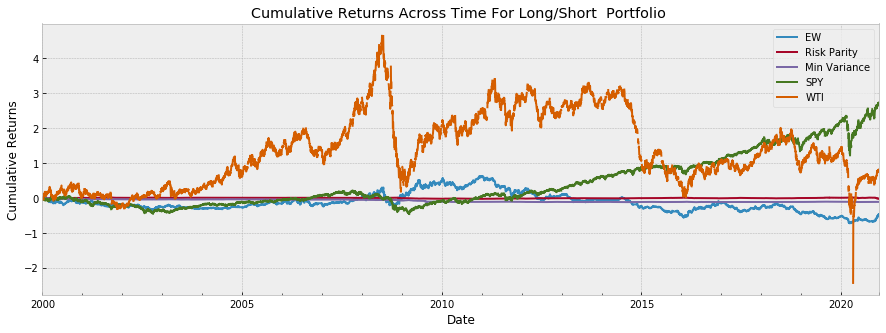

In [8]:
fig,axe3=plt.subplots()
Cum_ret = (1+J2).cumprod()
(Cum_ret-1).plot(figsize=(15,5),ax = axe3)
plt.title('Cumulative Returns Across Time For Long/Short  Portfolio ')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

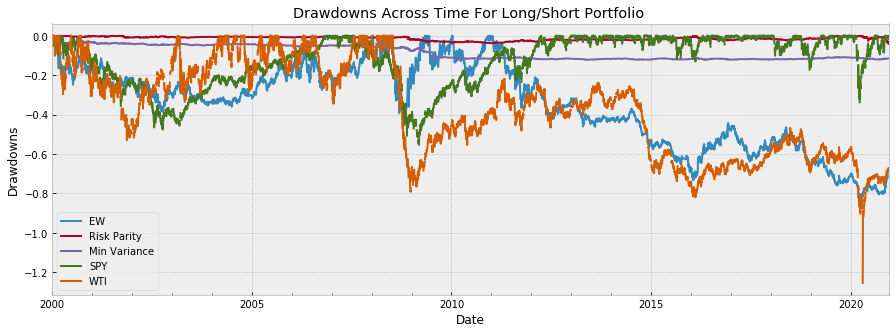

In [9]:
DD = Cum_ret.div(Cum_ret.cummax()) - 1
fig,axe=plt.subplots()
DD.plot(figsize=(15,5),ax = axe)
plt.title('Drawdowns Across Time For Long/Short Portfolio ')
plt.xlabel('Date')
plt.ylabel('Drawdowns')
plt.show()